### Import Dataset

In [1]:
from GvaDataset import GvaDataset
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import v2
import os
import random
random.seed(137)

PROJECT_DIR = "/projectnb/dunlop/chrisdc/gva_senior_design/image_processing"

train_transform = v2.Compose([
    v2.Resize((1024, 512)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    # v2.RandomAffine(degrees=5, translate=(0.2, 0.2)),
    v2.ColorJitter()
])

test_transform = v2.Compose([
    v2.Resize((1024, 512))
])


train_images_path = os.path.join(PROJECT_DIR, "data/images/train")
train_labels_path = os.path.join(PROJECT_DIR, "data/labels/train")

test_images_path = os.path.join(PROJECT_DIR, "data/images/test")
test_labels_path = os.path.join(PROJECT_DIR, "data/labels/test")


train_dataset = GvaDataset(train_images_path, train_labels_path, transform=train_transform)
test_dataset = GvaDataset(test_images_path, test_labels_path, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

### Visualize Data Transforms

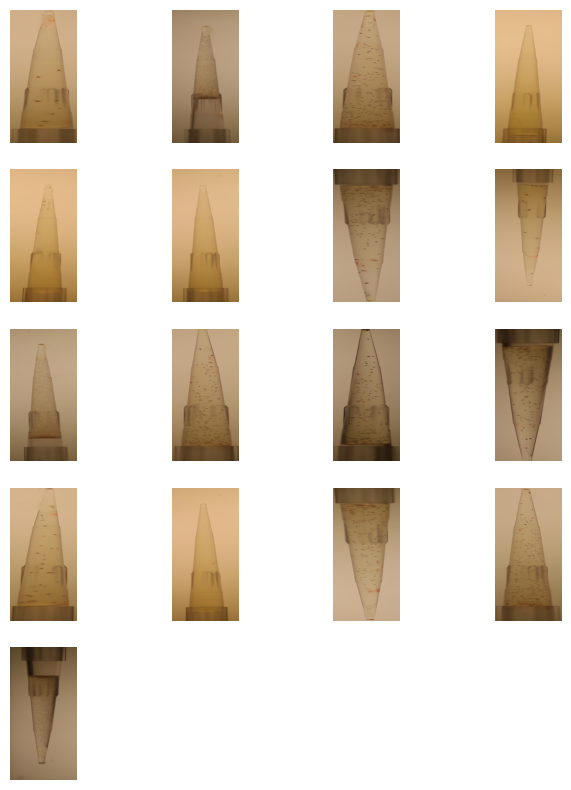

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(train_loader), 4, figsize=(8, len(train_loader) * 2))
for i, data in enumerate(train_loader):
    imgs, labs, files = data

    for j in range(4):
        if j < imgs.shape[0]:
            img = imgs[j].permute(1, 2, 0)
            ax[i, j].imshow(img)
            ax[i, j].axis('off')
        else:
            ax[i, j].set_visible(False)
    
    

### Train Model

In [2]:
from models.unet import UNet
from experiment import Experiment
from losses import dice_loss
import torch.optim as optim
import torch.nn as nn
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = UNet(in_channels=3, out_channels=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = dice_loss
experiment = Experiment(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    device=device, 
    name="model-2", 
    bench=1000)

In [3]:
experiment.train(train_loader=train_loader, validation_loader=test_loader, epochs=5000)

Epoch 0/5000: 100%|█| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.973, loss=0.956


1/5000 train_loss: 0.9730098485946655 val loss: 0.9799130856990814


Epoch 1/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.968, loss=0.962


2/5000 train_loss: 0.9684019088745117 val loss: 0.9795657694339752


Epoch 2/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.961, loss=0.937


3/5000 train_loss: 0.9605412244796753 val loss: 0.9791070967912674


Epoch 3/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.96, loss=0.928]


4/5000 train_loss: 0.9597227215766907 val loss: 0.9783217459917068


Epoch 4/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.965, loss=0.969


5/5000 train_loss: 0.9649111986160278 val loss: 0.977217897772789


Epoch 5/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.957, loss=0.951


6/5000 train_loss: 0.9572223663330078 val loss: 0.9756947010755539


Epoch 6/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.957, loss=0.942


7/5000 train_loss: 0.9565700650215149 val loss: 0.9750667214393616


Epoch 7/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.954, loss=0.935


8/5000 train_loss: 0.953547477722168 val loss: 0.9742858111858368


Epoch 8/5000: 100%|████| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.963, loss=1]


9/5000 train_loss: 0.9626010179519653 val loss: 0.9662594944238663


Epoch 9/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.958, loss=0.956


10/5000 train_loss: 0.9581186532974243 val loss: 0.963328555226326


Epoch 10/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.954, loss=0.95


11/5000 train_loss: 0.9541029572486878 val loss: 0.9611390978097916


Epoch 11/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.954, loss=0.96


12/5000 train_loss: 0.9541386008262634 val loss: 0.961689755320549


Epoch 12/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.953, loss=0.96


13/5000 train_loss: 0.9532522201538086 val loss: 0.9514120519161224


Epoch 13/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.953, loss=0.94


14/5000 train_loss: 0.9531041264533997 val loss: 0.9539072811603546


Epoch 14/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.959, loss=0.99


15/5000 train_loss: 0.9593289613723754 val loss: 0.9577919840812683


Epoch 15/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.958, loss=0.99


16/5000 train_loss: 0.9581752300262452 val loss: 0.9587555378675461


Epoch 16/5000: 100%|████| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.96, loss=1]


17/5000 train_loss: 0.9595096230506897 val loss: 0.9574502855539322


Epoch 17/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.941, loss=0.90


18/5000 train_loss: 0.9408013463020325 val loss: 0.9583977311849594


Epoch 18/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.954, loss=1]


19/5000 train_loss: 0.9541749954223633 val loss: 0.9622102528810501


Epoch 19/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.937, loss=0.88


20/5000 train_loss: 0.9374559402465821 val loss: 0.9557374864816666


Epoch 20/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.948, loss=0.92


21/5000 train_loss: 0.9484456777572632 val loss: 0.9567478001117706


Epoch 21/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.96, loss=0.999


22/5000 train_loss: 0.9596943140029908 val loss: 0.9563906341791153


Epoch 22/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.948, loss=0.96


23/5000 train_loss: 0.9483100175857544 val loss: 0.956489160656929


Epoch 23/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.951, loss=0.99


24/5000 train_loss: 0.9514919638633728 val loss: 0.9557785391807556


Epoch 24/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.951, loss=1]


25/5000 train_loss: 0.9506361961364747 val loss: 0.9532076865434647


Epoch 25/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.938, loss=0.89


26/5000 train_loss: 0.937584125995636 val loss: 0.9411581009626389


Epoch 26/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.948, loss=0.94


27/5000 train_loss: 0.947704267501831 val loss: 0.9283784031867981


Epoch 27/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.956, loss=0.99


28/5000 train_loss: 0.9556874632835388 val loss: 0.9460334330797195


Epoch 28/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.953, loss=0.99


29/5000 train_loss: 0.9534443259239197 val loss: 0.9553821831941605


Epoch 29/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.941, loss=0.95


30/5000 train_loss: 0.9408472537994385 val loss: 0.9594749063253403


Epoch 30/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.927, loss=0.87


31/5000 train_loss: 0.9265761375427246 val loss: 0.9550812840461731


Epoch 31/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.941, loss=0.92


32/5000 train_loss: 0.9405708551406861 val loss: 0.9507974833250046


Epoch 32/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.942, loss=1]


33/5000 train_loss: 0.9420634984970093 val loss: 0.9485626071691513


Epoch 33/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.951, loss=0.99


34/5000 train_loss: 0.951354444026947 val loss: 0.9401114284992218


Epoch 34/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.946, loss=0.99


35/5000 train_loss: 0.9459186673164368 val loss: 0.938386932015419


Epoch 35/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.946, loss=0.99


36/5000 train_loss: 0.9462042331695557 val loss: 0.9419005811214447


Epoch 36/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.92, loss=0.847


37/5000 train_loss: 0.9197999477386475 val loss: 0.9535976201295853


Epoch 37/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.938, loss=0.95


38/5000 train_loss: 0.9382681727409363 val loss: 0.9542733728885651


Epoch 38/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.938, loss=0.95


39/5000 train_loss: 0.9382128119468689 val loss: 0.940924882888794


Epoch 39/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.948, loss=0.99


40/5000 train_loss: 0.9475144743919373 val loss: 0.9282141625881195


Epoch 40/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.923, loss=0.86


41/5000 train_loss: 0.9234525442123414 val loss: 0.927079901099205


Epoch 41/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.937, loss=1]


42/5000 train_loss: 0.9371129631996155 val loss: 0.95644611120224


Epoch 42/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.918, loss=0.89


43/5000 train_loss: 0.917991578578949 val loss: 0.9490242451429367


Epoch 43/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.927, loss=0.90


44/5000 train_loss: 0.9267349958419799 val loss: 0.9411632418632507


Epoch 44/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.931, loss=0.93


45/5000 train_loss: 0.9312841176986695 val loss: 0.9226196706295013


Epoch 45/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.929, loss=0.86


46/5000 train_loss: 0.9289608597755432 val loss: 0.9162732511758804


Epoch 46/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.949, loss=0.99


47/5000 train_loss: 0.9490305662155152 val loss: 0.9272591173648834


Epoch 47/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.933, loss=0.95


48/5000 train_loss: 0.9329089045524597 val loss: 0.8888429403305054


Epoch 48/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.937, loss=0.99


49/5000 train_loss: 0.9367095589637756 val loss: 0.8869310170412064


Epoch 49/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.923, loss=0.94


50/5000 train_loss: 0.922534954547882 val loss: 0.8886878937482834


Epoch 50/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.943, loss=0.98


51/5000 train_loss: 0.9430854320526123 val loss: 0.9421370774507523


Epoch 51/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.923, loss=0.91


52/5000 train_loss: 0.9229546904563903 val loss: 0.9541082829236984


Epoch 52/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.93, loss=0.911


53/5000 train_loss: 0.9304187059402466 val loss: 0.9414002448320389


Epoch 53/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.915, loss=0.88


54/5000 train_loss: 0.9149968385696411 val loss: 0.9324757754802704


Epoch 54/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.918, loss=0.91


55/5000 train_loss: 0.9181261539459229 val loss: 0.928079292178154


Epoch 55/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.925, loss=0.99


56/5000 train_loss: 0.9252223610877991 val loss: 0.9248184114694595


Epoch 56/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.934, loss=0.99


57/5000 train_loss: 0.9342400431632996 val loss: 0.9032663702964783


Epoch 57/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.928, loss=0.99


58/5000 train_loss: 0.9280858635902405 val loss: 0.870270699262619


Epoch 58/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.922, loss=0.94


59/5000 train_loss: 0.9215884208679199 val loss: 0.8613380044698715


Epoch 59/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.905, loss=0.80


60/5000 train_loss: 0.9054370999336243 val loss: 0.8643319010734558


Epoch 60/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.908, loss=0.84


61/5000 train_loss: 0.908002495765686 val loss: 0.9316747337579727


Epoch 61/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0.82


62/5000 train_loss: 0.8962282419204712 val loss: 0.938639372587204


Epoch 62/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.923, loss=0.93


63/5000 train_loss: 0.9226780652999877 val loss: 0.9223438501358032


Epoch 63/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.921, loss=0.91


64/5000 train_loss: 0.9214307069778442 val loss: 0.9119804203510284


Epoch 64/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.929, loss=0.98


65/5000 train_loss: 0.9291091203689575 val loss: 0.9067322760820389


Epoch 65/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.92, loss=0.994


66/5000 train_loss: 0.9203895330429077 val loss: 0.9012833684682846


Epoch 66/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.907, loss=0.87


67/5000 train_loss: 0.9066372156143189 val loss: 0.860145628452301


Epoch 67/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


68/5000 train_loss: 0.9163694381713867 val loss: 0.839154064655304


Epoch 68/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.903, loss=0.83


69/5000 train_loss: 0.9033265352249146 val loss: 0.8953238278627396


Epoch 69/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=0.94


70/5000 train_loss: 0.9038891911506652 val loss: 0.9005836099386215


Epoch 70/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.926, loss=1]


71/5000 train_loss: 0.9262765645980835 val loss: 0.9196675717830658


Epoch 71/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.912, loss=0.94


72/5000 train_loss: 0.9120384812355041 val loss: 0.904272124171257


Epoch 72/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=0.95


73/5000 train_loss: 0.9038362503051758 val loss: 0.8877871185541153


Epoch 73/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.913, loss=0.94


74/5000 train_loss: 0.9127525329589844 val loss: 0.8737685978412628


Epoch 74/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.885, loss=0.84


75/5000 train_loss: 0.8847584128379822 val loss: 0.8104830086231232


Epoch 75/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.889, loss=0.87


76/5000 train_loss: 0.8891575574874878 val loss: 0.8131142258644104


Epoch 76/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.929, loss=0.99


77/5000 train_loss: 0.9285940289497375 val loss: 0.8305408358573914


Epoch 77/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.927, loss=0.99


78/5000 train_loss: 0.9268824815750122 val loss: 0.8843773007392883


Epoch 78/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.912, loss=0.93


79/5000 train_loss: 0.9122497797012329 val loss: 0.89439657330513


Epoch 79/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0.93


80/5000 train_loss: 0.8960124254226685 val loss: 0.853746771812439


Epoch 80/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.902, loss=0.95


81/5000 train_loss: 0.9016740441322326 val loss: 0.8545391410589218


Epoch 81/5000: 100%|███| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.918, loss=1]


82/5000 train_loss: 0.9183834195137024 val loss: 0.827683836221695


Epoch 82/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.864, loss=0.82


83/5000 train_loss: 0.8639689564704895 val loss: 0.7901420295238495


Epoch 83/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.906, loss=0.93


84/5000 train_loss: 0.9060749292373658 val loss: 0.7846172153949738


Epoch 84/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0.98


85/5000 train_loss: 0.8915257453918457 val loss: 0.7854257225990295


Epoch 85/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.862, loss=0.96


86/5000 train_loss: 0.8615728855133057 val loss: 0.803361564874649


Epoch 86/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=0.98


87/5000 train_loss: 0.9214735269546509 val loss: 0.8092232793569565


Epoch 87/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.743


88/5000 train_loss: 0.8596270322799683 val loss: 0.816440224647522


Epoch 88/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.866, loss=0.99


89/5000 train_loss: 0.8664457440376282 val loss: 0.7808998078107834


Epoch 89/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.896, loss=0.98


90/5000 train_loss: 0.8960021495819092 val loss: 0.7513017803430557


Epoch 90/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=0.88


91/5000 train_loss: 0.8994614005088806 val loss: 0.7321917563676834


Epoch 91/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=0.959


92/5000 train_loss: 0.9096138119697571 val loss: 0.7569496780633926


Epoch 92/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.867, loss=0.82


93/5000 train_loss: 0.8669902205467224 val loss: 0.791394367814064


Epoch 93/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0.97


94/5000 train_loss: 0.8961297750473023 val loss: 0.8457600325345993


Epoch 94/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.66


95/5000 train_loss: 0.8351258873939514 val loss: 0.8668272495269775


Epoch 95/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.894, loss=0.95


96/5000 train_loss: 0.8940270185470581 val loss: 0.8245804756879807


Epoch 96/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.917, loss=0.99


97/5000 train_loss: 0.9166979908943176 val loss: 0.8684765249490738


Epoch 97/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=0.97


98/5000 train_loss: 0.8838889837265015 val loss: 0.8059272170066833


Epoch 98/5000: 100%|███| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.891, loss=1]


99/5000 train_loss: 0.8907756328582763 val loss: 0.7955532670021057


Epoch 99/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=1]


100/5000 train_loss: 0.8945071458816528 val loss: 0.7387428134679794


Epoch 100/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.915, loss=0.9


101/5000 train_loss: 0.9154934287071228 val loss: 0.7156026363372803


Epoch 101/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.9


102/5000 train_loss: 0.871848726272583 val loss: 0.7167608439922333


Epoch 102/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.907, loss=0.9


103/5000 train_loss: 0.9065099120140075 val loss: 0.7285496592521667


Epoch 103/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.903, loss=1]


104/5000 train_loss: 0.9026929497718811 val loss: 0.7701390981674194


Epoch 104/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=0.9


105/5000 train_loss: 0.8681177020072937 val loss: 0.7207489907741547


Epoch 105/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.89, loss=0.92


106/5000 train_loss: 0.889753770828247 val loss: 0.729871541261673


Epoch 106/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.875, loss=1]


107/5000 train_loss: 0.8751035571098328 val loss: 0.8133786022663116


Epoch 107/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.89, loss=0.95


108/5000 train_loss: 0.8900403022766114 val loss: 0.8080800026655197


Epoch 108/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.885, loss=0.9


109/5000 train_loss: 0.8848966002464295 val loss: 0.7386349886655807


Epoch 109/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.886, loss=0.9


110/5000 train_loss: 0.8862035036087036 val loss: 0.7289677858352661


Epoch 110/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0.9


111/5000 train_loss: 0.8561645746231079 val loss: 0.7267048209905624


Epoch 111/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.88, loss=0.86


112/5000 train_loss: 0.8797406911849975 val loss: 0.7611538022756577


Epoch 112/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.9


113/5000 train_loss: 0.8661754131317139 val loss: 0.7850929498672485


Epoch 113/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.879, loss=1]


114/5000 train_loss: 0.8788454294204712 val loss: 0.722810909152031


Epoch 114/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=0.9


115/5000 train_loss: 0.8335078954696655 val loss: 0.6914288848638535


Epoch 115/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.871, loss=0.9


116/5000 train_loss: 0.8711320757865906 val loss: 0.6792952418327332


Epoch 116/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.886, loss=0.9


117/5000 train_loss: 0.8862953901290893 val loss: 0.6905133426189423


Epoch 117/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.872, loss=0.9


118/5000 train_loss: 0.872457218170166 val loss: 0.720355898141861


Epoch 118/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.878, loss=0.9


119/5000 train_loss: 0.877677071094513 val loss: 0.7263670861721039


Epoch 119/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0.5


120/5000 train_loss: 0.7819435238838196 val loss: 0.6565830558538437


Epoch 120/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.876, loss=0.9


121/5000 train_loss: 0.8763295650482178 val loss: 0.687006264925003


Epoch 121/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.5


122/5000 train_loss: 0.7730344295501709 val loss: 0.6899642944335938


Epoch 122/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.98


123/5000 train_loss: 0.8704890370368957 val loss: 0.6678633093833923


Epoch 123/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.865, loss=0.9


124/5000 train_loss: 0.8648959636688233 val loss: 0.6493034213781357


Epoch 124/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.9


125/5000 train_loss: 0.8476010799407959 val loss: 0.6406964957714081


Epoch 125/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=0.8


126/5000 train_loss: 0.8992037415504456 val loss: 0.6424419730901718


Epoch 126/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=0.9


127/5000 train_loss: 0.859342360496521 val loss: 0.6980389207601547


Epoch 127/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.876, loss=0.9


128/5000 train_loss: 0.8756332039833069 val loss: 0.7874252200126648


Epoch 128/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=1]


129/5000 train_loss: 0.84061678647995 val loss: 0.693321019411087


Epoch 129/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.905, loss=1]


130/5000 train_loss: 0.9054802417755127 val loss: 0.66506028175354


Epoch 130/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.88, loss=0.86


131/5000 train_loss: 0.8795785188674927 val loss: 0.6498448252677917


Epoch 131/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.89


132/5000 train_loss: 0.8402598619461059 val loss: 0.6532854586839676


Epoch 132/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=1]


133/5000 train_loss: 0.8993208169937134 val loss: 0.8560029417276382


Epoch 133/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.854, loss=0.9


134/5000 train_loss: 0.8543953180313111 val loss: 0.8996211737394333


Epoch 134/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.91


135/5000 train_loss: 0.8599518299102783 val loss: 0.7736445069313049


Epoch 135/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.886, loss=0.9


136/5000 train_loss: 0.885770845413208 val loss: 0.7409033179283142


Epoch 136/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.87, loss=0.91


137/5000 train_loss: 0.8699013233184815 val loss: 0.6551366299390793


Epoch 137/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.874, loss=0.9


138/5000 train_loss: 0.8740312099456787 val loss: 0.6206259280443192


Epoch 138/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=0.5


139/5000 train_loss: 0.8266353607177734 val loss: 0.6507944315671921


Epoch 139/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.814, loss=0.9


140/5000 train_loss: 0.8138563990592956 val loss: 0.6061900407075882


Epoch 140/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=0.9


141/5000 train_loss: 0.8417671322822571 val loss: 0.5987546294927597


Epoch 141/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.674, loss=0.5


142/5000 train_loss: 0.6735633730888366 val loss: 0.5820754766464233


Epoch 142/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=0.8


143/5000 train_loss: 0.7959221124649047 val loss: 0.5724829733371735


Epoch 143/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.836, loss=1]


144/5000 train_loss: 0.8356160163879395 val loss: 0.5878735184669495


Epoch 144/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.875, loss=0.9


145/5000 train_loss: 0.874689769744873 val loss: 0.5815078914165497


Epoch 145/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.818, loss=0.9


146/5000 train_loss: 0.8176659226417542 val loss: 0.5834583342075348


Epoch 146/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=1]


147/5000 train_loss: 0.8250320553779602 val loss: 0.6502375453710556


Epoch 147/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.889, loss=1]


148/5000 train_loss: 0.8886695623397827 val loss: 0.629143238067627


Epoch 148/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.8


149/5000 train_loss: 0.8216124057769776 val loss: 0.6248210668563843


Epoch 149/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0.9


150/5000 train_loss: 0.8507405877113342 val loss: 0.6378469914197922


Epoch 150/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=1]


151/5000 train_loss: 0.8324786901474 val loss: 0.648022934794426


Epoch 151/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.828, loss=0.8


152/5000 train_loss: 0.8282354950904847 val loss: 0.630293607711792


Epoch 152/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=1]


153/5000 train_loss: 0.8761322021484375 val loss: 0.5999768525362015


Epoch 153/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0.8


154/5000 train_loss: 0.8433163166046143 val loss: 0.5513662546873093


Epoch 154/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.865, loss=0.9


155/5000 train_loss: 0.8650616049766541 val loss: 0.5932176560163498


Epoch 155/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.806, loss=0.9


156/5000 train_loss: 0.8062802910804748 val loss: 0.54404117166996


Epoch 156/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=0.99


157/5000 train_loss: 0.9099239110946655 val loss: 0.5516029596328735


Epoch 157/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.818, loss=1]


158/5000 train_loss: 0.8177298307418823 val loss: 0.5700128674507141


Epoch 158/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


159/5000 train_loss: 0.8520100355148316 val loss: 0.5642312467098236


Epoch 159/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=1]


160/5000 train_loss: 0.7746394157409668 val loss: 0.5568231493234634


Epoch 160/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.3


161/5000 train_loss: 0.8228189587593079 val loss: 0.5443326979875565


Epoch 161/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=0.9


162/5000 train_loss: 0.876129400730133 val loss: 0.5766482502222061


Epoch 162/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=0.97


163/5000 train_loss: 0.9098280191421508 val loss: 0.6591378599405289


Epoch 163/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.8


164/5000 train_loss: 0.7924587368965149 val loss: 0.6355643272399902


Epoch 164/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=0.8


165/5000 train_loss: 0.7654484152793884 val loss: 0.5844962894916534


Epoch 165/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.838, loss=1]


166/5000 train_loss: 0.8377647638320923 val loss: 0.5789028257131577


Epoch 166/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.8


167/5000 train_loss: 0.7930138826370239 val loss: 0.5326991379261017


Epoch 167/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.96


168/5000 train_loss: 0.8401649832725525 val loss: 0.5353468209505081


Epoch 168/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=1]


169/5000 train_loss: 0.8216162323951721 val loss: 0.5185210704803467


Epoch 169/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=0.7


170/5000 train_loss: 0.8665416836738586 val loss: 0.5374270528554916


Epoch 170/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=0.9


171/5000 train_loss: 0.8517874240875244 val loss: 0.628953367471695


Epoch 171/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.8


172/5000 train_loss: 0.8543827891349792 val loss: 0.6830490976572037


Epoch 172/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.881, loss=0.9


173/5000 train_loss: 0.8810516119003295 val loss: 0.7435471415519714


Epoch 173/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.865, loss=0.9


174/5000 train_loss: 0.8648758292198181 val loss: 0.6662172973155975


Epoch 174/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.828, loss=0.9


175/5000 train_loss: 0.8280339241027832 val loss: 0.5362440049648285


Epoch 175/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.878, loss=0.9


176/5000 train_loss: 0.877624237537384 val loss: 0.5235339403152466


Epoch 176/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.96


177/5000 train_loss: 0.8302720427513123 val loss: 0.5204343944787979


Epoch 177/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.857, loss=0.9


178/5000 train_loss: 0.8574680805206298 val loss: 0.5466633886098862


Epoch 178/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.9


179/5000 train_loss: 0.8411551237106323 val loss: 0.5213598161935806


Epoch 179/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.796, loss=0.9


180/5000 train_loss: 0.7961223244667053 val loss: 0.4992554634809494


Epoch 180/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.40


181/5000 train_loss: 0.6695746898651123 val loss: 0.5042740851640701


Epoch 181/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0.3


182/5000 train_loss: 0.7392511129379272 val loss: 0.504563719034195


Epoch 182/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=1]


183/5000 train_loss: 0.8592634081840516 val loss: 0.5023011267185211


Epoch 183/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.701, loss=0.4


184/5000 train_loss: 0.7013594746589661 val loss: 0.5075002908706665


Epoch 184/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0.9


185/5000 train_loss: 0.8290538191795349 val loss: 0.5591054856777191


Epoch 185/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.855, loss=1]


186/5000 train_loss: 0.8549963593482971 val loss: 0.5790490955114365


Epoch 186/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0.9


187/5000 train_loss: 0.8916516423225402 val loss: 0.5588188469409943


Epoch 187/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.8


188/5000 train_loss: 0.7668999671936035 val loss: 0.5071035176515579


Epoch 188/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.8


189/5000 train_loss: 0.8108084917068481 val loss: 0.507342666387558


Epoch 189/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.93


190/5000 train_loss: 0.7596876502037049 val loss: 0.5005443394184113


Epoch 190/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0.9


191/5000 train_loss: 0.736555302143097 val loss: 0.5636722445487976


Epoch 191/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.859, loss=0.9


192/5000 train_loss: 0.8594687342643738 val loss: 0.5740558505058289


Epoch 192/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.9


193/5000 train_loss: 0.7920436263084412 val loss: 0.5522098988294601


Epoch 193/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.9


194/5000 train_loss: 0.8654919147491456 val loss: 0.5405910313129425


Epoch 194/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=1]


195/5000 train_loss: 0.7893974900245666 val loss: 0.5258833318948746


Epoch 195/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.899, loss=0.8


196/5000 train_loss: 0.8987688541412353 val loss: 0.5129843652248383


Epoch 196/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.9


197/5000 train_loss: 0.7691453337669373 val loss: 0.5252183824777603


Epoch 197/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=0.9


198/5000 train_loss: 0.8452110886573792 val loss: 0.5410441756248474


Epoch 198/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.922, loss=0.9


199/5000 train_loss: 0.9221127510070801 val loss: 0.5606230348348618


Epoch 199/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0.4


200/5000 train_loss: 0.7606405735015869 val loss: 0.5506786555051804


Epoch 200/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.585, loss=0.3


201/5000 train_loss: 0.5845873117446899 val loss: 0.5105844438076019


Epoch 201/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.782, loss=0.3


202/5000 train_loss: 0.7824070453643799 val loss: 0.49759751558303833


Epoch 202/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=0.9


203/5000 train_loss: 0.8140129685401917 val loss: 0.500201627612114


Epoch 203/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=1]


204/5000 train_loss: 0.8224957466125489 val loss: 0.5068544298410416


Epoch 204/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.9


205/5000 train_loss: 0.8663441061973571 val loss: 0.575005054473877


Epoch 205/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.848, loss=0.7


206/5000 train_loss: 0.8483972549438477 val loss: 0.5531017035245895


Epoch 206/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.673, loss=0.9


207/5000 train_loss: 0.6727240204811096 val loss: 0.6019975990056992


Epoch 207/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1]


208/5000 train_loss: 0.8344059824943543 val loss: 0.5924165844917297


Epoch 208/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=0.9


209/5000 train_loss: 0.8026403188705444 val loss: 0.522259533405304


Epoch 209/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.682, loss=0.3


210/5000 train_loss: 0.6822902917861938 val loss: 0.5117992609739304


Epoch 210/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=1]


211/5000 train_loss: 0.7406002640724182 val loss: 0.5294696688652039


Epoch 211/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.85, loss=0.95


212/5000 train_loss: 0.8496272206306458 val loss: 0.524174764752388


Epoch 212/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.823, loss=0.9


213/5000 train_loss: 0.8231218218803406 val loss: 0.4913411885499954


Epoch 213/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.834, loss=1]


214/5000 train_loss: 0.8343411564826966 val loss: 0.4808776080608368


Epoch 214/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.812, loss=0.9


215/5000 train_loss: 0.812398099899292 val loss: 0.4891252815723419


Epoch 215/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.3


216/5000 train_loss: 0.7130279183387757 val loss: 0.4975491762161255


Epoch 216/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.784, loss=1]


217/5000 train_loss: 0.78352792263031 val loss: 0.4916068911552429


Epoch 217/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=1]


218/5000 train_loss: 0.7874679207801819 val loss: 0.4747074246406555


Epoch 218/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.9


219/5000 train_loss: 0.7576614379882812 val loss: 0.5048731863498688


Epoch 219/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.67, loss=0.33


220/5000 train_loss: 0.6696735262870789 val loss: 0.49116040766239166


Epoch 220/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=1]


221/5000 train_loss: 0.8957846522331238 val loss: 0.49762219190597534


Epoch 221/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.8


222/5000 train_loss: 0.7739193439483643 val loss: 0.5192644596099854


Epoch 222/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.3


223/5000 train_loss: 0.7736564517021179 val loss: 0.5190766453742981


Epoch 223/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.832, loss=0.9


224/5000 train_loss: 0.8323126554489135 val loss: 0.5122256278991699


Epoch 224/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=0.9


225/5000 train_loss: 0.8988082051277161 val loss: 0.5049269646406174


Epoch 225/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.707, loss=0.3


226/5000 train_loss: 0.7066262602806092 val loss: 0.48083655536174774


Epoch 226/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.853, loss=0.9


227/5000 train_loss: 0.8530007600784302 val loss: 0.5258716940879822


Epoch 227/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.774, loss=0.9


228/5000 train_loss: 0.7737223744392395 val loss: 0.48269329965114594


Epoch 228/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.768, loss=0.4


229/5000 train_loss: 0.7679802775382996 val loss: 0.47099120914936066


Epoch 229/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.855, loss=0.9


230/5000 train_loss: 0.8546404361724853 val loss: 0.4681551903486252


Epoch 230/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.721, loss=0.9


231/5000 train_loss: 0.7207687973976136 val loss: 0.4785144031047821


Epoch 231/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.795, loss=0.9


232/5000 train_loss: 0.7948262572288514 val loss: 0.47200481593608856


Epoch 232/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.634, loss=0.3


233/5000 train_loss: 0.6339454531669617 val loss: 0.483735054731369


Epoch 233/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.593, loss=0.2


234/5000 train_loss: 0.5926425337791443 val loss: 0.4657789468765259


Epoch 234/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.704, loss=0.9


235/5000 train_loss: 0.7042160868644715 val loss: 0.47655531764030457


Epoch 235/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=1]


236/5000 train_loss: 0.8268092274665833 val loss: 0.4991503208875656


Epoch 236/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.74, loss=0.88


237/5000 train_loss: 0.7395307183265686 val loss: 0.5019617080688477


Epoch 237/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.8


238/5000 train_loss: 0.8477910399436951 val loss: 0.5152663141489029


Epoch 238/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.795, loss=0.8


239/5000 train_loss: 0.7953131079673768 val loss: 0.524293065071106


Epoch 239/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=0.9


240/5000 train_loss: 0.7748804926872254 val loss: 0.5206614434719086


Epoch 240/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.8


241/5000 train_loss: 0.8078827500343323 val loss: 0.483999103307724


Epoch 241/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.947, loss=0.9


242/5000 train_loss: 0.9467128634452819 val loss: 0.473519966006279


Epoch 242/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.769, loss=0.9


243/5000 train_loss: 0.7690444111824035 val loss: 0.48345614969730377


Epoch 243/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0.3


244/5000 train_loss: 0.6979380488395691 val loss: 0.4851391464471817


Epoch 244/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.826, loss=0.9


245/5000 train_loss: 0.8260139346122741 val loss: 0.4817486107349396


Epoch 245/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.817, loss=0.8


246/5000 train_loss: 0.8170569062232971 val loss: 0.4746187627315521


Epoch 246/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=0.9


247/5000 train_loss: 0.8059213519096374 val loss: 0.4763955771923065


Epoch 247/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.647, loss=0.4


248/5000 train_loss: 0.6467939496040345 val loss: 0.4762444496154785


Epoch 248/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.9


249/5000 train_loss: 0.7353439450263977 val loss: 0.5089775025844574


Epoch 249/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.687, loss=0.5


250/5000 train_loss: 0.6871895074844361 val loss: 0.4784461110830307


Epoch 250/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.9


251/5000 train_loss: 0.8662919640541077 val loss: 0.48231279850006104


Epoch 251/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.9


252/5000 train_loss: 0.8345636010169983 val loss: 0.4978732019662857


Epoch 252/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.9


253/5000 train_loss: 0.7077867984771729 val loss: 0.5247627049684525


Epoch 253/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.766, loss=0.3


254/5000 train_loss: 0.7664706110954285 val loss: 0.526890903711319


Epoch 254/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.889, loss=0.9


255/5000 train_loss: 0.8887320637702942 val loss: 0.5092744678258896


Epoch 255/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.664, loss=0.2


256/5000 train_loss: 0.6640233397483826 val loss: 0.5060113817453384


Epoch 256/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=0.9


257/5000 train_loss: 0.8791120171546936 val loss: 0.526202991604805


Epoch 257/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.646, loss=0.3


258/5000 train_loss: 0.645804476737976 val loss: 0.5190229564905167


Epoch 258/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.73, loss=0.31


259/5000 train_loss: 0.7298012971878052 val loss: 0.4906203895807266


Epoch 259/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=1]


260/5000 train_loss: 0.7729373335838318 val loss: 0.4909691959619522


Epoch 260/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.9


261/5000 train_loss: 0.7717101812362671 val loss: 0.5530267059803009


Epoch 261/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.867, loss=0.9


262/5000 train_loss: 0.866562819480896 val loss: 0.7128493338823318


Epoch 262/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.824, loss=0.4


263/5000 train_loss: 0.8238234043121337 val loss: 0.606232076883316


Epoch 263/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.927, loss=0.9


264/5000 train_loss: 0.927411687374115 val loss: 0.5157076865434647


Epoch 264/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.738, loss=0.9


265/5000 train_loss: 0.7380739212036133 val loss: 0.5289794951677322


Epoch 265/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=1]


266/5000 train_loss: 0.7836408138275146 val loss: 0.4951896071434021


Epoch 266/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.625, loss=0.2


267/5000 train_loss: 0.6247753262519836 val loss: 0.46626633405685425


Epoch 267/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.705, loss=0.9


268/5000 train_loss: 0.7051075458526611 val loss: 0.47679466009140015


Epoch 268/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1]


269/5000 train_loss: 0.7964033484458923 val loss: 0.4525647461414337


Epoch 269/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.897, loss=1]


270/5000 train_loss: 0.8974533915519715 val loss: 0.4450300633907318


Epoch 270/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=1]


271/5000 train_loss: 0.85646653175354 val loss: 0.44525279104709625


Epoch 271/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.9


272/5000 train_loss: 0.7382202029228211 val loss: 0.45377303659915924


Epoch 272/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=1]


273/5000 train_loss: 0.7884445667266846 val loss: 0.4918522387742996


Epoch 273/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.9


274/5000 train_loss: 0.8192375063896179 val loss: 0.47787968814373016


Epoch 274/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=0.9


275/5000 train_loss: 0.8270811080932617 val loss: 0.47988156974315643


Epoch 275/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.779, loss=0.9


276/5000 train_loss: 0.7791426658630372 val loss: 0.4792576879262924


Epoch 276/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.88, loss=0.96


277/5000 train_loss: 0.8797181844711304 val loss: 0.5187270641326904


Epoch 277/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.741, loss=1]


278/5000 train_loss: 0.7408883571624756 val loss: 0.44909049570560455


Epoch 278/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.862, loss=0.9


279/5000 train_loss: 0.8622672438621521 val loss: 0.5101379603147507


Epoch 279/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.876, loss=0.9


280/5000 train_loss: 0.8758978009223938 val loss: 0.5152130872011185


Epoch 280/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.851, loss=0.9


281/5000 train_loss: 0.8507937312126159 val loss: 0.4871172159910202


Epoch 281/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0.8


282/5000 train_loss: 0.7492571353912354 val loss: 0.44383883476257324


Epoch 282/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0.3


283/5000 train_loss: 0.737172532081604 val loss: 0.45145584642887115


Epoch 283/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.679, loss=0.7


284/5000 train_loss: 0.678794777393341 val loss: 0.4663049876689911


Epoch 284/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.9


285/5000 train_loss: 0.7050512433052063 val loss: 0.5140886455774307


Epoch 285/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.9


286/5000 train_loss: 0.7740662336349488 val loss: 0.458976075053215


Epoch 286/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=1]


287/5000 train_loss: 0.8755402445793152 val loss: 0.46886999905109406


Epoch 287/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=1]


288/5000 train_loss: 0.784833836555481 val loss: 0.4837619662284851


Epoch 288/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.636, loss=0.4


289/5000 train_loss: 0.6361994504928589 val loss: 0.4573112428188324


Epoch 289/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.8, loss=0.851


290/5000 train_loss: 0.8003772258758545 val loss: 0.527611494064331


Epoch 290/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=1]


291/5000 train_loss: 0.8052759289741516 val loss: 0.5137647092342377


Epoch 291/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=0.9


292/5000 train_loss: 0.7533928275108337 val loss: 0.48089660704135895


Epoch 292/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.633, loss=0.4


293/5000 train_loss: 0.6331920027732849 val loss: 0.4671824723482132


Epoch 293/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.768, loss=0.8


294/5000 train_loss: 0.7678093671798706 val loss: 0.4684808999300003


Epoch 294/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.9


295/5000 train_loss: 0.737821352481842 val loss: 0.48091287910938263


Epoch 295/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.888, loss=0.7


296/5000 train_loss: 0.888212251663208 val loss: 0.4774286299943924


Epoch 296/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.91


297/5000 train_loss: 0.8697634220123291 val loss: 0.47392281889915466


Epoch 297/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.826, loss=0.8


298/5000 train_loss: 0.8263721704483032 val loss: 0.4755982309579849


Epoch 298/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.887, loss=0.9


299/5000 train_loss: 0.8865036010742188 val loss: 0.4807966500520706


Epoch 299/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=1]


300/5000 train_loss: 0.7573442339897156 val loss: 0.4772185981273651


Epoch 300/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.798, loss=0.8


301/5000 train_loss: 0.7981747984886169 val loss: 0.46422071754932404


Epoch 301/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=0.9


302/5000 train_loss: 0.8570584297180176 val loss: 0.4597650170326233


Epoch 302/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.836, loss=0.8


303/5000 train_loss: 0.8360142111778259 val loss: 0.4364859163761139


Epoch 303/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.27


304/5000 train_loss: 0.6695983171463012 val loss: 0.4663538634777069


Epoch 304/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=1]


305/5000 train_loss: 0.8375625610351562 val loss: 0.5484358072280884


Epoch 305/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.858, loss=0.9


306/5000 train_loss: 0.8576454997062684 val loss: 0.5856959372758865


Epoch 306/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=0.9


307/5000 train_loss: 0.9042554259300232 val loss: 0.5911124348640442


Epoch 307/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.3


308/5000 train_loss: 0.7783018708229065 val loss: 0.561199739575386


Epoch 308/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.766, loss=0.9


309/5000 train_loss: 0.7659588813781738 val loss: 0.4897308647632599


Epoch 309/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.9


310/5000 train_loss: 0.8809134006500244 val loss: 0.48525817692279816


Epoch 310/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.899, loss=0.9


311/5000 train_loss: 0.8989032506942749 val loss: 0.49710698425769806


Epoch 311/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.927, loss=0.9


312/5000 train_loss: 0.9266914606094361 val loss: 0.4963619112968445


Epoch 312/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.721, loss=0.9


313/5000 train_loss: 0.7208035588264465 val loss: 0.4826968163251877


Epoch 313/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.667, loss=0.9


314/5000 train_loss: 0.6668598890304566 val loss: 0.4699721038341522


Epoch 314/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.806, loss=0.9


315/5000 train_loss: 0.8062974214553833 val loss: 0.46623779833316803


Epoch 315/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.795, loss=0.8


316/5000 train_loss: 0.7946922898292541 val loss: 0.48781315982341766


Epoch 316/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.854, loss=0.9


317/5000 train_loss: 0.8541850209236145 val loss: 0.48802629113197327


Epoch 317/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.907, loss=0.9


318/5000 train_loss: 0.9071254134178162 val loss: 0.483799010515213


Epoch 318/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.606, loss=0.9


319/5000 train_loss: 0.6064640998840332 val loss: 0.5550189167261124


Epoch 319/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=0.91


320/5000 train_loss: 0.8504265666007995 val loss: 0.7190175652503967


Epoch 320/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.919, loss=0.9


321/5000 train_loss: 0.9190901994705201 val loss: 0.6299497038125992


Epoch 321/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.731, loss=0.9


322/5000 train_loss: 0.7306253671646118 val loss: 0.5004289448261261


Epoch 322/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.724, loss=0.4


323/5000 train_loss: 0.7243896484375 val loss: 0.4712377041578293


Epoch 323/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.685, loss=0.2


324/5000 train_loss: 0.6845264554023742 val loss: 0.4776882529258728


Epoch 324/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.863, loss=0.9


325/5000 train_loss: 0.8629885315895081 val loss: 0.49487362802028656


Epoch 325/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0.9


326/5000 train_loss: 0.8511548399925232 val loss: 0.4930332899093628


Epoch 326/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=1]


327/5000 train_loss: 0.7852738618850708 val loss: 0.4600064903497696


Epoch 327/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.63, loss=0.94


328/5000 train_loss: 0.6304810523986817 val loss: 0.46498990058898926


Epoch 328/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.753, loss=0.9


329/5000 train_loss: 0.7531121730804443 val loss: 0.46132002770900726


Epoch 329/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.2


330/5000 train_loss: 0.7945899963378906 val loss: 0.45305396616458893


Epoch 330/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.516, loss=0.2


331/5000 train_loss: 0.5161397099494934 val loss: 0.4354395419359207


Epoch 331/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.761, loss=0.3


332/5000 train_loss: 0.7611436247825623 val loss: 0.4364037811756134


Epoch 332/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=0.9


333/5000 train_loss: 0.8844200730323791 val loss: 0.45015840232372284


Epoch 333/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=0.9


334/5000 train_loss: 0.8754836797714234 val loss: 0.4683612734079361


Epoch 334/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.929, loss=0.9


335/5000 train_loss: 0.9292567729949951 val loss: 0.47180983424186707


Epoch 335/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.27


336/5000 train_loss: 0.7604297876358033 val loss: 0.48815712332725525


Epoch 336/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.9


337/5000 train_loss: 0.7586484789848328 val loss: 0.4504989981651306


Epoch 337/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.2


338/5000 train_loss: 0.6346663713455201 val loss: 0.4352238327264786


Epoch 338/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.548, loss=0.4


339/5000 train_loss: 0.5478243827819824 val loss: 0.43528568744659424


Epoch 339/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.98


340/5000 train_loss: 0.8701770305633545 val loss: 0.44848164916038513


Epoch 340/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0.9


341/5000 train_loss: 0.8486656308174133 val loss: 0.4615758955478668


Epoch 341/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=0.9


342/5000 train_loss: 0.8587443590164184 val loss: 0.47292688488960266


Epoch 342/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.9


343/5000 train_loss: 0.8368586301803589 val loss: 0.4971831440925598


Epoch 343/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.8


344/5000 train_loss: 0.7462520837783814 val loss: 0.4842122197151184


Epoch 344/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.9


345/5000 train_loss: 0.759427285194397 val loss: 0.490475594997406


Epoch 345/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.94, loss=0.96


346/5000 train_loss: 0.9401846647262573 val loss: 0.4993956536054611


Epoch 346/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=1]


347/5000 train_loss: 0.787586760520935 val loss: 0.4953407943248749


Epoch 347/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.9


348/5000 train_loss: 0.7883828043937683 val loss: 0.4640892744064331


Epoch 348/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.8


349/5000 train_loss: 0.7931783556938171 val loss: 0.46764394640922546


Epoch 349/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.9


350/5000 train_loss: 0.8374805212020874 val loss: 0.48050813376903534


Epoch 350/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=0.35


351/5000 train_loss: 0.7803567051887512 val loss: 0.47053736448287964


Epoch 351/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=1]


352/5000 train_loss: 0.7725916385650635 val loss: 0.47560082376003265


Epoch 352/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.648, loss=0.8


353/5000 train_loss: 0.6476081252098084 val loss: 0.46134454011917114


Epoch 353/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=1]


354/5000 train_loss: 0.743343997001648 val loss: 0.44567669928073883


Epoch 354/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=0.9


355/5000 train_loss: 0.8137060523033142 val loss: 0.4392372667789459


Epoch 355/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.731, loss=0.8


356/5000 train_loss: 0.7312110066413879 val loss: 0.4660038948059082


Epoch 356/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=1]


357/5000 train_loss: 0.8439845323562623 val loss: 0.5029893070459366


Epoch 357/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.897, loss=0.9


358/5000 train_loss: 0.896565842628479 val loss: 0.5407674461603165


Epoch 358/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.929, loss=0.9


359/5000 train_loss: 0.9287227749824524 val loss: 0.5577636361122131


Epoch 359/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.748, loss=0.8


360/5000 train_loss: 0.7481460571289062 val loss: 0.5067146569490433


Epoch 360/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=0.9


361/5000 train_loss: 0.7956509709358215 val loss: 0.4731222540140152


Epoch 361/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.935, loss=1]


362/5000 train_loss: 0.9354625582695008 val loss: 0.453634113073349


Epoch 362/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.783, loss=0.9


363/5000 train_loss: 0.7834188580513001 val loss: 0.46768084168434143


Epoch 363/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.852, loss=1]


364/5000 train_loss: 0.8521180510520935 val loss: 0.4487326443195343


Epoch 364/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.797, loss=1]


365/5000 train_loss: 0.7969783544540405 val loss: 0.4367467015981674


Epoch 365/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.86


366/5000 train_loss: 0.780477499961853 val loss: 0.4307020604610443


Epoch 366/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.882, loss=0.8


367/5000 train_loss: 0.8818898320198059 val loss: 0.4331154525279999


Epoch 367/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=1]


368/5000 train_loss: 0.8664021968841553 val loss: 0.4284254014492035


Epoch 368/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.97


369/5000 train_loss: 0.7699886679649353 val loss: 0.4452909976243973


Epoch 369/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.75, loss=0.32


370/5000 train_loss: 0.7499701499938964 val loss: 0.4434560537338257


Epoch 370/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=1]


371/5000 train_loss: 0.87549307346344 val loss: 0.43120336532592773


Epoch 371/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.657, loss=0.8


372/5000 train_loss: 0.6574129581451416 val loss: 0.43725745379924774


Epoch 372/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.9


373/5000 train_loss: 0.7727627158164978 val loss: 0.4803560823202133


Epoch 373/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.9


374/5000 train_loss: 0.7770385622978211 val loss: 0.43844640254974365


Epoch 374/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.754, loss=0.8


375/5000 train_loss: 0.7538256645202637 val loss: 0.43261928856372833


Epoch 375/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.2


376/5000 train_loss: 0.7125773072242737 val loss: 0.4429091066122055


Epoch 376/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.83, loss=0.84


377/5000 train_loss: 0.8304225444793701 val loss: 0.45787690579891205


Epoch 377/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.851, loss=0.9


378/5000 train_loss: 0.8509972572326661 val loss: 0.47536444664001465


Epoch 378/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.927, loss=1]


379/5000 train_loss: 0.9266698718070984 val loss: 0.49458009004592896


Epoch 379/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0.3


380/5000 train_loss: 0.7732778668403626 val loss: 0.49898673593997955


Epoch 380/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=0.9


381/5000 train_loss: 0.7407360672950745 val loss: 0.47763796150684357


Epoch 381/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=1]


382/5000 train_loss: 0.7882703304290771 val loss: 0.4609045386314392


Epoch 382/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.872, loss=0.8


383/5000 train_loss: 0.8722659230232239 val loss: 0.45932531356811523


Epoch 383/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.842, loss=0.9


384/5000 train_loss: 0.8415380835533142 val loss: 0.45964279770851135


Epoch 384/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.95


385/5000 train_loss: 0.8596574544906617 val loss: 0.449481338262558


Epoch 385/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.732, loss=0.9


386/5000 train_loss: 0.7319488048553466 val loss: 0.4511010944843292


Epoch 386/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.869, loss=1]


387/5000 train_loss: 0.8692965626716613 val loss: 0.44833362102508545


Epoch 387/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.777, loss=0.8


388/5000 train_loss: 0.7767456769943237 val loss: 0.44536732137203217


Epoch 388/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.746, loss=0.8


389/5000 train_loss: 0.7456523299217224 val loss: 0.4500448852777481


Epoch 389/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.931, loss=1]


390/5000 train_loss: 0.9307628631591797 val loss: 0.44704343378543854


Epoch 390/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.887, loss=1]


391/5000 train_loss: 0.8874448657035827 val loss: 0.4493330270051956


Epoch 391/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.8


392/5000 train_loss: 0.8414709210395813 val loss: 0.4714391529560089


Epoch 392/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=0.3


393/5000 train_loss: 0.6585578680038452 val loss: 0.48656749725341797


Epoch 393/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0.2


394/5000 train_loss: 0.6880821585655212 val loss: 0.46640007197856903


Epoch 394/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.758, loss=0.3


395/5000 train_loss: 0.7575806617736817 val loss: 0.487382173538208


Epoch 395/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.843, loss=0.9


396/5000 train_loss: 0.8430786371231079 val loss: 0.48717834055423737


Epoch 396/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.9


397/5000 train_loss: 0.8111020207405091 val loss: 0.471548855304718


Epoch 397/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.772, loss=1]


398/5000 train_loss: 0.7719032049179078 val loss: 0.45053885877132416


Epoch 398/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.8, loss=0.813


399/5000 train_loss: 0.7999070763587952 val loss: 0.448589950799942


Epoch 399/5000: 100%|███| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.78, loss=1]


400/5000 train_loss: 0.7797170996665954 val loss: 0.45327842235565186


Epoch 400/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.705, loss=0.1


401/5000 train_loss: 0.7053062081336975 val loss: 0.45361027121543884


Epoch 401/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.713, loss=0.2


402/5000 train_loss: 0.7133622527122497 val loss: 0.4487824887037277


Epoch 402/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.744, loss=0.9


403/5000 train_loss: 0.7435515642166137 val loss: 0.44592738151550293


Epoch 403/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.834, loss=0.9


404/5000 train_loss: 0.8340487480163574 val loss: 0.4462388604879379


Epoch 404/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.744, loss=0.8


405/5000 train_loss: 0.7444499731063843 val loss: 0.4411662667989731


Epoch 405/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.721, loss=0.3


406/5000 train_loss: 0.7211777567863464 val loss: 0.44387035071849823


Epoch 406/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.717, loss=0.2


407/5000 train_loss: 0.7166626453399658 val loss: 0.4348917752504349


Epoch 407/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.811, loss=0.8


408/5000 train_loss: 0.811124050617218 val loss: 0.432272732257843


Epoch 408/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0.8


409/5000 train_loss: 0.8273419976234436 val loss: 0.42836786806583405


Epoch 409/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.845, loss=0.9


410/5000 train_loss: 0.8447697281837463 val loss: 0.42569489777088165


Epoch 410/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.856, loss=0.9


411/5000 train_loss: 0.8563365936279297 val loss: 0.41503238677978516


Epoch 411/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.862, loss=0.6


412/5000 train_loss: 0.8615634560585022 val loss: 0.41094328463077545


Epoch 412/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.763, loss=0.9


413/5000 train_loss: 0.7631035923957825 val loss: 0.4696938693523407


Epoch 413/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=1]


414/5000 train_loss: 0.8564834833145142 val loss: 0.4493943750858307


Epoch 414/5000: 100%|█| 5/5 [00:05<00:00,  1.13s/batch, avg_loss=0.905, loss=0.9


415/5000 train_loss: 0.9045844078063965 val loss: 0.45524242520332336


Epoch 415/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.761, loss=0.9


416/5000 train_loss: 0.7608909964561462 val loss: 0.46953633427619934


Epoch 416/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=1]


417/5000 train_loss: 0.7542765855789184 val loss: 0.4570459574460983


Epoch 417/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.9


418/5000 train_loss: 0.8537849068641663 val loss: 0.4411764591932297


Epoch 418/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.777, loss=0.3


419/5000 train_loss: 0.7767300724983215 val loss: 0.44511571526527405


Epoch 419/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.895, loss=1]


420/5000 train_loss: 0.8948361277580261 val loss: 0.45807816088199615


Epoch 420/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.634, loss=0.3


421/5000 train_loss: 0.6343284845352173 val loss: 0.4655970633029938


Epoch 421/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.862, loss=0.9


422/5000 train_loss: 0.8623180508613586 val loss: 0.4569876790046692


Epoch 422/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.9


423/5000 train_loss: 0.7860142230987549 val loss: 0.44250287115573883


Epoch 423/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.717, loss=0.2


424/5000 train_loss: 0.7172909140586853 val loss: 0.4651179164648056


Epoch 424/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.644, loss=0.9


425/5000 train_loss: 0.6436328411102294 val loss: 0.4722563177347183


Epoch 425/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.889, loss=1]


426/5000 train_loss: 0.8894539594650268 val loss: 0.46429191529750824


Epoch 426/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0.9


427/5000 train_loss: 0.811873984336853 val loss: 0.48325254023075104


Epoch 427/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.7


428/5000 train_loss: 0.7731200814247131 val loss: 0.46471498906612396


Epoch 428/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0.9


429/5000 train_loss: 0.8165854334831237 val loss: 0.5120319426059723


Epoch 429/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=1]


430/5000 train_loss: 0.8933046102523804 val loss: 0.4723499119281769


Epoch 430/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.9


431/5000 train_loss: 0.834325087070465 val loss: 0.44392403960227966


Epoch 431/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.742, loss=0.9


432/5000 train_loss: 0.7419733524322509 val loss: 0.5068836659193039


Epoch 432/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.822, loss=0.9


433/5000 train_loss: 0.8221603631973267 val loss: 0.5051526874303818


Epoch 433/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.912, loss=0.9


434/5000 train_loss: 0.912462341785431 val loss: 0.5073801726102829


Epoch 434/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.803, loss=0.6


435/5000 train_loss: 0.8031844973564148 val loss: 0.5055449157953262


Epoch 435/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.855, loss=1]


436/5000 train_loss: 0.8551613211631774 val loss: 0.6713859438896179


Epoch 436/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.708, loss=0.7


437/5000 train_loss: 0.7078062176704407 val loss: 0.49666643142700195


Epoch 437/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.779, loss=0.3


438/5000 train_loss: 0.7788297295570373 val loss: 0.5110097080469131


Epoch 438/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0.2


439/5000 train_loss: 0.5666615843772889 val loss: 0.5101508945226669


Epoch 439/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=0.9


440/5000 train_loss: 0.8631344318389893 val loss: 0.49637843668460846


Epoch 440/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.866, loss=0.9


441/5000 train_loss: 0.8656858682632447 val loss: 0.4899005591869354


Epoch 441/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.744, loss=0.7


442/5000 train_loss: 0.7438579320907592 val loss: 0.4861685335636139


Epoch 442/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.88, loss=0.90


443/5000 train_loss: 0.8801860809326172 val loss: 0.4532357454299927


Epoch 443/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.8, loss=0.823


444/5000 train_loss: 0.7999195575714111 val loss: 0.4535102844238281


Epoch 444/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.869, loss=0.9


445/5000 train_loss: 0.8688369274139405 val loss: 0.4679129123687744


Epoch 445/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.654, loss=0.2


446/5000 train_loss: 0.6536381006240845 val loss: 0.4594643861055374


Epoch 446/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0.8


447/5000 train_loss: 0.7008578062057496 val loss: 0.4300031214952469


Epoch 447/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.626, loss=0.2


448/5000 train_loss: 0.6264527320861817 val loss: 0.41483673453330994


Epoch 448/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.72, loss=0.97


449/5000 train_loss: 0.7195920467376709 val loss: 0.4164274036884308


Epoch 449/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=0.9


450/5000 train_loss: 0.8733855724334717 val loss: 0.4153241217136383


Epoch 450/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.612, loss=0.3


451/5000 train_loss: 0.6121214747428894 val loss: 0.4210452735424042


Epoch 451/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.3


452/5000 train_loss: 0.6226786851882935 val loss: 0.4355892091989517


Epoch 452/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.732, loss=1]


453/5000 train_loss: 0.7318990468978882 val loss: 0.4437076151371002


Epoch 453/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.806, loss=0.9


454/5000 train_loss: 0.8061090707778931 val loss: 0.45610350370407104


Epoch 454/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.832, loss=0.9


455/5000 train_loss: 0.8324060440063477 val loss: 0.4487920552492142


Epoch 455/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.9


456/5000 train_loss: 0.6611262083053588 val loss: 0.4283543676137924


Epoch 456/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.93


457/5000 train_loss: 0.83996022939682 val loss: 0.4385133683681488


Epoch 457/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.702, loss=0.8


458/5000 train_loss: 0.7019240736961365 val loss: 0.4406560808420181


Epoch 458/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.736, loss=0.9


459/5000 train_loss: 0.7363237023353577 val loss: 0.44284598529338837


Epoch 459/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0.9


460/5000 train_loss: 0.7254654288291931 val loss: 0.45197828114032745


Epoch 460/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.647, loss=1]


461/5000 train_loss: 0.6471642971038818 val loss: 0.42760755121707916


Epoch 461/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.2


462/5000 train_loss: 0.7282593727111817 val loss: 0.4176774173974991


Epoch 462/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=1]


463/5000 train_loss: 0.8627478837966919 val loss: 0.4236088842153549


Epoch 463/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.533, loss=0.2


464/5000 train_loss: 0.5328982710838318 val loss: 0.42504848539829254


Epoch 464/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.2


465/5000 train_loss: 0.6755483150482178 val loss: 0.4207504391670227


Epoch 465/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0.9


466/5000 train_loss: 0.8766739130020141 val loss: 0.44809120893478394


Epoch 466/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.8


467/5000 train_loss: 0.7863460063934327 val loss: 0.45563697814941406


Epoch 467/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.9


468/5000 train_loss: 0.7852159023284913 val loss: 0.4682276099920273


Epoch 468/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.8


469/5000 train_loss: 0.7920102596282959 val loss: 0.4895573556423187


Epoch 469/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0.9


470/5000 train_loss: 0.8178323984146119 val loss: 0.49653656780719757


Epoch 470/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.9


471/5000 train_loss: 0.7878694772720337 val loss: 0.4926811158657074


Epoch 471/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=0.92


472/5000 train_loss: 0.8095152258872986 val loss: 0.4837644249200821


Epoch 472/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0.9


473/5000 train_loss: 0.7388717412948609 val loss: 0.4558211863040924


Epoch 473/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.27


474/5000 train_loss: 0.6697987914085388 val loss: 0.4413679987192154


Epoch 474/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.8


475/5000 train_loss: 0.8367886900901794 val loss: 0.4376274049282074


Epoch 475/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.9


476/5000 train_loss: 0.7868893623352051 val loss: 0.4424957185983658


Epoch 476/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0.9


477/5000 train_loss: 0.8391245841979981 val loss: 0.4489915519952774


Epoch 477/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=1]


478/5000 train_loss: 0.703087842464447 val loss: 0.44845372438430786


Epoch 478/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.853, loss=0.9


479/5000 train_loss: 0.8531353950500489 val loss: 0.445687472820282


Epoch 479/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=1]


480/5000 train_loss: 0.7626584887504577 val loss: 0.45337553322315216


Epoch 480/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=0.9


481/5000 train_loss: 0.8789260387420654 val loss: 0.45671413838863373


Epoch 481/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.616, loss=0.2


482/5000 train_loss: 0.6162546873092651 val loss: 0.45793554186820984


Epoch 482/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=1]


483/5000 train_loss: 0.879410696029663 val loss: 0.4574049115180969


Epoch 483/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.68, loss=0.84


484/5000 train_loss: 0.679546856880188 val loss: 0.46866151690483093


Epoch 484/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.906, loss=1]


485/5000 train_loss: 0.9064235329627991 val loss: 0.4936908334493637


Epoch 485/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.34


486/5000 train_loss: 0.7096791625022888 val loss: 0.48072248697280884


Epoch 486/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.799, loss=1]


487/5000 train_loss: 0.7993993878364563 val loss: 0.4586760401725769


Epoch 487/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.93


488/5000 train_loss: 0.8400392174720764 val loss: 0.4660084396600723


Epoch 488/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.832, loss=0.9


489/5000 train_loss: 0.8322218894958496 val loss: 0.45507052540779114


Epoch 489/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.812, loss=1]


490/5000 train_loss: 0.8116390824317932 val loss: 0.44470852613449097


Epoch 490/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.928, loss=1]


491/5000 train_loss: 0.9280694246292114 val loss: 0.45163650810718536


Epoch 491/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1]


492/5000 train_loss: 0.7686394572257995 val loss: 0.4492081552743912


Epoch 492/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0.8


493/5000 train_loss: 0.7367608308792114 val loss: 0.4343438446521759


Epoch 493/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.94


494/5000 train_loss: 0.6803328394889832 val loss: 0.4310600608587265


Epoch 494/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.719, loss=0.9


495/5000 train_loss: 0.7185110330581665 val loss: 0.4314456880092621


Epoch 495/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.798, loss=1]


496/5000 train_loss: 0.7984620928764343 val loss: 0.43731074035167694


Epoch 496/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.886, loss=0.9


497/5000 train_loss: 0.8858500599861145 val loss: 0.443643718957901


Epoch 497/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.9


498/5000 train_loss: 0.7284689545631409 val loss: 0.4540332108736038


Epoch 498/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1]


499/5000 train_loss: 0.7746699452400208 val loss: 0.45861372351646423


Epoch 499/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.715, loss=0.8


500/5000 train_loss: 0.7146404147148132 val loss: 0.4518934041261673


Epoch 500/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.796, loss=1]


501/5000 train_loss: 0.7964733481407166 val loss: 0.42973972856998444


Epoch 501/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.866, loss=0.9


502/5000 train_loss: 0.8659638285636901 val loss: 0.4391927421092987


Epoch 502/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.734, loss=0.2


503/5000 train_loss: 0.7335739493370056 val loss: 0.44647416472435


Epoch 503/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.895, loss=0.9


504/5000 train_loss: 0.8950739026069641 val loss: 0.4570840895175934


Epoch 504/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0.8


505/5000 train_loss: 0.6317539215087891 val loss: 0.46200545132160187


Epoch 505/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=1]


506/5000 train_loss: 0.729948902130127 val loss: 0.46756961941719055


Epoch 506/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.753, loss=0.3


507/5000 train_loss: 0.7532971501350403 val loss: 0.4816107898950577


Epoch 507/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.818, loss=0.9


508/5000 train_loss: 0.8176410675048829 val loss: 0.530748575925827


Epoch 508/5000: 100%|█| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.834, loss=0.9


509/5000 train_loss: 0.8339426517486572 val loss: 0.5393348187208176


Epoch 509/5000: 100%|█| 5/5 [00:06<00:00,  1.22s/batch, avg_loss=0.761, loss=0.9


510/5000 train_loss: 0.7607337713241578 val loss: 0.4941570609807968


Epoch 510/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.876, loss=1]


511/5000 train_loss: 0.8760102748870849 val loss: 0.45911847054958344


Epoch 511/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.771, loss=1]


512/5000 train_loss: 0.7711086392402648 val loss: 0.44617651402950287


Epoch 512/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=0.2


513/5000 train_loss: 0.6752033948898315 val loss: 0.4411180466413498


Epoch 513/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=1]


514/5000 train_loss: 0.7887174725532532 val loss: 0.45435041189193726


Epoch 514/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.726, loss=0.2


515/5000 train_loss: 0.7262724161148071 val loss: 0.4697679877281189


Epoch 515/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1]


516/5000 train_loss: 0.8335541486740112 val loss: 0.4758945107460022


Epoch 516/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.785, loss=1]


517/5000 train_loss: 0.7852220892906189 val loss: 0.45888544619083405


Epoch 517/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=0.8


518/5000 train_loss: 0.7957920432090759 val loss: 0.4459667205810547


Epoch 518/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=1]


519/5000 train_loss: 0.8571635723114014 val loss: 0.45950715243816376


Epoch 519/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.851, loss=0.8


520/5000 train_loss: 0.8510301947593689 val loss: 0.45612765848636627


Epoch 520/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.686, loss=0.5


521/5000 train_loss: 0.6859007835388183 val loss: 0.4503808915615082


Epoch 521/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0.8


522/5000 train_loss: 0.8272565722465515 val loss: 0.47436244785785675


Epoch 522/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=0.9


523/5000 train_loss: 0.7747887969017029 val loss: 0.46824510395526886


Epoch 523/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.724, loss=0.6


524/5000 train_loss: 0.7242287278175354 val loss: 0.44035427272319794


Epoch 524/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.837, loss=0.9


525/5000 train_loss: 0.8366018295288086 val loss: 0.4865868389606476


Epoch 525/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.759, loss=0.9


526/5000 train_loss: 0.7589371204376221 val loss: 0.46495282649993896


Epoch 526/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=0.30


527/5000 train_loss: 0.7304330468177795 val loss: 0.4607500433921814


Epoch 527/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.729, loss=1]


528/5000 train_loss: 0.7287914037704468 val loss: 0.4542315602302551


Epoch 528/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.778, loss=1]


529/5000 train_loss: 0.7775550127029419 val loss: 0.46083618700504303


Epoch 529/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.796, loss=1]


530/5000 train_loss: 0.7957010865211487 val loss: 0.47163279354572296


Epoch 530/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.724, loss=0.9


531/5000 train_loss: 0.7244084000587463 val loss: 0.44898495078086853


Epoch 531/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.752, loss=0.8


532/5000 train_loss: 0.7519547581672669 val loss: 0.4451453387737274


Epoch 532/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.947, loss=1]


533/5000 train_loss: 0.9472659826278687 val loss: 0.44757162034511566


Epoch 533/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.861, loss=1]


534/5000 train_loss: 0.8610813736915588 val loss: 0.4454614967107773


Epoch 534/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.934, loss=0.9


535/5000 train_loss: 0.9341829538345336 val loss: 0.4439430981874466


Epoch 535/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.679, loss=0.9


536/5000 train_loss: 0.6792301416397095 val loss: 0.4306737780570984


Epoch 536/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.707, loss=0.2


537/5000 train_loss: 0.707450270652771 val loss: 0.4361918270587921


Epoch 537/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.894, loss=0.9


538/5000 train_loss: 0.894361960887909 val loss: 0.44017353653907776


Epoch 538/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.739, loss=0.9


539/5000 train_loss: 0.7387747883796691 val loss: 0.4380706548690796


Epoch 539/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.9, loss=0.872


540/5000 train_loss: 0.8997478604316711 val loss: 0.4367903620004654


Epoch 540/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=0.9


541/5000 train_loss: 0.8750058770179748 val loss: 0.44254592061042786


Epoch 541/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.815, loss=0.9


542/5000 train_loss: 0.8146883249282837 val loss: 0.44604845345020294


Epoch 542/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.8


543/5000 train_loss: 0.8464426636695862 val loss: 0.4586244821548462


Epoch 543/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.913, loss=1]


544/5000 train_loss: 0.9134461760520936 val loss: 0.45713818073272705


Epoch 544/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=1]


545/5000 train_loss: 0.7710802912712097 val loss: 0.4547875225543976


Epoch 545/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.8


546/5000 train_loss: 0.756049656867981 val loss: 0.4426233470439911


Epoch 546/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.563, loss=0.3


547/5000 train_loss: 0.5626044154167176 val loss: 0.4232376962900162


Epoch 547/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.767, loss=0.9


548/5000 train_loss: 0.7671059370040894 val loss: 0.40974822640419006


Epoch 548/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.9


549/5000 train_loss: 0.8080378413200379 val loss: 0.4165496826171875


Epoch 549/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.871, loss=1]


550/5000 train_loss: 0.8711570739746094 val loss: 0.4218614548444748


Epoch 550/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=1]


551/5000 train_loss: 0.6974655389785767 val loss: 0.42818084359169006


Epoch 551/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.522, loss=0.2


552/5000 train_loss: 0.521506404876709 val loss: 0.42651525139808655


Epoch 552/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=1]


553/5000 train_loss: 0.9099779605865479 val loss: 0.42959991097450256


Epoch 553/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=0.9


554/5000 train_loss: 0.85531564950943 val loss: 0.43483681976795197


Epoch 554/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.572, loss=0.2


555/5000 train_loss: 0.5720606088638306 val loss: 0.4325762689113617


Epoch 555/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=0.9


556/5000 train_loss: 0.8410359382629394 val loss: 0.42367152869701385


Epoch 556/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.573, loss=0.5


557/5000 train_loss: 0.5733496308326721 val loss: 0.42706628143787384


Epoch 557/5000: 100%|█| 5/5 [00:05<00:00,  1.12s/batch, avg_loss=0.826, loss=0.8


558/5000 train_loss: 0.8259773135185242 val loss: 0.47142288088798523


Epoch 558/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.847, loss=0.8


559/5000 train_loss: 0.8470051050186157 val loss: 0.4915952682495117


Epoch 559/5000: 100%|██| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.826, loss=1]


560/5000 train_loss: 0.8261649250984192 val loss: 0.501541793346405


Epoch 560/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.803, loss=0.8


561/5000 train_loss: 0.8030218243598938 val loss: 0.4607258588075638


Epoch 561/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.741, loss=0.8


562/5000 train_loss: 0.7414817690849305 val loss: 0.43602901697158813


Epoch 562/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.849, loss=0.8


563/5000 train_loss: 0.8493451595306396 val loss: 0.4231284111738205


Epoch 563/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.89, loss=1]


564/5000 train_loss: 0.8904669761657715 val loss: 0.42693571746349335


Epoch 564/5000: 100%|█| 5/5 [00:05<00:00,  1.12s/batch, avg_loss=0.704, loss=0.7


565/5000 train_loss: 0.7042160749435424 val loss: 0.4101240187883377


Epoch 565/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.866, loss=0.9


566/5000 train_loss: 0.8658440947532654 val loss: 0.4107012152671814


Epoch 566/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.9


567/5000 train_loss: 0.8813787698745728 val loss: 0.4291824549436569


Epoch 567/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.816, loss=0.9


568/5000 train_loss: 0.8156691551208496 val loss: 0.41394923627376556


Epoch 568/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.8


569/5000 train_loss: 0.772823691368103 val loss: 0.4305257946252823


Epoch 569/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0.2


570/5000 train_loss: 0.7305090427398682 val loss: 0.4386952519416809


Epoch 570/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.864, loss=0.7


571/5000 train_loss: 0.8639412760734558 val loss: 0.47439227998256683


Epoch 571/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0.9


572/5000 train_loss: 0.8120382905006409 val loss: 0.37101370096206665


Epoch 572/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=1]


573/5000 train_loss: 0.8053696155548096 val loss: 0.3894932419061661


Epoch 573/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.774, loss=1]


574/5000 train_loss: 0.7742343664169311 val loss: 0.39590100944042206


Epoch 574/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.758, loss=0.8


575/5000 train_loss: 0.7581377029418945 val loss: 0.4125858098268509


Epoch 575/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.656, loss=0.5


576/5000 train_loss: 0.6563603043556213 val loss: 0.39888109266757965


Epoch 576/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0.2


577/5000 train_loss: 0.6651644349098206 val loss: 0.5176227986812592


Epoch 577/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.928, loss=0.9


578/5000 train_loss: 0.9280773162841797 val loss: 0.4734192192554474


Epoch 578/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.78, loss=0.78


579/5000 train_loss: 0.7804405808448791 val loss: 0.47300446033477783


Epoch 579/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


580/5000 train_loss: 0.8040069103240967 val loss: 0.4627820700407028


Epoch 580/5000: 100%|██| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.724, loss=1]


581/5000 train_loss: 0.7241334915161133 val loss: 0.44102127850055695


Epoch 581/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0.9


582/5000 train_loss: 0.7843406319618225 val loss: 0.4312034994363785


Epoch 582/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.793, loss=0.9


583/5000 train_loss: 0.7930296301841736 val loss: 0.42229488492012024


Epoch 583/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.904, loss=1]


584/5000 train_loss: 0.9040448784828186 val loss: 0.411285400390625


Epoch 584/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.631, loss=0.2


585/5000 train_loss: 0.6307017087936402 val loss: 0.42077088356018066


Epoch 585/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.839, loss=0.9


586/5000 train_loss: 0.8387636423110962 val loss: 0.42111310362815857


Epoch 586/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.768, loss=0.9


587/5000 train_loss: 0.7682272076606751 val loss: 0.41719597578048706


Epoch 587/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.737, loss=0.8


588/5000 train_loss: 0.7365283131599426 val loss: 0.41636066138744354


Epoch 588/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.85


589/5000 train_loss: 0.7396089553833007 val loss: 0.43614593148231506


Epoch 589/5000: 100%|█| 5/5 [00:10<00:00,  2.10s/batch, avg_loss=0.813, loss=0.9


590/5000 train_loss: 0.8134943723678589 val loss: 0.43455953896045685


Epoch 590/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.766, loss=1]


591/5000 train_loss: 0.7656958937644959 val loss: 0.4145548939704895


Epoch 591/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0.9


592/5000 train_loss: 0.7343638777732849 val loss: 0.4258757382631302


Epoch 592/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.9


593/5000 train_loss: 0.791318702697754 val loss: 0.449444979429245


Epoch 593/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=1]


594/5000 train_loss: 0.7824376821517944 val loss: 0.456252783536911


Epoch 594/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.566, loss=0.1


595/5000 train_loss: 0.5660881400108337 val loss: 0.4418081045150757


Epoch 595/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.93, loss=0.92


596/5000 train_loss: 0.9298751354217529 val loss: 0.4398685395717621


Epoch 596/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.722, loss=0.9


597/5000 train_loss: 0.7221482992172241 val loss: 0.4414726495742798


Epoch 597/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.772, loss=0.8


598/5000 train_loss: 0.7723151803016662 val loss: 0.4509340524673462


Epoch 598/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.641, loss=0.2


599/5000 train_loss: 0.6411764979362488 val loss: 0.4358260780572891


Epoch 599/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.759, loss=0.9


600/5000 train_loss: 0.7594948410987854 val loss: 0.43570196628570557


Epoch 600/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0.9


601/5000 train_loss: 0.7614963412284851 val loss: 0.42263998091220856


Epoch 601/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.84


602/5000 train_loss: 0.7701281309127808 val loss: 0.41341863572597504


Epoch 602/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0.7


603/5000 train_loss: 0.6087791085243225 val loss: 0.41846130788326263


Epoch 603/5000: 100%|█| 5/5 [00:05<00:00,  1.02s/batch, avg_loss=0.66, loss=0.85


604/5000 train_loss: 0.6604255914688111 val loss: 0.42188432812690735


Epoch 604/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.861, loss=0.9


605/5000 train_loss: 0.86106036901474 val loss: 0.42819415032863617


Epoch 605/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0.9


606/5000 train_loss: 0.7493576407432556 val loss: 0.4406397044658661


Epoch 606/5000: 100%|███| 5/5 [00:06<00:00,  1.23s/batch, avg_loss=0.84, loss=1]


607/5000 train_loss: 0.8401474714279175 val loss: 0.4712539613246918


Epoch 607/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.9


608/5000 train_loss: 0.7578549742698669 val loss: 0.48723384737968445


Epoch 608/5000: 100%|█| 5/5 [00:05<00:00,  1.12s/batch, avg_loss=0.796, loss=0.3


609/5000 train_loss: 0.7960410594940186 val loss: 0.5001617968082428


Epoch 609/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.509, loss=0.2


610/5000 train_loss: 0.5091393828392029 val loss: 0.4881519377231598


Epoch 610/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.772, loss=0.9


611/5000 train_loss: 0.7721080303192138 val loss: 0.5110779255628586


Epoch 611/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.817, loss=1]


612/5000 train_loss: 0.816865873336792 val loss: 0.4937434196472168


Epoch 612/5000: 100%|█| 5/5 [00:05<00:00,  1.03s/batch, avg_loss=0.696, loss=0.2


613/5000 train_loss: 0.6961147904396057 val loss: 0.47848841547966003


Epoch 613/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.9


614/5000 train_loss: 0.7738342881202698 val loss: 0.46381552517414093


Epoch 614/5000: 100%|█| 5/5 [00:05<00:00,  1.18s/batch, avg_loss=0.777, loss=0.9


615/5000 train_loss: 0.7770413637161255 val loss: 0.46863651275634766


Epoch 615/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.95


616/5000 train_loss: 0.8402837514877319 val loss: 0.458072692155838


Epoch 616/5000: 100%|█| 5/5 [00:05<00:00,  1.15s/batch, avg_loss=0.837, loss=0.8


617/5000 train_loss: 0.8369295120239257 val loss: 0.4549642354249954


Epoch 617/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.657, loss=0.5


618/5000 train_loss: 0.6568128108978272 val loss: 0.44683343172073364


Epoch 618/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.9


619/5000 train_loss: 0.8312392473220825 val loss: 0.4403628706932068


Epoch 619/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.672, loss=0.4


620/5000 train_loss: 0.671699321269989 val loss: 0.4574957489967346


Epoch 620/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.4


621/5000 train_loss: 0.7512951731681824 val loss: 0.4597490280866623


Epoch 621/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.568, loss=0.2


622/5000 train_loss: 0.5680424809455872 val loss: 0.4625692069530487


Epoch 622/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.883, loss=1]


623/5000 train_loss: 0.8833940148353576 val loss: 0.460734024643898


Epoch 623/5000: 100%|███| 5/5 [00:05<00:00,  1.03s/batch, avg_loss=0.86, loss=1]


624/5000 train_loss: 0.8596201419830323 val loss: 0.4743898808956146


Epoch 624/5000: 100%|█| 5/5 [00:05<00:00,  1.18s/batch, avg_loss=0.822, loss=0.9


625/5000 train_loss: 0.8217735886573792 val loss: 0.44330982863903046


Epoch 625/5000: 100%|█| 5/5 [00:06<00:00,  1.21s/batch, avg_loss=0.765, loss=0.9


626/5000 train_loss: 0.765085780620575 val loss: 0.4202994406223297


Epoch 626/5000: 100%|█| 5/5 [00:04<00:00,  1.01batch/s, avg_loss=0.8, loss=0.971


627/5000 train_loss: 0.8002901911735535 val loss: 0.424396350979805


Epoch 627/5000: 100%|███| 5/5 [00:06<00:00,  1.36s/batch, avg_loss=0.89, loss=1]


628/5000 train_loss: 0.8903960227966309 val loss: 0.4021930992603302


Epoch 628/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=1]


629/5000 train_loss: 0.7629560232162476 val loss: 0.38861869275569916


Epoch 629/5000: 100%|█| 5/5 [00:05<00:00,  1.07s/batch, avg_loss=0.826, loss=0.8


630/5000 train_loss: 0.8262156963348388 val loss: 0.39058762788772583


Epoch 630/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.484, loss=0.3


631/5000 train_loss: 0.48378815650939944 val loss: 0.3922083228826523


Epoch 631/5000: 100%|█| 5/5 [00:04<00:00,  1.02batch/s, avg_loss=0.928, loss=0.9


632/5000 train_loss: 0.9283616423606873 val loss: 0.3970244526863098


Epoch 632/5000: 100%|█| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.729, loss=0.7


633/5000 train_loss: 0.7293498873710632 val loss: 0.3980104923248291


Epoch 633/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.891, loss=1]


634/5000 train_loss: 0.8906717896461487 val loss: 0.4136088341474533


Epoch 634/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.764, loss=1]


635/5000 train_loss: 0.7639193177223206 val loss: 0.42644937336444855


Epoch 635/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=0.9


636/5000 train_loss: 0.8051249146461487 val loss: 0.44285187125205994


Epoch 636/5000: 100%|█| 5/5 [00:04<00:00,  1.04batch/s, avg_loss=0.816, loss=0.8


637/5000 train_loss: 0.816289222240448 val loss: 0.4522028863430023


Epoch 637/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.692, loss=0.8


638/5000 train_loss: 0.692122757434845 val loss: 0.4604887068271637


Epoch 638/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.853, loss=1]


639/5000 train_loss: 0.8527908325195312 val loss: 0.45484012365341187


Epoch 639/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.834, loss=0.9


640/5000 train_loss: 0.8340569853782653 val loss: 0.44932591915130615


Epoch 640/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.577, loss=0.2


641/5000 train_loss: 0.577024507522583 val loss: 0.4193718880414963


Epoch 641/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.9


642/5000 train_loss: 0.8809986472129822 val loss: 0.4133266806602478


Epoch 642/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.633, loss=0.3


643/5000 train_loss: 0.6334570169448852 val loss: 0.4210674613714218


Epoch 643/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.791, loss=0.2


644/5000 train_loss: 0.7914721488952636 val loss: 0.42428842186927795


Epoch 644/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.765, loss=0.9


645/5000 train_loss: 0.764788830280304 val loss: 0.4110235869884491


Epoch 645/5000: 100%|█| 5/5 [00:04<00:00,  1.04batch/s, avg_loss=0.683, loss=0.7


646/5000 train_loss: 0.682903254032135 val loss: 0.4095301926136017


Epoch 646/5000: 100%|█| 5/5 [00:07<00:00,  1.51s/batch, avg_loss=0.633, loss=0.2


647/5000 train_loss: 0.6332485198974609 val loss: 0.4162330627441406


Epoch 647/5000: 100%|█| 5/5 [00:04<00:00,  1.01batch/s, avg_loss=0.816, loss=0.9


648/5000 train_loss: 0.8164885878562927 val loss: 0.4168272018432617


Epoch 648/5000: 100%|█| 5/5 [00:05<00:00,  1.08s/batch, avg_loss=0.813, loss=0.9


649/5000 train_loss: 0.8127960801124573 val loss: 0.42316338419914246


Epoch 649/5000: 100%|██| 5/5 [00:05<00:00,  1.14s/batch, avg_loss=0.914, loss=1]


650/5000 train_loss: 0.9139431595802308 val loss: 0.4253101497888565


Epoch 650/5000: 100%|█| 5/5 [00:05<00:00,  1.06s/batch, avg_loss=0.653, loss=0.2


651/5000 train_loss: 0.6533509612083435 val loss: 0.43305903673171997


Epoch 651/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.717, loss=0.1


652/5000 train_loss: 0.717332947254181 val loss: 0.42616257071495056


Epoch 652/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.8


653/5000 train_loss: 0.767152464389801 val loss: 0.42425599694252014


Epoch 653/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.779, loss=1]


654/5000 train_loss: 0.7786306142807007 val loss: 0.4210827648639679


Epoch 654/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.839, loss=0.9


655/5000 train_loss: 0.8386623859405518 val loss: 0.4297572523355484


Epoch 655/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.853, loss=1]


656/5000 train_loss: 0.8529870271682739 val loss: 0.4260059893131256


Epoch 656/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.761, loss=0.8


657/5000 train_loss: 0.7610491156578064 val loss: 0.4269603490829468


Epoch 657/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.641, loss=0.2


658/5000 train_loss: 0.640786099433899 val loss: 0.42269447445869446


Epoch 658/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.676, loss=0.1


659/5000 train_loss: 0.6762897729873657 val loss: 0.41726018488407135


Epoch 659/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=1]


660/5000 train_loss: 0.8346404552459716 val loss: 0.41837508976459503


Epoch 660/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.9


661/5000 train_loss: 0.8655822277069092 val loss: 0.4221544414758682


Epoch 661/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.767, loss=0.3


662/5000 train_loss: 0.7672764182090759 val loss: 0.4208128750324249


Epoch 662/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.732, loss=0.9


663/5000 train_loss: 0.7321898937225342 val loss: 0.4167474955320358


Epoch 663/5000: 100%|██| 5/5 [00:05<00:00,  1.06s/batch, avg_loss=0.874, loss=1]


664/5000 train_loss: 0.8740846872329712 val loss: 0.41031956672668457


Epoch 664/5000: 100%|█| 5/5 [00:05<00:00,  1.14s/batch, avg_loss=0.779, loss=0.9


665/5000 train_loss: 0.7786680936813355 val loss: 0.41777296364307404


Epoch 665/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.718, loss=0.3


666/5000 train_loss: 0.7178606986999512 val loss: 0.42428939044475555


Epoch 666/5000: 100%|█| 5/5 [00:05<00:00,  1.05s/batch, avg_loss=0.744, loss=0.9


667/5000 train_loss: 0.7441599845886231 val loss: 0.42691512405872345


Epoch 667/5000: 100%|█| 5/5 [00:05<00:00,  1.06s/batch, avg_loss=0.781, loss=0.9


668/5000 train_loss: 0.7810524225234985 val loss: 0.4286177456378937


Epoch 668/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.8


669/5000 train_loss: 0.8233975291252136 val loss: 0.42810970544815063


Epoch 669/5000: 100%|█| 5/5 [00:06<00:00,  1.23s/batch, avg_loss=0.661, loss=0.9


670/5000 train_loss: 0.6610862851142884 val loss: 0.4252564609050751


Epoch 670/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=0.9


671/5000 train_loss: 0.7753762602806091 val loss: 0.42565830051898956


Epoch 671/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.842, loss=1]


672/5000 train_loss: 0.8418425679206848 val loss: 0.4245608150959015


Epoch 672/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.8


673/5000 train_loss: 0.8478002190589905 val loss: 0.42655783891677856


Epoch 673/5000: 100%|█| 5/5 [00:05<00:00,  1.10s/batch, avg_loss=0.759, loss=0.9


674/5000 train_loss: 0.759105110168457 val loss: 0.41812005639076233


Epoch 674/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.759, loss=0.9


675/5000 train_loss: 0.7585450530052185 val loss: 0.41105085611343384


Epoch 675/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.82, loss=0.96


676/5000 train_loss: 0.8198532700538635 val loss: 0.412059023976326


Epoch 676/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.9


677/5000 train_loss: 0.8236104249954224 val loss: 0.41546298563480377


Epoch 677/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.767, loss=1]


678/5000 train_loss: 0.7665318608283996 val loss: 0.42351752519607544


Epoch 678/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.894, loss=0.9


679/5000 train_loss: 0.8935088396072388 val loss: 0.4338706135749817


Epoch 679/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.937, loss=0.9


680/5000 train_loss: 0.9371104836463928 val loss: 0.43521998822689056


Epoch 680/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.71, loss=0.93


681/5000 train_loss: 0.709510087966919 val loss: 0.4244287759065628


Epoch 681/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.901, loss=0.8


682/5000 train_loss: 0.9006223678588867 val loss: 0.4263394922018051


Epoch 682/5000: 100%|█| 5/5 [00:05<00:00,  1.09s/batch, avg_loss=0.792, loss=0.2


683/5000 train_loss: 0.7916832804679871 val loss: 0.4353747069835663


Epoch 683/5000: 100%|██| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.874, loss=1]


684/5000 train_loss: 0.8740254878997803 val loss: 0.44296903908252716


Epoch 684/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.689, loss=0.9


685/5000 train_loss: 0.6894337892532348 val loss: 0.431880921125412


Epoch 685/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.832, loss=0.8


686/5000 train_loss: 0.8321333765983582 val loss: 0.43532340228557587


Epoch 686/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0.9


687/5000 train_loss: 0.7751094222068786 val loss: 0.43868426978588104


Epoch 687/5000: 100%|█| 5/5 [00:05<00:00,  1.18s/batch, avg_loss=0.718, loss=0.2


688/5000 train_loss: 0.7175317764282226 val loss: 0.44345638155937195


Epoch 688/5000: 100%|██| 5/5 [00:09<00:00,  1.93s/batch, avg_loss=0.852, loss=1]


689/5000 train_loss: 0.8522693276405334 val loss: 0.43837709724903107


Epoch 689/5000: 100%|█| 5/5 [00:06<00:00,  1.26s/batch, avg_loss=0.817, loss=0.9


690/5000 train_loss: 0.8171907782554626 val loss: 0.4265644997358322


Epoch 690/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.839, loss=0.9


691/5000 train_loss: 0.8392826676368713 val loss: 0.4311863034963608


Epoch 691/5000: 100%|█| 5/5 [00:08<00:00,  1.73s/batch, avg_loss=0.619, loss=0.2


692/5000 train_loss: 0.6194214582443237 val loss: 0.4387381672859192


Epoch 692/5000: 100%|███| 5/5 [00:07<00:00,  1.48s/batch, avg_loss=0.86, loss=1]


693/5000 train_loss: 0.8604848504066467 val loss: 0.42109161615371704


Epoch 693/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.849, loss=1]


694/5000 train_loss: 0.8489441514015198 val loss: 0.4426366984844208


Epoch 694/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.761, loss=0.8


695/5000 train_loss: 0.7612697124481201 val loss: 0.445793941617012


Epoch 695/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.676, loss=0.2


696/5000 train_loss: 0.6757540225982666 val loss: 0.4332043081521988


Epoch 696/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.716, loss=0.9


697/5000 train_loss: 0.7155119419097901 val loss: 0.43664588034152985


Epoch 697/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.45, loss=0.22


698/5000 train_loss: 0.449604332447052 val loss: 0.45038749277591705


Epoch 698/5000: 100%|█| 5/5 [00:06<00:00,  1.23s/batch, avg_loss=0.619, loss=0.2


699/5000 train_loss: 0.6193376421928406 val loss: 0.4504428207874298


Epoch 699/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.872, loss=1]


700/5000 train_loss: 0.8724381685256958 val loss: 0.48491713404655457


Epoch 700/5000: 100%|█| 5/5 [00:06<00:00,  1.37s/batch, avg_loss=0.738, loss=0.9


701/5000 train_loss: 0.738397192955017 val loss: 0.48550133407115936


Epoch 701/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.842, loss=0.8


702/5000 train_loss: 0.8417916059494018 val loss: 0.4879019856452942


Epoch 702/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.788, loss=0.8


703/5000 train_loss: 0.7881476044654846 val loss: 0.46855413913726807


Epoch 703/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.612, loss=0.2


704/5000 train_loss: 0.6119117021560669 val loss: 0.4719916433095932


Epoch 704/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.9


705/5000 train_loss: 0.8814068913459778 val loss: 0.48698146641254425


Epoch 705/5000: 100%|█| 5/5 [00:04<00:00,  1.03batch/s, avg_loss=0.8, loss=0.977


706/5000 train_loss: 0.7999260783195495 val loss: 0.46915143728256226


Epoch 706/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.879, loss=1]


707/5000 train_loss: 0.8791513442993164 val loss: 0.46893689036369324


Epoch 707/5000: 100%|██| 5/5 [00:05<00:00,  1.02s/batch, avg_loss=0.937, loss=1]


708/5000 train_loss: 0.9371561408042908 val loss: 0.4628932476043701


Epoch 708/5000: 100%|█| 5/5 [00:06<00:00,  1.21s/batch, avg_loss=0.805, loss=0.9


709/5000 train_loss: 0.8052736163139343 val loss: 0.4764792323112488


Epoch 709/5000: 100%|██| 5/5 [00:04<00:00,  1.02batch/s, avg_loss=0.874, loss=1]


710/5000 train_loss: 0.8743431568145752 val loss: 0.48186685144901276


Epoch 710/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.792, loss=1]


711/5000 train_loss: 0.7918427944183349 val loss: 0.46704182028770447


Epoch 711/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=0.8


712/5000 train_loss: 0.6924527287483215 val loss: 0.463423490524292


Epoch 712/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.776, loss=0.9


713/5000 train_loss: 0.7756825447082519 val loss: 0.4509899318218231


Epoch 713/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.716, loss=0.1


714/5000 train_loss: 0.7163721203804017 val loss: 0.4472530037164688


Epoch 714/5000: 100%|██| 5/5 [00:05<00:00,  1.11s/batch, avg_loss=0.792, loss=1]


715/5000 train_loss: 0.7915406823158264 val loss: 0.5000961273908615


Epoch 715/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0.9


716/5000 train_loss: 0.8120691418647766 val loss: 0.4780535399913788


Epoch 716/5000: 100%|█| 5/5 [00:07<00:00,  1.50s/batch, avg_loss=0.678, loss=0.7


717/5000 train_loss: 0.6778399705886841 val loss: 0.5008969306945801


Epoch 717/5000: 100%|██| 5/5 [00:05<00:00,  1.14s/batch, avg_loss=0.822, loss=1]


718/5000 train_loss: 0.8223307609558106 val loss: 0.4583004266023636


Epoch 718/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.894, loss=0.9


719/5000 train_loss: 0.8942350268363952 val loss: 0.4680956304073334


Epoch 719/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.637, loss=0.3


720/5000 train_loss: 0.6366604924201965 val loss: 0.5131324231624603


Epoch 720/5000: 100%|█| 5/5 [00:05<00:00,  1.10s/batch, avg_loss=0.71, loss=0.23


721/5000 train_loss: 0.7104084849357605 val loss: 0.5107648819684982


Epoch 721/5000: 100%|█| 5/5 [00:05<00:00,  1.00s/batch, avg_loss=0.604, loss=0.3


722/5000 train_loss: 0.6040399193763732 val loss: 0.4764052778482437


Epoch 722/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0.9


723/5000 train_loss: 0.877278745174408 val loss: 0.46385514736175537


Epoch 723/5000: 100%|██| 5/5 [00:09<00:00,  1.87s/batch, avg_loss=0.814, loss=1]


724/5000 train_loss: 0.813620638847351 val loss: 0.46138037741184235


Epoch 724/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.9


725/5000 train_loss: 0.835465133190155 val loss: 0.46079543232917786


Epoch 725/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.778, loss=0.7


726/5000 train_loss: 0.7775870084762573 val loss: 0.4639822244644165


Epoch 726/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.627, loss=0.9


727/5000 train_loss: 0.626540231704712 val loss: 0.47322849929332733


Epoch 727/5000: 100%|█| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.678, loss=0.9


728/5000 train_loss: 0.678406822681427 val loss: 0.4818252623081207


Epoch 728/5000: 100%|██| 5/5 [00:09<00:00,  1.99s/batch, avg_loss=0.823, loss=1]


729/5000 train_loss: 0.8226538181304932 val loss: 0.460411936044693


Epoch 729/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0.2


730/5000 train_loss: 0.7339626431465149 val loss: 0.428988978266716


Epoch 730/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.882, loss=0.9


731/5000 train_loss: 0.8823030591011047 val loss: 0.42478084564208984


Epoch 731/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.609, loss=0.2


732/5000 train_loss: 0.6088379979133606 val loss: 0.4332485944032669


Epoch 732/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.6, loss=0.374


733/5000 train_loss: 0.6004693508148193 val loss: 0.4289125055074692


Epoch 733/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.614, loss=0.2


734/5000 train_loss: 0.6141883492469787 val loss: 0.4230932146310806


Epoch 734/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.807, loss=0.2


735/5000 train_loss: 0.8072525501251221 val loss: 0.4297788441181183


Epoch 735/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.799, loss=0.8


736/5000 train_loss: 0.7993273138999939 val loss: 0.42966635525226593


Epoch 736/5000: 100%|█| 5/5 [00:05<00:00,  1.02s/batch, avg_loss=0.865, loss=0.9


737/5000 train_loss: 0.8646199226379394 val loss: 0.433772549033165


Epoch 737/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.743, loss=0.3


738/5000 train_loss: 0.7434731483459472 val loss: 0.42896945774555206


Epoch 738/5000: 100%|█| 5/5 [00:05<00:00,  1.19s/batch, avg_loss=0.928, loss=0.9


739/5000 train_loss: 0.9275174498558044 val loss: 0.4108792394399643


Epoch 739/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.8


740/5000 train_loss: 0.7592634677886962 val loss: 0.416254460811615


Epoch 740/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.824, loss=0.9


741/5000 train_loss: 0.8240511059761048 val loss: 0.4525313079357147


Epoch 741/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.4


742/5000 train_loss: 0.636515760421753 val loss: 0.4386891573667526


Epoch 742/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.88, loss=1]


743/5000 train_loss: 0.88046213388443 val loss: 0.467918336391449


Epoch 743/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.93, loss=0.90


744/5000 train_loss: 0.9295508623123169 val loss: 0.47974948585033417


Epoch 744/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.774, loss=0.8


745/5000 train_loss: 0.7736141800880432 val loss: 0.4516129642724991


Epoch 745/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.691, loss=1]


746/5000 train_loss: 0.6910645484924316 val loss: 0.38041993975639343


Epoch 746/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.917, loss=0.9


747/5000 train_loss: 0.91712566614151 val loss: 0.393123522400856


Epoch 747/5000: 100%|█| 5/5 [00:05<00:00,  1.08s/batch, avg_loss=0.848, loss=0.9


748/5000 train_loss: 0.8481111168861389 val loss: 0.41605377197265625


Epoch 748/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.771, loss=0.3


749/5000 train_loss: 0.7708676934242249 val loss: 0.4250326454639435


Epoch 749/5000: 100%|█| 5/5 [00:07<00:00,  1.42s/batch, avg_loss=0.676, loss=0.1


750/5000 train_loss: 0.676424241065979 val loss: 0.4199132025241852


Epoch 750/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.497, loss=0.2


751/5000 train_loss: 0.4968407154083252 val loss: 0.40517862141132355


Epoch 751/5000: 100%|█| 5/5 [00:05<00:00,  1.19s/batch, avg_loss=0.71, loss=0.86


752/5000 train_loss: 0.7102376222610474 val loss: 0.42173951864242554


Epoch 752/5000: 100%|█| 5/5 [00:06<00:00,  1.21s/batch, avg_loss=0.806, loss=0.9


753/5000 train_loss: 0.8056870341300965 val loss: 0.4166172742843628


Epoch 753/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.683, loss=1]


754/5000 train_loss: 0.6831006884574891 val loss: 0.414211168885231


Epoch 754/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.612, loss=0.2


755/5000 train_loss: 0.611755108833313 val loss: 0.40701811015605927


Epoch 755/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.745, loss=0.2


756/5000 train_loss: 0.7447055101394653 val loss: 0.40977853536605835


Epoch 756/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.653, loss=0.9


757/5000 train_loss: 0.6534689784049987 val loss: 0.4039800316095352


Epoch 757/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.9


758/5000 train_loss: 0.8807938456535339 val loss: 0.4149198532104492


Epoch 758/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.869, loss=0.9


759/5000 train_loss: 0.8686458230018616 val loss: 0.41823405027389526


Epoch 759/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.90


760/5000 train_loss: 0.7599543929100037 val loss: 0.4112379550933838


Epoch 760/5000: 100%|████| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.8, loss=1]


761/5000 train_loss: 0.800029170513153 val loss: 0.4131123572587967


Epoch 761/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=0.9


762/5000 train_loss: 0.8053680062294006 val loss: 0.4240877777338028


Epoch 762/5000: 100%|█| 5/5 [00:06<00:00,  1.30s/batch, avg_loss=0.852, loss=0.9


763/5000 train_loss: 0.8515692353248596 val loss: 0.4315836578607559


Epoch 763/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.806, loss=0.8


764/5000 train_loss: 0.8056213855743408 val loss: 0.43306052684783936


Epoch 764/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.737, loss=0.8


765/5000 train_loss: 0.7372810363769531 val loss: 0.4407590627670288


Epoch 765/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.724, loss=0.9


766/5000 train_loss: 0.7235405206680298 val loss: 0.4198376089334488


Epoch 766/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.711, loss=1]


767/5000 train_loss: 0.711015272140503 val loss: 0.3920699208974838


Epoch 767/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.736, loss=0.2


768/5000 train_loss: 0.7356253623962402 val loss: 0.39371199905872345


Epoch 768/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.539, loss=0.4


769/5000 train_loss: 0.5391847372055054 val loss: 0.4054916650056839


Epoch 769/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=1]


770/5000 train_loss: 0.7338039398193359 val loss: 0.41293060779571533


Epoch 770/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.845, loss=0.8


771/5000 train_loss: 0.8445668935775756 val loss: 0.40755435824394226


Epoch 771/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.697, loss=0.2


772/5000 train_loss: 0.6967060923576355 val loss: 0.40464766323566437


Epoch 772/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.733, loss=0.8


773/5000 train_loss: 0.7332351326942443 val loss: 0.4005921930074692


Epoch 773/5000: 100%|█| 5/5 [00:05<00:00,  1.08s/batch, avg_loss=0.907, loss=0.9


774/5000 train_loss: 0.9074362635612487 val loss: 0.4117331951856613


Epoch 774/5000: 100%|█| 5/5 [00:05<00:00,  1.05s/batch, avg_loss=0.841, loss=0.9


775/5000 train_loss: 0.8408098816871643 val loss: 0.42034491896629333


Epoch 775/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=0.8


776/5000 train_loss: 0.898605740070343 val loss: 0.426706001162529


Epoch 776/5000: 100%|█| 5/5 [00:05<00:00,  1.13s/batch, avg_loss=0.736, loss=0.9


777/5000 train_loss: 0.7364658355712891 val loss: 0.4222220927476883


Epoch 777/5000: 100%|██| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.745, loss=1]


778/5000 train_loss: 0.745419442653656 val loss: 0.42468710243701935


Epoch 778/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.702, loss=0.2


779/5000 train_loss: 0.701551616191864 val loss: 0.44127531349658966


Epoch 779/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.9


780/5000 train_loss: 0.8149097442626954 val loss: 0.4105014055967331


Epoch 780/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.9


781/5000 train_loss: 0.6683140993118286 val loss: 0.41211795806884766


Epoch 781/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.715, loss=1]


782/5000 train_loss: 0.7146403312683105 val loss: 0.41316892206668854


Epoch 782/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.883, loss=1]


783/5000 train_loss: 0.8827254295349121 val loss: 0.39544031023979187


Epoch 783/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.889, loss=0.8


784/5000 train_loss: 0.8887877106666565 val loss: 0.39301350712776184


Epoch 784/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.803, loss=0.8


785/5000 train_loss: 0.8033734679222106 val loss: 0.40123550593852997


Epoch 785/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.666, loss=0.9


786/5000 train_loss: 0.6655551671981812 val loss: 0.4001678079366684


Epoch 786/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=0.9


787/5000 train_loss: 0.808674442768097 val loss: 0.3936811536550522


Epoch 787/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=0.9


788/5000 train_loss: 0.8835360050201416 val loss: 0.39624375104904175


Epoch 788/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.861, loss=0.9


789/5000 train_loss: 0.8611382246017456 val loss: 0.3938422203063965


Epoch 789/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.878, loss=0.9


790/5000 train_loss: 0.8775668859481811 val loss: 0.39533722400665283


Epoch 790/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.855, loss=1]


791/5000 train_loss: 0.8547396063804626 val loss: 0.39150144159793854


Epoch 791/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.593, loss=0.9


792/5000 train_loss: 0.592698848247528 val loss: 0.4009404331445694


Epoch 792/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.76, loss=0.99


793/5000 train_loss: 0.7604284644126892 val loss: 0.4057970941066742


Epoch 793/5000: 100%|█| 5/5 [00:04<00:00,  1.02batch/s, avg_loss=0.773, loss=0.9


794/5000 train_loss: 0.7726438879966736 val loss: 0.41070057451725006


Epoch 794/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.2


795/5000 train_loss: 0.7383785724639893 val loss: 0.41761018335819244


Epoch 795/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.9


796/5000 train_loss: 0.7725791811943055 val loss: 0.42743365466594696


Epoch 796/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0.9


797/5000 train_loss: 0.8362989783287048 val loss: 0.4423448443412781


Epoch 797/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=0.9


798/5000 train_loss: 0.8411029934883117 val loss: 0.4436890035867691


Epoch 798/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.655, loss=0.3


799/5000 train_loss: 0.6545411825180054 val loss: 0.4243515133857727


Epoch 799/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.503, loss=0.3


800/5000 train_loss: 0.5025298118591308 val loss: 0.41917993128299713


Epoch 800/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.56, loss=0.86


801/5000 train_loss: 0.5600040793418884 val loss: 0.5134442299604416


Epoch 801/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0.9


802/5000 train_loss: 0.8334210276603699 val loss: 0.44744110107421875


Epoch 802/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=1]


803/5000 train_loss: 0.8028238534927368 val loss: 0.42559976875782013


Epoch 803/5000: 100%|█| 5/5 [00:08<00:00,  1.72s/batch, avg_loss=0.781, loss=0.8


804/5000 train_loss: 0.7806946992874145 val loss: 0.42220284044742584


Epoch 804/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=1]


805/5000 train_loss: 0.8051196575164795 val loss: 0.41723474860191345


Epoch 805/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.619, loss=0.4


806/5000 train_loss: 0.6192650198936462 val loss: 0.42122747004032135


Epoch 806/5000: 100%|█| 5/5 [00:06<00:00,  1.27s/batch, avg_loss=0.754, loss=0.9


807/5000 train_loss: 0.7543041229248046 val loss: 0.4306158721446991


Epoch 807/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.885, loss=1]


808/5000 train_loss: 0.8854695677757263 val loss: 0.4443555772304535


Epoch 808/5000: 100%|██| 5/5 [00:04<00:00,  1.04batch/s, avg_loss=0.854, loss=1]


809/5000 train_loss: 0.8544044137001038 val loss: 0.42346711456775665


Epoch 809/5000: 100%|█| 5/5 [00:06<00:00,  1.23s/batch, avg_loss=0.82, loss=0.97


810/5000 train_loss: 0.8195699572563171 val loss: 0.4008581191301346


Epoch 810/5000: 100%|█| 5/5 [00:05<00:00,  1.03s/batch, avg_loss=0.668, loss=0.4


811/5000 train_loss: 0.6683824896812439 val loss: 0.3847047686576843


Epoch 811/5000: 100%|█| 5/5 [00:04<00:00,  1.02batch/s, avg_loss=0.833, loss=0.9


812/5000 train_loss: 0.8326796412467956 val loss: 0.39725804328918457


Epoch 812/5000: 100%|█| 5/5 [00:05<00:00,  1.07s/batch, avg_loss=0.706, loss=0.8


813/5000 train_loss: 0.7056003093719483 val loss: 0.3885701447725296


Epoch 813/5000: 100%|██| 5/5 [00:06<00:00,  1.39s/batch, avg_loss=0.871, loss=1]


814/5000 train_loss: 0.8714332103729248 val loss: 0.3843930959701538


Epoch 814/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.856, loss=0.9


815/5000 train_loss: 0.855652928352356 val loss: 0.40049220621585846


Epoch 815/5000: 100%|█| 5/5 [00:05<00:00,  1.05s/batch, avg_loss=0.784, loss=0.9


816/5000 train_loss: 0.7838886380195618 val loss: 0.4018106013536453


Epoch 816/5000: 100%|██| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.795, loss=1]


817/5000 train_loss: 0.7954391717910767 val loss: 0.37956245243549347


Epoch 817/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.9


818/5000 train_loss: 0.854093325138092 val loss: 0.3823704123497009


Epoch 818/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=1]


819/5000 train_loss: 0.795021903514862 val loss: 0.39738360047340393


Epoch 819/5000: 100%|█| 5/5 [00:05<00:00,  1.07s/batch, avg_loss=0.813, loss=0.9


820/5000 train_loss: 0.8130071640014649 val loss: 0.4077347368001938


Epoch 820/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.874, loss=1]


821/5000 train_loss: 0.8735351920127868 val loss: 0.408116951584816


Epoch 821/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.7, loss=0.473


822/5000 train_loss: 0.7002122879028321 val loss: 0.4209422767162323


Epoch 822/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=1]


823/5000 train_loss: 0.7559274077415467 val loss: 0.47322477400302887


Epoch 823/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.753, loss=0.3


824/5000 train_loss: 0.753272807598114 val loss: 0.4473198503255844


Epoch 824/5000: 100%|██| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.839, loss=1]


825/5000 train_loss: 0.8390357255935669 val loss: 0.41801904141902924


Epoch 825/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.915, loss=1]


826/5000 train_loss: 0.9152160525321961 val loss: 0.45603513717651367


Epoch 826/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.784, loss=0.9


827/5000 train_loss: 0.7838410258293151 val loss: 0.4550991505384445


Epoch 827/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.77, loss=0.93


828/5000 train_loss: 0.7703683495521545 val loss: 0.4399174153804779


Epoch 828/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.91, loss=0.99


829/5000 train_loss: 0.9097914934158325 val loss: 0.4243597835302353


Epoch 829/5000: 100%|█| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.888, loss=0.9


830/5000 train_loss: 0.8876014113426208 val loss: 0.42159949243068695


Epoch 830/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0.8


831/5000 train_loss: 0.8432339429855347 val loss: 0.42948678135871887


Epoch 831/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=1]


832/5000 train_loss: 0.7646708607673645 val loss: 0.42448996007442474


Epoch 832/5000: 100%|██| 5/5 [00:05<00:00,  1.20s/batch, avg_loss=0.854, loss=1]


833/5000 train_loss: 0.8540181517601013 val loss: 0.42884574830532074


Epoch 833/5000: 100%|█| 5/5 [00:06<00:00,  1.28s/batch, avg_loss=0.791, loss=0.8


834/5000 train_loss: 0.7913349628448486 val loss: 0.4335676431655884


Epoch 834/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.594, loss=0.2


835/5000 train_loss: 0.5940444111824036 val loss: 0.43590740859508514


Epoch 835/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.756, loss=0.9


836/5000 train_loss: 0.7557181715965271 val loss: 0.4267062842845917


Epoch 836/5000: 100%|██| 5/5 [00:07<00:00,  1.43s/batch, avg_loss=0.859, loss=1]


837/5000 train_loss: 0.8591592907905579 val loss: 0.4210035353899002


Epoch 837/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=1]


838/5000 train_loss: 0.7527222871780396 val loss: 0.4124011695384979


Epoch 838/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.768, loss=1]


839/5000 train_loss: 0.7682312369346619 val loss: 0.4197324961423874


Epoch 839/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.819, loss=0.4


840/5000 train_loss: 0.8188871502876282 val loss: 0.4297342151403427


Epoch 840/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.795, loss=0.8


841/5000 train_loss: 0.7945584654808044 val loss: 0.44534163177013397


Epoch 841/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.655, loss=0.2


842/5000 train_loss: 0.655478048324585 val loss: 0.42924703657627106


Epoch 842/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=1]


843/5000 train_loss: 0.8394076108932496 val loss: 0.417182981967926


Epoch 843/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.793, loss=1]


844/5000 train_loss: 0.7930873394012451 val loss: 0.418387770652771


Epoch 844/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.763, loss=0.9


845/5000 train_loss: 0.7634705066680908 val loss: 0.4146197736263275


Epoch 845/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.844, loss=0.9


846/5000 train_loss: 0.8442436814308166 val loss: 0.41977155208587646


Epoch 846/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=0.99


847/5000 train_loss: 0.8402223467826844 val loss: 0.4156951755285263


Epoch 847/5000: 100%|█| 5/5 [00:04<00:00,  1.04batch/s, avg_loss=0.628, loss=0.2


848/5000 train_loss: 0.628354549407959 val loss: 0.4097680300474167


Epoch 848/5000: 100%|██| 5/5 [00:05<00:00,  1.14s/batch, avg_loss=0.778, loss=1]


849/5000 train_loss: 0.7780499219894409 val loss: 0.4126781225204468


Epoch 849/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.769, loss=1]


850/5000 train_loss: 0.7688622832298279 val loss: 0.4247826039791107


Epoch 850/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.929, loss=0.9


851/5000 train_loss: 0.9292368531227112 val loss: 0.44080518186092377


Epoch 851/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.616, loss=0.3


852/5000 train_loss: 0.6163280487060547 val loss: 0.44103793799877167


Epoch 852/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.2


853/5000 train_loss: 0.7728184938430787 val loss: 0.4803214967250824


Epoch 853/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.909, loss=0.9


854/5000 train_loss: 0.9091856718063355 val loss: 0.5160705149173737


Epoch 854/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.709, loss=0.9


855/5000 train_loss: 0.7086926341056824 val loss: 0.5113565325737


Epoch 855/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.701, loss=0.4


856/5000 train_loss: 0.7013496518135071 val loss: 0.48961274325847626


Epoch 856/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.785, loss=1]


857/5000 train_loss: 0.7849199295043945 val loss: 0.45952747762203217


Epoch 857/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.866, loss=0.9


858/5000 train_loss: 0.8655097723007202 val loss: 0.4438483864068985


Epoch 858/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.641, loss=0.2


859/5000 train_loss: 0.6407707452774047 val loss: 0.4485529363155365


Epoch 859/5000: 100%|█| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.659, loss=0.2


860/5000 train_loss: 0.658762800693512 val loss: 0.45344434678554535


Epoch 860/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.793, loss=0.9


861/5000 train_loss: 0.7928507328033447 val loss: 0.41483984887599945


Epoch 861/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.755, loss=0.9


862/5000 train_loss: 0.7548333406448364 val loss: 0.4155481606721878


Epoch 862/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.638, loss=1]


863/5000 train_loss: 0.6376954197883606 val loss: 0.38451260328292847


Epoch 863/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.903, loss=1]


864/5000 train_loss: 0.9028405904769897 val loss: 0.40599462389945984


Epoch 864/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.658, loss=0.9


865/5000 train_loss: 0.6575278997421264 val loss: 0.4535329192876816


Epoch 865/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.869, loss=0.9


866/5000 train_loss: 0.8689863681793213 val loss: 0.4683554619550705


Epoch 866/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.757, loss=0.9


867/5000 train_loss: 0.7570044040679932 val loss: 0.456444188952446


Epoch 867/5000: 100%|█| 5/5 [00:07<00:00,  1.45s/batch, avg_loss=0.839, loss=0.8


868/5000 train_loss: 0.8391937375068664 val loss: 0.44699203968048096


Epoch 868/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.751, loss=0.9


869/5000 train_loss: 0.7512936592102051 val loss: 0.4390460103750229


Epoch 869/5000: 100%|██| 5/5 [00:06<00:00,  1.28s/batch, avg_loss=0.844, loss=1]


870/5000 train_loss: 0.8442976593971252 val loss: 0.4231034219264984


Epoch 870/5000: 100%|█| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.804, loss=0.8


871/5000 train_loss: 0.804235827922821 val loss: 0.43210750818252563


Epoch 871/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.787, loss=0.2


872/5000 train_loss: 0.7869018316268921 val loss: 0.4444718062877655


Epoch 872/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=1]


873/5000 train_loss: 0.7371387124061585 val loss: 0.43737103044986725


Epoch 873/5000: 100%|██| 5/5 [00:05<00:00,  1.04s/batch, avg_loss=0.782, loss=1]


874/5000 train_loss: 0.7821459650993348 val loss: 0.45128874480724335


Epoch 874/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=0.9


875/5000 train_loss: 0.7750491023063659 val loss: 0.4637337625026703


Epoch 875/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.922, loss=0.9


876/5000 train_loss: 0.9222426414489746 val loss: 0.4687459468841553


Epoch 876/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.534, loss=0.2


877/5000 train_loss: 0.533624267578125 val loss: 0.4815889149904251


Epoch 877/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.9


878/5000 train_loss: 0.7725078701972962 val loss: 0.504648357629776


Epoch 878/5000: 100%|█| 5/5 [00:06<00:00,  1.21s/batch, avg_loss=0.877, loss=0.9


879/5000 train_loss: 0.8770472645759583 val loss: 0.5174327939748764


Epoch 879/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.681, loss=0.3


880/5000 train_loss: 0.680661678314209 val loss: 0.4858310669660568


Epoch 880/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.733, loss=0.9


881/5000 train_loss: 0.7332386255264283 val loss: 0.4621381014585495


Epoch 881/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0.8


882/5000 train_loss: 0.7553403615951538 val loss: 0.4468650668859482


Epoch 882/5000: 100%|█| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.69, loss=0.20


883/5000 train_loss: 0.6902645826339722 val loss: 0.4368479996919632


Epoch 883/5000: 100%|██| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.878, loss=1]


884/5000 train_loss: 0.8781077861785889 val loss: 0.427970752120018


Epoch 884/5000: 100%|█| 5/5 [00:05<00:00,  1.15s/batch, avg_loss=0.769, loss=0.9


885/5000 train_loss: 0.7688527703285217 val loss: 0.43247728049755096


Epoch 885/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.742, loss=0.2


886/5000 train_loss: 0.7423948287963867 val loss: 0.42641885578632355


Epoch 886/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.704, loss=1]


887/5000 train_loss: 0.7038161277770996 val loss: 0.43529506027698517


Epoch 887/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.687, loss=0.2


888/5000 train_loss: 0.6871956706047058 val loss: 0.44964104890823364


Epoch 888/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=1]


889/5000 train_loss: 0.6986867666244507 val loss: 0.43653738498687744


Epoch 889/5000: 100%|██| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.796, loss=1]


890/5000 train_loss: 0.7957960367202759 val loss: 0.42505812644958496


Epoch 890/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.724, loss=0.1


891/5000 train_loss: 0.7242352962493896 val loss: 0.42486706376075745


Epoch 891/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.59, loss=0.19


892/5000 train_loss: 0.5897985696792603 val loss: 0.43696583807468414


Epoch 892/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.5


893/5000 train_loss: 0.7621736884117126 val loss: 0.4382818937301636


Epoch 893/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.869, loss=0.9


894/5000 train_loss: 0.8693129897117615 val loss: 0.47566521167755127


Epoch 894/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.933, loss=0.9


895/5000 train_loss: 0.9328429937362671 val loss: 0.4711563140153885


Epoch 895/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.654, loss=0.3


896/5000 train_loss: 0.6535481691360474 val loss: 0.46678516268730164


Epoch 896/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.816, loss=0.9


897/5000 train_loss: 0.8164821267127991 val loss: 0.4613369554281235


Epoch 897/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.659, loss=0.2


898/5000 train_loss: 0.6589046478271484 val loss: 0.45538096129894257


Epoch 898/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=0.9


899/5000 train_loss: 0.8569389343261719 val loss: 0.44218097627162933


Epoch 899/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=1]


900/5000 train_loss: 0.8660448670387269 val loss: 0.45267637073993683


Epoch 900/5000: 100%|█| 5/5 [00:06<00:00,  1.35s/batch, avg_loss=0.699, loss=0.2


901/5000 train_loss: 0.6988008856773377 val loss: 0.4490692764520645


Epoch 901/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.721, loss=0.9


902/5000 train_loss: 0.7205006957054139 val loss: 0.43347668647766113


Epoch 902/5000: 100%|█| 5/5 [00:05<00:00,  1.11s/batch, avg_loss=0.684, loss=0.9


903/5000 train_loss: 0.6841135621070862 val loss: 0.4247884005308151


Epoch 903/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.706, loss=0.4


904/5000 train_loss: 0.7063144326210022 val loss: 0.41770315170288086


Epoch 904/5000: 100%|███| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.92, loss=1]


905/5000 train_loss: 0.9202994585037232 val loss: 0.4193493276834488


Epoch 905/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.99


906/5000 train_loss: 0.8604650855064392 val loss: 0.41995376348495483


Epoch 906/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.875, loss=0.9


907/5000 train_loss: 0.8749777913093567 val loss: 0.4288138896226883


Epoch 907/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.799, loss=0.8


908/5000 train_loss: 0.7990487337112426 val loss: 0.44371089339256287


Epoch 908/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.809, loss=1]


909/5000 train_loss: 0.8092003226280212 val loss: 0.4821978658437729


Epoch 909/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.809, loss=0.9


910/5000 train_loss: 0.8087579011917114 val loss: 0.4995221048593521


Epoch 910/5000: 100%|██| 5/5 [00:06<00:00,  1.31s/batch, avg_loss=0.899, loss=1]


911/5000 train_loss: 0.8991066098213196 val loss: 0.49300675094127655


Epoch 911/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.8


912/5000 train_loss: 0.8314347982406616 val loss: 0.48789142072200775


Epoch 912/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.9


913/5000 train_loss: 0.7350271105766296 val loss: 0.4832891970872879


Epoch 913/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0.7


914/5000 train_loss: 0.6430382370948792 val loss: 0.4502941370010376


Epoch 914/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.758, loss=0.9


915/5000 train_loss: 0.7577313780784607 val loss: 0.463869571685791


Epoch 915/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.704, loss=0.9


916/5000 train_loss: 0.7035760998725891 val loss: 0.42804379761219025


Epoch 916/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=1]


917/5000 train_loss: 0.8813165545463562 val loss: 0.41476409137248993


Epoch 917/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.699, loss=0.2


918/5000 train_loss: 0.6987471461296082 val loss: 0.4210226982831955


Epoch 918/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=0.9


919/5000 train_loss: 0.8405389547348022 val loss: 0.4292736351490021


Epoch 919/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.861, loss=1]


920/5000 train_loss: 0.8612817883491516 val loss: 0.4447806477546692


Epoch 920/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.831, loss=1]


921/5000 train_loss: 0.8314604520797729 val loss: 0.44007356464862823


Epoch 921/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.836, loss=0.9


922/5000 train_loss: 0.8356397032737732 val loss: 0.43937432765960693


Epoch 922/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.93, loss=0.98


923/5000 train_loss: 0.9299644708633423 val loss: 0.44337016344070435


Epoch 923/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.873, loss=0.8


924/5000 train_loss: 0.8728486776351929 val loss: 0.4521767944097519


Epoch 924/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.896, loss=0.9


925/5000 train_loss: 0.8962641835212708 val loss: 0.453765332698822


Epoch 925/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.936, loss=0.9


926/5000 train_loss: 0.9357323408126831 val loss: 0.45971207320690155


Epoch 926/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.879, loss=0.9


927/5000 train_loss: 0.8793506860733032 val loss: 0.46726207435131073


Epoch 927/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.521, loss=0.1


928/5000 train_loss: 0.5214192509651184 val loss: 0.4539687782526016


Epoch 928/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.745, loss=0.9


929/5000 train_loss: 0.7448137998580933 val loss: 0.45049747824668884


Epoch 929/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.744, loss=1]


930/5000 train_loss: 0.7444897532463074 val loss: 0.4505336731672287


Epoch 930/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.717, loss=0.4


931/5000 train_loss: 0.7167535901069642 val loss: 0.44950219988822937


Epoch 931/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.754, loss=0.8


932/5000 train_loss: 0.7543391346931457 val loss: 0.445144847035408


Epoch 932/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.9, loss=0.954


933/5000 train_loss: 0.8998015880584717 val loss: 0.4452609568834305


Epoch 933/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.829, loss=0.9


934/5000 train_loss: 0.8294254660606384 val loss: 0.4418260306119919


Epoch 934/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.77, loss=0.85


935/5000 train_loss: 0.7702181696891784 val loss: 0.4436674416065216


Epoch 935/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.869, loss=0.9


936/5000 train_loss: 0.8693184137344361 val loss: 0.44747185707092285


Epoch 936/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.802, loss=0.8


937/5000 train_loss: 0.8015717506408692 val loss: 0.4452248364686966


Epoch 937/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.677, loss=0.2


938/5000 train_loss: 0.677374792098999 val loss: 0.4349481165409088


Epoch 938/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.919, loss=1]


939/5000 train_loss: 0.9190081238746644 val loss: 0.42168620228767395


Epoch 939/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.736, loss=0.8


940/5000 train_loss: 0.7358548045158386 val loss: 0.42214828729629517


Epoch 940/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.867, loss=0.9


941/5000 train_loss: 0.8666163802146911 val loss: 0.42037761211395264


Epoch 941/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.9


942/5000 train_loss: 0.8413987040519715 val loss: 0.42305563390254974


Epoch 942/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.687, loss=0.4


943/5000 train_loss: 0.687248420715332 val loss: 0.43261685967445374


Epoch 943/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.771, loss=0.9


944/5000 train_loss: 0.7711611151695251 val loss: 0.48671194911003113


Epoch 944/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.8


945/5000 train_loss: 0.6855665683746338 val loss: 0.43109430372714996


Epoch 945/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.808, loss=0.9


946/5000 train_loss: 0.8075244903564454 val loss: 0.4244181215763092


Epoch 946/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.9


947/5000 train_loss: 0.7422391057014466 val loss: 0.4293682873249054


Epoch 947/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.794, loss=1]


948/5000 train_loss: 0.7940183401107788 val loss: 0.4232686907052994


Epoch 948/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.854, loss=0.9


949/5000 train_loss: 0.8541289567947388 val loss: 0.4355018734931946


Epoch 949/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.71, loss=0.18


950/5000 train_loss: 0.7100194931030274 val loss: 0.4508744478225708


Epoch 950/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.881, loss=0.8


951/5000 train_loss: 0.881182062625885 val loss: 0.5152544528245926


Epoch 951/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.73, loss=0.93


952/5000 train_loss: 0.7304618000984192 val loss: 0.4203725904226303


Epoch 952/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.58, loss=0.17


953/5000 train_loss: 0.5796851634979248 val loss: 0.3668639063835144


Epoch 953/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.753, loss=0.5


954/5000 train_loss: 0.7528935074806213 val loss: 0.35851314663887024


Epoch 954/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.56, loss=0.52


955/5000 train_loss: 0.5595440864562988 val loss: 0.5970912575721741


Epoch 955/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.791, loss=0.9


956/5000 train_loss: 0.7910464882850647 val loss: 0.4875950366258621


Epoch 956/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.706, loss=1]


957/5000 train_loss: 0.7063229441642761 val loss: 0.4852527678012848


Epoch 957/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.9


958/5000 train_loss: 0.8036526322364808 val loss: 0.46165353059768677


Epoch 958/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=1]


959/5000 train_loss: 0.807963740825653 val loss: 0.4246123135089874


Epoch 959/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0.8


960/5000 train_loss: 0.7437650322914123 val loss: 0.3959132730960846


Epoch 960/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.825, loss=0.9


961/5000 train_loss: 0.8254863619804382 val loss: 0.3720540702342987


Epoch 961/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.856, loss=0.9


962/5000 train_loss: 0.8564114451408387 val loss: 0.38190577924251556


Epoch 962/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.86


963/5000 train_loss: 0.8603038787841797 val loss: 0.409127339720726


Epoch 963/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.926, loss=1]


964/5000 train_loss: 0.9255160808563232 val loss: 0.4145133048295975


Epoch 964/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.706, loss=0.2


965/5000 train_loss: 0.7056541442871094 val loss: 0.4018271118402481


Epoch 965/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.789, loss=0.9


966/5000 train_loss: 0.7892095685005188 val loss: 0.3948260545730591


Epoch 966/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.65, loss=0.36


967/5000 train_loss: 0.6498681902885437 val loss: 0.39216554164886475


Epoch 967/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.9


968/5000 train_loss: 0.7734842658042907 val loss: 0.4022422134876251


Epoch 968/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0.6


969/5000 train_loss: 0.801004958152771 val loss: 0.41159890592098236


Epoch 969/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.91, loss=0.96


970/5000 train_loss: 0.9103213429450989 val loss: 0.45253728330135345


Epoch 970/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.823, loss=1]


971/5000 train_loss: 0.8234296798706054 val loss: 0.4565429538488388


Epoch 971/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.765, loss=0.4


972/5000 train_loss: 0.7652464032173156 val loss: 0.46502694487571716


Epoch 972/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.3


973/5000 train_loss: 0.7045718908309937 val loss: 0.4475557804107666


Epoch 973/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.717, loss=0.9


974/5000 train_loss: 0.7169752001762391 val loss: 0.45426513254642487


Epoch 974/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=1]


975/5000 train_loss: 0.7751259565353393 val loss: 0.46899792551994324


Epoch 975/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.86, loss=0.86


976/5000 train_loss: 0.8595433950424194 val loss: 0.47001489996910095


Epoch 976/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.831, loss=0.7


977/5000 train_loss: 0.8308314919471741 val loss: 0.44944511353969574


Epoch 977/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.853, loss=0.8


978/5000 train_loss: 0.8525103092193603 val loss: 0.42601852118968964


Epoch 978/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.8


979/5000 train_loss: 0.7873499631881714 val loss: 0.4464830607175827


Epoch 979/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.767, loss=0.9


980/5000 train_loss: 0.7669801473617553 val loss: 0.46575142443180084


Epoch 980/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.886, loss=0.9


981/5000 train_loss: 0.8863646745681762 val loss: 0.47293421626091003


Epoch 981/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.585, loss=0.4


982/5000 train_loss: 0.5846622109413147 val loss: 0.4602390229701996


Epoch 982/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=1]


983/5000 train_loss: 0.7665283203125 val loss: 0.4437205493450165


Epoch 983/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.715, loss=0.3


984/5000 train_loss: 0.7152109026908875 val loss: 0.4552944153547287


Epoch 984/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.774, loss=0.9


985/5000 train_loss: 0.7736425518989563 val loss: 0.45311227440834045


Epoch 985/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.902, loss=0.8


986/5000 train_loss: 0.9016593217849731 val loss: 0.46672114729881287


Epoch 986/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.2


987/5000 train_loss: 0.8146514773368836 val loss: 0.4769960641860962


Epoch 987/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=1]


988/5000 train_loss: 0.8483229279518127 val loss: 0.48096688091754913


Epoch 988/5000: 100%|███| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.91, loss=1]


989/5000 train_loss: 0.9099544286727905 val loss: 0.4903494566679001


Epoch 989/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.612, loss=0.2


990/5000 train_loss: 0.6119637250900268 val loss: 0.4829844683408737


Epoch 990/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.895, loss=1]


991/5000 train_loss: 0.8945747256278992 val loss: 0.4714977294206619


Epoch 991/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.802, loss=0.8


992/5000 train_loss: 0.8021949887275696 val loss: 0.4639621078968048


Epoch 992/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.4


993/5000 train_loss: 0.7923908948898315 val loss: 0.46803994476795197


Epoch 993/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.817, loss=0.9


994/5000 train_loss: 0.8167401552200317 val loss: 0.4611014574766159


Epoch 994/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.883, loss=0.9


995/5000 train_loss: 0.8831982612609863 val loss: 0.4577268362045288


Epoch 995/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.839, loss=0.9


996/5000 train_loss: 0.8389052391052246 val loss: 0.4619534760713577


Epoch 996/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=0.9


997/5000 train_loss: 0.6754847884178161 val loss: 0.47466956079006195


Epoch 997/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.789, loss=0.8


998/5000 train_loss: 0.7891733169555664 val loss: 0.48433008790016174


Epoch 998/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.765, loss=1]


999/5000 train_loss: 0.7654550671577454 val loss: 0.4879504293203354


Epoch 999/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.824, loss=1]


1000/5000 train_loss: 0.8241390705108642 val loss: 0.4835076630115509


Epoch 1000/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


1001/5000 train_loss: 0.9156046509742737 val loss: 0.4995185285806656


Epoch 1001/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


1002/5000 train_loss: 0.8302520871162414 val loss: 0.49312257766723633


Epoch 1002/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=0.


1003/5000 train_loss: 0.8271774888038635 val loss: 0.47458894550800323


Epoch 1003/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.788, loss=0.


1004/5000 train_loss: 0.7878161668777466 val loss: 0.4353797733783722


Epoch 1004/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.857, loss=0.


1005/5000 train_loss: 0.8570192694664002 val loss: 0.4416665881872177


Epoch 1005/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.619, loss=0.


1006/5000 train_loss: 0.6188735604286194 val loss: 0.4316762685775757


Epoch 1006/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.643, loss=0.


1007/5000 train_loss: 0.6433210134506225 val loss: 0.41162391006946564


Epoch 1007/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.798, loss=0.


1008/5000 train_loss: 0.7979389667510987 val loss: 0.4105667918920517


Epoch 1008/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.692, loss=0.


1009/5000 train_loss: 0.6916540622711181 val loss: 0.4080016314983368


Epoch 1009/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.741, loss=0.


1010/5000 train_loss: 0.7410637974739075 val loss: 0.39488668739795685


Epoch 1010/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.678, loss=0.


1011/5000 train_loss: 0.6782068133354187 val loss: 0.39628027379512787


Epoch 1011/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.698, loss=1]


1012/5000 train_loss: 0.6978964686393738 val loss: 0.5282495021820068


Epoch 1012/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.689, loss=0.


1013/5000 train_loss: 0.6892194509506225 val loss: 0.5469682812690735


Epoch 1013/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.596, loss=0.


1014/5000 train_loss: 0.5955421328544617 val loss: 0.4704033136367798


Epoch 1014/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.696, loss=0.


1015/5000 train_loss: 0.6955480933189392 val loss: 0.469674289226532


Epoch 1015/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1]


1016/5000 train_loss: 0.7750476121902465 val loss: 0.4707696735858917


Epoch 1016/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.906, loss=1]


1017/5000 train_loss: 0.906044316291809 val loss: 0.4583757519721985


Epoch 1017/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.724, loss=0.


1018/5000 train_loss: 0.7237521886825562 val loss: 0.44376128911972046


Epoch 1018/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.94, loss=1]


1019/5000 train_loss: 0.9397380352020264 val loss: 0.43177297711372375


Epoch 1019/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.86, loss=0.9


1020/5000 train_loss: 0.8596634268760681 val loss: 0.4350830912590027


Epoch 1020/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0.


1021/5000 train_loss: 0.8506121873855591 val loss: 0.44566550850868225


Epoch 1021/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.719, loss=0.


1022/5000 train_loss: 0.7194535851478576 val loss: 0.4484235942363739


Epoch 1022/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.843, loss=1]


1023/5000 train_loss: 0.8433545827865601 val loss: 0.4612481892108917


Epoch 1023/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.598, loss=0.


1024/5000 train_loss: 0.5979403257369995 val loss: 0.4247012883424759


Epoch 1024/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.98


1025/5000 train_loss: 0.799779188632965 val loss: 0.4207352101802826


Epoch 1025/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.798, loss=0.


1026/5000 train_loss: 0.7980965733528137 val loss: 0.4226284474134445


Epoch 1026/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.72, loss=0.2


1027/5000 train_loss: 0.7195949792861939 val loss: 0.42669665813446045


Epoch 1027/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.807, loss=0.


1028/5000 train_loss: 0.8068673491477967 val loss: 0.43511857092380524


Epoch 1028/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.654, loss=0.


1029/5000 train_loss: 0.6540895938873291 val loss: 0.4498324692249298


Epoch 1029/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.899, loss=1]


1030/5000 train_loss: 0.8986003875732422 val loss: 0.45757727324962616


Epoch 1030/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.653, loss=0.


1031/5000 train_loss: 0.653179657459259 val loss: 0.437481626868248


Epoch 1031/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.701, loss=0.


1032/5000 train_loss: 0.7008810400962829 val loss: 0.4372768849134445


Epoch 1032/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.73, loss=0.3


1033/5000 train_loss: 0.7295434474945068 val loss: 0.43781936168670654


Epoch 1033/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.774, loss=0.


1034/5000 train_loss: 0.7739238619804383 val loss: 0.42598220705986023


Epoch 1034/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.809, loss=0.


1035/5000 train_loss: 0.8092305302619934 val loss: 0.43553511798381805


Epoch 1035/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.


1036/5000 train_loss: 0.75634206533432 val loss: 0.44097496569156647


Epoch 1036/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.662, loss=0.


1037/5000 train_loss: 0.6617940664291382 val loss: 0.4471985846757889


Epoch 1037/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.908, loss=0.


1038/5000 train_loss: 0.9083573222160339 val loss: 0.4545537382364273


Epoch 1038/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.846, loss=0.


1039/5000 train_loss: 0.8455915570259094 val loss: 0.4740231931209564


Epoch 1039/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.725, loss=0.


1040/5000 train_loss: 0.7254389882087707 val loss: 0.49222394824028015


Epoch 1040/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.789, loss=1]


1041/5000 train_loss: 0.7885583758354187 val loss: 0.4530436843633652


Epoch 1041/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.9, loss=0.94


1042/5000 train_loss: 0.9000576138496399 val loss: 0.44646933674812317


Epoch 1042/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.848, loss=1]


1043/5000 train_loss: 0.8482662439346313 val loss: 0.43531633913517


Epoch 1043/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.667, loss=0.


1044/5000 train_loss: 0.6670364022254944 val loss: 0.4191743731498718


Epoch 1044/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.72, loss=1]


1045/5000 train_loss: 0.7201201796531678 val loss: 0.3881610035896301


Epoch 1045/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.822, loss=1]


1046/5000 train_loss: 0.8220166683197021 val loss: 0.37375906109809875


Epoch 1046/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.754, loss=0.


1047/5000 train_loss: 0.7538718581199646 val loss: 0.39913707971572876


Epoch 1047/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.877, loss=0.


1048/5000 train_loss: 0.8774223804473877 val loss: 0.42810945212841034


Epoch 1048/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.752, loss=0.


1049/5000 train_loss: 0.7515935063362121 val loss: 0.435369148850441


Epoch 1049/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.887, loss=0.


1050/5000 train_loss: 0.8867914915084839 val loss: 0.4437675327062607


Epoch 1050/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.735, loss=0.


1051/5000 train_loss: 0.7352466225624085 val loss: 0.4469664394855499


Epoch 1051/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.733, loss=1]


1052/5000 train_loss: 0.7328567504882812 val loss: 0.4260817617177963


Epoch 1052/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.761, loss=0.


1053/5000 train_loss: 0.7606483221054077 val loss: 0.41954442858695984


Epoch 1053/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.784, loss=0.


1054/5000 train_loss: 0.7840930342674255 val loss: 0.4178636372089386


Epoch 1054/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.773, loss=0.


1055/5000 train_loss: 0.7729990482330322 val loss: 0.4227227568626404


Epoch 1055/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.892, loss=0.


1056/5000 train_loss: 0.8917133808135986 val loss: 0.4932164251804352


Epoch 1056/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.544, loss=0.


1057/5000 train_loss: 0.544252610206604 val loss: 0.49649864435195923


Epoch 1057/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.822, loss=1]


1058/5000 train_loss: 0.8218263268470765 val loss: 0.5240928530693054


Epoch 1058/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.89, loss=0.8


1059/5000 train_loss: 0.8895479917526246 val loss: 0.5368584543466568


Epoch 1059/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.833, loss=1]


1060/5000 train_loss: 0.8328811287879944 val loss: 0.5330309122800827


Epoch 1060/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.844, loss=0.


1061/5000 train_loss: 0.8441466927528382 val loss: 0.5379615724086761


Epoch 1061/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0.


1062/5000 train_loss: 0.7140955567359925 val loss: 0.5017114728689194


Epoch 1062/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.859, loss=0.


1063/5000 train_loss: 0.859137487411499 val loss: 0.5184716731309891


Epoch 1063/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.626, loss=0.


1064/5000 train_loss: 0.6258755326271057 val loss: 0.47307726740837097


Epoch 1064/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.819, loss=1]


1065/5000 train_loss: 0.8187945008277893 val loss: 0.47053849697113037


Epoch 1065/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=1]


1066/5000 train_loss: 0.8411346673965454 val loss: 0.47814683616161346


Epoch 1066/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


1067/5000 train_loss: 0.7978504061698913 val loss: 0.4473723769187927


Epoch 1067/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.778, loss=0.


1068/5000 train_loss: 0.7781179547309875 val loss: 0.43796737492084503


Epoch 1068/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.718, loss=0.


1069/5000 train_loss: 0.7183793902397155 val loss: 0.4362589120864868


Epoch 1069/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


1070/5000 train_loss: 0.7981745719909668 val loss: 0.43051566183567047


Epoch 1070/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.758, loss=1]


1071/5000 train_loss: 0.7583922505378723 val loss: 0.4264141917228699


Epoch 1071/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.784, loss=1]


1072/5000 train_loss: 0.7839828729629517 val loss: 0.42983315885066986


Epoch 1072/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.749, loss=0.


1073/5000 train_loss: 0.7494987487792969 val loss: 0.4328388571739197


Epoch 1073/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.806, loss=0.


1074/5000 train_loss: 0.8060322642326355 val loss: 0.43015703558921814


Epoch 1074/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.789, loss=1]


1075/5000 train_loss: 0.7887990117073059 val loss: 0.4247472882270813


Epoch 1075/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.712, loss=0.


1076/5000 train_loss: 0.7117432951927185 val loss: 0.42380189895629883


Epoch 1076/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.736, loss=0.


1077/5000 train_loss: 0.7355344414710998 val loss: 0.4665665030479431


Epoch 1077/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


1078/5000 train_loss: 0.7617839455604554 val loss: 0.4493589252233505


Epoch 1078/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


1079/5000 train_loss: 0.804294228553772 val loss: 0.4464913159608841


Epoch 1079/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.606, loss=0.


1080/5000 train_loss: 0.6064738631248474 val loss: 0.441533625125885


Epoch 1080/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


1081/5000 train_loss: 0.7616807699203492 val loss: 0.44316089153289795


Epoch 1081/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


1082/5000 train_loss: 0.7174197554588317 val loss: 0.4418732523918152


Epoch 1082/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


1083/5000 train_loss: 0.8242997527122498 val loss: 0.4524466097354889


Epoch 1083/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0.


1084/5000 train_loss: 0.754034960269928 val loss: 0.46034151315689087


Epoch 1084/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


1085/5000 train_loss: 0.6684640645980835 val loss: 0.4675561934709549


Epoch 1085/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.918, loss=0.


1086/5000 train_loss: 0.9176938533782959 val loss: 0.48369206488132477


Epoch 1086/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0.


1087/5000 train_loss: 0.7889904737472534 val loss: 0.4621758460998535


Epoch 1087/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.874, loss=1]


1088/5000 train_loss: 0.873958146572113 val loss: 0.6004495173692703


Epoch 1088/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0.


1089/5000 train_loss: 0.8331921339035034 val loss: 0.6792873740196228


Epoch 1089/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.626, loss=0.


1090/5000 train_loss: 0.6255117177963256 val loss: 0.5112876296043396


Epoch 1090/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=1]


1091/5000 train_loss: 0.8096803426742554 val loss: 0.4550880044698715


Epoch 1091/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


1092/5000 train_loss: 0.8517870426177978 val loss: 0.4355200529098511


Epoch 1092/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=0.


1093/5000 train_loss: 0.8053279876708984 val loss: 0.4360131770372391


Epoch 1093/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.677, loss=1]


1094/5000 train_loss: 0.6768190860748291 val loss: 0.47421593964099884


Epoch 1094/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=0.


1095/5000 train_loss: 0.8273109555244446 val loss: 0.4948175996541977


Epoch 1095/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.855, loss=1]


1096/5000 train_loss: 0.8554386377334595 val loss: 0.49375398457050323


Epoch 1096/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.854, loss=0.


1097/5000 train_loss: 0.8542275905609131 val loss: 0.4753633737564087


Epoch 1097/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0.


1098/5000 train_loss: 0.6246665120124817 val loss: 0.4791644513607025


Epoch 1098/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.853, loss=0.


1099/5000 train_loss: 0.8534240126609802 val loss: 0.4800861328840256


Epoch 1099/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.684, loss=0.


1100/5000 train_loss: 0.6836685538291931 val loss: 0.47836944460868835


Epoch 1100/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.745, loss=0.


1101/5000 train_loss: 0.745142650604248 val loss: 0.47158339619636536


Epoch 1101/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.801, loss=1]


1102/5000 train_loss: 0.8006681680679322 val loss: 0.4937639534473419


Epoch 1102/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.744, loss=0.


1103/5000 train_loss: 0.7444756388664245 val loss: 0.5039079189300537


Epoch 1103/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=0.


1104/5000 train_loss: 0.9212632298469543 val loss: 0.49334023892879486


Epoch 1104/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.591, loss=0.


1105/5000 train_loss: 0.5910429716110229 val loss: 0.4590498358011246


Epoch 1105/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=1]


1106/5000 train_loss: 0.8293029069900513 val loss: 0.4162556529045105


Epoch 1106/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=1]


1107/5000 train_loss: 0.8537111759185791 val loss: 0.40048128366470337


Epoch 1107/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.859, loss=1]


1108/5000 train_loss: 0.8592375040054321 val loss: 0.40142832696437836


Epoch 1108/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.755, loss=0.


1109/5000 train_loss: 0.7551217555999756 val loss: 0.4132198989391327


Epoch 1109/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=1]


1110/5000 train_loss: 0.8765700817108154 val loss: 0.42519335448741913


Epoch 1110/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.823, loss=0.


1111/5000 train_loss: 0.8227302432060242 val loss: 0.4348612427711487


Epoch 1111/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=0.


1112/5000 train_loss: 0.7484949707984925 val loss: 0.43817146122455597


Epoch 1112/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.913, loss=0.


1113/5000 train_loss: 0.9132681846618652 val loss: 0.4434547573328018


Epoch 1113/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=1]


1114/5000 train_loss: 0.7669662952423095 val loss: 0.4372364580631256


Epoch 1114/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.76, loss=0.8


1115/5000 train_loss: 0.7599451184272766 val loss: 0.43241533637046814


Epoch 1115/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.699, loss=0.


1116/5000 train_loss: 0.6992691040039063 val loss: 0.43462808430194855


Epoch 1116/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


1117/5000 train_loss: 0.8519620537757874 val loss: 0.4959193021059036


Epoch 1117/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=0.


1118/5000 train_loss: 0.8061239123344421 val loss: 0.5028598606586456


Epoch 1118/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0.


1119/5000 train_loss: 0.7043618202209473 val loss: 0.44675135612487793


Epoch 1119/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.584, loss=0.


1120/5000 train_loss: 0.5840453624725341 val loss: 0.42540039122104645


Epoch 1120/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


1121/5000 train_loss: 0.7350564002990723 val loss: 0.41932573914527893


Epoch 1121/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=1]


1122/5000 train_loss: 0.7670836448669434 val loss: 0.4166402667760849


Epoch 1122/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.673, loss=0.


1123/5000 train_loss: 0.6725027918815613 val loss: 0.41737039387226105


Epoch 1123/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.614, loss=0.


1124/5000 train_loss: 0.6137899875640869 val loss: 0.42285093665122986


Epoch 1124/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.871, loss=0.


1125/5000 train_loss: 0.8714282155036926 val loss: 0.43132901191711426


Epoch 1125/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=1]


1126/5000 train_loss: 0.8299986004829407 val loss: 0.420787513256073


Epoch 1126/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=1]


1127/5000 train_loss: 0.8681182980537414 val loss: 0.41052427887916565


Epoch 1127/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.799, loss=1]


1128/5000 train_loss: 0.799316668510437 val loss: 0.41287417709827423


Epoch 1128/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.762, loss=1]


1129/5000 train_loss: 0.7623878836631774 val loss: 0.415983110666275


Epoch 1129/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.795, loss=0.


1130/5000 train_loss: 0.7946879744529725 val loss: 0.42041251063346863


Epoch 1130/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0.


1131/5000 train_loss: 0.736549973487854 val loss: 0.4231738895177841


Epoch 1131/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=1]


1132/5000 train_loss: 0.8590133428573609 val loss: 0.4264950305223465


Epoch 1132/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.799, loss=0.


1133/5000 train_loss: 0.7989129662513733 val loss: 0.4268823564052582


Epoch 1133/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.824, loss=0.


1134/5000 train_loss: 0.8237348437309265 val loss: 0.4335572421550751


Epoch 1134/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.9


1135/5000 train_loss: 0.8702310919761658 val loss: 0.4389120638370514


Epoch 1135/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.637, loss=0.


1136/5000 train_loss: 0.6366854429244995 val loss: 0.4446985721588135


Epoch 1136/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.821, loss=0.


1137/5000 train_loss: 0.8206292033195496 val loss: 0.4510357230901718


Epoch 1137/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.746, loss=0.


1138/5000 train_loss: 0.7459229230880737 val loss: 0.4579468369483948


Epoch 1138/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.857, loss=1]


1139/5000 train_loss: 0.8573901534080506 val loss: 0.47424010932445526


Epoch 1139/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1]


1140/5000 train_loss: 0.8635151982307434 val loss: 0.4635905772447586


Epoch 1140/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0.


1141/5000 train_loss: 0.7306262850761414 val loss: 0.4465702474117279


Epoch 1141/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=1]


1142/5000 train_loss: 0.7801162600517273 val loss: 0.4544239640235901


Epoch 1142/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.807, loss=0.


1143/5000 train_loss: 0.8070688366889953 val loss: 0.4512117952108383


Epoch 1143/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0.


1144/5000 train_loss: 0.6476858258247375 val loss: 0.44893813133239746


Epoch 1144/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=0.


1145/5000 train_loss: 0.6049646854400634 val loss: 0.4499983489513397


Epoch 1145/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


1146/5000 train_loss: 0.6942796230316162 val loss: 0.44216488301754


Epoch 1146/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=0.


1147/5000 train_loss: 0.8683574318885803 val loss: 0.43758992850780487


Epoch 1147/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


1148/5000 train_loss: 0.6678207635879516 val loss: 0.432095929980278


Epoch 1148/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.


1149/5000 train_loss: 0.7781097412109375 val loss: 0.4549434185028076


Epoch 1149/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0.


1150/5000 train_loss: 0.686708664894104 val loss: 0.48433880507946014


Epoch 1150/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=0.


1151/5000 train_loss: 0.8764804244041443 val loss: 0.43629005551338196


Epoch 1151/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0.


1152/5000 train_loss: 0.8386760950088501 val loss: 0.43098047375679016


Epoch 1152/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.822, loss=0.


1153/5000 train_loss: 0.8222702741622925 val loss: 0.44437845051288605


Epoch 1153/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.775, loss=0.


1154/5000 train_loss: 0.775351083278656 val loss: 0.43963122367858887


Epoch 1154/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=0.


1155/5000 train_loss: 0.8048916101455689 val loss: 0.43389835953712463


Epoch 1155/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.884, loss=1]


1156/5000 train_loss: 0.8838896036148072 val loss: 0.4305799752473831


Epoch 1156/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.776, loss=0.


1157/5000 train_loss: 0.7756854653358459 val loss: 0.4266960322856903


Epoch 1157/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.739, loss=1]


1158/5000 train_loss: 0.7391320943832398 val loss: 0.42757634818553925


Epoch 1158/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.875, loss=1]


1159/5000 train_loss: 0.8752259850502014 val loss: 0.42786742746829987


Epoch 1159/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.895, loss=0.


1160/5000 train_loss: 0.8947396993637085 val loss: 0.42294278740882874


Epoch 1160/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.716, loss=0.


1161/5000 train_loss: 0.7163051009178162 val loss: 0.41943806409835815


Epoch 1161/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.854, loss=1]


1162/5000 train_loss: 0.8535629272460937 val loss: 0.41568462550640106


Epoch 1162/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.731, loss=0.


1163/5000 train_loss: 0.7309411287307739 val loss: 0.4246230721473694


Epoch 1163/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=1]


1164/5000 train_loss: 0.8330403566360474 val loss: 0.4298085719347


Epoch 1164/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=1]


1165/5000 train_loss: 0.8431270122528076 val loss: 0.4317528307437897


Epoch 1165/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.676, loss=1]


1166/5000 train_loss: 0.6759578227996826 val loss: 0.429973304271698


Epoch 1166/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.907, loss=1]


1167/5000 train_loss: 0.906632936000824 val loss: 0.4333016276359558


Epoch 1167/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.714, loss=0.


1168/5000 train_loss: 0.7135682106018066 val loss: 0.4255451261997223


Epoch 1168/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.693, loss=0.


1169/5000 train_loss: 0.6930065393447876 val loss: 0.4300156831741333


Epoch 1169/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.534, loss=0.


1170/5000 train_loss: 0.5340390920639038 val loss: 0.4232783913612366


Epoch 1170/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


1171/5000 train_loss: 0.8155685544013977 val loss: 0.41940486431121826


Epoch 1171/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.645, loss=0.


1172/5000 train_loss: 0.6453598499298095 val loss: 0.4180489033460617


Epoch 1172/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.797, loss=0.


1173/5000 train_loss: 0.7972295165061951 val loss: 0.41054120659828186


Epoch 1173/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.873, loss=1]


1174/5000 train_loss: 0.8729352474212646 val loss: 0.42126503586769104


Epoch 1174/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


1175/5000 train_loss: 0.681999146938324 val loss: 0.42267458140850067


Epoch 1175/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=1]


1176/5000 train_loss: 0.7922452569007874 val loss: 0.4297604560852051


Epoch 1176/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.899, loss=0.


1177/5000 train_loss: 0.8986469030380249 val loss: 0.4296205937862396


Epoch 1177/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=1]


1178/5000 train_loss: 0.8727686882019043 val loss: 0.43289968371391296


Epoch 1178/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=1]


1179/5000 train_loss: 0.7259119510650635 val loss: 0.426815927028656


Epoch 1179/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.58, loss=0.3


1180/5000 train_loss: 0.5799200892448425 val loss: 0.423642635345459


Epoch 1180/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.805, loss=1]


1181/5000 train_loss: 0.8050396084785462 val loss: 0.4459392577409744


Epoch 1181/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.884, loss=0.


1182/5000 train_loss: 0.8835145473480225 val loss: 0.45784953236579895


Epoch 1182/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


1183/5000 train_loss: 0.7382200121879577 val loss: 0.45896729826927185


Epoch 1183/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0.


1184/5000 train_loss: 0.7844214916229248 val loss: 0.4399350881576538


Epoch 1184/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.84, loss=1]


1185/5000 train_loss: 0.8399153590202332 val loss: 0.430214062333107


Epoch 1185/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=0.9


1186/5000 train_loss: 0.7302451610565186 val loss: 0.4189074784517288


Epoch 1186/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.859, loss=0.


1187/5000 train_loss: 0.8592761874198913 val loss: 0.41408292949199677


Epoch 1187/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.614, loss=0.


1188/5000 train_loss: 0.6143030285835266 val loss: 0.41397543251514435


Epoch 1188/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.561, loss=0.


1189/5000 train_loss: 0.5610038638114929 val loss: 0.4096541851758957


Epoch 1189/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.695, loss=0.


1190/5000 train_loss: 0.6947900891304016 val loss: 0.4094889312982559


Epoch 1190/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


1191/5000 train_loss: 0.8163724541664124 val loss: 0.4099177420139313


Epoch 1191/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0.


1192/5000 train_loss: 0.7266853094100952 val loss: 0.41013696789741516


Epoch 1192/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.707, loss=1]


1193/5000 train_loss: 0.706889533996582 val loss: 0.40493790805339813


Epoch 1193/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.789, loss=0.


1194/5000 train_loss: 0.7886629581451416 val loss: 0.40522052347660065


Epoch 1194/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


1195/5000 train_loss: 0.7283592820167542 val loss: 0.4141317456960678


Epoch 1195/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.765, loss=1]


1196/5000 train_loss: 0.7650112032890319 val loss: 0.414519801735878


Epoch 1196/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.767, loss=1]


1197/5000 train_loss: 0.7671400308609009 val loss: 0.40997712314128876


Epoch 1197/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.577, loss=0.


1198/5000 train_loss: 0.5767528057098389 val loss: 0.4064631313085556


Epoch 1198/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.776, loss=0.


1199/5000 train_loss: 0.7761179208755493 val loss: 0.4097984582185745


Epoch 1199/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.757, loss=0.


1200/5000 train_loss: 0.7571523189544678 val loss: 0.4255310893058777


Epoch 1200/5000: 100%|█| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.921, loss=0.


1201/5000 train_loss: 0.9208160996437073 val loss: 0.436501607298851


Epoch 1201/5000: 100%|█| 5/5 [00:04<00:00,  1.07batch/s, avg_loss=0.792, loss=1]


1202/5000 train_loss: 0.7915162563323974 val loss: 0.4623120278120041


Epoch 1202/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.84, loss=0.8


1203/5000 train_loss: 0.8404112577438354 val loss: 0.45818282663822174


Epoch 1203/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.798, loss=1]


1204/5000 train_loss: 0.7976569294929504 val loss: 0.4595334231853485


Epoch 1204/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.829, loss=0.


1205/5000 train_loss: 0.8293507814407348 val loss: 0.46817727386951447


Epoch 1205/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.806, loss=0.


1206/5000 train_loss: 0.8062905192375183 val loss: 0.4646652936935425


Epoch 1206/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.841, loss=0.


1207/5000 train_loss: 0.840555739402771 val loss: 0.4654731750488281


Epoch 1207/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.668, loss=0.


1208/5000 train_loss: 0.667675006389618 val loss: 0.4529952108860016


Epoch 1208/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.838, loss=1]


1209/5000 train_loss: 0.83826664686203 val loss: 0.45089641213417053


Epoch 1209/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.782, loss=0.


1210/5000 train_loss: 0.7823470234870911 val loss: 0.4384758621454239


Epoch 1210/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.825, loss=0.


1211/5000 train_loss: 0.8248287677764893 val loss: 0.4396545737981796


Epoch 1211/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.822, loss=0.


1212/5000 train_loss: 0.8218384027481079 val loss: 0.43946437537670135


Epoch 1212/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.76, loss=0.8


1213/5000 train_loss: 0.7604552149772644 val loss: 0.4361335039138794


Epoch 1213/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.863, loss=1]


1214/5000 train_loss: 0.8634329080581665 val loss: 0.43943168222904205


Epoch 1214/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.761, loss=1]


1215/5000 train_loss: 0.7610104441642761 val loss: 0.43744325637817383


Epoch 1215/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.66, loss=0.2


1216/5000 train_loss: 0.6596334934234619 val loss: 0.4379070848226547


Epoch 1216/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.844, loss=0.


1217/5000 train_loss: 0.8440497040748596 val loss: 0.4394145756959915


Epoch 1217/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.781, loss=0.


1218/5000 train_loss: 0.7811582088470459 val loss: 0.43490058183670044


Epoch 1218/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.866, loss=0.


1219/5000 train_loss: 0.8660042405128479 val loss: 0.43897923827171326


Epoch 1219/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.901, loss=1]


1220/5000 train_loss: 0.9014654755592346 val loss: 0.44513384997844696


Epoch 1220/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.818, loss=1]


1221/5000 train_loss: 0.8184896945953369 val loss: 0.4418071061372757


Epoch 1221/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.874, loss=0.


1222/5000 train_loss: 0.8743106603622437 val loss: 0.43709488213062286


Epoch 1222/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.774, loss=0.


1223/5000 train_loss: 0.7735511064529419 val loss: 0.43640613555908203


Epoch 1223/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.858, loss=0.


1224/5000 train_loss: 0.8584445953369141 val loss: 0.43588118255138397


Epoch 1224/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.811, loss=0.


1225/5000 train_loss: 0.8111801028251648 val loss: 0.4358309656381607


Epoch 1225/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.843, loss=0.


1226/5000 train_loss: 0.84268159866333 val loss: 0.4272134304046631


Epoch 1226/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.731, loss=0.


1227/5000 train_loss: 0.7313650369644165 val loss: 0.422005757689476


Epoch 1227/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.736, loss=0.


1228/5000 train_loss: 0.7358275175094604 val loss: 0.39608006179332733


Epoch 1228/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=0.


1229/5000 train_loss: 0.7406391382217408 val loss: 0.3882870078086853


Epoch 1229/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.825, loss=1]


1230/5000 train_loss: 0.8254988431930542 val loss: 0.411883145570755


Epoch 1230/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.564, loss=0.


1231/5000 train_loss: 0.5643445134162903 val loss: 0.40577539801597595


Epoch 1231/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.885, loss=0.


1232/5000 train_loss: 0.8851181149482727 val loss: 0.4180433303117752


Epoch 1232/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.583, loss=0.


1233/5000 train_loss: 0.5826899647712708 val loss: 0.410124808549881


Epoch 1233/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.723, loss=0.


1234/5000 train_loss: 0.7225726008415222 val loss: 0.4004380702972412


Epoch 1234/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.696, loss=0.


1235/5000 train_loss: 0.6963904023170471 val loss: 0.4103907197713852


Epoch 1235/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.802, loss=0.


1236/5000 train_loss: 0.8018123865127563 val loss: 0.4235306531190872


Epoch 1236/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.762, loss=1]


1237/5000 train_loss: 0.7618505716323852 val loss: 0.4540490210056305


Epoch 1237/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.769, loss=1]


1238/5000 train_loss: 0.7693558931350708 val loss: 0.45934171974658966


Epoch 1238/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.744, loss=1]


1239/5000 train_loss: 0.7437210083007812 val loss: 0.4373335689306259


Epoch 1239/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.734, loss=0.


1240/5000 train_loss: 0.7336020946502686 val loss: 0.42821453511714935


Epoch 1240/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.584, loss=0.


1241/5000 train_loss: 0.5838605999946594 val loss: 0.41188444197177887


Epoch 1241/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.793, loss=0.


1242/5000 train_loss: 0.7925882458686828 val loss: 0.5043181777000427


Epoch 1242/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.72, loss=1]


1243/5000 train_loss: 0.719924247264862 val loss: 0.4729786068201065


Epoch 1243/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.831, loss=0.


1244/5000 train_loss: 0.8305590629577637 val loss: 0.459480419754982


Epoch 1244/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=1]


1245/5000 train_loss: 0.7406893253326416 val loss: 0.4557340145111084


Epoch 1245/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.78, loss=0.8


1246/5000 train_loss: 0.7799443006515503 val loss: 0.45115111768245697


Epoch 1246/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.695, loss=1]


1247/5000 train_loss: 0.6948182463645936 val loss: 0.4307682663202286


Epoch 1247/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.787, loss=1]


1248/5000 train_loss: 0.7869515776634216 val loss: 0.4311259537935257


Epoch 1248/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.837, loss=1]


1249/5000 train_loss: 0.8373939633369446 val loss: 0.4361259788274765


Epoch 1249/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.559, loss=0.


1250/5000 train_loss: 0.5586102485656739 val loss: 0.43901196122169495


Epoch 1250/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=0.


1251/5000 train_loss: 0.7407580852508545 val loss: 0.456900954246521


Epoch 1251/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.804, loss=1]


1252/5000 train_loss: 0.8041514992713928 val loss: 0.46168631315231323


Epoch 1252/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.698, loss=0.


1253/5000 train_loss: 0.6978301286697388 val loss: 0.44818611443042755


Epoch 1253/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.74, loss=0.9


1254/5000 train_loss: 0.7404029488563537 val loss: 0.4356348514556885


Epoch 1254/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.697, loss=0.


1255/5000 train_loss: 0.6967695713043213 val loss: 0.4427601397037506


Epoch 1255/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.634, loss=0.


1256/5000 train_loss: 0.6341217756271362 val loss: 0.4569839686155319


Epoch 1256/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.653, loss=0.


1257/5000 train_loss: 0.6530992984771729 val loss: 0.45087528228759766


Epoch 1257/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.702, loss=0.


1258/5000 train_loss: 0.7024436593055725 val loss: 0.4464607238769531


Epoch 1258/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.795, loss=0.


1259/5000 train_loss: 0.795221209526062 val loss: 0.44080692529678345


Epoch 1259/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.715, loss=0.


1260/5000 train_loss: 0.7154116630554199 val loss: 0.46001239120960236


Epoch 1260/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.698, loss=0.


1261/5000 train_loss: 0.6984424829483032 val loss: 0.4995371848344803


Epoch 1261/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.687, loss=0.


1262/5000 train_loss: 0.6870728731155396 val loss: 0.5161414295434952


Epoch 1262/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.81, loss=1]


1263/5000 train_loss: 0.8095009684562683 val loss: 0.5166915357112885


Epoch 1263/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.797, loss=1]


1264/5000 train_loss: 0.7970059871673584 val loss: 0.5067883729934692


Epoch 1264/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.718, loss=0.


1265/5000 train_loss: 0.7175821661949158 val loss: 0.49725936353206635


Epoch 1265/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.778, loss=0.


1266/5000 train_loss: 0.7782006382942199 val loss: 0.47609956562519073


Epoch 1266/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.744, loss=0.


1267/5000 train_loss: 0.7443645477294922 val loss: 0.4731016606092453


Epoch 1267/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.68, loss=0.9


1268/5000 train_loss: 0.6799290537834167 val loss: 0.46715641021728516


Epoch 1268/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.772, loss=0.


1269/5000 train_loss: 0.771573543548584 val loss: 0.46163275837898254


Epoch 1269/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.649, loss=0.


1270/5000 train_loss: 0.6492369532585144 val loss: 0.45525598526000977


Epoch 1270/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.732, loss=1]


1271/5000 train_loss: 0.7319464564323426 val loss: 0.4465668648481369


Epoch 1271/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.783, loss=0.


1272/5000 train_loss: 0.7826533317565918 val loss: 0.44241540133953094


Epoch 1272/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.818, loss=1]


1273/5000 train_loss: 0.8184336185455322 val loss: 0.4497328996658325


Epoch 1273/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.875, loss=0.


1274/5000 train_loss: 0.8746604681015014 val loss: 0.4565756469964981


Epoch 1274/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.641, loss=0.


1275/5000 train_loss: 0.6412750959396363 val loss: 0.45675793290138245


Epoch 1275/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.839, loss=0.


1276/5000 train_loss: 0.8394638419151306 val loss: 0.4581281840801239


Epoch 1276/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.647, loss=0.


1277/5000 train_loss: 0.6471308708190918 val loss: 0.46096377074718475


Epoch 1277/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.781, loss=0.


1278/5000 train_loss: 0.7807633876800537 val loss: 0.4680378586053848


Epoch 1278/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.716, loss=1]


1279/5000 train_loss: 0.7160323619842529 val loss: 0.45579829812049866


Epoch 1279/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.919, loss=0.


1280/5000 train_loss: 0.9188044428825378 val loss: 0.45244112610816956


Epoch 1280/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.885, loss=1]


1281/5000 train_loss: 0.8853374481201172 val loss: 0.45578768849372864


Epoch 1281/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.701, loss=0.


1282/5000 train_loss: 0.7014413237571716 val loss: 0.44685129821300507


Epoch 1282/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.798, loss=1]


1283/5000 train_loss: 0.7983516216278076 val loss: 0.4404262453317642


Epoch 1283/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.786, loss=0.


1284/5000 train_loss: 0.7861168384552002 val loss: 0.441056028008461


Epoch 1284/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.837, loss=0.


1285/5000 train_loss: 0.8366516828536987 val loss: 0.4640531986951828


Epoch 1285/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.796, loss=0.


1286/5000 train_loss: 0.7964677810668945 val loss: 0.4779670387506485


Epoch 1286/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.846, loss=0.


1287/5000 train_loss: 0.845968759059906 val loss: 0.47110675275325775


Epoch 1287/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.678, loss=0.


1288/5000 train_loss: 0.6781206607818604 val loss: 0.4679051488637924


Epoch 1288/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.575, loss=0.


1289/5000 train_loss: 0.575059962272644 val loss: 0.433859720826149


Epoch 1289/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.74, loss=0.9


1290/5000 train_loss: 0.740341329574585 val loss: 0.42339780926704407


Epoch 1290/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.901, loss=0.


1291/5000 train_loss: 0.9014647841453552 val loss: 0.4097200930118561


Epoch 1291/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.687, loss=0.


1292/5000 train_loss: 0.687300956249237 val loss: 0.3833167105913162


Epoch 1292/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.75, loss=0.8


1293/5000 train_loss: 0.7500315070152282 val loss: 0.4152173846960068


Epoch 1293/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.773, loss=0.


1294/5000 train_loss: 0.7730999827384949 val loss: 0.39975646138191223


Epoch 1294/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.86, loss=1]


1295/5000 train_loss: 0.8602693676948547 val loss: 0.4083563834428787


Epoch 1295/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.768, loss=0.


1296/5000 train_loss: 0.7679096221923828 val loss: 0.4273349493741989


Epoch 1296/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.707, loss=0.


1297/5000 train_loss: 0.7070586800575256 val loss: 0.41259245574474335


Epoch 1297/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.608, loss=0.


1298/5000 train_loss: 0.6081391453742981 val loss: 0.3827105462551117


Epoch 1298/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.898, loss=0.


1299/5000 train_loss: 0.897707736492157 val loss: 0.41181355714797974


Epoch 1299/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.692, loss=0.


1300/5000 train_loss: 0.6919945240020752 val loss: 0.4433666467666626


Epoch 1300/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.584, loss=0.


1301/5000 train_loss: 0.5839150547981262 val loss: 0.4258817285299301


Epoch 1301/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.813, loss=0.


1302/5000 train_loss: 0.8134532809257508 val loss: 0.3847149908542633


Epoch 1302/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.654, loss=0.


1303/5000 train_loss: 0.6541036367416382 val loss: 0.37707507610321045


Epoch 1303/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.869, loss=1]


1304/5000 train_loss: 0.8687499761581421 val loss: 0.42595212161540985


Epoch 1304/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.786, loss=0.


1305/5000 train_loss: 0.7863950729370117 val loss: 0.4659510999917984


Epoch 1305/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.74, loss=0.9


1306/5000 train_loss: 0.7397495031356811 val loss: 0.4401804804801941


Epoch 1306/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.726, loss=1]


1307/5000 train_loss: 0.7264371991157532 val loss: 0.4089522212743759


Epoch 1307/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.801, loss=0.


1308/5000 train_loss: 0.8012397527694702 val loss: 0.4168664515018463


Epoch 1308/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.7, loss=0.80


1309/5000 train_loss: 0.7000768780708313 val loss: 0.4142122268676758


Epoch 1309/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.765, loss=0.


1310/5000 train_loss: 0.7651167988777161 val loss: 0.4125349074602127


Epoch 1310/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.486, loss=0.


1311/5000 train_loss: 0.4858767867088318 val loss: 0.40288959443569183


Epoch 1311/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.779, loss=0.


1312/5000 train_loss: 0.7792854189872742 val loss: 0.3914058804512024


Epoch 1312/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.694, loss=0.


1313/5000 train_loss: 0.6938434362411499 val loss: 0.3896726369857788


Epoch 1313/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.618, loss=0.


1314/5000 train_loss: 0.6180846452713012 val loss: 0.3864276707172394


Epoch 1314/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.656, loss=0.


1315/5000 train_loss: 0.6558935761451721 val loss: 0.40849561989307404


Epoch 1315/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.671, loss=0.


1316/5000 train_loss: 0.6706664085388183 val loss: 0.4348413795232773


Epoch 1316/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.816, loss=0.


1317/5000 train_loss: 0.8155280232429505 val loss: 0.46166594326496124


Epoch 1317/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.692, loss=0.


1318/5000 train_loss: 0.6916048765182495 val loss: 0.44473764300346375


Epoch 1318/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.73, loss=0.9


1319/5000 train_loss: 0.7301337361335755 val loss: 0.4613378047943115


Epoch 1319/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.872, loss=0.


1320/5000 train_loss: 0.8722365617752075 val loss: 0.4450795203447342


Epoch 1320/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.752, loss=0.


1321/5000 train_loss: 0.7518161058425903 val loss: 0.4198727011680603


Epoch 1321/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.899, loss=1]


1322/5000 train_loss: 0.89931161403656 val loss: 0.426207959651947


Epoch 1322/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.852, loss=0.


1323/5000 train_loss: 0.8523946285247803 val loss: 0.41465674340724945


Epoch 1323/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.838, loss=0.


1324/5000 train_loss: 0.8382992267608642 val loss: 0.4083150327205658


Epoch 1324/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.885, loss=0.


1325/5000 train_loss: 0.8846155881881714 val loss: 0.3980728089809418


Epoch 1325/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.882, loss=1]


1326/5000 train_loss: 0.8824010252952575 val loss: 0.39013075828552246


Epoch 1326/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.565, loss=0.


1327/5000 train_loss: 0.5650426030158997 val loss: 0.3979947715997696


Epoch 1327/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.64, loss=0.2


1328/5000 train_loss: 0.6397735834121704 val loss: 0.41801024973392487


Epoch 1328/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.723, loss=0.


1329/5000 train_loss: 0.7229635834693908 val loss: 0.4533982574939728


Epoch 1329/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.751, loss=0.


1330/5000 train_loss: 0.7506492733955383 val loss: 0.45852597057819366


Epoch 1330/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.671, loss=0.


1331/5000 train_loss: 0.6708818674087524 val loss: 0.44576595723629


Epoch 1331/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.847, loss=0.


1332/5000 train_loss: 0.8473595976829529 val loss: 0.4291175752878189


Epoch 1332/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.799, loss=0.


1333/5000 train_loss: 0.7993783116340637 val loss: 0.43660449981689453


Epoch 1333/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.777, loss=0.


1334/5000 train_loss: 0.7770051956176758 val loss: 0.42713581025600433


Epoch 1334/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.751, loss=0.


1335/5000 train_loss: 0.7513793706893921 val loss: 0.41869087517261505


Epoch 1335/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.517, loss=0.


1336/5000 train_loss: 0.5166355729103088 val loss: 0.4151182770729065


Epoch 1336/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.755, loss=1]


1337/5000 train_loss: 0.7549793720245361 val loss: 0.4395938217639923


Epoch 1337/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.938, loss=0.


1338/5000 train_loss: 0.9379650712013244 val loss: 0.47048982977867126


Epoch 1338/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.616, loss=0.


1339/5000 train_loss: 0.6155197978019714 val loss: 0.4638902246952057


Epoch 1339/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.849, loss=0.


1340/5000 train_loss: 0.8491640448570251 val loss: 0.4563314616680145


Epoch 1340/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.685, loss=1]


1341/5000 train_loss: 0.6852948784828186 val loss: 0.45186012983322144


Epoch 1341/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.688, loss=0.


1342/5000 train_loss: 0.6883649706840516 val loss: 0.4414646774530411


Epoch 1342/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.676, loss=0.


1343/5000 train_loss: 0.6758613348007202 val loss: 0.4365905672311783


Epoch 1343/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.752, loss=0.


1344/5000 train_loss: 0.7519813299179077 val loss: 0.40607254207134247


Epoch 1344/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.766, loss=0.


1345/5000 train_loss: 0.7656139731407166 val loss: 0.40468721091747284


Epoch 1345/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.634, loss=0.


1346/5000 train_loss: 0.6339725375175476 val loss: 0.4079071581363678


Epoch 1346/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.798, loss=0.


1347/5000 train_loss: 0.7983880758285522 val loss: 0.41183625161647797


Epoch 1347/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.752, loss=0.


1348/5000 train_loss: 0.7521313905715943 val loss: 0.42338618636131287


Epoch 1348/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.891, loss=0.


1349/5000 train_loss: 0.8913648128509521 val loss: 0.4281651973724365


Epoch 1349/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.628, loss=0.


1350/5000 train_loss: 0.627934730052948 val loss: 0.4206295311450958


Epoch 1350/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.872, loss=0.


1351/5000 train_loss: 0.8722260951995849 val loss: 0.41063205897808075


Epoch 1351/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.75, loss=0.9


1352/5000 train_loss: 0.7504735350608825 val loss: 0.43839579820632935


Epoch 1352/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.674, loss=0.


1353/5000 train_loss: 0.6743233442306519 val loss: 0.40748439729213715


Epoch 1353/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.791, loss=1]


1354/5000 train_loss: 0.7907487273216247 val loss: 0.34979261457920074


Epoch 1354/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.875, loss=0.


1355/5000 train_loss: 0.8750654935836792 val loss: 0.3438783138990402


Epoch 1355/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.807, loss=0.


1356/5000 train_loss: 0.8065287947654725 val loss: 0.36135034263134


Epoch 1356/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.889, loss=1]


1357/5000 train_loss: 0.8893531799316406 val loss: 0.36518748104572296


Epoch 1357/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.826, loss=0.


1358/5000 train_loss: 0.8258800506591797 val loss: 0.3685879707336426


Epoch 1358/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.699, loss=1]


1359/5000 train_loss: 0.699462103843689 val loss: 0.3770822584629059


Epoch 1359/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.793, loss=1]


1360/5000 train_loss: 0.7928784370422364 val loss: 0.40453237295150757


Epoch 1360/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.807, loss=0.


1361/5000 train_loss: 0.8065039038658142 val loss: 0.4001758247613907


Epoch 1361/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.734, loss=0.


1362/5000 train_loss: 0.7336258172988892 val loss: 0.4188641309738159


Epoch 1362/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.53, loss=0.3


1363/5000 train_loss: 0.5300037741661072 val loss: 0.41126246750354767


Epoch 1363/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.621, loss=0.


1364/5000 train_loss: 0.6210013031959534 val loss: 0.41543877124786377


Epoch 1364/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.817, loss=1]


1365/5000 train_loss: 0.8173376083374023 val loss: 0.42393605411052704


Epoch 1365/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.638, loss=0.


1366/5000 train_loss: 0.638449764251709 val loss: 0.4251948744058609


Epoch 1366/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.828, loss=1]


1367/5000 train_loss: 0.8277565836906433 val loss: 0.42658598721027374


Epoch 1367/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.83, loss=0.9


1368/5000 train_loss: 0.8301936626434326 val loss: 0.42899174988269806


Epoch 1368/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.82, loss=0.7


1369/5000 train_loss: 0.8204248309135437 val loss: 0.4144049435853958


Epoch 1369/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.854, loss=0.


1370/5000 train_loss: 0.8537886023521424 val loss: 0.40571823716163635


Epoch 1370/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=0.


1371/5000 train_loss: 0.8257992982864379 val loss: 0.41088299453258514


Epoch 1371/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.839, loss=1]


1372/5000 train_loss: 0.8387569308280944 val loss: 0.40578532218933105


Epoch 1372/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.775, loss=0.


1373/5000 train_loss: 0.7747295498847961 val loss: 0.4065246433019638


Epoch 1373/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.68, loss=0.2


1374/5000 train_loss: 0.6795446515083313 val loss: 0.40301647782325745


Epoch 1374/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.717, loss=0.


1375/5000 train_loss: 0.7173527002334594 val loss: 0.40205202996730804


Epoch 1375/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.648, loss=0.


1376/5000 train_loss: 0.6478151440620422 val loss: 0.4041307866573334


Epoch 1376/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.704, loss=0.


1377/5000 train_loss: 0.7039606928825378 val loss: 0.4036934971809387


Epoch 1377/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.644, loss=0.


1378/5000 train_loss: 0.6442396998405456 val loss: 0.42482520639896393


Epoch 1378/5000: 100%|██| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.75, loss=1]


1379/5000 train_loss: 0.7502826809883117 val loss: 0.3911117762327194


Epoch 1379/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.765, loss=0.


1380/5000 train_loss: 0.7648921251296997 val loss: 0.3758074790239334


Epoch 1380/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.91, loss=0.9


1381/5000 train_loss: 0.9099607348442078 val loss: 0.37915320694446564


Epoch 1381/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.49, loss=0.2


1382/5000 train_loss: 0.49042447805404665 val loss: 0.3999927341938019


Epoch 1382/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.845, loss=0.


1383/5000 train_loss: 0.8445626258850097 val loss: 0.40789856016635895


Epoch 1383/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.511, loss=0.


1384/5000 train_loss: 0.5108370780944824 val loss: 0.41237781941890717


Epoch 1384/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0.


1385/5000 train_loss: 0.8288761138916015 val loss: 0.41957052052021027


Epoch 1385/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0.


1386/5000 train_loss: 0.7977441072463989 val loss: 0.4212588965892792


Epoch 1386/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.8


1387/5000 train_loss: 0.8299711108207702 val loss: 0.4056173115968704


Epoch 1387/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=0.


1388/5000 train_loss: 0.7476917028427124 val loss: 0.39961060881614685


Epoch 1388/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=1]


1389/5000 train_loss: 0.6487657070159912 val loss: 0.40042901039123535


Epoch 1389/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.666, loss=0.


1390/5000 train_loss: 0.6664857268333435 val loss: 0.4093188941478729


Epoch 1390/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.556, loss=0.


1391/5000 train_loss: 0.5560330271720886 val loss: 0.4444243162870407


Epoch 1391/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=0.3


1392/5000 train_loss: 0.7297427654266357 val loss: 0.39723169803619385


Epoch 1392/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.615, loss=0.


1393/5000 train_loss: 0.6148772358894348 val loss: 0.37502264976501465


Epoch 1393/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=1]


1394/5000 train_loss: 0.8386793971061707 val loss: 0.3921114206314087


Epoch 1394/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0.


1395/5000 train_loss: 0.7856366634368896 val loss: 0.40999801456928253


Epoch 1395/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.635, loss=1]


1396/5000 train_loss: 0.6345818638801575 val loss: 0.5775715857744217


Epoch 1396/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0.


1397/5000 train_loss: 0.697813069820404 val loss: 0.5260910838842392


Epoch 1397/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.688, loss=0.


1398/5000 train_loss: 0.6878674030303955 val loss: 0.4463393986225128


Epoch 1398/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.711, loss=0.


1399/5000 train_loss: 0.7108258366584778 val loss: 0.4145447164773941


Epoch 1399/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.867, loss=0.


1400/5000 train_loss: 0.8672399401664734 val loss: 0.395608514547348


Epoch 1400/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0.


1401/5000 train_loss: 0.7854090571403504 val loss: 0.3813575208187103


Epoch 1401/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=0.


1402/5000 train_loss: 0.8606265425682068 val loss: 0.37305891513824463


Epoch 1402/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.867, loss=1]


1403/5000 train_loss: 0.8672033905982971 val loss: 0.36167898774147034


Epoch 1403/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.822, loss=0.


1404/5000 train_loss: 0.8224624395370483 val loss: 0.3727278560400009


Epoch 1404/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.736, loss=0.


1405/5000 train_loss: 0.7363201975822449 val loss: 0.38844911754131317


Epoch 1405/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.788, loss=0.


1406/5000 train_loss: 0.7880669593811035 val loss: 0.3934102803468704


Epoch 1406/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.731, loss=0.


1407/5000 train_loss: 0.7314874291419983 val loss: 0.3783697038888931


Epoch 1407/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.788, loss=0.


1408/5000 train_loss: 0.787622618675232 val loss: 0.38948436081409454


Epoch 1408/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.803, loss=1]


1409/5000 train_loss: 0.8030355215072632 val loss: 0.38458408415317535


Epoch 1409/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.743, loss=0.


1410/5000 train_loss: 0.7427004218101502 val loss: 0.39220981299877167


Epoch 1410/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.817, loss=0.


1411/5000 train_loss: 0.8167001128196716 val loss: 0.3941470980644226


Epoch 1411/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.874, loss=1]


1412/5000 train_loss: 0.8738351941108704 val loss: 0.4087769389152527


Epoch 1412/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.627, loss=0.


1413/5000 train_loss: 0.6267343521118164 val loss: 0.45118841528892517


Epoch 1413/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.727, loss=0.


1414/5000 train_loss: 0.7265521645545959 val loss: 0.5158771425485611


Epoch 1414/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.811, loss=0.


1415/5000 train_loss: 0.8114151358604431 val loss: 0.46502137184143066


Epoch 1415/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.84, loss=0.9


1416/5000 train_loss: 0.8395314812660217 val loss: 0.4227030724287033


Epoch 1416/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.912, loss=1]


1417/5000 train_loss: 0.9118344783782959 val loss: 0.40292076766490936


Epoch 1417/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.63, loss=0.5


1418/5000 train_loss: 0.6298504829406738 val loss: 0.470434233546257


Epoch 1418/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.728, loss=1]


1419/5000 train_loss: 0.7275928616523742 val loss: 0.8402001857757568


Epoch 1419/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.828, loss=0.


1420/5000 train_loss: 0.8281868696212769 val loss: 0.7713862359523773


Epoch 1420/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.788, loss=1]


1421/5000 train_loss: 0.7882709383964539 val loss: 0.5323234796524048


Epoch 1421/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.764, loss=0.


1422/5000 train_loss: 0.7636890649795532 val loss: 0.45519641041755676


Epoch 1422/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.872, loss=1]


1423/5000 train_loss: 0.8723663568496705 val loss: 0.4358869343996048


Epoch 1423/5000: 100%|██| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.89, loss=1]


1424/5000 train_loss: 0.890498948097229 val loss: 0.4416435956954956


Epoch 1424/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.698, loss=0.


1425/5000 train_loss: 0.6982725143432618 val loss: 0.3903725743293762


Epoch 1425/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.776, loss=0.


1426/5000 train_loss: 0.7757467150688171 val loss: 0.36427365243434906


Epoch 1426/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.867, loss=0.


1427/5000 train_loss: 0.8666323781013489 val loss: 0.35638685524463654


Epoch 1427/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.814, loss=0.


1428/5000 train_loss: 0.8143176078796387 val loss: 0.35279878973960876


Epoch 1428/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.79, loss=0.9


1429/5000 train_loss: 0.7901451110839843 val loss: 0.349494993686676


Epoch 1429/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.811, loss=1]


1430/5000 train_loss: 0.8112533211708068 val loss: 0.3499019891023636


Epoch 1430/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.819, loss=0.


1431/5000 train_loss: 0.819251275062561 val loss: 0.35414262115955353


Epoch 1431/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.735, loss=1]


1432/5000 train_loss: 0.7352097511291504 val loss: 0.39161868393421173


Epoch 1432/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.919, loss=0.


1433/5000 train_loss: 0.9190626859664917 val loss: 0.40033315122127533


Epoch 1433/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.857, loss=0.


1434/5000 train_loss: 0.8572769045829773 val loss: 0.3884129822254181


Epoch 1434/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.742, loss=0.


1435/5000 train_loss: 0.7424106001853943 val loss: 0.36751003563404083


Epoch 1435/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.893, loss=0.


1436/5000 train_loss: 0.8925379514694214 val loss: 0.3454318642616272


Epoch 1436/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.646, loss=0.


1437/5000 train_loss: 0.6462862133979798 val loss: 0.3505703955888748


Epoch 1437/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.63, loss=0.5


1438/5000 train_loss: 0.6298028826713562 val loss: 0.4054858088493347


Epoch 1438/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.857, loss=0.


1439/5000 train_loss: 0.8569779753684997 val loss: 0.4893830120563507


Epoch 1439/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.768, loss=1]


1440/5000 train_loss: 0.7681958556175232 val loss: 0.43347419798374176


Epoch 1440/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.869, loss=0.


1441/5000 train_loss: 0.868759286403656 val loss: 0.4066561162471771


Epoch 1441/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.831, loss=1]


1442/5000 train_loss: 0.8312208771705627 val loss: 0.3864237815141678


Epoch 1442/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.566, loss=0.


1443/5000 train_loss: 0.5664211392402649 val loss: 0.3914373368024826


Epoch 1443/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.849, loss=1]


1444/5000 train_loss: 0.8492833256721497 val loss: 0.3718731552362442


Epoch 1444/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.568, loss=0.


1445/5000 train_loss: 0.5677695989608764 val loss: 0.37552186846733093


Epoch 1445/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.858, loss=0.


1446/5000 train_loss: 0.857866108417511 val loss: 0.37280020117759705


Epoch 1446/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.775, loss=0.


1447/5000 train_loss: 0.7752039074897766 val loss: 0.36891596019268036


Epoch 1447/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.768, loss=1]


1448/5000 train_loss: 0.7678613662719727 val loss: 0.4697050303220749


Epoch 1448/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.838, loss=0.


1449/5000 train_loss: 0.837869930267334 val loss: 0.4256051033735275


Epoch 1449/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.898, loss=0.


1450/5000 train_loss: 0.8980719447135925 val loss: 0.3838217109441757


Epoch 1450/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.864, loss=0.


1451/5000 train_loss: 0.8644943475723267 val loss: 0.3783535063266754


Epoch 1451/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.881, loss=0.


1452/5000 train_loss: 0.880930495262146 val loss: 0.3852565735578537


Epoch 1452/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.722, loss=0.


1453/5000 train_loss: 0.7217116594314575 val loss: 0.3773028403520584


Epoch 1453/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.797, loss=0.


1454/5000 train_loss: 0.7971706509590148 val loss: 0.3732995092868805


Epoch 1454/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.873, loss=1]


1455/5000 train_loss: 0.8729818344116211 val loss: 0.38778582215309143


Epoch 1455/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.727, loss=0.


1456/5000 train_loss: 0.7272806406021118 val loss: 0.4060411602258682


Epoch 1456/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.79, loss=0.8


1457/5000 train_loss: 0.7904678702354431 val loss: 0.4280804246664047


Epoch 1457/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.728, loss=0.


1458/5000 train_loss: 0.7284062623977661 val loss: 0.4311519116163254


Epoch 1458/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.559, loss=0.


1459/5000 train_loss: 0.5593193292617797 val loss: 0.4136549383401871


Epoch 1459/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.885, loss=0.


1460/5000 train_loss: 0.8848941683769226 val loss: 0.3939610570669174


Epoch 1460/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.628, loss=0.


1461/5000 train_loss: 0.6276837587356567 val loss: 0.4022711515426636


Epoch 1461/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.856, loss=0.


1462/5000 train_loss: 0.8562115669250489 val loss: 0.4153163582086563


Epoch 1462/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.838, loss=1]


1463/5000 train_loss: 0.8381182074546814 val loss: 0.40826253592967987


Epoch 1463/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.684, loss=0.


1464/5000 train_loss: 0.6843551754951477 val loss: 0.4169459044933319


Epoch 1464/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.919, loss=0.


1465/5000 train_loss: 0.9194526672363281 val loss: 0.4237086623907089


Epoch 1465/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.848, loss=0.


1466/5000 train_loss: 0.8483592629432678 val loss: 0.45797592401504517


Epoch 1466/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.85, loss=1]


1467/5000 train_loss: 0.8499044895172119 val loss: 0.4357635825872421


Epoch 1467/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.694, loss=0.


1468/5000 train_loss: 0.693845558166504 val loss: 0.379815936088562


Epoch 1468/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.89, loss=0.8


1469/5000 train_loss: 0.88966064453125 val loss: 0.38429276645183563


Epoch 1469/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.723, loss=0.


1470/5000 train_loss: 0.7231183528900147 val loss: 0.39851193130016327


Epoch 1470/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.695, loss=0.


1471/5000 train_loss: 0.6947147130966187 val loss: 0.3787475526332855


Epoch 1471/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.873, loss=1]


1472/5000 train_loss: 0.8728990435600281 val loss: 0.3747759312391281


Epoch 1472/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.649, loss=0.


1473/5000 train_loss: 0.649189293384552 val loss: 0.3657951354980469


Epoch 1473/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.65, loss=1]


1474/5000 train_loss: 0.6500267148017883 val loss: 0.36891525983810425


Epoch 1474/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.708, loss=0.


1475/5000 train_loss: 0.7080950021743775 val loss: 0.39774903655052185


Epoch 1475/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.69, loss=0.8


1476/5000 train_loss: 0.690385901927948 val loss: 0.41997018456459045


Epoch 1476/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=1]


1477/5000 train_loss: 0.6778387904167176 val loss: 0.42395739257335663


Epoch 1477/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


1478/5000 train_loss: 0.8300312399864197 val loss: 0.4096878468990326


Epoch 1478/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1]


1479/5000 train_loss: 0.7957513928413391 val loss: 0.4010572135448456


Epoch 1479/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0.


1480/5000 train_loss: 0.7744073033332824 val loss: 0.40218642354011536


Epoch 1480/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=0.


1481/5000 train_loss: 0.7652191996574402 val loss: 0.5574056655168533


Epoch 1481/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.896, loss=0.


1482/5000 train_loss: 0.8955385684967041 val loss: 0.46145425736904144


Epoch 1482/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=0.


1483/5000 train_loss: 0.8706605195999145 val loss: 0.43181557953357697


Epoch 1483/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=1]


1484/5000 train_loss: 0.7315409183502197 val loss: 0.4218490272760391


Epoch 1484/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1]


1485/5000 train_loss: 0.795811927318573 val loss: 0.4276949316263199


Epoch 1485/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0.


1486/5000 train_loss: 0.858411169052124 val loss: 0.43136677145957947


Epoch 1486/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0.


1487/5000 train_loss: 0.8556004047393799 val loss: 0.43647336959838867


Epoch 1487/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=0.


1488/5000 train_loss: 0.8948183178901672 val loss: 0.449435293674469


Epoch 1488/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


1489/5000 train_loss: 0.8037070035934448 val loss: 0.4553212672472


Epoch 1489/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


1490/5000 train_loss: 0.7079505801200867 val loss: 0.4535228759050369


Epoch 1490/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=1]


1491/5000 train_loss: 0.7844173550605774 val loss: 0.44510553777217865


Epoch 1491/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=1]


1492/5000 train_loss: 0.8287002921104432 val loss: 0.4573860615491867


Epoch 1492/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=0.


1493/5000 train_loss: 0.6163132905960083 val loss: 0.4683806449174881


Epoch 1493/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0.


1494/5000 train_loss: 0.7211761474609375 val loss: 0.454206183552742


Epoch 1494/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.3


1495/5000 train_loss: 0.630020546913147 val loss: 0.43514305353164673


Epoch 1495/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.633, loss=0.


1496/5000 train_loss: 0.632938277721405 val loss: 0.40786148607730865


Epoch 1496/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.862, loss=1]


1497/5000 train_loss: 0.8617355227470398 val loss: 0.4273143410682678


Epoch 1497/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.655, loss=0.


1498/5000 train_loss: 0.6554000973701477 val loss: 0.4392673969268799


Epoch 1498/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.909, loss=1]


1499/5000 train_loss: 0.9091258883476258 val loss: 0.4433472603559494


Epoch 1499/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.9


1500/5000 train_loss: 0.809692096710205 val loss: 0.4467766284942627


Epoch 1500/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0.


1501/5000 train_loss: 0.868857991695404 val loss: 0.4341930150985718


Epoch 1501/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=0.


1502/5000 train_loss: 0.838364839553833 val loss: 0.42107778787612915


Epoch 1502/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


1503/5000 train_loss: 0.7174261212348938 val loss: 0.4317280054092407


Epoch 1503/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0.


1504/5000 train_loss: 0.7009827375411988 val loss: 0.45685116946697235


Epoch 1504/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.867, loss=0.


1505/5000 train_loss: 0.8669822096824646 val loss: 0.4615705758333206


Epoch 1505/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=0.


1506/5000 train_loss: 0.8512686371803284 val loss: 0.4384172111749649


Epoch 1506/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0.


1507/5000 train_loss: 0.7061259388923645 val loss: 0.42278292775154114


Epoch 1507/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1]


1508/5000 train_loss: 0.840584683418274 val loss: 0.4123167097568512


Epoch 1508/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.891, loss=0.


1509/5000 train_loss: 0.890693211555481 val loss: 0.4057585150003433


Epoch 1509/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.923, loss=1]


1510/5000 train_loss: 0.9230916857719421 val loss: 0.40140071511268616


Epoch 1510/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0.


1511/5000 train_loss: 0.6628665566444397 val loss: 0.43659403920173645


Epoch 1511/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.562, loss=1]


1512/5000 train_loss: 0.5621217250823974 val loss: 0.46133996546268463


Epoch 1512/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


1513/5000 train_loss: 0.6781176924705505 val loss: 0.4445614367723465


Epoch 1513/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.613, loss=0.


1514/5000 train_loss: 0.6127095103263855 val loss: 0.41779904067516327


Epoch 1514/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.657, loss=0.


1515/5000 train_loss: 0.6574003219604492 val loss: 0.4238053262233734


Epoch 1515/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.517, loss=0.


1516/5000 train_loss: 0.5172575354576111 val loss: 0.41979096829891205


Epoch 1516/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.875, loss=0.


1517/5000 train_loss: 0.8747266888618469 val loss: 0.42468614876270294


Epoch 1517/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.81, loss=0.8


1518/5000 train_loss: 0.8103892922401428 val loss: 0.4153962582349777


Epoch 1518/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.851, loss=1]


1519/5000 train_loss: 0.8509007334709168 val loss: 0.41327235102653503


Epoch 1519/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.845, loss=0.


1520/5000 train_loss: 0.8445493817329407 val loss: 0.41667279601097107


Epoch 1520/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.87, loss=1]


1521/5000 train_loss: 0.870208466053009 val loss: 0.43186841905117035


Epoch 1521/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=0.


1522/5000 train_loss: 0.8391064763069153 val loss: 0.4399730861186981


Epoch 1522/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.9


1523/5000 train_loss: 0.8802983403205872 val loss: 0.4384419769048691


Epoch 1523/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


1524/5000 train_loss: 0.7377406239509583 val loss: 0.4455983489751816


Epoch 1524/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.8


1525/5000 train_loss: 0.859912919998169 val loss: 0.44368112087249756


Epoch 1525/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.527, loss=0.


1526/5000 train_loss: 0.5267021179199218 val loss: 0.4298264980316162


Epoch 1526/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.918, loss=1]


1527/5000 train_loss: 0.9182241320610046 val loss: 0.43892422318458557


Epoch 1527/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.734, loss=0.


1528/5000 train_loss: 0.733791995048523 val loss: 0.45153167843818665


Epoch 1528/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


1529/5000 train_loss: 0.7383812427520752 val loss: 0.46785768866539


Epoch 1529/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0.


1530/5000 train_loss: 0.7335333704948426 val loss: 0.46331146359443665


Epoch 1530/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.911, loss=1]


1531/5000 train_loss: 0.9106362819671631 val loss: 0.4526737183332443


Epoch 1531/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0.


1532/5000 train_loss: 0.6934769153594971 val loss: 0.44233062863349915


Epoch 1532/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=0.


1533/5000 train_loss: 0.7182798385620117 val loss: 0.42935070395469666


Epoch 1533/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0.


1534/5000 train_loss: 0.6559961199760437 val loss: 0.4147889018058777


Epoch 1534/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0.


1535/5000 train_loss: 0.6428094863891601 val loss: 0.3987117409706116


Epoch 1535/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=1]


1536/5000 train_loss: 0.8040850162506104 val loss: 0.3912230432033539


Epoch 1536/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=1]


1537/5000 train_loss: 0.8271642923355103 val loss: 0.3977717459201813


Epoch 1537/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0.


1538/5000 train_loss: 0.7849787712097168 val loss: 0.41126924753189087


Epoch 1538/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


1539/5000 train_loss: 0.6229170083999633 val loss: 0.4148765057325363


Epoch 1539/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0.


1540/5000 train_loss: 0.842940604686737 val loss: 0.4229360371828079


Epoch 1540/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0.


1541/5000 train_loss: 0.6237955689430237 val loss: 0.4345720410346985


Epoch 1541/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0.


1542/5000 train_loss: 0.8038567423820495 val loss: 0.4324207901954651


Epoch 1542/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


1543/5000 train_loss: 0.7186001539230347 val loss: 0.4364219009876251


Epoch 1543/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=0.


1544/5000 train_loss: 0.8394708514213562 val loss: 0.44113072752952576


Epoch 1544/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0.


1545/5000 train_loss: 0.7111414074897766 val loss: 0.4371481239795685


Epoch 1545/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=0.


1546/5000 train_loss: 0.6921757698059082 val loss: 0.42528755962848663


Epoch 1546/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0.


1547/5000 train_loss: 0.6877314925193787 val loss: 0.4184771180152893


Epoch 1547/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


1548/5000 train_loss: 0.7611413717269897 val loss: 0.421863317489624


Epoch 1548/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.908, loss=1]


1549/5000 train_loss: 0.9079608201980591 val loss: 0.4256540983915329


Epoch 1549/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1]


1550/5000 train_loss: 0.8643062472343445 val loss: 0.42766837775707245


Epoch 1550/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


1551/5000 train_loss: 0.7081875324249267 val loss: 0.4266268163919449


Epoch 1551/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.9


1552/5000 train_loss: 0.749805462360382 val loss: 0.41686366498470306


Epoch 1552/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=1]


1553/5000 train_loss: 0.6975525856018067 val loss: 0.42307837307453156


Epoch 1553/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0.


1554/5000 train_loss: 0.7510741829872132 val loss: 0.4340135157108307


Epoch 1554/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


1555/5000 train_loss: 0.7689933180809021 val loss: 0.4324316680431366


Epoch 1555/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=1]


1556/5000 train_loss: 0.7769835352897644 val loss: 0.42433395981788635


Epoch 1556/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.813, loss=0.


1557/5000 train_loss: 0.8132735133171082 val loss: 0.4424995929002762


Epoch 1557/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=0.


1558/5000 train_loss: 0.814913535118103 val loss: 0.4631853550672531


Epoch 1558/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.897, loss=0.


1559/5000 train_loss: 0.8970168590545654 val loss: 0.4728146493434906


Epoch 1559/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=1]


1560/5000 train_loss: 0.8463261723518372 val loss: 0.4692206084728241


Epoch 1560/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.647, loss=0.


1561/5000 train_loss: 0.6467331647872925 val loss: 0.44882969558238983


Epoch 1561/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0.


1562/5000 train_loss: 0.8474256277084351 val loss: 0.47809505462646484


Epoch 1562/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0.


1563/5000 train_loss: 0.8765369892120362 val loss: 0.5478657931089401


Epoch 1563/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=0.


1564/5000 train_loss: 0.8130918622016907 val loss: 0.5328264981508255


Epoch 1564/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=0.


1565/5000 train_loss: 0.8373181343078613 val loss: 0.507366418838501


Epoch 1565/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0.


1566/5000 train_loss: 0.8719011545181274 val loss: 0.4591515064239502


Epoch 1566/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.


1567/5000 train_loss: 0.8219500184059143 val loss: 0.4216950833797455


Epoch 1567/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.768, loss=1]


1568/5000 train_loss: 0.7683919072151184 val loss: 0.4195759892463684


Epoch 1568/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=1]


1569/5000 train_loss: 0.8031450748443604 val loss: 0.4270651638507843


Epoch 1569/5000: 100%|█| 5/5 [00:04<00:00,  1.05batch/s, avg_loss=0.727, loss=0.


1570/5000 train_loss: 0.7274385809898376 val loss: 0.3818231672048569


Epoch 1570/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=0.


1571/5000 train_loss: 0.8739640712738037 val loss: 0.40628083050251007


Epoch 1571/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0.


1572/5000 train_loss: 0.7214325785636901 val loss: 0.4158211946487427


Epoch 1572/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=1]


1573/5000 train_loss: 0.7917128801345825 val loss: 0.4176478534936905


Epoch 1573/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0.


1574/5000 train_loss: 0.7546207070350647 val loss: 0.42299288511276245


Epoch 1574/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.


1575/5000 train_loss: 0.8661704182624816 val loss: 0.42501218616962433


Epoch 1575/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


1576/5000 train_loss: 0.7813425183296203 val loss: 0.41960275173187256


Epoch 1576/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=1]


1577/5000 train_loss: 0.8442701458930969 val loss: 0.4162377268075943


Epoch 1577/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.3


1578/5000 train_loss: 0.7103138923645019 val loss: 0.414195716381073


Epoch 1578/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.679, loss=1]


1579/5000 train_loss: 0.6789669513702392 val loss: 0.4145360589027405


Epoch 1579/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.96


1580/5000 train_loss: 0.8004314422607421 val loss: 0.4221128523349762


Epoch 1580/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


1581/5000 train_loss: 0.7379185080528259 val loss: 0.43188099563121796


Epoch 1581/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.828, loss=1]


1582/5000 train_loss: 0.8278269529342651 val loss: 0.4233979880809784


Epoch 1582/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0.


1583/5000 train_loss: 0.8624067664146423 val loss: 0.39949753880500793


Epoch 1583/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


1584/5000 train_loss: 0.7635642170906067 val loss: 0.38970847427845


Epoch 1584/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0.


1585/5000 train_loss: 0.6876503586769104 val loss: 0.4095809757709503


Epoch 1585/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.612, loss=0.


1586/5000 train_loss: 0.6119545817375183 val loss: 0.41826383769512177


Epoch 1586/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.927, loss=0.


1587/5000 train_loss: 0.9271392822265625 val loss: 0.40829046070575714


Epoch 1587/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.


1588/5000 train_loss: 0.8463353753089905 val loss: 0.40107443928718567


Epoch 1588/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


1589/5000 train_loss: 0.7191889166831971 val loss: 0.40227898955345154


Epoch 1589/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=0.


1590/5000 train_loss: 0.689426326751709 val loss: 0.4001758396625519


Epoch 1590/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=1]


1591/5000 train_loss: 0.7318045854568481 val loss: 0.4054919332265854


Epoch 1591/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.658, loss=0.


1592/5000 train_loss: 0.6577780842781067 val loss: 0.4153326004743576


Epoch 1592/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.54, loss=0.2


1593/5000 train_loss: 0.5399660706520081 val loss: 0.4096296429634094


Epoch 1593/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0.


1594/5000 train_loss: 0.73710036277771 val loss: 0.36918501555919647


Epoch 1594/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.9, loss=0.98


1595/5000 train_loss: 0.8999197959899903 val loss: 0.33904771506786346


Epoch 1595/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.621, loss=0.


1596/5000 train_loss: 0.621461009979248 val loss: 0.357544869184494


Epoch 1596/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.


1597/5000 train_loss: 0.7563140273094178 val loss: 0.44927309453487396


Epoch 1597/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


1598/5000 train_loss: 0.7976786732673645 val loss: 0.48082318902015686


Epoch 1598/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=1]


1599/5000 train_loss: 0.7520517349243164 val loss: 0.4746314734220505


Epoch 1599/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=1]


1600/5000 train_loss: 0.8760924696922302 val loss: 0.46152670681476593


Epoch 1600/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0.


1601/5000 train_loss: 0.6931928277015686 val loss: 0.45907674729824066


Epoch 1601/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


1602/5000 train_loss: 0.7121430158615112 val loss: 0.44846658408641815


Epoch 1602/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.673, loss=0.


1603/5000 train_loss: 0.6729539155960083 val loss: 0.43189775943756104


Epoch 1603/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.845, loss=0.


1604/5000 train_loss: 0.8449683666229248 val loss: 0.3755593001842499


Epoch 1604/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0.


1605/5000 train_loss: 0.6783502459526062 val loss: 0.35380755364894867


Epoch 1605/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0.


1606/5000 train_loss: 0.8287224292755127 val loss: 0.35542942583560944


Epoch 1606/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.663, loss=0.


1607/5000 train_loss: 0.6631885290145874 val loss: 0.35671792924404144


Epoch 1607/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.572, loss=0.


1608/5000 train_loss: 0.5716701507568359 val loss: 0.3592502921819687


Epoch 1608/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=1]


1609/5000 train_loss: 0.6714129567146301 val loss: 0.3501145839691162


Epoch 1609/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.611, loss=0.


1610/5000 train_loss: 0.6105905532836914 val loss: 0.35856595635414124


Epoch 1610/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=1]


1611/5000 train_loss: 0.9042395710945129 val loss: 0.3493313789367676


Epoch 1611/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.736, loss=0.


1612/5000 train_loss: 0.7364190936088562 val loss: 0.34675368666648865


Epoch 1612/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=0.


1613/5000 train_loss: 0.7334200978279114 val loss: 0.42185017466545105


Epoch 1613/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=0.


1614/5000 train_loss: 0.7410258412361145 val loss: 0.4745568782091141


Epoch 1614/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=1]


1615/5000 train_loss: 0.7677507042884827 val loss: 0.4895634353160858


Epoch 1615/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=1]


1616/5000 train_loss: 0.7812702775001525 val loss: 0.42262087762355804


Epoch 1616/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=0.


1617/5000 train_loss: 0.8844783782958985 val loss: 0.4150960445404053


Epoch 1617/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.9


1618/5000 train_loss: 0.7696928977966309 val loss: 0.41239742934703827


Epoch 1618/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


1619/5000 train_loss: 0.8160141706466675 val loss: 0.40964363515377045


Epoch 1619/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=0.


1620/5000 train_loss: 0.8952444553375244 val loss: 0.40596359968185425


Epoch 1620/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.89, loss=0.8


1621/5000 train_loss: 0.8902921438217163 val loss: 0.4084080457687378


Epoch 1621/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.576, loss=0.


1622/5000 train_loss: 0.5763725996017456 val loss: 0.3776423782110214


Epoch 1622/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.878, loss=0.


1623/5000 train_loss: 0.8780805706977844 val loss: 0.39292651414871216


Epoch 1623/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.822, loss=0.


1624/5000 train_loss: 0.8216739535331726 val loss: 0.41720591485500336


Epoch 1624/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1]


1625/5000 train_loss: 0.7686170101165771 val loss: 0.4057203233242035


Epoch 1625/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.909, loss=1]


1626/5000 train_loss: 0.9087461709976197 val loss: 0.38040891289711


Epoch 1626/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.533, loss=0.


1627/5000 train_loss: 0.5325435280799866 val loss: 0.39282821118831635


Epoch 1627/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0.


1628/5000 train_loss: 0.8357714176177978 val loss: 0.38616548478603363


Epoch 1628/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=1]


1629/5000 train_loss: 0.7049307346343994 val loss: 0.39023205637931824


Epoch 1629/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


1630/5000 train_loss: 0.6684633135795593 val loss: 0.422035351395607


Epoch 1630/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.


1631/5000 train_loss: 0.6858127236366272 val loss: 0.479301780462265


Epoch 1631/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


1632/5000 train_loss: 0.72228524684906 val loss: 0.4606788903474808


Epoch 1632/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


1633/5000 train_loss: 0.7130974769592285 val loss: 0.44527341425418854


Epoch 1633/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=1]


1634/5000 train_loss: 0.7419032216072082 val loss: 0.44223111867904663


Epoch 1634/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.76, loss=0.9


1635/5000 train_loss: 0.7600454092025757 val loss: 0.4395066946744919


Epoch 1635/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=0.


1636/5000 train_loss: 0.8741977572441101 val loss: 0.43723249435424805


Epoch 1636/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


1637/5000 train_loss: 0.7591812252998352 val loss: 0.4263351410627365


Epoch 1637/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


1638/5000 train_loss: 0.7814964294433594 val loss: 0.46475231647491455


Epoch 1638/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0.


1639/5000 train_loss: 0.6946447491645813 val loss: 0.42876359820365906


Epoch 1639/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=1]


1640/5000 train_loss: 0.8792924523353577 val loss: 0.46905022859573364


Epoch 1640/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0.


1641/5000 train_loss: 0.7870184779167175 val loss: 0.45049864053726196


Epoch 1641/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=0.


1642/5000 train_loss: 0.8726264834403992 val loss: 0.4521457552909851


Epoch 1642/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=1]


1643/5000 train_loss: 0.7787858009338379 val loss: 0.4415467232465744


Epoch 1643/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=1]


1644/5000 train_loss: 0.7626295208930969 val loss: 0.4338233917951584


Epoch 1644/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


1645/5000 train_loss: 0.7671091437339783 val loss: 0.44610342383384705


Epoch 1645/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0.


1646/5000 train_loss: 0.8291669845581054 val loss: 0.6286514550447464


Epoch 1646/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=0.


1647/5000 train_loss: 0.8874471306800842 val loss: 0.6767208874225616


Epoch 1647/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0.


1648/5000 train_loss: 0.8512752890586853 val loss: 0.5136699378490448


Epoch 1648/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0.


1649/5000 train_loss: 0.7627894401550293 val loss: 0.47215989232063293


Epoch 1649/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=1]


1650/5000 train_loss: 0.8393372297286987 val loss: 0.4644708037376404


Epoch 1650/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


1651/5000 train_loss: 0.6914190888404846 val loss: 0.45827510952949524


Epoch 1651/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.629, loss=0.


1652/5000 train_loss: 0.6287407040596008 val loss: 0.45244722068309784


Epoch 1652/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


1653/5000 train_loss: 0.8156334400177002 val loss: 0.4555501788854599


Epoch 1653/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=1]


1654/5000 train_loss: 0.8647427201271057 val loss: 0.46066930890083313


Epoch 1654/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


1655/5000 train_loss: 0.717366635799408 val loss: 0.4658687114715576


Epoch 1655/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.


1656/5000 train_loss: 0.8189376711845398 val loss: 0.4631391912698746


Epoch 1656/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0.


1657/5000 train_loss: 0.7626344323158264 val loss: 0.46742765605449677


Epoch 1657/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=1]


1658/5000 train_loss: 0.8140754938125611 val loss: 0.4663824886083603


Epoch 1658/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.9


1659/5000 train_loss: 0.7698456287384033 val loss: 0.463498592376709


Epoch 1659/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=1]


1660/5000 train_loss: 0.7610103964805603 val loss: 0.45645672082901


Epoch 1660/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0.


1661/5000 train_loss: 0.6878069996833801 val loss: 0.44789522886276245


Epoch 1661/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=0.


1662/5000 train_loss: 0.6974702596664428 val loss: 0.4356408268213272


Epoch 1662/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0.


1663/5000 train_loss: 0.6845853567123413 val loss: 0.4280014634132385


Epoch 1663/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.


1664/5000 train_loss: 0.6862669706344604 val loss: 0.4256807863712311


Epoch 1664/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=1]


1665/5000 train_loss: 0.7511664271354676 val loss: 0.4215494841337204


Epoch 1665/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0.


1666/5000 train_loss: 0.7323952794075013 val loss: 0.4205866605043411


Epoch 1666/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


1667/5000 train_loss: 0.8040039777755738 val loss: 0.41683562099933624


Epoch 1667/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=1]


1668/5000 train_loss: 0.8960452914237976 val loss: 0.4246133714914322


Epoch 1668/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=1]


1669/5000 train_loss: 0.8318142294883728 val loss: 0.4199954718351364


Epoch 1669/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0.


1670/5000 train_loss: 0.7307627081871033 val loss: 0.42220331728458405


Epoch 1670/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


1671/5000 train_loss: 0.7976951003074646 val loss: 0.43927130103111267


Epoch 1671/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.561, loss=0.


1672/5000 train_loss: 0.5612555027008057 val loss: 0.4500121772289276


Epoch 1672/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


1673/5000 train_loss: 0.7812623620033264 val loss: 0.44557543098926544


Epoch 1673/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.667, loss=0.


1674/5000 train_loss: 0.6668399572372437 val loss: 0.45186568796634674


Epoch 1674/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.888, loss=0.


1675/5000 train_loss: 0.8876448035240173 val loss: 0.45500412583351135


Epoch 1675/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.537, loss=0.


1676/5000 train_loss: 0.5374975562095642 val loss: 0.4465223550796509


Epoch 1676/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


1677/5000 train_loss: 0.8638167977333069 val loss: 0.4352079778909683


Epoch 1677/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=0.


1678/5000 train_loss: 0.8733940720558167 val loss: 0.3945208191871643


Epoch 1678/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


1679/5000 train_loss: 0.6778477668762207 val loss: 0.40187352895736694


Epoch 1679/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


1680/5000 train_loss: 0.6936648488044739 val loss: 0.4217449128627777


Epoch 1680/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0.


1681/5000 train_loss: 0.7541562795639039 val loss: 0.43640944361686707


Epoch 1681/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=0.


1682/5000 train_loss: 0.6723056554794311 val loss: 0.441794753074646


Epoch 1682/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0.


1683/5000 train_loss: 0.6972184777259827 val loss: 0.44592443108558655


Epoch 1683/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.


1684/5000 train_loss: 0.7505485057830811 val loss: 0.4424522966146469


Epoch 1684/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.541, loss=0.


1685/5000 train_loss: 0.5405398607254028 val loss: 0.4402175396680832


Epoch 1685/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0.


1686/5000 train_loss: 0.7113981008529663 val loss: 0.4354497641324997


Epoch 1686/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.905, loss=1]


1687/5000 train_loss: 0.9046223640441895 val loss: 0.4307910352945328


Epoch 1687/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0.


1688/5000 train_loss: 0.7591368794441223 val loss: 0.40771758556365967


Epoch 1688/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.


1689/5000 train_loss: 0.8345586657524109 val loss: 0.38730674982070923


Epoch 1689/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.563, loss=0.


1690/5000 train_loss: 0.5631457567214966 val loss: 0.3785608112812042


Epoch 1690/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=1]


1691/5000 train_loss: 0.854847002029419 val loss: 0.37444332242012024


Epoch 1691/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.524, loss=0.


1692/5000 train_loss: 0.5238345623016357 val loss: 0.37118975818157196


Epoch 1692/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=1]


1693/5000 train_loss: 0.7280813932418824 val loss: 0.3797066956758499


Epoch 1693/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0.


1694/5000 train_loss: 0.8006509423255921 val loss: 0.4296850711107254


Epoch 1694/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1]


1695/5000 train_loss: 0.7246192812919616 val loss: 0.38593222200870514


Epoch 1695/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0.


1696/5000 train_loss: 0.7552987217903138 val loss: 0.39650633931159973


Epoch 1696/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.666, loss=0.


1697/5000 train_loss: 0.6660888075828553 val loss: 0.4234335869550705


Epoch 1697/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0.


1698/5000 train_loss: 0.7507560729980469 val loss: 0.43123859167099


Epoch 1698/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=0.


1699/5000 train_loss: 0.74732825756073 val loss: 0.423570916056633


Epoch 1699/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


1700/5000 train_loss: 0.622852087020874 val loss: 0.41501548886299133


Epoch 1700/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


1701/5000 train_loss: 0.86795414686203 val loss: 0.4110606461763382


Epoch 1701/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0.


1702/5000 train_loss: 0.768160080909729 val loss: 0.402656227350235


Epoch 1702/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=1]


1703/5000 train_loss: 0.8254229307174683 val loss: 0.39643485844135284


Epoch 1703/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0.


1704/5000 train_loss: 0.7105566382408142 val loss: 0.4028845727443695


Epoch 1704/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.8


1705/5000 train_loss: 0.8597065687179566 val loss: 0.42639604210853577


Epoch 1705/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.613, loss=1]


1706/5000 train_loss: 0.6134363651275635 val loss: 0.43653199076652527


Epoch 1706/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.931, loss=1]


1707/5000 train_loss: 0.9310263872146607 val loss: 0.44711869955062866


Epoch 1707/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.


1708/5000 train_loss: 0.8412126064300537 val loss: 0.4504524916410446


Epoch 1708/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.785, loss=1]


1709/5000 train_loss: 0.784632658958435 val loss: 0.4509076923131943


Epoch 1709/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=1]


1710/5000 train_loss: 0.8302361845970154 val loss: 0.4448526203632355


Epoch 1710/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=0.


1711/5000 train_loss: 0.7989757061004639 val loss: 0.4456813633441925


Epoch 1711/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.569, loss=0.


1712/5000 train_loss: 0.5685605764389038 val loss: 0.42704711854457855


Epoch 1712/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0.


1713/5000 train_loss: 0.7336029529571533 val loss: 0.426032692193985


Epoch 1713/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.602, loss=0.


1714/5000 train_loss: 0.6015899181365967 val loss: 0.42794959247112274


Epoch 1714/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=1]


1715/5000 train_loss: 0.8432733416557312 val loss: 0.43713808059692383


Epoch 1715/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.


1716/5000 train_loss: 0.8462303280830383 val loss: 0.43332168459892273


Epoch 1716/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.588, loss=0.


1717/5000 train_loss: 0.5878489017486572 val loss: 0.4633885622024536


Epoch 1717/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.


1718/5000 train_loss: 0.8661447763442993 val loss: 0.5448004007339478


Epoch 1718/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=1]


1719/5000 train_loss: 0.7205664873123169 val loss: 0.4669749140739441


Epoch 1719/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.


1720/5000 train_loss: 0.7875717639923095 val loss: 0.43717172741889954


Epoch 1720/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0.


1721/5000 train_loss: 0.6331011533737183 val loss: 0.4274255484342575


Epoch 1721/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.662, loss=0.


1722/5000 train_loss: 0.6623177289962768 val loss: 0.4131138473749161


Epoch 1722/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=0.


1723/5000 train_loss: 0.8026410222053528 val loss: 0.42229893803596497


Epoch 1723/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=1]


1724/5000 train_loss: 0.841524600982666 val loss: 0.4285121113061905


Epoch 1724/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.8


1725/5000 train_loss: 0.7202655076980591 val loss: 0.436634361743927


Epoch 1725/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.3


1726/5000 train_loss: 0.6695566773414612 val loss: 0.4389196038246155


Epoch 1726/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=0.


1727/5000 train_loss: 0.6721144676208496 val loss: 0.4299502670764923


Epoch 1727/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.531, loss=0.


1728/5000 train_loss: 0.531443977355957 val loss: 0.4419287294149399


Epoch 1728/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


1729/5000 train_loss: 0.7045602440834046 val loss: 0.39760519564151764


Epoch 1729/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


1730/5000 train_loss: 0.7053098440170288 val loss: 0.3956354111433029


Epoch 1730/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=1]


1731/5000 train_loss: 0.7132085561752319 val loss: 0.40303128957748413


Epoch 1731/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=0.


1732/5000 train_loss: 0.6946997880935669 val loss: 0.40670841932296753


Epoch 1732/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0.


1733/5000 train_loss: 0.8017811417579651 val loss: 0.41655080020427704


Epoch 1733/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=0.


1734/5000 train_loss: 0.8727707505226135 val loss: 0.41777609288692474


Epoch 1734/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=1]


1735/5000 train_loss: 0.8791537761688233 val loss: 0.42349040508270264


Epoch 1735/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=0.


1736/5000 train_loss: 0.9212714672088623 val loss: 0.42617009580135345


Epoch 1736/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


1737/5000 train_loss: 0.6824870705604553 val loss: 0.4253305494785309


Epoch 1737/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


1738/5000 train_loss: 0.7830010890960694 val loss: 0.4281886965036392


Epoch 1738/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


1739/5000 train_loss: 0.6921824216842651 val loss: 0.4257868677377701


Epoch 1739/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


1740/5000 train_loss: 0.7245499849319458 val loss: 0.41874802112579346


Epoch 1740/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.865, loss=0.


1741/5000 train_loss: 0.8650643110275269 val loss: 0.4164733439683914


Epoch 1741/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=1]


1742/5000 train_loss: 0.8915658354759216 val loss: 0.41438937187194824


Epoch 1742/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.605, loss=0.


1743/5000 train_loss: 0.6052055716514587 val loss: 0.41422395408153534


Epoch 1743/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0.


1744/5000 train_loss: 0.7541346073150634 val loss: 0.41451215744018555


Epoch 1744/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


1745/5000 train_loss: 0.6935588479042053 val loss: 0.35603444278240204


Epoch 1745/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


1746/5000 train_loss: 0.804157841205597 val loss: 0.3972484767436981


Epoch 1746/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


1747/5000 train_loss: 0.7376730918884278 val loss: 0.44071103632450104


Epoch 1747/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=0.9


1748/5000 train_loss: 0.7296165585517883 val loss: 0.41981060802936554


Epoch 1748/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0.


1749/5000 train_loss: 0.7845306634902954 val loss: 0.3698725253343582


Epoch 1749/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=1]


1750/5000 train_loss: 0.8059794187545777 val loss: 0.32791009545326233


Epoch 1750/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=0.


1751/5000 train_loss: 0.8320402264595032 val loss: 0.313304603099823


Epoch 1751/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.88, loss=0.9


1752/5000 train_loss: 0.8804482221603394 val loss: 0.31769242882728577


Epoch 1752/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=0.


1753/5000 train_loss: 0.8732678651809692 val loss: 0.3243394047021866


Epoch 1753/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.65, loss=0.4


1754/5000 train_loss: 0.650070333480835 val loss: 0.3224869668483734


Epoch 1754/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0.


1755/5000 train_loss: 0.6059802770614624 val loss: 0.3147875517606735


Epoch 1755/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.728, loss=0.


1756/5000 train_loss: 0.7275927186012268 val loss: 0.310430645942688


Epoch 1756/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.


1757/5000 train_loss: 0.7578436374664307 val loss: 0.2963659167289734


Epoch 1757/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=1]


1758/5000 train_loss: 0.8600762963294983 val loss: 0.2858533412218094


Epoch 1758/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.


1759/5000 train_loss: 0.785405695438385 val loss: 0.2896142601966858


Epoch 1759/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=0.


1760/5000 train_loss: 0.7184675931930542 val loss: 0.3332391828298569


Epoch 1760/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0.


1761/5000 train_loss: 0.7444681048393249 val loss: 0.3387467861175537


Epoch 1761/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=1]


1762/5000 train_loss: 0.745297622680664 val loss: 0.33718666434288025


Epoch 1762/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.804, loss=0.


1763/5000 train_loss: 0.8039076685905456 val loss: 0.354195237159729


Epoch 1763/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


1764/5000 train_loss: 0.804162323474884 val loss: 0.341447576880455


Epoch 1764/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=1]


1765/5000 train_loss: 0.8061018466949463 val loss: 0.3552812486886978


Epoch 1765/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0.


1766/5000 train_loss: 0.7513077735900879 val loss: 0.387948676943779


Epoch 1766/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


1767/5000 train_loss: 0.816210949420929 val loss: 0.44888657331466675


Epoch 1767/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


1768/5000 train_loss: 0.7829559683799744 val loss: 0.45750780403614044


Epoch 1768/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.891, loss=0.


1769/5000 train_loss: 0.8913753628730774 val loss: 0.43799692392349243


Epoch 1769/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=0.


1770/5000 train_loss: 0.8413386940956116 val loss: 0.39490310847759247


Epoch 1770/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0.


1771/5000 train_loss: 0.623909592628479 val loss: 0.379550501704216


Epoch 1771/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


1772/5000 train_loss: 0.7224186182022094 val loss: 0.40435439348220825


Epoch 1772/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=0.3


1773/5000 train_loss: 0.7896810054779053 val loss: 0.41166144609451294


Epoch 1773/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.


1774/5000 train_loss: 0.8657020092010498 val loss: 0.4141053259372711


Epoch 1774/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=1]


1775/5000 train_loss: 0.7261399507522583 val loss: 0.4079095125198364


Epoch 1775/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1]


1776/5000 train_loss: 0.7930419564247131 val loss: 0.377716526389122


Epoch 1776/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0.


1777/5000 train_loss: 0.7432779669761658 val loss: 0.3738206923007965


Epoch 1777/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.88, loss=0.9


1778/5000 train_loss: 0.8797358393669128 val loss: 0.3832588791847229


Epoch 1778/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.77, loss=0.8


1779/5000 train_loss: 0.7703412532806396 val loss: 0.4023779332637787


Epoch 1779/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.894, loss=0.


1780/5000 train_loss: 0.8943562865257263 val loss: 0.39309197664260864


Epoch 1780/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0.


1781/5000 train_loss: 0.8389294862747192 val loss: 0.3972393870353699


Epoch 1781/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=1]


1782/5000 train_loss: 0.7215937614440918 val loss: 0.38810817897319794


Epoch 1782/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.


1783/5000 train_loss: 0.821665596961975 val loss: 0.39282646775245667


Epoch 1783/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0.


1784/5000 train_loss: 0.891724169254303 val loss: 0.40189316868782043


Epoch 1784/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.687, loss=0.


1785/5000 train_loss: 0.6869339942932129 val loss: 0.40707072615623474


Epoch 1785/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=1]


1786/5000 train_loss: 0.8479472637176514 val loss: 0.3820686489343643


Epoch 1786/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=1]


1787/5000 train_loss: 0.8494861125946045 val loss: 0.36754435300827026


Epoch 1787/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.


1788/5000 train_loss: 0.7783064007759094 val loss: 0.36554206907749176


Epoch 1788/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=1]


1789/5000 train_loss: 0.7748791933059692 val loss: 0.3602439910173416


Epoch 1789/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=0.


1790/5000 train_loss: 0.7663296699523926 val loss: 0.34115763008594513


Epoch 1790/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0.


1791/5000 train_loss: 0.6850869536399842 val loss: 0.340652197599411


Epoch 1791/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.4


1792/5000 train_loss: 0.7604308962821961 val loss: 0.3377310037612915


Epoch 1792/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.921, loss=1]


1793/5000 train_loss: 0.9211829304695129 val loss: 0.3481881469488144


Epoch 1793/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


1794/5000 train_loss: 0.7615614771842957 val loss: 0.36016683280467987


Epoch 1794/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.906, loss=1]


1795/5000 train_loss: 0.9062771320343017 val loss: 0.351576566696167


Epoch 1795/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.689, loss=0.


1796/5000 train_loss: 0.68851158618927 val loss: 0.35947996377944946


Epoch 1796/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.836, loss=0.


1797/5000 train_loss: 0.8357760548591614 val loss: 0.384081169962883


Epoch 1797/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.92


1798/5000 train_loss: 0.8001935005187988 val loss: 0.3907879590988159


Epoch 1798/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.638, loss=0.


1799/5000 train_loss: 0.6383655786514282 val loss: 0.41099393367767334


Epoch 1799/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.872, loss=1]


1800/5000 train_loss: 0.872207248210907 val loss: 0.4250493198633194


Epoch 1800/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.9


1801/5000 train_loss: 0.6902371406555176 val loss: 0.4300469309091568


Epoch 1801/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=0.


1802/5000 train_loss: 0.7406447649002075 val loss: 0.40707336366176605


Epoch 1802/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=0.


1803/5000 train_loss: 0.8236050963401794 val loss: 0.4003179669380188


Epoch 1803/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.901, loss=0.


1804/5000 train_loss: 0.9008112668991088 val loss: 0.4010593444108963


Epoch 1804/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.587, loss=0.


1805/5000 train_loss: 0.5870973944664002 val loss: 0.40368621051311493


Epoch 1805/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


1806/5000 train_loss: 0.6676475286483765 val loss: 0.41119614243507385


Epoch 1806/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0.


1807/5000 train_loss: 0.6209114193916321 val loss: 0.41512900590896606


Epoch 1807/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


1808/5000 train_loss: 0.6677798151969909 val loss: 0.4263220280408859


Epoch 1808/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.


1809/5000 train_loss: 0.8223441243171692 val loss: 0.4244202822446823


Epoch 1809/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.801, loss=1]


1810/5000 train_loss: 0.8005416035652161 val loss: 0.4059227854013443


Epoch 1810/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


1811/5000 train_loss: 0.7279555916786193 val loss: 0.3994297981262207


Epoch 1811/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.922, loss=0.


1812/5000 train_loss: 0.9215003609657287 val loss: 0.4044220894575119


Epoch 1812/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


1813/5000 train_loss: 0.7050929069519043 val loss: 0.41270585358142853


Epoch 1813/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0.


1814/5000 train_loss: 0.782912015914917 val loss: 0.41927066445350647


Epoch 1814/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.702, loss=0.


1815/5000 train_loss: 0.7018823146820068 val loss: 0.41923998296260834


Epoch 1815/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.755, loss=0.


1816/5000 train_loss: 0.7554567456245422 val loss: 0.42014093697071075


Epoch 1816/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.757, loss=1]


1817/5000 train_loss: 0.7566054821014404 val loss: 0.4220046252012253


Epoch 1817/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.805, loss=0.


1818/5000 train_loss: 0.8046198487281799 val loss: 0.4278563857078552


Epoch 1818/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.713, loss=0.


1819/5000 train_loss: 0.7128861308097839 val loss: 0.4261782765388489


Epoch 1819/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.665, loss=0.


1820/5000 train_loss: 0.6650575160980224 val loss: 0.430419459939003


Epoch 1820/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.876, loss=0.


1821/5000 train_loss: 0.8764670610427856 val loss: 0.4283546656370163


Epoch 1821/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.729, loss=0.


1822/5000 train_loss: 0.7289446115493774 val loss: 0.43748901784420013


Epoch 1822/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.709, loss=0.


1823/5000 train_loss: 0.7090939879417419 val loss: 0.4012061655521393


Epoch 1823/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.718, loss=0.


1824/5000 train_loss: 0.7183116555213929 val loss: 0.39467716217041016


Epoch 1824/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=0.


1825/5000 train_loss: 0.8258495092391968 val loss: 0.39342403411865234


Epoch 1825/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.809, loss=1]


1826/5000 train_loss: 0.8092759132385254 val loss: 0.3887576311826706


Epoch 1826/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


1827/5000 train_loss: 0.7830077648162842 val loss: 0.3920862525701523


Epoch 1827/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


1828/5000 train_loss: 0.6932061433792114 val loss: 0.413921520113945


Epoch 1828/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


1829/5000 train_loss: 0.7793657422065735 val loss: 0.4216139018535614


Epoch 1829/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=1]


1830/5000 train_loss: 0.7097384810447693 val loss: 0.42503735423088074


Epoch 1830/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.9


1831/5000 train_loss: 0.789809501171112 val loss: 0.42369167506694794


Epoch 1831/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.931, loss=0.


1832/5000 train_loss: 0.9308714985847473 val loss: 0.4205514192581177


Epoch 1832/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


1833/5000 train_loss: 0.6234845638275146 val loss: 0.42389416694641113


Epoch 1833/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=1]


1834/5000 train_loss: 0.7109864592552185 val loss: 0.4406515061855316


Epoch 1834/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=1]


1835/5000 train_loss: 0.8658802151679993 val loss: 0.43421413004398346


Epoch 1835/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=0.


1836/5000 train_loss: 0.6165883898735046 val loss: 0.40734565258026123


Epoch 1836/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.882, loss=1]


1837/5000 train_loss: 0.8818057775497437 val loss: 0.39230315387248993


Epoch 1837/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.858, loss=1]


1838/5000 train_loss: 0.8579157948493957 val loss: 0.3670550286769867


Epoch 1838/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=0.


1839/5000 train_loss: 0.7771831631660462 val loss: 0.3832152634859085


Epoch 1839/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0.


1840/5000 train_loss: 0.7520513534545898 val loss: 0.39272527396678925


Epoch 1840/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.9, loss=1]


1841/5000 train_loss: 0.900097131729126 val loss: 0.39700640738010406


Epoch 1841/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0.


1842/5000 train_loss: 0.8050490140914917 val loss: 0.39662884175777435


Epoch 1842/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.733, loss=0.


1843/5000 train_loss: 0.7330275774002075 val loss: 0.3941821753978729


Epoch 1843/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.654, loss=0.


1844/5000 train_loss: 0.6543413996696472 val loss: 0.39576928317546844


Epoch 1844/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.593, loss=0.


1845/5000 train_loss: 0.5930410504341126 val loss: 0.38742052018642426


Epoch 1845/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.666, loss=0.


1846/5000 train_loss: 0.6656413912773133 val loss: 0.3828432410955429


Epoch 1846/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.722, loss=0.


1847/5000 train_loss: 0.7215718388557434 val loss: 0.37020115554332733


Epoch 1847/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.791, loss=1]


1848/5000 train_loss: 0.7908573627471924 val loss: 0.3484666347503662


Epoch 1848/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.589, loss=0.


1849/5000 train_loss: 0.5886337876319885 val loss: 0.3550693094730377


Epoch 1849/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.55, loss=0.2


1850/5000 train_loss: 0.5503647208213807 val loss: 0.35861942172050476


Epoch 1850/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.698, loss=1]


1851/5000 train_loss: 0.6981331944465637 val loss: 0.3593413978815079


Epoch 1851/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.865, loss=0.


1852/5000 train_loss: 0.8648382306098938 val loss: 0.38981783390045166


Epoch 1852/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.691, loss=0.


1853/5000 train_loss: 0.6910481929779053 val loss: 0.3947973698377609


Epoch 1853/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.821, loss=0.


1854/5000 train_loss: 0.8212684392929077 val loss: 0.4035941809415817


Epoch 1854/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.684, loss=0.


1855/5000 train_loss: 0.6843191623687744 val loss: 0.40086302161216736


Epoch 1855/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.763, loss=0.


1856/5000 train_loss: 0.7630599021911622 val loss: 0.4031273424625397


Epoch 1856/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.703, loss=0.


1857/5000 train_loss: 0.702785325050354 val loss: 0.46928560733795166


Epoch 1857/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.847, loss=0.


1858/5000 train_loss: 0.846548879146576 val loss: 0.48227937519550323


Epoch 1858/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.765, loss=0.


1859/5000 train_loss: 0.7652807474136353 val loss: 0.47397634387016296


Epoch 1859/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.849, loss=0.


1860/5000 train_loss: 0.8491536498069763 val loss: 0.47400766611099243


Epoch 1860/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.77, loss=0.8


1861/5000 train_loss: 0.7704491734504699 val loss: 0.45043474435806274


Epoch 1861/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.768, loss=1]


1862/5000 train_loss: 0.7679244160652161 val loss: 0.421117439866066


Epoch 1862/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.708, loss=0.


1863/5000 train_loss: 0.7078463673591614 val loss: 0.4233522117137909


Epoch 1863/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.885, loss=0.


1864/5000 train_loss: 0.8850109696388244 val loss: 0.4241687059402466


Epoch 1864/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.762, loss=0.


1865/5000 train_loss: 0.761568546295166 val loss: 0.40898145735263824


Epoch 1865/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.855, loss=0.


1866/5000 train_loss: 0.8546760439872741 val loss: 0.394271120429039


Epoch 1866/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.82, loss=1]


1867/5000 train_loss: 0.8198773622512817 val loss: 0.3835402578115463


Epoch 1867/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.481, loss=0.


1868/5000 train_loss: 0.4805761456489563 val loss: 0.4147743880748749


Epoch 1868/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.677, loss=0.


1869/5000 train_loss: 0.6772900104522706 val loss: 0.4344138354063034


Epoch 1869/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.717, loss=0.


1870/5000 train_loss: 0.7167469143867493 val loss: 0.4403453767299652


Epoch 1870/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.793, loss=0.


1871/5000 train_loss: 0.7934504151344299 val loss: 0.43208377063274384


Epoch 1871/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.953, loss=1]


1872/5000 train_loss: 0.9531484007835388 val loss: 0.4111938029527664


Epoch 1872/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.916, loss=1]


1873/5000 train_loss: 0.9155068039894104 val loss: 0.4041096270084381


Epoch 1873/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.812, loss=1]


1874/5000 train_loss: 0.8120861768722534 val loss: 0.39700333774089813


Epoch 1874/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.77, loss=0.2


1875/5000 train_loss: 0.7703781962394715 val loss: 0.4079972207546234


Epoch 1875/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.733, loss=1]


1876/5000 train_loss: 0.7325023531913757 val loss: 0.40503351390361786


Epoch 1876/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.761, loss=0.


1877/5000 train_loss: 0.7606001615524292 val loss: 0.41263391077518463


Epoch 1877/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.821, loss=0.


1878/5000 train_loss: 0.8214769482612609 val loss: 0.41691067814826965


Epoch 1878/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.733, loss=0.


1879/5000 train_loss: 0.7326303839683532 val loss: 0.4161950796842575


Epoch 1879/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.761, loss=0.


1880/5000 train_loss: 0.7612785935401917 val loss: 0.4115419089794159


Epoch 1880/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.531, loss=0.


1881/5000 train_loss: 0.5307506561279297 val loss: 0.41646476089954376


Epoch 1881/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.64, loss=0.2


1882/5000 train_loss: 0.6398358702659607 val loss: 0.45298996567726135


Epoch 1882/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.654, loss=0.


1883/5000 train_loss: 0.6543998837471008 val loss: 0.4022826850414276


Epoch 1883/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=1]


1884/5000 train_loss: 0.8257837414741516 val loss: 0.3775932788848877


Epoch 1884/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.65, loss=0.4


1885/5000 train_loss: 0.6500141143798828 val loss: 0.3867606818675995


Epoch 1885/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.693, loss=0.


1886/5000 train_loss: 0.6930646777153016 val loss: 0.4791519194841385


Epoch 1886/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.768, loss=0.


1887/5000 train_loss: 0.7679164409637451 val loss: 0.4192065894603729


Epoch 1887/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.702, loss=0.


1888/5000 train_loss: 0.7024268865585327 val loss: 0.3942273408174515


Epoch 1888/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.845, loss=1]


1889/5000 train_loss: 0.8452117443084717 val loss: 0.3918229192495346


Epoch 1889/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.729, loss=0.


1890/5000 train_loss: 0.7291405320167541 val loss: 0.4039539247751236


Epoch 1890/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.75, loss=0.8


1891/5000 train_loss: 0.7496099591255188 val loss: 0.40599602460861206


Epoch 1891/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.76, loss=1]


1892/5000 train_loss: 0.7601101756095886 val loss: 0.41556911170482635


Epoch 1892/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.661, loss=0.


1893/5000 train_loss: 0.6613043427467347 val loss: 0.4174785017967224


Epoch 1893/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.703, loss=0.


1894/5000 train_loss: 0.7025334358215332 val loss: 0.4415907561779022


Epoch 1894/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.64, loss=0.3


1895/5000 train_loss: 0.6399627566337586 val loss: 0.47933822870254517


Epoch 1895/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.771, loss=0.


1896/5000 train_loss: 0.7710663199424743 val loss: 0.4484613835811615


Epoch 1896/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.827, loss=0.


1897/5000 train_loss: 0.8274129986763 val loss: 0.4512338787317276


Epoch 1897/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.684, loss=0.


1898/5000 train_loss: 0.6844833016395568 val loss: 0.4313626289367676


Epoch 1898/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.1


1899/5000 train_loss: 0.6900810122489929 val loss: 0.43974514305591583


Epoch 1899/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.881, loss=0.


1900/5000 train_loss: 0.8814458012580871 val loss: 0.46239836513996124


Epoch 1900/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.793, loss=0.


1901/5000 train_loss: 0.7934939146041871 val loss: 0.4713067263364792


Epoch 1901/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.8, loss=0.98


1902/5000 train_loss: 0.799582552909851 val loss: 0.48578162491321564


Epoch 1902/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.693, loss=0.


1903/5000 train_loss: 0.6934271097183228 val loss: 0.4752519428730011


Epoch 1903/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.76, loss=0.8


1904/5000 train_loss: 0.7601813316345215 val loss: 0.4706214964389801


Epoch 1904/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.725, loss=0.


1905/5000 train_loss: 0.724871015548706 val loss: 0.4621080160140991


Epoch 1905/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.673, loss=0.


1906/5000 train_loss: 0.6725221633911133 val loss: 0.47485658526420593


Epoch 1906/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.75, loss=1]


1907/5000 train_loss: 0.7497349500656127 val loss: 0.4810190349817276


Epoch 1907/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.638, loss=0.


1908/5000 train_loss: 0.6379017233848572 val loss: 0.479921355843544


Epoch 1908/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.888, loss=0.


1909/5000 train_loss: 0.8878443002700805 val loss: 0.4349614232778549


Epoch 1909/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.55, loss=0.2


1910/5000 train_loss: 0.5503497004508973 val loss: 0.4347590357065201


Epoch 1910/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.862, loss=0.


1911/5000 train_loss: 0.8624228835105896 val loss: 0.4438975155353546


Epoch 1911/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.659, loss=0.


1912/5000 train_loss: 0.6592956066131592 val loss: 0.4317512661218643


Epoch 1912/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.695, loss=0.


1913/5000 train_loss: 0.6949357390403748 val loss: 0.43059946596622467


Epoch 1913/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.83, loss=1]


1914/5000 train_loss: 0.8299768924713135 val loss: 0.43249697983264923


Epoch 1914/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.803, loss=0.


1915/5000 train_loss: 0.8033552289009094 val loss: 0.43203410506248474


Epoch 1915/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.852, loss=1]


1916/5000 train_loss: 0.8523236513137817 val loss: 0.43740807473659515


Epoch 1916/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.712, loss=0.


1917/5000 train_loss: 0.7115145921707153 val loss: 0.4326479285955429


Epoch 1917/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.792, loss=0.


1918/5000 train_loss: 0.7917410612106324 val loss: 0.4411819577217102


Epoch 1918/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.651, loss=0.


1919/5000 train_loss: 0.6512072682380676 val loss: 0.43956227600574493


Epoch 1919/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.721, loss=0.


1920/5000 train_loss: 0.7206958770751953 val loss: 0.44092540442943573


Epoch 1920/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.717, loss=0.


1921/5000 train_loss: 0.7171218752861023 val loss: 0.45425935089588165


Epoch 1921/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.756, loss=0.


1922/5000 train_loss: 0.7563401818275451 val loss: 0.45386338233947754


Epoch 1922/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.83, loss=0.9


1923/5000 train_loss: 0.8304087042808532 val loss: 0.4254366010427475


Epoch 1923/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.71, loss=0.9


1924/5000 train_loss: 0.7099396228790283 val loss: 0.38368789851665497


Epoch 1924/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.723, loss=1]


1925/5000 train_loss: 0.7230825781822204 val loss: 0.3746131509542465


Epoch 1925/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.796, loss=1]


1926/5000 train_loss: 0.7956255793571472 val loss: 0.37698084115982056


Epoch 1926/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.739, loss=0.


1927/5000 train_loss: 0.7390302538871765 val loss: 0.38931672275066376


Epoch 1927/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.813, loss=0.


1928/5000 train_loss: 0.812664794921875 val loss: 0.394035205245018


Epoch 1928/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.682, loss=0.


1929/5000 train_loss: 0.6824193716049194 val loss: 0.3932425081729889


Epoch 1929/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.789, loss=0.


1930/5000 train_loss: 0.789114511013031 val loss: 0.4040737748146057


Epoch 1930/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.839, loss=0.


1931/5000 train_loss: 0.8392432332038879 val loss: 0.4201856404542923


Epoch 1931/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.656, loss=0.


1932/5000 train_loss: 0.6562978386878967 val loss: 0.4214574098587036


Epoch 1932/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.884, loss=1]


1933/5000 train_loss: 0.8835423469543457 val loss: 0.4270780235528946


Epoch 1933/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.699, loss=1]


1934/5000 train_loss: 0.6990440368652344 val loss: 0.4314211905002594


Epoch 1934/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.657, loss=0.


1935/5000 train_loss: 0.6566354155540466 val loss: 0.4502466917037964


Epoch 1935/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.917, loss=0.


1936/5000 train_loss: 0.916629683971405 val loss: 0.43393653631210327


Epoch 1936/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.706, loss=1]


1937/5000 train_loss: 0.7063021063804626 val loss: 0.4348549395799637


Epoch 1937/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.703, loss=0.


1938/5000 train_loss: 0.7032475352287293 val loss: 0.4496565908193588


Epoch 1938/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.834, loss=0.


1939/5000 train_loss: 0.8344473600387573 val loss: 0.43598712980747223


Epoch 1939/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.698, loss=0.


1940/5000 train_loss: 0.6978522777557373 val loss: 0.40560778975486755


Epoch 1940/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.727, loss=0.


1941/5000 train_loss: 0.7270355224609375 val loss: 0.49132369458675385


Epoch 1941/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.803, loss=1]


1942/5000 train_loss: 0.8030178070068359 val loss: 0.49727433919906616


Epoch 1942/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.72, loss=0.2


1943/5000 train_loss: 0.7199343323707581 val loss: 0.5137297362089157


Epoch 1943/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.607, loss=0.


1944/5000 train_loss: 0.6070375800132751 val loss: 0.469902366399765


Epoch 1944/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.729, loss=0.


1945/5000 train_loss: 0.7291432619094849 val loss: 0.4484976828098297


Epoch 1945/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.866, loss=0.


1946/5000 train_loss: 0.8663675308227539 val loss: 0.4495208263397217


Epoch 1946/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.816, loss=1]


1947/5000 train_loss: 0.8163483381271363 val loss: 0.4314238280057907


Epoch 1947/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.888, loss=1]


1948/5000 train_loss: 0.888473391532898 val loss: 0.4118303954601288


Epoch 1948/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.626, loss=1]


1949/5000 train_loss: 0.6258915185928344 val loss: 0.40555328130722046


Epoch 1949/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.677, loss=0.


1950/5000 train_loss: 0.6769893407821655 val loss: 0.4420281648635864


Epoch 1950/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.76, loss=0.9


1951/5000 train_loss: 0.759985375404358 val loss: 0.45210355520248413


Epoch 1951/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.835, loss=0.


1952/5000 train_loss: 0.8350640773773194 val loss: 0.4323359280824661


Epoch 1952/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.864, loss=0.


1953/5000 train_loss: 0.86393963098526 val loss: 0.4143124669790268


Epoch 1953/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.758, loss=1]


1954/5000 train_loss: 0.757581090927124 val loss: 0.3991931229829788


Epoch 1954/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.8, loss=0.87


1955/5000 train_loss: 0.8004277229309082 val loss: 0.3919283598661423


Epoch 1955/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.753, loss=0.


1956/5000 train_loss: 0.75275559425354 val loss: 0.395224928855896


Epoch 1956/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.779, loss=0.


1957/5000 train_loss: 0.7793994545936584 val loss: 0.3935934901237488


Epoch 1957/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.718, loss=0.


1958/5000 train_loss: 0.7175096869468689 val loss: 0.40264423191547394


Epoch 1958/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.646, loss=0.


1959/5000 train_loss: 0.6457944273948669 val loss: 0.41302935779094696


Epoch 1959/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.687, loss=0.


1960/5000 train_loss: 0.6874560117721558 val loss: 0.4198766499757767


Epoch 1960/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.797, loss=0.


1961/5000 train_loss: 0.7970133900642395 val loss: 0.42358510196208954


Epoch 1961/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.83, loss=0.8


1962/5000 train_loss: 0.8304400324821473 val loss: 0.4105449467897415


Epoch 1962/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.746, loss=0.


1963/5000 train_loss: 0.7458736658096313 val loss: 0.41951704025268555


Epoch 1963/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.82, loss=0.8


1964/5000 train_loss: 0.8204451203346252 val loss: 0.4266756922006607


Epoch 1964/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.655, loss=0.


1965/5000 train_loss: 0.6553671002388001 val loss: 0.4307684600353241


Epoch 1965/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.883, loss=0.


1966/5000 train_loss: 0.8831588864326477 val loss: 0.4252888858318329


Epoch 1966/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.662, loss=0.


1967/5000 train_loss: 0.662217116355896 val loss: 0.4264591783285141


Epoch 1967/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.788, loss=0.


1968/5000 train_loss: 0.78801109790802 val loss: 0.4298616200685501


Epoch 1968/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.79, loss=0.9


1969/5000 train_loss: 0.7895135760307312 val loss: 0.43599264323711395


Epoch 1969/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.847, loss=0.


1970/5000 train_loss: 0.847366201877594 val loss: 0.4274904876947403


Epoch 1970/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.754, loss=0.


1971/5000 train_loss: 0.7540914297103882 val loss: 0.4177117794752121


Epoch 1971/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.813, loss=0.


1972/5000 train_loss: 0.813377034664154 val loss: 0.4165262281894684


Epoch 1972/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.748, loss=0.


1973/5000 train_loss: 0.7480344653129578 val loss: 0.4099472910165787


Epoch 1973/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.505, loss=0.


1974/5000 train_loss: 0.5047207236289978 val loss: 0.4092619866132736


Epoch 1974/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.835, loss=0.


1975/5000 train_loss: 0.8348541498184204 val loss: 0.41269218921661377


Epoch 1975/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.798, loss=0.


1976/5000 train_loss: 0.7980270028114319 val loss: 0.4133022427558899


Epoch 1976/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.661, loss=0.


1977/5000 train_loss: 0.6605936050415039 val loss: 0.4154387414455414


Epoch 1977/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.829, loss=0.


1978/5000 train_loss: 0.8286827445030213 val loss: 0.4230111986398697


Epoch 1978/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.758, loss=0.


1979/5000 train_loss: 0.7580575942993164 val loss: 0.43041327595710754


Epoch 1979/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.729, loss=0.


1980/5000 train_loss: 0.7286944150924682 val loss: 0.43630969524383545


Epoch 1980/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.876, loss=0.


1981/5000 train_loss: 0.8757543802261353 val loss: 0.42895863950252533


Epoch 1981/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.715, loss=1]


1982/5000 train_loss: 0.7153809309005738 val loss: 0.4212721437215805


Epoch 1982/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.674, loss=0.


1983/5000 train_loss: 0.6740435719490051 val loss: 0.43104226887226105


Epoch 1983/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.844, loss=0.


1984/5000 train_loss: 0.8441288471221924 val loss: 0.4398098886013031


Epoch 1984/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.935, loss=0.


1985/5000 train_loss: 0.9347518086433411 val loss: 0.4452717900276184


Epoch 1985/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.769, loss=0.


1986/5000 train_loss: 0.7690496444702148 val loss: 0.44363415241241455


Epoch 1986/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.788, loss=0.


1987/5000 train_loss: 0.7879196882247925 val loss: 0.4405982941389084


Epoch 1987/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.725, loss=0.


1988/5000 train_loss: 0.7249836564064026 val loss: 0.43553200364112854


Epoch 1988/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.773, loss=0.


1989/5000 train_loss: 0.773123025894165 val loss: 0.43729211390018463


Epoch 1989/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.648, loss=0.


1990/5000 train_loss: 0.6484219908714295 val loss: 0.45262180268764496


Epoch 1990/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.74, loss=1]


1991/5000 train_loss: 0.7396403431892395 val loss: 0.42443807423114777


Epoch 1991/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.868, loss=0.


1992/5000 train_loss: 0.8684492826461792 val loss: 0.3920690715312958


Epoch 1992/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.576, loss=0.


1993/5000 train_loss: 0.575894808769226 val loss: 0.3797930032014847


Epoch 1993/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.605, loss=0.


1994/5000 train_loss: 0.6053236842155456 val loss: 0.38331541419029236


Epoch 1994/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.668, loss=0.


1995/5000 train_loss: 0.6683177590370178 val loss: 0.422199547290802


Epoch 1995/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.686, loss=1]


1996/5000 train_loss: 0.6859145879745483 val loss: 0.4204033613204956


Epoch 1996/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.808, loss=0.


1997/5000 train_loss: 0.8080490827560425 val loss: 0.424084410071373


Epoch 1997/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.617, loss=0.


1998/5000 train_loss: 0.6166041016578674 val loss: 0.4293704628944397


Epoch 1998/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.802, loss=0.


1999/5000 train_loss: 0.8018872857093811 val loss: 0.43204039335250854


Epoch 1999/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.772, loss=0.


2000/5000 train_loss: 0.7723304748535156 val loss: 0.4009634405374527


Epoch 2000/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.761, loss=0.


2001/5000 train_loss: 0.7610939264297485 val loss: 0.3921802192926407


Epoch 2001/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.666, loss=0.


2002/5000 train_loss: 0.6664609670639038 val loss: 0.39973896741867065


Epoch 2002/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=0.


2003/5000 train_loss: 0.7971998453140259 val loss: 0.39515867829322815


Epoch 2003/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


2004/5000 train_loss: 0.6842139720916748 val loss: 0.40049634873867035


Epoch 2004/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


2005/5000 train_loss: 0.7223586797714233 val loss: 0.40583033859729767


Epoch 2005/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.


2006/5000 train_loss: 0.7929901361465455 val loss: 0.4114064872264862


Epoch 2006/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


2007/5000 train_loss: 0.7921781539916992 val loss: 0.4127480834722519


Epoch 2007/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.


2008/5000 train_loss: 0.7845204710960388 val loss: 0.41615650057792664


Epoch 2008/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=1]


2009/5000 train_loss: 0.7637145638465881 val loss: 0.4239348918199539


Epoch 2009/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.91, loss=1]


2010/5000 train_loss: 0.9104568004608155 val loss: 0.4491801857948303


Epoch 2010/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


2011/5000 train_loss: 0.8040974378585816 val loss: 0.4311071187257767


Epoch 2011/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


2012/5000 train_loss: 0.6937400698661804 val loss: 0.4260915070772171


Epoch 2012/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


2013/5000 train_loss: 0.7623481988906861 val loss: 0.44361208379268646


Epoch 2013/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.483, loss=0.


2014/5000 train_loss: 0.48325095176696775 val loss: 0.41421662271022797


Epoch 2014/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=1]


2015/5000 train_loss: 0.8485887169837951 val loss: 0.43503981828689575


Epoch 2015/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0.


2016/5000 train_loss: 0.7161745309829712 val loss: 0.4390953779220581


Epoch 2016/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.936, loss=1]


2017/5000 train_loss: 0.9360655784606934 val loss: 0.43389128148555756


Epoch 2017/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0.


2018/5000 train_loss: 0.7363440990447998 val loss: 0.42608582973480225


Epoch 2018/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.


2019/5000 train_loss: 0.7878510475158691 val loss: 0.4282819628715515


Epoch 2019/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0.


2020/5000 train_loss: 0.7522327065467834 val loss: 0.4504479467868805


Epoch 2020/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.513, loss=0.


2021/5000 train_loss: 0.5129118442535401 val loss: 0.4390745460987091


Epoch 2021/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0.


2022/5000 train_loss: 0.836149001121521 val loss: 0.4320683032274246


Epoch 2022/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=1]


2023/5000 train_loss: 0.7527779340744019 val loss: 0.42848438024520874


Epoch 2023/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.4


2024/5000 train_loss: 0.7695976257324219 val loss: 0.4251362383365631


Epoch 2024/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


2025/5000 train_loss: 0.7979834079742432 val loss: 0.4240190237760544


Epoch 2025/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0.


2026/5000 train_loss: 0.775714385509491 val loss: 0.4376319646835327


Epoch 2026/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.1


2027/5000 train_loss: 0.7096897721290588 val loss: 0.4191915839910507


Epoch 2027/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=1]


2028/5000 train_loss: 0.7386109232902527 val loss: 0.382394477725029


Epoch 2028/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0.


2029/5000 train_loss: 0.710619306564331 val loss: 0.3855164796113968


Epoch 2029/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.656, loss=0.


2030/5000 train_loss: 0.6564034223556519 val loss: 0.405188649892807


Epoch 2030/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=1]


2031/5000 train_loss: 0.7768616914749146 val loss: 0.47447216510772705


Epoch 2031/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


2032/5000 train_loss: 0.7810295343399047 val loss: 0.4328078031539917


Epoch 2032/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=1]


2033/5000 train_loss: 0.8018592357635498 val loss: 0.42433805763721466


Epoch 2033/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=1]


2034/5000 train_loss: 0.7921509981155396 val loss: 0.43310652673244476


Epoch 2034/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0.


2035/5000 train_loss: 0.8027516841888428 val loss: 0.4468638002872467


Epoch 2035/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.641, loss=0.


2036/5000 train_loss: 0.6406074404716492 val loss: 0.43975578248500824


Epoch 2036/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.562, loss=0.


2037/5000 train_loss: 0.5619994759559631 val loss: 0.451006218791008


Epoch 2037/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.696, loss=0.


2038/5000 train_loss: 0.6956557273864746 val loss: 0.4481251537799835


Epoch 2038/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.881, loss=1]


2039/5000 train_loss: 0.8814184904098511 val loss: 0.4529237300157547


Epoch 2039/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


2040/5000 train_loss: 0.7252326607704163 val loss: 0.4339870512485504


Epoch 2040/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=0.


2041/5000 train_loss: 0.867440378665924 val loss: 0.4206937104463577


Epoch 2041/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.673, loss=0.


2042/5000 train_loss: 0.6730098009109498 val loss: 0.40726859867572784


Epoch 2042/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.629, loss=0.


2043/5000 train_loss: 0.6289947628974915 val loss: 0.414519727230072


Epoch 2043/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=1]


2044/5000 train_loss: 0.819437563419342 val loss: 0.41448748111724854


Epoch 2044/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=0.


2045/5000 train_loss: 0.8274008393287658 val loss: 0.41179153323173523


Epoch 2045/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.892, loss=0.


2046/5000 train_loss: 0.892166543006897 val loss: 0.42755308747291565


Epoch 2046/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.8


2047/5000 train_loss: 0.7800125002861023 val loss: 0.5975687652826309


Epoch 2047/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.


2048/5000 train_loss: 0.7512036681175231 val loss: 0.5082859843969345


Epoch 2048/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.662, loss=0.


2049/5000 train_loss: 0.6620219707489013 val loss: 0.45733727514743805


Epoch 2049/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.629, loss=0.


2050/5000 train_loss: 0.6294284701347351 val loss: 0.4495737552642822


Epoch 2050/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.592, loss=0.


2051/5000 train_loss: 0.5922168731689453 val loss: 0.4556821882724762


Epoch 2051/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


2052/5000 train_loss: 0.7637267947196961 val loss: 0.44894932210445404


Epoch 2052/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=0.


2053/5000 train_loss: 0.8986078977584839 val loss: 0.44422222673892975


Epoch 2053/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=0.


2054/5000 train_loss: 0.6152662038803101 val loss: 0.4259037524461746


Epoch 2054/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0.


2055/5000 train_loss: 0.6041581988334656 val loss: 0.42834074795246124


Epoch 2055/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=1]


2056/5000 train_loss: 0.7316680908203125 val loss: 0.432560995221138


Epoch 2056/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.914, loss=1]


2057/5000 train_loss: 0.9141883254051208 val loss: 0.4156770259141922


Epoch 2057/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.588, loss=1]


2058/5000 train_loss: 0.5875224232673645 val loss: 0.39113204181194305


Epoch 2058/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0.


2059/5000 train_loss: 0.7921023368835449 val loss: 0.3949778228998184


Epoch 2059/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=0.


2060/5000 train_loss: 0.7566568851470947 val loss: 0.40185756981372833


Epoch 2060/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.9


2061/5000 train_loss: 0.7398696541786194 val loss: 0.411703959107399


Epoch 2061/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.9


2062/5000 train_loss: 0.8601020455360413 val loss: 0.41175927221775055


Epoch 2062/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=1]


2063/5000 train_loss: 0.6173766016960144 val loss: 0.411407008767128


Epoch 2063/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


2064/5000 train_loss: 0.6365003824234009 val loss: 0.42164264619350433


Epoch 2064/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.871, loss=0.


2065/5000 train_loss: 0.8706424713134766 val loss: 0.4090522825717926


Epoch 2065/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0.


2066/5000 train_loss: 0.7339321494102478 val loss: 0.4098547399044037


Epoch 2066/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0.


2067/5000 train_loss: 0.6907962679862976 val loss: 0.3994707763195038


Epoch 2067/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0.


2068/5000 train_loss: 0.7042243599891662 val loss: 0.4235936850309372


Epoch 2068/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.9


2069/5000 train_loss: 0.7801398515701294 val loss: 0.4458371102809906


Epoch 2069/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


2070/5000 train_loss: 0.7975369095802307 val loss: 0.4615354984998703


Epoch 2070/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.


2071/5000 train_loss: 0.8216071486473083 val loss: 0.4556085169315338


Epoch 2071/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.903, loss=0.


2072/5000 train_loss: 0.9027567625045776 val loss: 0.4535563141107559


Epoch 2072/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=1]


2073/5000 train_loss: 0.8406457781791687 val loss: 0.44352321326732635


Epoch 2073/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


2074/5000 train_loss: 0.7327638268470764 val loss: 0.4369121342897415


Epoch 2074/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.


2075/5000 train_loss: 0.8227483630180359 val loss: 0.45314835011959076


Epoch 2075/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=1]


2076/5000 train_loss: 0.8861004948616028 val loss: 0.4643779993057251


Epoch 2076/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.779, loss=0.


2077/5000 train_loss: 0.7789834976196289 val loss: 0.4812142252922058


Epoch 2077/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.864, loss=0.


2078/5000 train_loss: 0.8644635677337646 val loss: 0.542102187871933


Epoch 2078/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0.


2079/5000 train_loss: 0.7349822998046875 val loss: 0.5635865926742554


Epoch 2079/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


2080/5000 train_loss: 0.7953467249870301 val loss: 0.5497315376996994


Epoch 2080/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.3


2081/5000 train_loss: 0.7596269488334656 val loss: 0.4771721810102463


Epoch 2081/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=0.


2082/5000 train_loss: 0.8611469507217407 val loss: 0.47876644134521484


Epoch 2082/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0.


2083/5000 train_loss: 0.7552456259727478 val loss: 0.45872581005096436


Epoch 2083/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


2084/5000 train_loss: 0.8649232387542725 val loss: 0.4460611641407013


Epoch 2084/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


2085/5000 train_loss: 0.9160261869430542 val loss: 0.60165935754776


Epoch 2085/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


2086/5000 train_loss: 0.8113783955574035 val loss: 0.6063726991415024


Epoch 2086/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


2087/5000 train_loss: 0.6820192098617553 val loss: 0.5188521295785904


Epoch 2087/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0.


2088/5000 train_loss: 0.8178180932998658 val loss: 0.433470219373703


Epoch 2088/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.3


2089/5000 train_loss: 0.7401291608810425 val loss: 0.41075849533081055


Epoch 2089/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.709, loss=0.


2090/5000 train_loss: 0.70901118516922 val loss: 0.6060318499803543


Epoch 2090/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.797, loss=0.


2091/5000 train_loss: 0.7969919085502625 val loss: 0.5031787753105164


Epoch 2091/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=0.


2092/5000 train_loss: 0.7661847472190857 val loss: 0.4531261920928955


Epoch 2092/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0.


2093/5000 train_loss: 0.8429288506507874 val loss: 0.45807041227817535


Epoch 2093/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1]


2094/5000 train_loss: 0.7181193709373475 val loss: 0.5023326873779297


Epoch 2094/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.631, loss=0.


2095/5000 train_loss: 0.6309842705726624 val loss: 0.5172287821769714


Epoch 2095/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


2096/5000 train_loss: 0.6913018822669983 val loss: 0.49664850533008575


Epoch 2096/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


2097/5000 train_loss: 0.6819562315940857 val loss: 0.4455437958240509


Epoch 2097/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=1]


2098/5000 train_loss: 0.7172374844551086 val loss: 0.4236098825931549


Epoch 2098/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


2099/5000 train_loss: 0.6943257689476013 val loss: 0.43429145216941833


Epoch 2099/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=0.


2100/5000 train_loss: 0.8094009399414063 val loss: 0.4404670000076294


Epoch 2100/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.


2101/5000 train_loss: 0.7879575252532959 val loss: 0.44535432755947113


Epoch 2101/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


2102/5000 train_loss: 0.8678318858146667 val loss: 0.44262397289276123


Epoch 2102/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.


2103/5000 train_loss: 0.7723425507545472 val loss: 0.431939959526062


Epoch 2103/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=0.


2104/5000 train_loss: 0.705215859413147 val loss: 0.42233140766620636


Epoch 2104/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.894, loss=1]


2105/5000 train_loss: 0.89362051486969 val loss: 0.42985913157463074


Epoch 2105/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.752, loss=1]


2106/5000 train_loss: 0.7519719004631042 val loss: 0.4368131458759308


Epoch 2106/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0.


2107/5000 train_loss: 0.6744085192680359 val loss: 0.40963535010814667


Epoch 2107/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0.


2108/5000 train_loss: 0.6884165287017823 val loss: 0.41804592311382294


Epoch 2108/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.809, loss=0.


2109/5000 train_loss: 0.8091527342796325 val loss: 0.4289450943470001


Epoch 2109/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.72, loss=0.9


2110/5000 train_loss: 0.7201596975326539 val loss: 0.4254501461982727


Epoch 2110/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0.


2111/5000 train_loss: 0.6225371956825256 val loss: 0.42176850140094757


Epoch 2111/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


2112/5000 train_loss: 0.7251947402954102 val loss: 0.42883944511413574


Epoch 2112/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.916, loss=0.


2113/5000 train_loss: 0.916395390033722 val loss: 0.430168479681015


Epoch 2113/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


2114/5000 train_loss: 0.7640963315963745 val loss: 0.41601285338401794


Epoch 2114/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=1]


2115/5000 train_loss: 0.8108875632286072 val loss: 0.4121258854866028


Epoch 2115/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.726, loss=0.


2116/5000 train_loss: 0.7255720853805542 val loss: 0.378620982170105


Epoch 2116/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0.


2117/5000 train_loss: 0.8449410438537598 val loss: 0.35926274955272675


Epoch 2117/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1]


2118/5000 train_loss: 0.7925865173339843 val loss: 0.3618299514055252


Epoch 2118/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0.


2119/5000 train_loss: 0.7428119659423829 val loss: 0.35728898644447327


Epoch 2119/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.3


2120/5000 train_loss: 0.5904412984848022 val loss: 0.38973701000213623


Epoch 2120/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=0.


2121/5000 train_loss: 0.8919359683990479 val loss: 0.38907238841056824


Epoch 2121/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.64, loss=0.2


2122/5000 train_loss: 0.6397720575332642 val loss: 0.37182895839214325


Epoch 2122/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0.


2123/5000 train_loss: 0.6808621525764466 val loss: 0.376360759139061


Epoch 2123/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.765, loss=0.


2124/5000 train_loss: 0.7651397109031677 val loss: 0.37902575731277466


Epoch 2124/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.798, loss=1]


2125/5000 train_loss: 0.7982541918754578 val loss: 0.37033458054065704


Epoch 2125/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.821, loss=0.


2126/5000 train_loss: 0.8207905650138855 val loss: 0.37349459528923035


Epoch 2126/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.593, loss=0.


2127/5000 train_loss: 0.5929868698120118 val loss: 0.37011952698230743


Epoch 2127/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.619, loss=0.


2128/5000 train_loss: 0.6193354368209839 val loss: 0.3644808828830719


Epoch 2128/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.924, loss=0.


2129/5000 train_loss: 0.923719871044159 val loss: 0.38719552755355835


Epoch 2129/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=0.


2130/5000 train_loss: 0.7835103392601013 val loss: 0.3868574798107147


Epoch 2130/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=0.


2131/5000 train_loss: 0.6157295942306519 val loss: 0.45122797787189484


Epoch 2131/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.841, loss=0.


2132/5000 train_loss: 0.8406304597854615 val loss: 0.46793147921562195


Epoch 2132/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.748, loss=0.


2133/5000 train_loss: 0.7481382012367248 val loss: 0.4677193909883499


Epoch 2133/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.774, loss=0.


2134/5000 train_loss: 0.7742988109588623 val loss: 0.44396594166755676


Epoch 2134/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.506, loss=0.


2135/5000 train_loss: 0.5063015460968018 val loss: 0.45706501603126526


Epoch 2135/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.821, loss=0.


2136/5000 train_loss: 0.820870840549469 val loss: 0.4710889756679535


Epoch 2136/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0.


2137/5000 train_loss: 0.7794523358345031 val loss: 0.41274847090244293


Epoch 2137/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.9


2138/5000 train_loss: 0.6496168613433838 val loss: 0.40774105489254


Epoch 2138/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0.


2139/5000 train_loss: 0.674227488040924 val loss: 0.4094768613576889


Epoch 2139/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.779, loss=0.


2140/5000 train_loss: 0.7789148926734925 val loss: 0.4122345745563507


Epoch 2140/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.751, loss=0.


2141/5000 train_loss: 0.7514442801475525 val loss: 0.4269393980503082


Epoch 2141/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0.


2142/5000 train_loss: 0.7888839364051818 val loss: 0.44025684893131256


Epoch 2142/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.875, loss=0.


2143/5000 train_loss: 0.8745455026626587 val loss: 0.44771428406238556


Epoch 2143/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0.


2144/5000 train_loss: 0.7671220421791076 val loss: 0.44942159950733185


Epoch 2144/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.814, loss=1]


2145/5000 train_loss: 0.81357901096344 val loss: 0.4315960258245468


Epoch 2145/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.726, loss=0.


2146/5000 train_loss: 0.725506854057312 val loss: 0.4330594390630722


Epoch 2146/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


2147/5000 train_loss: 0.8681882977485657 val loss: 0.5408565998077393


Epoch 2147/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


2148/5000 train_loss: 0.7952038049697876 val loss: 0.5755159705877304


Epoch 2148/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=1]


2149/5000 train_loss: 0.6683332085609436 val loss: 0.4537559151649475


Epoch 2149/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.791, loss=0.


2150/5000 train_loss: 0.7909168720245361 val loss: 0.4631105810403824


Epoch 2150/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.761, loss=0.


2151/5000 train_loss: 0.7607707619667053 val loss: 0.4585096389055252


Epoch 2151/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=0.


2152/5000 train_loss: 0.7837926268577575 val loss: 0.4489135444164276


Epoch 2152/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.702, loss=0.


2153/5000 train_loss: 0.7020732402801514 val loss: 0.4380314499139786


Epoch 2153/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.609, loss=0.


2154/5000 train_loss: 0.6086011171340943 val loss: 0.43401820957660675


Epoch 2154/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.844, loss=1]


2155/5000 train_loss: 0.8439963817596435 val loss: 0.4545629918575287


Epoch 2155/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.642, loss=0.


2156/5000 train_loss: 0.6423877477645874 val loss: 0.4473491460084915


Epoch 2156/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.836, loss=1]


2157/5000 train_loss: 0.8358116626739502 val loss: 0.45289628207683563


Epoch 2157/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.869, loss=0.


2158/5000 train_loss: 0.8694745659828186 val loss: 0.4691603183746338


Epoch 2158/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.586, loss=0.


2159/5000 train_loss: 0.5862609028816224 val loss: 0.4752473384141922


Epoch 2159/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=1]


2160/5000 train_loss: 0.8457552313804626 val loss: 0.4697475731372833


Epoch 2160/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.3


2161/5000 train_loss: 0.7601460337638855 val loss: 0.46459469199180603


Epoch 2161/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


2162/5000 train_loss: 0.6681734323501587 val loss: 0.4783778488636017


Epoch 2162/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.9


2163/5000 train_loss: 0.7499986052513122 val loss: 0.5029875636100769


Epoch 2163/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.577, loss=0.


2164/5000 train_loss: 0.5769717812538147 val loss: 0.45479099452495575


Epoch 2164/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.482, loss=0.


2165/5000 train_loss: 0.4822532296180725 val loss: 0.4594181180000305


Epoch 2165/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.799, loss=0.


2166/5000 train_loss: 0.7987868189811707 val loss: 0.45896580815315247


Epoch 2166/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.915, loss=0.


2167/5000 train_loss: 0.915047001838684 val loss: 0.4550326019525528


Epoch 2167/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.819, loss=1]


2168/5000 train_loss: 0.8191383719444275 val loss: 0.4439345449209213


Epoch 2168/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.582, loss=0.


2169/5000 train_loss: 0.5823883533477783 val loss: 0.4293622821569443


Epoch 2169/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1]


2170/5000 train_loss: 0.8342031717300415 val loss: 0.4293798804283142


Epoch 2170/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0.


2171/5000 train_loss: 0.7034835457801819 val loss: 0.4254519045352936


Epoch 2171/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=0.


2172/5000 train_loss: 0.8562294244766235 val loss: 0.4213394373655319


Epoch 2172/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.663, loss=1]


2173/5000 train_loss: 0.6634798169136047 val loss: 0.42069244384765625


Epoch 2173/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=0.


2174/5000 train_loss: 0.8867795586585998 val loss: 0.43238651752471924


Epoch 2174/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.2


2175/5000 train_loss: 0.7395200490951538 val loss: 0.4356924742460251


Epoch 2175/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0.


2176/5000 train_loss: 0.7167431235313415 val loss: 0.44712109863758087


Epoch 2176/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=1]


2177/5000 train_loss: 0.8513557195663453 val loss: 0.4496111124753952


Epoch 2177/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


2178/5000 train_loss: 0.864546537399292 val loss: 0.4572025537490845


Epoch 2178/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.9


2179/5000 train_loss: 0.7697283267974854 val loss: 0.45267054438591003


Epoch 2179/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.707, loss=0.


2180/5000 train_loss: 0.7066264629364014 val loss: 0.444005087018013


Epoch 2180/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=1]


2181/5000 train_loss: 0.7380697846412658 val loss: 0.42883622646331787


Epoch 2181/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.595, loss=0.


2182/5000 train_loss: 0.5947960138320922 val loss: 0.41959016025066376


Epoch 2182/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.907, loss=1]


2183/5000 train_loss: 0.907325029373169 val loss: 0.4175174832344055


Epoch 2183/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0.


2184/5000 train_loss: 0.7943894624710083 val loss: 0.4231265187263489


Epoch 2184/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.


2185/5000 train_loss: 0.7881768345832825 val loss: 0.4284207224845886


Epoch 2185/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


2186/5000 train_loss: 0.7713666319847107 val loss: 0.4311116933822632


Epoch 2186/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0.


2187/5000 train_loss: 0.8472072958946228 val loss: 0.4401238113641739


Epoch 2187/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0.


2188/5000 train_loss: 0.7070947408676147 val loss: 0.44049422442913055


Epoch 2188/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=0.


2189/5000 train_loss: 0.8026816844940186 val loss: 0.4418151080608368


Epoch 2189/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.885, loss=1]


2190/5000 train_loss: 0.8852242588996887 val loss: 0.44332219660282135


Epoch 2190/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=1]


2191/5000 train_loss: 0.8573037385940552 val loss: 0.4441234916448593


Epoch 2191/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0.


2192/5000 train_loss: 0.8488807320594788 val loss: 0.440535306930542


Epoch 2192/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


2193/5000 train_loss: 0.8524211883544922 val loss: 0.43867361545562744


Epoch 2193/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0.


2194/5000 train_loss: 0.7246585488319397 val loss: 0.4285714030265808


Epoch 2194/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.


2195/5000 train_loss: 0.7784271478652954 val loss: 0.4382995665073395


Epoch 2195/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.


2196/5000 train_loss: 0.80841623544693 val loss: 0.4524247348308563


Epoch 2196/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=0.


2197/5000 train_loss: 0.8414838790893555 val loss: 0.44134676456451416


Epoch 2197/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=1]


2198/5000 train_loss: 0.8273831605911255 val loss: 0.43039530515670776


Epoch 2198/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0.


2199/5000 train_loss: 0.6241620540618896 val loss: 0.4268227815628052


Epoch 2199/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.


2200/5000 train_loss: 0.7416475415229797 val loss: 0.42647139728069305


Epoch 2200/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.716, loss=1]


2201/5000 train_loss: 0.7156755805015564 val loss: 0.4290144145488739


Epoch 2201/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=1]


2202/5000 train_loss: 0.7886631965637207 val loss: 0.4399847388267517


Epoch 2202/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


2203/5000 train_loss: 0.7325163364410401 val loss: 0.4271327406167984


Epoch 2203/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


2204/5000 train_loss: 0.8639408111572265 val loss: 0.4285155385732651


Epoch 2204/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.847, loss=1]


2205/5000 train_loss: 0.8466512441635132 val loss: 0.43690696358680725


Epoch 2205/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.9


2206/5000 train_loss: 0.8601415872573852 val loss: 0.4398902654647827


Epoch 2206/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


2207/5000 train_loss: 0.7617527127265931 val loss: 0.4384952783584595


Epoch 2207/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0.


2208/5000 train_loss: 0.7245022296905518 val loss: 0.44815391302108765


Epoch 2208/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


2209/5000 train_loss: 0.7871960878372193 val loss: 0.4509053975343704


Epoch 2209/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


2210/5000 train_loss: 0.8650119423866272 val loss: 0.4396120607852936


Epoch 2210/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


2211/5000 train_loss: 0.6783897042274475 val loss: 0.431231290102005


Epoch 2211/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.46, loss=0.1


2212/5000 train_loss: 0.4603538751602173 val loss: 0.4378364831209183


Epoch 2212/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.711, loss=0.


2213/5000 train_loss: 0.7111377000808716 val loss: 0.4522540271282196


Epoch 2213/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.666, loss=0.


2214/5000 train_loss: 0.6659351348876953 val loss: 0.4601714611053467


Epoch 2214/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.826, loss=0.


2215/5000 train_loss: 0.8260390520095825 val loss: 0.44024281203746796


Epoch 2215/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.647, loss=0.


2216/5000 train_loss: 0.6470883131027222 val loss: 0.42167888581752777


Epoch 2216/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.75, loss=0.8


2217/5000 train_loss: 0.7498375296592712 val loss: 0.42234568297863007


Epoch 2217/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.64, loss=0.1


2218/5000 train_loss: 0.6402096748352051 val loss: 0.424414798617363


Epoch 2218/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.574, loss=0.


2219/5000 train_loss: 0.5737263917922973 val loss: 0.4218512773513794


Epoch 2219/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.93, loss=0.9


2220/5000 train_loss: 0.9303791403770447 val loss: 0.4160514175891876


Epoch 2220/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=1]


2221/5000 train_loss: 0.691806960105896 val loss: 0.41929835081100464


Epoch 2221/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=1]


2222/5000 train_loss: 0.8122923493385314 val loss: 0.4149232804775238


Epoch 2222/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.75, loss=0.9


2223/5000 train_loss: 0.7504266858100891 val loss: 0.392499104142189


Epoch 2223/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0.


2224/5000 train_loss: 0.7762404561042786 val loss: 0.3816126435995102


Epoch 2224/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.


2225/5000 train_loss: 0.8189935088157654 val loss: 0.39398302137851715


Epoch 2225/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=1]


2226/5000 train_loss: 0.7738582015037536 val loss: 0.37716691195964813


Epoch 2226/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=1]


2227/5000 train_loss: 0.8818045735359192 val loss: 0.36127912998199463


Epoch 2227/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


2228/5000 train_loss: 0.7666467547416687 val loss: 0.3766886293888092


Epoch 2228/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=1]


2229/5000 train_loss: 0.8582173824310303 val loss: 0.3821818232536316


Epoch 2229/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.


2230/5000 train_loss: 0.6352971434593201 val loss: 0.38668200373649597


Epoch 2230/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.894, loss=0.


2231/5000 train_loss: 0.8936219453811646 val loss: 0.3990672677755356


Epoch 2231/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


2232/5000 train_loss: 0.7807241439819336 val loss: 0.40307335555553436


Epoch 2232/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.782, loss=0.


2233/5000 train_loss: 0.7817928671836853 val loss: 0.41250190138816833


Epoch 2233/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.666, loss=0.


2234/5000 train_loss: 0.6655047297477722 val loss: 0.43779584765434265


Epoch 2234/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=0.9


2235/5000 train_loss: 0.9100364565849304 val loss: 0.43592166900634766


Epoch 2235/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0.


2236/5000 train_loss: 0.7173997163772583 val loss: 0.42949919402599335


Epoch 2236/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=1]


2237/5000 train_loss: 0.8095060825347901 val loss: 0.4008425772190094


Epoch 2237/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0.


2238/5000 train_loss: 0.67440847158432 val loss: 0.4015095680952072


Epoch 2238/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.659, loss=0.


2239/5000 train_loss: 0.658842670917511 val loss: 0.41196148097515106


Epoch 2239/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=1]


2240/5000 train_loss: 0.8067933201789856 val loss: 0.44800618290901184


Epoch 2240/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0.


2241/5000 train_loss: 0.6529340386390686 val loss: 0.41236060857772827


Epoch 2241/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.664, loss=0.


2242/5000 train_loss: 0.6639341592788697 val loss: 0.40853382647037506


Epoch 2242/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.409, loss=0.


2243/5000 train_loss: 0.40889004468917844 val loss: 0.4049052298069


Epoch 2243/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.807, loss=0.


2244/5000 train_loss: 0.8073150873184204 val loss: 0.39516204595565796


Epoch 2244/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.842, loss=0.


2245/5000 train_loss: 0.8417683839797974 val loss: 0.39455388486385345


Epoch 2245/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=0.


2246/5000 train_loss: 0.851160979270935 val loss: 0.3930456340312958


Epoch 2246/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=1]


2247/5000 train_loss: 0.8752355217933655 val loss: 0.3912958949804306


Epoch 2247/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.742, loss=0.


2248/5000 train_loss: 0.7415902733802795 val loss: 0.39724521338939667


Epoch 2248/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=1]


2249/5000 train_loss: 0.7708740711212159 val loss: 0.3988741636276245


Epoch 2249/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=1]


2250/5000 train_loss: 0.830469286441803 val loss: 0.3989576995372772


Epoch 2250/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.806, loss=0.


2251/5000 train_loss: 0.805510425567627 val loss: 0.3955802321434021


Epoch 2251/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0.


2252/5000 train_loss: 0.6520072460174561 val loss: 0.4006306380033493


Epoch 2252/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=0.


2253/5000 train_loss: 0.8237238168716431 val loss: 0.40802352130413055


Epoch 2253/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.8


2254/5000 train_loss: 0.7196601390838623 val loss: 0.4148762822151184


Epoch 2254/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=0.1


2255/5000 train_loss: 0.6597882986068726 val loss: 0.42013634741306305


Epoch 2255/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0.


2256/5000 train_loss: 0.6665235757827759 val loss: 0.42369048297405243


Epoch 2256/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.834, loss=0.


2257/5000 train_loss: 0.8335047483444213 val loss: 0.42263635993003845


Epoch 2257/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.721, loss=0.


2258/5000 train_loss: 0.7206172108650207 val loss: 0.4129876643419266


Epoch 2258/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.704, loss=1]


2259/5000 train_loss: 0.7044920206069947 val loss: 0.4042651355266571


Epoch 2259/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.787, loss=1]


2260/5000 train_loss: 0.7872984886169434 val loss: 0.4267217367887497


Epoch 2260/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.926, loss=0.


2261/5000 train_loss: 0.9255791187286377 val loss: 0.4385356903076172


Epoch 2261/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.851, loss=1]


2262/5000 train_loss: 0.8513562679290771 val loss: 0.46020956337451935


Epoch 2262/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.76, loss=0.4


2263/5000 train_loss: 0.760066556930542 val loss: 0.4061853736639023


Epoch 2263/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.8, loss=0.95


2264/5000 train_loss: 0.8003257155418396 val loss: 0.3627620339393616


Epoch 2264/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.774, loss=0.


2265/5000 train_loss: 0.7741919159889221 val loss: 0.3843356668949127


Epoch 2265/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.688, loss=1]


2266/5000 train_loss: 0.687587571144104 val loss: 0.35541583597660065


Epoch 2266/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.652, loss=0.


2267/5000 train_loss: 0.6522366642951966 val loss: 0.3548656851053238


Epoch 2267/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0.


2268/5000 train_loss: 0.7282064318656921 val loss: 0.3755975067615509


Epoch 2268/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.8


2269/5000 train_loss: 0.770394790172577 val loss: 0.38108862936496735


Epoch 2269/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=1]


2270/5000 train_loss: 0.7890226125717164 val loss: 0.37286071479320526


Epoch 2270/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.938, loss=1]


2271/5000 train_loss: 0.9380269527435303 val loss: 0.3588169664144516


Epoch 2271/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


2272/5000 train_loss: 0.8677709579467774 val loss: 0.3676638603210449


Epoch 2272/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.861, loss=1]


2273/5000 train_loss: 0.8608364820480346 val loss: 0.364789754152298


Epoch 2273/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0.


2274/5000 train_loss: 0.7388938188552856 val loss: 0.39123134315013885


Epoch 2274/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=1]


2275/5000 train_loss: 0.8269389867782593 val loss: 0.3930918872356415


Epoch 2275/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.747, loss=0.


2276/5000 train_loss: 0.7465517520904541 val loss: 0.4163225442171097


Epoch 2276/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=1]


2277/5000 train_loss: 0.8501232147216797 val loss: 0.42220450937747955


Epoch 2277/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=1]


2278/5000 train_loss: 0.7653227210044861 val loss: 0.4220651090145111


Epoch 2278/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.758, loss=1]


2279/5000 train_loss: 0.7577545762062072 val loss: 0.41805365681648254


Epoch 2279/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=1]


2280/5000 train_loss: 0.7822610020637513 val loss: 0.40125757455825806


Epoch 2280/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0.


2281/5000 train_loss: 0.8135021090507507 val loss: 0.38430386781692505


Epoch 2281/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0.


2282/5000 train_loss: 0.6057737350463868 val loss: 0.389426589012146


Epoch 2282/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.755, loss=1]


2283/5000 train_loss: 0.7545925974845886 val loss: 0.43313027918338776


Epoch 2283/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=1]


2284/5000 train_loss: 0.6153573751449585 val loss: 0.4405246526002884


Epoch 2284/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.566, loss=0.


2285/5000 train_loss: 0.5660809874534607 val loss: 0.4340316355228424


Epoch 2285/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.57, loss=0.1


2286/5000 train_loss: 0.5702179074287415 val loss: 0.414970725774765


Epoch 2286/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.659, loss=0.


2287/5000 train_loss: 0.6591661095619201 val loss: 0.4144093245267868


Epoch 2287/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.603, loss=1]


2288/5000 train_loss: 0.6031300067901612 val loss: 0.4178977906703949


Epoch 2288/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.646, loss=0.


2289/5000 train_loss: 0.6464182734489441 val loss: 0.4259296804666519


Epoch 2289/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.594, loss=0.


2290/5000 train_loss: 0.5944939494132996 val loss: 0.43085525929927826


Epoch 2290/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.667, loss=0.


2291/5000 train_loss: 0.6673366904258728 val loss: 0.4364883452653885


Epoch 2291/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0.


2292/5000 train_loss: 0.669071352481842 val loss: 0.4524690508842468


Epoch 2292/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.74, loss=1]


2293/5000 train_loss: 0.7397942423820496 val loss: 0.44931909441947937


Epoch 2293/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.761, loss=0.


2294/5000 train_loss: 0.761125135421753 val loss: 0.45717668533325195


Epoch 2294/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.783, loss=0.


2295/5000 train_loss: 0.7826798439025879 val loss: 0.44228190183639526


Epoch 2295/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0.


2296/5000 train_loss: 0.7520690321922302 val loss: 0.4489331692457199


Epoch 2296/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.73, loss=1]


2297/5000 train_loss: 0.7300672769546509 val loss: 0.4583270996809006


Epoch 2297/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0.


2298/5000 train_loss: 0.7055439949035645 val loss: 0.4612015634775162


Epoch 2298/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.859, loss=0.


2299/5000 train_loss: 0.8589643239974976 val loss: 0.4719894826412201


Epoch 2299/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.452, loss=0.


2300/5000 train_loss: 0.45231964588165285 val loss: 0.4483456015586853


Epoch 2300/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0.


2301/5000 train_loss: 0.7085349321365356 val loss: 0.43421876430511475


Epoch 2301/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.894, loss=1]


2302/5000 train_loss: 0.8943563222885131 val loss: 0.43148648738861084


Epoch 2302/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=1]


2303/5000 train_loss: 0.7031552791595459 val loss: 0.44099484384059906


Epoch 2303/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=1]


2304/5000 train_loss: 0.8292935609817504 val loss: 0.4272494912147522


Epoch 2304/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.579, loss=0.


2305/5000 train_loss: 0.5793935775756835 val loss: 0.40824267268180847


Epoch 2305/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0.


2306/5000 train_loss: 0.8625752806663514 val loss: 0.41016215085983276


Epoch 2306/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.688, loss=1]


2307/5000 train_loss: 0.6875277280807495 val loss: 0.419490709900856


Epoch 2307/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.641, loss=1]


2308/5000 train_loss: 0.6407945275306701 val loss: 0.440480500459671


Epoch 2308/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.781, loss=0.


2309/5000 train_loss: 0.7807412981987 val loss: 0.4541451781988144


Epoch 2309/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0.


2310/5000 train_loss: 0.7089455366134644 val loss: 0.46741701662540436


Epoch 2310/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=1]


2311/5000 train_loss: 0.844093406200409 val loss: 0.45875905454158783


Epoch 2311/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.602, loss=0.


2312/5000 train_loss: 0.6020719528198242 val loss: 0.4375554025173187


Epoch 2312/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.682, loss=0.


2313/5000 train_loss: 0.6824205636978149 val loss: 0.41948775947093964


Epoch 2313/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=0.


2314/5000 train_loss: 0.7406960606575013 val loss: 0.4291790723800659


Epoch 2314/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0.


2315/5000 train_loss: 0.7277788639068603 val loss: 0.43679001927375793


Epoch 2315/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


2316/5000 train_loss: 0.7187299966812134 val loss: 0.4292018860578537


Epoch 2316/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.737, loss=1]


2317/5000 train_loss: 0.7367565274238587 val loss: 0.4176162928342819


Epoch 2317/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


2318/5000 train_loss: 0.6745088696479797 val loss: 0.41686761379241943


Epoch 2318/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=1]


2319/5000 train_loss: 0.7589805722236633 val loss: 0.42905429005622864


Epoch 2319/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.931, loss=0.


2320/5000 train_loss: 0.9313260674476623 val loss: 0.43442510068416595


Epoch 2320/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0.


2321/5000 train_loss: 0.8115720868110656 val loss: 0.435973659157753


Epoch 2321/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.826, loss=0.


2322/5000 train_loss: 0.8255675673484802 val loss: 0.4345613270998001


Epoch 2322/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=1]


2323/5000 train_loss: 0.7534197092056274 val loss: 0.42740629613399506


Epoch 2323/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


2324/5000 train_loss: 0.6756964087486267 val loss: 0.4270126521587372


Epoch 2324/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=1]


2325/5000 train_loss: 0.746031391620636 val loss: 0.42306794226169586


Epoch 2325/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.662, loss=0.


2326/5000 train_loss: 0.6623672127723694 val loss: 0.4413813054561615


Epoch 2326/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=1]


2327/5000 train_loss: 0.8627328753471375 val loss: 0.42647285759449005


Epoch 2327/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=1]


2328/5000 train_loss: 0.8503045558929443 val loss: 0.4169652462005615


Epoch 2328/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.891, loss=0.


2329/5000 train_loss: 0.8914488196372986 val loss: 0.41834990680217743


Epoch 2329/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=1]


2330/5000 train_loss: 0.8259154081344604 val loss: 0.4220748841762543


Epoch 2330/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=0.


2331/5000 train_loss: 0.7751394987106324 val loss: 0.4328484684228897


Epoch 2331/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0.


2332/5000 train_loss: 0.8643969416618347 val loss: 0.44468383491039276


Epoch 2332/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


2333/5000 train_loss: 0.7375981926918029 val loss: 0.44323042035102844


Epoch 2333/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.1


2334/5000 train_loss: 0.6795588970184326 val loss: 0.45838095247745514


Epoch 2334/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.598, loss=0.


2335/5000 train_loss: 0.5984559416770935 val loss: 0.4392963945865631


Epoch 2335/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0.


2336/5000 train_loss: 0.8640829801559449 val loss: 0.42191967368125916


Epoch 2336/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=1]


2337/5000 train_loss: 0.7314764380455017 val loss: 0.41350701451301575


Epoch 2337/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=1]


2338/5000 train_loss: 0.7882038593292237 val loss: 0.41208021342754364


Epoch 2338/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=0.


2339/5000 train_loss: 0.8171015858650208 val loss: 0.4167312681674957


Epoch 2339/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0.


2340/5000 train_loss: 0.6410565257072449 val loss: 0.4153127670288086


Epoch 2340/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.69, loss=0.9


2341/5000 train_loss: 0.6902768850326538 val loss: 0.41078609228134155


Epoch 2341/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.804, loss=0.


2342/5000 train_loss: 0.8039140701293945 val loss: 0.4035604000091553


Epoch 2342/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.831, loss=0.


2343/5000 train_loss: 0.8309890627861023 val loss: 0.40387243032455444


Epoch 2343/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.787, loss=1]


2344/5000 train_loss: 0.7870466232299804 val loss: 0.41335417330265045


Epoch 2344/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1]


2345/5000 train_loss: 0.7860597968101501 val loss: 0.42353828251361847


Epoch 2345/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


2346/5000 train_loss: 0.7612403154373169 val loss: 0.4436302185058594


Epoch 2346/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0.


2347/5000 train_loss: 0.7216255903244019 val loss: 0.45949552953243256


Epoch 2347/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.85, loss=0.8


2348/5000 train_loss: 0.8496042609214782 val loss: 0.45281724631786346


Epoch 2348/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.821, loss=1]


2349/5000 train_loss: 0.8209636211395264 val loss: 0.4415266513824463


Epoch 2349/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.885, loss=0.


2350/5000 train_loss: 0.8846499681472778 val loss: 0.4197278469800949


Epoch 2350/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=1]


2351/5000 train_loss: 0.6933850526809693 val loss: 0.3968670517206192


Epoch 2351/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.881, loss=0.


2352/5000 train_loss: 0.8805960893630982 val loss: 0.3882580101490021


Epoch 2352/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.653, loss=1]


2353/5000 train_loss: 0.6525471687316895 val loss: 0.39645738899707794


Epoch 2353/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.612, loss=0.


2354/5000 train_loss: 0.611619484424591 val loss: 0.41015881299972534


Epoch 2354/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.766, loss=0.


2355/5000 train_loss: 0.7657259821891784 val loss: 0.4002484232187271


Epoch 2355/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.549, loss=0.


2356/5000 train_loss: 0.5492166638374328 val loss: 0.3909095376729965


Epoch 2356/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.846, loss=0.


2357/5000 train_loss: 0.845989978313446 val loss: 0.39438144862651825


Epoch 2357/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.818, loss=0.


2358/5000 train_loss: 0.8180087924003601 val loss: 0.3750920742750168


Epoch 2358/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.773, loss=0.


2359/5000 train_loss: 0.7727795243263245 val loss: 0.38708072900772095


Epoch 2359/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.863, loss=0.


2360/5000 train_loss: 0.8630907535552979 val loss: 0.3970649987459183


Epoch 2360/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.718, loss=0.


2361/5000 train_loss: 0.7177203536033631 val loss: 0.3722396343946457


Epoch 2361/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.836, loss=0.


2362/5000 train_loss: 0.8362068057060241 val loss: 0.3767341822385788


Epoch 2362/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.2


2363/5000 train_loss: 0.6896476030349732 val loss: 0.4034736901521683


Epoch 2363/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.765, loss=0.


2364/5000 train_loss: 0.7653446316719055 val loss: 0.42341849207878113


Epoch 2364/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.715, loss=0.


2365/5000 train_loss: 0.7154130697250366 val loss: 0.415396049618721


Epoch 2365/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.487, loss=0.


2366/5000 train_loss: 0.48690574169158934 val loss: 0.41484057903289795


Epoch 2366/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.814, loss=1]


2367/5000 train_loss: 0.8136947393417359 val loss: 0.42039597034454346


Epoch 2367/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.808, loss=0.


2368/5000 train_loss: 0.8081309556961059 val loss: 0.41322965919971466


Epoch 2368/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.666, loss=0.


2369/5000 train_loss: 0.6664686799049377 val loss: 0.8895851820707321


Epoch 2369/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.464, loss=0.


2370/5000 train_loss: 0.46417500972747805 val loss: 0.5336215198040009


Epoch 2370/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.658, loss=0.


2371/5000 train_loss: 0.6577880501747131 val loss: 0.4542766660451889


Epoch 2371/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.942, loss=1]


2372/5000 train_loss: 0.9416529774665833 val loss: 0.42671510577201843


Epoch 2372/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0.


2373/5000 train_loss: 0.6242780447006225 val loss: 0.42771078646183014


Epoch 2373/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


2374/5000 train_loss: 0.7122909426689148 val loss: 0.46153712272644043


Epoch 2374/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0.


2375/5000 train_loss: 0.8050600051879883 val loss: 0.6506370455026627


Epoch 2375/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=1]


2376/5000 train_loss: 0.8332939863204956 val loss: 0.5059898495674133


Epoch 2376/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=1]


2377/5000 train_loss: 0.6984063744544983 val loss: 0.45867471396923065


Epoch 2377/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.853, loss=0.


2378/5000 train_loss: 0.8533867001533508 val loss: 0.4785556495189667


Epoch 2378/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0.


2379/5000 train_loss: 0.8273946166038513 val loss: 0.46264271438121796


Epoch 2379/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0.


2380/5000 train_loss: 0.6853419542312622 val loss: 0.4557490348815918


Epoch 2380/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


2381/5000 train_loss: 0.7724136471748352 val loss: 0.4740425795316696


Epoch 2381/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


2382/5000 train_loss: 0.6225132942199707 val loss: 0.4902937114238739


Epoch 2382/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0.


2383/5000 train_loss: 0.8315230131149292 val loss: 0.45808856189250946


Epoch 2383/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


2384/5000 train_loss: 0.7672857403755188 val loss: 0.42288875579833984


Epoch 2384/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0.


2385/5000 train_loss: 0.7394240260124206 val loss: 0.43880732357501984


Epoch 2385/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=1]


2386/5000 train_loss: 0.8499945998191833 val loss: 0.4699412137269974


Epoch 2386/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.66, loss=0.3


2387/5000 train_loss: 0.6600903511047364 val loss: 0.4471409022808075


Epoch 2387/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


2388/5000 train_loss: 0.667772901058197 val loss: 0.40073199570178986


Epoch 2388/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=0.


2389/5000 train_loss: 0.8094718098640442 val loss: 0.3972529172897339


Epoch 2389/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=0.


2390/5000 train_loss: 0.862108314037323 val loss: 0.39562517404556274


Epoch 2390/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.9


2391/5000 train_loss: 0.880369246006012 val loss: 0.3861793726682663


Epoch 2391/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=1]


2392/5000 train_loss: 0.7483425736427307 val loss: 0.3576361835002899


Epoch 2392/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0.


2393/5000 train_loss: 0.703232741355896 val loss: 0.33222904801368713


Epoch 2393/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0.


2394/5000 train_loss: 0.754192304611206 val loss: 0.3280429244041443


Epoch 2394/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.628, loss=0.


2395/5000 train_loss: 0.6283902406692505 val loss: 0.33650021255016327


Epoch 2395/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.928, loss=1]


2396/5000 train_loss: 0.92789306640625 val loss: 0.3318086117506027


Epoch 2396/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0.


2397/5000 train_loss: 0.6324013948440552 val loss: 0.32720114290714264


Epoch 2397/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=0.


2398/5000 train_loss: 0.7991471767425538 val loss: 0.33639559149742126


Epoch 2398/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.702, loss=1]


2399/5000 train_loss: 0.7023826241493225 val loss: 0.3461579531431198


Epoch 2399/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


2400/5000 train_loss: 0.717672598361969 val loss: 0.36451736092567444


Epoch 2400/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=0.


2401/5000 train_loss: 0.853345787525177 val loss: 0.3798407018184662


Epoch 2401/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0.


2402/5000 train_loss: 0.8330586194992066 val loss: 0.3871433436870575


Epoch 2402/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0.


2403/5000 train_loss: 0.7759114623069763 val loss: 0.4045787900686264


Epoch 2403/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.686, loss=0.


2404/5000 train_loss: 0.6864856362342835 val loss: 0.42693985998630524


Epoch 2404/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0.


2405/5000 train_loss: 0.8012296080589294 val loss: 0.4253047853708267


Epoch 2405/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.588, loss=0.


2406/5000 train_loss: 0.5882593750953674 val loss: 0.41407909989356995


Epoch 2406/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0.


2407/5000 train_loss: 0.6857509016990662 val loss: 0.3961801379919052


Epoch 2407/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.89, loss=0.9


2408/5000 train_loss: 0.8901377439498901 val loss: 0.38376010954380035


Epoch 2408/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=0.


2409/5000 train_loss: 0.8557183861732482 val loss: 0.382858082652092


Epoch 2409/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.741, loss=0.


2410/5000 train_loss: 0.7412360548973084 val loss: 0.3806847780942917


Epoch 2410/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.918, loss=0.


2411/5000 train_loss: 0.9183676362037658 val loss: 0.3747507780790329


Epoch 2411/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.477, loss=0.


2412/5000 train_loss: 0.47656463384628295 val loss: 0.3607499301433563


Epoch 2412/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.876, loss=0.


2413/5000 train_loss: 0.8762824773788452 val loss: 0.3438774198293686


Epoch 2413/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


2414/5000 train_loss: 0.7252289652824402 val loss: 0.36162346601486206


Epoch 2414/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


2415/5000 train_loss: 0.7639706134796143 val loss: 0.3774845153093338


Epoch 2415/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.898, loss=1]


2416/5000 train_loss: 0.8983524918556214 val loss: 0.3884219378232956


Epoch 2416/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.731, loss=0.


2417/5000 train_loss: 0.7307141423225403 val loss: 0.4173847585916519


Epoch 2417/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.584, loss=0.


2418/5000 train_loss: 0.5836071491241455 val loss: 0.47331351041793823


Epoch 2418/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


2419/5000 train_loss: 0.8372099876403809 val loss: 0.4322175532579422


Epoch 2419/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.944, loss=1]


2420/5000 train_loss: 0.9437100768089295 val loss: 0.39907267689704895


Epoch 2420/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=0.


2421/5000 train_loss: 0.6049531817436218 val loss: 0.3928718864917755


Epoch 2421/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0.


2422/5000 train_loss: 0.7134411454200744 val loss: 0.39314140379428864


Epoch 2422/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0.


2423/5000 train_loss: 0.6078602433204651 val loss: 0.44300077855587006


Epoch 2423/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.779, loss=0.


2424/5000 train_loss: 0.7785548210144043 val loss: 0.5118891000747681


Epoch 2424/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=0.


2425/5000 train_loss: 0.8726811289787293 val loss: 0.49482767283916473


Epoch 2425/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.894, loss=0.


2426/5000 train_loss: 0.8944374561309815 val loss: 0.4350278228521347


Epoch 2426/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.826, loss=1]


2427/5000 train_loss: 0.825971782207489 val loss: 0.404787078499794


Epoch 2427/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.709, loss=0.


2428/5000 train_loss: 0.7090268969535828 val loss: 0.4361239969730377


Epoch 2428/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.779, loss=1]


2429/5000 train_loss: 0.7785897493362427 val loss: 0.4817950874567032


Epoch 2429/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.797, loss=0.


2430/5000 train_loss: 0.7967906832695008 val loss: 0.4941919445991516


Epoch 2430/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.785, loss=0.


2431/5000 train_loss: 0.7849849939346314 val loss: 0.4827605187892914


Epoch 2431/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.522, loss=0.


2432/5000 train_loss: 0.5223518133163452 val loss: 0.47338321805000305


Epoch 2432/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.777, loss=0.


2433/5000 train_loss: 0.77692711353302 val loss: 0.45897307991981506


Epoch 2433/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.558, loss=0.


2434/5000 train_loss: 0.5575121402740478 val loss: 0.44906075298786163


Epoch 2434/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.853, loss=0.


2435/5000 train_loss: 0.8529935479164124 val loss: 0.43541811406612396


Epoch 2435/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.815, loss=1]


2436/5000 train_loss: 0.8145682573318481 val loss: 0.4224117398262024


Epoch 2436/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.746, loss=0.


2437/5000 train_loss: 0.7460509657859802 val loss: 0.42991988360881805


Epoch 2437/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.612, loss=0.


2438/5000 train_loss: 0.6118441104888916 val loss: 0.42736755311489105


Epoch 2438/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.712, loss=0.


2439/5000 train_loss: 0.7116488814353943 val loss: 0.4263707846403122


Epoch 2439/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0.


2440/5000 train_loss: 0.6816027522087097 val loss: 0.4305129796266556


Epoch 2440/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.7, loss=0.19


2441/5000 train_loss: 0.6997412800788879 val loss: 0.4259234070777893


Epoch 2441/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0.


2442/5000 train_loss: 0.8181346535682679 val loss: 0.4241345077753067


Epoch 2442/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=1]


2443/5000 train_loss: 0.691639530658722 val loss: 0.42413024604320526


Epoch 2443/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.543, loss=0.


2444/5000 train_loss: 0.5429482936859131 val loss: 0.43574152886867523


Epoch 2444/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0.


2445/5000 train_loss: 0.6478770613670349 val loss: 0.40104353427886963


Epoch 2445/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.683, loss=0.


2446/5000 train_loss: 0.6828152060508728 val loss: 0.3348928242921829


Epoch 2446/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.


2447/5000 train_loss: 0.7505367994308472 val loss: 0.3195519894361496


Epoch 2447/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


2448/5000 train_loss: 0.6928144574165345 val loss: 0.3350527137517929


Epoch 2448/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=0.


2449/5000 train_loss: 0.8090873479843139 val loss: 0.41678890585899353


Epoch 2449/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0.


2450/5000 train_loss: 0.7754369974136353 val loss: 0.428914412856102


Epoch 2450/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


2451/5000 train_loss: 0.792497742176056 val loss: 0.4325484484434128


Epoch 2451/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0.


2452/5000 train_loss: 0.8066872239112854 val loss: 0.4366360306739807


Epoch 2452/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0.


2453/5000 train_loss: 0.8164128303527832 val loss: 0.4375918507575989


Epoch 2453/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.821, loss=1]


2454/5000 train_loss: 0.8213003873825073 val loss: 0.4361744523048401


Epoch 2454/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.


2455/5000 train_loss: 0.8483148813247681 val loss: 0.4285837560892105


Epoch 2455/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=1]


2456/5000 train_loss: 0.7669853329658508 val loss: 0.4109252989292145


Epoch 2456/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=1]


2457/5000 train_loss: 0.7973892211914062 val loss: 0.4022052139043808


Epoch 2457/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0.


2458/5000 train_loss: 0.6739354372024536 val loss: 0.4086335301399231


Epoch 2458/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=1]


2459/5000 train_loss: 0.706467080116272 val loss: 0.4178309142589569


Epoch 2459/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.809, loss=0.


2460/5000 train_loss: 0.8088818073272706 val loss: 0.3890257626771927


Epoch 2460/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=0.8


2461/5000 train_loss: 0.8495128154754639 val loss: 0.37630273401737213


Epoch 2461/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=1]


2462/5000 train_loss: 0.8138863325119019 val loss: 0.35465195775032043


Epoch 2462/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0.


2463/5000 train_loss: 0.8256041765213012 val loss: 0.3630755543708801


Epoch 2463/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.574, loss=0.


2464/5000 train_loss: 0.5740705370903015 val loss: 0.3938412517309189


Epoch 2464/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=1]


2465/5000 train_loss: 0.6481110692024231 val loss: 0.4144194424152374


Epoch 2465/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.491, loss=0.


2466/5000 train_loss: 0.4911208748817444 val loss: 0.41912907361984253


Epoch 2466/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


2467/5000 train_loss: 0.7833065032958985 val loss: 0.41671909391880035


Epoch 2467/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


2468/5000 train_loss: 0.7464179515838623 val loss: 0.40904146432876587


Epoch 2468/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.893, loss=0.


2469/5000 train_loss: 0.8926477670669556 val loss: 0.40780940651893616


Epoch 2469/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.906, loss=0.


2470/5000 train_loss: 0.9064781546592713 val loss: 0.40626733005046844


Epoch 2470/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=1]


2471/5000 train_loss: 0.7562169075012207 val loss: 0.4047653079032898


Epoch 2471/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.


2472/5000 train_loss: 0.8337691426277161 val loss: 0.41138260066509247


Epoch 2472/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.654, loss=0.


2473/5000 train_loss: 0.6535519480705261 val loss: 0.4012623131275177


Epoch 2473/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0.


2474/5000 train_loss: 0.8363998413085938 val loss: 0.39678412675857544


Epoch 2474/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=1]


2475/5000 train_loss: 0.7600048542022705 val loss: 0.3827372193336487


Epoch 2475/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0.


2476/5000 train_loss: 0.725007164478302 val loss: 0.37094493210315704


Epoch 2476/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0.


2477/5000 train_loss: 0.6328211545944213 val loss: 0.40213271975517273


Epoch 2477/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.525, loss=1]


2478/5000 train_loss: 0.5248332619667053 val loss: 0.38044917583465576


Epoch 2478/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.615, loss=0.


2479/5000 train_loss: 0.6153939127922058 val loss: 0.4037104696035385


Epoch 2479/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


2480/5000 train_loss: 0.7920208811759949 val loss: 0.4504435658454895


Epoch 2480/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0.


2481/5000 train_loss: 0.8014914274215699 val loss: 0.44585131108760834


Epoch 2481/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0.


2482/5000 train_loss: 0.7735732078552247 val loss: 0.4369673728942871


Epoch 2482/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.671, loss=0.


2483/5000 train_loss: 0.6705910325050354 val loss: 0.42120787501335144


Epoch 2483/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=1]


2484/5000 train_loss: 0.8745569229125977 val loss: 0.40899138152599335


Epoch 2484/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=0.


2485/5000 train_loss: 0.8232810854911804 val loss: 0.4163872301578522


Epoch 2485/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=0.


2486/5000 train_loss: 0.8588460326194763 val loss: 0.4207010269165039


Epoch 2486/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=0.


2487/5000 train_loss: 0.8865383982658386 val loss: 0.4219179302453995


Epoch 2487/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


2488/5000 train_loss: 0.7617851376533509 val loss: 0.4228612184524536


Epoch 2488/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1]


2489/5000 train_loss: 0.7979057669639588 val loss: 0.42335791885852814


Epoch 2489/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.69, loss=0.9


2490/5000 train_loss: 0.6898283958435059 val loss: 0.42154210805892944


Epoch 2490/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.568, loss=0.


2491/5000 train_loss: 0.5677664279937744 val loss: 0.44572044909000397


Epoch 2491/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=0.


2492/5000 train_loss: 0.697351086139679 val loss: 0.5183505564928055


Epoch 2492/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.573, loss=0.


2493/5000 train_loss: 0.5732524275779725 val loss: 0.4666258841753006


Epoch 2493/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0.


2494/5000 train_loss: 0.6077030301094055 val loss: 0.446425125002861


Epoch 2494/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.594, loss=0.


2495/5000 train_loss: 0.5939941167831421 val loss: 0.4404810667037964


Epoch 2495/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.52, loss=0.1


2496/5000 train_loss: 0.5203868865966796 val loss: 0.4463831037282944


Epoch 2496/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=1]


2497/5000 train_loss: 0.72095205783844 val loss: 0.43407198786735535


Epoch 2497/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0.


2498/5000 train_loss: 0.7566121220588684 val loss: 0.43816010653972626


Epoch 2498/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=1]


2499/5000 train_loss: 0.6487936496734619 val loss: 0.47127310931682587


Epoch 2499/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=0.8


2500/5000 train_loss: 0.7302239656448364 val loss: 0.4282080978155136


Epoch 2500/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=0.


2501/5000 train_loss: 0.8566245079040528 val loss: 0.4175896495580673


Epoch 2501/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1]


2502/5000 train_loss: 0.7983996987342834 val loss: 0.41140834987163544


Epoch 2502/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.564, loss=0.


2503/5000 train_loss: 0.5642323732376099 val loss: 0.42190712690353394


Epoch 2503/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.


2504/5000 train_loss: 0.7583600521087647 val loss: 0.4236270636320114


Epoch 2504/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0.


2505/5000 train_loss: 0.7116073250770569 val loss: 0.41427671909332275


Epoch 2505/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.549, loss=1]


2506/5000 train_loss: 0.5492150545120239 val loss: 0.41264069080352783


Epoch 2506/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=1]


2507/5000 train_loss: 0.8790013194084167 val loss: 0.38517485558986664


Epoch 2507/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=0.


2508/5000 train_loss: 0.6953609824180603 val loss: 0.37533654272556305


Epoch 2508/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0.


2509/5000 train_loss: 0.8460448503494262 val loss: 0.3986189216375351


Epoch 2509/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.538, loss=0.


2510/5000 train_loss: 0.5382147431373596 val loss: 0.4138516038656235


Epoch 2510/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0.


2511/5000 train_loss: 0.6662578582763672 val loss: 0.4392341077327728


Epoch 2511/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=0.


2512/5000 train_loss: 0.7270793914794922 val loss: 0.44974416494369507


Epoch 2512/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.664, loss=0.


2513/5000 train_loss: 0.664036214351654 val loss: 0.42862801253795624


Epoch 2513/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


2514/5000 train_loss: 0.823570442199707 val loss: 0.39839939773082733


Epoch 2514/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.465, loss=0.


2515/5000 train_loss: 0.4648155331611633 val loss: 0.3975522220134735


Epoch 2515/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.


2516/5000 train_loss: 0.7914282441139221 val loss: 0.396965891122818


Epoch 2516/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.677, loss=1]


2517/5000 train_loss: 0.6773275852203369 val loss: 0.3943184018135071


Epoch 2517/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


2518/5000 train_loss: 0.7687558054924011 val loss: 0.391859769821167


Epoch 2518/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=1]


2519/5000 train_loss: 0.8748981118202209 val loss: 0.3928518444299698


Epoch 2519/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0.


2520/5000 train_loss: 0.6930222749710083 val loss: 0.3959461748600006


Epoch 2520/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.547, loss=0.


2521/5000 train_loss: 0.5465060830116272 val loss: 0.4101358950138092


Epoch 2521/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0.


2522/5000 train_loss: 0.8578194379806519 val loss: 0.4189654439687729


Epoch 2522/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0.


2523/5000 train_loss: 0.7417976021766662 val loss: 0.42069000005722046


Epoch 2523/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=0.


2524/5000 train_loss: 0.6570151686668396 val loss: 0.42155686020851135


Epoch 2524/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=0.


2525/5000 train_loss: 0.8868887066841126 val loss: 0.4325409382581711


Epoch 2525/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=0.


2526/5000 train_loss: 0.8946021914482116 val loss: 0.4398033171892166


Epoch 2526/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.913, loss=1]


2527/5000 train_loss: 0.9133155107498169 val loss: 0.4240843653678894


Epoch 2527/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=1]


2528/5000 train_loss: 0.86212317943573 val loss: 0.3929143249988556


Epoch 2528/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.77, loss=1]


2529/5000 train_loss: 0.7696791529655457 val loss: 0.37773099541664124


Epoch 2529/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.702, loss=0.


2530/5000 train_loss: 0.7019582867622376 val loss: 0.386513814330101


Epoch 2530/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=1]


2531/5000 train_loss: 0.8117559671401977 val loss: 0.409233495593071


Epoch 2531/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


2532/5000 train_loss: 0.811392605304718 val loss: 0.429055854678154


Epoch 2532/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.652, loss=1]


2533/5000 train_loss: 0.6523764610290528 val loss: 0.4272490441799164


Epoch 2533/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0.


2534/5000 train_loss: 0.6228360533714294 val loss: 0.41894949972629547


Epoch 2534/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.483, loss=0.


2535/5000 train_loss: 0.4831424355506897 val loss: 0.4234921634197235


Epoch 2535/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=1]


2536/5000 train_loss: 0.8717703580856323 val loss: 0.42708152532577515


Epoch 2536/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=1]


2537/5000 train_loss: 0.7579011440277099 val loss: 0.42565950751304626


Epoch 2537/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


2538/5000 train_loss: 0.7790550231933594 val loss: 0.42668260633945465


Epoch 2538/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0.


2539/5000 train_loss: 0.6322344064712524 val loss: 0.4295188784599304


Epoch 2539/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.632, loss=0.


2540/5000 train_loss: 0.6324541687965393 val loss: 0.4318067729473114


Epoch 2540/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.724, loss=1]


2541/5000 train_loss: 0.7240756988525391 val loss: 0.42566022276878357


Epoch 2541/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0.


2542/5000 train_loss: 0.7168957829475403 val loss: 0.42965051531791687


Epoch 2542/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.


2543/5000 train_loss: 0.822838306427002 val loss: 0.4377046376466751


Epoch 2543/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.8


2544/5000 train_loss: 0.7097489714622498 val loss: 0.4328649789094925


Epoch 2544/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=0.


2545/5000 train_loss: 0.7534648537635803 val loss: 0.42948491871356964


Epoch 2545/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


2546/5000 train_loss: 0.7146230459213256 val loss: 0.4225474148988724


Epoch 2546/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0.


2547/5000 train_loss: 0.7548279762268066 val loss: 0.41175292432308197


Epoch 2547/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0.


2548/5000 train_loss: 0.761349868774414 val loss: 0.43437568843364716


Epoch 2548/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


2549/5000 train_loss: 0.8300668120384216 val loss: 0.44448286294937134


Epoch 2549/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0.


2550/5000 train_loss: 0.7107429146766663 val loss: 0.4380495399236679


Epoch 2550/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=1]


2551/5000 train_loss: 0.700238049030304 val loss: 0.43655461072921753


Epoch 2551/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


2552/5000 train_loss: 0.738012945652008 val loss: 0.4495569169521332


Epoch 2552/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0.


2553/5000 train_loss: 0.7630252003669739 val loss: 0.4249854236841202


Epoch 2553/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0.


2554/5000 train_loss: 0.8123993396759033 val loss: 0.43724319338798523


Epoch 2554/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0.


2555/5000 train_loss: 0.7259989500045776 val loss: 0.422071248292923


Epoch 2555/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.


2556/5000 train_loss: 0.785175108909607 val loss: 0.40670426189899445


Epoch 2556/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.562, loss=0.


2557/5000 train_loss: 0.5620903849601746 val loss: 0.4237690418958664


Epoch 2557/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0.


2558/5000 train_loss: 0.7422776818275452 val loss: 0.4663224071264267


Epoch 2558/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=0.


2559/5000 train_loss: 0.7754786372184753 val loss: 0.4519268870353699


Epoch 2559/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.9


2560/5000 train_loss: 0.7600950956344604 val loss: 0.41814570128917694


Epoch 2560/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0.


2561/5000 train_loss: 0.7848323464393616 val loss: 0.39997169375419617


Epoch 2561/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.638, loss=0.


2562/5000 train_loss: 0.6379257559776306 val loss: 0.4033147692680359


Epoch 2562/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.9


2563/5000 train_loss: 0.8397135972976685 val loss: 0.4177103638648987


Epoch 2563/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.9


2564/5000 train_loss: 0.6801950216293335 val loss: 0.41540591418743134


Epoch 2564/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0.


2565/5000 train_loss: 0.608503806591034 val loss: 0.40938912332057953


Epoch 2565/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=1]


2566/5000 train_loss: 0.709749722480774 val loss: 0.4219055324792862


Epoch 2566/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.914, loss=0.


2567/5000 train_loss: 0.9139989733695983 val loss: 0.426334485411644


Epoch 2567/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.557, loss=0.


2568/5000 train_loss: 0.557112717628479 val loss: 0.4230078160762787


Epoch 2568/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.861, loss=0.


2569/5000 train_loss: 0.8611407995223999 val loss: 0.4336588680744171


Epoch 2569/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


2570/5000 train_loss: 0.7873969674110413 val loss: 0.43616969883441925


Epoch 2570/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=1]


2571/5000 train_loss: 0.8922741055488587 val loss: 0.4244675040245056


Epoch 2571/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


2572/5000 train_loss: 0.6843765020370484 val loss: 0.44420379400253296


Epoch 2572/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0.


2573/5000 train_loss: 0.7482251405715943 val loss: 0.4729374349117279


Epoch 2573/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.


2574/5000 train_loss: 0.776886236667633 val loss: 0.4891316443681717


Epoch 2574/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.9


2575/5000 train_loss: 0.8400863289833069 val loss: 0.46126486361026764


Epoch 2575/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.909, loss=0.


2576/5000 train_loss: 0.90948566198349 val loss: 0.44363072514533997


Epoch 2576/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0.


2577/5000 train_loss: 0.7105178713798523 val loss: 0.42999254167079926


Epoch 2577/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=0.


2578/5000 train_loss: 0.7447370886802673 val loss: 0.4161420911550522


Epoch 2578/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0.


2579/5000 train_loss: 0.7523004174232483 val loss: 0.4044085592031479


Epoch 2579/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


2580/5000 train_loss: 0.8106863617897033 val loss: 0.38598935306072235


Epoch 2580/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.


2581/5000 train_loss: 0.7925961256027222 val loss: 0.36366087198257446


Epoch 2581/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=1]


2582/5000 train_loss: 0.7710473299026489 val loss: 0.3734353184700012


Epoch 2582/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.742, loss=1]


2583/5000 train_loss: 0.7415399551391602 val loss: 0.39055268466472626


Epoch 2583/5000: 100%|██| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.83, loss=1]


2584/5000 train_loss: 0.8304237604141236 val loss: 0.39901161193847656


Epoch 2584/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.579, loss=0.


2585/5000 train_loss: 0.5790228843688965 val loss: 0.41378822922706604


Epoch 2585/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.869, loss=0.


2586/5000 train_loss: 0.8694868803024292 val loss: 0.43105366826057434


Epoch 2586/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.884, loss=0.


2587/5000 train_loss: 0.883841609954834 val loss: 0.42520150542259216


Epoch 2587/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.669, loss=0.


2588/5000 train_loss: 0.6690290570259094 val loss: 0.42497876286506653


Epoch 2588/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.71, loss=1]


2589/5000 train_loss: 0.7102026104927063 val loss: 0.4147922992706299


Epoch 2589/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.671, loss=0.


2590/5000 train_loss: 0.6709374070167542 val loss: 0.4168582260608673


Epoch 2590/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.652, loss=0.


2591/5000 train_loss: 0.6517988443374634 val loss: 0.40887828171253204


Epoch 2591/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.757, loss=1]


2592/5000 train_loss: 0.7569536685943603 val loss: 0.38471807539463043


Epoch 2592/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.717, loss=0.


2593/5000 train_loss: 0.7174844861030578 val loss: 0.4086739718914032


Epoch 2593/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.755, loss=0.


2594/5000 train_loss: 0.7545375466346741 val loss: 0.40336522459983826


Epoch 2594/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.803, loss=0.


2595/5000 train_loss: 0.802512240409851 val loss: 0.3867475539445877


Epoch 2595/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.625, loss=1]


2596/5000 train_loss: 0.6252146482467651 val loss: 0.4002675861120224


Epoch 2596/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.8, loss=0.96


2597/5000 train_loss: 0.7998364329338074 val loss: 0.42324496805667877


Epoch 2597/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.9


2598/5000 train_loss: 0.6901377439498901 val loss: 0.44211143255233765


Epoch 2598/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.792, loss=0.


2599/5000 train_loss: 0.7919733762741089 val loss: 0.4709867984056473


Epoch 2599/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.757, loss=0.


2600/5000 train_loss: 0.7569565176963806 val loss: 0.462027907371521


Epoch 2600/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.574, loss=0.


2601/5000 train_loss: 0.5742961883544921 val loss: 0.4483129531145096


Epoch 2601/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.719, loss=1]


2602/5000 train_loss: 0.718643581867218 val loss: 0.43875645101070404


Epoch 2602/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.783, loss=1]


2603/5000 train_loss: 0.7831876516342163 val loss: 0.4389645904302597


Epoch 2603/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.709, loss=0.


2604/5000 train_loss: 0.709120237827301 val loss: 0.42319266498088837


Epoch 2604/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.659, loss=1]


2605/5000 train_loss: 0.6587032318115235 val loss: 0.41501881182193756


Epoch 2605/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.699, loss=0.


2606/5000 train_loss: 0.6990881323814392 val loss: 0.4144115000963211


Epoch 2606/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.825, loss=0.


2607/5000 train_loss: 0.8251538395881652 val loss: 0.41687189042568207


Epoch 2607/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.876, loss=1]


2608/5000 train_loss: 0.8757752418518067 val loss: 0.41712021827697754


Epoch 2608/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.771, loss=0.


2609/5000 train_loss: 0.77133229970932 val loss: 0.4210871011018753


Epoch 2609/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.814, loss=0.


2610/5000 train_loss: 0.8140154242515564 val loss: 0.4284164011478424


Epoch 2610/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.792, loss=1]


2611/5000 train_loss: 0.7917196393013001 val loss: 0.43273645639419556


Epoch 2611/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.884, loss=1]


2612/5000 train_loss: 0.8838730096817017 val loss: 0.4352325201034546


Epoch 2612/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.694, loss=0.


2613/5000 train_loss: 0.6936418414115906 val loss: 0.4311396926641464


Epoch 2613/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.835, loss=0.


2614/5000 train_loss: 0.8352069020271301 val loss: 0.43249864876270294


Epoch 2614/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.832, loss=1]


2615/5000 train_loss: 0.8323920369148254 val loss: 0.43671250343322754


Epoch 2615/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.813, loss=0.


2616/5000 train_loss: 0.8132693052291871 val loss: 0.43004631996154785


Epoch 2616/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.901, loss=0.


2617/5000 train_loss: 0.9011018991470336 val loss: 0.4269081801176071


Epoch 2617/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.474, loss=0.


2618/5000 train_loss: 0.4740622639656067 val loss: 0.42520080506801605


Epoch 2618/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.699, loss=0.


2619/5000 train_loss: 0.6991795897483826 val loss: 0.4247601330280304


Epoch 2619/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.604, loss=0.


2620/5000 train_loss: 0.604409396648407 val loss: 0.42684800922870636


Epoch 2620/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.6, loss=0.97


2621/5000 train_loss: 0.5997259736061096 val loss: 0.4505922198295593


Epoch 2621/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.786, loss=0.


2622/5000 train_loss: 0.7861097455024719 val loss: 0.46647921204566956


Epoch 2622/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.828, loss=0.


2623/5000 train_loss: 0.8277395606040955 val loss: 0.4313075393438339


Epoch 2623/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.711, loss=1]


2624/5000 train_loss: 0.7113833904266358 val loss: 0.42121993005275726


Epoch 2624/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.589, loss=0.


2625/5000 train_loss: 0.5890644073486329 val loss: 0.41907234489917755


Epoch 2625/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.713, loss=0.


2626/5000 train_loss: 0.7128005504608155 val loss: 0.42096297442913055


Epoch 2626/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.801, loss=0.


2627/5000 train_loss: 0.8014824628829956 val loss: 0.4183660298585892


Epoch 2627/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.615, loss=0.


2628/5000 train_loss: 0.6147812128067016 val loss: 0.4156794399023056


Epoch 2628/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.865, loss=1]


2629/5000 train_loss: 0.8651889562606812 val loss: 0.4214058220386505


Epoch 2629/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.929, loss=1]


2630/5000 train_loss: 0.9292103171348571 val loss: 0.43123969435691833


Epoch 2630/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.759, loss=1]


2631/5000 train_loss: 0.758734130859375 val loss: 0.455997571349144


Epoch 2631/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.916, loss=0.


2632/5000 train_loss: 0.9159515857696533 val loss: 0.46414490044116974


Epoch 2632/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.734, loss=0.


2633/5000 train_loss: 0.734200656414032 val loss: 0.3853916525840759


Epoch 2633/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.778, loss=1]


2634/5000 train_loss: 0.7778284192085266 val loss: 0.35266828536987305


Epoch 2634/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.752, loss=1]


2635/5000 train_loss: 0.7519136309623718 val loss: 0.35176166892051697


Epoch 2635/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.78, loss=1]


2636/5000 train_loss: 0.7800979852676392 val loss: 0.3727497160434723


Epoch 2636/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=1]


2637/5000 train_loss: 0.7967827916145325 val loss: 0.3814653009176254


Epoch 2637/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.891, loss=0.


2638/5000 train_loss: 0.8906080007553101 val loss: 0.3838764578104019


Epoch 2638/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0.


2639/5000 train_loss: 0.8254630208015442 val loss: 0.38938578963279724


Epoch 2639/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


2640/5000 train_loss: 0.8681636214256286 val loss: 0.40571193397045135


Epoch 2640/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.902, loss=0.


2641/5000 train_loss: 0.9015974640846253 val loss: 0.41660676896572113


Epoch 2641/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.653, loss=0.


2642/5000 train_loss: 0.6528794765472412 val loss: 0.4118819832801819


Epoch 2642/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.616, loss=0.


2643/5000 train_loss: 0.6155730366706849 val loss: 0.4216245710849762


Epoch 2643/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.883, loss=0.


2644/5000 train_loss: 0.8834516525268554 val loss: 0.4243570566177368


Epoch 2644/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=1]


2645/5000 train_loss: 0.6961502194404602 val loss: 0.42426827549934387


Epoch 2645/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.634, loss=0.


2646/5000 train_loss: 0.6342229008674621 val loss: 0.4375363439321518


Epoch 2646/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0.


2647/5000 train_loss: 0.6046111941337585 val loss: 0.45579321682453156


Epoch 2647/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=0.


2648/5000 train_loss: 0.861158800125122 val loss: 0.4491121172904968


Epoch 2648/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=1]


2649/5000 train_loss: 0.7852612853050231 val loss: 0.4309844672679901


Epoch 2649/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.9


2650/5000 train_loss: 0.7596755027770996 val loss: 0.417450487613678


Epoch 2650/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0.


2651/5000 train_loss: 0.7171916484832763 val loss: 0.4085601717233658


Epoch 2651/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


2652/5000 train_loss: 0.7220712542533875 val loss: 0.43914172053337097


Epoch 2652/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=1]


2653/5000 train_loss: 0.7778965115547181 val loss: 0.4459429830312729


Epoch 2653/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=1]


2654/5000 train_loss: 0.816679048538208 val loss: 0.4187239557504654


Epoch 2654/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.555, loss=0.


2655/5000 train_loss: 0.5551713705062866 val loss: 0.41259101033210754


Epoch 2655/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=0.


2656/5000 train_loss: 0.6514002561569214 val loss: 0.5262122601270676


Epoch 2656/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=1]


2657/5000 train_loss: 0.7298813104629517 val loss: 0.799960121512413


Epoch 2657/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.907, loss=0.


2658/5000 train_loss: 0.906944990158081 val loss: 0.739548534154892


Epoch 2658/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1]


2659/5000 train_loss: 0.8009894132614136 val loss: 0.5786914676427841


Epoch 2659/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=1]


2660/5000 train_loss: 0.8305583000183105 val loss: 0.5278319120407104


Epoch 2660/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


2661/5000 train_loss: 0.675036633014679 val loss: 0.4904228448867798


Epoch 2661/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


2662/5000 train_loss: 0.7977619409561157 val loss: 0.4960879534482956


Epoch 2662/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


2663/5000 train_loss: 0.791732907295227 val loss: 0.5010339915752411


Epoch 2663/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=0.


2664/5000 train_loss: 0.7163787722587586 val loss: 0.48738355934619904


Epoch 2664/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


2665/5000 train_loss: 0.7981568574905396 val loss: 0.4790970981121063


Epoch 2665/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=0.8


2666/5000 train_loss: 0.7902538776397705 val loss: 0.4626823216676712


Epoch 2666/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.657, loss=0.


2667/5000 train_loss: 0.6565065860748291 val loss: 0.46291957795619965


Epoch 2667/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=1]


2668/5000 train_loss: 0.8072054982185364 val loss: 0.46186375617980957


Epoch 2668/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=1]


2669/5000 train_loss: 0.8123420834541321 val loss: 0.462079718708992


Epoch 2669/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=1]


2670/5000 train_loss: 0.8858481407165527 val loss: 0.4555664360523224


Epoch 2670/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=1]


2671/5000 train_loss: 0.7735710144042969 val loss: 0.4478549361228943


Epoch 2671/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=1]


2672/5000 train_loss: 0.8372033119201661 val loss: 0.4388275444507599


Epoch 2672/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


2673/5000 train_loss: 0.8151149988174439 val loss: 0.44476962089538574


Epoch 2673/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=0.


2674/5000 train_loss: 0.6382142782211304 val loss: 0.4383820593357086


Epoch 2674/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


2675/5000 train_loss: 0.9163995862007142 val loss: 0.44005800783634186


Epoch 2675/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


2676/5000 train_loss: 0.8552576303482056 val loss: 0.4424406886100769


Epoch 2676/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.839, loss=0.


2677/5000 train_loss: 0.8392722010612488 val loss: 0.44670580327510834


Epoch 2677/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.765, loss=0.


2678/5000 train_loss: 0.7651494979858399 val loss: 0.4570496529340744


Epoch 2678/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.851, loss=0.


2679/5000 train_loss: 0.8513711571693421 val loss: 0.4931420683860779


Epoch 2679/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.822, loss=0.


2680/5000 train_loss: 0.8221461296081543 val loss: 0.4962407946586609


Epoch 2680/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.63, loss=0.9


2681/5000 train_loss: 0.6301013946533203 val loss: 0.4193781614303589


Epoch 2681/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.805, loss=0.


2682/5000 train_loss: 0.8046758770942688 val loss: 0.4068244397640228


Epoch 2682/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.851, loss=1]


2683/5000 train_loss: 0.8510407090187073 val loss: 0.4082700163125992


Epoch 2683/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.837, loss=0.


2684/5000 train_loss: 0.8366711735725403 val loss: 0.4073971062898636


Epoch 2684/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.83, loss=0.9


2685/5000 train_loss: 0.8297908425331115 val loss: 0.4102352112531662


Epoch 2685/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.843, loss=1]


2686/5000 train_loss: 0.8432883977890014 val loss: 0.41413524746894836


Epoch 2686/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.769, loss=0.


2687/5000 train_loss: 0.7692376017570496 val loss: 0.41798196732997894


Epoch 2687/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.793, loss=0.


2688/5000 train_loss: 0.7926868557929992 val loss: 0.44087332487106323


Epoch 2688/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.874, loss=0.


2689/5000 train_loss: 0.8742481470108032 val loss: 0.4560566544532776


Epoch 2689/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.713, loss=0.


2690/5000 train_loss: 0.7132374167442321 val loss: 0.4683476835489273


Epoch 2690/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.793, loss=0.


2691/5000 train_loss: 0.7932072758674622 val loss: 0.4760439097881317


Epoch 2691/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.666, loss=0.


2692/5000 train_loss: 0.665525484085083 val loss: 0.47777625918388367


Epoch 2692/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.808, loss=0.


2693/5000 train_loss: 0.8078913450241089 val loss: 0.5533894747495651


Epoch 2693/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.75, loss=0.9


2694/5000 train_loss: 0.750206446647644 val loss: 0.537843331694603


Epoch 2694/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.84, loss=0.9


2695/5000 train_loss: 0.8402371406555176 val loss: 0.510821983218193


Epoch 2695/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.824, loss=0.


2696/5000 train_loss: 0.8243340969085693 val loss: 0.4966031014919281


Epoch 2696/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.725, loss=1]


2697/5000 train_loss: 0.7246717572212219 val loss: 0.48800741136074066


Epoch 2697/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.746, loss=0.


2698/5000 train_loss: 0.7456937551498413 val loss: 0.48688313364982605


Epoch 2698/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.833, loss=1]


2699/5000 train_loss: 0.8332273960113525 val loss: 0.5066248327493668


Epoch 2699/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.853, loss=0.


2700/5000 train_loss: 0.8526151299476623 val loss: 0.5064182579517365


Epoch 2700/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.684, loss=0.


2701/5000 train_loss: 0.6836433649063111 val loss: 0.47444094717502594


Epoch 2701/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0.


2702/5000 train_loss: 0.7654691815376282 val loss: 0.4440223127603531


Epoch 2702/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0.


2703/5000 train_loss: 0.6971849918365478 val loss: 0.44193480908870697


Epoch 2703/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.745, loss=0.


2704/5000 train_loss: 0.7447110533714294 val loss: 0.4314887076616287


Epoch 2704/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0.


2705/5000 train_loss: 0.7983623266220092 val loss: 0.4318438619375229


Epoch 2705/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0.


2706/5000 train_loss: 0.7526798605918884 val loss: 0.43498165905475616


Epoch 2706/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.855, loss=1]


2707/5000 train_loss: 0.854731810092926 val loss: 0.4282761365175247


Epoch 2707/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0.


2708/5000 train_loss: 0.5994681119918823 val loss: 0.4249444156885147


Epoch 2708/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=1]


2709/5000 train_loss: 0.7662648916244507 val loss: 0.4254767894744873


Epoch 2709/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


2710/5000 train_loss: 0.6918774962425231 val loss: 0.43308235704898834


Epoch 2710/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.468, loss=0.


2711/5000 train_loss: 0.4678816914558411 val loss: 0.44170987606048584


Epoch 2711/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.619, loss=0.


2712/5000 train_loss: 0.6190526008605957 val loss: 0.4197261184453964


Epoch 2712/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


2713/5000 train_loss: 0.7828163623809814 val loss: 0.41030001640319824


Epoch 2713/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.595, loss=0.


2714/5000 train_loss: 0.5953630685806275 val loss: 0.4091111719608307


Epoch 2714/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0.


2715/5000 train_loss: 0.7913747072219849 val loss: 0.4182978719472885


Epoch 2715/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0.


2716/5000 train_loss: 0.6827194094657898 val loss: 0.421396404504776


Epoch 2716/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=1]


2717/5000 train_loss: 0.7525970935821533 val loss: 0.4048518091440201


Epoch 2717/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=0.


2718/5000 train_loss: 0.7938620090484619 val loss: 0.4187423139810562


Epoch 2718/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.862, loss=1]


2719/5000 train_loss: 0.8623788952827454 val loss: 0.41808053851127625


Epoch 2719/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.817, loss=1]


2720/5000 train_loss: 0.8169334053993225 val loss: 0.41201187670230865


Epoch 2720/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.728, loss=0.


2721/5000 train_loss: 0.7281305074691773 val loss: 0.4081566780805588


Epoch 2721/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.889, loss=0.


2722/5000 train_loss: 0.8887799978256226 val loss: 0.41863933205604553


Epoch 2722/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0.


2723/5000 train_loss: 0.7674478888511658 val loss: 0.4270014762878418


Epoch 2723/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.862, loss=0.


2724/5000 train_loss: 0.8623026371002197 val loss: 0.43058080971241


Epoch 2724/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.9


2725/5000 train_loss: 0.7396036028862 val loss: 0.437126949429512


Epoch 2725/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.844, loss=1]


2726/5000 train_loss: 0.8442826628684997 val loss: 0.4510064125061035


Epoch 2726/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.661, loss=0.


2727/5000 train_loss: 0.6608794212341309 val loss: 0.4532984495162964


Epoch 2727/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.872, loss=0.


2728/5000 train_loss: 0.8718434691429138 val loss: 0.4509914368391037


Epoch 2728/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.562, loss=0.


2729/5000 train_loss: 0.5623358607292175 val loss: 0.4440907835960388


Epoch 2729/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.767, loss=0.


2730/5000 train_loss: 0.7667902112007141 val loss: 0.4471905678510666


Epoch 2730/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=0.


2731/5000 train_loss: 0.8418878316879272 val loss: 0.4589216262102127


Epoch 2731/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0.


2732/5000 train_loss: 0.8032694816589355 val loss: 0.43558812141418457


Epoch 2732/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.829, loss=0.


2733/5000 train_loss: 0.8287025690078735 val loss: 0.4153009206056595


Epoch 2733/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.884, loss=1]


2734/5000 train_loss: 0.8843370318412781 val loss: 0.41338521242141724


Epoch 2734/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=0.


2735/5000 train_loss: 0.756752347946167 val loss: 0.4145306348800659


Epoch 2735/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.665, loss=0.


2736/5000 train_loss: 0.6647682428359986 val loss: 0.40861059725284576


Epoch 2736/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0.


2737/5000 train_loss: 0.7345146656036377 val loss: 0.40696392953395844


Epoch 2737/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=1]


2738/5000 train_loss: 0.7773812532424926 val loss: 0.38758325576782227


Epoch 2738/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.891, loss=0.


2739/5000 train_loss: 0.891196870803833 val loss: 0.38509322702884674


Epoch 2739/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0.


2740/5000 train_loss: 0.8493784189224243 val loss: 0.39374464750289917


Epoch 2740/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0.


2741/5000 train_loss: 0.7293164610862732 val loss: 0.409014567732811


Epoch 2741/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.649, loss=0.


2742/5000 train_loss: 0.6488587379455566 val loss: 0.41039252281188965


Epoch 2742/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1]


2743/5000 train_loss: 0.8433884143829345 val loss: 0.40305615961551666


Epoch 2743/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.753, loss=0.


2744/5000 train_loss: 0.7534443140029907 val loss: 0.4054260551929474


Epoch 2744/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.617, loss=0.


2745/5000 train_loss: 0.6172167301177979 val loss: 0.4117339849472046


Epoch 2745/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.79, loss=0.8


2746/5000 train_loss: 0.7895224928855896 val loss: 0.4207475334405899


Epoch 2746/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=1]


2747/5000 train_loss: 0.775291645526886 val loss: 0.4111703038215637


Epoch 2747/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


2748/5000 train_loss: 0.7614856839179993 val loss: 0.43918344378471375


Epoch 2748/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0.


2749/5000 train_loss: 0.8450079917907715 val loss: 0.44949276745319366


Epoch 2749/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.554, loss=0.


2750/5000 train_loss: 0.5544666528701783 val loss: 0.4360757917165756


Epoch 2750/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.865, loss=0.


2751/5000 train_loss: 0.8649132490158081 val loss: 0.4264778345823288


Epoch 2751/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.765, loss=0.


2752/5000 train_loss: 0.7653409242630005 val loss: 0.40686213970184326


Epoch 2752/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.794, loss=1]


2753/5000 train_loss: 0.7941540837287903 val loss: 0.3926989734172821


Epoch 2753/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.859, loss=0.


2754/5000 train_loss: 0.8585081219673156 val loss: 0.400407537817955


Epoch 2754/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=0.


2755/5000 train_loss: 0.8229839205741882 val loss: 0.4042714685201645


Epoch 2755/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0.


2756/5000 train_loss: 0.863239860534668 val loss: 0.42400678992271423


Epoch 2756/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0.


2757/5000 train_loss: 0.8717754125595093 val loss: 0.43065302073955536


Epoch 2757/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=1]


2758/5000 train_loss: 0.8153243899345398 val loss: 0.4337853193283081


Epoch 2758/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.84, loss=0.9


2759/5000 train_loss: 0.8398902416229248 val loss: 0.44323764741420746


Epoch 2759/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.763, loss=0.


2760/5000 train_loss: 0.7630980134010314 val loss: 0.4499487727880478


Epoch 2760/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.746, loss=0.


2761/5000 train_loss: 0.7462077021598816 val loss: 0.45253928005695343


Epoch 2761/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=1]


2762/5000 train_loss: 0.7686606764793396 val loss: 0.46002984046936035


Epoch 2762/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.77, loss=1]


2763/5000 train_loss: 0.7699528455734252 val loss: 0.44260770082473755


Epoch 2763/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


2764/5000 train_loss: 0.718770444393158 val loss: 0.43209007382392883


Epoch 2764/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.411, loss=0.


2765/5000 train_loss: 0.4110108375549316 val loss: 0.4368271976709366


Epoch 2765/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.934, loss=1]


2766/5000 train_loss: 0.9344181537628173 val loss: 0.4357812851667404


Epoch 2766/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.687, loss=0.


2767/5000 train_loss: 0.6868390917778016 val loss: 0.4417576640844345


Epoch 2767/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.766, loss=0.


2768/5000 train_loss: 0.7660558819770813 val loss: 0.43516914546489716


Epoch 2768/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.873, loss=0.


2769/5000 train_loss: 0.8726139187812805 val loss: 0.43386681377887726


Epoch 2769/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.661, loss=1]


2770/5000 train_loss: 0.661321473121643 val loss: 0.4467936307191849


Epoch 2770/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.729, loss=0.


2771/5000 train_loss: 0.729466438293457 val loss: 0.43047526478767395


Epoch 2771/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.688, loss=0.


2772/5000 train_loss: 0.6880963563919067 val loss: 0.42113590240478516


Epoch 2772/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.835, loss=1]


2773/5000 train_loss: 0.8353929996490479 val loss: 0.4303111732006073


Epoch 2773/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.714, loss=0.


2774/5000 train_loss: 0.7136666774749756 val loss: 0.4334520548582077


Epoch 2774/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.615, loss=0.


2775/5000 train_loss: 0.6148173570632934 val loss: 0.43331894278526306


Epoch 2775/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.818, loss=0.


2776/5000 train_loss: 0.8184489965438843 val loss: 0.41767798364162445


Epoch 2776/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.794, loss=0.


2777/5000 train_loss: 0.7943574786186218 val loss: 0.40710005164146423


Epoch 2777/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.776, loss=0.


2778/5000 train_loss: 0.7758607625961303 val loss: 0.4069763571023941


Epoch 2778/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.719, loss=0.


2779/5000 train_loss: 0.7190488457679749 val loss: 0.4043436795473099


Epoch 2779/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.778, loss=1]


2780/5000 train_loss: 0.7777896642684936 val loss: 0.40231209993362427


Epoch 2780/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.792, loss=0.


2781/5000 train_loss: 0.7921666502952576 val loss: 0.397729828953743


Epoch 2781/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.653, loss=0.


2782/5000 train_loss: 0.6527399539947509 val loss: 0.40739044547080994


Epoch 2782/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.62, loss=0.9


2783/5000 train_loss: 0.6202010154724121 val loss: 0.41426898539066315


Epoch 2783/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.704, loss=0.


2784/5000 train_loss: 0.7040894865989685 val loss: 0.40946444869041443


Epoch 2784/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.581, loss=0.


2785/5000 train_loss: 0.5812811613082886 val loss: 0.41839610040187836


Epoch 2785/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.639, loss=0.


2786/5000 train_loss: 0.6385687828063965 val loss: 0.4157365411520004


Epoch 2786/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.604, loss=0.


2787/5000 train_loss: 0.6036663293838501 val loss: 0.40356338024139404


Epoch 2787/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.747, loss=0.


2788/5000 train_loss: 0.7469465970993042 val loss: 0.4080149978399277


Epoch 2788/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.699, loss=1]


2789/5000 train_loss: 0.6988511919975281 val loss: 0.40093448758125305


Epoch 2789/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.64, loss=0.1


2790/5000 train_loss: 0.6398824453353882 val loss: 0.41706250607967377


Epoch 2790/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.921, loss=0.


2791/5000 train_loss: 0.921117615699768 val loss: 0.40565167367458344


Epoch 2791/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0.


2792/5000 train_loss: 0.7857374310493469 val loss: 0.4273671656847


Epoch 2792/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0.


2793/5000 train_loss: 0.8539972424507141 val loss: 0.4295262545347214


Epoch 2793/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


2794/5000 train_loss: 0.7921866536140442 val loss: 0.44757048785686493


Epoch 2794/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=0.


2795/5000 train_loss: 0.8550142645835876 val loss: 0.4481622874736786


Epoch 2795/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.85


2796/5000 train_loss: 0.7004799365997314 val loss: 0.4487494230270386


Epoch 2796/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=0.


2797/5000 train_loss: 0.8866963505744934 val loss: 0.42971138656139374


Epoch 2797/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0.


2798/5000 train_loss: 0.8486212015151977 val loss: 0.4117095321416855


Epoch 2798/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=0.


2799/5000 train_loss: 0.879147720336914 val loss: 0.3967345803976059


Epoch 2799/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.768, loss=0.


2800/5000 train_loss: 0.7680708169937134 val loss: 0.38198304176330566


Epoch 2800/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=0.


2801/5000 train_loss: 0.8350736021995544 val loss: 0.39535048604011536


Epoch 2801/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


2802/5000 train_loss: 0.6759614109992981 val loss: 0.4318113476037979


Epoch 2802/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=1]


2803/5000 train_loss: 0.675555419921875 val loss: 0.38630861043930054


Epoch 2803/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


2804/5000 train_loss: 0.690614914894104 val loss: 0.36897262930870056


Epoch 2804/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=1]


2805/5000 train_loss: 0.7478171825408936 val loss: 0.3905261307954788


Epoch 2805/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0.


2806/5000 train_loss: 0.8433953762054444 val loss: 0.39654597640037537


Epoch 2806/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=0.


2807/5000 train_loss: 0.9039550304412842 val loss: 0.39745962619781494


Epoch 2807/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.639, loss=1]


2808/5000 train_loss: 0.6386682748794555 val loss: 0.40069279074668884


Epoch 2808/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.614, loss=0.


2809/5000 train_loss: 0.6137392401695252 val loss: 0.40459394454956055


Epoch 2809/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


2810/5000 train_loss: 0.7791732311248779 val loss: 0.41018734872341156


Epoch 2810/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


2811/5000 train_loss: 0.764181661605835 val loss: 0.40941281616687775


Epoch 2811/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0.


2812/5000 train_loss: 0.6689162254333496 val loss: 0.42182305455207825


Epoch 2812/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


2813/5000 train_loss: 0.7586074948310852 val loss: 0.4555545598268509


Epoch 2813/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0.


2814/5000 train_loss: 0.8324552297592163 val loss: 0.4228622764348984


Epoch 2814/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0.


2815/5000 train_loss: 0.754029643535614 val loss: 0.39586128294467926


Epoch 2815/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


2816/5000 train_loss: 0.8147149085998535 val loss: 0.39117372035980225


Epoch 2816/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.909, loss=1]


2817/5000 train_loss: 0.9086814403533936 val loss: 0.39220279455184937


Epoch 2817/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.871, loss=1]


2818/5000 train_loss: 0.8709338426589965 val loss: 0.40110035240650177


Epoch 2818/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0.


2819/5000 train_loss: 0.8564700365066529 val loss: 0.4035171568393707


Epoch 2819/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


2820/5000 train_loss: 0.7593112349510193 val loss: 0.40981580317020416


Epoch 2820/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=0.


2821/5000 train_loss: 0.7467848420143127 val loss: 0.45271623134613037


Epoch 2821/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0.


2822/5000 train_loss: 0.8074121117591858 val loss: 0.5077500343322754


Epoch 2822/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.9


2823/5000 train_loss: 0.8399096369743347 val loss: 0.5002275258302689


Epoch 2823/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.647, loss=0.


2824/5000 train_loss: 0.647368597984314 val loss: 0.4551776200532913


Epoch 2824/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0.


2825/5000 train_loss: 0.7877492308616638 val loss: 0.4354376643896103


Epoch 2825/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1]


2826/5000 train_loss: 0.7955085396766662 val loss: 0.4415021538734436


Epoch 2826/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


2827/5000 train_loss: 0.8113869547843933 val loss: 0.44676007330417633


Epoch 2827/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.


2828/5000 train_loss: 0.7777432203292847 val loss: 0.4488806128501892


Epoch 2828/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.746, loss=0.


2829/5000 train_loss: 0.7460509300231933 val loss: 0.5051928609609604


Epoch 2829/5000: 100%|███| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.8, loss=1]


2830/5000 train_loss: 0.7996806621551513 val loss: 0.5148861259222031


Epoch 2830/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.65, loss=0.9


2831/5000 train_loss: 0.6503856539726257 val loss: 0.4798008054494858


Epoch 2831/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=1]


2832/5000 train_loss: 0.7403443574905395 val loss: 0.431513711810112


Epoch 2832/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.903, loss=1]


2833/5000 train_loss: 0.9025435090065003 val loss: 0.41238830983638763


Epoch 2833/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.


2834/5000 train_loss: 0.8188938736915589 val loss: 0.41277381777763367


Epoch 2834/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0.


2835/5000 train_loss: 0.6433524012565612 val loss: 0.4059915542602539


Epoch 2835/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=1]


2836/5000 train_loss: 0.8348955750465393 val loss: 0.41432423889636993


Epoch 2836/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=1]


2837/5000 train_loss: 0.7845721960067749 val loss: 0.4303461164236069


Epoch 2837/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0.


2838/5000 train_loss: 0.7824084520339966 val loss: 0.4408838450908661


Epoch 2838/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


2839/5000 train_loss: 0.6678542256355285 val loss: 0.44506627321243286


Epoch 2839/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=1]


2840/5000 train_loss: 0.8095303297042846 val loss: 0.43745817244052887


Epoch 2840/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.598, loss=0.


2841/5000 train_loss: 0.5977763414382935 val loss: 0.43131865561008453


Epoch 2841/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


2842/5000 train_loss: 0.7349291563034057 val loss: 0.43092674016952515


Epoch 2842/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.88, loss=1]


2843/5000 train_loss: 0.8797722339630127 val loss: 0.43368013203144073


Epoch 2843/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=0.


2844/5000 train_loss: 0.8573250770568848 val loss: 0.42502786219120026


Epoch 2844/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.929, loss=0.


2845/5000 train_loss: 0.9290085554122924 val loss: 0.4126885384321213


Epoch 2845/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.8


2846/5000 train_loss: 0.6696455955505372 val loss: 0.4244326800107956


Epoch 2846/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0.


2847/5000 train_loss: 0.6475925326347352 val loss: 0.44616514444351196


Epoch 2847/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=0.


2848/5000 train_loss: 0.6308232188224793 val loss: 0.45669586956501007


Epoch 2848/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=1]


2849/5000 train_loss: 0.7509686827659607 val loss: 0.5218867659568787


Epoch 2849/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.


2850/5000 train_loss: 0.777210021018982 val loss: 0.5182321965694427


Epoch 2850/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


2851/5000 train_loss: 0.7078083634376526 val loss: 0.4295886307954788


Epoch 2851/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.719, loss=0.


2852/5000 train_loss: 0.718874168395996 val loss: 0.42672939598560333


Epoch 2852/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.641, loss=0.


2853/5000 train_loss: 0.6405431151390075 val loss: 0.42433494329452515


Epoch 2853/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.427, loss=0.


2854/5000 train_loss: 0.42733466625213623 val loss: 0.4301726520061493


Epoch 2854/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.885, loss=0.


2855/5000 train_loss: 0.8848761200904847 val loss: 0.43201664090156555


Epoch 2855/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.899, loss=0.


2856/5000 train_loss: 0.8988914370536805 val loss: 0.4277201145887375


Epoch 2856/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=1]


2857/5000 train_loss: 0.6487237215042114 val loss: 0.4229757636785507


Epoch 2857/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.449, loss=0.


2858/5000 train_loss: 0.4493044376373291 val loss: 0.4259617030620575


Epoch 2858/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=1]


2859/5000 train_loss: 0.7604921460151672 val loss: 0.4419412463903427


Epoch 2859/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0.


2860/5000 train_loss: 0.82670978307724 val loss: 0.47389237582683563


Epoch 2860/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=1]


2861/5000 train_loss: 0.8407431721687317 val loss: 0.5311733186244965


Epoch 2861/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.85, loss=1]


2862/5000 train_loss: 0.8495431780815125 val loss: 0.4957851767539978


Epoch 2862/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=1]


2863/5000 train_loss: 0.8029009342193604 val loss: 0.46465854346752167


Epoch 2863/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0.


2864/5000 train_loss: 0.8584225416183472 val loss: 0.4509570002555847


Epoch 2864/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=0.


2865/5000 train_loss: 0.8771279096603394 val loss: 0.44758446514606476


Epoch 2865/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=1]


2866/5000 train_loss: 0.7394605875015259 val loss: 0.44311435520648956


Epoch 2866/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.604, loss=1]


2867/5000 train_loss: 0.6040457844734192 val loss: 0.46182845532894135


Epoch 2867/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.771, loss=0.


2868/5000 train_loss: 0.7711907267570496 val loss: 0.45289574563503265


Epoch 2868/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.707, loss=0.


2869/5000 train_loss: 0.7074986934661865 val loss: 0.4434366673231125


Epoch 2869/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=0.


2870/5000 train_loss: 0.7989430069923401 val loss: 0.41279925405979156


Epoch 2870/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


2871/5000 train_loss: 0.6932041764259338 val loss: 0.4107750654220581


Epoch 2871/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.888, loss=0.


2872/5000 train_loss: 0.8878002166748047 val loss: 0.42322133481502533


Epoch 2872/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


2873/5000 train_loss: 0.6755860328674317 val loss: 0.4268547296524048


Epoch 2873/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=1]


2874/5000 train_loss: 0.7791958332061768 val loss: 0.45369067788124084


Epoch 2874/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.591, loss=0.


2875/5000 train_loss: 0.591134512424469 val loss: 0.46300332248210907


Epoch 2875/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0.


2876/5000 train_loss: 0.7258838295936585 val loss: 0.4528069496154785


Epoch 2876/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=1]


2877/5000 train_loss: 0.8450222730636596 val loss: 0.4223100394010544


Epoch 2877/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.606, loss=0.


2878/5000 train_loss: 0.6061489343643188 val loss: 0.41120365262031555


Epoch 2878/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.564, loss=0.


2879/5000 train_loss: 0.5642607569694519 val loss: 0.4308792054653168


Epoch 2879/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


2880/5000 train_loss: 0.778937017917633 val loss: 0.4615839868783951


Epoch 2880/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.853, loss=0.


2881/5000 train_loss: 0.8526703953742981 val loss: 0.4531894624233246


Epoch 2881/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=1]


2882/5000 train_loss: 0.8175109148025512 val loss: 0.4377923309803009


Epoch 2882/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0.


2883/5000 train_loss: 0.6827452898025512 val loss: 0.4199492186307907


Epoch 2883/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=0.


2884/5000 train_loss: 0.7956557035446167 val loss: 0.41731058061122894


Epoch 2884/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0.


2885/5000 train_loss: 0.7729777455329895 val loss: 0.4207174628973007


Epoch 2885/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1]


2886/5000 train_loss: 0.8413437247276306 val loss: 0.4230174869298935


Epoch 2886/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.9


2887/5000 train_loss: 0.8598720908164978 val loss: 0.4268326759338379


Epoch 2887/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


2888/5000 train_loss: 0.794982397556305 val loss: 0.4292098581790924


Epoch 2888/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


2889/5000 train_loss: 0.7250864267349243 val loss: 0.4485055059194565


Epoch 2889/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=1]


2890/5000 train_loss: 0.7235442638397217 val loss: 0.42839621007442474


Epoch 2890/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0.


2891/5000 train_loss: 0.8042505741119385 val loss: 0.4180052876472473


Epoch 2891/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


2892/5000 train_loss: 0.7734400391578674 val loss: 0.41161294281482697


Epoch 2892/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.555, loss=0.


2893/5000 train_loss: 0.5552862048149109 val loss: 0.41252709925174713


Epoch 2893/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=1]


2894/5000 train_loss: 0.7995410084724426 val loss: 0.44186803698539734


Epoch 2894/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


2895/5000 train_loss: 0.8162907600402832 val loss: 0.44457729160785675


Epoch 2895/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


2896/5000 train_loss: 0.7153008341789245 val loss: 0.4162462204694748


Epoch 2896/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.604, loss=0.


2897/5000 train_loss: 0.603839659690857 val loss: 0.4146938920021057


Epoch 2897/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=0.8


2898/5000 train_loss: 0.7801501274108886 val loss: 0.4141983985900879


Epoch 2898/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.487, loss=0.


2899/5000 train_loss: 0.4870964288711548 val loss: 0.43245287239551544


Epoch 2899/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.652, loss=1]


2900/5000 train_loss: 0.652233624458313 val loss: 0.4664907157421112


Epoch 2900/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0.


2901/5000 train_loss: 0.706154179573059 val loss: 0.4369989484548569


Epoch 2901/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=1]


2902/5000 train_loss: 0.8656410217285156 val loss: 0.4138307422399521


Epoch 2902/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0.


2903/5000 train_loss: 0.6552297949790955 val loss: 0.40420469641685486


Epoch 2903/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.765, loss=0.


2904/5000 train_loss: 0.7654023051261902 val loss: 0.40030956268310547


Epoch 2904/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0.


2905/5000 train_loss: 0.8293403863906861 val loss: 0.405692920088768


Epoch 2905/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=1]


2906/5000 train_loss: 0.7895010232925415 val loss: 0.4193164110183716


Epoch 2906/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.594, loss=0.


2907/5000 train_loss: 0.5935446262359619 val loss: 0.44519300758838654


Epoch 2907/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.677, loss=0.


2908/5000 train_loss: 0.6770489931106567 val loss: 0.42474037408828735


Epoch 2908/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0.


2909/5000 train_loss: 0.7280547142028808 val loss: 0.4236676096916199


Epoch 2909/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.891, loss=0.


2910/5000 train_loss: 0.89069904088974 val loss: 0.4078299552202225


Epoch 2910/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.642, loss=0.


2911/5000 train_loss: 0.6423107624053955 val loss: 0.46813176572322845


Epoch 2911/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=1]


2912/5000 train_loss: 0.8091687798500061 val loss: 0.48247775435447693


Epoch 2912/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


2913/5000 train_loss: 0.9164416432380676 val loss: 0.4559694230556488


Epoch 2913/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


2914/5000 train_loss: 0.6675452947616577 val loss: 0.45806312561035156


Epoch 2914/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.928, loss=0.


2915/5000 train_loss: 0.9277521252632142 val loss: 0.4538903683423996


Epoch 2915/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.689, loss=0.


2916/5000 train_loss: 0.6889074683189392 val loss: 0.44265522062778473


Epoch 2916/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


2917/5000 train_loss: 0.6684829115867614 val loss: 0.43017035722732544


Epoch 2917/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=0.


2918/5000 train_loss: 0.8382537245750428 val loss: 0.6853537857532501


Epoch 2918/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.909, loss=1]


2919/5000 train_loss: 0.909435772895813 val loss: 0.6912437230348587


Epoch 2919/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=1]


2920/5000 train_loss: 0.8753044843673706 val loss: 0.6926452815532684


Epoch 2920/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=0.


2921/5000 train_loss: 0.7452832937240601 val loss: 0.5688562095165253


Epoch 2921/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0.


2922/5000 train_loss: 0.7515347361564636 val loss: 0.48842667043209076


Epoch 2922/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.86, loss=0.9


2923/5000 train_loss: 0.8600728392601014 val loss: 0.4631475508213043


Epoch 2923/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.915, loss=0.


2924/5000 train_loss: 0.9154851794242859 val loss: 0.45590656995773315


Epoch 2924/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=1]


2925/5000 train_loss: 0.7276997447013855 val loss: 0.4409632533788681


Epoch 2925/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


2926/5000 train_loss: 0.770681631565094 val loss: 0.43742330372333527


Epoch 2926/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=0.


2927/5000 train_loss: 0.8319255113601685 val loss: 0.4065171033143997


Epoch 2927/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


2928/5000 train_loss: 0.7787158250808716 val loss: 0.37151284515857697


Epoch 2928/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.


2929/5000 train_loss: 0.7511205077171326 val loss: 0.38192372024059296


Epoch 2929/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


2930/5000 train_loss: 0.7331785321235657 val loss: 0.3993663489818573


Epoch 2930/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.


2931/5000 train_loss: 0.7581852197647094 val loss: 0.42502765357494354


Epoch 2931/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0.


2932/5000 train_loss: 0.7639666080474854 val loss: 0.4267050474882126


Epoch 2932/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=0.


2933/5000 train_loss: 0.8047316789627075 val loss: 0.4222673177719116


Epoch 2933/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=0.


2934/5000 train_loss: 0.8517001152038575 val loss: 0.4050896614789963


Epoch 2934/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


2935/5000 train_loss: 0.7871848344802856 val loss: 0.40773744881153107


Epoch 2935/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0.


2936/5000 train_loss: 0.6430739879608154 val loss: 0.43447472155094147


Epoch 2936/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=0.


2937/5000 train_loss: 0.8924965739250184 val loss: 0.43685300648212433


Epoch 2937/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=1]


2938/5000 train_loss: 0.8919624447822571 val loss: 0.41766491532325745


Epoch 2938/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


2939/5000 train_loss: 0.8442521333694458 val loss: 0.39802511036396027


Epoch 2939/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0.


2940/5000 train_loss: 0.6980999350547791 val loss: 0.3808577358722687


Epoch 2940/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.8


2941/5000 train_loss: 0.6696688055992126 val loss: 0.41543515026569366


Epoch 2941/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0.


2942/5000 train_loss: 0.8165501117706299 val loss: 0.40506717562675476


Epoch 2942/5000: 100%|██| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.79, loss=1]


2943/5000 train_loss: 0.7903275966644288 val loss: 0.401327520608902


Epoch 2943/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.939, loss=0.


2944/5000 train_loss: 0.9393576979637146 val loss: 0.39404016733169556


Epoch 2944/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0.


2945/5000 train_loss: 0.7441696047782898 val loss: 0.38819994032382965


Epoch 2945/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


2946/5000 train_loss: 0.6908278584480285 val loss: 0.3732207715511322


Epoch 2946/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0.


2947/5000 train_loss: 0.7677740454673767 val loss: 0.36182668805122375


Epoch 2947/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.659, loss=0.


2948/5000 train_loss: 0.6590162754058838 val loss: 0.3639248162508011


Epoch 2948/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0.


2949/5000 train_loss: 0.7648611307144165 val loss: 0.34666529297828674


Epoch 2949/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.563, loss=0.


2950/5000 train_loss: 0.562624990940094 val loss: 0.33701224625110626


Epoch 2950/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.874, loss=0.


2951/5000 train_loss: 0.8737759232521057 val loss: 0.3539920747280121


Epoch 2951/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=1]


2952/5000 train_loss: 0.8031944870948792 val loss: 0.3550967574119568


Epoch 2952/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.9


2953/5000 train_loss: 0.8603823065757752 val loss: 0.3730478286743164


Epoch 2953/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.652, loss=0.


2954/5000 train_loss: 0.6523581385612488 val loss: 0.40975187718868256


Epoch 2954/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=0.


2955/5000 train_loss: 0.7575689792633057 val loss: 0.4118584990501404


Epoch 2955/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


2956/5000 train_loss: 0.778627586364746 val loss: 0.40600574016571045


Epoch 2956/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=0.


2957/5000 train_loss: 0.8876083731651306 val loss: 0.4071025997400284


Epoch 2957/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=1]


2958/5000 train_loss: 0.8729287028312683 val loss: 0.3947637528181076


Epoch 2958/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0.


2959/5000 train_loss: 0.6544840574264527 val loss: 0.3951386660337448


Epoch 2959/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


2960/5000 train_loss: 0.8312326312065125 val loss: 0.3989134877920151


Epoch 2960/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=0.


2961/5000 train_loss: 0.87591552734375 val loss: 0.3983149528503418


Epoch 2961/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=0.


2962/5000 train_loss: 0.8062104940414428 val loss: 0.398639515042305


Epoch 2962/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


2963/5000 train_loss: 0.7456729054450989 val loss: 0.39627838134765625


Epoch 2963/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=0.


2964/5000 train_loss: 0.8986138582229615 val loss: 0.4038503170013428


Epoch 2964/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.662, loss=0.


2965/5000 train_loss: 0.6618148565292359 val loss: 0.4126581400632858


Epoch 2965/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0.


2966/5000 train_loss: 0.7631638407707214 val loss: 0.42325110733509064


Epoch 2966/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=0.9


2967/5000 train_loss: 0.7304748177528382 val loss: 0.4269096702337265


Epoch 2967/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.925, loss=1]


2968/5000 train_loss: 0.9249431014060974 val loss: 0.4280817210674286


Epoch 2968/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


2969/5000 train_loss: 0.7375109791755676 val loss: 0.4143453687429428


Epoch 2969/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=0.


2970/5000 train_loss: 0.6173580288887024 val loss: 0.40414130687713623


Epoch 2970/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


2971/5000 train_loss: 0.8108327746391296 val loss: 0.43045414984226227


Epoch 2971/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=1]


2972/5000 train_loss: 0.80138258934021 val loss: 0.4436645656824112


Epoch 2972/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


2973/5000 train_loss: 0.7350201845169068 val loss: 0.44829486310482025


Epoch 2973/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=1]


2974/5000 train_loss: 0.7442507386207581 val loss: 0.4334176331758499


Epoch 2974/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=1]


2975/5000 train_loss: 0.8279289960861206 val loss: 0.42802828550338745


Epoch 2975/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.587, loss=0.


2976/5000 train_loss: 0.586897099018097 val loss: 0.42949700355529785


Epoch 2976/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=0.


2977/5000 train_loss: 0.844352126121521 val loss: 0.44388097524642944


Epoch 2977/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0.


2978/5000 train_loss: 0.6981430053710938 val loss: 0.4486188590526581


Epoch 2978/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.615, loss=0.


2979/5000 train_loss: 0.6146946310997009 val loss: 0.44859667122364044


Epoch 2979/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=1]


2980/5000 train_loss: 0.7824086427688599 val loss: 0.4452008455991745


Epoch 2980/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.655, loss=0.


2981/5000 train_loss: 0.65505291223526 val loss: 0.44753052294254303


Epoch 2981/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=0.


2982/5000 train_loss: 0.8377876043319702 val loss: 0.4984505772590637


Epoch 2982/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1]


2983/5000 train_loss: 0.7812772393226624 val loss: 0.5194202065467834


Epoch 2983/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.47, loss=0.2


2984/5000 train_loss: 0.47009762525558474 val loss: 0.4766152501106262


Epoch 2984/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0.


2985/5000 train_loss: 0.8465145707130433 val loss: 0.43509431183338165


Epoch 2985/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=1]


2986/5000 train_loss: 0.8458200573921204 val loss: 0.4370836317539215


Epoch 2986/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=0.


2987/5000 train_loss: 0.8347795605659485 val loss: 0.4375097155570984


Epoch 2987/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.567, loss=0.


2988/5000 train_loss: 0.567121684551239 val loss: 0.44203969836235046


Epoch 2988/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.6, loss=0.49


2989/5000 train_loss: 0.5999000072479248 val loss: 0.49839921295642853


Epoch 2989/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


2990/5000 train_loss: 0.7283017039299011 val loss: 0.4407406747341156


Epoch 2990/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.766, loss=1]


2991/5000 train_loss: 0.7657325387001037 val loss: 0.423588827252388


Epoch 2991/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.845, loss=0.


2992/5000 train_loss: 0.8448087453842164 val loss: 0.41817086935043335


Epoch 2992/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.823, loss=1]


2993/5000 train_loss: 0.823321795463562 val loss: 0.4243019223213196


Epoch 2993/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=0.


2994/5000 train_loss: 0.7414922952651978 val loss: 0.43599167466163635


Epoch 2994/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=0.


2995/5000 train_loss: 0.8932844638824463 val loss: 0.44436492025852203


Epoch 2995/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0.


2996/5000 train_loss: 0.7830399990081787 val loss: 0.4444252848625183


Epoch 2996/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.918, loss=1]


2997/5000 train_loss: 0.9184387445449829 val loss: 0.4428742378950119


Epoch 2997/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0.


2998/5000 train_loss: 0.6648042798042297 val loss: 0.4348730146884918


Epoch 2998/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.915, loss=0.


2999/5000 train_loss: 0.9147861003875732 val loss: 0.4315797686576843


Epoch 2999/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.753, loss=1]


3000/5000 train_loss: 0.7532115697860717 val loss: 0.43034711480140686


Epoch 3000/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=0.


3001/5000 train_loss: 0.7294254779815674 val loss: 0.43103574216365814


Epoch 3001/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=1]


3002/5000 train_loss: 0.833013939857483 val loss: 0.4390135854482651


Epoch 3002/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.891, loss=0.


3003/5000 train_loss: 0.8907280683517456 val loss: 0.4428025633096695


Epoch 3003/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.594, loss=0.


3004/5000 train_loss: 0.5943711042404175 val loss: 0.4454748034477234


Epoch 3004/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.51, loss=0.1


3005/5000 train_loss: 0.5104073762893677 val loss: 0.44263963401317596


Epoch 3005/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.75, loss=0.9


3006/5000 train_loss: 0.7502849578857422 val loss: 0.4312220811843872


Epoch 3006/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.572, loss=0.


3007/5000 train_loss: 0.5723973989486695 val loss: 0.43756112456321716


Epoch 3007/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


3008/5000 train_loss: 0.7952332615852356 val loss: 0.45373179018497467


Epoch 3008/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.603, loss=0.


3009/5000 train_loss: 0.6034018516540527 val loss: 0.43496568500995636


Epoch 3009/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.723, loss=0.


3010/5000 train_loss: 0.7232207298278809 val loss: 0.4188256412744522


Epoch 3010/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=0.


3011/5000 train_loss: 0.8771935224533081 val loss: 0.4147631973028183


Epoch 3011/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.876, loss=0.


3012/5000 train_loss: 0.876476526260376 val loss: 0.41587303578853607


Epoch 3012/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.564, loss=0.


3013/5000 train_loss: 0.5640991926193237 val loss: 0.4378376305103302


Epoch 3013/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.82, loss=0.8


3014/5000 train_loss: 0.8204458117485046 val loss: 0.4403666704893112


Epoch 3014/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.636, loss=0.


3015/5000 train_loss: 0.6355812430381775 val loss: 0.43040408194065094


Epoch 3015/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.587, loss=0.


3016/5000 train_loss: 0.5873371362686157 val loss: 0.41589996218681335


Epoch 3016/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=1]


3017/5000 train_loss: 0.7018542051315307 val loss: 0.4194064140319824


Epoch 3017/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.724, loss=0.


3018/5000 train_loss: 0.7236801028251648 val loss: 0.4441816359758377


Epoch 3018/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=1]


3019/5000 train_loss: 0.7458063006401062 val loss: 0.4567680358886719


Epoch 3019/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.601, loss=0.


3020/5000 train_loss: 0.6005955338478088 val loss: 0.47549521923065186


Epoch 3020/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=1]


3021/5000 train_loss: 0.7169825315475464 val loss: 0.5012824088335037


Epoch 3021/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=1]


3022/5000 train_loss: 0.756250512599945 val loss: 0.46590204536914825


Epoch 3022/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=1]


3023/5000 train_loss: 0.7863923907279968 val loss: 0.4495778977870941


Epoch 3023/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0.


3024/5000 train_loss: 0.6854670763015747 val loss: 0.45357558131217957


Epoch 3024/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.655, loss=0.


3025/5000 train_loss: 0.6551749348640442 val loss: 0.47463075816631317


Epoch 3025/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.902, loss=1]


3026/5000 train_loss: 0.9021107196807862 val loss: 0.46604859828948975


Epoch 3026/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=0.


3027/5000 train_loss: 0.851544988155365 val loss: 0.45923058688640594


Epoch 3027/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=1]


3028/5000 train_loss: 0.7297995448112488 val loss: 0.4467897117137909


Epoch 3028/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=1]


3029/5000 train_loss: 0.8761608719825744 val loss: 0.44197143614292145


Epoch 3029/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0.


3030/5000 train_loss: 0.7013067483901978 val loss: 0.44803422689437866


Epoch 3030/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=1]


3031/5000 train_loss: 0.8353660821914672 val loss: 0.4512423574924469


Epoch 3031/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


3032/5000 train_loss: 0.728381085395813 val loss: 0.44479289650917053


Epoch 3032/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0.


3033/5000 train_loss: 0.7136935234069824 val loss: 0.43630149960517883


Epoch 3033/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0.


3034/5000 train_loss: 0.7069456815719605 val loss: 0.437177449464798


Epoch 3034/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.874, loss=1]


3035/5000 train_loss: 0.8737083196640014 val loss: 0.43189673125743866


Epoch 3035/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0.


3036/5000 train_loss: 0.7490269184112549 val loss: 0.4324425756931305


Epoch 3036/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0.


3037/5000 train_loss: 0.6434587240219116 val loss: 0.4348164349794388


Epoch 3037/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.8


3038/5000 train_loss: 0.8700705289840698 val loss: 0.4335365444421768


Epoch 3038/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.649, loss=0.


3039/5000 train_loss: 0.6492269039154053 val loss: 0.4374389201402664


Epoch 3039/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0.


3040/5000 train_loss: 0.6524202466011048 val loss: 0.43968135118484497


Epoch 3040/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0.


3041/5000 train_loss: 0.7032634258270264 val loss: 0.44883327186107635


Epoch 3041/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


3042/5000 train_loss: 0.7606167554855346 val loss: 0.4528406262397766


Epoch 3042/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


3043/5000 train_loss: 0.6780682563781738 val loss: 0.43761126697063446


Epoch 3043/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0.


3044/5000 train_loss: 0.7892883777618408 val loss: 0.4247765392065048


Epoch 3044/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0.


3045/5000 train_loss: 0.7608181953430175 val loss: 0.4151584208011627


Epoch 3045/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.559, loss=0.


3046/5000 train_loss: 0.5585059285163879 val loss: 0.4100922644138336


Epoch 3046/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.61, loss=0.1


3047/5000 train_loss: 0.609665596485138 val loss: 0.417801633477211


Epoch 3047/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=0.


3048/5000 train_loss: 0.8217326045036316 val loss: 0.42802487313747406


Epoch 3048/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.69, loss=0.2


3049/5000 train_loss: 0.6896879315376282 val loss: 0.4216429740190506


Epoch 3049/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=1]


3050/5000 train_loss: 0.8403082489967346 val loss: 0.4139825701713562


Epoch 3050/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0.


3051/5000 train_loss: 0.6075304985046387 val loss: 0.426510214805603


Epoch 3051/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.2


3052/5000 train_loss: 0.740205454826355 val loss: 0.48766618967056274


Epoch 3052/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=1]


3053/5000 train_loss: 0.8571605086326599 val loss: 0.5166694670915604


Epoch 3053/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0.


3054/5000 train_loss: 0.754649531841278 val loss: 0.5071847885847092


Epoch 3054/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


3055/5000 train_loss: 0.7983886361122131 val loss: 0.44867464900016785


Epoch 3055/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


3056/5000 train_loss: 0.8523448586463929 val loss: 0.4172409772872925


Epoch 3056/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3057/5000 train_loss: 0.8308174014091492 val loss: 0.4198193848133087


Epoch 3057/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.592, loss=0.


3058/5000 train_loss: 0.5919388055801391 val loss: 0.41271500289440155


Epoch 3058/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


3059/5000 train_loss: 0.7712174892425537 val loss: 0.42574696242809296


Epoch 3059/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3060/5000 train_loss: 0.8306962490081787 val loss: 0.4271960109472275


Epoch 3060/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.799, loss=0.


3061/5000 train_loss: 0.7985914826393128 val loss: 0.42061732709407806


Epoch 3061/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.802, loss=0.


3062/5000 train_loss: 0.801675271987915 val loss: 0.41202719509601593


Epoch 3062/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.791, loss=0.


3063/5000 train_loss: 0.7912588834762573 val loss: 0.4133087545633316


Epoch 3063/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.55, loss=0.1


3064/5000 train_loss: 0.5499563336372375 val loss: 0.41451211273670197


Epoch 3064/5000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.539, loss=0.


3065/5000 train_loss: 0.5390641570091248 val loss: 0.4104846566915512


Epoch 3065/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.883, loss=0.


3066/5000 train_loss: 0.8829010248184204 val loss: 0.4206666052341461


Epoch 3066/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.647, loss=0.


3067/5000 train_loss: 0.6472159147262573 val loss: 0.434114933013916


Epoch 3067/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.804, loss=1]


3068/5000 train_loss: 0.8038322448730468 val loss: 0.4558263570070267


Epoch 3068/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.62, loss=0.2


3069/5000 train_loss: 0.6201210618019104 val loss: 0.4554619640111923


Epoch 3069/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=0.


3070/5000 train_loss: 0.8262809753417969 val loss: 0.433758869767189


Epoch 3070/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.833, loss=1]


3071/5000 train_loss: 0.8326005220413208 val loss: 0.4247676134109497


Epoch 3071/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.695, loss=1]


3072/5000 train_loss: 0.6950958251953125 val loss: 0.42141780257225037


Epoch 3072/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.889, loss=1]


3073/5000 train_loss: 0.8891292095184327 val loss: 0.4251209646463394


Epoch 3073/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.743, loss=0.


3074/5000 train_loss: 0.7428574681282043 val loss: 0.4200839549303055


Epoch 3074/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.551, loss=0.


3075/5000 train_loss: 0.5511500716209412 val loss: 0.4122563302516937


Epoch 3075/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.727, loss=0.


3076/5000 train_loss: 0.7265928030014038 val loss: 0.4224267452955246


Epoch 3076/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.946, loss=1]


3077/5000 train_loss: 0.945963442325592 val loss: 0.43592043220996857


Epoch 3077/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.811, loss=0.


3078/5000 train_loss: 0.8111110925674438 val loss: 0.4259432703256607


Epoch 3078/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.673, loss=0.


3079/5000 train_loss: 0.6730204463005066 val loss: 0.430794358253479


Epoch 3079/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.765, loss=1]


3080/5000 train_loss: 0.7654950976371765 val loss: 0.4383039176464081


Epoch 3080/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.854, loss=0.


3081/5000 train_loss: 0.8540186047554016 val loss: 0.4378230571746826


Epoch 3081/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.726, loss=0.


3082/5000 train_loss: 0.7262733697891235 val loss: 0.4351971745491028


Epoch 3082/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.786, loss=0.


3083/5000 train_loss: 0.7862772941589355 val loss: 0.42296840250492096


Epoch 3083/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.483, loss=0.


3084/5000 train_loss: 0.48335150480270384 val loss: 0.4409705847501755


Epoch 3084/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.659, loss=0.


3085/5000 train_loss: 0.658890163898468 val loss: 0.45826052129268646


Epoch 3085/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.933, loss=1]


3086/5000 train_loss: 0.9332976102828979 val loss: 0.4531885087490082


Epoch 3086/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.576, loss=0.


3087/5000 train_loss: 0.5760624647140503 val loss: 0.4623299837112427


Epoch 3087/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.756, loss=1]


3088/5000 train_loss: 0.7561722755432129 val loss: 0.42620691657066345


Epoch 3088/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.701, loss=0.


3089/5000 train_loss: 0.7014549016952515 val loss: 0.41935311257839203


Epoch 3089/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.83, loss=1]


3090/5000 train_loss: 0.8304238200187684 val loss: 0.4063488841056824


Epoch 3090/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.781, loss=0.


3091/5000 train_loss: 0.7810114026069641 val loss: 0.4029408097267151


Epoch 3091/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.628, loss=0.


3092/5000 train_loss: 0.6276834726333618 val loss: 0.4102410078048706


Epoch 3092/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.


3093/5000 train_loss: 0.758038055896759 val loss: 0.41862301528453827


Epoch 3093/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=1]


3094/5000 train_loss: 0.789365005493164 val loss: 0.4239884316921234


Epoch 3094/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.889, loss=0.


3095/5000 train_loss: 0.8892630219459534 val loss: 0.436575785279274


Epoch 3095/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=0.


3096/5000 train_loss: 0.8229310512542725 val loss: 0.43685591220855713


Epoch 3096/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=0.


3097/5000 train_loss: 0.6488138318061829 val loss: 0.432656854391098


Epoch 3097/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0.


3098/5000 train_loss: 0.7247683048248291 val loss: 0.44060640037059784


Epoch 3098/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=1]


3099/5000 train_loss: 0.8734031558036804 val loss: 0.46140797436237335


Epoch 3099/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


3100/5000 train_loss: 0.8161362767219543 val loss: 0.4741736203432083


Epoch 3100/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


3101/5000 train_loss: 0.6748930931091308 val loss: 0.4919254630804062


Epoch 3101/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=1]


3102/5000 train_loss: 0.8484867691993714 val loss: 0.50742107629776


Epoch 3102/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.7


3103/5000 train_loss: 0.8502304673194885 val loss: 0.48774464428424835


Epoch 3103/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0.


3104/5000 train_loss: 0.6088168740272522 val loss: 0.45644955337047577


Epoch 3104/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=1]


3105/5000 train_loss: 0.8452070951461792 val loss: 0.43201860785484314


Epoch 3105/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=0.


3106/5000 train_loss: 0.6506523847579956 val loss: 0.4428650587797165


Epoch 3106/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=1]


3107/5000 train_loss: 0.6942873477935791 val loss: 0.4388207197189331


Epoch 3107/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.905, loss=1]


3108/5000 train_loss: 0.904580008983612 val loss: 0.4346294701099396


Epoch 3108/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=0.


3109/5000 train_loss: 0.7164741635322571 val loss: 0.4315158724784851


Epoch 3109/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0.


3110/5000 train_loss: 0.747741436958313 val loss: 0.4346930533647537


Epoch 3110/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0.


3111/5000 train_loss: 0.6608151078224183 val loss: 0.4390738010406494


Epoch 3111/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=0.


3112/5000 train_loss: 0.8505860567092896 val loss: 0.43827755749225616


Epoch 3112/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0.


3113/5000 train_loss: 0.7550645232200622 val loss: 0.44029250741004944


Epoch 3113/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.858, loss=0.


3114/5000 train_loss: 0.8584433794021606 val loss: 0.44291722774505615


Epoch 3114/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.754, loss=0.


3115/5000 train_loss: 0.7535583019256592 val loss: 0.4623110145330429


Epoch 3115/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.453, loss=0.


3116/5000 train_loss: 0.45302319526672363 val loss: 0.47700434923171997


Epoch 3116/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.885, loss=1]


3117/5000 train_loss: 0.8851804971694947 val loss: 0.4764154404401779


Epoch 3117/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.693, loss=0.


3118/5000 train_loss: 0.6928094625473022 val loss: 0.4620489925146103


Epoch 3118/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.658, loss=0.


3119/5000 train_loss: 0.6580623388290405 val loss: 0.4483276307582855


Epoch 3119/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.768, loss=0.


3120/5000 train_loss: 0.7677165627479553 val loss: 0.4309072196483612


Epoch 3120/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.892, loss=0.


3121/5000 train_loss: 0.8922687411308289 val loss: 0.44463685154914856


Epoch 3121/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=0.


3122/5000 train_loss: 0.8109345436096191 val loss: 0.45497478544712067


Epoch 3122/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=1]


3123/5000 train_loss: 0.7279914021492004 val loss: 0.4386637657880783


Epoch 3123/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.63, loss=0.1


3124/5000 train_loss: 0.6303228735923767 val loss: 0.4371134042739868


Epoch 3124/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0.


3125/5000 train_loss: 0.7668482780456543 val loss: 0.4422139674425125


Epoch 3125/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0.


3126/5000 train_loss: 0.6557296395301819 val loss: 0.43930795788764954


Epoch 3126/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0.


3127/5000 train_loss: 0.7559022426605224 val loss: 0.4519525319337845


Epoch 3127/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=1]


3128/5000 train_loss: 0.7464351534843445 val loss: 0.45022566616535187


Epoch 3128/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.72, loss=0.5


3129/5000 train_loss: 0.7197246074676513 val loss: 0.438214048743248


Epoch 3129/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.893, loss=0.


3130/5000 train_loss: 0.8928234457969666 val loss: 0.4907876253128052


Epoch 3130/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0.


3131/5000 train_loss: 0.6663355588912964 val loss: 0.524943009018898


Epoch 3131/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0.


3132/5000 train_loss: 0.6312683582305908 val loss: 0.4736921787261963


Epoch 3132/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.1


3133/5000 train_loss: 0.7204998731613159 val loss: 0.45940588414669037


Epoch 3133/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


3134/5000 train_loss: 0.6752199649810791 val loss: 0.4614105671644211


Epoch 3134/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.816, loss=0.


3135/5000 train_loss: 0.8155255556106568 val loss: 0.4718085825443268


Epoch 3135/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=0.


3136/5000 train_loss: 0.7811808705329895 val loss: 0.6676327139139175


Epoch 3136/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0.


3137/5000 train_loss: 0.7027731657028198 val loss: 0.49205246567726135


Epoch 3137/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.77, loss=0.8


3138/5000 train_loss: 0.7703957319259643 val loss: 0.42343592643737793


Epoch 3138/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.854, loss=1]


3139/5000 train_loss: 0.8537533640861511 val loss: 0.40593068301677704


Epoch 3139/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.807, loss=0.


3140/5000 train_loss: 0.8069795727729797 val loss: 0.4423922449350357


Epoch 3140/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.801, loss=0.


3141/5000 train_loss: 0.8010502219200134 val loss: 0.43433448672294617


Epoch 3141/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.773, loss=0.


3142/5000 train_loss: 0.7728808045387268 val loss: 0.4180426597595215


Epoch 3142/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.696, loss=1]


3143/5000 train_loss: 0.6962363123893738 val loss: 0.42557622492313385


Epoch 3143/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.666, loss=1]


3144/5000 train_loss: 0.6663044214248657 val loss: 0.43016546964645386


Epoch 3144/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.806, loss=0.


3145/5000 train_loss: 0.805699634552002 val loss: 0.4358077496290207


Epoch 3145/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


3146/5000 train_loss: 0.7378419995307922 val loss: 0.4550274461507797


Epoch 3146/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.536, loss=0.


3147/5000 train_loss: 0.5359492182731629 val loss: 0.4265122264623642


Epoch 3147/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.549, loss=0.


3148/5000 train_loss: 0.5492099285125732 val loss: 0.4518762081861496


Epoch 3148/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.553, loss=1]


3149/5000 train_loss: 0.5533576607704163 val loss: 0.4281308352947235


Epoch 3149/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0.


3150/5000 train_loss: 0.644070851802826 val loss: 0.4436299651861191


Epoch 3150/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


3151/5000 train_loss: 0.7723655104637146 val loss: 0.4510525166988373


Epoch 3151/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=0.


3152/5000 train_loss: 0.7575931072235107 val loss: 0.42509838938713074


Epoch 3152/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=1]


3153/5000 train_loss: 0.8736842632293701 val loss: 0.40347322821617126


Epoch 3153/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0.


3154/5000 train_loss: 0.8575403809547424 val loss: 0.39868463575839996


Epoch 3154/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0.


3155/5000 train_loss: 0.6466942191123962 val loss: 0.40907570719718933


Epoch 3155/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.566, loss=0.


3156/5000 train_loss: 0.5663052678108216 val loss: 0.43930521607398987


Epoch 3156/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.739, loss=0.


3157/5000 train_loss: 0.7386569976806641 val loss: 0.47669586539268494


Epoch 3157/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


3158/5000 train_loss: 0.6840956687927247 val loss: 0.45269253849983215


Epoch 3158/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


3159/5000 train_loss: 0.7871006488800049 val loss: 0.41898785531520844


Epoch 3159/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=1]


3160/5000 train_loss: 0.7784615755081177 val loss: 0.40228068828582764


Epoch 3160/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.613, loss=0.


3161/5000 train_loss: 0.6125733733177186 val loss: 0.4244719594717026


Epoch 3161/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3162/5000 train_loss: 0.8311112284660339 val loss: 0.4437701255083084


Epoch 3162/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0.


3163/5000 train_loss: 0.8618220806121826 val loss: 0.4462532103061676


Epoch 3163/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0.


3164/5000 train_loss: 0.6330805778503418 val loss: 0.4378437250852585


Epoch 3164/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.858, loss=0.


3165/5000 train_loss: 0.8578219413757324 val loss: 0.42798250913619995


Epoch 3165/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=1]


3166/5000 train_loss: 0.6756274819374084 val loss: 0.4214237481355667


Epoch 3166/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=1]


3167/5000 train_loss: 0.7737777352333068 val loss: 0.4175710827112198


Epoch 3167/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=1]


3168/5000 train_loss: 0.7424298644065856 val loss: 0.40769174695014954


Epoch 3168/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.795, loss=1]


3169/5000 train_loss: 0.7947225093841552 val loss: 0.3982377350330353


Epoch 3169/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


3170/5000 train_loss: 0.8039586782455445 val loss: 0.4057687819004059


Epoch 3170/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=0.


3171/5000 train_loss: 0.6310222148895264 val loss: 0.40760402381420135


Epoch 3171/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=1]


3172/5000 train_loss: 0.6483253955841064 val loss: 0.41098642349243164


Epoch 3172/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=0.


3173/5000 train_loss: 0.8927343726158142 val loss: 0.41973063349723816


Epoch 3173/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=1]


3174/5000 train_loss: 0.8955374360084534 val loss: 0.4133959859609604


Epoch 3174/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=0.


3175/5000 train_loss: 0.6720916628837585 val loss: 0.43168988823890686


Epoch 3175/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


3176/5000 train_loss: 0.8158551216125488 val loss: 0.4320693761110306


Epoch 3176/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.784, loss=0.


3177/5000 train_loss: 0.7839635133743286 val loss: 0.4206300973892212


Epoch 3177/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=1]


3178/5000 train_loss: 0.7785261988639831 val loss: 0.4560681879520416


Epoch 3178/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.779, loss=1]


3179/5000 train_loss: 0.7792757868766784 val loss: 0.45501911640167236


Epoch 3179/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.803, loss=0.


3180/5000 train_loss: 0.8032791495323182 val loss: 0.4487525671720505


Epoch 3180/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.529, loss=0.


3181/5000 train_loss: 0.529275119304657 val loss: 0.423322930932045


Epoch 3181/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0.


3182/5000 train_loss: 0.7361140012741089 val loss: 0.4157259166240692


Epoch 3182/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.795, loss=1]


3183/5000 train_loss: 0.794797670841217 val loss: 0.38948796689510345


Epoch 3183/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.661, loss=0.


3184/5000 train_loss: 0.6611323952674866 val loss: 0.38014230132102966


Epoch 3184/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.564, loss=0.


3185/5000 train_loss: 0.5635472178459168 val loss: 0.3805146813392639


Epoch 3185/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=1]


3186/5000 train_loss: 0.7263033747673034 val loss: 0.38904984295368195


Epoch 3186/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0.


3187/5000 train_loss: 0.6342317700386048 val loss: 0.41392144560813904


Epoch 3187/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.899, loss=0.


3188/5000 train_loss: 0.8986055254936218 val loss: 0.4114605784416199


Epoch 3188/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.835, loss=1]


3189/5000 train_loss: 0.8352408289909363 val loss: 0.408166840672493


Epoch 3189/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.694, loss=0.


3190/5000 train_loss: 0.6937519550323487 val loss: 0.39972881972789764


Epoch 3190/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.876, loss=0.


3191/5000 train_loss: 0.8759850025177002 val loss: 0.410169392824173


Epoch 3191/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.494, loss=0.


3192/5000 train_loss: 0.49422014951705934 val loss: 0.4656612426042557


Epoch 3192/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.809, loss=0.


3193/5000 train_loss: 0.8094339847564698 val loss: 0.6787670850753784


Epoch 3193/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=0.


3194/5000 train_loss: 0.8617648959159852 val loss: 0.5879409164190292


Epoch 3194/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0.


3195/5000 train_loss: 0.8694313168525696 val loss: 0.5258117169141769


Epoch 3195/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0.


3196/5000 train_loss: 0.8263194561004639 val loss: 0.45917125046253204


Epoch 3196/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.857, loss=0.


3197/5000 train_loss: 0.8572834491729736 val loss: 0.42456401884555817


Epoch 3197/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.59, loss=0.2


3198/5000 train_loss: 0.5897061944007873 val loss: 0.42016637325286865


Epoch 3198/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0.


3199/5000 train_loss: 0.712636411190033 val loss: 0.3942156583070755


Epoch 3199/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0.


3200/5000 train_loss: 0.6525565981864929 val loss: 0.39435623586177826


Epoch 3200/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0.


3201/5000 train_loss: 0.7681819558143616 val loss: 0.4073396325111389


Epoch 3201/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.651, loss=0.


3202/5000 train_loss: 0.6508824467658997 val loss: 0.4305762052536011


Epoch 3202/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.823, loss=0.


3203/5000 train_loss: 0.8226089715957642 val loss: 0.44417649507522583


Epoch 3203/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=1]


3204/5000 train_loss: 0.7747981190681458 val loss: 0.4733784794807434


Epoch 3204/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0.


3205/5000 train_loss: 0.6549132227897644 val loss: 0.5104787796735764


Epoch 3205/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


3206/5000 train_loss: 0.7116150259971619 val loss: 0.5066881775856018


Epoch 3206/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=0.


3207/5000 train_loss: 0.8337076663970947 val loss: 0.5141504853963852


Epoch 3207/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.794, loss=0.


3208/5000 train_loss: 0.7937928080558777 val loss: 0.4985607862472534


Epoch 3208/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=0.


3209/5000 train_loss: 0.8328237414360047 val loss: 0.48868560791015625


Epoch 3209/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0.


3210/5000 train_loss: 0.7830930590629578 val loss: 0.46334441006183624


Epoch 3210/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.506, loss=0.


3211/5000 train_loss: 0.5061488032341004 val loss: 0.42649103701114655


Epoch 3211/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1]


3212/5000 train_loss: 0.8406907796859742 val loss: 0.40002135932445526


Epoch 3212/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=1]


3213/5000 train_loss: 0.7120993733406067 val loss: 0.38381926715373993


Epoch 3213/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.743, loss=0.


3214/5000 train_loss: 0.7429892301559449 val loss: 0.3864411860704422


Epoch 3214/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0.


3215/5000 train_loss: 0.721548056602478 val loss: 0.4012448191642761


Epoch 3215/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.836, loss=1]


3216/5000 train_loss: 0.8359983086585998 val loss: 0.398557186126709


Epoch 3216/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0.


3217/5000 train_loss: 0.7081202864646912 val loss: 0.41605937480926514


Epoch 3217/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0.


3218/5000 train_loss: 0.7883896827697754 val loss: 0.42631037533283234


Epoch 3218/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.841, loss=0.


3219/5000 train_loss: 0.8412060737609863 val loss: 0.43760865926742554


Epoch 3219/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.715, loss=0.


3220/5000 train_loss: 0.714831554889679 val loss: 0.4583193063735962


Epoch 3220/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.694, loss=0.


3221/5000 train_loss: 0.694144892692566 val loss: 0.43025174736976624


Epoch 3221/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=1]


3222/5000 train_loss: 0.7838563919067383 val loss: 0.4141845107078552


Epoch 3222/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=0.


3223/5000 train_loss: 0.7347397089004517 val loss: 0.4070682227611542


Epoch 3223/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=0.


3224/5000 train_loss: 0.8918427228927612 val loss: 0.4031738340854645


Epoch 3224/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=0.


3225/5000 train_loss: 0.8532739043235779 val loss: 0.3974577784538269


Epoch 3225/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.842, loss=0.


3226/5000 train_loss: 0.841552460193634 val loss: 0.41062068939208984


Epoch 3226/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0.


3227/5000 train_loss: 0.8071831345558167 val loss: 0.4165630340576172


Epoch 3227/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=0.


3228/5000 train_loss: 0.7883059501647949 val loss: 0.41966603696346283


Epoch 3228/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.629, loss=0.


3229/5000 train_loss: 0.6293558359146119 val loss: 0.4191667139530182


Epoch 3229/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.768, loss=0.


3230/5000 train_loss: 0.7675355792045593 val loss: 0.41276688873767853


Epoch 3230/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


3231/5000 train_loss: 0.7721123337745667 val loss: 0.4036357253789902


Epoch 3231/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=1]


3232/5000 train_loss: 0.7136377096176147 val loss: 0.3891260176897049


Epoch 3232/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.834, loss=0.


3233/5000 train_loss: 0.8343134999275208 val loss: 0.39963299036026


Epoch 3233/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.833, loss=1]


3234/5000 train_loss: 0.8329578280448914 val loss: 0.4087832123041153


Epoch 3234/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.648, loss=0.


3235/5000 train_loss: 0.6484238624572753 val loss: 0.4305717498064041


Epoch 3235/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0.


3236/5000 train_loss: 0.6781035661697388 val loss: 0.4634404331445694


Epoch 3236/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0.


3237/5000 train_loss: 0.8046671271324157 val loss: 0.4715476632118225


Epoch 3237/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0.


3238/5000 train_loss: 0.8628703355789185 val loss: 0.4553138017654419


Epoch 3238/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.847, loss=1]


3239/5000 train_loss: 0.8472954750061035 val loss: 0.4271470755338669


Epoch 3239/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0.


3240/5000 train_loss: 0.7738300204277039 val loss: 0.40762723982334137


Epoch 3240/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.


3241/5000 train_loss: 0.7724787950515747 val loss: 0.41447049379348755


Epoch 3241/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.9


3242/5000 train_loss: 0.869859254360199 val loss: 0.42611056566238403


Epoch 3242/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.9


3243/5000 train_loss: 0.8801370739936829 val loss: 0.4127552956342697


Epoch 3243/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=1]


3244/5000 train_loss: 0.7382840275764465 val loss: 0.3944411426782608


Epoch 3244/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.884, loss=1]


3245/5000 train_loss: 0.8838821887969971 val loss: 0.3883679360151291


Epoch 3245/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=1]


3246/5000 train_loss: 0.7647976517677307 val loss: 0.4038618952035904


Epoch 3246/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.591, loss=0.


3247/5000 train_loss: 0.5908097147941589 val loss: 0.42172467708587646


Epoch 3247/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.6, loss=0.26


3248/5000 train_loss: 0.5998002648353576 val loss: 0.413518950343132


Epoch 3248/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=1]


3249/5000 train_loss: 0.8269491076469422 val loss: 0.4204327017068863


Epoch 3249/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=1]


3250/5000 train_loss: 0.8244012475013733 val loss: 0.4243345409631729


Epoch 3250/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.828, loss=1]


3251/5000 train_loss: 0.8275162696838378 val loss: 0.42561863362789154


Epoch 3251/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=0.


3252/5000 train_loss: 0.8923092126846314 val loss: 0.4467374235391617


Epoch 3252/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0.


3253/5000 train_loss: 0.7532523274421692 val loss: 0.4555353969335556


Epoch 3253/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=1]


3254/5000 train_loss: 0.8256673216819763 val loss: 0.4510766267776489


Epoch 3254/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.866, loss=0.


3255/5000 train_loss: 0.8657157182693481 val loss: 0.4485044330358505


Epoch 3255/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0.


3256/5000 train_loss: 0.7823382973670959 val loss: 0.45258578658103943


Epoch 3256/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.848, loss=1]


3257/5000 train_loss: 0.8477739691734314 val loss: 0.4493919610977173


Epoch 3257/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=1]


3258/5000 train_loss: 0.8589110016822815 val loss: 0.4402882605791092


Epoch 3258/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=1]


3259/5000 train_loss: 0.7116318941116333 val loss: 0.4111401289701462


Epoch 3259/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=1]


3260/5000 train_loss: 0.8113311171531677 val loss: 0.4139757454395294


Epoch 3260/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.9


3261/5000 train_loss: 0.850229275226593 val loss: 0.42953625321388245


Epoch 3261/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.917, loss=0.


3262/5000 train_loss: 0.9168065667152405 val loss: 0.4296702891588211


Epoch 3262/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=0.


3263/5000 train_loss: 0.8237416386604309 val loss: 0.4296395927667618


Epoch 3263/5000: 100%|██| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.86, loss=1]


3264/5000 train_loss: 0.8597768306732178 val loss: 0.4233510196208954


Epoch 3264/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.497, loss=0.


3265/5000 train_loss: 0.49734814167022706 val loss: 0.42345471680164337


Epoch 3265/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0.


3266/5000 train_loss: 0.740500807762146 val loss: 0.47925151884555817


Epoch 3266/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.786, loss=0.


3267/5000 train_loss: 0.785564661026001 val loss: 0.49927403032779694


Epoch 3267/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=1]


3268/5000 train_loss: 0.7798097729682922 val loss: 0.4682537764310837


Epoch 3268/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0.


3269/5000 train_loss: 0.6658346652984619 val loss: 0.4595194607973099


Epoch 3269/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.885, loss=1]


3270/5000 train_loss: 0.8847782850265503 val loss: 0.44062675535678864


Epoch 3270/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.842, loss=1]


3271/5000 train_loss: 0.8421601176261901 val loss: 0.41491425037384033


Epoch 3271/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.593, loss=0.


3272/5000 train_loss: 0.5932764530181884 val loss: 0.41707339882850647


Epoch 3272/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.901, loss=0.


3273/5000 train_loss: 0.9008305191993713 val loss: 0.4176008105278015


Epoch 3273/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.919, loss=1]


3274/5000 train_loss: 0.9191636085510254 val loss: 0.3963613659143448


Epoch 3274/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


3275/5000 train_loss: 0.8039663910865784 val loss: 0.3981887698173523


Epoch 3275/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0.


3276/5000 train_loss: 0.7712041020393372 val loss: 0.39626023173332214


Epoch 3276/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.9


3277/5000 train_loss: 0.7403450846672058 val loss: 0.48656897246837616


Epoch 3277/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0.


3278/5000 train_loss: 0.681154203414917 val loss: 0.4766552746295929


Epoch 3278/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=0.


3279/5000 train_loss: 0.8947072505950928 val loss: 0.46123412251472473


Epoch 3279/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=0.


3280/5000 train_loss: 0.7989361643791199 val loss: 0.45465242862701416


Epoch 3280/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


3281/5000 train_loss: 0.7049559950828552 val loss: 0.45477358996868134


Epoch 3281/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


3282/5000 train_loss: 0.6234256267547608 val loss: 0.48864391446113586


Epoch 3282/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.612, loss=0.


3283/5000 train_loss: 0.6119665145874024 val loss: 0.4787101596593857


Epoch 3283/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=0.


3284/5000 train_loss: 0.7352415204048157 val loss: 0.3662106841802597


Epoch 3284/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1]


3285/5000 train_loss: 0.7745734930038453 val loss: 0.34871748089790344


Epoch 3285/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


3286/5000 train_loss: 0.7732661485671997 val loss: 0.3466392606496811


Epoch 3286/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


3287/5000 train_loss: 0.7116741299629211 val loss: 0.3449779450893402


Epoch 3287/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.


3288/5000 train_loss: 0.8341201782226563 val loss: 0.3561753034591675


Epoch 3288/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0.


3289/5000 train_loss: 0.7116865992546082 val loss: 0.37391072511672974


Epoch 3289/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


3290/5000 train_loss: 0.8301573514938354 val loss: 0.3996266573667526


Epoch 3290/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=0.


3291/5000 train_loss: 0.7178369760513306 val loss: 0.4149720221757889


Epoch 3291/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0.


3292/5000 train_loss: 0.7018901109695435 val loss: 0.4354754537343979


Epoch 3292/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.951, loss=1]


3293/5000 train_loss: 0.9512693881988525 val loss: 0.4403792917728424


Epoch 3293/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=1]


3294/5000 train_loss: 0.7449211359024048 val loss: 0.44231128692626953


Epoch 3294/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0.


3295/5000 train_loss: 0.6314663410186767 val loss: 0.45904622972011566


Epoch 3295/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.61, loss=0.8


3296/5000 train_loss: 0.6101327896118164 val loss: 0.46684548258781433


Epoch 3296/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.889, loss=1]


3297/5000 train_loss: 0.8890878915786743 val loss: 0.4569653421640396


Epoch 3297/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=1]


3298/5000 train_loss: 0.8835068941116333 val loss: 0.42825861275196075


Epoch 3298/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=0.


3299/5000 train_loss: 0.7036620855331421 val loss: 0.3921846002340317


Epoch 3299/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.21


3300/5000 train_loss: 0.7000068068504334 val loss: 0.40080876648426056


Epoch 3300/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.


3301/5000 train_loss: 0.8083064198493958 val loss: 0.4126141220331192


Epoch 3301/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=1]


3302/5000 train_loss: 0.7395445227622985 val loss: 0.41456425189971924


Epoch 3302/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0.


3303/5000 train_loss: 0.7116560101509094 val loss: 0.42919445037841797


Epoch 3303/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.57, loss=0.1


3304/5000 train_loss: 0.569801139831543 val loss: 0.440342053771019


Epoch 3304/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0.


3305/5000 train_loss: 0.6936184644699097 val loss: 0.394096314907074


Epoch 3305/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0.


3306/5000 train_loss: 0.7114986062049866 val loss: 0.3830598443746567


Epoch 3306/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0.


3307/5000 train_loss: 0.8637820959091187 val loss: 0.3726606070995331


Epoch 3307/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


3308/5000 train_loss: 0.7183989882469177 val loss: 0.3598368614912033


Epoch 3308/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.707, loss=0.


3309/5000 train_loss: 0.7074035286903382 val loss: 0.3693908751010895


Epoch 3309/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.878, loss=0.


3310/5000 train_loss: 0.8778435826301575 val loss: 0.4049924612045288


Epoch 3310/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


3311/5000 train_loss: 0.6928551673889161 val loss: 0.42716336250305176


Epoch 3311/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0.


3312/5000 train_loss: 0.8767562747001648 val loss: 0.4347521811723709


Epoch 3312/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=1]


3313/5000 train_loss: 0.7562186121940613 val loss: 0.44361984729766846


Epoch 3313/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0.


3314/5000 train_loss: 0.7637023448944091 val loss: 0.45636093616485596


Epoch 3314/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


3315/5000 train_loss: 0.7183807849884033 val loss: 0.46323271095752716


Epoch 3315/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=0.


3316/5000 train_loss: 0.8667982697486878 val loss: 0.4389325678348541


Epoch 3316/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=1]


3317/5000 train_loss: 0.8625133395195007 val loss: 0.4155563712120056


Epoch 3317/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.667, loss=1]


3318/5000 train_loss: 0.6666327714920044 val loss: 0.4124343544244766


Epoch 3318/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0.


3319/5000 train_loss: 0.6353880405426026 val loss: 0.44136562943458557


Epoch 3319/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.659, loss=0.


3320/5000 train_loss: 0.6586615562438964 val loss: 0.4567905068397522


Epoch 3320/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.


3321/5000 train_loss: 0.686053466796875 val loss: 0.4514984041452408


Epoch 3321/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.798, loss=1]


3322/5000 train_loss: 0.7977445721626282 val loss: 0.43196582794189453


Epoch 3322/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.486, loss=0.


3323/5000 train_loss: 0.4857001781463623 val loss: 0.4289286136627197


Epoch 3323/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.839, loss=0.


3324/5000 train_loss: 0.8387757778167725 val loss: 0.4288087338209152


Epoch 3324/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.737, loss=0.


3325/5000 train_loss: 0.737257432937622 val loss: 0.41389527916908264


Epoch 3325/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.779, loss=0.


3326/5000 train_loss: 0.7787742853164673 val loss: 0.39847031235694885


Epoch 3326/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.833, loss=0.


3327/5000 train_loss: 0.8325477838516235 val loss: 0.40352627635002136


Epoch 3327/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.513, loss=0.


3328/5000 train_loss: 0.5131916999816895 val loss: 0.43187524378299713


Epoch 3328/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.616, loss=0.


3329/5000 train_loss: 0.6163353085517883 val loss: 0.5044794976711273


Epoch 3329/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.629, loss=0.


3330/5000 train_loss: 0.6290567636489868 val loss: 0.4783746302127838


Epoch 3330/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.884, loss=0.


3331/5000 train_loss: 0.8838913679122925 val loss: 0.4083765000104904


Epoch 3331/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.707, loss=0.


3332/5000 train_loss: 0.7073529362678528 val loss: 0.3987378180027008


Epoch 3332/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.756, loss=0.


3333/5000 train_loss: 0.7561177611351013 val loss: 0.38854628801345825


Epoch 3333/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.768, loss=0.


3334/5000 train_loss: 0.768017840385437 val loss: 0.4015195965766907


Epoch 3334/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.72, loss=0.2


3335/5000 train_loss: 0.7202252626419068 val loss: 0.42028389871120453


Epoch 3335/5000: 100%|██| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.88, loss=1]


3336/5000 train_loss: 0.8796267509460449 val loss: 0.4029610902070999


Epoch 3336/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.823, loss=0.


3337/5000 train_loss: 0.8226001977920532 val loss: 0.4145032465457916


Epoch 3337/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.687, loss=0.


3338/5000 train_loss: 0.6871082663536072 val loss: 0.38855867087841034


Epoch 3338/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.734, loss=0.


3339/5000 train_loss: 0.7338942170143128 val loss: 0.390058696269989


Epoch 3339/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.824, loss=1]


3340/5000 train_loss: 0.8244693875312805 val loss: 0.39645399153232574


Epoch 3340/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.771, loss=0.


3341/5000 train_loss: 0.7711733698844909 val loss: 0.4184458553791046


Epoch 3341/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.557, loss=0.


3342/5000 train_loss: 0.5572753310203552 val loss: 0.43174442648887634


Epoch 3342/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.727, loss=0.


3343/5000 train_loss: 0.7266301989555359 val loss: 0.4380000978708267


Epoch 3343/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.752, loss=1]


3344/5000 train_loss: 0.7515501022338867 val loss: 0.42013461887836456


Epoch 3344/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.831, loss=1]


3345/5000 train_loss: 0.830651581287384 val loss: 0.3971957564353943


Epoch 3345/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.814, loss=1]


3346/5000 train_loss: 0.8137036323547363 val loss: 0.39303186535835266


Epoch 3346/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.727, loss=0.


3347/5000 train_loss: 0.7267237305641174 val loss: 0.4002941697835922


Epoch 3347/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.576, loss=0.


3348/5000 train_loss: 0.5762085676193237 val loss: 0.3955925703048706


Epoch 3348/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.574, loss=0.


3349/5000 train_loss: 0.5741026759147644 val loss: 0.40236110985279083


Epoch 3349/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.738, loss=1]


3350/5000 train_loss: 0.7383416891098022 val loss: 0.4414067417383194


Epoch 3350/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.577, loss=0.


3351/5000 train_loss: 0.5770758986473083 val loss: 0.4170283079147339


Epoch 3351/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.912, loss=0.


3352/5000 train_loss: 0.91226145029068 val loss: 0.41752849519252777


Epoch 3352/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.787, loss=0.


3353/5000 train_loss: 0.7874849915504456 val loss: 0.414188414812088


Epoch 3353/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.742, loss=0.


3354/5000 train_loss: 0.742351746559143 val loss: 0.3989745080471039


Epoch 3354/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.816, loss=0.


3355/5000 train_loss: 0.815601646900177 val loss: 0.3961939364671707


Epoch 3355/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.789, loss=1]


3356/5000 train_loss: 0.7891238331794739 val loss: 0.3855232000350952


Epoch 3356/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.86, loss=0.9


3357/5000 train_loss: 0.8604810953140258 val loss: 0.3944888561964035


Epoch 3357/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.886, loss=1]


3358/5000 train_loss: 0.8864199995994568 val loss: 0.39354513585567474


Epoch 3358/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.848, loss=0.


3359/5000 train_loss: 0.8481067419052124 val loss: 0.406331866979599


Epoch 3359/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.769, loss=0.


3360/5000 train_loss: 0.7693593144416809 val loss: 0.41956424713134766


Epoch 3360/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.867, loss=0.


3361/5000 train_loss: 0.8671762585639954 val loss: 0.42010633647441864


Epoch 3361/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.714, loss=1]


3362/5000 train_loss: 0.7144756555557251 val loss: 0.41231946647167206


Epoch 3362/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.845, loss=0.


3363/5000 train_loss: 0.8451704621315003 val loss: 0.4329785257577896


Epoch 3363/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.834, loss=0.


3364/5000 train_loss: 0.8338491439819335 val loss: 0.4288022667169571


Epoch 3364/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.839, loss=1]


3365/5000 train_loss: 0.8388791799545288 val loss: 0.4179230034351349


Epoch 3365/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.834, loss=0.


3366/5000 train_loss: 0.8339534878730774 val loss: 0.4056634306907654


Epoch 3366/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.736, loss=1]


3367/5000 train_loss: 0.7359233975410462 val loss: 0.40179750323295593


Epoch 3367/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.663, loss=0.


3368/5000 train_loss: 0.6625189185142517 val loss: 0.4422260671854019


Epoch 3368/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=0.


3369/5000 train_loss: 0.8869274497032166 val loss: 0.4587358087301254


Epoch 3369/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=1]


3370/5000 train_loss: 0.8675484657287598 val loss: 0.4542750418186188


Epoch 3370/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.907, loss=1]


3371/5000 train_loss: 0.9072561621665954 val loss: 0.4413564056158066


Epoch 3371/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0.


3372/5000 train_loss: 0.7268526434898377 val loss: 0.42484016716480255


Epoch 3372/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.527, loss=0.


3373/5000 train_loss: 0.5272760510444641 val loss: 0.41543155908584595


Epoch 3373/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.881, loss=1]


3374/5000 train_loss: 0.8807501554489136 val loss: 0.4145746976137161


Epoch 3374/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.431, loss=0.


3375/5000 train_loss: 0.4314143300056458 val loss: 0.4308724105358124


Epoch 3375/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.671, loss=0.


3376/5000 train_loss: 0.6710168719291687 val loss: 0.4358309507369995


Epoch 3376/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.679, loss=0.


3377/5000 train_loss: 0.678896141052246 val loss: 0.4420977532863617


Epoch 3377/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.705, loss=0.


3378/5000 train_loss: 0.7050817847251892 val loss: 0.40464112162590027


Epoch 3378/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.73, loss=0.9


3379/5000 train_loss: 0.7303115129470825 val loss: 0.37467288970947266


Epoch 3379/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=1]


3380/5000 train_loss: 0.887169623374939 val loss: 0.3683265298604965


Epoch 3380/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=0.


3381/5000 train_loss: 0.8422255516052246 val loss: 0.3735593110322952


Epoch 3381/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.696, loss=0.


3382/5000 train_loss: 0.6960814476013184 val loss: 0.4083475023508072


Epoch 3382/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.528, loss=0.


3383/5000 train_loss: 0.5277522802352905 val loss: 0.4311792254447937


Epoch 3383/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.601, loss=0.


3384/5000 train_loss: 0.600612211227417 val loss: 0.4144830256700516


Epoch 3384/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


3385/5000 train_loss: 0.7332562565803528 val loss: 0.40738652646541595


Epoch 3385/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.


3386/5000 train_loss: 0.841336977481842 val loss: 0.42232339084148407


Epoch 3386/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1]


3387/5000 train_loss: 0.8520032644271851 val loss: 0.4273461103439331


Epoch 3387/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=1]


3388/5000 train_loss: 0.7212573528289795 val loss: 0.4297459274530411


Epoch 3388/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.574, loss=0.


3389/5000 train_loss: 0.5743845701217651 val loss: 0.44380733370780945


Epoch 3389/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.679, loss=0.


3390/5000 train_loss: 0.6793612241744995 val loss: 0.4718548506498337


Epoch 3390/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


3391/5000 train_loss: 0.7132963538169861 val loss: 0.47686320543289185


Epoch 3391/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=1]


3392/5000 train_loss: 0.8746533274650574 val loss: 0.46247126162052155


Epoch 3392/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


3393/5000 train_loss: 0.7670522212982178 val loss: 0.4201652258634567


Epoch 3393/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0.


3394/5000 train_loss: 0.7742863893508911 val loss: 0.41018348932266235


Epoch 3394/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


3395/5000 train_loss: 0.7616294384002685 val loss: 0.4078059792518616


Epoch 3395/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=1]


3396/5000 train_loss: 0.6876562595367431 val loss: 0.4064410775899887


Epoch 3396/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=0.


3397/5000 train_loss: 0.831825053691864 val loss: 0.43305356800556183


Epoch 3397/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.


3398/5000 train_loss: 0.7906543135643005 val loss: 0.44202713668346405


Epoch 3398/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0.


3399/5000 train_loss: 0.8766790866851807 val loss: 0.44751228392124176


Epoch 3399/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=1]


3400/5000 train_loss: 0.7789717435836792 val loss: 0.4242473691701889


Epoch 3400/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.716, loss=0.


3401/5000 train_loss: 0.7156899571418762 val loss: 0.4225291907787323


Epoch 3401/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0.


3402/5000 train_loss: 0.6343716025352478 val loss: 0.43292784690856934


Epoch 3402/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.461, loss=0.


3403/5000 train_loss: 0.4614950895309448 val loss: 0.4698542207479477


Epoch 3403/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.827, loss=1]


3404/5000 train_loss: 0.8274976015090942 val loss: 0.4521123319864273


Epoch 3404/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.69, loss=0.8


3405/5000 train_loss: 0.6897066831588745 val loss: 0.40282079577445984


Epoch 3405/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=0.


3406/5000 train_loss: 0.9163449525833129 val loss: 0.39024367928504944


Epoch 3406/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=1]


3407/5000 train_loss: 0.7994770526885986 val loss: 0.388740137219429


Epoch 3407/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.8


3408/5000 train_loss: 0.8095859527587891 val loss: 0.3868590444326401


Epoch 3408/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.639, loss=0.


3409/5000 train_loss: 0.6389449119567872 val loss: 0.4043182134628296


Epoch 3409/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.674, loss=0.


3410/5000 train_loss: 0.6742746949195861 val loss: 0.4437135010957718


Epoch 3410/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=0.


3411/5000 train_loss: 0.7255947351455688 val loss: 0.43694858253002167


Epoch 3411/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0.


3412/5000 train_loss: 0.7891207337379456 val loss: 0.39698347449302673


Epoch 3412/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.616, loss=0.


3413/5000 train_loss: 0.6164313077926635 val loss: 0.394858181476593


Epoch 3413/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=1]


3414/5000 train_loss: 0.7548868775367736 val loss: 0.4141536355018616


Epoch 3414/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


3415/5000 train_loss: 0.7692121982574462 val loss: 0.4286610335111618


Epoch 3415/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0.


3416/5000 train_loss: 0.8716145038604737 val loss: 0.4396364390850067


Epoch 3416/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=0.


3417/5000 train_loss: 0.894880223274231 val loss: 0.4252898097038269


Epoch 3417/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.478, loss=0.


3418/5000 train_loss: 0.47804429531097414 val loss: 0.42810192704200745


Epoch 3418/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.


3419/5000 train_loss: 0.6614470839500427 val loss: 0.49450114369392395


Epoch 3419/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=1]


3420/5000 train_loss: 0.6819769024848938 val loss: 0.520868331193924


Epoch 3420/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.881, loss=1]


3421/5000 train_loss: 0.8805375814437866 val loss: 0.477556973695755


Epoch 3421/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0.


3422/5000 train_loss: 0.6772663116455078 val loss: 0.4363449066877365


Epoch 3422/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.932, loss=1]


3423/5000 train_loss: 0.9323320508003234 val loss: 0.4180583208799362


Epoch 3423/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=1]


3424/5000 train_loss: 0.8178778052330017 val loss: 0.40986646711826324


Epoch 3424/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=0.


3425/5000 train_loss: 0.776536500453949 val loss: 0.4091743975877762


Epoch 3425/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.52, loss=0.1


3426/5000 train_loss: 0.5196651816368103 val loss: 0.4124666452407837


Epoch 3426/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


3427/5000 train_loss: 0.8239668488502503 val loss: 0.41422584652900696


Epoch 3427/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=1]


3428/5000 train_loss: 0.8254048228263855 val loss: 0.4085341840982437


Epoch 3428/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


3429/5000 train_loss: 0.7692697286605835 val loss: 0.4153938442468643


Epoch 3429/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=1]


3430/5000 train_loss: 0.6312210440635682 val loss: 0.42636899650096893


Epoch 3430/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=1]


3431/5000 train_loss: 0.8330008268356324 val loss: 0.4412859380245209


Epoch 3431/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=1]


3432/5000 train_loss: 0.9101288676261902 val loss: 0.4424797296524048


Epoch 3432/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.


3433/5000 train_loss: 0.7738467812538147 val loss: 0.4702983796596527


Epoch 3433/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


3434/5000 train_loss: 0.7216632723808288 val loss: 0.45659826695919037


Epoch 3434/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=1]


3435/5000 train_loss: 0.8699715852737426 val loss: 0.434430256485939


Epoch 3435/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=1]


3436/5000 train_loss: 0.7927358508110046 val loss: 0.4218538999557495


Epoch 3436/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=1]


3437/5000 train_loss: 0.8420839428901672 val loss: 0.40981271862983704


Epoch 3437/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.621, loss=1]


3438/5000 train_loss: 0.6212213397026062 val loss: 0.41095875203609467


Epoch 3438/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=1]


3439/5000 train_loss: 0.6675374746322632 val loss: 0.4102889150381088


Epoch 3439/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0.


3440/5000 train_loss: 0.7306968212127686 val loss: 0.4032035320997238


Epoch 3440/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=1]


3441/5000 train_loss: 0.8402283310890197 val loss: 0.39393945038318634


Epoch 3441/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.549, loss=0.


3442/5000 train_loss: 0.5491546034812927 val loss: 0.39620019495487213


Epoch 3442/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.874, loss=1]


3443/5000 train_loss: 0.8735056281089782 val loss: 0.3950047791004181


Epoch 3443/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=0.


3444/5000 train_loss: 0.6571738481521606 val loss: 0.3986739069223404


Epoch 3444/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


3445/5000 train_loss: 0.7076677441596985 val loss: 0.4073898494243622


Epoch 3445/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.


3446/5000 train_loss: 0.7864855289459228 val loss: 0.40418821573257446


Epoch 3446/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


3447/5000 train_loss: 0.7175972104072571 val loss: 0.3994781821966171


Epoch 3447/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


3448/5000 train_loss: 0.745598042011261 val loss: 0.3951859474182129


Epoch 3448/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


3449/5000 train_loss: 0.7150814890861511 val loss: 0.39823585748672485


Epoch 3449/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0.


3450/5000 train_loss: 0.5967028379440308 val loss: 0.40336477756500244


Epoch 3450/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


3451/5000 train_loss: 0.8442530274391175 val loss: 0.3952549546957016


Epoch 3451/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


3452/5000 train_loss: 0.7045477867126465 val loss: 0.3943440914154053


Epoch 3452/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.566, loss=0.


3453/5000 train_loss: 0.5657026886940002 val loss: 0.3816724121570587


Epoch 3453/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=0.


3454/5000 train_loss: 0.8752865195274353 val loss: 0.38489770889282227


Epoch 3454/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0.


3455/5000 train_loss: 0.749402666091919 val loss: 0.38664214313030243


Epoch 3455/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.841, loss=1]


3456/5000 train_loss: 0.8409699440002442 val loss: 0.36982305347919464


Epoch 3456/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=1]


3457/5000 train_loss: 0.8390495419502259 val loss: 0.3693229407072067


Epoch 3457/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.96


3458/5000 train_loss: 0.8003571987152099 val loss: 0.38367094099521637


Epoch 3458/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0.


3459/5000 train_loss: 0.6335461258888244 val loss: 0.415418416261673


Epoch 3459/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0.


3460/5000 train_loss: 0.6476874947547913 val loss: 0.4363604038953781


Epoch 3460/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


3461/5000 train_loss: 0.7898866653442382 val loss: 0.44235600531101227


Epoch 3461/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.707, loss=0.


3462/5000 train_loss: 0.7072853446006775 val loss: 0.44175176322460175


Epoch 3462/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.


3463/5000 train_loss: 0.8344618797302246 val loss: 0.4118833392858505


Epoch 3463/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.636, loss=0.


3464/5000 train_loss: 0.6363176345825196 val loss: 0.40179313719272614


Epoch 3464/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


3465/5000 train_loss: 0.6933066368103027 val loss: 0.3991347998380661


Epoch 3465/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.811, loss=0.


3466/5000 train_loss: 0.8114490509033203 val loss: 0.40044964849948883


Epoch 3466/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.548, loss=0.


3467/5000 train_loss: 0.5476466655731201 val loss: 0.39832478761672974


Epoch 3467/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.768, loss=1]


3468/5000 train_loss: 0.7675051927566529 val loss: 0.40047334134578705


Epoch 3468/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0.


3469/5000 train_loss: 0.8015513181686401 val loss: 0.4106258898973465


Epoch 3469/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


3470/5000 train_loss: 0.7151137113571167 val loss: 0.4195455461740494


Epoch 3470/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1]


3471/5000 train_loss: 0.7945747017860413 val loss: 0.4267468601465225


Epoch 3471/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0.


3472/5000 train_loss: 0.7431952714920044 val loss: 0.45446135103702545


Epoch 3472/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


3473/5000 train_loss: 0.7279036521911622 val loss: 0.4440542459487915


Epoch 3473/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.696, loss=0.


3474/5000 train_loss: 0.6964199662208557 val loss: 0.4298407584428787


Epoch 3474/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=1]


3475/5000 train_loss: 0.7133430361747741 val loss: 0.4054545909166336


Epoch 3475/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0.


3476/5000 train_loss: 0.6434170484542847 val loss: 0.4100910872220993


Epoch 3476/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.537, loss=0.


3477/5000 train_loss: 0.5370644688606262 val loss: 0.4039739668369293


Epoch 3477/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0.


3478/5000 train_loss: 0.6993920922279357 val loss: 0.3829699009656906


Epoch 3478/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0.


3479/5000 train_loss: 0.8033076047897338 val loss: 0.3734034299850464


Epoch 3479/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=1]


3480/5000 train_loss: 0.8647457838058472 val loss: 0.3601234406232834


Epoch 3480/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=1]


3481/5000 train_loss: 0.8040934205055237 val loss: 0.36343325674533844


Epoch 3481/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.671, loss=0.


3482/5000 train_loss: 0.6706598281860352 val loss: 0.3794536292552948


Epoch 3482/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.558, loss=0.


3483/5000 train_loss: 0.5582622051239013 val loss: 0.41234543919563293


Epoch 3483/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.


3484/5000 train_loss: 0.818613600730896 val loss: 0.44222281873226166


Epoch 3484/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.762, loss=0.


3485/5000 train_loss: 0.7621744871139526 val loss: 0.4321781247854233


Epoch 3485/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.544, loss=0.


3486/5000 train_loss: 0.5442030668258667 val loss: 0.41557997465133667


Epoch 3486/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0.


3487/5000 train_loss: 0.6954962849617005 val loss: 0.40950047969818115


Epoch 3487/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.575, loss=0.


3488/5000 train_loss: 0.5753520369529724 val loss: 0.3727586716413498


Epoch 3488/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


3489/5000 train_loss: 0.7278552293777466 val loss: 0.38933341205120087


Epoch 3489/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0.


3490/5000 train_loss: 0.7427138209342956 val loss: 0.44906120002269745


Epoch 3490/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=0.


3491/5000 train_loss: 0.826873528957367 val loss: 0.43349936604499817


Epoch 3491/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.897, loss=0.


3492/5000 train_loss: 0.8972986459732055 val loss: 0.41162435710430145


Epoch 3492/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


3493/5000 train_loss: 0.6931383013725281 val loss: 0.3838403970003128


Epoch 3493/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0.


3494/5000 train_loss: 0.7914873957633972 val loss: 0.38193845748901367


Epoch 3494/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=1]


3495/5000 train_loss: 0.7060175538063049 val loss: 0.38172219693660736


Epoch 3495/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1]


3496/5000 train_loss: 0.7882805347442627 val loss: 0.3797183483839035


Epoch 3496/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=1]


3497/5000 train_loss: 0.85555659532547 val loss: 0.37924136221408844


Epoch 3497/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.696, loss=0.


3498/5000 train_loss: 0.6956779956817627 val loss: 0.3853246569633484


Epoch 3498/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.621, loss=0.


3499/5000 train_loss: 0.6208625793457031 val loss: 0.37409912049770355


Epoch 3499/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.482, loss=0.


3500/5000 train_loss: 0.4821230173110962 val loss: 0.3808930665254593


Epoch 3500/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=1]


3501/5000 train_loss: 0.8475642681121827 val loss: 0.40504391491413116


Epoch 3501/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


3502/5000 train_loss: 0.7719656229019165 val loss: 0.40035299956798553


Epoch 3502/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=1]


3503/5000 train_loss: 0.6878473997116089 val loss: 0.40565894544124603


Epoch 3503/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


3504/5000 train_loss: 0.7172265768051147 val loss: 0.4271000623703003


Epoch 3504/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=1]


3505/5000 train_loss: 0.8754891991615296 val loss: 0.5375525951385498


Epoch 3505/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.892, loss=0.


3506/5000 train_loss: 0.8922783017158509 val loss: 0.5442961901426315


Epoch 3506/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.804, loss=0.


3507/5000 train_loss: 0.8041744470596314 val loss: 0.5108137875795364


Epoch 3507/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.871, loss=0.


3508/5000 train_loss: 0.8713416218757629 val loss: 0.44711752235889435


Epoch 3508/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=1]


3509/5000 train_loss: 0.7375817418098449 val loss: 0.39890240132808685


Epoch 3509/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.


3510/5000 train_loss: 0.872281551361084 val loss: 0.3670717626810074


Epoch 3510/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.58, loss=0.2


3511/5000 train_loss: 0.5799776077270508 val loss: 0.36506856977939606


Epoch 3511/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=1]


3512/5000 train_loss: 0.8328133940696716 val loss: 0.37000003457069397


Epoch 3512/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1]


3513/5000 train_loss: 0.7948737621307373 val loss: 0.37210695445537567


Epoch 3513/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=0.


3514/5000 train_loss: 0.6424766540527344 val loss: 0.4051976054906845


Epoch 3514/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.932, loss=1]


3515/5000 train_loss: 0.9317514538764954 val loss: 0.42477209866046906


Epoch 3515/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.508, loss=0.


3516/5000 train_loss: 0.5081518888473511 val loss: 0.41948606073856354


Epoch 3516/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.601, loss=0.


3517/5000 train_loss: 0.6011055827140808 val loss: 0.40440137684345245


Epoch 3517/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.571, loss=0.


3518/5000 train_loss: 0.5714308261871338 val loss: 0.35723361372947693


Epoch 3518/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0.


3519/5000 train_loss: 0.7471572756767273 val loss: 0.3513973504304886


Epoch 3519/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


3520/5000 train_loss: 0.7954136013984681 val loss: 0.35339173674583435


Epoch 3520/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0.


3521/5000 train_loss: 0.8541248559951782 val loss: 0.36690719425678253


Epoch 3521/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0.


3522/5000 train_loss: 0.811748743057251 val loss: 0.3784540444612503


Epoch 3522/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1]


3523/5000 train_loss: 0.7944877028465271 val loss: 0.41806454956531525


Epoch 3523/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=1]


3524/5000 train_loss: 0.8874383807182312 val loss: 0.439057394862175


Epoch 3524/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.898, loss=0.


3525/5000 train_loss: 0.8984132051467896 val loss: 0.435223788022995


Epoch 3525/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.828, loss=0.


3526/5000 train_loss: 0.827571713924408 val loss: 0.4253332018852234


Epoch 3526/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.


3527/5000 train_loss: 0.7851788163185119 val loss: 0.437150239944458


Epoch 3527/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=1]


3528/5000 train_loss: 0.6825456976890564 val loss: 0.4153044670820236


Epoch 3528/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=1]


3529/5000 train_loss: 0.6746405720710754 val loss: 0.4035997837781906


Epoch 3529/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.714, loss=0.


3530/5000 train_loss: 0.7143328785896301 val loss: 0.4207477569580078


Epoch 3530/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0.


3531/5000 train_loss: 0.7443212985992431 val loss: 0.4181925803422928


Epoch 3531/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.737, loss=1]


3532/5000 train_loss: 0.7366064667701722 val loss: 0.42292915284633636


Epoch 3532/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=0.


3533/5000 train_loss: 0.8486608266830444 val loss: 0.42851319909095764


Epoch 3533/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.


3534/5000 train_loss: 0.7722715139389038 val loss: 0.42176395654678345


Epoch 3534/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0.


3535/5000 train_loss: 0.7629382729530334 val loss: 0.4202026128768921


Epoch 3535/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0.


3536/5000 train_loss: 0.7691933989524842 val loss: 0.4227183759212494


Epoch 3536/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0.


3537/5000 train_loss: 0.6687964558601379 val loss: 0.4218829423189163


Epoch 3537/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.


3538/5000 train_loss: 0.7555929303169251 val loss: 0.4314235746860504


Epoch 3538/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.472, loss=0.


3539/5000 train_loss: 0.4715945601463318 val loss: 0.43716584146022797


Epoch 3539/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


3540/5000 train_loss: 0.7145361781120301 val loss: 0.4760580062866211


Epoch 3540/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=0.


3541/5000 train_loss: 0.7213674902915954 val loss: 0.46393145620822906


Epoch 3541/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.


3542/5000 train_loss: 0.6611447334289551 val loss: 0.44808052480220795


Epoch 3542/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=1]


3543/5000 train_loss: 0.7414859414100647 val loss: 0.4330810457468033


Epoch 3543/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.9, loss=0.95


3544/5000 train_loss: 0.899821424484253 val loss: 0.43385444581508636


Epoch 3544/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.553, loss=0.


3545/5000 train_loss: 0.5526289343833923 val loss: 0.43275614082813263


Epoch 3545/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3546/5000 train_loss: 0.8311599612236023 val loss: 0.4456435739994049


Epoch 3546/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


3547/5000 train_loss: 0.6836326599121094 val loss: 0.4421020448207855


Epoch 3547/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0.


3548/5000 train_loss: 0.6542571663856507 val loss: 0.43450161814689636


Epoch 3548/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=1]


3549/5000 train_loss: 0.8061103820800781 val loss: 0.4409244507551193


Epoch 3549/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=0.


3550/5000 train_loss: 0.748363709449768 val loss: 0.43878012895584106


Epoch 3550/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0.


3551/5000 train_loss: 0.6518451690673828 val loss: 0.4307561665773392


Epoch 3551/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=0.


3552/5000 train_loss: 0.7484794855117798 val loss: 0.427177295088768


Epoch 3552/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.671, loss=0.


3553/5000 train_loss: 0.6706993460655213 val loss: 0.4325198233127594


Epoch 3553/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0.


3554/5000 train_loss: 0.7815972924232483 val loss: 0.4459599703550339


Epoch 3554/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0.


3555/5000 train_loss: 0.781641960144043 val loss: 0.44224032759666443


Epoch 3555/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


3556/5000 train_loss: 0.8654636144638062 val loss: 0.43871819972991943


Epoch 3556/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=1]


3557/5000 train_loss: 0.7388107419013977 val loss: 0.42980627715587616


Epoch 3557/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.613, loss=0.


3558/5000 train_loss: 0.6133124232292175 val loss: 0.4337800145149231


Epoch 3558/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.


3559/5000 train_loss: 0.8724857211112976 val loss: 0.4493807852268219


Epoch 3559/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0.


3560/5000 train_loss: 0.8177053809165955 val loss: 0.44712670147418976


Epoch 3560/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1]


3561/5000 train_loss: 0.8405828952789307 val loss: 0.42342473566532135


Epoch 3561/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0.


3562/5000 train_loss: 0.672686767578125 val loss: 0.4014911651611328


Epoch 3562/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0.


3563/5000 train_loss: 0.7521438479423523 val loss: 0.40010060369968414


Epoch 3563/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0.


3564/5000 train_loss: 0.8433408141136169 val loss: 0.4037618488073349


Epoch 3564/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=0.


3565/5000 train_loss: 0.8378184556961059 val loss: 0.41167329251766205


Epoch 3565/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.8


3566/5000 train_loss: 0.8302618622779846 val loss: 0.42454084753990173


Epoch 3566/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=1]


3567/5000 train_loss: 0.6724640727043152 val loss: 0.43478237092494965


Epoch 3567/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.9


3568/5000 train_loss: 0.7797034859657288 val loss: 0.4322134405374527


Epoch 3568/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.707, loss=0.


3569/5000 train_loss: 0.7068566679954529 val loss: 0.42253367602825165


Epoch 3569/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.602, loss=0.


3570/5000 train_loss: 0.6020583152770996 val loss: 0.41253361105918884


Epoch 3570/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0.


3571/5000 train_loss: 0.7306043267250061 val loss: 0.4188613295555115


Epoch 3571/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.592, loss=0.


3572/5000 train_loss: 0.5920929193496705 val loss: 0.4214000850915909


Epoch 3572/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=1]


3573/5000 train_loss: 0.8490119576454163 val loss: 0.43208418786525726


Epoch 3573/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.629, loss=0.


3574/5000 train_loss: 0.629308545589447 val loss: 0.45264381170272827


Epoch 3574/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=0.


3575/5000 train_loss: 0.9206478238105774 val loss: 0.48503823578357697


Epoch 3575/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=1]


3576/5000 train_loss: 0.8538430333137512 val loss: 0.45922568440437317


Epoch 3576/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


3577/5000 train_loss: 0.7325944542884827 val loss: 0.4747712314128876


Epoch 3577/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.516, loss=0.


3578/5000 train_loss: 0.5163955330848694 val loss: 0.4813370555639267


Epoch 3578/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=1]


3579/5000 train_loss: 0.6841295242309571 val loss: 0.4334038943052292


Epoch 3579/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=1]


3580/5000 train_loss: 0.842009437084198 val loss: 0.3888712674379349


Epoch 3580/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.574, loss=0.


3581/5000 train_loss: 0.5737056374549866 val loss: 0.4026922285556793


Epoch 3581/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.907, loss=0.


3582/5000 train_loss: 0.9072010278701782 val loss: 0.4107774347066879


Epoch 3582/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.615, loss=0.


3583/5000 train_loss: 0.6152374505996704 val loss: 0.44132862985134125


Epoch 3583/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


3584/5000 train_loss: 0.8243108272552491 val loss: 0.43427179753780365


Epoch 3584/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.9


3585/5000 train_loss: 0.7198827624320984 val loss: 0.42100390791893005


Epoch 3585/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=0.


3586/5000 train_loss: 0.8680468082427979 val loss: 0.414501428604126


Epoch 3586/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0.


3587/5000 train_loss: 0.6040287137031555 val loss: 0.4166019409894943


Epoch 3587/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.507, loss=0.


3588/5000 train_loss: 0.5067289352416993 val loss: 0.41782885789871216


Epoch 3588/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


3589/5000 train_loss: 0.6819463729858398 val loss: 0.43333061039447784


Epoch 3589/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.756, loss=0.


3590/5000 train_loss: 0.7563179016113282 val loss: 0.4240785986185074


Epoch 3590/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=1]


3591/5000 train_loss: 0.7270838499069214 val loss: 0.41269750893116


Epoch 3591/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.


3592/5000 train_loss: 0.8478153109550476 val loss: 0.40785759687423706


Epoch 3592/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.92, loss=0.9


3593/5000 train_loss: 0.9201384425163269 val loss: 0.40637029707431793


Epoch 3593/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.


3594/5000 train_loss: 0.6862680912017822 val loss: 0.4121874272823334


Epoch 3594/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.876, loss=0.


3595/5000 train_loss: 0.8759818911552429 val loss: 0.43096423149108887


Epoch 3595/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.601, loss=0.


3596/5000 train_loss: 0.6013665914535522 val loss: 0.4342854470014572


Epoch 3596/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.685, loss=0.


3597/5000 train_loss: 0.6854800462722779 val loss: 0.43415309488773346


Epoch 3597/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.481, loss=0.


3598/5000 train_loss: 0.4808445334434509 val loss: 0.4257155954837799


Epoch 3598/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0.


3599/5000 train_loss: 0.775225555896759 val loss: 0.41193369030952454


Epoch 3599/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.714, loss=0.


3600/5000 train_loss: 0.7138082623481751 val loss: 0.3913159817457199


Epoch 3600/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.


3601/5000 train_loss: 0.8461498737335205 val loss: 0.38489246368408203


Epoch 3601/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


3602/5000 train_loss: 0.8639307498931885 val loss: 0.3956368565559387


Epoch 3602/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=1]


3603/5000 train_loss: 0.7543052554130554 val loss: 0.39515210688114166


Epoch 3603/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=1]


3604/5000 train_loss: 0.6308000326156616 val loss: 0.4285172075033188


Epoch 3604/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


3605/5000 train_loss: 0.7710436344146728 val loss: 0.46165357530117035


Epoch 3605/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0.


3606/5000 train_loss: 0.7431071043014527 val loss: 0.4447607845067978


Epoch 3606/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.1


3607/5000 train_loss: 0.6695476293563842 val loss: 0.4325324594974518


Epoch 3607/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


3608/5000 train_loss: 0.837132728099823 val loss: 0.42902013659477234


Epoch 3608/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=0.


3609/5000 train_loss: 0.8587344884872437 val loss: 0.4280126839876175


Epoch 3609/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.553, loss=0.


3610/5000 train_loss: 0.5534785270690918 val loss: 0.4189843386411667


Epoch 3610/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=0.


3611/5000 train_loss: 0.7661582231521606 val loss: 0.4398564249277115


Epoch 3611/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0.


3612/5000 train_loss: 0.7252389073371888 val loss: 0.43359336256980896


Epoch 3612/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=0.


3613/5000 train_loss: 0.7037108182907105 val loss: 0.42595554888248444


Epoch 3613/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0.


3614/5000 train_loss: 0.6690210819244384 val loss: 0.4283574968576431


Epoch 3614/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.679, loss=0.


3615/5000 train_loss: 0.6794728994369507 val loss: 0.42727096378803253


Epoch 3615/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=1]


3616/5000 train_loss: 0.7527867317199707 val loss: 0.4508266746997833


Epoch 3616/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0.


3617/5000 train_loss: 0.7937161803245545 val loss: 0.47528664767742157


Epoch 3617/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.766, loss=0.


3618/5000 train_loss: 0.7660668849945068 val loss: 0.47316792607307434


Epoch 3618/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.883, loss=0.


3619/5000 train_loss: 0.8831757426261901 val loss: 0.43542879819869995


Epoch 3619/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.9


3620/5000 train_loss: 0.6895976543426514 val loss: 0.42068658769130707


Epoch 3620/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.929, loss=1]


3621/5000 train_loss: 0.9294264793395997 val loss: 0.40795159339904785


Epoch 3621/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=1]


3622/5000 train_loss: 0.7767999410629273 val loss: 0.3838861882686615


Epoch 3622/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.881, loss=0.


3623/5000 train_loss: 0.8807868719100952 val loss: 0.38673068583011627


Epoch 3623/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.681, loss=0.


3624/5000 train_loss: 0.6810280323028565 val loss: 0.3982638716697693


Epoch 3624/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=0.


3625/5000 train_loss: 0.8454718351364136 val loss: 0.40225906670093536


Epoch 3625/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.476, loss=0.


3626/5000 train_loss: 0.4758865237236023 val loss: 0.4634169191122055


Epoch 3626/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.494, loss=0.


3627/5000 train_loss: 0.4943684220314026 val loss: 0.5126582235097885


Epoch 3627/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0.


3628/5000 train_loss: 0.6686977267265319 val loss: 0.48891548812389374


Epoch 3628/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0.


3629/5000 train_loss: 0.8035266160964966 val loss: 0.4475952088832855


Epoch 3629/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0.


3630/5000 train_loss: 0.6840351462364197 val loss: 0.42933595180511475


Epoch 3630/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.598, loss=0.


3631/5000 train_loss: 0.5984501719474793 val loss: 0.4312409609556198


Epoch 3631/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.


3632/5000 train_loss: 0.7774542570114136 val loss: 0.43578779697418213


Epoch 3632/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.514, loss=0.


3633/5000 train_loss: 0.5140385508537293 val loss: 0.4321225583553314


Epoch 3633/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=1]


3634/5000 train_loss: 0.8591822147369385 val loss: 0.43749696016311646


Epoch 3634/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0.


3635/5000 train_loss: 0.8116619706153869 val loss: 0.4840403199195862


Epoch 3635/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=1]


3636/5000 train_loss: 0.861108934879303 val loss: 0.4269133657217026


Epoch 3636/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.471, loss=0.


3637/5000 train_loss: 0.4711891055107117 val loss: 0.40385565161705017


Epoch 3637/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0.


3638/5000 train_loss: 0.8058941125869751 val loss: 0.40879128873348236


Epoch 3638/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=0.


3639/5000 train_loss: 0.6527393460273743 val loss: 0.42310985922813416


Epoch 3639/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.826, loss=0.


3640/5000 train_loss: 0.8257230281829834 val loss: 0.4330633133649826


Epoch 3640/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


3641/5000 train_loss: 0.7791950702667236 val loss: 0.4415936768054962


Epoch 3641/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0.


3642/5000 train_loss: 0.8325225114822388 val loss: 0.43240703642368317


Epoch 3642/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=0.


3643/5000 train_loss: 0.849072003364563 val loss: 0.4130792170763016


Epoch 3643/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0.


3644/5000 train_loss: 0.8137263059616089 val loss: 0.39163394272327423


Epoch 3644/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.652, loss=0.


3645/5000 train_loss: 0.6521469950675964 val loss: 0.40385808050632477


Epoch 3645/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0.


3646/5000 train_loss: 0.7031694650650024 val loss: 0.4317890405654907


Epoch 3646/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.667, loss=0.


3647/5000 train_loss: 0.6674421787261963 val loss: 0.43127527832984924


Epoch 3647/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0.


3648/5000 train_loss: 0.7508528470993042 val loss: 0.43346042931079865


Epoch 3648/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


3649/5000 train_loss: 0.7672591090202332 val loss: 0.42495232820510864


Epoch 3649/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=1]


3650/5000 train_loss: 0.8190929651260376 val loss: 0.4227406531572342


Epoch 3650/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=1]


3651/5000 train_loss: 0.8958252549171448 val loss: 0.42007291316986084


Epoch 3651/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=1]


3652/5000 train_loss: 0.8330775260925293 val loss: 0.4223555326461792


Epoch 3652/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


3653/5000 train_loss: 0.6843947172164917 val loss: 0.3988279104232788


Epoch 3653/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


3654/5000 train_loss: 0.7346570134162903 val loss: 0.39567388594150543


Epoch 3654/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.98


3655/5000 train_loss: 0.8004058122634887 val loss: 0.4144744724035263


Epoch 3655/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=1]


3656/5000 train_loss: 0.7617677569389343 val loss: 0.4187544286251068


Epoch 3656/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.93, loss=0.9


3657/5000 train_loss: 0.9297622799873352 val loss: 0.41870541870594025


Epoch 3657/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=1]


3658/5000 train_loss: 0.8840443611145019 val loss: 0.4097556918859482


Epoch 3658/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.644, loss=0.


3659/5000 train_loss: 0.6443487882614136 val loss: 0.39390750229358673


Epoch 3659/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=1]


3660/5000 train_loss: 0.7458385109901429 val loss: 0.37308691442012787


Epoch 3660/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


3661/5000 train_loss: 0.7709335207939148 val loss: 0.3894112557172775


Epoch 3661/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=0.


3662/5000 train_loss: 0.6505091428756714 val loss: 0.4185331016778946


Epoch 3662/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0.


3663/5000 train_loss: 0.7889610290527344 val loss: 0.42067229747772217


Epoch 3663/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0.


3664/5000 train_loss: 0.6975240349769593 val loss: 0.426673024892807


Epoch 3664/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.


3665/5000 train_loss: 0.8078767657279968 val loss: 0.4901721328496933


Epoch 3665/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=1]


3666/5000 train_loss: 0.6854475736618042 val loss: 0.4572724252939224


Epoch 3666/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.613, loss=0.


3667/5000 train_loss: 0.612685215473175 val loss: 0.43183161318302155


Epoch 3667/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0.


3668/5000 train_loss: 0.8616208076477051 val loss: 0.4262854754924774


Epoch 3668/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=1]


3669/5000 train_loss: 0.8006032347679138 val loss: 0.4057033061981201


Epoch 3669/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.


3670/5000 train_loss: 0.7421537876129151 val loss: 0.40463246405124664


Epoch 3670/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1]


3671/5000 train_loss: 0.7948106527328491 val loss: 0.40479594469070435


Epoch 3671/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=1]


3672/5000 train_loss: 0.7128597259521484 val loss: 0.4165026396512985


Epoch 3672/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0.


3673/5000 train_loss: 0.6320507526397705 val loss: 0.4258829355239868


Epoch 3673/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


3674/5000 train_loss: 0.8654497504234314 val loss: 0.40689617395401


Epoch 3674/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.8


3675/5000 train_loss: 0.7796874642372131 val loss: 0.4022805243730545


Epoch 3675/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


3676/5000 train_loss: 0.718826150894165 val loss: 0.4010855257511139


Epoch 3676/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0.


3677/5000 train_loss: 0.7891982674598694 val loss: 0.40793585777282715


Epoch 3677/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.921, loss=1]


3678/5000 train_loss: 0.920684278011322 val loss: 0.4311303347349167


Epoch 3678/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=1]


3679/5000 train_loss: 0.829451322555542 val loss: 0.4443265497684479


Epoch 3679/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.648, loss=0.


3680/5000 train_loss: 0.6483220100402832 val loss: 0.4406838119029999


Epoch 3680/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.486, loss=0.


3681/5000 train_loss: 0.4864397644996643 val loss: 0.4286487400531769


Epoch 3681/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0.


3682/5000 train_loss: 0.7943156957626343 val loss: 0.42190298438072205


Epoch 3682/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0.


3683/5000 train_loss: 0.7535529494285583 val loss: 0.4418751299381256


Epoch 3683/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=0.


3684/5000 train_loss: 0.8249353170394897 val loss: 0.46225395798683167


Epoch 3684/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.8


3685/5000 train_loss: 0.6696938037872314 val loss: 0.42894798517227173


Epoch 3685/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0.


3686/5000 train_loss: 0.7982610583305358 val loss: 0.41247202455997467


Epoch 3686/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.576, loss=0.


3687/5000 train_loss: 0.5760115623474121 val loss: 0.4085579365491867


Epoch 3687/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


3688/5000 train_loss: 0.7221541285514832 val loss: 0.41870978474617004


Epoch 3688/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.927, loss=0.


3689/5000 train_loss: 0.9273741483688355 val loss: 0.4245675057172775


Epoch 3689/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.638, loss=0.


3690/5000 train_loss: 0.6382299423217773 val loss: 0.4238675683736801


Epoch 3690/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.755, loss=0.


3691/5000 train_loss: 0.7552696943283081 val loss: 0.4191302955150604


Epoch 3691/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.826, loss=0.


3692/5000 train_loss: 0.8257996320724488 val loss: 0.4148634821176529


Epoch 3692/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.775, loss=0.


3693/5000 train_loss: 0.7751099586486816 val loss: 0.42395859956741333


Epoch 3693/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.851, loss=0.


3694/5000 train_loss: 0.8508031725883484 val loss: 0.4428256154060364


Epoch 3694/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.452, loss=0.


3695/5000 train_loss: 0.4517024040222168 val loss: 0.4945725053548813


Epoch 3695/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=1]


3696/5000 train_loss: 0.7570402979850769 val loss: 0.49154865741729736


Epoch 3696/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=0.


3697/5000 train_loss: 0.8382530927658081 val loss: 0.4647819697856903


Epoch 3697/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=0.


3698/5000 train_loss: 0.7285333156585694 val loss: 0.4291163235902786


Epoch 3698/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.


3699/5000 train_loss: 0.7909743428230286 val loss: 0.4147273004055023


Epoch 3699/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.9, loss=0.94


3700/5000 train_loss: 0.8998599767684936 val loss: 0.400638610124588


Epoch 3700/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0.


3701/5000 train_loss: 0.7755944609642029 val loss: 0.4003784954547882


Epoch 3701/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.


3702/5000 train_loss: 0.7715549230575561 val loss: 0.40795566141605377


Epoch 3702/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


3703/5000 train_loss: 0.716805899143219 val loss: 0.4289955496788025


Epoch 3703/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=0.


3704/5000 train_loss: 0.7290863156318664 val loss: 0.4470246732234955


Epoch 3704/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


3705/5000 train_loss: 0.7050567746162415 val loss: 0.44352318346500397


Epoch 3705/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


3706/5000 train_loss: 0.8147119522094727 val loss: 0.44619064033031464


Epoch 3706/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.678, loss=0.


3707/5000 train_loss: 0.6784309983253479 val loss: 0.427597239613533


Epoch 3707/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=1]


3708/5000 train_loss: 0.7749879360198975 val loss: 0.4121132344007492


Epoch 3708/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.582, loss=0.


3709/5000 train_loss: 0.5824499130249023 val loss: 0.45255501568317413


Epoch 3709/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.853, loss=0.


3710/5000 train_loss: 0.8527209639549256 val loss: 0.45310939848423004


Epoch 3710/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.9, loss=0.79


3711/5000 train_loss: 0.9000635385513306 val loss: 0.4361066669225693


Epoch 3711/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0.


3712/5000 train_loss: 0.8355383157730103 val loss: 0.40967750549316406


Epoch 3712/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0.


3713/5000 train_loss: 0.7707834005355835 val loss: 0.4128544330596924


Epoch 3713/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=0.


3714/5000 train_loss: 0.8493641376495361 val loss: 0.4161563962697983


Epoch 3714/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.2


3715/5000 train_loss: 0.5902658581733704 val loss: 0.4298167824745178


Epoch 3715/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.


3716/5000 train_loss: 0.6353173851966858 val loss: 0.43572916090488434


Epoch 3716/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.649, loss=0.


3717/5000 train_loss: 0.6489109396934509 val loss: 0.40427036583423615


Epoch 3717/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0.


3718/5000 train_loss: 0.652335238456726 val loss: 0.387989342212677


Epoch 3718/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.647, loss=0.


3719/5000 train_loss: 0.6468741536140442 val loss: 0.4060496538877487


Epoch 3719/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.541, loss=0.


3720/5000 train_loss: 0.5408545970916748 val loss: 0.4463890641927719


Epoch 3720/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=0.


3721/5000 train_loss: 0.8874273896217346 val loss: 0.4460399001836777


Epoch 3721/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.8


3722/5000 train_loss: 0.7603140711784363 val loss: 0.4429336488246918


Epoch 3722/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=0.


3723/5000 train_loss: 0.7661334872245789 val loss: 0.4242347776889801


Epoch 3723/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.598, loss=0.


3724/5000 train_loss: 0.5977234244346619 val loss: 0.4273948520421982


Epoch 3724/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.54, loss=0.3


3725/5000 train_loss: 0.5396867394447327 val loss: 0.43000471591949463


Epoch 3725/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


3726/5000 train_loss: 0.7728080749511719 val loss: 0.4069059193134308


Epoch 3726/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.


3727/5000 train_loss: 0.8340705037117004 val loss: 0.41209273040294647


Epoch 3727/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=1]


3728/5000 train_loss: 0.7972011685371398 val loss: 0.4168259799480438


Epoch 3728/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=1]


3729/5000 train_loss: 0.8400944113731384 val loss: 0.4153149127960205


Epoch 3729/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0.


3730/5000 train_loss: 0.7442281365394592 val loss: 0.41478364169597626


Epoch 3730/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=1]


3731/5000 train_loss: 0.7731070637702941 val loss: 0.4069283902645111


Epoch 3731/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0.


3732/5000 train_loss: 0.596251368522644 val loss: 0.41403862833976746


Epoch 3732/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=0.


3733/5000 train_loss: 0.8327325582504272 val loss: 0.4420822560787201


Epoch 3733/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=0.


3734/5000 train_loss: 0.7531761169433594 val loss: 0.4497206211090088


Epoch 3734/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0.


3735/5000 train_loss: 0.644197940826416 val loss: 0.4471895694732666


Epoch 3735/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


3736/5000 train_loss: 0.863681149482727 val loss: 0.41096533834934235


Epoch 3736/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0.


3737/5000 train_loss: 0.8164676070213318 val loss: 0.4120081514120102


Epoch 3737/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.552, loss=0.


3738/5000 train_loss: 0.5522733211517334 val loss: 0.42210574448108673


Epoch 3738/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0.


3739/5000 train_loss: 0.7483776211738586 val loss: 0.42495012283325195


Epoch 3739/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.2


3740/5000 train_loss: 0.7199332594871521 val loss: 0.43223486840724945


Epoch 3740/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=1]


3741/5000 train_loss: 0.7006804704666137 val loss: 0.5025515705347061


Epoch 3741/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


3742/5000 train_loss: 0.836539089679718 val loss: 0.5871931314468384


Epoch 3742/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1]


3743/5000 train_loss: 0.7685227394104004 val loss: 0.7529236227273941


Epoch 3743/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=1]


3744/5000 train_loss: 0.7839154839515686 val loss: 0.5173863619565964


Epoch 3744/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.815, loss=0.


3745/5000 train_loss: 0.8148706316947937 val loss: 0.42367999255657196


Epoch 3745/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.658, loss=0.


3746/5000 train_loss: 0.6580232501029968 val loss: 0.4099031686782837


Epoch 3746/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0.


3747/5000 train_loss: 0.6235931396484375 val loss: 0.4469556659460068


Epoch 3747/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


3748/5000 train_loss: 0.7054506421089173 val loss: 0.4431266784667969


Epoch 3748/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.869, loss=1]


3749/5000 train_loss: 0.8691947102546692 val loss: 0.4336409568786621


Epoch 3749/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.9


3750/5000 train_loss: 0.8395662188529969 val loss: 0.41156846284866333


Epoch 3750/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0.


3751/5000 train_loss: 0.702759039402008 val loss: 0.41103389859199524


Epoch 3751/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.918, loss=1]


3752/5000 train_loss: 0.9181873083114624 val loss: 0.4115549176931381


Epoch 3752/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0.


3753/5000 train_loss: 0.846863329410553 val loss: 0.41574670374393463


Epoch 3753/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=1]


3754/5000 train_loss: 0.796587324142456 val loss: 0.41849879920482635


Epoch 3754/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.


3755/5000 train_loss: 0.7415731072425842 val loss: 0.425264909863472


Epoch 3755/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=1]


3756/5000 train_loss: 0.7738727688789367 val loss: 0.4261349141597748


Epoch 3756/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=1]


3757/5000 train_loss: 0.6715110778808594 val loss: 0.42572322487831116


Epoch 3757/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=1]


3758/5000 train_loss: 0.6594502210617066 val loss: 0.42550092935562134


Epoch 3758/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.911, loss=1]


3759/5000 train_loss: 0.910909628868103 val loss: 0.4133782535791397


Epoch 3759/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3760/5000 train_loss: 0.8312957763671875 val loss: 0.4033709168434143


Epoch 3760/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.897, loss=1]


3761/5000 train_loss: 0.8973810195922851 val loss: 0.3937416821718216


Epoch 3761/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0.


3762/5000 train_loss: 0.6668797850608825 val loss: 0.39680272340774536


Epoch 3762/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


3763/5000 train_loss: 0.8545655012130737 val loss: 0.41468848288059235


Epoch 3763/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


3764/5000 train_loss: 0.7727137565612793 val loss: 0.4182727485895157


Epoch 3764/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


3765/5000 train_loss: 0.8373002767562866 val loss: 0.4172440320253372


Epoch 3765/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=1]


3766/5000 train_loss: 0.8146116375923157 val loss: 0.4231758266687393


Epoch 3766/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.506, loss=0.


3767/5000 train_loss: 0.5063381552696228 val loss: 0.42781631648540497


Epoch 3767/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.92, loss=0.9


3768/5000 train_loss: 0.9203457593917846 val loss: 0.5466224849224091


Epoch 3768/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0.


3769/5000 train_loss: 0.7756410360336303 val loss: 0.510597750544548


Epoch 3769/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.616, loss=0.


3770/5000 train_loss: 0.6156764149665832 val loss: 0.5020815283060074


Epoch 3770/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=0.


3771/5000 train_loss: 0.7259108901023865 val loss: 0.47620150446891785


Epoch 3771/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=1]


3772/5000 train_loss: 0.72581946849823 val loss: 0.46256327629089355


Epoch 3772/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0.


3773/5000 train_loss: 0.7857341885566711 val loss: 0.4910726547241211


Epoch 3773/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=1]


3774/5000 train_loss: 0.6705583214759827 val loss: 0.46625348925590515


Epoch 3774/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.747, loss=1]


3775/5000 train_loss: 0.7469535231590271 val loss: 0.4501267820596695


Epoch 3775/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=1]


3776/5000 train_loss: 0.7678959250450135 val loss: 0.4445060044527054


Epoch 3776/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


3777/5000 train_loss: 0.8551485538482666 val loss: 0.44651278853416443


Epoch 3777/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.674, loss=0.


3778/5000 train_loss: 0.6739046931266784 val loss: 0.4420340806245804


Epoch 3778/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=1]


3779/5000 train_loss: 0.855088722705841 val loss: 0.41146257519721985


Epoch 3779/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.604, loss=0.


3780/5000 train_loss: 0.6040473818778992 val loss: 0.4297165274620056


Epoch 3780/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.654, loss=0.


3781/5000 train_loss: 0.6539067149162292 val loss: 0.4750943183898926


Epoch 3781/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.555, loss=0.


3782/5000 train_loss: 0.5545509457588196 val loss: 0.5237766355276108


Epoch 3782/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.531, loss=0.


3783/5000 train_loss: 0.5305076479911804 val loss: 0.4945332854986191


Epoch 3783/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0.


3784/5000 train_loss: 0.8675661206245422 val loss: 0.4929627627134323


Epoch 3784/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.7, loss=0.18


3785/5000 train_loss: 0.7001752495765686 val loss: 0.43144139647483826


Epoch 3785/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.884, loss=1]


3786/5000 train_loss: 0.884359347820282 val loss: 0.3922823518514633


Epoch 3786/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.


3787/5000 train_loss: 0.8076549172401428 val loss: 0.3942529112100601


Epoch 3787/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0.


3788/5000 train_loss: 0.6844562768936158 val loss: 0.4104880392551422


Epoch 3788/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=1]


3789/5000 train_loss: 0.7920289635658264 val loss: 0.4490976780653


Epoch 3789/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


3790/5000 train_loss: 0.7594763159751892 val loss: 0.4744405597448349


Epoch 3790/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=0.


3791/5000 train_loss: 0.8757339358329773 val loss: 0.4558224081993103


Epoch 3791/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.759, loss=1]


3792/5000 train_loss: 0.7589009046554566 val loss: 0.4321170002222061


Epoch 3792/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.938, loss=1]


3793/5000 train_loss: 0.9384080290794372 val loss: 0.42397917807102203


Epoch 3793/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.651, loss=0.


3794/5000 train_loss: 0.6512879133224487 val loss: 0.43199290335178375


Epoch 3794/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.807, loss=1]


3795/5000 train_loss: 0.8072173357009887 val loss: 0.42859789729118347


Epoch 3795/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.615, loss=1]


3796/5000 train_loss: 0.6152038216590882 val loss: 0.45054222643375397


Epoch 3796/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.68, loss=0.1


3797/5000 train_loss: 0.6802785515785217 val loss: 0.4476475417613983


Epoch 3797/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.77, loss=0.9


3798/5000 train_loss: 0.7703381776809692 val loss: 0.39537832140922546


Epoch 3798/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.767, loss=0.


3799/5000 train_loss: 0.7671320319175721 val loss: 0.38528817892074585


Epoch 3799/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.683, loss=0.


3800/5000 train_loss: 0.6826504230499267 val loss: 0.3790053576231003


Epoch 3800/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.658, loss=0.


3801/5000 train_loss: 0.6575252056121826 val loss: 0.3806528300046921


Epoch 3801/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.688, loss=0.


3802/5000 train_loss: 0.6877364754676819 val loss: 0.3869331330060959


Epoch 3802/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.867, loss=1]


3803/5000 train_loss: 0.8672085881233216 val loss: 0.3629968464374542


Epoch 3803/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.678, loss=1]


3804/5000 train_loss: 0.6775871634483337 val loss: 0.35776709020137787


Epoch 3804/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.841, loss=0.


3805/5000 train_loss: 0.8405962586402893 val loss: 0.34488537907600403


Epoch 3805/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.717, loss=0.


3806/5000 train_loss: 0.7166665315628051 val loss: 0.36098451912403107


Epoch 3806/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.789, loss=0.


3807/5000 train_loss: 0.7888101100921631 val loss: 0.41164781153202057


Epoch 3807/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.59, loss=0.3


3808/5000 train_loss: 0.5900287389755249 val loss: 0.4483131319284439


Epoch 3808/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.757, loss=0.


3809/5000 train_loss: 0.7569934368133545 val loss: 0.513370081782341


Epoch 3809/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.789, loss=0.


3810/5000 train_loss: 0.789051067829132 val loss: 0.4995260536670685


Epoch 3810/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.678, loss=0.


3811/5000 train_loss: 0.6778152108192443 val loss: 0.4755253195762634


Epoch 3811/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.7, loss=0.96


3812/5000 train_loss: 0.6996051788330078 val loss: 0.4512734115123749


Epoch 3812/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.659, loss=0.


3813/5000 train_loss: 0.6589525461196899 val loss: 0.44223789870738983


Epoch 3813/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.809, loss=1]


3814/5000 train_loss: 0.8086219549179077 val loss: 0.44625094532966614


Epoch 3814/5000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.708, loss=0.


3815/5000 train_loss: 0.7078752756118775 val loss: 0.452339306473732


Epoch 3815/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.893, loss=0.


3816/5000 train_loss: 0.8933693408966065 val loss: 0.46041837334632874


Epoch 3816/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.776, loss=0.


3817/5000 train_loss: 0.7762650132179261 val loss: 0.45741572976112366


Epoch 3817/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.65, loss=0.9


3818/5000 train_loss: 0.6499276638031006 val loss: 0.4557679742574692


Epoch 3818/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.1


3819/5000 train_loss: 0.6699111700057984 val loss: 0.45225532352924347


Epoch 3819/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.97


3820/5000 train_loss: 0.6998573184013367 val loss: 0.4195161759853363


Epoch 3820/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.555, loss=0.


3821/5000 train_loss: 0.555454158782959 val loss: 0.4279225319623947


Epoch 3821/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=1]


3822/5000 train_loss: 0.7161116123199462 val loss: 0.4400898516178131


Epoch 3822/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.938, loss=0.


3823/5000 train_loss: 0.9377955079078675 val loss: 0.4510696977376938


Epoch 3823/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.525, loss=0.


3824/5000 train_loss: 0.5246869802474976 val loss: 0.41930370032787323


Epoch 3824/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0.


3825/5000 train_loss: 0.7949948072433471 val loss: 0.36455684900283813


Epoch 3825/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0.


3826/5000 train_loss: 0.781658387184143 val loss: 0.358044371008873


Epoch 3826/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.79, loss=0.4


3827/5000 train_loss: 0.7903892517089843 val loss: 0.36048850417137146


Epoch 3827/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.


3828/5000 train_loss: 0.7419270277023315 val loss: 0.4381689429283142


Epoch 3828/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


3829/5000 train_loss: 0.8299338817596436 val loss: 0.47651514410972595


Epoch 3829/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0.


3830/5000 train_loss: 0.7551759362220765 val loss: 0.41637420654296875


Epoch 3830/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.615, loss=0.


3831/5000 train_loss: 0.6150019049644471 val loss: 0.38207384943962097


Epoch 3831/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.63, loss=0.2


3832/5000 train_loss: 0.6296194911003112 val loss: 0.4210139214992523


Epoch 3832/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0.


3833/5000 train_loss: 0.7435761213302612 val loss: 0.42962124943733215


Epoch 3833/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.928, loss=1]


3834/5000 train_loss: 0.9277732729911804 val loss: 0.42611823976039886


Epoch 3834/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.932, loss=1]


3835/5000 train_loss: 0.9323908925056458 val loss: 0.41333702206611633


Epoch 3835/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


3836/5000 train_loss: 0.7131575584411621 val loss: 0.41248832643032074


Epoch 3836/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=0.


3837/5000 train_loss: 0.6755101323127747 val loss: 0.42994071543216705


Epoch 3837/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0.


3838/5000 train_loss: 0.7544205665588379 val loss: 0.4324314147233963


Epoch 3838/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0.


3839/5000 train_loss: 0.633117949962616 val loss: 0.4353356808423996


Epoch 3839/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.572, loss=0.


3840/5000 train_loss: 0.5719935178756714 val loss: 0.4381500482559204


Epoch 3840/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.668, loss=0.


3841/5000 train_loss: 0.6682471871376038 val loss: 0.4185575991868973


Epoch 3841/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.648, loss=0.


3842/5000 train_loss: 0.6478130578994751 val loss: 0.40467706322669983


Epoch 3842/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.602, loss=0.


3843/5000 train_loss: 0.6018835425376892 val loss: 0.3987787514925003


Epoch 3843/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.56, loss=0.1


3844/5000 train_loss: 0.5600109696388245 val loss: 0.4139268398284912


Epoch 3844/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.591, loss=0.


3845/5000 train_loss: 0.5910273313522338 val loss: 0.4124666452407837


Epoch 3845/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=1]


3846/5000 train_loss: 0.910167109966278 val loss: 0.40761618316173553


Epoch 3846/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.709, loss=0.


3847/5000 train_loss: 0.7087373852729797 val loss: 0.4051629304885864


Epoch 3847/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.889, loss=0.


3848/5000 train_loss: 0.8894175171852112 val loss: 0.4051203578710556


Epoch 3848/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=1]


3849/5000 train_loss: 0.759825837612152 val loss: 0.4259200543165207


Epoch 3849/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=1]


3850/5000 train_loss: 0.6475078582763671 val loss: 0.46695515513420105


Epoch 3850/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0.


3851/5000 train_loss: 0.7964519739151001 val loss: 0.46273134648799896


Epoch 3851/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.9


3852/5000 train_loss: 0.840047562122345 val loss: 0.4514060765504837


Epoch 3852/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0.


3853/5000 train_loss: 0.7943816304206848 val loss: 0.44267845153808594


Epoch 3853/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=1]


3854/5000 train_loss: 0.7872028708457947 val loss: 0.4272926598787308


Epoch 3854/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.723, loss=0.


3855/5000 train_loss: 0.7228955626487732 val loss: 0.42229199409484863


Epoch 3855/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0.


3856/5000 train_loss: 0.7717834353446961 val loss: 0.4161727875471115


Epoch 3856/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0.


3857/5000 train_loss: 0.7964868545532227 val loss: 0.39932040870189667


Epoch 3857/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0.


3858/5000 train_loss: 0.6250723004341125 val loss: 0.4062645435333252


Epoch 3858/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0.


3859/5000 train_loss: 0.6476196646690369 val loss: 0.4224473834037781


Epoch 3859/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=1]


3860/5000 train_loss: 0.7802526473999023 val loss: 0.4266504943370819


Epoch 3860/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.782, loss=1]


3861/5000 train_loss: 0.7823222517967224 val loss: 0.44560185074806213


Epoch 3861/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=1]


3862/5000 train_loss: 0.8678535938262939 val loss: 0.4427161067724228


Epoch 3862/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.622, loss=0.


3863/5000 train_loss: 0.6219163417816163 val loss: 0.42284518480300903


Epoch 3863/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=0.


3864/5000 train_loss: 0.8515214920043945 val loss: 0.4115041345357895


Epoch 3864/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0.


3865/5000 train_loss: 0.7156511664390564 val loss: 0.40326374769210815


Epoch 3865/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.821, loss=0.


3866/5000 train_loss: 0.820508348941803 val loss: 0.3964630365371704


Epoch 3866/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=1]


3867/5000 train_loss: 0.6756330370903015 val loss: 0.42036497592926025


Epoch 3867/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.625, loss=0.


3868/5000 train_loss: 0.6252467036247253 val loss: 0.43055811524391174


Epoch 3868/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=1]


3869/5000 train_loss: 0.7833729743957519 val loss: 0.4212210923433304


Epoch 3869/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.707, loss=0.


3870/5000 train_loss: 0.7071789741516114 val loss: 0.377711221575737


Epoch 3870/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.


3871/5000 train_loss: 0.6611557006835938 val loss: 0.38341468572616577


Epoch 3871/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0.


3872/5000 train_loss: 0.775462019443512 val loss: 0.3839898556470871


Epoch 3872/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


3873/5000 train_loss: 0.7077581763267518 val loss: 0.38929879665374756


Epoch 3873/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=1]


3874/5000 train_loss: 0.8715202212333679 val loss: 0.38475294411182404


Epoch 3874/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=1]


3875/5000 train_loss: 0.5990267515182495 val loss: 0.46942198276519775


Epoch 3875/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=1]


3876/5000 train_loss: 0.6974688529968261 val loss: 0.43072159588336945


Epoch 3876/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.628, loss=0.


3877/5000 train_loss: 0.6275022387504577 val loss: 0.3779172748327255


Epoch 3877/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=1]


3878/5000 train_loss: 0.8393087744712829 val loss: 0.3384753465652466


Epoch 3878/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.858, loss=0.


3879/5000 train_loss: 0.8584082365036011 val loss: 0.3409949243068695


Epoch 3879/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=1]


3880/5000 train_loss: 0.740709638595581 val loss: 0.3281557559967041


Epoch 3880/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0.


3881/5000 train_loss: 0.6230721831321716 val loss: 0.341810405254364


Epoch 3881/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.874, loss=0.


3882/5000 train_loss: 0.8739930152893066 val loss: 0.39071986079216003


Epoch 3882/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0.


3883/5000 train_loss: 0.8558409810066223 val loss: 0.3966672569513321


Epoch 3883/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


3884/5000 train_loss: 0.7694837808609009 val loss: 0.37465710937976837


Epoch 3884/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0.


3885/5000 train_loss: 0.6953208923339844 val loss: 0.3864244222640991


Epoch 3885/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=1]


3886/5000 train_loss: 0.8080588936805725 val loss: 0.4051000624895096


Epoch 3886/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=1]


3887/5000 train_loss: 0.7177188038825989 val loss: 0.4454086869955063


Epoch 3887/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


3888/5000 train_loss: 0.7166252732276917 val loss: 0.4965897649526596


Epoch 3888/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=0.


3889/5000 train_loss: 0.8057823300361633 val loss: 0.4663718044757843


Epoch 3889/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0.


3890/5000 train_loss: 0.6528495073318481 val loss: 0.40894971787929535


Epoch 3890/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0.


3891/5000 train_loss: 0.8306087732315064 val loss: 0.36344099044799805


Epoch 3891/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.803, loss=1]


3892/5000 train_loss: 0.8030947566032409 val loss: 0.35971565544605255


Epoch 3892/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.602, loss=0.


3893/5000 train_loss: 0.6021669745445252 val loss: 0.3570401817560196


Epoch 3893/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.781, loss=0.


3894/5000 train_loss: 0.7814419269561768 val loss: 0.37601518630981445


Epoch 3894/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.807, loss=0.


3895/5000 train_loss: 0.8074223637580872 val loss: 0.3855142444372177


Epoch 3895/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.802, loss=0.


3896/5000 train_loss: 0.8020843744277955 val loss: 0.38005414605140686


Epoch 3896/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.815, loss=1]


3897/5000 train_loss: 0.814616596698761 val loss: 0.365667924284935


Epoch 3897/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.654, loss=0.


3898/5000 train_loss: 0.6539372205734253 val loss: 0.41063472628593445


Epoch 3898/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.737, loss=0.


3899/5000 train_loss: 0.7365724682807923 val loss: 0.49708040058612823


Epoch 3899/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.818, loss=1]


3900/5000 train_loss: 0.8177217602729797 val loss: 0.46054214239120483


Epoch 3900/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.827, loss=0.


3901/5000 train_loss: 0.8274815917015076 val loss: 0.43658311665058136


Epoch 3901/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.7, loss=0.35


3902/5000 train_loss: 0.7003333926200866 val loss: 0.4036260396242142


Epoch 3902/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.694, loss=0.


3903/5000 train_loss: 0.693859338760376 val loss: 0.43314602971076965


Epoch 3903/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.605, loss=0.


3904/5000 train_loss: 0.6052603006362915 val loss: 0.4484228044748306


Epoch 3904/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.694, loss=0.


3905/5000 train_loss: 0.6940382838249206 val loss: 0.48711760342121124


Epoch 3905/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.928, loss=0.


3906/5000 train_loss: 0.9278746724128724 val loss: 0.4860517680644989


Epoch 3906/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.764, loss=0.


3907/5000 train_loss: 0.7640190482139587 val loss: 0.43183325231075287


Epoch 3907/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.669, loss=0.


3908/5000 train_loss: 0.669251537322998 val loss: 0.41006413102149963


Epoch 3908/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.647, loss=0.


3909/5000 train_loss: 0.6470182657241821 val loss: 0.38897888362407684


Epoch 3909/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.633, loss=0.


3910/5000 train_loss: 0.6330726385116577 val loss: 0.35998596251010895


Epoch 3910/5000: 100%|██| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.68, loss=1]


3911/5000 train_loss: 0.6800999641418457 val loss: 0.3523482233285904


Epoch 3911/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.804, loss=0.


3912/5000 train_loss: 0.8044429659843445 val loss: 0.35736218094825745


Epoch 3912/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.79, loss=0.3


3913/5000 train_loss: 0.7896605968475342 val loss: 0.3937685042619705


Epoch 3913/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.795, loss=0.


3914/5000 train_loss: 0.7949035048484803 val loss: 0.4768824130296707


Epoch 3914/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.766, loss=0.


3915/5000 train_loss: 0.7663005113601684 val loss: 0.4743782579898834


Epoch 3915/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.86, loss=1]


3916/5000 train_loss: 0.8602903246879577 val loss: 0.450028657913208


Epoch 3916/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=0.


3917/5000 train_loss: 0.7449213147163392 val loss: 0.4347575306892395


Epoch 3917/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0.


3918/5000 train_loss: 0.8556301593780518 val loss: 0.4001532047986984


Epoch 3918/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0.


3919/5000 train_loss: 0.7628848552703857 val loss: 0.40495939552783966


Epoch 3919/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.616, loss=0.


3920/5000 train_loss: 0.6164674282073974 val loss: 0.4183693528175354


Epoch 3920/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


3921/5000 train_loss: 0.6369408369064331 val loss: 0.4231886863708496


Epoch 3921/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.646, loss=1]


3922/5000 train_loss: 0.6461372613906861 val loss: 0.4251611679792404


Epoch 3922/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


3923/5000 train_loss: 0.7621565103530884 val loss: 0.42673012614250183


Epoch 3923/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=0.


3924/5000 train_loss: 0.6418602228164673 val loss: 0.38764961063861847


Epoch 3924/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=1]


3925/5000 train_loss: 0.7060307860374451 val loss: 0.3706836849451065


Epoch 3925/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.836, loss=0.


3926/5000 train_loss: 0.8362760424613953 val loss: 0.3678929954767227


Epoch 3926/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=1]


3927/5000 train_loss: 0.7591013789176941 val loss: 0.3623855262994766


Epoch 3927/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0.


3928/5000 train_loss: 0.6846780180931091 val loss: 0.36522646248340607


Epoch 3928/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1]


3929/5000 train_loss: 0.781354022026062 val loss: 0.36713846027851105


Epoch 3929/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0.


3930/5000 train_loss: 0.8023624897003174 val loss: 0.3661571145057678


Epoch 3930/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0.


3931/5000 train_loss: 0.8267701983451843 val loss: 0.36729204654693604


Epoch 3931/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=0.


3932/5000 train_loss: 0.7991713523864746 val loss: 0.371458500623703


Epoch 3932/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.662, loss=0.


3933/5000 train_loss: 0.6616393685340881 val loss: 0.37938398122787476


Epoch 3933/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.654, loss=0.


3934/5000 train_loss: 0.653864061832428 val loss: 0.4027930945158005


Epoch 3934/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


3935/5000 train_loss: 0.8636619210243225 val loss: 0.403308629989624


Epoch 3935/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.807, loss=0.


3936/5000 train_loss: 0.8066890001296997 val loss: 0.3877277821302414


Epoch 3936/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


3937/5000 train_loss: 0.6778931021690369 val loss: 0.3607489764690399


Epoch 3937/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=1]


3938/5000 train_loss: 0.8380756974220276 val loss: 0.3549900949001312


Epoch 3938/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.869, loss=0.


3939/5000 train_loss: 0.8685678720474244 val loss: 0.36139778792858124


Epoch 3939/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.73, loss=0.9


3940/5000 train_loss: 0.7298596739768982 val loss: 0.36584071815013885


Epoch 3940/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.866, loss=0.


3941/5000 train_loss: 0.865933108329773 val loss: 0.4340611398220062


Epoch 3941/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=1]


3942/5000 train_loss: 0.7876429080963134 val loss: 0.4402797818183899


Epoch 3942/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.92, loss=0.9


3943/5000 train_loss: 0.9196977138519287 val loss: 0.4346240907907486


Epoch 3943/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0.


3944/5000 train_loss: 0.7574061989784241 val loss: 0.4272107779979706


Epoch 3944/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=0.


3945/5000 train_loss: 0.8366130113601684 val loss: 0.39642298221588135


Epoch 3945/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.553, loss=0.


3946/5000 train_loss: 0.5529016613960266 val loss: 0.42201942205429077


Epoch 3946/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


3947/5000 train_loss: 0.7793043255805969 val loss: 0.4577951580286026


Epoch 3947/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


3948/5000 train_loss: 0.8156072616577148 val loss: 0.46573929488658905


Epoch 3948/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.606, loss=0.


3949/5000 train_loss: 0.6058615922927857 val loss: 0.42413896322250366


Epoch 3949/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


3950/5000 train_loss: 0.7457006931304931 val loss: 0.4135926514863968


Epoch 3950/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=1]


3951/5000 train_loss: 0.8055179834365844 val loss: 0.3911864310503006


Epoch 3951/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=0.


3952/5000 train_loss: 0.7048135995864868 val loss: 0.3883053660392761


Epoch 3952/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.902, loss=0.


3953/5000 train_loss: 0.901985228061676 val loss: 0.40703539550304413


Epoch 3953/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.664, loss=0.


3954/5000 train_loss: 0.6636952042579651 val loss: 0.41302135586738586


Epoch 3954/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


3955/5000 train_loss: 0.7125741720199585 val loss: 0.451822966337204


Epoch 3955/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.889, loss=0.


3956/5000 train_loss: 0.8885702729225159 val loss: 0.5045041292905807


Epoch 3956/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.


3957/5000 train_loss: 0.6608851790428162 val loss: 0.43448983132839203


Epoch 3957/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.914, loss=0.


3958/5000 train_loss: 0.9135342836380005 val loss: 0.42336505651474


Epoch 3958/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


3959/5000 train_loss: 0.7223092079162597 val loss: 0.4126072824001312


Epoch 3959/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.84


3960/5000 train_loss: 0.7995159149169921 val loss: 0.4144313782453537


Epoch 3960/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=1]


3961/5000 train_loss: 0.9206366658210754 val loss: 0.4113633781671524


Epoch 3961/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


3962/5000 train_loss: 0.7806303143501282 val loss: 0.4091182202100754


Epoch 3962/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=1]


3963/5000 train_loss: 0.8105663895606995 val loss: 0.40504588186740875


Epoch 3963/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.8


3964/5000 train_loss: 0.6902250409126282 val loss: 0.4367481917142868


Epoch 3964/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.675, loss=0.


3965/5000 train_loss: 0.6750231146812439 val loss: 0.47842565178871155


Epoch 3965/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.872, loss=1]


3966/5000 train_loss: 0.8717432379722595 val loss: 0.5079409033060074


Epoch 3966/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.842, loss=0.


3967/5000 train_loss: 0.8423187136650085 val loss: 0.4684980660676956


Epoch 3967/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.621, loss=0.


3968/5000 train_loss: 0.6208087086677552 val loss: 0.4575057327747345


Epoch 3968/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.888, loss=1]


3969/5000 train_loss: 0.8878977179527283 val loss: 0.43407073616981506


Epoch 3969/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.878, loss=0.


3970/5000 train_loss: 0.8781128406524659 val loss: 0.42310336232185364


Epoch 3970/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.9


3971/5000 train_loss: 0.6903122067451477 val loss: 0.4277832806110382


Epoch 3971/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.848, loss=0.


3972/5000 train_loss: 0.8476522207260132 val loss: 0.42860235273838043


Epoch 3972/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.656, loss=0.


3973/5000 train_loss: 0.6564618587493897 val loss: 0.4376031160354614


Epoch 3973/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.764, loss=0.


3974/5000 train_loss: 0.7642985463142395 val loss: 0.434396892786026


Epoch 3974/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.597, loss=0.


3975/5000 train_loss: 0.597481906414032 val loss: 0.4399556517601013


Epoch 3975/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.619, loss=0.


3976/5000 train_loss: 0.6189586520195007 val loss: 0.44405466318130493


Epoch 3976/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.821, loss=1]


3977/5000 train_loss: 0.8209076166152954 val loss: 0.4568108767271042


Epoch 3977/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.664, loss=0.


3978/5000 train_loss: 0.6637525796890259 val loss: 0.43604832887649536


Epoch 3978/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.832, loss=1]


3979/5000 train_loss: 0.8316516160964966 val loss: 0.4341093450784683


Epoch 3979/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.897, loss=0.


3980/5000 train_loss: 0.897444748878479 val loss: 0.4153186231851578


Epoch 3980/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.724, loss=0.


3981/5000 train_loss: 0.7237472653388977 val loss: 0.3655650317668915


Epoch 3981/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.841, loss=0.


3982/5000 train_loss: 0.8410538792610168 val loss: 0.34905362129211426


Epoch 3982/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.839, loss=0.


3983/5000 train_loss: 0.8386642694473266 val loss: 0.34960973262786865


Epoch 3983/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.902, loss=1]


3984/5000 train_loss: 0.9016576766967773 val loss: 0.35793207585811615


Epoch 3984/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.772, loss=0.


3985/5000 train_loss: 0.7724932789802551 val loss: 0.3680296540260315


Epoch 3985/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.912, loss=0.


3986/5000 train_loss: 0.9120831608772277 val loss: 0.37289515137672424


Epoch 3986/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0.


3987/5000 train_loss: 0.7361324191093445 val loss: 0.42807208001613617


Epoch 3987/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.8


3988/5000 train_loss: 0.850455904006958 val loss: 0.3934207707643509


Epoch 3988/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=0.


3989/5000 train_loss: 0.6969244360923768 val loss: 0.3803139925003052


Epoch 3989/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.8


3990/5000 train_loss: 0.7600742101669311 val loss: 0.37708014249801636


Epoch 3990/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=0.


3991/5000 train_loss: 0.715590500831604 val loss: 0.3641638308763504


Epoch 3991/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=0.


3992/5000 train_loss: 0.5993945717811584 val loss: 0.38439609110355377


Epoch 3992/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.


3993/5000 train_loss: 0.8459716320037842 val loss: 0.3519516587257385


Epoch 3993/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0.


3994/5000 train_loss: 0.840695583820343 val loss: 0.335964098572731


Epoch 3994/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0.


3995/5000 train_loss: 0.8012486457824707 val loss: 0.334353044629097


Epoch 3995/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0.


3996/5000 train_loss: 0.6854171514511108 val loss: 0.3285173624753952


Epoch 3996/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.539, loss=0.


3997/5000 train_loss: 0.5392696261405945 val loss: 0.3210276812314987


Epoch 3997/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=1]


3998/5000 train_loss: 0.8511886358261108 val loss: 0.32287609577178955


Epoch 3998/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.625, loss=0.


3999/5000 train_loss: 0.6251657962799072 val loss: 0.33304205536842346


Epoch 3999/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


4000/5000 train_loss: 0.675910222530365 val loss: 0.34284038841724396


Epoch 4000/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0.


4001/5000 train_loss: 0.8009744167327881 val loss: 0.355391263961792


Epoch 4001/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.534, loss=0.


4002/5000 train_loss: 0.5338190793991089 val loss: 0.3680480122566223


Epoch 4002/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.577, loss=0.


4003/5000 train_loss: 0.5768566131591797 val loss: 0.3751703053712845


Epoch 4003/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=0.


4004/5000 train_loss: 0.6511974334716797 val loss: 0.3579771965742111


Epoch 4004/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0.


4005/5000 train_loss: 0.6869028687477112 val loss: 0.3390039950609207


Epoch 4005/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.858, loss=1]


4006/5000 train_loss: 0.8577724456787109 val loss: 0.31996867060661316


Epoch 4006/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.


4007/5000 train_loss: 0.834891140460968 val loss: 0.3225032091140747


Epoch 4007/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.882, loss=1]


4008/5000 train_loss: 0.8818322420120239 val loss: 0.3307664394378662


Epoch 4008/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=0.


4009/5000 train_loss: 0.7018415808677674 val loss: 0.35642917454242706


Epoch 4009/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.901, loss=1]


4010/5000 train_loss: 0.9006421208381653 val loss: 0.38745561242103577


Epoch 4010/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


4011/5000 train_loss: 0.7587623357772827 val loss: 0.41981135308742523


Epoch 4011/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0.


4012/5000 train_loss: 0.7323946952819824 val loss: 0.4743535965681076


Epoch 4012/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.9


4013/5000 train_loss: 0.7704075694084167 val loss: 0.6324539929628372


Epoch 4013/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.


4014/5000 train_loss: 0.7559895992279053 val loss: 0.5576502680778503


Epoch 4014/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0.


4015/5000 train_loss: 0.7778764486312866 val loss: 0.4858989268541336


Epoch 4015/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=1]


4016/5000 train_loss: 0.6511084794998169 val loss: 0.4286009520292282


Epoch 4016/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0.


4017/5000 train_loss: 0.8190896511077881 val loss: 0.44847315549850464


Epoch 4017/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0.


4018/5000 train_loss: 0.7474319577217102 val loss: 0.43071404099464417


Epoch 4018/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=0.


4019/5000 train_loss: 0.8047868967056274 val loss: 0.4420301467180252


Epoch 4019/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.


4020/5000 train_loss: 0.8724553227424622 val loss: 0.43194541335105896


Epoch 4020/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0.


4021/5000 train_loss: 0.7119329571723938 val loss: 0.411963552236557


Epoch 4021/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.87, loss=0.9


4022/5000 train_loss: 0.8698872208595276 val loss: 0.398655042052269


Epoch 4022/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=1]


4023/5000 train_loss: 0.7167479038238526 val loss: 0.38627906143665314


Epoch 4023/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0.


4024/5000 train_loss: 0.6674872159957885 val loss: 0.37115977704524994


Epoch 4024/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=1]


4025/5000 train_loss: 0.7170211434364319 val loss: 0.36077845096588135


Epoch 4025/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=0.


4026/5000 train_loss: 0.8623219966888428 val loss: 0.36152316629886627


Epoch 4026/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


4027/5000 train_loss: 0.8106028795242309 val loss: 0.35981954634189606


Epoch 4027/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


4028/5000 train_loss: 0.7923611164093017 val loss: 0.34406082332134247


Epoch 4028/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4029/5000 train_loss: 0.8536187410354614 val loss: 0.33863408863544464


Epoch 4029/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0.


4030/5000 train_loss: 0.7588264346122742 val loss: 0.3449303060770035


Epoch 4030/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.697, loss=0.


4031/5000 train_loss: 0.6973690986633301 val loss: 0.3585939556360245


Epoch 4031/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


4032/5000 train_loss: 0.8111282110214233 val loss: 0.3670533001422882


Epoch 4032/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


4033/5000 train_loss: 0.8043726921081543 val loss: 0.3754490613937378


Epoch 4033/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.592, loss=0.


4034/5000 train_loss: 0.5920437455177308 val loss: 0.40684379637241364


Epoch 4034/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


4035/5000 train_loss: 0.6783618688583374 val loss: 0.3827954828739166


Epoch 4035/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0.


4036/5000 train_loss: 0.7367653846740723 val loss: 0.3977278769016266


Epoch 4036/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0.


4037/5000 train_loss: 0.6080265402793884 val loss: 0.40610820055007935


Epoch 4037/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0.


4038/5000 train_loss: 0.7714644312858582 val loss: 0.40500296652317047


Epoch 4038/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=1]


4039/5000 train_loss: 0.8518100380897522 val loss: 0.4844267964363098


Epoch 4039/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=0.


4040/5000 train_loss: 0.7214225053787231 val loss: 0.4635888487100601


Epoch 4040/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0.


4041/5000 train_loss: 0.8646804451942444 val loss: 0.4033994972705841


Epoch 4041/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.746, loss=0.


4042/5000 train_loss: 0.7461075782775879 val loss: 0.37969939410686493


Epoch 4042/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


4043/5000 train_loss: 0.7278895258903504 val loss: 0.3773326575756073


Epoch 4043/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=0.


4044/5000 train_loss: 0.5993647336959839 val loss: 0.4368382692337036


Epoch 4044/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0.


4045/5000 train_loss: 0.7637009978294372 val loss: 0.46205998957157135


Epoch 4045/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0.


4046/5000 train_loss: 0.7574982523918152 val loss: 0.42183972895145416


Epoch 4046/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.578, loss=0.


4047/5000 train_loss: 0.5784396767616272 val loss: 0.3862128406763077


Epoch 4047/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.524, loss=0.


4048/5000 train_loss: 0.5239431142807007 val loss: 0.3865470439195633


Epoch 4048/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0.


4049/5000 train_loss: 0.7557430267333984 val loss: 0.39494170248508453


Epoch 4049/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1]


4050/5000 train_loss: 0.8638269424438476 val loss: 0.4268265813589096


Epoch 4050/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0.


4051/5000 train_loss: 0.7006690979003907 val loss: 0.4196407347917557


Epoch 4051/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=0.


4052/5000 train_loss: 0.863116180896759 val loss: 0.398352712392807


Epoch 4052/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0.


4053/5000 train_loss: 0.8505853056907654 val loss: 0.3852265328168869


Epoch 4053/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


4054/5000 train_loss: 0.6776726126670838 val loss: 0.369955912232399


Epoch 4054/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


4055/5000 train_loss: 0.7809552431106568 val loss: 0.3741893321275711


Epoch 4055/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.547, loss=0.


4056/5000 train_loss: 0.5467586398124695 val loss: 0.4079906493425369


Epoch 4056/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0.


4057/5000 train_loss: 0.8955673336982727 val loss: 0.4239194095134735


Epoch 4057/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.


4058/5000 train_loss: 0.8228319883346558 val loss: 0.42602722346782684


Epoch 4058/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0.


4059/5000 train_loss: 0.6991400003433228 val loss: 0.4269239157438278


Epoch 4059/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


4060/5000 train_loss: 0.8237367153167725 val loss: 0.4366883188486099


Epoch 4060/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.488, loss=0.


4061/5000 train_loss: 0.4875316500663757 val loss: 0.4420225918292999


Epoch 4061/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0.


4062/5000 train_loss: 0.7523585557937622 val loss: 0.4476293623447418


Epoch 4062/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.792, loss=0.


4063/5000 train_loss: 0.7919206500053406 val loss: 0.4352761209011078


Epoch 4063/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.909, loss=0.


4064/5000 train_loss: 0.9094688296318054 val loss: 0.424861341714859


Epoch 4064/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.62, loss=0.2


4065/5000 train_loss: 0.6204562306404113 val loss: 0.4110288470983505


Epoch 4065/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


4066/5000 train_loss: 0.779331910610199 val loss: 0.3946472257375717


Epoch 4066/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4067/5000 train_loss: 0.8536120057106018 val loss: 0.37621402740478516


Epoch 4067/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


4068/5000 train_loss: 0.6940575242042542 val loss: 0.365213006734848


Epoch 4068/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.558, loss=0.


4069/5000 train_loss: 0.5582341313362121 val loss: 0.39898383617401123


Epoch 4069/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


4070/5000 train_loss: 0.7666640043258667 val loss: 0.416812464594841


Epoch 4070/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0.


4071/5000 train_loss: 0.7665773749351501 val loss: 0.408393457531929


Epoch 4071/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


4072/5000 train_loss: 0.7179561257362366 val loss: 0.3957701325416565


Epoch 4072/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0.


4073/5000 train_loss: 0.7710335850715637 val loss: 0.39172640442848206


Epoch 4073/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=1]


4074/5000 train_loss: 0.7351799011230469 val loss: 0.37758050858974457


Epoch 4074/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.664, loss=0.


4075/5000 train_loss: 0.6640097975730896 val loss: 0.3760606646537781


Epoch 4075/5000: 100%|███| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=1]


4076/5000 train_loss: 0.6997775912284852 val loss: 0.3714916259050369


Epoch 4076/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.9


4077/5000 train_loss: 0.860310173034668 val loss: 0.35884658992290497


Epoch 4077/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.4


4078/5000 train_loss: 0.7802677869796752 val loss: 0.37398213148117065


Epoch 4078/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0.


4079/5000 train_loss: 0.7957170963287353 val loss: 0.6297404319047928


Epoch 4079/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.9


4080/5000 train_loss: 0.8800395727157593 val loss: 0.6147088259458542


Epoch 4080/5000: 100%|███| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=1]


4081/5000 train_loss: 0.7998775839805603 val loss: 0.4234298914670944


Epoch 4081/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=0.


4082/5000 train_loss: 0.8522110104560852 val loss: 0.4059714823961258


Epoch 4082/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0.


4083/5000 train_loss: 0.7214997291564942 val loss: 0.4019775688648224


Epoch 4083/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.82, loss=0.8


4084/5000 train_loss: 0.8203546285629273 val loss: 0.3978048264980316


Epoch 4084/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.881, loss=0.


4085/5000 train_loss: 0.8810585737228394 val loss: 0.40369652211666107


Epoch 4085/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=1]


4086/5000 train_loss: 0.7075749158859252 val loss: 0.44715824723243713


Epoch 4086/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0.


4087/5000 train_loss: 0.7876686573028564 val loss: 0.49312634766101837


Epoch 4087/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0.


4088/5000 train_loss: 0.6824895024299622 val loss: 0.5016900599002838


Epoch 4088/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.723, loss=1]


4089/5000 train_loss: 0.7232428431510926 val loss: 0.4444117248058319


Epoch 4089/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1]


4090/5000 train_loss: 0.7808220505714416 val loss: 0.39450038969516754


Epoch 4090/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=1]


4091/5000 train_loss: 0.7652933120727539 val loss: 0.3709741234779358


Epoch 4091/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.


4092/5000 train_loss: 0.7735282063484192 val loss: 0.366130068898201


Epoch 4092/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0.


4093/5000 train_loss: 0.6984014749526978 val loss: 0.3666427880525589


Epoch 4093/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.906, loss=0.


4094/5000 train_loss: 0.9060594439506531 val loss: 0.37107279896736145


Epoch 4094/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.734, loss=0.


4095/5000 train_loss: 0.7341113209724426 val loss: 0.3732742965221405


Epoch 4095/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=1]


4096/5000 train_loss: 0.7124611496925354 val loss: 0.37888598442077637


Epoch 4096/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0.


4097/5000 train_loss: 0.7070238828659058 val loss: 0.3914176970720291


Epoch 4097/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0.


4098/5000 train_loss: 0.74427809715271 val loss: 0.3966989666223526


Epoch 4098/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.679, loss=0.


4099/5000 train_loss: 0.6785130500793457 val loss: 0.41698814928531647


Epoch 4099/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


4100/5000 train_loss: 0.7348033785820007 val loss: 0.417343869805336


Epoch 4100/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0.


4101/5000 train_loss: 0.702329957485199 val loss: 0.4006384313106537


Epoch 4101/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.9


4102/5000 train_loss: 0.7395772814750672 val loss: 0.3955010920763016


Epoch 4102/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0.


4103/5000 train_loss: 0.7635967016220093 val loss: 0.3918670564889908


Epoch 4103/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.655, loss=1]


4104/5000 train_loss: 0.6552951216697693 val loss: 0.3835858851671219


Epoch 4104/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=0.


4105/5000 train_loss: 0.8858257055282592 val loss: 0.37907543778419495


Epoch 4105/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0.


4106/5000 train_loss: 0.7981974840164184 val loss: 0.3862644135951996


Epoch 4106/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=1]


4107/5000 train_loss: 0.8317225933074951 val loss: 0.3900519013404846


Epoch 4107/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.572, loss=0.


4108/5000 train_loss: 0.5717661499977111 val loss: 0.4058346003293991


Epoch 4108/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0.


4109/5000 train_loss: 0.685867714881897 val loss: 0.4335483908653259


Epoch 4109/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0.


4110/5000 train_loss: 0.6557742834091187 val loss: 0.3947177678346634


Epoch 4110/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


4111/5000 train_loss: 0.6917946934700012 val loss: 0.362014040350914


Epoch 4111/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


4112/5000 train_loss: 0.6748744130134583 val loss: 0.3629743605852127


Epoch 4112/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=1]


4113/5000 train_loss: 0.8299147248268127 val loss: 0.3774063140153885


Epoch 4113/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=1]


4114/5000 train_loss: 0.8145724534988403 val loss: 0.3978842794895172


Epoch 4114/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=1]


4115/5000 train_loss: 0.7604384541511535 val loss: 0.4064568728208542


Epoch 4115/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=1]


4116/5000 train_loss: 0.7259473323822021 val loss: 0.4072426110506058


Epoch 4116/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4117/5000 train_loss: 0.8540201902389526 val loss: 0.40589918196201324


Epoch 4117/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0.


4118/5000 train_loss: 0.7628757238388062 val loss: 0.400918185710907


Epoch 4118/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1]


4119/5000 train_loss: 0.798054838180542 val loss: 0.38211895525455475


Epoch 4119/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.555, loss=0.


4120/5000 train_loss: 0.5548632860183715 val loss: 0.36879992485046387


Epoch 4120/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0.


4121/5000 train_loss: 0.7314961671829223 val loss: 0.3500007092952728


Epoch 4121/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=1]


4122/5000 train_loss: 0.7747978448867798 val loss: 0.43476299941539764


Epoch 4122/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.915, loss=1]


4123/5000 train_loss: 0.9148106813430786 val loss: 0.422352597117424


Epoch 4123/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


4124/5000 train_loss: 0.7715018630027771 val loss: 0.35997262597084045


Epoch 4124/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1]


4125/5000 train_loss: 0.8644492745399475 val loss: 0.36095865070819855


Epoch 4125/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.61, loss=0.1


4126/5000 train_loss: 0.6104411482810974 val loss: 0.35932280123233795


Epoch 4126/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


4127/5000 train_loss: 0.7865747690200806 val loss: 0.36467398703098297


Epoch 4127/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.8


4128/5000 train_loss: 0.8303272962570191 val loss: 0.3703630715608597


Epoch 4128/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.9


4129/5000 train_loss: 0.7599633455276489 val loss: 0.36917153000831604


Epoch 4129/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


4130/5000 train_loss: 0.7134218692779541 val loss: 0.3713046908378601


Epoch 4130/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.821, loss=0.


4131/5000 train_loss: 0.8213986992835999 val loss: 0.37299440801143646


Epoch 4131/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.531, loss=0.


4132/5000 train_loss: 0.5307535767555237 val loss: 0.359909787774086


Epoch 4132/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=0.


4133/5000 train_loss: 0.8592708230018615 val loss: 0.38323940336704254


Epoch 4133/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0.


4134/5000 train_loss: 0.7110200643539428 val loss: 0.39663058519363403


Epoch 4134/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.651, loss=0.


4135/5000 train_loss: 0.6510180115699769 val loss: 0.3970097005367279


Epoch 4135/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=0.


4136/5000 train_loss: 0.837930166721344 val loss: 0.4693276733160019


Epoch 4136/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=1]


4137/5000 train_loss: 0.8539657115936279 val loss: 0.44600364565849304


Epoch 4137/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=1]


4138/5000 train_loss: 0.7195690989494323 val loss: 0.4456389397382736


Epoch 4138/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=1]


4139/5000 train_loss: 0.8294873476028443 val loss: 0.4594229608774185


Epoch 4139/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.893, loss=1]


4140/5000 train_loss: 0.8930304050445557 val loss: 0.44805727899074554


Epoch 4140/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.521, loss=0.


4141/5000 train_loss: 0.5214806079864502 val loss: 0.42006275057792664


Epoch 4141/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.941, loss=0.


4142/5000 train_loss: 0.9411665558815002 val loss: 0.3949079066514969


Epoch 4142/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.885, loss=0.


4143/5000 train_loss: 0.8847427129745483 val loss: 0.3743022233247757


Epoch 4143/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.


4144/5000 train_loss: 0.7856999158859252 val loss: 0.37913447618484497


Epoch 4144/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


4145/5000 train_loss: 0.7730671882629394 val loss: 0.373207151889801


Epoch 4145/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=1]


4146/5000 train_loss: 0.7272723555564881 val loss: 0.38360224664211273


Epoch 4146/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0.


4147/5000 train_loss: 0.6545333981513977 val loss: 0.4066912978887558


Epoch 4147/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0.


4148/5000 train_loss: 0.7666933536529541 val loss: 0.39773400127887726


Epoch 4148/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.869, loss=0.


4149/5000 train_loss: 0.8688077688217163 val loss: 0.3838416785001755


Epoch 4149/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=0.


4150/5000 train_loss: 0.854921555519104 val loss: 0.3733500838279724


Epoch 4150/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0.


4151/5000 train_loss: 0.7421491503715515 val loss: 0.37179477512836456


Epoch 4151/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=0.


4152/5000 train_loss: 0.8933932781219482 val loss: 0.3827499449253082


Epoch 4152/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.


4153/5000 train_loss: 0.7934533834457398 val loss: 0.4856932759284973


Epoch 4153/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


4154/5000 train_loss: 0.7785915493965149 val loss: 0.4712643027305603


Epoch 4154/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.66, loss=0.9


4155/5000 train_loss: 0.6597769975662231 val loss: 0.46390603482723236


Epoch 4155/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.807, loss=1]


4156/5000 train_loss: 0.8066975235939026 val loss: 0.46606580913066864


Epoch 4156/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=0.


4157/5000 train_loss: 0.7178949117660522 val loss: 0.4539394825696945


Epoch 4157/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


4158/5000 train_loss: 0.7149289727210999 val loss: 0.4458480179309845


Epoch 4158/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0.


4159/5000 train_loss: 0.6249226808547974 val loss: 0.4377218782901764


Epoch 4159/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0.


4160/5000 train_loss: 0.7173675656318664 val loss: 0.442791610956192


Epoch 4160/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


4161/5000 train_loss: 0.8439524650573731 val loss: 0.44372668862342834


Epoch 4161/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=1]


4162/5000 train_loss: 0.8490724802017212 val loss: 0.4311635047197342


Epoch 4162/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


4163/5000 train_loss: 0.7178540110588074 val loss: 0.4384463280439377


Epoch 4163/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=0.


4164/5000 train_loss: 0.6747014164924622 val loss: 0.44504545629024506


Epoch 4164/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.9


4165/5000 train_loss: 0.8304389476776123 val loss: 0.44923415780067444


Epoch 4165/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0.


4166/5000 train_loss: 0.7031151294708252 val loss: 0.4352661073207855


Epoch 4166/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.615, loss=0.


4167/5000 train_loss: 0.61547372341156 val loss: 0.4576948434114456


Epoch 4167/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


4168/5000 train_loss: 0.7919411301612854 val loss: 0.4458290785551071


Epoch 4168/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=1]


4169/5000 train_loss: 0.756314218044281 val loss: 0.42463627457618713


Epoch 4169/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=0.


4170/5000 train_loss: 0.8445050358772278 val loss: 0.4261952042579651


Epoch 4170/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=1]


4171/5000 train_loss: 0.7157656431198121 val loss: 0.41127023100852966


Epoch 4171/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=0.


4172/5000 train_loss: 0.73200364112854 val loss: 0.41191184520721436


Epoch 4172/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=1]


4173/5000 train_loss: 0.8693108081817627 val loss: 0.39281563460826874


Epoch 4173/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0.


4174/5000 train_loss: 0.6225934863090515 val loss: 0.38733673095703125


Epoch 4174/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=1]


4175/5000 train_loss: 0.6931305766105652 val loss: 0.455605149269104


Epoch 4175/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


4176/5000 train_loss: 0.7898600697517395 val loss: 0.46646998822689056


Epoch 4176/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1]


4177/5000 train_loss: 0.7805483341217041 val loss: 0.435524046421051


Epoch 4177/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=0.


4178/5000 train_loss: 0.9162068009376526 val loss: 0.416367307305336


Epoch 4178/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=0.


4179/5000 train_loss: 0.8378582954406738 val loss: 0.42102713882923126


Epoch 4179/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0.


4180/5000 train_loss: 0.7427863359451294 val loss: 0.43122974038124084


Epoch 4180/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.49, loss=0.1


4181/5000 train_loss: 0.4898435711860657 val loss: 0.4477129876613617


Epoch 4181/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.805, loss=1]


4182/5000 train_loss: 0.804791247844696 val loss: 0.4406266510486603


Epoch 4182/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.


4183/5000 train_loss: 0.8715278625488281 val loss: 0.43708501756191254


Epoch 4183/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.916, loss=1]


4184/5000 train_loss: 0.915925133228302 val loss: 0.4151315540075302


Epoch 4184/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=0.


4185/5000 train_loss: 0.7736799240112304 val loss: 0.4217134565114975


Epoch 4185/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.808, loss=0.


4186/5000 train_loss: 0.8075373291969299 val loss: 0.42057812213897705


Epoch 4186/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1]


4187/5000 train_loss: 0.7982702732086182 val loss: 0.4206219017505646


Epoch 4187/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0.


4188/5000 train_loss: 0.7349992632865906 val loss: 0.4396998882293701


Epoch 4188/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=1]


4189/5000 train_loss: 0.7525955080986023 val loss: 0.4619254767894745


Epoch 4189/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=1]


4190/5000 train_loss: 0.662907600402832 val loss: 0.4386870861053467


Epoch 4190/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0.


4191/5000 train_loss: 0.8390691876411438 val loss: 0.41243600845336914


Epoch 4191/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


4192/5000 train_loss: 0.803674328327179 val loss: 0.4002305120229721


Epoch 4192/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=1]


4193/5000 train_loss: 0.8035202980041504 val loss: 0.3931799530982971


Epoch 4193/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.524, loss=0.


4194/5000 train_loss: 0.5241081953048706 val loss: 0.3898123502731323


Epoch 4194/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.723, loss=1]


4195/5000 train_loss: 0.7234760522842407 val loss: 0.383426696062088


Epoch 4195/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=0.


4196/5000 train_loss: 0.6423134326934814 val loss: 0.3857205808162689


Epoch 4196/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=1]


4197/5000 train_loss: 0.8324291229248046 val loss: 0.3802052289247513


Epoch 4197/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=0.


4198/5000 train_loss: 0.7814971089363099 val loss: 0.38430407643318176


Epoch 4198/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=1]


4199/5000 train_loss: 0.9208893418312073 val loss: 0.3916650265455246


Epoch 4199/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.1


4200/5000 train_loss: 0.6796049356460572 val loss: 0.4105071425437927


Epoch 4200/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.638, loss=0.


4201/5000 train_loss: 0.6378644824028015 val loss: 0.44820836186408997


Epoch 4201/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.917, loss=1]


4202/5000 train_loss: 0.916575825214386 val loss: 0.431273952126503


Epoch 4202/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0.


4203/5000 train_loss: 0.7011582732200623 val loss: 0.4385807514190674


Epoch 4203/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


4204/5000 train_loss: 0.7621930360794067 val loss: 0.4342222511768341


Epoch 4204/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.683, loss=0.


4205/5000 train_loss: 0.6833719611167908 val loss: 0.4120703637599945


Epoch 4205/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


4206/5000 train_loss: 0.7869032025337219 val loss: 0.39592380821704865


Epoch 4206/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


4207/5000 train_loss: 0.8436519861221313 val loss: 0.3825591057538986


Epoch 4207/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=0.


4208/5000 train_loss: 0.8245849847793579 val loss: 0.3776155263185501


Epoch 4208/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=1]


4209/5000 train_loss: 0.7028670072555542 val loss: 0.375735878944397


Epoch 4209/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.97


4210/5000 train_loss: 0.7995883464813233 val loss: 0.38573698699474335


Epoch 4210/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.627, loss=0.


4211/5000 train_loss: 0.6274165868759155 val loss: 0.3956756442785263


Epoch 4211/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.645, loss=0.


4212/5000 train_loss: 0.6452850580215455 val loss: 0.42512691020965576


Epoch 4212/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0.


4213/5000 train_loss: 0.6854366183280944 val loss: 0.41750045120716095


Epoch 4213/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=1]


4214/5000 train_loss: 0.6864465355873108 val loss: 0.40347084403038025


Epoch 4214/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=1]


4215/5000 train_loss: 0.8006851553916932 val loss: 0.39040009677410126


Epoch 4215/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.469, loss=0.


4216/5000 train_loss: 0.4688832998275757 val loss: 0.40107695758342743


Epoch 4216/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=0.


4217/5000 train_loss: 0.8141610145568847 val loss: 0.40723271667957306


Epoch 4217/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.54, loss=0.3


4218/5000 train_loss: 0.5404003381729126 val loss: 0.40066391229629517


Epoch 4218/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.652, loss=0.


4219/5000 train_loss: 0.6524697661399841 val loss: 0.4121764600276947


Epoch 4219/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=0.


4220/5000 train_loss: 0.8511185050010681 val loss: 0.40593767166137695


Epoch 4220/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.677, loss=0.


4221/5000 train_loss: 0.6768311977386474 val loss: 0.39925435185432434


Epoch 4221/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.649, loss=1]


4222/5000 train_loss: 0.6490413427352906 val loss: 0.3933876305818558


Epoch 4222/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0.


4223/5000 train_loss: 0.8641233563423156 val loss: 0.39784614741802216


Epoch 4223/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


4224/5000 train_loss: 0.7718900442123413 val loss: 0.3902638256549835


Epoch 4224/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0.


4225/5000 train_loss: 0.7061713099479675 val loss: 0.40074436366558075


Epoch 4225/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=1]


4226/5000 train_loss: 0.6170550942420959 val loss: 0.3990990072488785


Epoch 4226/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.


4227/5000 train_loss: 0.7907234787940979 val loss: 0.3998348116874695


Epoch 4227/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.878, loss=0.


4228/5000 train_loss: 0.878267788887024 val loss: 0.4035126119852066


Epoch 4228/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.887, loss=0.


4229/5000 train_loss: 0.8866620898246765 val loss: 0.3982747495174408


Epoch 4229/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.8


4230/5000 train_loss: 0.7596522450447083 val loss: 0.39223340153694153


Epoch 4230/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=1]


4231/5000 train_loss: 0.8469932913780213 val loss: 0.38292378187179565


Epoch 4231/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0.


4232/5000 train_loss: 0.7215645909309387 val loss: 0.38963572680950165


Epoch 4232/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=1]


4233/5000 train_loss: 0.8536433100700378 val loss: 0.39933501183986664


Epoch 4233/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=1]


4234/5000 train_loss: 0.8418872117996216 val loss: 0.451132670044899


Epoch 4234/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


4235/5000 train_loss: 0.85546954870224 val loss: 0.44668179750442505


Epoch 4235/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0.


4236/5000 train_loss: 0.7891018390655518 val loss: 0.41606447100639343


Epoch 4236/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=1]


4237/5000 train_loss: 0.805875301361084 val loss: 0.40281790494918823


Epoch 4237/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=1]


4238/5000 train_loss: 0.839168107509613 val loss: 0.4042959064245224


Epoch 4238/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0.


4239/5000 train_loss: 0.6646399855613708 val loss: 0.4183342009782791


Epoch 4239/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


4240/5000 train_loss: 0.7734892010688782 val loss: 0.414618581533432


Epoch 4240/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0.


4241/5000 train_loss: 0.7631031036376953 val loss: 0.414142370223999


Epoch 4241/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0.


4242/5000 train_loss: 0.7915400505065918 val loss: 0.4108625799417496


Epoch 4242/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.545, loss=0.


4243/5000 train_loss: 0.5450129508972168 val loss: 0.4029635936021805


Epoch 4243/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.9


4244/5000 train_loss: 0.7704738497734069 val loss: 0.3663049787282944


Epoch 4244/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=0.


4245/5000 train_loss: 0.6923997282981873 val loss: 0.35027894377708435


Epoch 4245/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=1]


4246/5000 train_loss: 0.8703960418701172 val loss: 0.3384607434272766


Epoch 4246/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0.


4247/5000 train_loss: 0.6325200200080872 val loss: 0.34767766296863556


Epoch 4247/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.681, loss=0.


4248/5000 train_loss: 0.680815863609314 val loss: 0.36220821738243103


Epoch 4248/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.616, loss=0.


4249/5000 train_loss: 0.6160635709762573 val loss: 0.3754202127456665


Epoch 4249/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


4250/5000 train_loss: 0.8442288875579834 val loss: 0.3811640590429306


Epoch 4250/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=1]


4251/5000 train_loss: 0.7922572255134582 val loss: 0.3707377165555954


Epoch 4251/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0.


4252/5000 train_loss: 0.8433068752288818 val loss: 0.37090249359607697


Epoch 4252/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=1]


4253/5000 train_loss: 0.8880042552947998 val loss: 0.3636569529771805


Epoch 4253/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0.


4254/5000 train_loss: 0.7390671849250794 val loss: 0.3780314773321152


Epoch 4254/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.9


4255/5000 train_loss: 0.7902686357498169 val loss: 0.38388027250766754


Epoch 4255/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


4256/5000 train_loss: 0.7121704697608948 val loss: 0.3891492336988449


Epoch 4256/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0.


4257/5000 train_loss: 0.8063445925712586 val loss: 0.4000370502471924


Epoch 4257/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0.


4258/5000 train_loss: 0.792553973197937 val loss: 0.3897671550512314


Epoch 4258/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0.


4259/5000 train_loss: 0.7290205597877503 val loss: 0.38347044587135315


Epoch 4259/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.9


4260/5000 train_loss: 0.6699270367622375 val loss: 0.3930847942829132


Epoch 4260/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=1]


4261/5000 train_loss: 0.6990225195884705 val loss: 0.4004715532064438


Epoch 4261/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.1


4262/5000 train_loss: 0.6498885989189148 val loss: 0.3874172866344452


Epoch 4262/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=1]


4263/5000 train_loss: 0.7403530955314637 val loss: 0.35844819247722626


Epoch 4263/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.471, loss=0.


4264/5000 train_loss: 0.47119988203048707 val loss: 0.373638316988945


Epoch 4264/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.614, loss=0.


4265/5000 train_loss: 0.6140164136886597 val loss: 0.42544691264629364


Epoch 4265/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.822, loss=1]


4266/5000 train_loss: 0.821941864490509 val loss: 0.4330381155014038


Epoch 4266/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.855, loss=0.


4267/5000 train_loss: 0.854620099067688 val loss: 0.41397687792778015


Epoch 4267/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.543, loss=0.


4268/5000 train_loss: 0.5425775408744812 val loss: 0.4010377377271652


Epoch 4268/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0.


4269/5000 train_loss: 0.7018660068511963 val loss: 0.40473514795303345


Epoch 4269/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=1]


4270/5000 train_loss: 0.7382787346839905 val loss: 0.3981841057538986


Epoch 4270/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0.


4271/5000 train_loss: 0.652965497970581 val loss: 0.4041648507118225


Epoch 4271/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0.


4272/5000 train_loss: 0.7115131378173828 val loss: 0.3868975192308426


Epoch 4272/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0.


4273/5000 train_loss: 0.730526614189148 val loss: 0.3898923993110657


Epoch 4273/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0.


4274/5000 train_loss: 0.6629627823829651 val loss: 0.45903922617435455


Epoch 4274/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0.


4275/5000 train_loss: 0.6846051931381225 val loss: 0.5113841444253922


Epoch 4275/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0.


4276/5000 train_loss: 0.7587389469146728 val loss: 0.5311718434095383


Epoch 4276/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0.


4277/5000 train_loss: 0.8071817994117737 val loss: 0.4621579796075821


Epoch 4277/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


4278/5000 train_loss: 0.7716731786727905 val loss: 0.38566260039806366


Epoch 4278/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0.


4279/5000 train_loss: 0.6539095759391784 val loss: 0.35948024690151215


Epoch 4279/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


4280/5000 train_loss: 0.8545106291770935 val loss: 0.33633263409137726


Epoch 4280/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.898, loss=1]


4281/5000 train_loss: 0.8980244278907776 val loss: 0.3223017752170563


Epoch 4281/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.654, loss=0.


4282/5000 train_loss: 0.6540426135063171 val loss: 0.3356183022260666


Epoch 4282/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.9


4283/5000 train_loss: 0.7101757407188416 val loss: 0.37625056505203247


Epoch 4283/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.787, loss=0.


4284/5000 train_loss: 0.7870943069458007 val loss: 0.3816720247268677


Epoch 4284/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.916, loss=0.


4285/5000 train_loss: 0.9164074420928955 val loss: 0.3738587647676468


Epoch 4285/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.81, loss=1]


4286/5000 train_loss: 0.8101165413856506 val loss: 0.3632678687572479


Epoch 4286/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0.


4287/5000 train_loss: 0.7934324026107789 val loss: 0.3807320296764374


Epoch 4287/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0.


4288/5000 train_loss: 0.8071484684944152 val loss: 0.37906353175640106


Epoch 4288/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.742, loss=0.


4289/5000 train_loss: 0.7422680854797363 val loss: 0.36341215670108795


Epoch 4289/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0.


4290/5000 train_loss: 0.7209957957267761 val loss: 0.3586672842502594


Epoch 4290/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=1]


4291/5000 train_loss: 0.7662494540214538 val loss: 0.38805729150772095


Epoch 4291/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0.


4292/5000 train_loss: 0.6407777309417725 val loss: 0.4250421077013016


Epoch 4292/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.619, loss=0.


4293/5000 train_loss: 0.6188684940338135 val loss: 0.5134758055210114


Epoch 4293/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0.


4294/5000 train_loss: 0.7292093157768249 val loss: 0.49667060375213623


Epoch 4294/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.93


4295/5000 train_loss: 0.7996582746505737 val loss: 0.4933982193470001


Epoch 4295/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=0.


4296/5000 train_loss: 0.6710833311080933 val loss: 0.4186813533306122


Epoch 4296/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.525, loss=0.


4297/5000 train_loss: 0.5252412557601929 val loss: 0.3541172444820404


Epoch 4297/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.878, loss=0.


4298/5000 train_loss: 0.8776266932487488 val loss: 0.3537219166755676


Epoch 4298/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0.


4299/5000 train_loss: 0.6649650931358337 val loss: 0.36077745258808136


Epoch 4299/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.822, loss=1]


4300/5000 train_loss: 0.8223176598548889 val loss: 0.37183529138565063


Epoch 4300/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=1]


4301/5000 train_loss: 0.7757864713668823 val loss: 0.38047611713409424


Epoch 4301/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.766, loss=1]


4302/5000 train_loss: 0.7661411762237549 val loss: 0.3815424144268036


Epoch 4302/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.904, loss=0.


4303/5000 train_loss: 0.9038711428642273 val loss: 0.38090716302394867


Epoch 4303/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=0.


4304/5000 train_loss: 0.8927980780601501 val loss: 0.3850732296705246


Epoch 4304/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.708, loss=1]


4305/5000 train_loss: 0.7076237797737122 val loss: 0.3785766065120697


Epoch 4305/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0.


4306/5000 train_loss: 0.7846381068229675 val loss: 0.3758571445941925


Epoch 4306/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.723, loss=0.


4307/5000 train_loss: 0.7229532599449158 val loss: 0.3623621463775635


Epoch 4307/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=0.9


4308/5000 train_loss: 0.7297041296958924 val loss: 0.4147341251373291


Epoch 4308/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=1]


4309/5000 train_loss: 0.8823660969734192 val loss: 0.4415428638458252


Epoch 4309/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.835, loss=0.


4310/5000 train_loss: 0.834560751914978 val loss: 0.44822001457214355


Epoch 4310/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=1]


4311/5000 train_loss: 0.7647652983665466 val loss: 0.4483148604631424


Epoch 4311/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.61, loss=0.9


4312/5000 train_loss: 0.6099047422409057 val loss: 0.4408293664455414


Epoch 4312/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=0.


4313/5000 train_loss: 0.7483583807945251 val loss: 0.43814459443092346


Epoch 4313/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.886, loss=0.


4314/5000 train_loss: 0.8858203649520874 val loss: 0.4083501398563385


Epoch 4314/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0.


4315/5000 train_loss: 0.791414475440979 val loss: 0.3999677151441574


Epoch 4315/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.682, loss=1]


4316/5000 train_loss: 0.681741452217102 val loss: 0.39910857379436493


Epoch 4316/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.9


4317/5000 train_loss: 0.8102606773376465 val loss: 0.45334745943546295


Epoch 4317/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0.


4318/5000 train_loss: 0.6410632014274598 val loss: 0.4548024535179138


Epoch 4318/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.773, loss=1]


4319/5000 train_loss: 0.7734824657440186 val loss: 0.45874255895614624


Epoch 4319/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=1]


4320/5000 train_loss: 0.839533269405365 val loss: 0.40590260922908783


Epoch 4320/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0.


4321/5000 train_loss: 0.7290218591690063 val loss: 0.3763663172721863


Epoch 4321/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


4322/5000 train_loss: 0.738192105293274 val loss: 0.3699251264333725


Epoch 4322/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=0.


4323/5000 train_loss: 0.8234854578971863 val loss: 0.36691758036613464


Epoch 4323/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=1]


4324/5000 train_loss: 0.752732264995575 val loss: 0.3666796386241913


Epoch 4324/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=0.


4325/5000 train_loss: 0.833062720298767 val loss: 0.3741174340248108


Epoch 4325/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.843, loss=0.


4326/5000 train_loss: 0.8428762793540955 val loss: 0.37249502539634705


Epoch 4326/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.862, loss=0.


4327/5000 train_loss: 0.8623422741889953 val loss: 0.38530124723911285


Epoch 4327/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.559, loss=0.


4328/5000 train_loss: 0.559395968914032 val loss: 0.40701089799404144


Epoch 4328/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=1]


4329/5000 train_loss: 0.8308684945106506 val loss: 0.43955275416374207


Epoch 4329/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=1]


4330/5000 train_loss: 0.8378967642784119 val loss: 0.4382144510746002


Epoch 4330/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0.


4331/5000 train_loss: 0.789491593837738 val loss: 0.4281857907772064


Epoch 4331/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0.


4332/5000 train_loss: 0.7914202213287354 val loss: 0.42089320719242096


Epoch 4332/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.57, loss=1]


4333/5000 train_loss: 0.5703822493553161 val loss: 0.40768566727638245


Epoch 4333/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.553, loss=0.


4334/5000 train_loss: 0.5527753591537475 val loss: 0.4376287907361984


Epoch 4334/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=1]


4335/5000 train_loss: 0.7778351306915283 val loss: 0.4151415228843689


Epoch 4335/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.618, loss=0.


4336/5000 train_loss: 0.618355679512024 val loss: 0.38406968116760254


Epoch 4336/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0.


4337/5000 train_loss: 0.7673523664474488 val loss: 0.4147169291973114


Epoch 4337/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0.


4338/5000 train_loss: 0.7429457187652588 val loss: 0.3906541019678116


Epoch 4338/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=1]


4339/5000 train_loss: 0.7475985288619995 val loss: 0.4059010297060013


Epoch 4339/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.868, loss=0.


4340/5000 train_loss: 0.8677497982978821 val loss: 0.4275042563676834


Epoch 4340/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.67, loss=0.9


4341/5000 train_loss: 0.6702612400054931 val loss: 0.43587248027324677


Epoch 4341/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.855, loss=0.


4342/5000 train_loss: 0.8547537684440613 val loss: 0.45268432796001434


Epoch 4342/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.771, loss=1]


4343/5000 train_loss: 0.7709117412567139 val loss: 0.4607623517513275


Epoch 4343/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.799, loss=1]


4344/5000 train_loss: 0.7993971347808838 val loss: 0.4688304662704468


Epoch 4344/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.704, loss=0.


4345/5000 train_loss: 0.7036949396133423 val loss: 0.46238838136196136


Epoch 4345/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.713, loss=1]


4346/5000 train_loss: 0.7127514600753784 val loss: 0.4670993387699127


Epoch 4346/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.764, loss=0.


4347/5000 train_loss: 0.7642344236373901 val loss: 0.4639546424150467


Epoch 4347/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.698, loss=0.


4348/5000 train_loss: 0.6977756977081299 val loss: 0.45492851734161377


Epoch 4348/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.727, loss=0.


4349/5000 train_loss: 0.7273270726203919 val loss: 0.42157962918281555


Epoch 4349/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.685, loss=0.


4350/5000 train_loss: 0.6845520257949829 val loss: 0.42567941546440125


Epoch 4350/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.866, loss=1]


4351/5000 train_loss: 0.8655986070632935 val loss: 0.40896303951740265


Epoch 4351/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.868, loss=0.


4352/5000 train_loss: 0.8675871014595031 val loss: 0.4119667261838913


Epoch 4352/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.759, loss=0.


4353/5000 train_loss: 0.7590314745903015 val loss: 0.4125853478908539


Epoch 4353/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.867, loss=1]


4354/5000 train_loss: 0.867097544670105 val loss: 0.41216158866882324


Epoch 4354/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.878, loss=0.


4355/5000 train_loss: 0.8777968168258667 val loss: 0.4221569746732712


Epoch 4355/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=0.


4356/5000 train_loss: 0.8256270051002502 val loss: 0.42732465267181396


Epoch 4356/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.869, loss=0.


4357/5000 train_loss: 0.8685440182685852 val loss: 0.4390046149492264


Epoch 4357/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.797, loss=1]


4358/5000 train_loss: 0.7973212599754333 val loss: 0.43191690742969513


Epoch 4358/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.726, loss=0.


4359/5000 train_loss: 0.7256628036499023 val loss: 0.4307957589626312


Epoch 4359/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.793, loss=0.


4360/5000 train_loss: 0.792595374584198 val loss: 0.44621337950229645


Epoch 4360/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=1]


4361/5000 train_loss: 0.8258609175682068 val loss: 0.44327089190483093


Epoch 4361/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.601, loss=0.


4362/5000 train_loss: 0.60051589012146 val loss: 0.393074631690979


Epoch 4362/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.714, loss=1]


4363/5000 train_loss: 0.7142782807350159 val loss: 0.3736013174057007


Epoch 4363/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.906, loss=1]


4364/5000 train_loss: 0.905659294128418 val loss: 0.36836880445480347


Epoch 4364/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.584, loss=0.


4365/5000 train_loss: 0.5840508222579956 val loss: 0.37765008211135864


Epoch 4365/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.647, loss=1]


4366/5000 train_loss: 0.6468034744262695 val loss: 0.37800613045692444


Epoch 4366/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.889, loss=1]


4367/5000 train_loss: 0.8890268564224243 val loss: 0.36706654727458954


Epoch 4367/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.89, loss=0.8


4368/5000 train_loss: 0.890321159362793 val loss: 0.3632654398679733


Epoch 4368/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.647, loss=0.


4369/5000 train_loss: 0.6474651217460632 val loss: 0.3701285272836685


Epoch 4369/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.593, loss=0.


4370/5000 train_loss: 0.5927429080009461 val loss: 0.4558251053094864


Epoch 4370/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.866, loss=1]


4371/5000 train_loss: 0.8657527446746827 val loss: 0.4982205629348755


Epoch 4371/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.737, loss=0.


4372/5000 train_loss: 0.7367986440658569 val loss: 0.45083481073379517


Epoch 4372/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.783, loss=1]


4373/5000 train_loss: 0.7827414035797119 val loss: 0.4015970975160599


Epoch 4373/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.866, loss=1]


4374/5000 train_loss: 0.8661576986312867 val loss: 0.3850559741258621


Epoch 4374/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.859, loss=0.


4375/5000 train_loss: 0.8587877750396729 val loss: 0.3844575583934784


Epoch 4375/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.714, loss=1]


4376/5000 train_loss: 0.7143194675445557 val loss: 0.38116928935050964


Epoch 4376/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.556, loss=0.


4377/5000 train_loss: 0.5561593890190124 val loss: 0.42828652262687683


Epoch 4377/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.762, loss=0.


4378/5000 train_loss: 0.7620700120925903 val loss: 0.4559696614742279


Epoch 4378/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.663, loss=0.


4379/5000 train_loss: 0.6634151101112366 val loss: 0.3840472400188446


Epoch 4379/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.1


4380/5000 train_loss: 0.7202770113945007 val loss: 0.3771894872188568


Epoch 4380/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.636, loss=0.


4381/5000 train_loss: 0.6358590245246887 val loss: 0.3746024966239929


Epoch 4381/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0.


4382/5000 train_loss: 0.8481274843215942 val loss: 0.3817234933376312


Epoch 4382/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0.


4383/5000 train_loss: 0.7943424224853516 val loss: 0.3960573226213455


Epoch 4383/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.902, loss=0.


4384/5000 train_loss: 0.9015281319618225 val loss: 0.41448456048965454


Epoch 4384/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.


4385/5000 train_loss: 0.6348951935768128 val loss: 0.4298825263977051


Epoch 4385/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=1]


4386/5000 train_loss: 0.7697299838066101 val loss: 0.4379514902830124


Epoch 4386/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.656, loss=0.


4387/5000 train_loss: 0.6563188791275024 val loss: 0.43442502617836


Epoch 4387/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=0.


4388/5000 train_loss: 0.6525524973869323 val loss: 0.41777338087558746


Epoch 4388/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=1]


4389/5000 train_loss: 0.7305230140686035 val loss: 0.40409907698631287


Epoch 4389/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=0.


4390/5000 train_loss: 0.7405053853988648 val loss: 0.4082557410001755


Epoch 4390/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0.


4391/5000 train_loss: 0.8114111065864563 val loss: 0.40189801156520844


Epoch 4391/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


4392/5000 train_loss: 0.6942371249198913 val loss: 0.3902290612459183


Epoch 4392/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=1]


4393/5000 train_loss: 0.7922603607177734 val loss: 0.38731811940670013


Epoch 4393/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0.


4394/5000 train_loss: 0.6944763660430908 val loss: 0.3868797868490219


Epoch 4394/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=0.


4395/5000 train_loss: 0.8086311221122742 val loss: 0.39396844804286957


Epoch 4395/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=0.


4396/5000 train_loss: 0.8552893400192261 val loss: 0.4021230638027191


Epoch 4396/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.888, loss=1]


4397/5000 train_loss: 0.8884478211402893 val loss: 0.3947843313217163


Epoch 4397/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0.


4398/5000 train_loss: 0.7685516476631165 val loss: 0.3985601216554642


Epoch 4398/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.603, loss=0.


4399/5000 train_loss: 0.6031368613243103 val loss: 0.40893469750881195


Epoch 4399/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.799, loss=0.


4400/5000 train_loss: 0.7986539602279663 val loss: 0.4534575343132019


Epoch 4400/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.604, loss=0.


4401/5000 train_loss: 0.6036051392555237 val loss: 0.4726358950138092


Epoch 4401/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.536, loss=0.


4402/5000 train_loss: 0.5359827160835267 val loss: 0.4692550450563431


Epoch 4402/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=1]


4403/5000 train_loss: 0.8468591332435608 val loss: 0.4457256644964218


Epoch 4403/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=1]


4404/5000 train_loss: 0.8945060014724732 val loss: 0.4210028648376465


Epoch 4404/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=1]


4405/5000 train_loss: 0.7539248466491699 val loss: 0.39582476019859314


Epoch 4405/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.586, loss=0.


4406/5000 train_loss: 0.5860703349113464 val loss: 0.37928858399391174


Epoch 4406/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0.


4407/5000 train_loss: 0.7011620044708252 val loss: 0.37255023419857025


Epoch 4407/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.595, loss=0.


4408/5000 train_loss: 0.5948499917984009 val loss: 0.39302511513233185


Epoch 4408/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


4409/5000 train_loss: 0.8370308876037598 val loss: 0.42058055102825165


Epoch 4409/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0.


4410/5000 train_loss: 0.7281364917755127 val loss: 0.43093572556972504


Epoch 4410/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0.


4411/5000 train_loss: 0.7607196807861328 val loss: 0.41770194470882416


Epoch 4411/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.856, loss=0.


4412/5000 train_loss: 0.8560909509658814 val loss: 0.41700175404548645


Epoch 4412/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.434, loss=0.


4413/5000 train_loss: 0.4342474818229675 val loss: 0.4182959049940109


Epoch 4413/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.909, loss=0.


4414/5000 train_loss: 0.9085367679595947 val loss: 0.4217395931482315


Epoch 4414/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.802, loss=1]


4415/5000 train_loss: 0.8023736238479614 val loss: 0.413060799241066


Epoch 4415/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.607, loss=0.


4416/5000 train_loss: 0.6074949383735657 val loss: 0.437683567404747


Epoch 4416/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.619, loss=0.


4417/5000 train_loss: 0.6190123558044434 val loss: 0.4599354863166809


Epoch 4417/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=0.


4418/5000 train_loss: 0.8487735629081726 val loss: 0.43036842346191406


Epoch 4418/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.813, loss=0.


4419/5000 train_loss: 0.8125176668167114 val loss: 0.421517550945282


Epoch 4419/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=0.


4420/5000 train_loss: 0.6587334156036377 val loss: 0.4414459317922592


Epoch 4420/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.885, loss=0.


4421/5000 train_loss: 0.8851286768913269 val loss: 0.4523809403181076


Epoch 4421/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0.


4422/5000 train_loss: 0.7333800077438355 val loss: 0.43183639645576477


Epoch 4422/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=1]


4423/5000 train_loss: 0.8498050808906555 val loss: 0.46252186596393585


Epoch 4423/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0.


4424/5000 train_loss: 0.5670793056488037 val loss: 0.4400602877140045


Epoch 4424/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.8


4425/5000 train_loss: 0.7798733830451965 val loss: 0.43061426281929016


Epoch 4425/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=0.


4426/5000 train_loss: 0.7242649674415589 val loss: 0.42174258828163147


Epoch 4426/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.9


4427/5000 train_loss: 0.8096119165420532 val loss: 0.4157581627368927


Epoch 4427/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.63, loss=0.2


4428/5000 train_loss: 0.6300398588180542 val loss: 0.4087171107530594


Epoch 4428/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


4429/5000 train_loss: 0.7873084664344787 val loss: 0.41053633391857147


Epoch 4429/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0.


4430/5000 train_loss: 0.8021851778030396 val loss: 0.4095322787761688


Epoch 4430/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.878, loss=0.


4431/5000 train_loss: 0.8777529478073121 val loss: 0.39219483733177185


Epoch 4431/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0.


4432/5000 train_loss: 0.6341875910758972 val loss: 0.3955999165773392


Epoch 4432/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=1]


4433/5000 train_loss: 0.7251389384269714 val loss: 0.3796696215867996


Epoch 4433/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=1]


4434/5000 train_loss: 0.7428245186805725 val loss: 0.3847615271806717


Epoch 4434/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.541, loss=0.


4435/5000 train_loss: 0.5405829548835754 val loss: 0.40783417224884033


Epoch 4435/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.662, loss=1]


4436/5000 train_loss: 0.6622848510742188 val loss: 0.4019375443458557


Epoch 4436/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=0.


4437/5000 train_loss: 0.6570242762565612 val loss: 0.4329655021429062


Epoch 4437/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


4438/5000 train_loss: 0.7611299157142639 val loss: 0.44448222219944


Epoch 4438/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


4439/5000 train_loss: 0.6919864058494568 val loss: 0.4400349110364914


Epoch 4439/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0.


4440/5000 train_loss: 0.6870269179344177 val loss: 0.44112129509449005


Epoch 4440/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=1]


4441/5000 train_loss: 0.8187314033508301 val loss: 0.4256543517112732


Epoch 4441/5000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.81, loss=1]


4442/5000 train_loss: 0.8095859289169312 val loss: 0.4038790464401245


Epoch 4442/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.604, loss=0.


4443/5000 train_loss: 0.6039475798606873 val loss: 0.39027734100818634


Epoch 4443/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.887, loss=0.


4444/5000 train_loss: 0.8868329167366028 val loss: 0.3893286734819412


Epoch 4444/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.771, loss=1]


4445/5000 train_loss: 0.7709606885910034 val loss: 0.39943698048591614


Epoch 4445/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.636, loss=0.


4446/5000 train_loss: 0.6355398654937744 val loss: 0.44294582307338715


Epoch 4446/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0.


4447/5000 train_loss: 0.792034387588501 val loss: 0.44240880012512207


Epoch 4447/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=1]


4448/5000 train_loss: 0.8394764423370361 val loss: 0.40744075179100037


Epoch 4448/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.861, loss=0.


4449/5000 train_loss: 0.8612563371658325 val loss: 0.39058734476566315


Epoch 4449/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0.


4450/5000 train_loss: 0.6242268562316895 val loss: 0.39062900841236115


Epoch 4450/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0.


4451/5000 train_loss: 0.8471060156822204 val loss: 0.40730397403240204


Epoch 4451/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=0.


4452/5000 train_loss: 0.764602541923523 val loss: 0.4304397255182266


Epoch 4452/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1]


4453/5000 train_loss: 0.8340947508811951 val loss: 0.43720799684524536


Epoch 4453/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0.


4454/5000 train_loss: 0.7131255269050598 val loss: 0.41734468936920166


Epoch 4454/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


4455/5000 train_loss: 0.6370073318481445 val loss: 0.4139111787080765


Epoch 4455/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.622, loss=0.


4456/5000 train_loss: 0.6218130469322205 val loss: 0.4212997853755951


Epoch 4456/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.748, loss=1]


4457/5000 train_loss: 0.7482490539550781 val loss: 0.42183859646320343


Epoch 4457/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0.


4458/5000 train_loss: 0.8961845636367798 val loss: 0.4031692296266556


Epoch 4458/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0.


4459/5000 train_loss: 0.845525598526001 val loss: 0.39667069911956787


Epoch 4459/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.881, loss=1]


4460/5000 train_loss: 0.8805284261703491 val loss: 0.3848803639411926


Epoch 4460/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.61, loss=0.1


4461/5000 train_loss: 0.6103202819824218 val loss: 0.3901657313108444


Epoch 4461/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.9


4462/5000 train_loss: 0.7803959608078003 val loss: 0.4011043906211853


Epoch 4462/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.607, loss=0.


4463/5000 train_loss: 0.6066097140312194 val loss: 0.41226737201213837


Epoch 4463/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.914, loss=0.


4464/5000 train_loss: 0.9140023350715637 val loss: 0.43053558468818665


Epoch 4464/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=1]


4465/5000 train_loss: 0.7495948433876037 val loss: 0.44069981575012207


Epoch 4465/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=0.8


4466/5000 train_loss: 0.8496792197227478 val loss: 0.4481155574321747


Epoch 4466/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.75, loss=0.1


4467/5000 train_loss: 0.7498217463493347 val loss: 0.4549037516117096


Epoch 4467/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=1]


4468/5000 train_loss: 0.6857807397842407 val loss: 0.43372882902622223


Epoch 4468/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0.


4469/5000 train_loss: 0.6686847090721131 val loss: 0.4077768921852112


Epoch 4469/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.541, loss=0.


4470/5000 train_loss: 0.5409916520118714 val loss: 0.4173888862133026


Epoch 4470/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=1]


4471/5000 train_loss: 0.7426500916481018 val loss: 0.425272673368454


Epoch 4471/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=0.


4472/5000 train_loss: 0.8417900323867797 val loss: 0.4336322247982025


Epoch 4472/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=0.


4473/5000 train_loss: 0.796979546546936 val loss: 0.42451274394989014


Epoch 4473/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.69, loss=1]


4474/5000 train_loss: 0.6896787524223328 val loss: 0.41365084052085876


Epoch 4474/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.77, loss=0.2


4475/5000 train_loss: 0.7700262904167176 val loss: 0.4055265188217163


Epoch 4475/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.9


4476/5000 train_loss: 0.7204817295074463 val loss: 0.39853785932064056


Epoch 4476/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=1]


4477/5000 train_loss: 0.7286481380462646 val loss: 0.4051862806081772


Epoch 4477/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.645, loss=0.


4478/5000 train_loss: 0.6449745178222657 val loss: 0.4291156232357025


Epoch 4478/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.91, loss=0.9


4479/5000 train_loss: 0.9099011540412902 val loss: 0.4299011379480362


Epoch 4479/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0.


4480/5000 train_loss: 0.7378823637962342 val loss: 0.4246683716773987


Epoch 4480/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1]


4481/5000 train_loss: 0.7863150835037231 val loss: 0.401574045419693


Epoch 4481/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.881, loss=1]


4482/5000 train_loss: 0.8807076334953308 val loss: 0.39805732667446136


Epoch 4482/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=1]


4483/5000 train_loss: 0.7374692559242249 val loss: 0.40107207000255585


Epoch 4483/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0.


4484/5000 train_loss: 0.8174585223197937 val loss: 0.4063565582036972


Epoch 4484/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0.


4485/5000 train_loss: 0.6612248539924621 val loss: 0.40520742535591125


Epoch 4485/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0.


4486/5000 train_loss: 0.8233273029327393 val loss: 0.40292951464653015


Epoch 4486/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.836, loss=0.


4487/5000 train_loss: 0.8363441109657288 val loss: 0.40163454413414


Epoch 4487/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1]


4488/5000 train_loss: 0.7693978905677795 val loss: 0.3907483220100403


Epoch 4488/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=1]


4489/5000 train_loss: 0.788713252544403 val loss: 0.3887633681297302


Epoch 4489/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0.


4490/5000 train_loss: 0.7640021085739136 val loss: 0.398313045501709


Epoch 4490/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=0.


4491/5000 train_loss: 0.8306609988212585 val loss: 0.40669775009155273


Epoch 4491/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=1]


4492/5000 train_loss: 0.8561461329460144 val loss: 0.4095926880836487


Epoch 4492/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=0.


4493/5000 train_loss: 0.8142943859100342 val loss: 0.4125092923641205


Epoch 4493/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0.


4494/5000 train_loss: 0.7631745338439941 val loss: 0.4085924029350281


Epoch 4494/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0.


4495/5000 train_loss: 0.6863890171051026 val loss: 0.4091808497905731


Epoch 4495/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0.


4496/5000 train_loss: 0.63238525390625 val loss: 0.4305221289396286


Epoch 4496/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=1]


4497/5000 train_loss: 0.7734128355979919 val loss: 0.44834065437316895


Epoch 4497/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


4498/5000 train_loss: 0.7463659048080444 val loss: 0.4248307794332504


Epoch 4498/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0.


4499/5000 train_loss: 0.8162720561027527 val loss: 0.4104410856962204


Epoch 4499/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.512, loss=0.


4500/5000 train_loss: 0.5121443271636963 val loss: 0.42041371762752533


Epoch 4500/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.897, loss=0.


4501/5000 train_loss: 0.8968395352363586 val loss: 0.4722389876842499


Epoch 4501/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.872, loss=0.


4502/5000 train_loss: 0.8724872827529907 val loss: 0.4854060858488083


Epoch 4502/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.894, loss=0.


4503/5000 train_loss: 0.8940725445747375 val loss: 0.4461260139942169


Epoch 4503/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1]


4504/5000 train_loss: 0.8640329480171204 val loss: 0.432064488530159


Epoch 4504/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0.


4505/5000 train_loss: 0.792982816696167 val loss: 0.4272288978099823


Epoch 4505/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0.


4506/5000 train_loss: 0.6932862281799317 val loss: 0.4264870434999466


Epoch 4506/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.


4507/5000 train_loss: 0.7859311580657959 val loss: 0.4176312983036041


Epoch 4507/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


4508/5000 train_loss: 0.6678297877311706 val loss: 0.4227880537509918


Epoch 4508/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0.


4509/5000 train_loss: 0.6765581607818604 val loss: 0.4384564310312271


Epoch 4509/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0.


4510/5000 train_loss: 0.6810776472091675 val loss: 0.4415656477212906


Epoch 4510/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.845, loss=0.


4511/5000 train_loss: 0.8453577280044555 val loss: 0.4345732480287552


Epoch 4511/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.591, loss=0.


4512/5000 train_loss: 0.591018807888031 val loss: 0.43311963975429535


Epoch 4512/5000: 100%|██| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.81, loss=1]


4513/5000 train_loss: 0.8101417064666748 val loss: 0.42768624424934387


Epoch 4513/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.764, loss=0.


4514/5000 train_loss: 0.7636724591255188 val loss: 0.4238853007555008


Epoch 4514/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.649, loss=0.


4515/5000 train_loss: 0.6489082217216492 val loss: 0.41928522288799286


Epoch 4515/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0.


4516/5000 train_loss: 0.8243690609931946 val loss: 0.4111943989992142


Epoch 4516/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=1]


4517/5000 train_loss: 0.7446040987968445 val loss: 0.4039907306432724


Epoch 4517/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0.


4518/5000 train_loss: 0.8254664421081543 val loss: 0.4101867526769638


Epoch 4518/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0.


4519/5000 train_loss: 0.7634785056114197 val loss: 0.41723664104938507


Epoch 4519/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


4520/5000 train_loss: 0.6374784708023071 val loss: 0.42042142152786255


Epoch 4520/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


4521/5000 train_loss: 0.7618303775787354 val loss: 0.42040976881980896


Epoch 4521/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=0.


4522/5000 train_loss: 0.8275761008262634 val loss: 0.4215106964111328


Epoch 4522/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.9


4523/5000 train_loss: 0.7599188804626464 val loss: 0.4197079539299011


Epoch 4523/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0.


4524/5000 train_loss: 0.8621854901313781 val loss: 0.4183065593242645


Epoch 4524/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


4525/5000 train_loss: 0.6905534148216248 val loss: 0.41354309022426605


Epoch 4525/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.662, loss=0.


4526/5000 train_loss: 0.6623255848884583 val loss: 0.4018424302339554


Epoch 4526/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0.


4527/5000 train_loss: 0.7582223415374756 val loss: 0.4014352113008499


Epoch 4527/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


4528/5000 train_loss: 0.7053136825561523 val loss: 0.4140770137310028


Epoch 4528/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=0.9


4529/5000 train_loss: 0.849826979637146 val loss: 0.3982202112674713


Epoch 4529/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0.


4530/5000 train_loss: 0.8167778253555298 val loss: 0.3923054486513138


Epoch 4530/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0.


4531/5000 train_loss: 0.8617934226989746 val loss: 0.3917815387248993


Epoch 4531/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.58, loss=0.2


4532/5000 train_loss: 0.5801308274269104 val loss: 0.39967453479766846


Epoch 4532/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0.


4533/5000 train_loss: 0.7533094882965088 val loss: 0.42884568870067596


Epoch 4533/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.836, loss=0.


4534/5000 train_loss: 0.8362935781478882 val loss: 0.4380451887845993


Epoch 4534/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.641, loss=0.


4535/5000 train_loss: 0.6410931706428528 val loss: 0.40373432636260986


Epoch 4535/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.697, loss=0.


4536/5000 train_loss: 0.697256326675415 val loss: 0.3855927139520645


Epoch 4536/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.577, loss=0.


4537/5000 train_loss: 0.5774317145347595 val loss: 0.3928246796131134


Epoch 4537/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=1]


4538/5000 train_loss: 0.8540732979774475 val loss: 0.4032796025276184


Epoch 4538/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4539/5000 train_loss: 0.8537430763244629 val loss: 0.41935141384601593


Epoch 4539/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


4540/5000 train_loss: 0.8152930855751037 val loss: 0.42261292040348053


Epoch 4540/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0.


4541/5000 train_loss: 0.6340879559516907 val loss: 0.4272206723690033


Epoch 4541/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0.


4542/5000 train_loss: 0.7847072601318359 val loss: 0.4205055832862854


Epoch 4542/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0.


4543/5000 train_loss: 0.7956047534942627 val loss: 0.43646007776260376


Epoch 4543/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.565, loss=0.


4544/5000 train_loss: 0.5648698449134827 val loss: 0.4241546392440796


Epoch 4544/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0.


4545/5000 train_loss: 0.7824657797813416 val loss: 0.4160955101251602


Epoch 4545/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.821, loss=1]


4546/5000 train_loss: 0.8205822348594666 val loss: 0.3927123695611954


Epoch 4546/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.672, loss=0.


4547/5000 train_loss: 0.671820604801178 val loss: 0.3845466375350952


Epoch 4547/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=0.


4548/5000 train_loss: 0.8632088661193847 val loss: 0.38218849897384644


Epoch 4548/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.529, loss=0.


4549/5000 train_loss: 0.5287330746650696 val loss: 0.3824622184038162


Epoch 4549/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


4550/5000 train_loss: 0.7866174578666687 val loss: 0.3920016586780548


Epoch 4550/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


4551/5000 train_loss: 0.6759792447090149 val loss: 0.3935433030128479


Epoch 4551/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=1]


4552/5000 train_loss: 0.8154585123062134 val loss: 0.4044385254383087


Epoch 4552/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=1]


4553/5000 train_loss: 0.8178074717521667 val loss: 0.39588071405887604


Epoch 4553/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.821, loss=1]


4554/5000 train_loss: 0.8208314538002014 val loss: 0.40398821234703064


Epoch 4554/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


4555/5000 train_loss: 0.6372980117797852 val loss: 0.42604245245456696


Epoch 4555/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


4556/5000 train_loss: 0.6912771821022033 val loss: 0.3858609050512314


Epoch 4556/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0.


4557/5000 train_loss: 0.7532860398292541 val loss: 0.3758936673402786


Epoch 4557/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0.


4558/5000 train_loss: 0.7076974272727966 val loss: 0.3810083866119385


Epoch 4558/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.918, loss=0.


4559/5000 train_loss: 0.9182001113891601 val loss: 0.37894633412361145


Epoch 4559/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.611, loss=0.


4560/5000 train_loss: 0.6107260823249817 val loss: 0.382274329662323


Epoch 4560/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.662, loss=1]


4561/5000 train_loss: 0.6618940949440002 val loss: 0.4083898514509201


Epoch 4561/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=0.


4562/5000 train_loss: 0.7751456379890442 val loss: 0.43820203840732574


Epoch 4562/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0.


4563/5000 train_loss: 0.6244812369346618 val loss: 0.45268766582012177


Epoch 4563/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0.


4564/5000 train_loss: 0.8341610908508301 val loss: 0.4504202753305435


Epoch 4564/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.662, loss=1]


4565/5000 train_loss: 0.6617663145065308 val loss: 0.39993157982826233


Epoch 4565/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.476, loss=0.


4566/5000 train_loss: 0.476375138759613 val loss: 0.38462090492248535


Epoch 4566/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0.


4567/5000 train_loss: 0.6764155626296997 val loss: 0.4144991487264633


Epoch 4567/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


4568/5000 train_loss: 0.6905235409736633 val loss: 0.4256104975938797


Epoch 4568/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=1]


4569/5000 train_loss: 0.7270519495010376 val loss: 0.4100980758666992


Epoch 4569/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=0.


4570/5000 train_loss: 0.599322783946991 val loss: 0.4162871837615967


Epoch 4570/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.874, loss=0.


4571/5000 train_loss: 0.8744976162910462 val loss: 0.4130876511335373


Epoch 4571/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


4572/5000 train_loss: 0.7788089275360107 val loss: 0.3947782516479492


Epoch 4572/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0.


4573/5000 train_loss: 0.6256124258041382 val loss: 0.4055245965719223


Epoch 4573/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=0.8


4574/5000 train_loss: 0.8099932074546814 val loss: 0.4346778988838196


Epoch 4574/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.667, loss=0.


4575/5000 train_loss: 0.6668019652366638 val loss: 0.4306178092956543


Epoch 4575/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.1


4576/5000 train_loss: 0.6797340393066407 val loss: 0.432473286986351


Epoch 4576/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0.


4577/5000 train_loss: 0.5671640038490295 val loss: 0.4020770192146301


Epoch 4577/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0.


4578/5000 train_loss: 0.7567009210586548 val loss: 0.3698132187128067


Epoch 4578/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0.


4579/5000 train_loss: 0.6332995653152466 val loss: 0.36587242782115936


Epoch 4579/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0.


4580/5000 train_loss: 0.7746101975440979 val loss: 0.38363537192344666


Epoch 4580/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.626, loss=0.


4581/5000 train_loss: 0.6258711695671082 val loss: 0.41923411190509796


Epoch 4581/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4582/5000 train_loss: 0.8544783115386962 val loss: 0.4308308809995651


Epoch 4582/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.


4583/5000 train_loss: 0.7856819987297058 val loss: 0.4305761754512787


Epoch 4583/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.562, loss=0.


4584/5000 train_loss: 0.5619740962982178 val loss: 0.41432249546051025


Epoch 4584/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0.


4585/5000 train_loss: 0.7868165254592896 val loss: 0.399630531668663


Epoch 4585/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.83, loss=0.9


4586/5000 train_loss: 0.8297553658485413 val loss: 0.386215016245842


Epoch 4586/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.627, loss=0.


4587/5000 train_loss: 0.6269184827804566 val loss: 0.3902970850467682


Epoch 4587/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=1]


4588/5000 train_loss: 0.7149540543556213 val loss: 0.407911017537117


Epoch 4588/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=1]


4589/5000 train_loss: 0.6909598231315612 val loss: 0.4271361976861954


Epoch 4589/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0.


4590/5000 train_loss: 0.7261755108833313 val loss: 0.40190576016902924


Epoch 4590/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=1]


4591/5000 train_loss: 0.7935954689979553 val loss: 0.3715590834617615


Epoch 4591/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=1]


4592/5000 train_loss: 0.7007329821586609 val loss: 0.37436364591121674


Epoch 4592/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.516, loss=0.


4593/5000 train_loss: 0.5161469936370849 val loss: 0.3899041712284088


Epoch 4593/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=1]


4594/5000 train_loss: 0.7401713013648987 val loss: 0.38769473135471344


Epoch 4594/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.625, loss=0.


4595/5000 train_loss: 0.6253071546554565 val loss: 0.39683543145656586


Epoch 4595/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.545, loss=0.


4596/5000 train_loss: 0.5447600960731507 val loss: 0.4189460277557373


Epoch 4596/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1]


4597/5000 train_loss: 0.8135996222496032 val loss: 0.4340478777885437


Epoch 4597/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.648, loss=0.


4598/5000 train_loss: 0.6476070761680603 val loss: 0.4424905776977539


Epoch 4598/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0.


4599/5000 train_loss: 0.7143632054328919 val loss: 0.4255935549736023


Epoch 4599/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.909, loss=0.


4600/5000 train_loss: 0.9094414949417114 val loss: 0.407964363694191


Epoch 4600/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.653, loss=0.


4601/5000 train_loss: 0.6533037662506104 val loss: 0.3931194841861725


Epoch 4601/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


4602/5000 train_loss: 0.6923939704895019 val loss: 0.39940592646598816


Epoch 4602/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0.


4603/5000 train_loss: 0.712732982635498 val loss: 0.3922133892774582


Epoch 4603/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0.


4604/5000 train_loss: 0.7424016952514648 val loss: 0.38920770585536957


Epoch 4604/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0.


4605/5000 train_loss: 0.746288788318634 val loss: 0.39845065772533417


Epoch 4605/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.516, loss=0.


4606/5000 train_loss: 0.5160959720611572 val loss: 0.4116687476634979


Epoch 4606/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.556, loss=0.


4607/5000 train_loss: 0.556419575214386 val loss: 0.404401496052742


Epoch 4607/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=1]


4608/5000 train_loss: 0.6846470952033996 val loss: 0.38757772743701935


Epoch 4608/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0.


4609/5000 train_loss: 0.8541759014129638 val loss: 0.38193824887275696


Epoch 4609/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.884, loss=0.


4610/5000 train_loss: 0.8839454174041748 val loss: 0.3818162977695465


Epoch 4610/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=1]


4611/5000 train_loss: 0.8570287108421326 val loss: 0.38387303054332733


Epoch 4611/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0.


4612/5000 train_loss: 0.6782637953758239 val loss: 0.40184833109378815


Epoch 4612/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0.


4613/5000 train_loss: 0.8553074836730957 val loss: 0.4024481475353241


Epoch 4613/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=1]


4614/5000 train_loss: 0.8574429750442505 val loss: 0.39845040440559387


Epoch 4614/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=0.


4615/5000 train_loss: 0.8770915389060974 val loss: 0.4002729654312134


Epoch 4615/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=1]


4616/5000 train_loss: 0.8546179413795472 val loss: 0.39247310161590576


Epoch 4616/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=1]


4617/5000 train_loss: 0.8182238340377808 val loss: 0.38209669291973114


Epoch 4617/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=1]


4618/5000 train_loss: 0.8224424958229065 val loss: 0.38517437875270844


Epoch 4618/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0.


4619/5000 train_loss: 0.7889049172401428 val loss: 0.3969910889863968


Epoch 4619/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0.


4620/5000 train_loss: 0.6806901335716248 val loss: 0.3927653580904007


Epoch 4620/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0.


4621/5000 train_loss: 0.6055661797523498 val loss: 0.44368596374988556


Epoch 4621/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.515, loss=0.


4622/5000 train_loss: 0.514837896823883 val loss: 0.4309732913970947


Epoch 4622/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.577, loss=0.


4623/5000 train_loss: 0.5766156196594239 val loss: 0.40425513684749603


Epoch 4623/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0.


4624/5000 train_loss: 0.6325987577438354 val loss: 0.4061393141746521


Epoch 4624/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.881, loss=1]


4625/5000 train_loss: 0.8812207341194153 val loss: 0.39977608621120453


Epoch 4625/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0.


4626/5000 train_loss: 0.8370096921920777 val loss: 0.4037541449069977


Epoch 4626/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.614, loss=0.


4627/5000 train_loss: 0.613710904121399 val loss: 0.4086999148130417


Epoch 4627/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0.


4628/5000 train_loss: 0.712204098701477 val loss: 0.43168260157108307


Epoch 4628/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.893, loss=0.


4629/5000 train_loss: 0.8928298115730285 val loss: 0.4447961300611496


Epoch 4629/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0.


4630/5000 train_loss: 0.7166602611541748 val loss: 0.4138868898153305


Epoch 4630/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0.


4631/5000 train_loss: 0.8542482137680054 val loss: 0.38538818061351776


Epoch 4631/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.516, loss=0.


4632/5000 train_loss: 0.5158622145652771 val loss: 0.38146668672561646


Epoch 4632/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0.


4633/5000 train_loss: 0.8446810483932495 val loss: 0.3971748948097229


Epoch 4633/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.645, loss=0.


4634/5000 train_loss: 0.6446643114089966 val loss: 0.41471467912197113


Epoch 4634/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.658, loss=0.


4635/5000 train_loss: 0.6577050924301148 val loss: 0.4341897666454315


Epoch 4635/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0.


4636/5000 train_loss: 0.6868481159210205 val loss: 0.44981619715690613


Epoch 4636/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0.


4637/5000 train_loss: 0.6725852966308594 val loss: 0.4367629289627075


Epoch 4637/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=0.


4638/5000 train_loss: 0.8435675382614136 val loss: 0.43788401782512665


Epoch 4638/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=0.


4639/5000 train_loss: 0.6376232504844666 val loss: 0.4660000205039978


Epoch 4639/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.468, loss=0.


4640/5000 train_loss: 0.46765326261520385 val loss: 0.44535069167613983


Epoch 4640/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=1]


4641/5000 train_loss: 0.700588834285736 val loss: 0.41105613112449646


Epoch 4641/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0.


4642/5000 train_loss: 0.6653681874275208 val loss: 0.4068165570497513


Epoch 4642/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0.


4643/5000 train_loss: 0.7705122113227845 val loss: 0.4313492327928543


Epoch 4643/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0.


4644/5000 train_loss: 0.6435848593711853 val loss: 0.4198065549135208


Epoch 4644/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=1]


4645/5000 train_loss: 0.7330165386199952 val loss: 0.39404672384262085


Epoch 4645/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0.


4646/5000 train_loss: 0.7134332895278931 val loss: 0.3993680477142334


Epoch 4646/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.8


4647/5000 train_loss: 0.6799657106399536 val loss: 0.409784734249115


Epoch 4647/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0.


4648/5000 train_loss: 0.7161717772483825 val loss: 0.46764126420021057


Epoch 4648/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0.


4649/5000 train_loss: 0.6547178745269775 val loss: 0.4860089272260666


Epoch 4649/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0.


4650/5000 train_loss: 0.8326038956642151 val loss: 0.5175226926803589


Epoch 4650/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=1]


4651/5000 train_loss: 0.6170810580253601 val loss: 0.45465418696403503


Epoch 4651/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0.


4652/5000 train_loss: 0.7430253863334656 val loss: 0.4791584759950638


Epoch 4652/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=0.


4653/5000 train_loss: 0.7530542492866517 val loss: 0.46553558111190796


Epoch 4653/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0.


4654/5000 train_loss: 0.6778451204299927 val loss: 0.43554653227329254


Epoch 4654/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.49, loss=0.0


4655/5000 train_loss: 0.4903308868408203 val loss: 0.42746701836586


Epoch 4655/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0.


4656/5000 train_loss: 0.6820520043373108 val loss: 0.4469810873270035


Epoch 4656/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0.


4657/5000 train_loss: 0.6634611010551452 val loss: 0.4484308362007141


Epoch 4657/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=0.


4658/5000 train_loss: 0.8370810627937317 val loss: 0.46170730888843536


Epoch 4658/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.8


4659/5000 train_loss: 0.710473608970642 val loss: 0.43480560183525085


Epoch 4659/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.371, loss=0.


4660/5000 train_loss: 0.3711483597755432 val loss: 0.4110759049654007


Epoch 4660/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0.


4661/5000 train_loss: 0.8579459547996521 val loss: 0.40757986903190613


Epoch 4661/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=1]


4662/5000 train_loss: 0.8343015313148499 val loss: 0.38689497113227844


Epoch 4662/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


4663/5000 train_loss: 0.8156142711639405 val loss: 0.3786099702119827


Epoch 4663/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.519, loss=0.


4664/5000 train_loss: 0.5188016057014465 val loss: 0.39955751597881317


Epoch 4664/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0.


4665/5000 train_loss: 0.7182762861251831 val loss: 0.40876641869544983


Epoch 4665/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


4666/5000 train_loss: 0.7146879434585571 val loss: 0.41370028257369995


Epoch 4666/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=1]


4667/5000 train_loss: 0.7458645582199097 val loss: 0.41517484188079834


Epoch 4667/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=0.


4668/5000 train_loss: 0.8626479029655456 val loss: 0.4122592508792877


Epoch 4668/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=0.


4669/5000 train_loss: 0.8749941468238831 val loss: 0.4022037386894226


Epoch 4669/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=1]


4670/5000 train_loss: 0.8373710155487061 val loss: 0.3945426195859909


Epoch 4670/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=0.9


4671/5000 train_loss: 0.7595400333404541 val loss: 0.3948593884706497


Epoch 4671/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0.


4672/5000 train_loss: 0.7836992740631104 val loss: 0.40428952872753143


Epoch 4672/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


4673/5000 train_loss: 0.636933195590973 val loss: 0.4188685119152069


Epoch 4673/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.883, loss=0.


4674/5000 train_loss: 0.8833579540252685 val loss: 0.4192657917737961


Epoch 4674/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0.


4675/5000 train_loss: 0.6983704209327698 val loss: 0.40412507951259613


Epoch 4675/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=1]


4676/5000 train_loss: 0.6979202032089233 val loss: 0.37560535967350006


Epoch 4676/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=1]


4677/5000 train_loss: 0.6522482514381409 val loss: 0.3714974671602249


Epoch 4677/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.9


4678/5000 train_loss: 0.780008602142334 val loss: 0.3764866888523102


Epoch 4678/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=0.


4679/5000 train_loss: 0.8773633360862731 val loss: 0.37507015466690063


Epoch 4679/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0.


4680/5000 train_loss: 0.7256883263587952 val loss: 0.3602960705757141


Epoch 4680/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.


4681/5000 train_loss: 0.7772668123245239 val loss: 0.3597434014081955


Epoch 4681/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.569, loss=0.


4682/5000 train_loss: 0.5685378074645996 val loss: 0.3681824207305908


Epoch 4682/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=0.


4683/5000 train_loss: 0.8883511900901795 val loss: 0.3892181068658829


Epoch 4683/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=1]


4684/5000 train_loss: 0.8040811777114868 val loss: 0.40748195350170135


Epoch 4684/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.576, loss=0.


4685/5000 train_loss: 0.5763301134109498 val loss: 0.40330395102500916


Epoch 4685/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.549, loss=0.


4686/5000 train_loss: 0.5487236380577087 val loss: 0.44853267073631287


Epoch 4686/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1]


4687/5000 train_loss: 0.8011263489723206 val loss: 0.5003204792737961


Epoch 4687/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=1]


4688/5000 train_loss: 0.8950239658355713 val loss: 0.46559953689575195


Epoch 4688/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=0.


4689/5000 train_loss: 0.616593873500824 val loss: 0.4188097268342972


Epoch 4689/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.639, loss=0.


4690/5000 train_loss: 0.6388691544532776 val loss: 0.4003921449184418


Epoch 4690/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0.


4691/5000 train_loss: 0.6678735852241516 val loss: 0.3968037813901901


Epoch 4691/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0.


4692/5000 train_loss: 0.7856573104858399 val loss: 0.4013317972421646


Epoch 4692/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0.


4693/5000 train_loss: 0.6647554516792298 val loss: 0.3988814502954483


Epoch 4693/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=1]


4694/5000 train_loss: 0.730790662765503 val loss: 0.39849045872688293


Epoch 4694/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=0.


4695/5000 train_loss: 0.8111608862876892 val loss: 0.40703506767749786


Epoch 4695/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.821, loss=0.


4696/5000 train_loss: 0.8211410164833068 val loss: 0.41286033391952515


Epoch 4696/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.819, loss=0.


4697/5000 train_loss: 0.8187632918357849 val loss: 0.39193813502788544


Epoch 4697/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=0.


4698/5000 train_loss: 0.8733057379722595 val loss: 0.3841405063867569


Epoch 4698/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0.


4699/5000 train_loss: 0.6908531308174133 val loss: 0.3937644064426422


Epoch 4699/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.80


4700/5000 train_loss: 0.8003426909446716 val loss: 0.3962177187204361


Epoch 4700/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0.


4701/5000 train_loss: 0.704689621925354 val loss: 0.3935680538415909


Epoch 4701/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.535, loss=0.


4702/5000 train_loss: 0.534792709350586 val loss: 0.44232192635536194


Epoch 4702/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0.


4703/5000 train_loss: 0.777270781993866 val loss: 0.4055541455745697


Epoch 4703/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0.


4704/5000 train_loss: 0.6949294686317444 val loss: 0.38011354207992554


Epoch 4704/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0.


4705/5000 train_loss: 0.728021776676178 val loss: 0.4292859435081482


Epoch 4705/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0.


4706/5000 train_loss: 0.7690789580345154 val loss: 0.4738798588514328


Epoch 4706/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=0.


4707/5000 train_loss: 0.8872000932693481 val loss: 0.4882488548755646


Epoch 4707/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0.


4708/5000 train_loss: 0.6645085453987122 val loss: 0.4289500266313553


Epoch 4708/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.8


4709/5000 train_loss: 0.7903233051300049 val loss: 0.4103090167045593


Epoch 4709/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0.


4710/5000 train_loss: 0.824879276752472 val loss: 0.4060667157173157


Epoch 4710/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=1]


4711/5000 train_loss: 0.702064049243927 val loss: 0.4305254966020584


Epoch 4711/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1]


4712/5000 train_loss: 0.8139964699745178 val loss: 0.4382096230983734


Epoch 4712/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=1]


4713/5000 train_loss: 0.6612841963768006 val loss: 0.4159865975379944


Epoch 4713/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.613, loss=0.


4714/5000 train_loss: 0.6132419228553772 val loss: 0.3943883925676346


Epoch 4714/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1]


4715/5000 train_loss: 0.7957457423210144 val loss: 0.378642737865448


Epoch 4715/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=0.


4716/5000 train_loss: 0.8441460847854614 val loss: 0.37506912648677826


Epoch 4716/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.656, loss=0.


4717/5000 train_loss: 0.6559107422828674 val loss: 0.3636661618947983


Epoch 4717/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0.


4718/5000 train_loss: 0.6247669219970703 val loss: 0.3744208514690399


Epoch 4718/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0.


4719/5000 train_loss: 0.6686295747756958 val loss: 0.4283139854669571


Epoch 4719/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0.


4720/5000 train_loss: 0.7984381198883057 val loss: 0.4610442519187927


Epoch 4720/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0.


4721/5000 train_loss: 0.6218514919281006 val loss: 0.42842577397823334


Epoch 4721/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=1]


4722/5000 train_loss: 0.7733131766319274 val loss: 0.4162314534187317


Epoch 4722/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1]


4723/5000 train_loss: 0.842997920513153 val loss: 0.39605189859867096


Epoch 4723/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0.


4724/5000 train_loss: 0.8061267614364624 val loss: 0.39155904948711395


Epoch 4724/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0.


4725/5000 train_loss: 0.6644453048706055 val loss: 0.4308798015117645


Epoch 4725/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.8


4726/5000 train_loss: 0.6295309901237488 val loss: 0.6984101235866547


Epoch 4726/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.895, loss=1]


4727/5000 train_loss: 0.8948399782180786 val loss: 0.7340283393859863


Epoch 4727/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=0.


4728/5000 train_loss: 0.6946475386619568 val loss: 0.4781409949064255


Epoch 4728/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0.


4729/5000 train_loss: 0.7364527344703674 val loss: 0.4517856389284134


Epoch 4729/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=1]


4730/5000 train_loss: 0.6701099276542664 val loss: 0.4277365058660507


Epoch 4730/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1]


4731/5000 train_loss: 0.724752414226532 val loss: 0.4443056285381317


Epoch 4731/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.9


4732/5000 train_loss: 0.6698163747787476 val loss: 0.4519331753253937


Epoch 4732/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.564, loss=0.


4733/5000 train_loss: 0.5643223643302917 val loss: 0.4099283367395401


Epoch 4733/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.873, loss=1]


4734/5000 train_loss: 0.8732230067253113 val loss: 0.39296410977840424


Epoch 4734/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.581, loss=0.


4735/5000 train_loss: 0.5812509179115295 val loss: 0.394987091422081


Epoch 4735/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.747, loss=1]


4736/5000 train_loss: 0.7472410559654236 val loss: 0.38979755342006683


Epoch 4736/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0.


4737/5000 train_loss: 0.7676923871040344 val loss: 0.42016927897930145


Epoch 4737/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=0.


4738/5000 train_loss: 0.7807152152061463 val loss: 0.42809104919433594


Epoch 4738/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0.


4739/5000 train_loss: 0.733524751663208 val loss: 0.4183228015899658


Epoch 4739/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0.


4740/5000 train_loss: 0.6981908559799195 val loss: 0.42612703144550323


Epoch 4740/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=0.


4741/5000 train_loss: 0.854361605644226 val loss: 0.4228488653898239


Epoch 4741/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=0.


4742/5000 train_loss: 0.7287934184074402 val loss: 0.4175381362438202


Epoch 4742/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=1]


4743/5000 train_loss: 0.7733340382575988 val loss: 0.40964066982269287


Epoch 4743/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=0.


4744/5000 train_loss: 0.7966003179550171 val loss: 0.4140884280204773


Epoch 4744/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.709, loss=1]


4745/5000 train_loss: 0.708711576461792 val loss: 0.4208471477031708


Epoch 4745/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=0.


4746/5000 train_loss: 0.8393190383911133 val loss: 0.41911059617996216


Epoch 4746/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.


4747/5000 train_loss: 0.6353020310401917 val loss: 0.4332067668437958


Epoch 4747/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=1]


4748/5000 train_loss: 0.7938614845275879 val loss: 0.44767411053180695


Epoch 4748/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.568, loss=0.


4749/5000 train_loss: 0.5679786443710327 val loss: 0.4513505548238754


Epoch 4749/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0.


4750/5000 train_loss: 0.8432581901550293 val loss: 0.433141365647316


Epoch 4750/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.672, loss=0.


4751/5000 train_loss: 0.6723052144050599 val loss: 0.42749637365341187


Epoch 4751/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0.


4752/5000 train_loss: 0.7870790719985962 val loss: 0.420473113656044


Epoch 4752/5000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.91, loss=1]


4753/5000 train_loss: 0.9101158022880554 val loss: 0.4023742824792862


Epoch 4753/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.9


4754/5000 train_loss: 0.7204130172729493 val loss: 0.40173862874507904


Epoch 4754/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.489, loss=0.


4755/5000 train_loss: 0.4886816143989563 val loss: 0.43672962486743927


Epoch 4755/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.503, loss=0.


4756/5000 train_loss: 0.5029581785202026 val loss: 0.46373680233955383


Epoch 4756/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=1]


4757/5000 train_loss: 0.6870250105857849 val loss: 0.39957353472709656


Epoch 4757/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.637, loss=0.


4758/5000 train_loss: 0.6372543931007385 val loss: 0.3745867758989334


Epoch 4758/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=1]


4759/5000 train_loss: 0.740773367881775 val loss: 0.3545810133218765


Epoch 4759/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=1]


4760/5000 train_loss: 0.6692301511764527 val loss: 0.37168292701244354


Epoch 4760/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.845, loss=1]


4761/5000 train_loss: 0.8449340462684631 val loss: 0.38619372248649597


Epoch 4761/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=1]


4762/5000 train_loss: 0.7640196084976196 val loss: 0.38813260197639465


Epoch 4762/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=0.


4763/5000 train_loss: 0.7329488515853881 val loss: 0.37134185433387756


Epoch 4763/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=1]


4764/5000 train_loss: 0.6671575427055358 val loss: 0.3431117385625839


Epoch 4764/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=1]


4765/5000 train_loss: 0.7940253734588623 val loss: 0.33882080018520355


Epoch 4765/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=0.


4766/5000 train_loss: 0.8134114146232605 val loss: 0.3405240476131439


Epoch 4766/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0.


4767/5000 train_loss: 0.6435852766036987 val loss: 0.34182097017765045


Epoch 4767/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1]


4768/5000 train_loss: 0.7181173086166381 val loss: 0.3721075505018234


Epoch 4768/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=0.


4769/5000 train_loss: 0.8283271074295044 val loss: 0.428636759519577


Epoch 4769/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.1


4770/5000 train_loss: 0.5895767092704773 val loss: 0.3826111704111099


Epoch 4770/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=1]


4771/5000 train_loss: 0.8344682097434998 val loss: 0.34045636653900146


Epoch 4771/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.9


4772/5000 train_loss: 0.8803572416305542 val loss: 0.34319110214710236


Epoch 4772/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.657, loss=0.


4773/5000 train_loss: 0.657496178150177 val loss: 0.35416457056999207


Epoch 4773/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0.


4774/5000 train_loss: 0.6515700459480286 val loss: 0.4354379177093506


Epoch 4774/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0.


4775/5000 train_loss: 0.7214850902557373 val loss: 0.4607822895050049


Epoch 4775/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0.


4776/5000 train_loss: 0.791174840927124 val loss: 0.4199742376804352


Epoch 4776/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0.


4777/5000 train_loss: 0.6606904149055481 val loss: 0.3531230390071869


Epoch 4777/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0.


4778/5000 train_loss: 0.7356524467468262 val loss: 0.336095929145813


Epoch 4778/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=1]


4779/5000 train_loss: 0.7803560972213746 val loss: 0.3368290960788727


Epoch 4779/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.934, loss=1]


4780/5000 train_loss: 0.9344439148902893 val loss: 0.3437425047159195


Epoch 4780/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.58, loss=0.8


4781/5000 train_loss: 0.5797006130218506 val loss: 0.37344980239868164


Epoch 4781/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


4782/5000 train_loss: 0.6918678283691406 val loss: 0.42846520245075226


Epoch 4782/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.64, loss=0.1


4783/5000 train_loss: 0.6399381041526795 val loss: 0.40569883584976196


Epoch 4783/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.844, loss=0.


4784/5000 train_loss: 0.8437248229980469 val loss: 0.36753399670124054


Epoch 4784/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.633, loss=1]


4785/5000 train_loss: 0.6325190186500549 val loss: 0.3661341071128845


Epoch 4785/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.667, loss=0.


4786/5000 train_loss: 0.6665155291557312 val loss: 0.3856736272573471


Epoch 4786/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0.


4787/5000 train_loss: 0.6533519744873046 val loss: 0.40839067101478577


Epoch 4787/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0.


4788/5000 train_loss: 0.7860913872718811 val loss: 0.3924545645713806


Epoch 4788/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0.


4789/5000 train_loss: 0.8157801747322082 val loss: 0.3863106369972229


Epoch 4789/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0.


4790/5000 train_loss: 0.715706467628479 val loss: 0.35816481709480286


Epoch 4790/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.926, loss=0.


4791/5000 train_loss: 0.9259708166122437 val loss: 0.34480059146881104


Epoch 4791/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0.


4792/5000 train_loss: 0.6262868881225586 val loss: 0.34234094619750977


Epoch 4792/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0.


4793/5000 train_loss: 0.7920444726943969 val loss: 0.3656301498413086


Epoch 4793/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0.


4794/5000 train_loss: 0.7485808372497559 val loss: 0.3985324800014496


Epoch 4794/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.908, loss=0.


4795/5000 train_loss: 0.9081264972686768 val loss: 0.4010285586118698


Epoch 4795/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0.


4796/5000 train_loss: 0.7734270453453064 val loss: 0.3943319618701935


Epoch 4796/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.851, loss=1]


4797/5000 train_loss: 0.8507759094238281 val loss: 0.3835576921701431


Epoch 4797/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0.


4798/5000 train_loss: 0.8625548362731934 val loss: 0.40597227215766907


Epoch 4798/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=0.


4799/5000 train_loss: 0.8377500057220459 val loss: 0.40744222700595856


Epoch 4799/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0.


4800/5000 train_loss: 0.8245962262153625 val loss: 0.4132733792066574


Epoch 4800/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=0.


4801/5000 train_loss: 0.7939724802970887 val loss: 0.4196687191724777


Epoch 4801/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0.


4802/5000 train_loss: 0.6917632341384887 val loss: 0.4144729822874069


Epoch 4802/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=0.


4803/5000 train_loss: 0.8266250491142273 val loss: 0.4165806174278259


Epoch 4803/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.73, loss=0.1


4804/5000 train_loss: 0.7297736883163453 val loss: 0.42620518803596497


Epoch 4804/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.738, loss=1]


4805/5000 train_loss: 0.7375518918037415 val loss: 0.3920542448759079


Epoch 4805/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.719, loss=1]


4806/5000 train_loss: 0.7186503052711487 val loss: 0.38862353563308716


Epoch 4806/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=1]


4807/5000 train_loss: 0.867806589603424 val loss: 0.39824771881103516


Epoch 4807/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.865, loss=0.


4808/5000 train_loss: 0.8650778532028198 val loss: 0.40478186309337616


Epoch 4808/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=0.


4809/5000 train_loss: 0.7660481333732605 val loss: 0.40031738579273224


Epoch 4809/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0.


4810/5000 train_loss: 0.7341360807418823 val loss: 0.39789678156375885


Epoch 4810/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1]


4811/5000 train_loss: 0.7987531781196594 val loss: 0.4059947431087494


Epoch 4811/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=1]


4812/5000 train_loss: 0.7066403508186341 val loss: 0.40436820685863495


Epoch 4812/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0.


4813/5000 train_loss: 0.7981235980987549 val loss: 0.38935431838035583


Epoch 4813/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=1]


4814/5000 train_loss: 0.7495769500732422 val loss: 0.3904111385345459


Epoch 4814/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=1]


4815/5000 train_loss: 0.6335765957832337 val loss: 0.39959716796875


Epoch 4815/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=1]


4816/5000 train_loss: 0.8768524169921875 val loss: 0.3844071626663208


Epoch 4816/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=1]


4817/5000 train_loss: 0.7173930644989014 val loss: 0.38070908188819885


Epoch 4817/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.638, loss=0.


4818/5000 train_loss: 0.6375795722007751 val loss: 0.3733999580144882


Epoch 4818/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=1]


4819/5000 train_loss: 0.7005852699279785 val loss: 0.3692391365766525


Epoch 4819/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=0.


4820/5000 train_loss: 0.8377533912658691 val loss: 0.3733276277780533


Epoch 4820/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.713, loss=1]


4821/5000 train_loss: 0.7134725332260132 val loss: 0.3680434972047806


Epoch 4821/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.906, loss=0.


4822/5000 train_loss: 0.90610830783844 val loss: 0.3798994719982147


Epoch 4822/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.693, loss=1]


4823/5000 train_loss: 0.6930750489234925 val loss: 0.38546714186668396


Epoch 4823/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0.


4824/5000 train_loss: 0.7068306922912597 val loss: 0.383289098739624


Epoch 4824/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.659, loss=0.


4825/5000 train_loss: 0.6592026472091674 val loss: 0.38557280600070953


Epoch 4825/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=0.


4826/5000 train_loss: 0.8952243566513062 val loss: 0.3881644606590271


Epoch 4826/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0.


4827/5000 train_loss: 0.7507475972175598 val loss: 0.3704814910888672


Epoch 4827/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=1]


4828/5000 train_loss: 0.8068717956542969 val loss: 0.36580680310726166


Epoch 4828/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0.


4829/5000 train_loss: 0.6352904558181762 val loss: 0.36635105311870575


Epoch 4829/5000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.698, loss=0.


4830/5000 train_loss: 0.6984271049499512 val loss: 0.3734462559223175


Epoch 4830/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.2


4831/5000 train_loss: 0.7096388101577759 val loss: 0.3886275887489319


Epoch 4831/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.782, loss=0.


4832/5000 train_loss: 0.7818238973617554 val loss: 0.41539621353149414


Epoch 4832/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=0.


4833/5000 train_loss: 0.8238091230392456 val loss: 0.38433218002319336


Epoch 4833/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.9


4834/5000 train_loss: 0.7602624654769897 val loss: 0.36270686984062195


Epoch 4834/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=1]


4835/5000 train_loss: 0.7060060143470764 val loss: 0.3690701127052307


Epoch 4835/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.763, loss=0.


4836/5000 train_loss: 0.7626312494277954 val loss: 0.41206182539463043


Epoch 4836/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0.


4837/5000 train_loss: 0.7952704787254333 val loss: 0.42586852610111237


Epoch 4837/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0.


4838/5000 train_loss: 0.68089519739151 val loss: 0.38272812962532043


Epoch 4838/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0.


4839/5000 train_loss: 0.6323810458183289 val loss: 0.35557442903518677


Epoch 4839/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.559, loss=0.


4840/5000 train_loss: 0.5591538071632385 val loss: 0.35472947359085083


Epoch 4840/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.63, loss=0.2


4841/5000 train_loss: 0.6304329633712769 val loss: 0.38458457589149475


Epoch 4841/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=1]


4842/5000 train_loss: 0.8867674589157104 val loss: 0.39346349239349365


Epoch 4842/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.628, loss=0.


4843/5000 train_loss: 0.6281156539916992 val loss: 0.40546947717666626


Epoch 4843/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=0.


4844/5000 train_loss: 0.614837896823883 val loss: 0.3711511790752411


Epoch 4844/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0.


4845/5000 train_loss: 0.7517836332321167 val loss: 0.34661293029785156


Epoch 4845/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=1]


4846/5000 train_loss: 0.8178903460502625 val loss: 0.347503125667572


Epoch 4846/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=1]


4847/5000 train_loss: 0.7787764430046081 val loss: 0.3518438935279846


Epoch 4847/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0.


4848/5000 train_loss: 0.7794775009155274 val loss: 0.3825817406177521


Epoch 4848/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0.


4849/5000 train_loss: 0.7846366882324218 val loss: 0.39992010593414307


Epoch 4849/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0.


4850/5000 train_loss: 0.6306754231452942 val loss: 0.412553608417511


Epoch 4850/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0.


4851/5000 train_loss: 0.7125251889228821 val loss: 0.42238378524780273


Epoch 4851/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.813, loss=0.


4852/5000 train_loss: 0.8128439068794251 val loss: 0.4223952144384384


Epoch 4852/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


4853/5000 train_loss: 0.8154790043830872 val loss: 0.36960969865322113


Epoch 4853/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.574, loss=0.


4854/5000 train_loss: 0.5739444851875305 val loss: 0.3672637939453125


Epoch 4854/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0.


4855/5000 train_loss: 0.7777608633041382 val loss: 0.3985263705253601


Epoch 4855/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.844, loss=0.


4856/5000 train_loss: 0.8440413355827332 val loss: 0.3860473483800888


Epoch 4856/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.92, loss=1]


4857/5000 train_loss: 0.9201499223709106 val loss: 0.37925419211387634


Epoch 4857/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=0.


4858/5000 train_loss: 0.8370322585105896 val loss: 0.38061317801475525


Epoch 4858/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0.


4859/5000 train_loss: 0.7308607339859009 val loss: 0.3782418221235275


Epoch 4859/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0.


4860/5000 train_loss: 0.7029613971710205 val loss: 0.40521275997161865


Epoch 4860/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=1]


4861/5000 train_loss: 0.8269759297370911 val loss: 0.4323015511035919


Epoch 4861/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.526, loss=0.


4862/5000 train_loss: 0.5263445258140564 val loss: 0.43560726940631866


Epoch 4862/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.844, loss=1]


4863/5000 train_loss: 0.8435427427291871 val loss: 0.4090060591697693


Epoch 4863/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.863, loss=1]


4864/5000 train_loss: 0.8628196716308594 val loss: 0.3735859543085098


Epoch 4864/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.2


4865/5000 train_loss: 0.6804272770881653 val loss: 0.3689911812543869


Epoch 4865/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0.


4866/5000 train_loss: 0.865795624256134 val loss: 0.3653365671634674


Epoch 4866/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1]


4867/5000 train_loss: 0.8409815073013306 val loss: 0.37109556794166565


Epoch 4867/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.508, loss=0.


4868/5000 train_loss: 0.5083570837974548 val loss: 0.41215895116329193


Epoch 4868/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=1]


4869/5000 train_loss: 0.8495439529418946 val loss: 0.46716347336769104


Epoch 4869/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=1]


4870/5000 train_loss: 0.8923087477684021 val loss: 0.45191361010074615


Epoch 4870/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0.


4871/5000 train_loss: 0.7838673830032349 val loss: 0.43234074115753174


Epoch 4871/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0.


4872/5000 train_loss: 0.8434566855430603 val loss: 0.41967490315437317


Epoch 4872/5000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=1]


4873/5000 train_loss: 0.8300243854522705 val loss: 0.39508868753910065


Epoch 4873/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0.


4874/5000 train_loss: 0.6083600759506226 val loss: 0.3879767209291458


Epoch 4874/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.825, loss=1]


4875/5000 train_loss: 0.8253296375274658 val loss: 0.39279839396476746


Epoch 4875/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0.


4876/5000 train_loss: 0.682435929775238 val loss: 0.39865727722644806


Epoch 4876/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.558, loss=0.


4877/5000 train_loss: 0.558427894115448 val loss: 0.39637093245983124


Epoch 4877/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.883, loss=0.


4878/5000 train_loss: 0.8825875401496888 val loss: 0.40473586320877075


Epoch 4878/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.533, loss=0.


4879/5000 train_loss: 0.5327819943428039 val loss: 0.4087473750114441


Epoch 4879/5000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.836, loss=1]


4880/5000 train_loss: 0.8358895897865295 val loss: 0.40446312725543976


Epoch 4880/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=0.


4881/5000 train_loss: 0.8573655486106873 val loss: 0.4033716917037964


Epoch 4881/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0.


4882/5000 train_loss: 0.7380056858062745 val loss: 0.38440410792827606


Epoch 4882/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.693, loss=0.


4883/5000 train_loss: 0.6931105375289917 val loss: 0.38525450229644775


Epoch 4883/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.675, loss=1]


4884/5000 train_loss: 0.6750389814376831 val loss: 0.4003230482339859


Epoch 4884/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0.


4885/5000 train_loss: 0.7644864201545716 val loss: 0.41013404726982117


Epoch 4885/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1]


4886/5000 train_loss: 0.7881341934204101 val loss: 0.4521252363920212


Epoch 4886/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0.


4887/5000 train_loss: 0.6978484511375427 val loss: 0.37474706768989563


Epoch 4887/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.576, loss=0.


4888/5000 train_loss: 0.5756432175636291 val loss: 0.3658645451068878


Epoch 4888/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0.


4889/5000 train_loss: 0.637361741065979 val loss: 0.37226758897304535


Epoch 4889/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=1]


4890/5000 train_loss: 0.8068401336669921 val loss: 0.42995108664035797


Epoch 4890/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0.


4891/5000 train_loss: 0.845412814617157 val loss: 0.44123031198978424


Epoch 4891/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


4892/5000 train_loss: 0.7611875295639038 val loss: 0.46679770946502686


Epoch 4892/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0.


4893/5000 train_loss: 0.8152645349502563 val loss: 0.48271965980529785


Epoch 4893/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=0.


4894/5000 train_loss: 0.8181380987167358 val loss: 0.49292485415935516


Epoch 4894/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0.


4895/5000 train_loss: 0.7189343333244324 val loss: 0.5041257292032242


Epoch 4895/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=1]


4896/5000 train_loss: 0.7085225105285644 val loss: 0.4969230741262436


Epoch 4896/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0.


4897/5000 train_loss: 0.7152404546737671 val loss: 0.4765520691871643


Epoch 4897/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1]


4898/5000 train_loss: 0.8159539580345154 val loss: 0.41914889216423035


Epoch 4898/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=0.


4899/5000 train_loss: 0.887649941444397 val loss: 0.3974446654319763


Epoch 4899/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0.


4900/5000 train_loss: 0.7220661878585816 val loss: 0.3887850195169449


Epoch 4900/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0.


4901/5000 train_loss: 0.7551079988479614 val loss: 0.4256514459848404


Epoch 4901/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=0.


4902/5000 train_loss: 0.8293545484542847 val loss: 0.43429501354694366


Epoch 4902/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.569, loss=0.


4903/5000 train_loss: 0.5691344380378723 val loss: 0.43750235438346863


Epoch 4903/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=0.


4904/5000 train_loss: 0.8112457036972046 val loss: 0.43773649632930756


Epoch 4904/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0.


4905/5000 train_loss: 0.7022613406181335 val loss: 0.43675918877124786


Epoch 4905/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0.


4906/5000 train_loss: 0.5987143158912659 val loss: 0.44759613275527954


Epoch 4906/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.889, loss=0.


4907/5000 train_loss: 0.8886209964752197 val loss: 0.4398028999567032


Epoch 4907/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.6, loss=0.22


4908/5000 train_loss: 0.6004487991333007 val loss: 0.38628116250038147


Epoch 4908/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.829, loss=0.


4909/5000 train_loss: 0.8286253690719605 val loss: 0.40360547602176666


Epoch 4909/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.853, loss=1]


4910/5000 train_loss: 0.8531341791152954 val loss: 0.3925701528787613


Epoch 4910/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.835, loss=0.


4911/5000 train_loss: 0.8349864602088928 val loss: 0.38439059257507324


Epoch 4911/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.546, loss=0.


4912/5000 train_loss: 0.5458444356918335 val loss: 0.37180477380752563


Epoch 4912/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.807, loss=0.


4913/5000 train_loss: 0.807091498374939 val loss: 0.46510404348373413


Epoch 4913/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=1]


4914/5000 train_loss: 0.7214089274406433 val loss: 0.48440802097320557


Epoch 4914/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1]


4915/5000 train_loss: 0.798591947555542 val loss: 0.47483396530151367


Epoch 4915/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=0.


4916/5000 train_loss: 0.8466009020805358 val loss: 0.4362054765224457


Epoch 4916/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.909, loss=0.


4917/5000 train_loss: 0.9091551303863525 val loss: 0.43060337007045746


Epoch 4917/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.869, loss=0.


4918/5000 train_loss: 0.8685322999954224 val loss: 0.40885357558727264


Epoch 4918/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.627, loss=0.


4919/5000 train_loss: 0.6272582530975341 val loss: 0.4211910665035248


Epoch 4919/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.573, loss=0.


4920/5000 train_loss: 0.5730323076248169 val loss: 0.4723726361989975


Epoch 4920/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0.


4921/5000 train_loss: 0.7619256496429443 val loss: 0.4550727903842926


Epoch 4921/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=0.


4922/5000 train_loss: 0.8709151387214661 val loss: 0.4299079328775406


Epoch 4922/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.882, loss=1]


4923/5000 train_loss: 0.8821088194847106 val loss: 0.38341324031352997


Epoch 4923/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=1]


4924/5000 train_loss: 0.7164325714111328 val loss: 0.37235085666179657


Epoch 4924/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=0.


4925/5000 train_loss: 0.8153217554092407 val loss: 0.3723457157611847


Epoch 4925/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.853, loss=0.


4926/5000 train_loss: 0.853127372264862 val loss: 0.37550804018974304


Epoch 4926/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0.


4927/5000 train_loss: 0.760591447353363 val loss: 0.39835087954998016


Epoch 4927/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=0.


4928/5000 train_loss: 0.839362370967865 val loss: 0.4055917263031006


Epoch 4928/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0.


4929/5000 train_loss: 0.7589307188987732 val loss: 0.45099109411239624


Epoch 4929/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.562, loss=0.


4930/5000 train_loss: 0.562167227268219 val loss: 0.47919993102550507


Epoch 4930/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0.


4931/5000 train_loss: 0.6328583598136902 val loss: 0.449073925614357


Epoch 4931/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0.


4932/5000 train_loss: 0.6933333992958068 val loss: 0.44037021696567535


Epoch 4932/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=0.


4933/5000 train_loss: 0.6162716388702393 val loss: 0.4029037058353424


Epoch 4933/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0.


4934/5000 train_loss: 0.8136543989181518 val loss: 0.4020325541496277


Epoch 4934/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.909, loss=0.


4935/5000 train_loss: 0.9091029167175293 val loss: 0.41863739490509033


Epoch 4935/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0.


4936/5000 train_loss: 0.6680410504341125 val loss: 0.42678768932819366


Epoch 4936/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0.


4937/5000 train_loss: 0.6744931459426879 val loss: 0.4307367652654648


Epoch 4937/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0.


4938/5000 train_loss: 0.8041883707046509 val loss: 0.4522158205509186


Epoch 4938/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=1]


4939/5000 train_loss: 0.8226669311523438 val loss: 0.42637184262275696


Epoch 4939/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=1]


4940/5000 train_loss: 0.7345010995864868 val loss: 0.4073823243379593


Epoch 4940/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0.


4941/5000 train_loss: 0.8121326923370361 val loss: 0.3931216299533844


Epoch 4941/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0.


4942/5000 train_loss: 0.7324939131736755 val loss: 0.393849641084671


Epoch 4942/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.605, loss=0.


4943/5000 train_loss: 0.6051621556282043 val loss: 0.4295991212129593


Epoch 4943/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0.


4944/5000 train_loss: 0.6694555878639221 val loss: 0.4610511064529419


Epoch 4944/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=0.1


4945/5000 train_loss: 0.6595495820045472 val loss: 0.4289848059415817


Epoch 4945/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0.


4946/5000 train_loss: 0.7755505919456482 val loss: 0.40895189344882965


Epoch 4946/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.644, loss=0.


4947/5000 train_loss: 0.6442629814147949 val loss: 0.380292683839798


Epoch 4947/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.786, loss=0.


4948/5000 train_loss: 0.7861608266830444 val loss: 0.371706560254097


Epoch 4948/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.64, loss=0.1


4949/5000 train_loss: 0.6398457765579224 val loss: 0.37349840998649597


Epoch 4949/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.599, loss=0.


4950/5000 train_loss: 0.598709785938263 val loss: 0.3790537863969803


Epoch 4950/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.529, loss=0.


4951/5000 train_loss: 0.5289553046226502 val loss: 0.42473457753658295


Epoch 4951/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.687, loss=0.


4952/5000 train_loss: 0.686851954460144 val loss: 0.4892588406801224


Epoch 4952/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.528, loss=0.


4953/5000 train_loss: 0.5276475071907043 val loss: 0.4264279901981354


Epoch 4953/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=0.


4954/5000 train_loss: 0.8057596802711486 val loss: 0.3866652548313141


Epoch 4954/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.597, loss=0.


4955/5000 train_loss: 0.596956205368042 val loss: 0.36165468394756317


Epoch 4955/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0.


4956/5000 train_loss: 0.7164861798286438 val loss: 0.3670495003461838


Epoch 4956/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0.


4957/5000 train_loss: 0.7733195781707763 val loss: 0.3798837661743164


Epoch 4957/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=0.


4958/5000 train_loss: 0.8748412132263184 val loss: 0.39736929535865784


Epoch 4958/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=1]


4959/5000 train_loss: 0.8451802372932434 val loss: 0.3943966180086136


Epoch 4959/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0.


4960/5000 train_loss: 0.7722705364227295 val loss: 0.41298794746398926


Epoch 4960/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=0.9


4961/5000 train_loss: 0.6601348996162415 val loss: 0.4135778695344925


Epoch 4961/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=1]


4962/5000 train_loss: 0.8272861957550048 val loss: 0.42993248999118805


Epoch 4962/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=1]


4963/5000 train_loss: 0.8679339408874511 val loss: 0.428072065114975


Epoch 4963/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=1]


4964/5000 train_loss: 0.7041286349296569 val loss: 0.41549673676490784


Epoch 4964/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.597, loss=0.


4965/5000 train_loss: 0.5970360159873962 val loss: 0.4021305739879608


Epoch 4965/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.538, loss=0.


4966/5000 train_loss: 0.5383732080459595 val loss: 0.4345557391643524


Epoch 4966/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=0.


4967/5000 train_loss: 0.7017628908157348 val loss: 0.46029627323150635


Epoch 4967/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0.


4968/5000 train_loss: 0.7476170301437378 val loss: 0.44949570298194885


Epoch 4968/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=1]


4969/5000 train_loss: 0.769269061088562 val loss: 0.38248805701732635


Epoch 4969/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.8


4970/5000 train_loss: 0.7901106119155884 val loss: 0.36752384901046753


Epoch 4970/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=1]


4971/5000 train_loss: 0.83090181350708 val loss: 0.3639390170574188


Epoch 4971/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=0.


4972/5000 train_loss: 0.8453690767288208 val loss: 0.3672550618648529


Epoch 4972/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=0.


4973/5000 train_loss: 0.8107612252235412 val loss: 0.38274121284484863


Epoch 4973/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=0.


4974/5000 train_loss: 0.8091246247291565 val loss: 0.39476391673088074


Epoch 4974/5000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.569, loss=0.


4975/5000 train_loss: 0.5691696643829346 val loss: 0.45289985835552216


Epoch 4975/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.1


4976/5000 train_loss: 0.6302465200424194 val loss: 0.45468463003635406


Epoch 4976/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.704, loss=0.


4977/5000 train_loss: 0.7036857724189758 val loss: 0.4185490906238556


Epoch 4977/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.719, loss=0.


4978/5000 train_loss: 0.7191158771514893 val loss: 0.40784507989883423


Epoch 4978/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.498, loss=0.


4979/5000 train_loss: 0.4980044007301331 val loss: 0.424231618642807


Epoch 4979/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.695, loss=1]


4980/5000 train_loss: 0.6950824975967407 val loss: 0.43634234368801117


Epoch 4980/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.694, loss=0.


4981/5000 train_loss: 0.6944151639938354 val loss: 0.42262478172779083


Epoch 4981/5000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.655, loss=0.


4982/5000 train_loss: 0.6554400086402893 val loss: 0.38372036814689636


Epoch 4982/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.841, loss=0.


4983/5000 train_loss: 0.8413006901741028 val loss: 0.3661130666732788


Epoch 4983/5000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.88, loss=0.9


4984/5000 train_loss: 0.8803559064865112 val loss: 0.3735976815223694


Epoch 4984/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.687, loss=0.


4985/5000 train_loss: 0.6873607158660888 val loss: 0.3633332848548889


Epoch 4985/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.592, loss=0.


4986/5000 train_loss: 0.5922273516654968 val loss: 0.35353778302669525


Epoch 4986/5000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.546, loss=0.


4987/5000 train_loss: 0.545763635635376 val loss: 0.3735883831977844


Epoch 4987/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=1]


4988/5000 train_loss: 0.6525148868560791 val loss: 0.4277344048023224


Epoch 4988/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.564, loss=0.


4989/5000 train_loss: 0.5643898606300354 val loss: 0.4382023215293884


Epoch 4989/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=1]


4990/5000 train_loss: 0.7518562793731689 val loss: 0.3872710317373276


Epoch 4990/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=1]


4991/5000 train_loss: 0.8744186401367188 val loss: 0.36806483566761017


Epoch 4991/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.508, loss=0.


4992/5000 train_loss: 0.507675302028656 val loss: 0.36280861496925354


Epoch 4992/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0.


4993/5000 train_loss: 0.6983328342437745 val loss: 0.3860113024711609


Epoch 4993/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.623, loss=0.


4994/5000 train_loss: 0.6228978633880615 val loss: 0.3988220691680908


Epoch 4994/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.9


4995/5000 train_loss: 0.7203513979911804 val loss: 0.4298974573612213


Epoch 4995/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.484, loss=0.


4996/5000 train_loss: 0.4842680931091309 val loss: 0.4115609675645828


Epoch 4996/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.919, loss=0.


4997/5000 train_loss: 0.9191794276237488 val loss: 0.3744344562292099


Epoch 4997/5000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.544, loss=0.


4998/5000 train_loss: 0.5444149017333985 val loss: 0.3769664317369461


Epoch 4998/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=1]


4999/5000 train_loss: 0.8310847878456116 val loss: 0.38583770394325256


Epoch 4999/5000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=1]


5000/5000 train_loss: 0.7320106983184814 val loss: 0.4017474204301834
Training Complete


In [ ]:
experiment.train(train_loader=train_loader, validation_loader=test_loader, epochs=5000)

Epoch 5000/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.762, loss=0


5001/10000 train_loss: 0.7620250701904296 val loss: 0.44016021490097046


Epoch 5001/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


5002/10000 train_loss: 0.8539014339447022 val loss: 0.43495042622089386


Epoch 5002/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0


5003/10000 train_loss: 0.7635265350341797 val loss: 0.4393363296985626


Epoch 5003/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


5004/10000 train_loss: 0.7682836532592774 val loss: 0.4244927614927292


Epoch 5004/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.833, loss=0


5005/10000 train_loss: 0.8326094031333924 val loss: 0.4116784781217575


Epoch 5005/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.707, loss=0


5006/10000 train_loss: 0.7070185899734497 val loss: 0.4216778874397278


Epoch 5006/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.864, loss=1


5007/10000 train_loss: 0.8635054469108582 val loss: 0.41026628017425537


Epoch 5007/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.85, loss=1]


5008/10000 train_loss: 0.8497282505035401 val loss: 0.3913179636001587


Epoch 5008/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.865, loss=0


5009/10000 train_loss: 0.8647877693176269 val loss: 0.39436839520931244


Epoch 5009/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.749, loss=0


5010/10000 train_loss: 0.7487489461898804 val loss: 0.4007871150970459


Epoch 5010/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.872, loss=0


5011/10000 train_loss: 0.8718774080276489 val loss: 0.40770643949508667


Epoch 5011/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.435, loss=0


5012/10000 train_loss: 0.4350534200668335 val loss: 0.4250350445508957


Epoch 5012/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.55, loss=0.


5013/10000 train_loss: 0.5504343509674072 val loss: 0.42217203974723816


Epoch 5013/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.904, loss=0


5014/10000 train_loss: 0.9043500900268555 val loss: 0.4067298620939255


Epoch 5014/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.703, loss=0


5015/10000 train_loss: 0.7034196615219116 val loss: 0.39768892526626587


Epoch 5015/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.752, loss=0


5016/10000 train_loss: 0.7523833751678467 val loss: 0.4179328382015228


Epoch 5016/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.707, loss=0


5017/10000 train_loss: 0.7066622972488403 val loss: 0.4480188488960266


Epoch 5017/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.427, loss=0


5018/10000 train_loss: 0.4271323323249817 val loss: 0.39850933849811554


Epoch 5018/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.783, loss=0


5019/10000 train_loss: 0.7831375956535339 val loss: 0.37859831750392914


Epoch 5019/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.833, loss=0


5020/10000 train_loss: 0.833047068119049 val loss: 0.36464695632457733


Epoch 5020/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.72, loss=0.


5021/10000 train_loss: 0.7200385689735412 val loss: 0.3647296279668808


Epoch 5021/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.837, loss=0


5022/10000 train_loss: 0.836609423160553 val loss: 0.37657175958156586


Epoch 5022/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.783, loss=0


5023/10000 train_loss: 0.7833965063095093 val loss: 0.3789157271385193


Epoch 5023/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.792, loss=0


5024/10000 train_loss: 0.7921708703041077 val loss: 0.38501451909542084


Epoch 5024/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.761, loss=0


5025/10000 train_loss: 0.7609325766563415 val loss: 0.3908076137304306


Epoch 5025/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.756, loss=1


5026/10000 train_loss: 0.7556799054145813 val loss: 0.4122520238161087


Epoch 5026/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.643, loss=0


5027/10000 train_loss: 0.643287181854248 val loss: 0.4244180768728256


Epoch 5027/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.728, loss=0


5028/10000 train_loss: 0.7281422972679138 val loss: 0.40951889753341675


Epoch 5028/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.751, loss=1


5029/10000 train_loss: 0.7513242483139038 val loss: 0.3816000819206238


Epoch 5029/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.757, loss=1


5030/10000 train_loss: 0.757046890258789 val loss: 0.3738638460636139


Epoch 5030/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.819, loss=1


5031/10000 train_loss: 0.8194265961647034 val loss: 0.3740794062614441


Epoch 5031/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.746, loss=1


5032/10000 train_loss: 0.7462366819381714 val loss: 0.37246233224868774


Epoch 5032/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.73, loss=0.


5033/10000 train_loss: 0.7304842948913575 val loss: 0.3778340220451355


Epoch 5033/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.796, loss=0


5034/10000 train_loss: 0.7958505034446717 val loss: 0.3893994688987732


Epoch 5034/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.571, loss=0


5035/10000 train_loss: 0.5711956143379211 val loss: 0.38597172498703003


Epoch 5035/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.743, loss=0


5036/10000 train_loss: 0.742673146724701 val loss: 0.3837204724550247


Epoch 5036/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.594, loss=0


5037/10000 train_loss: 0.5937397122383118 val loss: 0.3954439163208008


Epoch 5037/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.775, loss=0


5038/10000 train_loss: 0.7746869206428528 val loss: 0.44113920629024506


Epoch 5038/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.856, loss=0


5039/10000 train_loss: 0.8562482595443726 val loss: 0.4790658950805664


Epoch 5039/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.754, loss=0


5040/10000 train_loss: 0.7539792776107788 val loss: 0.44444848597049713


Epoch 5040/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.783, loss=1


5041/10000 train_loss: 0.7825472116470337 val loss: 0.4166090041399002


Epoch 5041/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.684, loss=0


5042/10000 train_loss: 0.68387850522995 val loss: 0.4163826256990433


Epoch 5042/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.838, loss=0


5043/10000 train_loss: 0.8375838994979858 val loss: 0.4113093763589859


Epoch 5043/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.626, loss=0


5044/10000 train_loss: 0.626285445690155 val loss: 0.4005398601293564


Epoch 5044/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.7, loss=0.3


5045/10000 train_loss: 0.7001586318016052 val loss: 0.3933650851249695


Epoch 5045/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.881, loss=0


5046/10000 train_loss: 0.8808514952659607 val loss: 0.38289347290992737


Epoch 5046/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.512, loss=0


5047/10000 train_loss: 0.5116819143295288 val loss: 0.4093446135520935


Epoch 5047/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.786, loss=0


5048/10000 train_loss: 0.7860415697097778 val loss: 0.4881366044282913


Epoch 5048/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.616, loss=0


5049/10000 train_loss: 0.6155209541320801 val loss: 0.3925394117832184


Epoch 5049/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.824, loss=0


5050/10000 train_loss: 0.8236636757850647 val loss: 0.38067978620529175


Epoch 5050/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0


5051/10000 train_loss: 0.6911147117614747 val loss: 0.37542517483234406


Epoch 5051/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.404, loss=0


5052/10000 train_loss: 0.4040868282318115 val loss: 0.3818555027246475


Epoch 5052/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=1


5053/10000 train_loss: 0.8261242032051086 val loss: 0.40370772778987885


Epoch 5053/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.828, loss=0


5054/10000 train_loss: 0.8282171845436096 val loss: 0.41228362917900085


Epoch 5054/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.724, loss=0


5055/10000 train_loss: 0.7236231565475464 val loss: 0.4141603708267212


Epoch 5055/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.622, loss=0


5056/10000 train_loss: 0.6218867778778077 val loss: 0.42186249792575836


Epoch 5056/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=0


5057/10000 train_loss: 0.7953111052513122 val loss: 0.42584601044654846


Epoch 5057/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.866, loss=0


5058/10000 train_loss: 0.8661592364311218 val loss: 0.41088689863681793


Epoch 5058/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.865, loss=1


5059/10000 train_loss: 0.8652423977851867 val loss: 0.42050161957740784


Epoch 5059/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=1


5060/10000 train_loss: 0.8516879677772522 val loss: 0.4190882593393326


Epoch 5060/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=0


5061/10000 train_loss: 0.808809220790863 val loss: 0.41964514553546906


Epoch 5061/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0


5062/10000 train_loss: 0.6878870606422425 val loss: 0.42051489651203156


Epoch 5062/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.55, loss=0.


5063/10000 train_loss: 0.5500609517097473 val loss: 0.41665931046009064


Epoch 5063/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0


5064/10000 train_loss: 0.7943776726722718 val loss: 0.40584276616573334


Epoch 5064/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0


5065/10000 train_loss: 0.7310289144515991 val loss: 0.37611402571201324


Epoch 5065/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=1


5066/10000 train_loss: 0.7734480381011963 val loss: 0.35869351029396057


Epoch 5066/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=0


5067/10000 train_loss: 0.8474965453147888 val loss: 0.36642080545425415


Epoch 5067/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.725, loss=1


5068/10000 train_loss: 0.7248228073120118 val loss: 0.3865595757961273


Epoch 5068/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=0


5069/10000 train_loss: 0.7973404288291931 val loss: 0.3776741027832031


Epoch 5069/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.895, loss=1


5070/10000 train_loss: 0.8947686553001404 val loss: 0.35934334993362427


Epoch 5070/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0


5071/10000 train_loss: 0.6680734634399415 val loss: 0.3604167103767395


Epoch 5071/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.636, loss=0


5072/10000 train_loss: 0.6356836915016174 val loss: 0.3778306841850281


Epoch 5072/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


5073/10000 train_loss: 0.813896644115448 val loss: 0.4025452136993408


Epoch 5073/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.82, loss=0.


5074/10000 train_loss: 0.8196301102638245 val loss: 0.41189737617969513


Epoch 5074/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.532, loss=0


5075/10000 train_loss: 0.5319084525108337 val loss: 0.39206522703170776


Epoch 5075/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=1


5076/10000 train_loss: 0.7078084588050843 val loss: 0.3859148472547531


Epoch 5076/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0


5077/10000 train_loss: 0.7758471369743347 val loss: 0.39264748990535736


Epoch 5077/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=0


5078/10000 train_loss: 0.764987051486969 val loss: 0.5189424455165863


Epoch 5078/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.738, loss=0


5079/10000 train_loss: 0.7380919814109802 val loss: 0.4981098175048828


Epoch 5079/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=0


5080/10000 train_loss: 0.8862309217453003 val loss: 0.472800076007843


Epoch 5080/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=1


5081/10000 train_loss: 0.7262909531593322 val loss: 0.38692738115787506


Epoch 5081/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0


5082/10000 train_loss: 0.7184999823570252 val loss: 0.3943001329898834


Epoch 5082/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.664, loss=0


5083/10000 train_loss: 0.6641482353210449 val loss: 0.39081262052059174


Epoch 5083/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.821, loss=1


5084/10000 train_loss: 0.8214701294898987 val loss: 0.3927692025899887


Epoch 5084/10000: 100%|█| 5/5 [00:04<00:00,  1.17batch/s, avg_loss=0.451, loss=0


5085/10000 train_loss: 0.45095282793045044 val loss: 0.38777709007263184


Epoch 5085/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0


5086/10000 train_loss: 0.7674497485160827 val loss: 0.39349794387817383


Epoch 5086/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=0


5087/10000 train_loss: 0.6308243155479432 val loss: 0.38545484840869904


Epoch 5087/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.932, loss=1


5088/10000 train_loss: 0.9317112684249877 val loss: 0.39828598499298096


Epoch 5088/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


5089/10000 train_loss: 0.6960140466690063 val loss: 0.3962235599756241


Epoch 5089/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=0


5090/10000 train_loss: 0.6051750183105469 val loss: 0.41206754744052887


Epoch 5090/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=0


5091/10000 train_loss: 0.7969896197319031 val loss: 0.4497457593679428


Epoch 5091/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


5092/10000 train_loss: 0.773293399810791 val loss: 0.43559978902339935


Epoch 5092/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


5093/10000 train_loss: 0.7841639399528504 val loss: 0.40423449873924255


Epoch 5093/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.687, loss=1


5094/10000 train_loss: 0.6870466828346252 val loss: 0.3859565556049347


Epoch 5094/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=1


5095/10000 train_loss: 0.6689466118812561 val loss: 0.38881027698516846


Epoch 5095/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=0


5096/10000 train_loss: 0.8415416836738586 val loss: 0.41088680922985077


Epoch 5096/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.636, loss=0


5097/10000 train_loss: 0.6364784479141236 val loss: 0.3829982280731201


Epoch 5097/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0


5098/10000 train_loss: 0.6818222045898438 val loss: 0.37693171203136444


Epoch 5098/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.637, loss=0


5099/10000 train_loss: 0.637101411819458 val loss: 0.3706844300031662


Epoch 5099/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0


5100/10000 train_loss: 0.7853712439537048 val loss: 0.354879766702652


Epoch 5100/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.5, loss=0.1


5101/10000 train_loss: 0.49963403940200807 val loss: 0.3733518570661545


Epoch 5101/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.662, loss=0


5102/10000 train_loss: 0.6622695565223694 val loss: 0.4080200642347336


Epoch 5102/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.519, loss=0


5103/10000 train_loss: 0.5192044973373413 val loss: 0.4025644361972809


Epoch 5103/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1


5104/10000 train_loss: 0.7878581643104553 val loss: 0.39477965235710144


Epoch 5104/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0


5105/10000 train_loss: 0.8169227123260498 val loss: 0.39742639660835266


Epoch 5105/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=0.


5106/10000 train_loss: 0.7897361040115356 val loss: 0.3904706984758377


Epoch 5106/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0


5107/10000 train_loss: 0.7386065244674682 val loss: 0.37777021527290344


Epoch 5107/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.1


5108/10000 train_loss: 0.6998477339744568 val loss: 0.39248162508010864


Epoch 5108/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=1


5109/10000 train_loss: 0.7741130471229554 val loss: 0.3937967121601105


Epoch 5109/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=0.


5110/10000 train_loss: 0.8601034283638 val loss: 0.4012972116470337


Epoch 5110/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


5111/10000 train_loss: 0.6774451971054077 val loss: 0.39029090106487274


Epoch 5111/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0


5112/10000 train_loss: 0.6412778854370117 val loss: 0.4272596091032028


Epoch 5112/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=1


5113/10000 train_loss: 0.86841721534729 val loss: 0.4119703024625778


Epoch 5113/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0


5114/10000 train_loss: 0.7443496346473694 val loss: 0.3739336133003235


Epoch 5114/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=1]


5115/10000 train_loss: 0.7302581787109375 val loss: 0.3682868778705597


Epoch 5115/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.896, loss=1


5116/10000 train_loss: 0.895558750629425 val loss: 0.37419964373111725


Epoch 5116/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0


5117/10000 train_loss: 0.8508530616760254 val loss: 0.3854168951511383


Epoch 5117/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.583, loss=0


5118/10000 train_loss: 0.5828147649765014 val loss: 0.389305904507637


Epoch 5118/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0


5119/10000 train_loss: 0.7859588742256165 val loss: 0.3958195447921753


Epoch 5119/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.631, loss=0


5120/10000 train_loss: 0.630584454536438 val loss: 0.3903949111700058


Epoch 5120/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=1


5121/10000 train_loss: 0.8421719074249268 val loss: 0.37350650131702423


Epoch 5121/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


5122/10000 train_loss: 0.5971312165260315 val loss: 0.3540063351392746


Epoch 5122/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


5123/10000 train_loss: 0.788093364238739 val loss: 0.34984418749809265


Epoch 5123/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.754, loss=1


5124/10000 train_loss: 0.7543867349624633 val loss: 0.3510124087333679


Epoch 5124/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.84, loss=1]


5125/10000 train_loss: 0.8396683931350708 val loss: 0.3572891354560852


Epoch 5125/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.304, loss=0


5126/10000 train_loss: 0.3037302494049072 val loss: 0.3563738316297531


Epoch 5126/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.664, loss=0


5127/10000 train_loss: 0.6638974070549011 val loss: 0.3570614159107208


Epoch 5127/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.859, loss=0


5128/10000 train_loss: 0.8589369893074036 val loss: 0.35541556775569916


Epoch 5128/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.731, loss=0


5129/10000 train_loss: 0.731243097782135 val loss: 0.3582046329975128


Epoch 5129/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.721, loss=0


5130/10000 train_loss: 0.7205411195755005 val loss: 0.36042842268943787


Epoch 5130/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.732, loss=1


5131/10000 train_loss: 0.7320143938064575 val loss: 0.37408457696437836


Epoch 5131/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.691, loss=0


5132/10000 train_loss: 0.6905240893363953 val loss: 0.37476155161857605


Epoch 5132/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.748, loss=0


5133/10000 train_loss: 0.7477304220199585 val loss: 0.3691631704568863


Epoch 5133/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.586, loss=0


5134/10000 train_loss: 0.5860746026039123 val loss: 0.38178548216819763


Epoch 5134/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.446, loss=0


5135/10000 train_loss: 0.44638848304748535 val loss: 0.40719155967235565


Epoch 5135/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.713, loss=0


5136/10000 train_loss: 0.7134539961814881 val loss: 0.41157783567905426


Epoch 5136/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.703, loss=0


5137/10000 train_loss: 0.7028464555740357 val loss: 0.42967313528060913


Epoch 5137/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.88, loss=1]


5138/10000 train_loss: 0.8801723837852478 val loss: 0.4338390976190567


Epoch 5138/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.749, loss=0


5139/10000 train_loss: 0.7486228823661805 val loss: 0.4340790659189224


Epoch 5139/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.785, loss=0


5140/10000 train_loss: 0.7854996681213379 val loss: 0.395333394408226


Epoch 5140/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.666, loss=0


5141/10000 train_loss: 0.6656359910964966 val loss: 0.3810684084892273


Epoch 5141/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.645, loss=1


5142/10000 train_loss: 0.6448160886764527 val loss: 0.39083653688430786


Epoch 5142/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.861, loss=0


5143/10000 train_loss: 0.8613309383392334 val loss: 0.3802422434091568


Epoch 5143/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.878, loss=0


5144/10000 train_loss: 0.8776536703109741 val loss: 0.369622141122818


Epoch 5144/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.814, loss=0


5145/10000 train_loss: 0.813927435874939 val loss: 0.3621688038110733


Epoch 5145/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.411, loss=0


5146/10000 train_loss: 0.4108745217323303 val loss: 0.39088262617588043


Epoch 5146/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.835, loss=0


5147/10000 train_loss: 0.8346741437911988 val loss: 0.40177617967128754


Epoch 5147/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.456, loss=0


5148/10000 train_loss: 0.45556060075759885 val loss: 0.3955153673887253


Epoch 5148/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.642, loss=1


5149/10000 train_loss: 0.6423024296760559 val loss: 0.3810320496559143


Epoch 5149/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.645, loss=0


5150/10000 train_loss: 0.6447190284729004 val loss: 0.3807169049978256


Epoch 5150/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.59, loss=0.


5151/10000 train_loss: 0.590464460849762 val loss: 0.362906739115715


Epoch 5151/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.782, loss=0


5152/10000 train_loss: 0.7820279121398925 val loss: 0.37252867221832275


Epoch 5152/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.892, loss=0


5153/10000 train_loss: 0.8918902516365051 val loss: 0.36228257417678833


Epoch 5153/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.79, loss=1]


5154/10000 train_loss: 0.7898343324661254 val loss: 0.36654962599277496


Epoch 5154/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.625, loss=0


5155/10000 train_loss: 0.6250580906867981 val loss: 0.36788733303546906


Epoch 5155/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.842, loss=0


5156/10000 train_loss: 0.8424695253372192 val loss: 0.3734411150217056


Epoch 5156/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.805, loss=1


5157/10000 train_loss: 0.8053383946418762 val loss: 0.38577577471733093


Epoch 5157/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.717, loss=1


5158/10000 train_loss: 0.7168542981147766 val loss: 0.3910287320613861


Epoch 5158/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.688, loss=0


5159/10000 train_loss: 0.6879642844200134 val loss: 0.39211659133434296


Epoch 5159/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.772, loss=0


5160/10000 train_loss: 0.7718675255775451 val loss: 0.42544029653072357


Epoch 5160/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.66, loss=0.


5161/10000 train_loss: 0.6603780150413513 val loss: 0.4193241447210312


Epoch 5161/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.655, loss=0


5162/10000 train_loss: 0.6550704598426819 val loss: 0.36651119589805603


Epoch 5162/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.917, loss=0


5163/10000 train_loss: 0.917126727104187 val loss: 0.35121287405490875


Epoch 5163/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.725, loss=0


5164/10000 train_loss: 0.7250768423080445 val loss: 0.36553598940372467


Epoch 5164/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.833, loss=0


5165/10000 train_loss: 0.8326151013374329 val loss: 0.369112104177475


Epoch 5165/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.727, loss=0


5166/10000 train_loss: 0.727132773399353 val loss: 0.39176562428474426


Epoch 5166/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.716, loss=0


5167/10000 train_loss: 0.7162896990776062 val loss: 0.3848995268344879


Epoch 5167/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.821, loss=1


5168/10000 train_loss: 0.8207760810852051 val loss: 0.36775924265384674


Epoch 5168/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.474, loss=0


5169/10000 train_loss: 0.47422921657562256 val loss: 0.37897640466690063


Epoch 5169/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.817, loss=0


5170/10000 train_loss: 0.8165363669395447 val loss: 0.3940776437520981


Epoch 5170/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.665, loss=1


5171/10000 train_loss: 0.665487015247345 val loss: 0.4007391780614853


Epoch 5171/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.931, loss=0


5172/10000 train_loss: 0.9306389331817627 val loss: 0.4050973355770111


Epoch 5172/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.796, loss=1


5173/10000 train_loss: 0.7961329221725464 val loss: 0.3642234206199646


Epoch 5173/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.624, loss=0


5174/10000 train_loss: 0.6235932230949401 val loss: 0.3711032122373581


Epoch 5174/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=1


5175/10000 train_loss: 0.6863704800605774 val loss: 0.38929127156734467


Epoch 5175/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.74, loss=1]


5176/10000 train_loss: 0.7399988889694213 val loss: 0.37090636789798737


Epoch 5176/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=1]


5177/10000 train_loss: 0.7495403170585633 val loss: 0.35964877903461456


Epoch 5177/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.74, loss=1]


5178/10000 train_loss: 0.7404494404792785 val loss: 0.3571882098913193


Epoch 5178/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.863, loss=1


5179/10000 train_loss: 0.8626681208610535 val loss: 0.35205526649951935


Epoch 5179/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.579, loss=1


5180/10000 train_loss: 0.5792975187301636 val loss: 0.3485650271177292


Epoch 5180/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.771, loss=1


5181/10000 train_loss: 0.771339762210846 val loss: 0.3543495088815689


Epoch 5181/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.673, loss=1


5182/10000 train_loss: 0.6733662009239196 val loss: 0.3632536083459854


Epoch 5182/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.79, loss=0.


5183/10000 train_loss: 0.7898579001426697 val loss: 0.3745703250169754


Epoch 5183/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.


5184/10000 train_loss: 0.7398245930671692 val loss: 0.3728741556406021


Epoch 5184/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.543, loss=0


5185/10000 train_loss: 0.5425117611885071 val loss: 0.3708788901567459


Epoch 5185/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.675, loss=0


5186/10000 train_loss: 0.674774169921875 val loss: 0.3704361617565155


Epoch 5186/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.523, loss=0


5187/10000 train_loss: 0.5231680154800415 val loss: 0.3676542788743973


Epoch 5187/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.858, loss=0


5188/10000 train_loss: 0.8577374339103698 val loss: 0.36242416501045227


Epoch 5188/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.798, loss=0


5189/10000 train_loss: 0.7976911425590515 val loss: 0.36074528098106384


Epoch 5189/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.712, loss=0


5190/10000 train_loss: 0.7124433636665344 val loss: 0.3659379184246063


Epoch 5190/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.699, loss=0


5191/10000 train_loss: 0.6988105535507202 val loss: 0.3682587295770645


Epoch 5191/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.742, loss=0


5192/10000 train_loss: 0.7424720883369446 val loss: 0.3665643632411957


Epoch 5192/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.735, loss=0


5193/10000 train_loss: 0.7345828652381897 val loss: 0.36470066010951996


Epoch 5193/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.881, loss=0


5194/10000 train_loss: 0.8806705117225647 val loss: 0.3710208982229233


Epoch 5194/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.905, loss=0


5195/10000 train_loss: 0.9051186680793762 val loss: 0.37702925503253937


Epoch 5195/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.68, loss=0.


5196/10000 train_loss: 0.6800310015678406 val loss: 0.3756943494081497


Epoch 5196/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.844, loss=0


5197/10000 train_loss: 0.8442393898963928 val loss: 0.3805537670850754


Epoch 5197/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.565, loss=0


5198/10000 train_loss: 0.5650501728057862 val loss: 0.3705555647611618


Epoch 5198/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.631, loss=0


5199/10000 train_loss: 0.6309125661849976 val loss: 0.3805309236049652


Epoch 5199/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.803, loss=1


5200/10000 train_loss: 0.8025830984115601 val loss: 0.38363195955753326


Epoch 5200/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.7, loss=0.9


5201/10000 train_loss: 0.700370991230011 val loss: 0.39741621911525726


Epoch 5201/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.658, loss=0


5202/10000 train_loss: 0.6584973692893982 val loss: 0.3828623443841934


Epoch 5202/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.87, loss=0.


5203/10000 train_loss: 0.8701848745346069 val loss: 0.37256920337677


Epoch 5203/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


5204/10000 train_loss: 0.8082488656044007 val loss: 0.352904811501503


Epoch 5204/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=0


5205/10000 train_loss: 0.816701078414917 val loss: 0.3539885878562927


Epoch 5205/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.563, loss=0


5206/10000 train_loss: 0.5630891680717468 val loss: 0.3812202513217926


Epoch 5206/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.824, loss=1


5207/10000 train_loss: 0.8240212559700012 val loss: 0.4178069829940796


Epoch 5207/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.833, loss=0


5208/10000 train_loss: 0.8332342624664306 val loss: 0.4297255128622055


Epoch 5208/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.889, loss=0


5209/10000 train_loss: 0.88946932554245 val loss: 0.408889040350914


Epoch 5209/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.522, loss=0


5210/10000 train_loss: 0.5222334384918212 val loss: 0.3825387805700302


Epoch 5210/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.892, loss=0


5211/10000 train_loss: 0.8915830612182617 val loss: 0.37014028429985046


Epoch 5211/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.727, loss=0


5212/10000 train_loss: 0.7268895030021667 val loss: 0.36707067489624023


Epoch 5212/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.695, loss=0


5213/10000 train_loss: 0.6952963829040527 val loss: 0.36021511256694794


Epoch 5213/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.778, loss=0


5214/10000 train_loss: 0.777638852596283 val loss: 0.36583423614501953


Epoch 5214/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.782, loss=0


5215/10000 train_loss: 0.7816533923149109 val loss: 0.3768289387226105


Epoch 5215/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.786, loss=1


5216/10000 train_loss: 0.7855955362319946 val loss: 0.42537662386894226


Epoch 5216/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.637, loss=0


5217/10000 train_loss: 0.6367659449577332 val loss: 0.41854844987392426


Epoch 5217/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.517, loss=0


5218/10000 train_loss: 0.5172543168067932 val loss: 0.3721933513879776


Epoch 5218/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.847, loss=1


5219/10000 train_loss: 0.8465086102485657 val loss: 0.36337144672870636


Epoch 5219/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.662, loss=0


5220/10000 train_loss: 0.66172354221344 val loss: 0.36293911933898926


Epoch 5220/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.647, loss=0


5221/10000 train_loss: 0.6474206686019898 val loss: 0.36888182163238525


Epoch 5221/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.78, loss=0.


5222/10000 train_loss: 0.7798847913742065 val loss: 0.3894791156053543


Epoch 5222/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.647, loss=0


5223/10000 train_loss: 0.6470751643180848 val loss: 0.38540852069854736


Epoch 5223/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.599, loss=0


5224/10000 train_loss: 0.5985734224319458 val loss: 0.3588528633117676


Epoch 5224/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.46, loss=1]


5225/10000 train_loss: 0.4602113842964172 val loss: 0.35932809114456177


Epoch 5225/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.635, loss=0


5226/10000 train_loss: 0.6351834654808044 val loss: 0.3684469610452652


Epoch 5226/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.647, loss=0


5227/10000 train_loss: 0.646569836139679 val loss: 0.3733779937028885


Epoch 5227/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.572, loss=0


5228/10000 train_loss: 0.57168048620224 val loss: 0.37962600588798523


Epoch 5228/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.78, loss=0.


5229/10000 train_loss: 0.7798941969871521 val loss: 0.36779528856277466


Epoch 5229/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.632, loss=0


5230/10000 train_loss: 0.6321844339370728 val loss: 0.38669002056121826


Epoch 5230/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.811, loss=1


5231/10000 train_loss: 0.8108400583267212 val loss: 0.4071124494075775


Epoch 5231/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.733, loss=1


5232/10000 train_loss: 0.7326790928840637 val loss: 0.386013388633728


Epoch 5232/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.596, loss=0


5233/10000 train_loss: 0.596338939666748 val loss: 0.3836413323879242


Epoch 5233/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.755, loss=0


5234/10000 train_loss: 0.7554319739341736 val loss: 0.4181501716375351


Epoch 5234/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.73, loss=1]


5235/10000 train_loss: 0.7295199275016785 val loss: 0.42609164118766785


Epoch 5235/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.778, loss=1


5236/10000 train_loss: 0.7776137471199036 val loss: 0.3927946537733078


Epoch 5236/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.639, loss=0


5237/10000 train_loss: 0.6388978481292724 val loss: 0.3745488226413727


Epoch 5237/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.855, loss=0


5238/10000 train_loss: 0.8553311228752136 val loss: 0.3751527667045593


Epoch 5238/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.602, loss=0


5239/10000 train_loss: 0.6022042393684387 val loss: 0.385648176074028


Epoch 5239/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.688, loss=0


5240/10000 train_loss: 0.6882331013679505 val loss: 0.4086929261684418


Epoch 5240/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.73, loss=0.


5241/10000 train_loss: 0.7297405123710632 val loss: 0.37042731046676636


Epoch 5241/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.873, loss=1


5242/10000 train_loss: 0.8729331135749817 val loss: 0.36218656599521637


Epoch 5242/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.855, loss=0


5243/10000 train_loss: 0.8552423238754272 val loss: 0.36287057399749756


Epoch 5243/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.474, loss=0


5244/10000 train_loss: 0.4738366365432739 val loss: 0.4008045792579651


Epoch 5244/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.689, loss=0


5245/10000 train_loss: 0.6891266822814941 val loss: 0.4128348082304001


Epoch 5245/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.694, loss=0


5246/10000 train_loss: 0.6941504597663879 val loss: 0.3753645569086075


Epoch 5246/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.865, loss=1


5247/10000 train_loss: 0.865222692489624 val loss: 0.36098574101924896


Epoch 5247/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.739, loss=0


5248/10000 train_loss: 0.7392901659011841 val loss: 0.3532574325799942


Epoch 5248/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.653, loss=0


5249/10000 train_loss: 0.6529080152511597 val loss: 0.3540151119232178


Epoch 5249/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.857, loss=1


5250/10000 train_loss: 0.8571727752685547 val loss: 0.35109685361385345


Epoch 5250/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.63, loss=0.


5251/10000 train_loss: 0.6298115849494934 val loss: 0.3689459562301636


Epoch 5251/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.79, loss=0.


5252/10000 train_loss: 0.790299654006958 val loss: 0.3755573481321335


Epoch 5252/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.78, loss=0.


5253/10000 train_loss: 0.7797675371170044 val loss: 0.3814085125923157


Epoch 5253/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.811, loss=1


5254/10000 train_loss: 0.8105430603027344 val loss: 0.3733079731464386


Epoch 5254/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.701, loss=0


5255/10000 train_loss: 0.7010792016983032 val loss: 0.3727385401725769


Epoch 5255/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.761, loss=0


5256/10000 train_loss: 0.7608259439468383 val loss: 0.3894823491573334


Epoch 5256/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.782, loss=1


5257/10000 train_loss: 0.7824688792228699 val loss: 0.39489351212978363


Epoch 5257/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.893, loss=0


5258/10000 train_loss: 0.8932675242424011 val loss: 0.397255539894104


Epoch 5258/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.667, loss=0


5259/10000 train_loss: 0.6671593189239502 val loss: 0.39666832983493805


Epoch 5259/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.761, loss=0


5260/10000 train_loss: 0.7607487559318542 val loss: 0.4053472578525543


Epoch 5260/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.796, loss=1


5261/10000 train_loss: 0.7962496280670166 val loss: 0.41351349651813507


Epoch 5261/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.764, loss=1


5262/10000 train_loss: 0.7643625378608704 val loss: 0.4084482491016388


Epoch 5262/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.832, loss=0


5263/10000 train_loss: 0.8321080923080444 val loss: 0.4108482897281647


Epoch 5263/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.828, loss=1


5264/10000 train_loss: 0.8278429388999939 val loss: 0.4320402592420578


Epoch 5264/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.59, loss=0.


5265/10000 train_loss: 0.5897168397903443 val loss: 0.44947923719882965


Epoch 5265/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.776, loss=0


5266/10000 train_loss: 0.7755452871322632 val loss: 0.39504075050354004


Epoch 5266/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.803, loss=0


5267/10000 train_loss: 0.8034818768501282 val loss: 0.4035901725292206


Epoch 5267/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.6, loss=0.1


5268/10000 train_loss: 0.5996938228607178 val loss: 0.42790786921977997


Epoch 5268/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.716, loss=1


5269/10000 train_loss: 0.7160208940505981 val loss: 0.44979526102542877


Epoch 5269/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.819, loss=0


5270/10000 train_loss: 0.819449245929718 val loss: 0.42156465351581573


Epoch 5270/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.675, loss=1


5271/10000 train_loss: 0.6754287719726563 val loss: 0.40446341037750244


Epoch 5271/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.778, loss=1


5272/10000 train_loss: 0.7784714102745056 val loss: 0.39729785919189453


Epoch 5272/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.741, loss=0


5273/10000 train_loss: 0.7413353562355042 val loss: 0.39179345965385437


Epoch 5273/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.695, loss=1


5274/10000 train_loss: 0.6950104236602783 val loss: 0.41040414571762085


Epoch 5274/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.75, loss=0.


5275/10000 train_loss: 0.7499865531921387 val loss: 0.4068506956100464


Epoch 5275/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.696, loss=0


5276/10000 train_loss: 0.6961466789245605 val loss: 0.3871772736310959


Epoch 5276/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.811, loss=0


5277/10000 train_loss: 0.811061692237854 val loss: 0.36647602915763855


Epoch 5277/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.633, loss=0


5278/10000 train_loss: 0.6325219154357911 val loss: 0.3655433803796768


Epoch 5278/10000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.83, loss=0.


5279/10000 train_loss: 0.8299618244171143 val loss: 0.38735590875148773


Epoch 5279/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.594, loss=0


5280/10000 train_loss: 0.5942917108535767 val loss: 0.3876463919878006


Epoch 5280/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.816, loss=0


5281/10000 train_loss: 0.8158053874969482 val loss: 0.39451558887958527


Epoch 5281/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.702, loss=0


5282/10000 train_loss: 0.7017401218414306 val loss: 0.37332092225551605


Epoch 5282/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.7, loss=0.9


5283/10000 train_loss: 0.6999448895454407 val loss: 0.3557497411966324


Epoch 5283/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.726, loss=0


5284/10000 train_loss: 0.725753653049469 val loss: 0.3707868754863739


Epoch 5284/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.724, loss=0


5285/10000 train_loss: 0.7237661004066467 val loss: 0.3716527223587036


Epoch 5285/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.632, loss=0


5286/10000 train_loss: 0.6320034384727478 val loss: 0.40551429986953735


Epoch 5286/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.831, loss=0


5287/10000 train_loss: 0.8309401750564576 val loss: 0.39782892167568207


Epoch 5287/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.662, loss=0


5288/10000 train_loss: 0.6624800443649292 val loss: 0.38656575977802277


Epoch 5288/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.653, loss=1


5289/10000 train_loss: 0.6529330492019654 val loss: 0.3721570074558258


Epoch 5289/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.75, loss=0.


5290/10000 train_loss: 0.7504354238510131 val loss: 0.3851540833711624


Epoch 5290/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.86, loss=1]


5291/10000 train_loss: 0.8600943803787231 val loss: 0.38505367934703827


Epoch 5291/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.61, loss=0.


5292/10000 train_loss: 0.6103039860725403 val loss: 0.37916457653045654


Epoch 5292/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.883, loss=0


5293/10000 train_loss: 0.8826790928840638 val loss: 0.3679988384246826


Epoch 5293/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.723, loss=0


5294/10000 train_loss: 0.7225964069366455 val loss: 0.3730804920196533


Epoch 5294/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.883, loss=0


5295/10000 train_loss: 0.8827086806297302 val loss: 0.3938957303762436


Epoch 5295/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.652, loss=0


5296/10000 train_loss: 0.6521296620368957 val loss: 0.3811616003513336


Epoch 5296/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.638, loss=0


5297/10000 train_loss: 0.6377061009407043 val loss: 0.36417196691036224


Epoch 5297/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.644, loss=0


5298/10000 train_loss: 0.6437551259994507 val loss: 0.35552798211574554


Epoch 5298/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.659, loss=0


5299/10000 train_loss: 0.6590848207473755 val loss: 0.40909288823604584


Epoch 5299/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.666, loss=0


5300/10000 train_loss: 0.665695071220398 val loss: 0.3711591064929962


Epoch 5300/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.746, loss=0


5301/10000 train_loss: 0.7456828236579895 val loss: 0.3344735652208328


Epoch 5301/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.818, loss=0


5302/10000 train_loss: 0.8184471130371094 val loss: 0.3356174826622009


Epoch 5302/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.707, loss=0


5303/10000 train_loss: 0.706915533542633 val loss: 0.3441944718360901


Epoch 5303/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.576, loss=0


5304/10000 train_loss: 0.5760500311851502 val loss: 0.36538103222846985


Epoch 5304/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.803, loss=1


5305/10000 train_loss: 0.8029322504997254 val loss: 0.40747058391571045


Epoch 5305/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.838, loss=1


5306/10000 train_loss: 0.8381062626838685 val loss: 0.3996693044900894


Epoch 5306/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.799, loss=0


5307/10000 train_loss: 0.7993275403976441 val loss: 0.37373749911785126


Epoch 5307/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.793, loss=0


5308/10000 train_loss: 0.7927701592445373 val loss: 0.35968856513500214


Epoch 5308/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.865, loss=0


5309/10000 train_loss: 0.8646324753761292 val loss: 0.3589535653591156


Epoch 5309/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.886, loss=0


5310/10000 train_loss: 0.8861993312835693 val loss: 0.3625301271677017


Epoch 5310/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.618, loss=0


5311/10000 train_loss: 0.6176544785499573 val loss: 0.37948136031627655


Epoch 5311/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.821, loss=1


5312/10000 train_loss: 0.8212893605232239 val loss: 0.42277510464191437


Epoch 5312/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.446, loss=0


5313/10000 train_loss: 0.4459282398223877 val loss: 0.421649307012558


Epoch 5313/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.863, loss=0


5314/10000 train_loss: 0.8627833843231201 val loss: 0.3818655014038086


Epoch 5314/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=1


5315/10000 train_loss: 0.7411716699600219 val loss: 0.36546216905117035


Epoch 5315/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.782, loss=1


5316/10000 train_loss: 0.7821218967437744 val loss: 0.35336934030056


Epoch 5316/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.826, loss=0


5317/10000 train_loss: 0.8256585240364075 val loss: 0.3545294404029846


Epoch 5317/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.816, loss=0


5318/10000 train_loss: 0.8161982536315918 val loss: 0.35942675173282623


Epoch 5318/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.82, loss=0.


5319/10000 train_loss: 0.8198107361793519 val loss: 0.37333880364894867


Epoch 5319/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.756, loss=0


5320/10000 train_loss: 0.7557291388511658 val loss: 0.4033500701189041


Epoch 5320/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.623, loss=0


5321/10000 train_loss: 0.6228401780128479 val loss: 0.4060472249984741


Epoch 5321/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.538, loss=0


5322/10000 train_loss: 0.537978446483612 val loss: 0.43612827360630035


Epoch 5322/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.754, loss=0


5323/10000 train_loss: 0.7540846943855286 val loss: 0.41491521894931793


Epoch 5323/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.629, loss=0


5324/10000 train_loss: 0.6292494058609008 val loss: 0.3950676769018173


Epoch 5324/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.81, loss=0.


5325/10000 train_loss: 0.8096588253974915 val loss: 0.3798756003379822


Epoch 5325/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.777, loss=1


5326/10000 train_loss: 0.7772498607635498 val loss: 0.37721259891986847


Epoch 5326/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.763, loss=1


5327/10000 train_loss: 0.7627715468406677 val loss: 0.37549297511577606


Epoch 5327/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.681, loss=0


5328/10000 train_loss: 0.6807021975517273 val loss: 0.38170747458934784


Epoch 5328/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.475, loss=0


5329/10000 train_loss: 0.4753203749656677 val loss: 0.4034760147333145


Epoch 5329/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.579, loss=0


5330/10000 train_loss: 0.5793575048446655 val loss: 0.3804496228694916


Epoch 5330/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.83, loss=0.


5331/10000 train_loss: 0.8295228362083436 val loss: 0.374631330370903


Epoch 5331/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.803, loss=0


5332/10000 train_loss: 0.8032183051109314 val loss: 0.3691801428794861


Epoch 5332/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.728, loss=0


5333/10000 train_loss: 0.7282638549804688 val loss: 0.3709529936313629


Epoch 5333/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.559, loss=0


5334/10000 train_loss: 0.5590762495994568 val loss: 0.36605502665042877


Epoch 5334/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.826, loss=0


5335/10000 train_loss: 0.8260825395584106 val loss: 0.39414098858833313


Epoch 5335/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.821, loss=0


5336/10000 train_loss: 0.8208329796791076 val loss: 0.4223056435585022


Epoch 5336/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.626, loss=0


5337/10000 train_loss: 0.6259815692901611 val loss: 0.41650138795375824


Epoch 5337/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.575, loss=0


5338/10000 train_loss: 0.5747196555137635 val loss: 0.4493696987628937


Epoch 5338/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.892, loss=0


5339/10000 train_loss: 0.891789972782135 val loss: 0.5167502015829086


Epoch 5339/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.696, loss=0


5340/10000 train_loss: 0.6962293982505798 val loss: 0.47154487669467926


Epoch 5340/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.687, loss=0


5341/10000 train_loss: 0.686638593673706 val loss: 0.41938354074954987


Epoch 5341/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.833, loss=0


5342/10000 train_loss: 0.8329759955406189 val loss: 0.3919690251350403


Epoch 5342/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.69, loss=1]


5343/10000 train_loss: 0.6896952748298645 val loss: 0.39129482209682465


Epoch 5343/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.757, loss=0


5344/10000 train_loss: 0.7572003364562988 val loss: 0.3902411162853241


Epoch 5344/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.811, loss=0


5345/10000 train_loss: 0.8111334085464478 val loss: 0.3938128352165222


Epoch 5345/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.555, loss=0


5346/10000 train_loss: 0.5546098947525024 val loss: 0.3869054466485977


Epoch 5346/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.824, loss=0


5347/10000 train_loss: 0.8237141251564026 val loss: 0.3747077137231827


Epoch 5347/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.809, loss=0


5348/10000 train_loss: 0.8091350078582764 val loss: 0.3722035437822342


Epoch 5348/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.658, loss=0


5349/10000 train_loss: 0.657920491695404 val loss: 0.41256751120090485


Epoch 5349/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.72, loss=1]


5350/10000 train_loss: 0.7204633474349975 val loss: 0.3975413739681244


Epoch 5350/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.667, loss=1


5351/10000 train_loss: 0.6669144988059997 val loss: 0.374361976981163


Epoch 5351/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.818, loss=1


5352/10000 train_loss: 0.8184078454971313 val loss: 0.3634074032306671


Epoch 5352/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.526, loss=0


5353/10000 train_loss: 0.5257047772407532 val loss: 0.38634660840034485


Epoch 5353/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.756, loss=0


5354/10000 train_loss: 0.7559842348098755 val loss: 0.4101133346557617


Epoch 5354/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.853, loss=1


5355/10000 train_loss: 0.8527094841003418 val loss: 0.3607643395662308


Epoch 5355/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.723, loss=0


5356/10000 train_loss: 0.7230894804000855 val loss: 0.3542126417160034


Epoch 5356/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.798, loss=0


5357/10000 train_loss: 0.7975354790687561 val loss: 0.3979538828134537


Epoch 5357/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.697, loss=0


5358/10000 train_loss: 0.697132670879364 val loss: 0.4307795614004135


Epoch 5358/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.735, loss=0


5359/10000 train_loss: 0.7350637435913085 val loss: 0.48002082109451294


Epoch 5359/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.536, loss=0


5360/10000 train_loss: 0.5363413333892822 val loss: 0.4591518044471741


Epoch 5360/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.73, loss=1]


5361/10000 train_loss: 0.7297683119773865 val loss: 0.4255017042160034


Epoch 5361/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.744, loss=1


5362/10000 train_loss: 0.7441689729690552 val loss: 0.42177702486515045


Epoch 5362/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.809, loss=0


5363/10000 train_loss: 0.8091078639030457 val loss: 0.42724911868572235


Epoch 5363/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.911, loss=0


5364/10000 train_loss: 0.9109003663063049 val loss: 0.41489915549755096


Epoch 5364/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.829, loss=0


5365/10000 train_loss: 0.8286578178405761 val loss: 0.40612445771694183


Epoch 5365/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.6, loss=0.7


5366/10000 train_loss: 0.6002371907234192 val loss: 0.4077597111463547


Epoch 5366/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.655, loss=1


5367/10000 train_loss: 0.6549699425697326 val loss: 0.37647880613803864


Epoch 5367/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.797, loss=0


5368/10000 train_loss: 0.797015106678009 val loss: 0.3754361569881439


Epoch 5368/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.848, loss=1


5369/10000 train_loss: 0.8477759957313538 val loss: 0.38256244361400604


Epoch 5369/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.82, loss=1]


5370/10000 train_loss: 0.820090138912201 val loss: 0.3803356736898422


Epoch 5370/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.63, loss=0.


5371/10000 train_loss: 0.630190634727478 val loss: 0.37679924070835114


Epoch 5371/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.778, loss=1


5372/10000 train_loss: 0.7777076244354248 val loss: 0.43138203024864197


Epoch 5372/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.796, loss=1


5373/10000 train_loss: 0.795966649055481 val loss: 0.46973827481269836


Epoch 5373/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.76, loss=1]


5374/10000 train_loss: 0.7600323319435119 val loss: 0.44268184900283813


Epoch 5374/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.724, loss=0


5375/10000 train_loss: 0.7236028671264648 val loss: 0.3607467859983444


Epoch 5375/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.763, loss=1


5376/10000 train_loss: 0.7632962465286255 val loss: 0.3559270203113556


Epoch 5376/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.66, loss=0.


5377/10000 train_loss: 0.6601157546043396 val loss: 0.35447411239147186


Epoch 5377/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.879, loss=0


5378/10000 train_loss: 0.879448413848877 val loss: 0.35124698281288147


Epoch 5378/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.852, loss=0


5379/10000 train_loss: 0.8515122532844543 val loss: 0.3540075868368149


Epoch 5379/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.836, loss=0


5380/10000 train_loss: 0.8357431054115295 val loss: 0.3621422201395035


Epoch 5380/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.847, loss=1


5381/10000 train_loss: 0.8468439936637878 val loss: 0.3690508157014847


Epoch 5381/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.614, loss=1


5382/10000 train_loss: 0.6144978284835816 val loss: 0.3798900991678238


Epoch 5382/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.787, loss=0


5383/10000 train_loss: 0.7867653727531433 val loss: 0.39983126521110535


Epoch 5383/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.781, loss=1


5384/10000 train_loss: 0.7806140542030334 val loss: 0.4157492518424988


Epoch 5384/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.826, loss=0


5385/10000 train_loss: 0.8256056427955627 val loss: 0.4143371880054474


Epoch 5385/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.74, loss=0.


5386/10000 train_loss: 0.7395982146263123 val loss: 0.387567862868309


Epoch 5386/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.809, loss=0


5387/10000 train_loss: 0.8094247341156006 val loss: 0.38305966556072235


Epoch 5387/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.647, loss=0


5388/10000 train_loss: 0.6468425989151001 val loss: 0.39065979421138763


Epoch 5388/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.698, loss=0


5389/10000 train_loss: 0.6975399494171143 val loss: 0.38229726254940033


Epoch 5389/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.783, loss=0


5390/10000 train_loss: 0.782970666885376 val loss: 0.39632685482501984


Epoch 5390/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.899, loss=1


5391/10000 train_loss: 0.899084460735321 val loss: 0.3759169280529022


Epoch 5391/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.698, loss=0


5392/10000 train_loss: 0.697896420955658 val loss: 0.38378120958805084


Epoch 5392/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.768, loss=0


5393/10000 train_loss: 0.7680474400520325 val loss: 0.3765127658843994


Epoch 5393/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.853, loss=0


5394/10000 train_loss: 0.8527969121932983 val loss: 0.3799198865890503


Epoch 5394/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.589, loss=0


5395/10000 train_loss: 0.5890954613685608 val loss: 0.3774644583463669


Epoch 5395/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.898, loss=1


5396/10000 train_loss: 0.8979836821556091 val loss: 0.3636867254972458


Epoch 5396/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.762, loss=1


5397/10000 train_loss: 0.7620909571647644 val loss: 0.35926708579063416


Epoch 5397/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.568, loss=0


5398/10000 train_loss: 0.5677671194076538 val loss: 0.3531932383775711


Epoch 5398/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.649, loss=0


5399/10000 train_loss: 0.6492027163505554 val loss: 0.39233948290348053


Epoch 5399/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.79, loss=0.


5400/10000 train_loss: 0.7896333575248718 val loss: 0.45428021252155304


Epoch 5400/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.889, loss=0


5401/10000 train_loss: 0.8885125637054443 val loss: 0.44240616261959076


Epoch 5401/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.733, loss=0


5402/10000 train_loss: 0.7326356172561646 val loss: 0.3917173147201538


Epoch 5402/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.713, loss=0


5403/10000 train_loss: 0.7132944464683533 val loss: 0.3736366331577301


Epoch 5403/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.649, loss=0


5404/10000 train_loss: 0.6490330100059509 val loss: 0.3675132542848587


Epoch 5404/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.777, loss=0


5405/10000 train_loss: 0.7765815615653991 val loss: 0.3654210716485977


Epoch 5405/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.737, loss=0


5406/10000 train_loss: 0.736531138420105 val loss: 0.36297763884067535


Epoch 5406/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.726, loss=0


5407/10000 train_loss: 0.7260525345802307 val loss: 0.35107043385505676


Epoch 5407/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.859, loss=1


5408/10000 train_loss: 0.8594398260116577 val loss: 0.34387533366680145


Epoch 5408/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.703, loss=0


5409/10000 train_loss: 0.7027918696403503 val loss: 0.3557627946138382


Epoch 5409/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.693, loss=1


5410/10000 train_loss: 0.6927772641181946 val loss: 0.4299055486917496


Epoch 5410/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.804, loss=0


5411/10000 train_loss: 0.8043807983398438 val loss: 0.4645726978778839


Epoch 5411/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.645, loss=1


5412/10000 train_loss: 0.6454462170600891 val loss: 0.3608953207731247


Epoch 5412/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.784, loss=1


5413/10000 train_loss: 0.7843770503997802 val loss: 0.34891608357429504


Epoch 5413/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.86, loss=1]


5414/10000 train_loss: 0.8600492358207703 val loss: 0.3535494953393936


Epoch 5414/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.741, loss=0


5415/10000 train_loss: 0.7405266761779785 val loss: 0.3550981432199478


Epoch 5415/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.712, loss=0


5416/10000 train_loss: 0.7123708605766297 val loss: 0.3925677686929703


Epoch 5416/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.836, loss=0


5417/10000 train_loss: 0.8363931179046631 val loss: 0.42308174073696136


Epoch 5417/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.576, loss=0


5418/10000 train_loss: 0.575585687160492 val loss: 0.42560434341430664


Epoch 5418/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.535, loss=1


5419/10000 train_loss: 0.5352250933647156 val loss: 0.41840405762195587


Epoch 5419/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.616, loss=0


5420/10000 train_loss: 0.6161436557769775 val loss: 0.4111892282962799


Epoch 5420/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.606, loss=0


5421/10000 train_loss: 0.6062501311302185 val loss: 0.4000691771507263


Epoch 5421/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.875, loss=1


5422/10000 train_loss: 0.8753445386886597 val loss: 0.3924444168806076


Epoch 5422/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.802, loss=0


5423/10000 train_loss: 0.8023730874061584 val loss: 0.38069942593574524


Epoch 5423/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.661, loss=1


5424/10000 train_loss: 0.6606480956077576 val loss: 0.38038843870162964


Epoch 5424/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.735, loss=0


5425/10000 train_loss: 0.7345611691474915 val loss: 0.3770338445901871


Epoch 5425/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.698, loss=0


5426/10000 train_loss: 0.6982446074485779 val loss: 0.39125141501426697


Epoch 5426/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.597, loss=0


5427/10000 train_loss: 0.5973463892936707 val loss: 0.3635770082473755


Epoch 5427/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.632, loss=0


5428/10000 train_loss: 0.6316066145896911 val loss: 0.36265338957309723


Epoch 5428/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.785, loss=1


5429/10000 train_loss: 0.7849496006965637 val loss: 0.36885687708854675


Epoch 5429/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.859, loss=0


5430/10000 train_loss: 0.8594943761825562 val loss: 0.35763823986053467


Epoch 5430/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.86, loss=0.


5431/10000 train_loss: 0.8596595168113709 val loss: 0.371404767036438


Epoch 5431/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.719, loss=0


5432/10000 train_loss: 0.7193462371826171 val loss: 0.3833693861961365


Epoch 5432/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.708, loss=0


5433/10000 train_loss: 0.7078981876373291 val loss: 0.4506067484617233


Epoch 5433/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.677, loss=1


5434/10000 train_loss: 0.6772922873497009 val loss: 0.4052797257900238


Epoch 5434/10000: 100%|█| 5/5 [00:04<00:00,  1.08batch/s, avg_loss=0.796, loss=1


5435/10000 train_loss: 0.795640516281128 val loss: 0.41180528700351715


Epoch 5435/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.806, loss=0


5436/10000 train_loss: 0.8062325716018677 val loss: 0.4273279458284378


Epoch 5436/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.837, loss=0


5437/10000 train_loss: 0.8374890685081482 val loss: 0.4311699718236923


Epoch 5437/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.568, loss=0


5438/10000 train_loss: 0.5683271169662476 val loss: 0.42665818333625793


Epoch 5438/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.831, loss=0


5439/10000 train_loss: 0.830916678905487 val loss: 0.4510944038629532


Epoch 5439/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.752, loss=0


5440/10000 train_loss: 0.7518353343009949 val loss: 0.41456204652786255


Epoch 5440/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.885, loss=1


5441/10000 train_loss: 0.885484254360199 val loss: 0.3838214576244354


Epoch 5441/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.788, loss=0


5442/10000 train_loss: 0.7875125885009766 val loss: 0.3765864670276642


Epoch 5442/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.825, loss=0


5443/10000 train_loss: 0.8245458245277405 val loss: 0.4031992256641388


Epoch 5443/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.843, loss=0


5444/10000 train_loss: 0.8430197477340698 val loss: 0.4314310997724533


Epoch 5444/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.69, loss=0.


5445/10000 train_loss: 0.6903611063957215 val loss: 0.4335811734199524


Epoch 5445/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.887, loss=0


5446/10000 train_loss: 0.8870346069335937 val loss: 0.42674511671066284


Epoch 5446/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.671, loss=0


5447/10000 train_loss: 0.6707167029380798 val loss: 0.42721137404441833


Epoch 5447/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.75, loss=0.


5448/10000 train_loss: 0.7502231240272522 val loss: 0.42833787202835083


Epoch 5448/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.602, loss=0


5449/10000 train_loss: 0.6023704051971436 val loss: 0.43220001459121704


Epoch 5449/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.776, loss=0


5450/10000 train_loss: 0.776281201839447 val loss: 0.4111514538526535


Epoch 5450/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.773, loss=0


5451/10000 train_loss: 0.773322868347168 val loss: 0.41465330123901367


Epoch 5451/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.745, loss=0


5452/10000 train_loss: 0.7449288129806518 val loss: 0.4041268229484558


Epoch 5452/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.591, loss=0


5453/10000 train_loss: 0.5911118984222412 val loss: 0.4386969804763794


Epoch 5453/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.724, loss=0


5454/10000 train_loss: 0.7240043044090271 val loss: 0.4196770489215851


Epoch 5454/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.934, loss=0


5455/10000 train_loss: 0.9343348741531372 val loss: 0.40342357754707336


Epoch 5455/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.839, loss=0


5456/10000 train_loss: 0.8387175559997558 val loss: 0.38393618166446686


Epoch 5456/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.722, loss=0


5457/10000 train_loss: 0.7218472957611084 val loss: 0.37760138511657715


Epoch 5457/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.853, loss=1


5458/10000 train_loss: 0.8529184818267822 val loss: 0.38619503378868103


Epoch 5458/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.718, loss=0


5459/10000 train_loss: 0.7183571934700013 val loss: 0.3958984762430191


Epoch 5459/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.801, loss=1


5460/10000 train_loss: 0.8005958795547485 val loss: 0.3748938739299774


Epoch 5460/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.776, loss=0


5461/10000 train_loss: 0.7759948134422302 val loss: 0.3668818324804306


Epoch 5461/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.831, loss=0


5462/10000 train_loss: 0.8314537644386292 val loss: 0.3586902469396591


Epoch 5462/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.804, loss=1


5463/10000 train_loss: 0.8040764212608338 val loss: 0.36546124517917633


Epoch 5463/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.627, loss=0


5464/10000 train_loss: 0.626988661289215 val loss: 0.386763259768486


Epoch 5464/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.822, loss=0


5465/10000 train_loss: 0.8216158628463746 val loss: 0.4097651094198227


Epoch 5465/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.804, loss=0


5466/10000 train_loss: 0.8038482785224914 val loss: 0.4281345009803772


Epoch 5466/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.492, loss=0


5467/10000 train_loss: 0.4923466920852661 val loss: 0.473467692732811


Epoch 5467/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.715, loss=0


5468/10000 train_loss: 0.7151422142982483 val loss: 0.4940326362848282


Epoch 5468/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.744, loss=0


5469/10000 train_loss: 0.7435996651649475 val loss: 0.4381329417228699


Epoch 5469/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.539, loss=0


5470/10000 train_loss: 0.5392037868499756 val loss: 0.3809898942708969


Epoch 5470/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.662, loss=0


5471/10000 train_loss: 0.662428867816925 val loss: 0.39236150681972504


Epoch 5471/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.468, loss=0


5472/10000 train_loss: 0.46807198524475097 val loss: 0.40360815823078156


Epoch 5472/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.764, loss=0


5473/10000 train_loss: 0.764236044883728 val loss: 0.43463557958602905


Epoch 5473/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.69, loss=0.


5474/10000 train_loss: 0.6897144436836242 val loss: 0.4046224355697632


Epoch 5474/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.652, loss=0


5475/10000 train_loss: 0.6521566390991211 val loss: 0.3704971671104431


Epoch 5475/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.796, loss=1


5476/10000 train_loss: 0.7960342645645142 val loss: 0.3719126880168915


Epoch 5476/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.739, loss=0


5477/10000 train_loss: 0.738828694820404 val loss: 0.3729916512966156


Epoch 5477/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.814, loss=1


5478/10000 train_loss: 0.8140721082687378 val loss: 0.37351514399051666


Epoch 5478/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.731, loss=1


5479/10000 train_loss: 0.7311864733695984 val loss: 0.38203495740890503


Epoch 5479/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.651, loss=0


5480/10000 train_loss: 0.6514607310295105 val loss: 0.4351484477519989


Epoch 5480/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.71, loss=0.


5481/10000 train_loss: 0.7104431986808777 val loss: 0.4635441452264786


Epoch 5481/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.639, loss=0


5482/10000 train_loss: 0.6389498114585876 val loss: 0.37506596744060516


Epoch 5482/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.663, loss=0


5483/10000 train_loss: 0.6626519203186035 val loss: 0.3762766718864441


Epoch 5483/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.724, loss=1


5484/10000 train_loss: 0.7239941477775573 val loss: 0.3875584006309509


Epoch 5484/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.598, loss=0


5485/10000 train_loss: 0.5983338952064514 val loss: 0.38739532232284546


Epoch 5485/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.802, loss=0


5486/10000 train_loss: 0.8023214936256409 val loss: 0.40449388325214386


Epoch 5486/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.729, loss=0


5487/10000 train_loss: 0.7290169596672058 val loss: 0.396753191947937


Epoch 5487/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.692, loss=0


5488/10000 train_loss: 0.6916161417961121 val loss: 0.38946910202503204


Epoch 5488/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.707, loss=0


5489/10000 train_loss: 0.7067769169807434 val loss: 0.3661871999502182


Epoch 5489/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.679, loss=0


5490/10000 train_loss: 0.6785911679267883 val loss: 0.3741087019443512


Epoch 5490/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.714, loss=1


5491/10000 train_loss: 0.714445436000824 val loss: 0.39167673885822296


Epoch 5491/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=1


5492/10000 train_loss: 0.8194676756858825 val loss: 0.4197930246591568


Epoch 5492/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.867, loss=0


5493/10000 train_loss: 0.8674387216567994 val loss: 0.40379588305950165


Epoch 5493/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=0


5494/10000 train_loss: 0.6856369137763977 val loss: 0.3578327149152756


Epoch 5494/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0


5495/10000 train_loss: 0.7855513572692872 val loss: 0.3516368418931961


Epoch 5495/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=0


5496/10000 train_loss: 0.8988641977310181 val loss: 0.3863104432821274


Epoch 5496/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.907, loss=1


5497/10000 train_loss: 0.9072408318519593 val loss: 0.39365704357624054


Epoch 5497/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0


5498/10000 train_loss: 0.6882653355598449 val loss: 0.3965628296136856


Epoch 5498/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=1


5499/10000 train_loss: 0.701849615573883 val loss: 0.3990682363510132


Epoch 5499/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.761, loss=0


5500/10000 train_loss: 0.7612605929374695 val loss: 0.3858778476715088


Epoch 5500/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0


5501/10000 train_loss: 0.6349574327468872 val loss: 0.38878485560417175


Epoch 5501/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.751, loss=0


5502/10000 train_loss: 0.7509387135505676 val loss: 0.3802160620689392


Epoch 5502/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.619, loss=0


5503/10000 train_loss: 0.6190612196922303 val loss: 0.4067528545856476


Epoch 5503/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0


5504/10000 train_loss: 0.7827785611152649 val loss: 0.4781821072101593


Epoch 5504/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0


5505/10000 train_loss: 0.7929376006126404 val loss: 0.5043717622756958


Epoch 5505/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=1


5506/10000 train_loss: 0.7430148363113404 val loss: 0.5113644152879715


Epoch 5506/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.9, loss=0.9


5507/10000 train_loss: 0.8998538374900817 val loss: 0.49204300343990326


Epoch 5507/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=1


5508/10000 train_loss: 0.8342658877372742 val loss: 0.45508891344070435


Epoch 5508/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0


5509/10000 train_loss: 0.7037080287933349 val loss: 0.44560928642749786


Epoch 5509/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


5510/10000 train_loss: 0.754892373085022 val loss: 0.45505793392658234


Epoch 5510/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


5511/10000 train_loss: 0.7841734647750854 val loss: 0.44640643894672394


Epoch 5511/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=1


5512/10000 train_loss: 0.8706732749938965 val loss: 0.4275143891572952


Epoch 5512/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0


5513/10000 train_loss: 0.5964263081550598 val loss: 0.4139184057712555


Epoch 5513/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.883, loss=0


5514/10000 train_loss: 0.8825821042060852 val loss: 0.4171483516693115


Epoch 5514/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.837, loss=1


5515/10000 train_loss: 0.8369439482688904 val loss: 0.4028084725141525


Epoch 5515/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=1


5516/10000 train_loss: 0.8291858315467835 val loss: 0.3764411211013794


Epoch 5516/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.807, loss=0


5517/10000 train_loss: 0.8067123889923096 val loss: 0.3636517822742462


Epoch 5517/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=0.


5518/10000 train_loss: 0.7295767545700074 val loss: 0.3578932285308838


Epoch 5518/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


5519/10000 train_loss: 0.7111013054847717 val loss: 0.3680604100227356


Epoch 5519/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=1


5520/10000 train_loss: 0.8130040287971496 val loss: 0.3902375251054764


Epoch 5520/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0


5521/10000 train_loss: 0.7194229483604431 val loss: 0.41950996220111847


Epoch 5521/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=0


5522/10000 train_loss: 0.6416582584381103 val loss: 0.4166407436132431


Epoch 5522/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=0


5523/10000 train_loss: 0.6163481712341309 val loss: 0.3726469427347183


Epoch 5523/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.602, loss=0


5524/10000 train_loss: 0.6018645524978637 val loss: 0.35004922747612


Epoch 5524/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0


5525/10000 train_loss: 0.6336031794548035 val loss: 0.3795420080423355


Epoch 5525/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=1


5526/10000 train_loss: 0.7336301803588867 val loss: 0.40781116485595703


Epoch 5526/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.721, loss=1


5527/10000 train_loss: 0.7207468271255493 val loss: 0.38315349817276


Epoch 5527/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.814, loss=0


5528/10000 train_loss: 0.8136047124862671 val loss: 0.36398500204086304


Epoch 5528/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0


5529/10000 train_loss: 0.7318992018699646 val loss: 0.4144865572452545


Epoch 5529/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0


5530/10000 train_loss: 0.596075427532196 val loss: 0.6991968154907227


Epoch 5530/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.915, loss=0


5531/10000 train_loss: 0.914948832988739 val loss: 0.6510050743818283


Epoch 5531/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0


5532/10000 train_loss: 0.7554344058036804 val loss: 0.5661575943231583


Epoch 5532/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


5533/10000 train_loss: 0.7540881633758545 val loss: 0.5419907122850418


Epoch 5533/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=1


5534/10000 train_loss: 0.8170957803726197 val loss: 0.4847734570503235


Epoch 5534/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1


5535/10000 train_loss: 0.7863127946853637 val loss: 0.4746492803096771


Epoch 5535/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0


5536/10000 train_loss: 0.6972244858741761 val loss: 0.4606268107891083


Epoch 5536/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=1


5537/10000 train_loss: 0.8684451103210449 val loss: 0.422383651137352


Epoch 5537/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0


5538/10000 train_loss: 0.8433753490447998 val loss: 0.4051345884799957


Epoch 5538/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0


5539/10000 train_loss: 0.7909129977226257 val loss: 0.39333027601242065


Epoch 5539/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=1]


5540/10000 train_loss: 0.7401712298393249 val loss: 0.38606254756450653


Epoch 5540/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0


5541/10000 train_loss: 0.8432079076766967 val loss: 0.3805176019668579


Epoch 5541/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0


5542/10000 train_loss: 0.7651239275932312 val loss: 0.384364977478981


Epoch 5542/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0


5543/10000 train_loss: 0.8174381375312805 val loss: 0.38166865706443787


Epoch 5543/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


5544/10000 train_loss: 0.8255364060401916 val loss: 0.3762221485376358


Epoch 5544/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.865, loss=1


5545/10000 train_loss: 0.8652067303657531 val loss: 0.3804646134376526


Epoch 5545/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.686, loss=1


5546/10000 train_loss: 0.6861457824707031 val loss: 0.3886002451181412


Epoch 5546/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


5547/10000 train_loss: 0.801266360282898 val loss: 0.36579808592796326


Epoch 5547/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=1]


5548/10000 train_loss: 0.849577260017395 val loss: 0.3468342423439026


Epoch 5548/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.


5549/10000 train_loss: 0.5904056429862976 val loss: 0.3539057523012161


Epoch 5549/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0


5550/10000 train_loss: 0.67779039144516 val loss: 0.3626515567302704


Epoch 5550/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.765, loss=1


5551/10000 train_loss: 0.7650462746620178 val loss: 0.4027685821056366


Epoch 5551/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.852, loss=0


5552/10000 train_loss: 0.8515936017036438 val loss: 0.4253503233194351


Epoch 5552/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.725, loss=0


5553/10000 train_loss: 0.7249600648880005 val loss: 0.44023068249225616


Epoch 5553/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0


5554/10000 train_loss: 0.8311777949333191 val loss: 0.44691579043865204


Epoch 5554/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0


5555/10000 train_loss: 0.7870668530464172 val loss: 0.4417727589607239


Epoch 5555/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0


5556/10000 train_loss: 0.7634552121162415 val loss: 0.44296637177467346


Epoch 5556/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.661, loss=0


5557/10000 train_loss: 0.6607331991195678 val loss: 0.44123752415180206


Epoch 5557/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


5558/10000 train_loss: 0.7941111087799072 val loss: 0.4268888831138611


Epoch 5558/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=1


5559/10000 train_loss: 0.7480058670043945 val loss: 0.3970140218734741


Epoch 5559/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.787, loss=1


5560/10000 train_loss: 0.7874743223190308 val loss: 0.371589720249176


Epoch 5560/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.866, loss=1


5561/10000 train_loss: 0.8662824630737305 val loss: 0.3819635808467865


Epoch 5561/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


5562/10000 train_loss: 0.7859609842300415 val loss: 0.40522579848766327


Epoch 5562/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.779, loss=0


5563/10000 train_loss: 0.7787958741188049 val loss: 0.41872282326221466


Epoch 5563/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.661, loss=0


5564/10000 train_loss: 0.660932469367981 val loss: 0.43193933367729187


Epoch 5564/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.802, loss=0


5565/10000 train_loss: 0.8023473262786865 val loss: 0.4333275258541107


Epoch 5565/10000: 100%|█| 5/5 [00:04<00:00,  1.09batch/s, avg_loss=0.891, loss=0


5566/10000 train_loss: 0.8905296564102173 val loss: 0.4113835394382477


Epoch 5566/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.687, loss=0


5567/10000 train_loss: 0.6865010619163513 val loss: 0.41152410209178925


Epoch 5567/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=0


5568/10000 train_loss: 0.8480637431144714 val loss: 0.4073411524295807


Epoch 5568/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.921, loss=0


5569/10000 train_loss: 0.9210883259773255 val loss: 0.42142486572265625


Epoch 5569/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.496, loss=0


5570/10000 train_loss: 0.4961106538772583 val loss: 0.41775159537792206


Epoch 5570/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0


5571/10000 train_loss: 0.8320887207984924 val loss: 0.47892774641513824


Epoch 5571/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=0


5572/10000 train_loss: 0.7451065421104431 val loss: 0.4506315588951111


Epoch 5572/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.82, loss=0.


5573/10000 train_loss: 0.8200953245162964 val loss: 0.41960814595222473


Epoch 5573/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.934, loss=0


5574/10000 train_loss: 0.9335898041725159 val loss: 0.3919321894645691


Epoch 5574/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.545, loss=0


5575/10000 train_loss: 0.545100736618042 val loss: 0.3827902376651764


Epoch 5575/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=0


5576/10000 train_loss: 0.6713113903999328 val loss: 0.38252967596054077


Epoch 5576/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.557, loss=0


5577/10000 train_loss: 0.5572825193405151 val loss: 0.3926575183868408


Epoch 5577/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0


5578/10000 train_loss: 0.7343834638595581 val loss: 0.39512769877910614


Epoch 5578/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


5579/10000 train_loss: 0.7258255362510682 val loss: 0.3941759765148163


Epoch 5579/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.749, loss=1


5580/10000 train_loss: 0.7492289900779724 val loss: 0.4054083973169327


Epoch 5580/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


5581/10000 train_loss: 0.736693799495697 val loss: 0.4210166484117508


Epoch 5581/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=1


5582/10000 train_loss: 0.8444149732589722 val loss: 0.43016232550144196


Epoch 5582/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


5583/10000 train_loss: 0.7261818528175354 val loss: 0.4337964951992035


Epoch 5583/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1


5584/10000 train_loss: 0.781264853477478 val loss: 0.41674718260765076


Epoch 5584/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0


5585/10000 train_loss: 0.7534034967422485 val loss: 0.423456609249115


Epoch 5585/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


5586/10000 train_loss: 0.7370852351188659 val loss: 0.4259817898273468


Epoch 5586/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.628, loss=0


5587/10000 train_loss: 0.6275113105773926 val loss: 0.41510534286499023


Epoch 5587/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


5588/10000 train_loss: 0.8395948052406311 val loss: 0.4207168221473694


Epoch 5588/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


5589/10000 train_loss: 0.8144733786582947 val loss: 0.4242595136165619


Epoch 5589/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


5590/10000 train_loss: 0.7421319603919982 val loss: 0.4480769485235214


Epoch 5590/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=1


5591/10000 train_loss: 0.6573964476585388 val loss: 0.549588143825531


Epoch 5591/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=0


5592/10000 train_loss: 0.7754835486412048 val loss: 0.5555779337882996


Epoch 5592/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


5593/10000 train_loss: 0.7550897359848022 val loss: 0.5012749284505844


Epoch 5593/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.656, loss=0


5594/10000 train_loss: 0.6556690573692322 val loss: 0.4837144613265991


Epoch 5594/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=1


5595/10000 train_loss: 0.8251550555229187 val loss: 0.4741631895303726


Epoch 5595/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=0


5596/10000 train_loss: 0.8349868893623352 val loss: 0.46286164224147797


Epoch 5596/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


5597/10000 train_loss: 0.7379977583885193 val loss: 0.45784522593021393


Epoch 5597/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0


5598/10000 train_loss: 0.7126275300979614 val loss: 0.45104406774044037


Epoch 5598/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.496, loss=0


5599/10000 train_loss: 0.49627230167388914 val loss: 0.5058974623680115


Epoch 5599/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


5600/10000 train_loss: 0.8185315012931824 val loss: 0.47781455516815186


Epoch 5600/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0


5601/10000 train_loss: 0.6342945218086242 val loss: 0.43200112879276276


Epoch 5601/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0


5602/10000 train_loss: 0.7833943128585815 val loss: 0.4373313635587692


Epoch 5602/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.609, loss=0


5603/10000 train_loss: 0.6094073176383972 val loss: 0.43638622760772705


Epoch 5603/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


5604/10000 train_loss: 0.7594333410263061 val loss: 0.4324449598789215


Epoch 5604/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0


5605/10000 train_loss: 0.767437756061554 val loss: 0.429596483707428


Epoch 5605/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.828, loss=0


5606/10000 train_loss: 0.8283751130104064 val loss: 0.4211874008178711


Epoch 5606/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=1


5607/10000 train_loss: 0.8125868797302246 val loss: 0.4192053824663162


Epoch 5607/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


5608/10000 train_loss: 0.7112040162086487 val loss: 0.41248729825019836


Epoch 5608/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0


5609/10000 train_loss: 0.7494080424308777 val loss: 0.4093727618455887


Epoch 5609/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.525, loss=0


5610/10000 train_loss: 0.524855637550354 val loss: 0.42200103402137756


Epoch 5610/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.849, loss=0


5611/10000 train_loss: 0.8486914992332458 val loss: 0.44629573822021484


Epoch 5611/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0


5612/10000 train_loss: 0.7931863069534302 val loss: 0.4553103893995285


Epoch 5612/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=1


5613/10000 train_loss: 0.8353156566619873 val loss: 0.4574659764766693


Epoch 5613/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=1


5614/10000 train_loss: 0.6759466290473938 val loss: 0.4785473346710205


Epoch 5614/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=0


5615/10000 train_loss: 0.8824899673461915 val loss: 0.4907548278570175


Epoch 5615/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=1


5616/10000 train_loss: 0.7519266247749329 val loss: 0.4966086149215698


Epoch 5616/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=1


5617/10000 train_loss: 0.8464027643203735 val loss: 0.49448244273662567


Epoch 5617/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


5618/10000 train_loss: 0.6729693651199341 val loss: 0.49526722729206085


Epoch 5618/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


5619/10000 train_loss: 0.6723485231399536 val loss: 0.4846019595861435


Epoch 5619/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.613, loss=0


5620/10000 train_loss: 0.6125254988670349 val loss: 0.4921564310789108


Epoch 5620/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.589, loss=0


5621/10000 train_loss: 0.5890166521072387 val loss: 0.4866691827774048


Epoch 5621/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1


5622/10000 train_loss: 0.8339678168296814 val loss: 0.529410719871521


Epoch 5622/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0


5623/10000 train_loss: 0.7068626999855041 val loss: 0.4984780102968216


Epoch 5623/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=0


5624/10000 train_loss: 0.5985049843788147 val loss: 0.48943275213241577


Epoch 5624/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=0


5625/10000 train_loss: 0.8991947412490845 val loss: 0.46484731137752533


Epoch 5625/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0


5626/10000 train_loss: 0.7058808207511902 val loss: 0.46018581092357635


Epoch 5626/10000: 100%|██| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.8, loss=1]


5627/10000 train_loss: 0.8003946900367737 val loss: 0.43255580961704254


Epoch 5627/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.9


5628/10000 train_loss: 0.8004990220069885 val loss: 0.42442142963409424


Epoch 5628/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=1


5629/10000 train_loss: 0.7769940853118896 val loss: 0.38909342885017395


Epoch 5629/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=1


5630/10000 train_loss: 0.6455902338027955 val loss: 0.3708341419696808


Epoch 5630/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0


5631/10000 train_loss: 0.604636836051941 val loss: 0.3789808750152588


Epoch 5631/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=1


5632/10000 train_loss: 0.7150205850601197 val loss: 0.38779453933238983


Epoch 5632/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


5633/10000 train_loss: 0.8401668667793274 val loss: 0.39234253764152527


Epoch 5633/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.


5634/10000 train_loss: 0.8798637390136719 val loss: 0.39554718136787415


Epoch 5634/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=1


5635/10000 train_loss: 0.8157741069793701 val loss: 0.3830333948135376


Epoch 5635/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0


5636/10000 train_loss: 0.7143620848655701 val loss: 0.38343364000320435


Epoch 5636/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


5637/10000 train_loss: 0.7007329106330872 val loss: 0.38220760226249695


Epoch 5637/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.896, loss=0


5638/10000 train_loss: 0.8957984566688537 val loss: 0.38057951629161835


Epoch 5638/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.


5639/10000 train_loss: 0.6299971818923951 val loss: 0.38329532742500305


Epoch 5639/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


5640/10000 train_loss: 0.8187131404876709 val loss: 0.41978682577610016


Epoch 5640/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=1


5641/10000 train_loss: 0.7084048628807068 val loss: 0.4158765971660614


Epoch 5641/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0


5642/10000 train_loss: 0.633418607711792 val loss: 0.417696937918663


Epoch 5642/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.91, loss=0.


5643/10000 train_loss: 0.9096868753433227 val loss: 0.41557322442531586


Epoch 5643/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.645, loss=1


5644/10000 train_loss: 0.645378303527832 val loss: 0.40081577003002167


Epoch 5644/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


5645/10000 train_loss: 0.7133787631988525 val loss: 0.3917913883924484


Epoch 5645/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.918, loss=1


5646/10000 train_loss: 0.9184606671333313 val loss: 0.3998401612043381


Epoch 5646/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=0


5647/10000 train_loss: 0.6590671300888061 val loss: 0.4151937663555145


Epoch 5647/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0


5648/10000 train_loss: 0.6878248572349548 val loss: 0.4124103784561157


Epoch 5648/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.857, loss=1


5649/10000 train_loss: 0.8569405436515808 val loss: 0.41715578734874725


Epoch 5649/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=1


5650/10000 train_loss: 0.7674808144569397 val loss: 0.42543405294418335


Epoch 5650/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=0


5651/10000 train_loss: 0.6946391701698303 val loss: 0.4521457552909851


Epoch 5651/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0


5652/10000 train_loss: 0.7767902612686157 val loss: 0.48486706614494324


Epoch 5652/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


5653/10000 train_loss: 0.7350632667541503 val loss: 0.4668596088886261


Epoch 5653/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=0


5654/10000 train_loss: 0.7380837082862854 val loss: 0.4438151866197586


Epoch 5654/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.646, loss=0


5655/10000 train_loss: 0.6464164853096008 val loss: 0.4438726454973221


Epoch 5655/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=1


5656/10000 train_loss: 0.8509352087974549 val loss: 0.4477092921733856


Epoch 5656/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0


5657/10000 train_loss: 0.6238950610160827 val loss: 0.45473305881023407


Epoch 5657/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=1


5658/10000 train_loss: 0.7877680420875549 val loss: 0.4382476210594177


Epoch 5658/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.516, loss=0


5659/10000 train_loss: 0.516396415233612 val loss: 0.42097243666648865


Epoch 5659/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1


5660/10000 train_loss: 0.792978823184967 val loss: 0.4176206886768341


Epoch 5660/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


5661/10000 train_loss: 0.7676682710647583 val loss: 0.43596814572811127


Epoch 5661/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0


5662/10000 train_loss: 0.6560319066047668 val loss: 0.43885569274425507


Epoch 5662/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=0


5663/10000 train_loss: 0.8476384401321411 val loss: 0.4341643154621124


Epoch 5663/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0


5664/10000 train_loss: 0.7790947675704956 val loss: 0.42923586070537567


Epoch 5664/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=1


5665/10000 train_loss: 0.8670818328857421 val loss: 0.41180969774723053


Epoch 5665/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


5666/10000 train_loss: 0.7361541390419006 val loss: 0.40468162298202515


Epoch 5666/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


5667/10000 train_loss: 0.7308036684989929 val loss: 0.42661985754966736


Epoch 5667/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.676, loss=0


5668/10000 train_loss: 0.675802218914032 val loss: 0.420256108045578


Epoch 5668/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=1]


5669/10000 train_loss: 0.8604103088378906 val loss: 0.3985542207956314


Epoch 5669/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.657, loss=1


5670/10000 train_loss: 0.6569003820419311 val loss: 0.3812747001647949


Epoch 5670/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=0


5671/10000 train_loss: 0.8863039612770081 val loss: 0.39033763110637665


Epoch 5671/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0


5672/10000 train_loss: 0.7711252331733703 val loss: 0.39934520423412323


Epoch 5672/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.725, loss=1


5673/10000 train_loss: 0.7246017694473267 val loss: 0.40622009336948395


Epoch 5673/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.47, loss=0.


5674/10000 train_loss: 0.4700112223625183 val loss: 0.40202145278453827


Epoch 5674/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.751, loss=0


5675/10000 train_loss: 0.751471745967865 val loss: 0.39874424040317535


Epoch 5675/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.641, loss=0


5676/10000 train_loss: 0.6410168886184693 val loss: 0.4136182963848114


Epoch 5676/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.867, loss=0


5677/10000 train_loss: 0.8674453258514404 val loss: 0.43195994198322296


Epoch 5677/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.901, loss=1


5678/10000 train_loss: 0.9005192756652832 val loss: 0.4246784746646881


Epoch 5678/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=0


5679/10000 train_loss: 0.65875643491745 val loss: 0.40829236805438995


Epoch 5679/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.838, loss=1


5680/10000 train_loss: 0.8378331303596497 val loss: 0.43184004724025726


Epoch 5680/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.888, loss=1


5681/10000 train_loss: 0.8881249904632569 val loss: 0.4559613913297653


Epoch 5681/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.76, loss=1]


5682/10000 train_loss: 0.7598195314407349 val loss: 0.44091610610485077


Epoch 5682/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.


5683/10000 train_loss: 0.6799061298370361 val loss: 0.4285237491130829


Epoch 5683/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.438, loss=0


5684/10000 train_loss: 0.43821176290512087 val loss: 0.40785905718803406


Epoch 5684/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


5685/10000 train_loss: 0.7545000553131104 val loss: 0.4235546439886093


Epoch 5685/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


5686/10000 train_loss: 0.6723524451255798 val loss: 0.4410920739173889


Epoch 5686/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=0


5687/10000 train_loss: 0.6512147545814514 val loss: 0.4547482281923294


Epoch 5687/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=1


5688/10000 train_loss: 0.7211777806282044 val loss: 0.4412548094987869


Epoch 5688/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.617, loss=0


5689/10000 train_loss: 0.6169789075851441 val loss: 0.4233374148607254


Epoch 5689/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=0.


5690/10000 train_loss: 0.849739134311676 val loss: 0.4127410799264908


Epoch 5690/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0


5691/10000 train_loss: 0.7457739353179932 val loss: 0.40494494140148163


Epoch 5691/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=1


5692/10000 train_loss: 0.7250043869018554 val loss: 0.4078322947025299


Epoch 5692/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


5693/10000 train_loss: 0.7762657880783081 val loss: 0.4129331558942795


Epoch 5693/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=1


5694/10000 train_loss: 0.867019248008728 val loss: 0.4031708240509033


Epoch 5694/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0


5695/10000 train_loss: 0.7140939235687256 val loss: 0.4152023196220398


Epoch 5695/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=1


5696/10000 train_loss: 0.7342830181121827 val loss: 0.41269490122795105


Epoch 5696/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.1


5697/10000 train_loss: 0.7004704594612121 val loss: 0.41668057441711426


Epoch 5697/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=1


5698/10000 train_loss: 0.711350429058075 val loss: 0.4174417704343796


Epoch 5698/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=1


5699/10000 train_loss: 0.8089869737625122 val loss: 0.44075968861579895


Epoch 5699/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0


5700/10000 train_loss: 0.7333618998527527 val loss: 0.46573789417743683


Epoch 5700/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=0


5701/10000 train_loss: 0.7862011551856994 val loss: 0.45485569536685944


Epoch 5701/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.


5702/10000 train_loss: 0.8502614498138428 val loss: 0.4269038885831833


Epoch 5702/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=1


5703/10000 train_loss: 0.8189799785614014 val loss: 0.40827061235904694


Epoch 5703/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.883, loss=0


5704/10000 train_loss: 0.8832754015922546 val loss: 0.4045217037200928


Epoch 5704/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.764, loss=0


5705/10000 train_loss: 0.7642866253852845 val loss: 0.4073192626237869


Epoch 5705/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.737, loss=0


5706/10000 train_loss: 0.7368743777275085 val loss: 0.4128424972295761


Epoch 5706/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0


5707/10000 train_loss: 0.6315702676773072 val loss: 0.4182196259498596


Epoch 5707/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1


5708/10000 train_loss: 0.8519321560859681 val loss: 0.4158804714679718


Epoch 5708/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=0


5709/10000 train_loss: 0.8165674686431885 val loss: 0.41533584892749786


Epoch 5709/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.


5710/10000 train_loss: 0.7395280838012696 val loss: 0.4216965436935425


Epoch 5710/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0


5711/10000 train_loss: 0.7065911293029785 val loss: 0.45419542491436005


Epoch 5711/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0


5712/10000 train_loss: 0.716683304309845 val loss: 0.4609440118074417


Epoch 5712/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.586, loss=0


5713/10000 train_loss: 0.5863346695899964 val loss: 0.4434807002544403


Epoch 5713/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=0


5714/10000 train_loss: 0.804995334148407 val loss: 0.43867167830467224


Epoch 5714/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1


5715/10000 train_loss: 0.8425441265106202 val loss: 0.42468684911727905


Epoch 5715/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0


5716/10000 train_loss: 0.7023382782936096 val loss: 0.43013742566108704


Epoch 5716/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.518, loss=0


5717/10000 train_loss: 0.5184833765029907 val loss: 0.4337526708841324


Epoch 5717/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


5718/10000 train_loss: 0.7005183458328247 val loss: 0.4395570904016495


Epoch 5718/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1


5719/10000 train_loss: 0.80113445520401 val loss: 0.36506935954093933


Epoch 5719/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0


5720/10000 train_loss: 0.6608114361763 val loss: 0.35759590566158295


Epoch 5720/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.855, loss=1


5721/10000 train_loss: 0.8551382660865784 val loss: 0.36217841506004333


Epoch 5721/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.788, loss=0


5722/10000 train_loss: 0.7879772186279297 val loss: 0.3741986155509949


Epoch 5722/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=1


5723/10000 train_loss: 0.8335671186447143 val loss: 0.38416779041290283


Epoch 5723/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0


5724/10000 train_loss: 0.6534396409988403 val loss: 0.39776988327503204


Epoch 5724/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=1


5725/10000 train_loss: 0.6417137384414673 val loss: 0.4130033403635025


Epoch 5725/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0


5726/10000 train_loss: 0.8311664700508118 val loss: 0.42178480327129364


Epoch 5726/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


5727/10000 train_loss: 0.8079849600791931 val loss: 0.4188651889562607


Epoch 5727/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=1


5728/10000 train_loss: 0.7689022302627564 val loss: 0.4123299568891525


Epoch 5728/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=1


5729/10000 train_loss: 0.6585392832756043 val loss: 0.4024141877889633


Epoch 5729/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0


5730/10000 train_loss: 0.8153661251068115 val loss: 0.39461731910705566


Epoch 5730/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


5731/10000 train_loss: 0.7562710046768188 val loss: 0.39381787180900574


Epoch 5731/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.559, loss=0


5732/10000 train_loss: 0.5593510627746582 val loss: 0.44122953712940216


Epoch 5732/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


5733/10000 train_loss: 0.7936791181564331 val loss: 0.45529893040657043


Epoch 5733/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0


5734/10000 train_loss: 0.8366430878639222 val loss: 0.44174739718437195


Epoch 5734/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


5735/10000 train_loss: 0.8066625833511353 val loss: 0.42615607380867004


Epoch 5735/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.


5736/10000 train_loss: 0.6804075717926026 val loss: 0.41952915489673615


Epoch 5736/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=1


5737/10000 train_loss: 0.854317581653595 val loss: 0.41973938047885895


Epoch 5737/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=1


5738/10000 train_loss: 0.7961240530014038 val loss: 0.41273508965969086


Epoch 5738/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


5739/10000 train_loss: 0.801489245891571 val loss: 0.41172437369823456


Epoch 5739/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1


5740/10000 train_loss: 0.7857806324958801 val loss: 0.4016692638397217


Epoch 5740/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=1


5741/10000 train_loss: 0.6349105119705201 val loss: 0.4004513770341873


Epoch 5741/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=1


5742/10000 train_loss: 0.8335406184196472 val loss: 0.40818271040916443


Epoch 5742/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=0


5743/10000 train_loss: 0.7264181613922119 val loss: 0.4113534390926361


Epoch 5743/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0


5744/10000 train_loss: 0.7005719423294068 val loss: 0.3942534029483795


Epoch 5744/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


5745/10000 train_loss: 0.7352614641189575 val loss: 0.4064759910106659


Epoch 5745/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


5746/10000 train_loss: 0.6727896571159363 val loss: 0.44037190079689026


Epoch 5746/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=1


5747/10000 train_loss: 0.7266700387001037 val loss: 0.4635475426912308


Epoch 5747/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0


5748/10000 train_loss: 0.6914634466171264 val loss: 0.4430414289236069


Epoch 5748/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0


5749/10000 train_loss: 0.7517026662826538 val loss: 0.4258088767528534


Epoch 5749/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.525, loss=0


5750/10000 train_loss: 0.5248706221580506 val loss: 0.4176788330078125


Epoch 5750/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.549, loss=0


5751/10000 train_loss: 0.5487856984138488 val loss: 0.44781894981861115


Epoch 5751/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0


5752/10000 train_loss: 0.83664870262146 val loss: 0.457486167550087


Epoch 5752/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


5753/10000 train_loss: 0.7057314276695251 val loss: 0.43378858268260956


Epoch 5753/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=0


5754/10000 train_loss: 0.745201301574707 val loss: 0.39462634921073914


Epoch 5754/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0


5755/10000 train_loss: 0.7922944545745849 val loss: 0.42752374708652496


Epoch 5755/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.525, loss=0


5756/10000 train_loss: 0.5250348329544068 val loss: 0.43286222219467163


Epoch 5756/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.794, loss=1


5757/10000 train_loss: 0.7941058039665222 val loss: 0.3991473913192749


Epoch 5757/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.628, loss=0


5758/10000 train_loss: 0.6276374936103821 val loss: 0.36237911880016327


Epoch 5758/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=1


5759/10000 train_loss: 0.7638841271400452 val loss: 0.3547705113887787


Epoch 5759/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.87, loss=0.


5760/10000 train_loss: 0.8702507495880127 val loss: 0.3491382300853729


Epoch 5760/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.664, loss=0


5761/10000 train_loss: 0.664040470123291 val loss: 0.34619803726673126


Epoch 5761/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.755, loss=0


5762/10000 train_loss: 0.755009925365448 val loss: 0.3443920761346817


Epoch 5762/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.769, loss=0


5763/10000 train_loss: 0.7694170355796814 val loss: 0.35132697224617004


Epoch 5763/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.812, loss=1


5764/10000 train_loss: 0.8120998740196228 val loss: 0.35464854538440704


Epoch 5764/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.555, loss=0


5765/10000 train_loss: 0.5547150492668151 val loss: 0.36556248366832733


Epoch 5765/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.775, loss=0


5766/10000 train_loss: 0.7754496693611145 val loss: 0.3757588565349579


Epoch 5766/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=0


5767/10000 train_loss: 0.6312929034233093 val loss: 0.3909091204404831


Epoch 5767/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0


5768/10000 train_loss: 0.7183439612388611 val loss: 0.4452008903026581


Epoch 5768/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


5769/10000 train_loss: 0.6832077264785766 val loss: 0.4325971007347107


Epoch 5769/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


5770/10000 train_loss: 0.7734893560409546 val loss: 0.39105020463466644


Epoch 5770/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.696, loss=0


5771/10000 train_loss: 0.6958756566047668 val loss: 0.38085007667541504


Epoch 5771/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.9, loss=0.9


5772/10000 train_loss: 0.900018036365509 val loss: 0.3779327869415283


Epoch 5772/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=0


5773/10000 train_loss: 0.6383692622184753 val loss: 0.36928579211235046


Epoch 5773/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=1


5774/10000 train_loss: 0.7649448633193969 val loss: 0.38411256670951843


Epoch 5774/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=1


5775/10000 train_loss: 0.743458604812622 val loss: 0.4006798416376114


Epoch 5775/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


5776/10000 train_loss: 0.7156325221061707 val loss: 0.402219757437706


Epoch 5776/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


5777/10000 train_loss: 0.7014768242835998 val loss: 0.3842991888523102


Epoch 5777/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=1


5778/10000 train_loss: 0.7580007314682007 val loss: 0.36349135637283325


Epoch 5778/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0


5779/10000 train_loss: 0.7552623510360718 val loss: 0.35986682772636414


Epoch 5779/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=1


5780/10000 train_loss: 0.7306213974952698 val loss: 0.3819819837808609


Epoch 5780/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=0


5781/10000 train_loss: 0.8267743229866028 val loss: 0.39435598254203796


Epoch 5781/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=1


5782/10000 train_loss: 0.7156962513923645 val loss: 0.38767966628074646


Epoch 5782/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.739, loss=1


5783/10000 train_loss: 0.7392741203308105 val loss: 0.37737134099006653


Epoch 5783/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=1


5784/10000 train_loss: 0.6809610247611999 val loss: 0.3833483010530472


Epoch 5784/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.


5785/10000 train_loss: 0.6500435113906861 val loss: 0.39322003722190857


Epoch 5785/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0


5786/10000 train_loss: 0.8919210195541382 val loss: 0.38192565739154816


Epoch 5786/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


5787/10000 train_loss: 0.7725674271583557 val loss: 0.3751358091831207


Epoch 5787/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=0


5788/10000 train_loss: 0.7216873645782471 val loss: 0.3882591128349304


Epoch 5788/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0


5789/10000 train_loss: 0.6444915175437927 val loss: 0.40593400597572327


Epoch 5789/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


5790/10000 train_loss: 0.708011794090271 val loss: 0.42072929441928864


Epoch 5790/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=0


5791/10000 train_loss: 0.7289427638053894 val loss: 0.4042961150407791


Epoch 5791/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


5792/10000 train_loss: 0.6765455007553101 val loss: 0.39084331691265106


Epoch 5792/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=0


5793/10000 train_loss: 0.8591371178627014 val loss: 0.3817194998264313


Epoch 5793/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.888, loss=1


5794/10000 train_loss: 0.8876252174377441 val loss: 0.36276741325855255


Epoch 5794/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.799, loss=0


5795/10000 train_loss: 0.7994050502777099 val loss: 0.3639354407787323


Epoch 5795/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=0


5796/10000 train_loss: 0.833637273311615 val loss: 0.3751353472471237


Epoch 5796/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.513, loss=0


5797/10000 train_loss: 0.5131303668022156 val loss: 0.39563505351543427


Epoch 5797/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.558, loss=0


5798/10000 train_loss: 0.5578443884849549 val loss: 0.43257707357406616


Epoch 5798/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0


5799/10000 train_loss: 0.633172070980072 val loss: 0.4355224370956421


Epoch 5799/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=1


5800/10000 train_loss: 0.678486168384552 val loss: 0.37708915770053864


Epoch 5800/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=0


5801/10000 train_loss: 0.8773157477378846 val loss: 0.3609331399202347


Epoch 5801/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.


5802/10000 train_loss: 0.7600432872772217 val loss: 0.36178842186927795


Epoch 5802/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


5803/10000 train_loss: 0.8190302968025207 val loss: 0.3773283064365387


Epoch 5803/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0


5804/10000 train_loss: 0.7819836497306824 val loss: 0.3827977031469345


Epoch 5804/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=1


5805/10000 train_loss: 0.7089064478874206 val loss: 0.38884493708610535


Epoch 5805/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0


5806/10000 train_loss: 0.7885991334915161 val loss: 0.4198930710554123


Epoch 5806/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.844, loss=0


5807/10000 train_loss: 0.8442010164260865 val loss: 0.4252709448337555


Epoch 5807/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=1


5808/10000 train_loss: 0.8454056262969971 val loss: 0.4096391797065735


Epoch 5808/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.648, loss=0


5809/10000 train_loss: 0.648437750339508 val loss: 0.4005962759256363


Epoch 5809/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0


5810/10000 train_loss: 0.7278764009475708 val loss: 0.40235334634780884


Epoch 5810/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


5811/10000 train_loss: 0.6552139639854431 val loss: 0.40257155895233154


Epoch 5811/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.588, loss=0


5812/10000 train_loss: 0.5875242233276368 val loss: 0.3845648616552353


Epoch 5812/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


5813/10000 train_loss: 0.6767642259597778 val loss: 0.36222948133945465


Epoch 5813/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0


5814/10000 train_loss: 0.7964190006256103 val loss: 0.3606659322977066


Epoch 5814/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0


5815/10000 train_loss: 0.7908969163894654 val loss: 0.3473006933927536


Epoch 5815/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=0


5816/10000 train_loss: 0.8411128163337708 val loss: 0.35152962803840637


Epoch 5816/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


5817/10000 train_loss: 0.7492210507392884 val loss: 0.3503364622592926


Epoch 5817/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


5818/10000 train_loss: 0.7211310267448425 val loss: 0.3566504865884781


Epoch 5818/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.674, loss=0


5819/10000 train_loss: 0.6744975805282593 val loss: 0.39548660814762115


Epoch 5819/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


5820/10000 train_loss: 0.8263885021209717 val loss: 0.4162876605987549


Epoch 5820/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=1


5821/10000 train_loss: 0.7273278832435608 val loss: 0.3858121186494827


Epoch 5821/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


5822/10000 train_loss: 0.7410898923873901 val loss: 0.3706194907426834


Epoch 5822/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.834, loss=1


5823/10000 train_loss: 0.8337426900863647 val loss: 0.3614160567522049


Epoch 5823/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.707, loss=0


5824/10000 train_loss: 0.7073044061660767 val loss: 0.3758290410041809


Epoch 5824/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.693, loss=0


5825/10000 train_loss: 0.6926461935043335 val loss: 0.38551856577396393


Epoch 5825/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.51, loss=0.


5826/10000 train_loss: 0.5095444798469544 val loss: 0.38916701078414917


Epoch 5826/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.789, loss=0


5827/10000 train_loss: 0.7894869804382324 val loss: 0.37587960064411163


Epoch 5827/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


5828/10000 train_loss: 0.6928208827972412 val loss: 0.364119291305542


Epoch 5828/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0


5829/10000 train_loss: 0.647249186038971 val loss: 0.36803513765335083


Epoch 5829/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0


5830/10000 train_loss: 0.7186003565788269 val loss: 0.3618030995130539


Epoch 5830/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=1


5831/10000 train_loss: 0.8310098290443421 val loss: 0.3623739182949066


Epoch 5831/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.86, loss=0.


5832/10000 train_loss: 0.8599870324134826 val loss: 0.36681002378463745


Epoch 5832/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=0


5833/10000 train_loss: 0.8030313611030578 val loss: 0.36998628079891205


Epoch 5833/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=1


5834/10000 train_loss: 0.8933840036392212 val loss: 0.3628034144639969


Epoch 5834/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0


5835/10000 train_loss: 0.7818354845046998 val loss: 0.3655058592557907


Epoch 5835/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0


5836/10000 train_loss: 0.6977179288864136 val loss: 0.3723089098930359


Epoch 5836/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.602, loss=0


5837/10000 train_loss: 0.6017405748367309 val loss: 0.3904256373643875


Epoch 5837/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.582, loss=1


5838/10000 train_loss: 0.5817062854766846 val loss: 0.3977537006139755


Epoch 5838/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=1


5839/10000 train_loss: 0.7783561468124389 val loss: 0.40701301395893097


Epoch 5839/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0


5840/10000 train_loss: 0.6537294149398803 val loss: 0.3923368453979492


Epoch 5840/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0


5841/10000 train_loss: 0.7852124214172364 val loss: 0.3873901069164276


Epoch 5841/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=0


5842/10000 train_loss: 0.6175346493721008 val loss: 0.36992359161376953


Epoch 5842/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


5843/10000 train_loss: 0.7305182695388794 val loss: 0.3617125451564789


Epoch 5843/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


5844/10000 train_loss: 0.6208991527557373 val loss: 0.37265245616436005


Epoch 5844/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.851, loss=0


5845/10000 train_loss: 0.8505570769309998 val loss: 0.40394139289855957


Epoch 5845/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0


5846/10000 train_loss: 0.7713859558105469 val loss: 0.4267936795949936


Epoch 5846/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


5847/10000 train_loss: 0.7218447208404541 val loss: 0.4587802439928055


Epoch 5847/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=1


5848/10000 train_loss: 0.7806319475173951 val loss: 0.45368270576000214


Epoch 5848/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.802, loss=0


5849/10000 train_loss: 0.8021743535995484 val loss: 0.44314971566200256


Epoch 5849/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.764, loss=1


5850/10000 train_loss: 0.7638210654258728 val loss: 0.41419245302677155


Epoch 5850/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


5851/10000 train_loss: 0.7474602222442627 val loss: 0.41452474892139435


Epoch 5851/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


5852/10000 train_loss: 0.5970929861068726 val loss: 0.36764802038669586


Epoch 5852/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0


5853/10000 train_loss: 0.8723437666893006 val loss: 0.3253813087940216


Epoch 5853/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=0


5854/10000 train_loss: 0.8354517579078674 val loss: 0.32138748466968536


Epoch 5854/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=1


5855/10000 train_loss: 0.6534722447395325 val loss: 0.3253273069858551


Epoch 5855/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=1


5856/10000 train_loss: 0.7961446166038513 val loss: 0.3452950567007065


Epoch 5856/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.56, loss=0.


5857/10000 train_loss: 0.5596089720726013 val loss: 0.40040770173072815


Epoch 5857/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.879, loss=0


5858/10000 train_loss: 0.8794404745101929 val loss: 0.42476336658000946


Epoch 5858/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=0


5859/10000 train_loss: 0.6416252255439758 val loss: 0.40492308139801025


Epoch 5859/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=0


5860/10000 train_loss: 0.7267462730407714 val loss: 0.3712632358074188


Epoch 5860/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


5861/10000 train_loss: 0.6554700255393981 val loss: 0.36658692359924316


Epoch 5861/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.598, loss=0


5862/10000 train_loss: 0.5984838008880615 val loss: 0.36988115310668945


Epoch 5862/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=0


5863/10000 train_loss: 0.8165527224540711 val loss: 0.3804446905851364


Epoch 5863/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


5864/10000 train_loss: 0.6211393713951111 val loss: 0.38020510971546173


Epoch 5864/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.666, loss=0


5865/10000 train_loss: 0.6656301856040955 val loss: 0.38816027343273163


Epoch 5865/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.664, loss=0


5866/10000 train_loss: 0.6644419670104981 val loss: 0.3896186500787735


Epoch 5866/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=1


5867/10000 train_loss: 0.7186547517776489 val loss: 0.3809252679347992


Epoch 5867/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=0


5868/10000 train_loss: 0.6534857034683228 val loss: 0.37662501633167267


Epoch 5868/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.61, loss=0.


5869/10000 train_loss: 0.6104262232780456 val loss: 0.37656815350055695


Epoch 5869/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


5870/10000 train_loss: 0.8402716517448425 val loss: 0.3922796696424484


Epoch 5870/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.581, loss=0


5871/10000 train_loss: 0.5806247353553772 val loss: 0.38356178998947144


Epoch 5871/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0


5872/10000 train_loss: 0.6988795638084412 val loss: 0.40493878722190857


Epoch 5872/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0


5873/10000 train_loss: 0.7983605742454529 val loss: 0.402221143245697


Epoch 5873/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


5874/10000 train_loss: 0.7382925868034362 val loss: 0.38189415633678436


Epoch 5874/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0


5875/10000 train_loss: 0.7419514179229736 val loss: 0.3703371584415436


Epoch 5875/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.656, loss=0


5876/10000 train_loss: 0.6556385636329651 val loss: 0.3669968843460083


Epoch 5876/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


5877/10000 train_loss: 0.683881151676178 val loss: 0.36132732033729553


Epoch 5877/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


5878/10000 train_loss: 0.7758679628372193 val loss: 0.3618224561214447


Epoch 5878/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.819, loss=0


5879/10000 train_loss: 0.8190349578857422 val loss: 0.3613754212856293


Epoch 5879/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0


5880/10000 train_loss: 0.6443105697631836 val loss: 0.363458976149559


Epoch 5880/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0


5881/10000 train_loss: 0.6314937114715576 val loss: 0.3707241863012314


Epoch 5881/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.53, loss=0.


5882/10000 train_loss: 0.53042631149292 val loss: 0.36281271278858185


Epoch 5882/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0


5883/10000 train_loss: 0.6910313487052917 val loss: 0.36885206401348114


Epoch 5883/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=1]


5884/10000 train_loss: 0.7699476718902588 val loss: 0.3534562438726425


Epoch 5884/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0


5885/10000 train_loss: 0.6973296523094177 val loss: 0.34404848515987396


Epoch 5885/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.


5886/10000 train_loss: 0.7103017330169678 val loss: 0.34966838359832764


Epoch 5886/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=1


5887/10000 train_loss: 0.846881365776062 val loss: 0.34387218952178955


Epoch 5887/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.574, loss=0


5888/10000 train_loss: 0.5743194818496704 val loss: 0.3473762571811676


Epoch 5888/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.893, loss=0


5889/10000 train_loss: 0.8930877089500427 val loss: 0.34788255393505096


Epoch 5889/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0


5890/10000 train_loss: 0.87171630859375 val loss: 0.35502345860004425


Epoch 5890/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=0


5891/10000 train_loss: 0.7354292750358582 val loss: 0.3764781653881073


Epoch 5891/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.712, loss=0


5892/10000 train_loss: 0.7116183519363404 val loss: 0.3887973725795746


Epoch 5892/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.668, loss=0


5893/10000 train_loss: 0.6679316639900208 val loss: 0.39026588201522827


Epoch 5893/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=0


5894/10000 train_loss: 0.8791431665420533 val loss: 0.40572889149188995


Epoch 5894/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=1


5895/10000 train_loss: 0.8227715015411377 val loss: 0.40474776923656464


Epoch 5895/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0


5896/10000 train_loss: 0.7522846579551696 val loss: 0.3871738761663437


Epoch 5896/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


5897/10000 train_loss: 0.6727486610412597 val loss: 0.3700580894947052


Epoch 5897/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=1


5898/10000 train_loss: 0.6336631774902344 val loss: 0.3660222440958023


Epoch 5898/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0


5899/10000 train_loss: 0.7866524577140808 val loss: 0.3633335381746292


Epoch 5899/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0


5900/10000 train_loss: 0.7278374910354615 val loss: 0.3676765561103821


Epoch 5900/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=0


5901/10000 train_loss: 0.8233180642127991 val loss: 0.364560529589653


Epoch 5901/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


5902/10000 train_loss: 0.7558339834213257 val loss: 0.3579403907060623


Epoch 5902/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=1


5903/10000 train_loss: 0.6313535094261169 val loss: 0.35418470203876495


Epoch 5903/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=0


5904/10000 train_loss: 0.6613292932510376 val loss: 0.3644900321960449


Epoch 5904/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.878, loss=0


5905/10000 train_loss: 0.8778337717056275 val loss: 0.37126073241233826


Epoch 5905/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=1


5906/10000 train_loss: 0.6311042904853821 val loss: 0.39067141711711884


Epoch 5906/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=1


5907/10000 train_loss: 0.7464689373970032 val loss: 0.40875042974948883


Epoch 5907/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.591, loss=1


5908/10000 train_loss: 0.5914593935012817 val loss: 0.3797602206468582


Epoch 5908/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


5909/10000 train_loss: 0.7472554802894592 val loss: 0.37520621716976166


Epoch 5909/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


5910/10000 train_loss: 0.7554307699203491 val loss: 0.37082745134830475


Epoch 5910/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


5911/10000 train_loss: 0.6931811690330505 val loss: 0.3606288582086563


Epoch 5911/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


5912/10000 train_loss: 0.7131772398948669 val loss: 0.37369780242443085


Epoch 5912/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.712, loss=0


5913/10000 train_loss: 0.7120502114295959 val loss: 0.4100624769926071


Epoch 5913/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.609, loss=0


5914/10000 train_loss: 0.6089636206626892 val loss: 0.4152015745639801


Epoch 5914/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=1


5915/10000 train_loss: 0.7026847243309021 val loss: 0.3681681901216507


Epoch 5915/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0


5916/10000 train_loss: 0.7626199126243591 val loss: 0.3531271368265152


Epoch 5916/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=1


5917/10000 train_loss: 0.8429921746253968 val loss: 0.34482838213443756


Epoch 5917/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=1


5918/10000 train_loss: 0.8476073861122131 val loss: 0.3449011743068695


Epoch 5918/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0


5919/10000 train_loss: 0.8447975993156434 val loss: 0.350690558552742


Epoch 5919/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.805, loss=1


5920/10000 train_loss: 0.8053369283676147 val loss: 0.3454921394586563


Epoch 5920/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=1


5921/10000 train_loss: 0.8147907972335815 val loss: 0.34697146713733673


Epoch 5921/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


5922/10000 train_loss: 0.8035587668418884 val loss: 0.3495710790157318


Epoch 5922/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.58, loss=0.


5923/10000 train_loss: 0.5802635431289673 val loss: 0.3582570403814316


Epoch 5923/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=0


5924/10000 train_loss: 0.8726740121841431 val loss: 0.36264458298683167


Epoch 5924/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


5925/10000 train_loss: 0.8460488438606262 val loss: 0.34491559863090515


Epoch 5925/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=0


5926/10000 train_loss: 0.7050968289375306 val loss: 0.33328837156295776


Epoch 5926/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


5927/10000 train_loss: 0.7535858988761902 val loss: 0.3492991030216217


Epoch 5927/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


5928/10000 train_loss: 0.8037465333938598 val loss: 0.35295817255973816


Epoch 5928/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


5929/10000 train_loss: 0.7787995338439941 val loss: 0.3520232290029526


Epoch 5929/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=0


5930/10000 train_loss: 0.6507130265235901 val loss: 0.37672698497772217


Epoch 5930/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.784, loss=0


5931/10000 train_loss: 0.7843659877777099 val loss: 0.37794773280620575


Epoch 5931/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=1


5932/10000 train_loss: 0.706661069393158 val loss: 0.37039922177791595


Epoch 5932/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


5933/10000 train_loss: 0.7763022065162659 val loss: 0.3774297833442688


Epoch 5933/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


5934/10000 train_loss: 0.6721403360366821 val loss: 0.37846359610557556


Epoch 5934/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0


5935/10000 train_loss: 0.7433169603347778 val loss: 0.4120454341173172


Epoch 5935/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=1]


5936/10000 train_loss: 0.7099500060081482 val loss: 0.4108878970146179


Epoch 5936/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=0


5937/10000 train_loss: 0.704270350933075 val loss: 0.40982961654663086


Epoch 5937/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.


5938/10000 train_loss: 0.7198336362838745 val loss: 0.4200930893421173


Epoch 5938/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=1


5939/10000 train_loss: 0.7781759858131408 val loss: 0.4118422716856003


Epoch 5939/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.652, loss=0


5940/10000 train_loss: 0.6516642570495605 val loss: 0.44166700541973114


Epoch 5940/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=1]


5941/10000 train_loss: 0.8099974989891052 val loss: 0.41813984513282776


Epoch 5941/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.679, loss=0


5942/10000 train_loss: 0.6791564345359802 val loss: 0.39577388763427734


Epoch 5942/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=1


5943/10000 train_loss: 0.7181002616882324 val loss: 0.36885273456573486


Epoch 5943/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0


5944/10000 train_loss: 0.6951963067054748 val loss: 0.3681149482727051


Epoch 5944/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0


5945/10000 train_loss: 0.6811917066574097 val loss: 0.3658847361803055


Epoch 5945/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0


5946/10000 train_loss: 0.7694941401481629 val loss: 0.37780794501304626


Epoch 5946/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.599, loss=1


5947/10000 train_loss: 0.5989620685577393 val loss: 0.39286939799785614


Epoch 5947/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=0


5948/10000 train_loss: 0.8221574306488038 val loss: 0.4056311845779419


Epoch 5948/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=0


5949/10000 train_loss: 0.6758795380592346 val loss: 0.40241675078868866


Epoch 5949/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.836, loss=0


5950/10000 train_loss: 0.8364835977554321 val loss: 0.4029965251684189


Epoch 5950/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=0


5951/10000 train_loss: 0.7565012693405151 val loss: 0.39709870517253876


Epoch 5951/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.669, loss=1


5952/10000 train_loss: 0.6694032788276673 val loss: 0.3963760882616043


Epoch 5952/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.863, loss=0


5953/10000 train_loss: 0.8632051587104798 val loss: 0.4151625633239746


Epoch 5953/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


5954/10000 train_loss: 0.7085095286369324 val loss: 0.4054630547761917


Epoch 5954/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=1]


5955/10000 train_loss: 0.7695262789726257 val loss: 0.3824961632490158


Epoch 5955/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=1


5956/10000 train_loss: 0.7260356307029724 val loss: 0.36436837911605835


Epoch 5956/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


5957/10000 train_loss: 0.7214815378189087 val loss: 0.35877053439617157


Epoch 5957/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.917, loss=1


5958/10000 train_loss: 0.9173458099365235 val loss: 0.34934453666210175


Epoch 5958/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=1


5959/10000 train_loss: 0.8166002988815307 val loss: 0.35560256242752075


Epoch 5959/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.877, loss=1


5960/10000 train_loss: 0.8767683029174804 val loss: 0.35896584391593933


Epoch 5960/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


5961/10000 train_loss: 0.7374554514884949 val loss: 0.386008083820343


Epoch 5961/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


5962/10000 train_loss: 0.7405929803848267 val loss: 0.39162035286426544


Epoch 5962/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.


5963/10000 train_loss: 0.789690887928009 val loss: 0.3871617019176483


Epoch 5963/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.627, loss=0


5964/10000 train_loss: 0.6268860936164856 val loss: 0.3827260732650757


Epoch 5964/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=1


5965/10000 train_loss: 0.7054313898086548 val loss: 0.3601525276899338


Epoch 5965/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.783, loss=0


5966/10000 train_loss: 0.7830976009368896 val loss: 0.357979491353035


Epoch 5966/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0


5967/10000 train_loss: 0.6994633197784423 val loss: 0.3659384250640869


Epoch 5967/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=1


5968/10000 train_loss: 0.7489170432090759 val loss: 0.3761539161205292


Epoch 5968/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=1


5969/10000 train_loss: 0.7981863379478454 val loss: 0.38006338477134705


Epoch 5969/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.818, loss=0


5970/10000 train_loss: 0.8184588313102722 val loss: 0.37559573352336884


Epoch 5970/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.714, loss=0


5971/10000 train_loss: 0.7140321493148803 val loss: 0.38226424157619476


Epoch 5971/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=0


5972/10000 train_loss: 0.8412676572799682 val loss: 0.3846985548734665


Epoch 5972/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


5973/10000 train_loss: 0.7859662652015686 val loss: 0.38363954424858093


Epoch 5973/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


5974/10000 train_loss: 0.8142390131950379 val loss: 0.37070702016353607


Epoch 5974/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0


5975/10000 train_loss: 0.6350900530815125 val loss: 0.3666199892759323


Epoch 5975/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


5976/10000 train_loss: 0.8023760318756104 val loss: 0.3717796504497528


Epoch 5976/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


5977/10000 train_loss: 0.7216350555419921 val loss: 0.3707380145788193


Epoch 5977/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


5978/10000 train_loss: 0.794747245311737 val loss: 0.37243586778640747


Epoch 5978/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.607, loss=0


5979/10000 train_loss: 0.6065406203269958 val loss: 0.3860520124435425


Epoch 5979/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.746, loss=0


5980/10000 train_loss: 0.7463761448860169 val loss: 0.39736518263816833


Epoch 5980/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


5981/10000 train_loss: 0.7470243096351623 val loss: 0.39827901124954224


Epoch 5981/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0


5982/10000 train_loss: 0.6343132615089416 val loss: 0.39505742490291595


Epoch 5982/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0


5983/10000 train_loss: 0.6262864708900452 val loss: 0.4029300957918167


Epoch 5983/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.803, loss=0


5984/10000 train_loss: 0.8033833503723145 val loss: 0.39060062170028687


Epoch 5984/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0


5985/10000 train_loss: 0.702005672454834 val loss: 0.3733697831630707


Epoch 5985/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.918, loss=0


5986/10000 train_loss: 0.9178729176521301 val loss: 0.36526766419410706


Epoch 5986/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


5987/10000 train_loss: 0.6935292243957519 val loss: 0.3718581348657608


Epoch 5987/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1


5988/10000 train_loss: 0.7879963636398315 val loss: 0.38327349722385406


Epoch 5988/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.762, loss=1


5989/10000 train_loss: 0.7621510624885559 val loss: 0.3947477489709854


Epoch 5989/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0


5990/10000 train_loss: 0.7824100494384766 val loss: 0.409283846616745


Epoch 5990/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


5991/10000 train_loss: 0.7274191379547119 val loss: 0.43729525804519653


Epoch 5991/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


5992/10000 train_loss: 0.7370002388954162 val loss: 0.4319579005241394


Epoch 5992/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.532, loss=0


5993/10000 train_loss: 0.5324530720710754 val loss: 0.40498828887939453


Epoch 5993/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


5994/10000 train_loss: 0.6729988336563111 val loss: 0.3792596161365509


Epoch 5994/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=0


5995/10000 train_loss: 0.6513900637626648 val loss: 0.37558959424495697


Epoch 5995/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.563, loss=1


5996/10000 train_loss: 0.563028073310852 val loss: 0.41184744238853455


Epoch 5996/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.597, loss=0


5997/10000 train_loss: 0.5973682761192322 val loss: 0.3952246159315109


Epoch 5997/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0


5998/10000 train_loss: 0.6084734201431274 val loss: 0.3781731277704239


Epoch 5998/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=0


5999/10000 train_loss: 0.7767168402671814 val loss: 0.3636036217212677


Epoch 5999/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


6000/10000 train_loss: 0.7494256138801575 val loss: 0.3670153468847275


Epoch 6000/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.868, loss=1


6001/10000 train_loss: 0.8677969694137573 val loss: 0.3720821887254715


Epoch 6001/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=1


6002/10000 train_loss: 0.8729401707649231 val loss: 0.38073164224624634


Epoch 6002/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.683, loss=0


6003/10000 train_loss: 0.6826738595962525 val loss: 0.399521142244339


Epoch 6003/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


6004/10000 train_loss: 0.8400834083557129 val loss: 0.3948608338832855


Epoch 6004/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0


6005/10000 train_loss: 0.6820300102233887 val loss: 0.37424956262111664


Epoch 6005/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1


6006/10000 train_loss: 0.8156630873680115 val loss: 0.3684430867433548


Epoch 6006/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


6007/10000 train_loss: 0.7836086869239807 val loss: 0.3724900931119919


Epoch 6007/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0


6008/10000 train_loss: 0.603917944431305 val loss: 0.37284933030605316


Epoch 6008/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=0.


6009/10000 train_loss: 0.6604705929756165 val loss: 0.3957209438085556


Epoch 6009/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.908, loss=0


6010/10000 train_loss: 0.9080185294151306 val loss: 0.43241529166698456


Epoch 6010/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0


6011/10000 train_loss: 0.8246377110481262 val loss: 0.4372929781675339


Epoch 6011/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=1


6012/10000 train_loss: 0.804609191417694 val loss: 0.4231134504079819


Epoch 6012/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


6013/10000 train_loss: 0.7497894644737244 val loss: 0.4000811129808426


Epoch 6013/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0


6014/10000 train_loss: 0.677842664718628 val loss: 0.39679212868213654


Epoch 6014/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.627, loss=0


6015/10000 train_loss: 0.6268493890762329 val loss: 0.4082324504852295


Epoch 6015/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=1


6016/10000 train_loss: 0.8738083958625793 val loss: 0.42206665873527527


Epoch 6016/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0


6017/10000 train_loss: 0.6645054578781128 val loss: 0.40772293508052826


Epoch 6017/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=1


6018/10000 train_loss: 0.7021946907043457 val loss: 0.38906751573085785


Epoch 6018/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


6019/10000 train_loss: 0.7757071733474732 val loss: 0.3812994062900543


Epoch 6019/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=1


6020/10000 train_loss: 0.8111454725265503 val loss: 0.3792846351861954


Epoch 6020/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


6021/10000 train_loss: 0.7372957110404968 val loss: 0.3852521777153015


Epoch 6021/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0


6022/10000 train_loss: 0.7815785050392151 val loss: 0.375231072306633


Epoch 6022/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0


6023/10000 train_loss: 0.6921779990196228 val loss: 0.37591202557086945


Epoch 6023/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0


6024/10000 train_loss: 0.7526532888412476 val loss: 0.40695641934871674


Epoch 6024/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=1


6025/10000 train_loss: 0.7194132328033447 val loss: 0.40547527372837067


Epoch 6025/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0


6026/10000 train_loss: 0.8036106944084167 val loss: 0.40308286249637604


Epoch 6026/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=1


6027/10000 train_loss: 0.8412355661392212 val loss: 0.38595904409885406


Epoch 6027/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.671, loss=0


6028/10000 train_loss: 0.6706399559974671 val loss: 0.38239119946956635


Epoch 6028/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.554, loss=0


6029/10000 train_loss: 0.5536211848258972 val loss: 0.3786092847585678


Epoch 6029/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=1


6030/10000 train_loss: 0.671241569519043 val loss: 0.4055495709180832


Epoch 6030/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.504, loss=0


6031/10000 train_loss: 0.5036928057670593 val loss: 0.412788525223732


Epoch 6031/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.526, loss=0


6032/10000 train_loss: 0.5257323145866394 val loss: 0.4222729057073593


Epoch 6032/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=0


6033/10000 train_loss: 0.8621620059013366 val loss: 0.4121394604444504


Epoch 6033/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


6034/10000 train_loss: 0.6205739498138427 val loss: 0.4045265316963196


Epoch 6034/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.863, loss=0


6035/10000 train_loss: 0.8630481600761414 val loss: 0.39803850650787354


Epoch 6035/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


6036/10000 train_loss: 0.739076578617096 val loss: 0.39207541942596436


Epoch 6036/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=1]


6037/10000 train_loss: 0.8004351258277893 val loss: 0.4029320329427719


Epoch 6037/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=1


6038/10000 train_loss: 0.7114550113677979 val loss: 0.42745155096054077


Epoch 6038/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0


6039/10000 train_loss: 0.6075274109840393 val loss: 0.42209935188293457


Epoch 6039/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0


6040/10000 train_loss: 0.6630505681037903 val loss: 0.38745027780532837


Epoch 6040/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.87, loss=1]


6041/10000 train_loss: 0.8702905178070068 val loss: 0.3584192842245102


Epoch 6041/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.8


6042/10000 train_loss: 0.7998033046722413 val loss: 0.3528316915035248


Epoch 6042/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.558, loss=0


6043/10000 train_loss: 0.5581658244132995 val loss: 0.35020720958709717


Epoch 6043/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.872, loss=0


6044/10000 train_loss: 0.8724655628204345 val loss: 0.3590985834598541


Epoch 6044/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


6045/10000 train_loss: 0.7155758142471313 val loss: 0.3950706720352173


Epoch 6045/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


6046/10000 train_loss: 0.5969902515411377 val loss: 0.40656426548957825


Epoch 6046/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.841, loss=0


6047/10000 train_loss: 0.8411420464515686 val loss: 0.37997278571128845


Epoch 6047/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=0.


6048/10000 train_loss: 0.7297232151031494 val loss: 0.3703676611185074


Epoch 6048/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=0


6049/10000 train_loss: 0.6152000427246094 val loss: 0.380083367228508


Epoch 6049/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0


6050/10000 train_loss: 0.7323801994323731 val loss: 0.4095183163881302


Epoch 6050/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.817, loss=1


6051/10000 train_loss: 0.8172840237617492 val loss: 0.42459145188331604


Epoch 6051/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.867, loss=0


6052/10000 train_loss: 0.8665547847747803 val loss: 0.43876558542251587


Epoch 6052/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1


6053/10000 train_loss: 0.7976889491081238 val loss: 0.4061097651720047


Epoch 6053/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


6054/10000 train_loss: 0.6955218076705932 val loss: 0.403425931930542


Epoch 6054/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.658, loss=0


6055/10000 train_loss: 0.6577786087989808 val loss: 0.35566332936286926


Epoch 6055/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=0


6056/10000 train_loss: 0.7036398649215698 val loss: 0.3037508726119995


Epoch 6056/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=1]


6057/10000 train_loss: 0.6600816965103149 val loss: 0.29902568459510803


Epoch 6057/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=1


6058/10000 train_loss: 0.773465633392334 val loss: 0.29973919689655304


Epoch 6058/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0


6059/10000 train_loss: 0.8640441775321961 val loss: 0.3113291710615158


Epoch 6059/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.778, loss=0


6060/10000 train_loss: 0.7776390552520752 val loss: 0.317667156457901


Epoch 6060/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.57, loss=0.


6061/10000 train_loss: 0.5702988862991333 val loss: 0.33379583060741425


Epoch 6061/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.903, loss=0


6062/10000 train_loss: 0.9032803893089294 val loss: 0.4125645309686661


Epoch 6062/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0


6063/10000 train_loss: 0.6654595255851745 val loss: 0.45495574176311493


Epoch 6063/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.866, loss=0


6064/10000 train_loss: 0.8655236721038818 val loss: 0.40720634162425995


Epoch 6064/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0


6065/10000 train_loss: 0.6849692821502685 val loss: 0.4016214907169342


Epoch 6065/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.706, loss=0


6066/10000 train_loss: 0.705588698387146 val loss: 0.3980495482683182


Epoch 6066/10000: 100%|█| 5/5 [00:05<00:00,  1.10s/batch, avg_loss=0.747, loss=0


6067/10000 train_loss: 0.7472586512565613 val loss: 0.3897009491920471


Epoch 6067/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=0


6068/10000 train_loss: 0.8871443271636963 val loss: 0.38797733187675476


Epoch 6068/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.8


6069/10000 train_loss: 0.8002978324890136 val loss: 0.3890784978866577


Epoch 6069/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


6070/10000 train_loss: 0.6862562894821167 val loss: 0.38030126690864563


Epoch 6070/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0


6071/10000 train_loss: 0.6605160236358643 val loss: 0.3832167237997055


Epoch 6071/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.726, loss=0


6072/10000 train_loss: 0.7261549592018127 val loss: 0.36671242117881775


Epoch 6072/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.67, loss=0.


6073/10000 train_loss: 0.669980812072754 val loss: 0.36575497686862946


Epoch 6073/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.


6074/10000 train_loss: 0.739587938785553 val loss: 0.37480245530605316


Epoch 6074/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=1


6075/10000 train_loss: 0.8786832928657532 val loss: 0.39396587014198303


Epoch 6075/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.853, loss=0


6076/10000 train_loss: 0.8532121777534485 val loss: 0.4062369167804718


Epoch 6076/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0


6077/10000 train_loss: 0.7432655572891236 val loss: 0.40643957257270813


Epoch 6077/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1


6078/10000 train_loss: 0.7248156547546387 val loss: 0.40993085503578186


Epoch 6078/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


6079/10000 train_loss: 0.6902717351913452 val loss: 0.4171649217605591


Epoch 6079/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=0


6080/10000 train_loss: 0.7021120309829711 val loss: 0.4356382489204407


Epoch 6080/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0


6081/10000 train_loss: 0.7849483370780945 val loss: 0.4137050211429596


Epoch 6081/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0


6082/10000 train_loss: 0.8163286328315735 val loss: 0.39827337861061096


Epoch 6082/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.658, loss=0


6083/10000 train_loss: 0.6583703756332397 val loss: 0.37951864302158356


Epoch 6083/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=1


6084/10000 train_loss: 0.8081030011177063 val loss: 0.37268805503845215


Epoch 6084/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


6085/10000 train_loss: 0.7206360697746277 val loss: 0.3631829470396042


Epoch 6085/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.561, loss=0


6086/10000 train_loss: 0.5614967942237854 val loss: 0.3689892143011093


Epoch 6086/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.694, loss=0


6087/10000 train_loss: 0.6938488364219666 val loss: 0.3670404255390167


Epoch 6087/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


6088/10000 train_loss: 0.7466954350471496 val loss: 0.37547364830970764


Epoch 6088/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.824, loss=0


6089/10000 train_loss: 0.8239289283752441 val loss: 0.3883010745048523


Epoch 6089/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.712, loss=0


6090/10000 train_loss: 0.7116104960441589 val loss: 0.41324344277381897


Epoch 6090/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.723, loss=0


6091/10000 train_loss: 0.7231803178787232 val loss: 0.5205491185188293


Epoch 6091/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.758, loss=0


6092/10000 train_loss: 0.7581339955329895 val loss: 0.5217116177082062


Epoch 6092/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0


6093/10000 train_loss: 0.72863290309906 val loss: 0.4690617471933365


Epoch 6093/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=1


6094/10000 train_loss: 0.8686330795288086 val loss: 0.45928676426410675


Epoch 6094/10000: 100%|█| 5/5 [00:04<00:00,  1.06batch/s, avg_loss=0.522, loss=1


6095/10000 train_loss: 0.5219031810760498 val loss: 0.4508858174085617


Epoch 6095/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.62, loss=0.


6096/10000 train_loss: 0.6197198033332825 val loss: 0.4583335369825363


Epoch 6096/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.82, loss=0.


6097/10000 train_loss: 0.8204133987426758 val loss: 0.4345550835132599


Epoch 6097/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.617, loss=0


6098/10000 train_loss: 0.6166614651679992 val loss: 0.383046418428421


Epoch 6098/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.637, loss=0


6099/10000 train_loss: 0.6371252059936523 val loss: 0.3609939366579056


Epoch 6099/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.543, loss=0


6100/10000 train_loss: 0.5427958250045777 val loss: 0.3689280152320862


Epoch 6100/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.878, loss=1


6101/10000 train_loss: 0.8780683755874634 val loss: 0.392062172293663


Epoch 6101/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=1


6102/10000 train_loss: 0.8444680809974671 val loss: 0.4205324202775955


Epoch 6102/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.568, loss=0


6103/10000 train_loss: 0.5682157397270202 val loss: 0.42840103805065155


Epoch 6103/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.632, loss=0


6104/10000 train_loss: 0.6318033456802368 val loss: 0.39183786511421204


Epoch 6104/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.844, loss=0


6105/10000 train_loss: 0.8436776518821716 val loss: 0.3778621405363083


Epoch 6105/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.


6106/10000 train_loss: 0.709663200378418 val loss: 0.37107419967651367


Epoch 6106/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.704, loss=0


6107/10000 train_loss: 0.7037426948547363 val loss: 0.38753215968608856


Epoch 6107/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.639, loss=0


6108/10000 train_loss: 0.6388349413871766 val loss: 0.3521422892808914


Epoch 6108/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


6109/10000 train_loss: 0.7947034955024719 val loss: 0.3464943468570709


Epoch 6109/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.771, loss=0


6110/10000 train_loss: 0.7707046151161194 val loss: 0.34577588737010956


Epoch 6110/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1


6111/10000 train_loss: 0.8135481476783752 val loss: 0.33252736926078796


Epoch 6111/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.63, loss=0.


6112/10000 train_loss: 0.6297550678253174 val loss: 0.3310844451189041


Epoch 6112/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=1


6113/10000 train_loss: 0.7963391661643981 val loss: 0.3344622701406479


Epoch 6113/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=1


6114/10000 train_loss: 0.7707103490829468 val loss: 0.3359304964542389


Epoch 6114/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


6115/10000 train_loss: 0.79466472864151 val loss: 0.34251669049263


Epoch 6115/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=0


6116/10000 train_loss: 0.704701817035675 val loss: 0.3627619743347168


Epoch 6116/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.


6117/10000 train_loss: 0.8295356154441833 val loss: 0.36253687739372253


Epoch 6117/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.867, loss=0


6118/10000 train_loss: 0.8674760222434997 val loss: 0.37256546318531036


Epoch 6118/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.774, loss=1


6119/10000 train_loss: 0.7743391394615173 val loss: 0.37462273240089417


Epoch 6119/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.713, loss=0


6120/10000 train_loss: 0.713240122795105 val loss: 0.3779230862855911


Epoch 6120/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.658, loss=0


6121/10000 train_loss: 0.6578734993934632 val loss: 0.400878369808197


Epoch 6121/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=0


6122/10000 train_loss: 0.8148371338844299 val loss: 0.4070928543806076


Epoch 6122/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=1


6123/10000 train_loss: 0.7155483365058899 val loss: 0.3815811574459076


Epoch 6123/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=1


6124/10000 train_loss: 0.6844578742980957 val loss: 0.353951558470726


Epoch 6124/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.748, loss=1


6125/10000 train_loss: 0.7483598709106445 val loss: 0.34695079922676086


Epoch 6125/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.883, loss=1


6126/10000 train_loss: 0.8827487349510192 val loss: 0.3499847948551178


Epoch 6126/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.752, loss=0


6127/10000 train_loss: 0.7519685983657837 val loss: 0.3673114478588104


Epoch 6127/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.691, loss=1


6128/10000 train_loss: 0.6911167860031128 val loss: 0.3808201998472214


Epoch 6128/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.68, loss=0.


6129/10000 train_loss: 0.6798131346702576 val loss: 0.3913388252258301


Epoch 6129/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.576, loss=0


6130/10000 train_loss: 0.5759571433067322 val loss: 0.38145723938941956


Epoch 6130/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.822, loss=0


6131/10000 train_loss: 0.8215517640113831 val loss: 0.3820418268442154


Epoch 6131/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.707, loss=0


6132/10000 train_loss: 0.707264506816864 val loss: 0.3760983496904373


Epoch 6132/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.906, loss=0


6133/10000 train_loss: 0.9058403015136719 val loss: 0.3721705973148346


Epoch 6133/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


6134/10000 train_loss: 0.7210124492645263 val loss: 0.3778296113014221


Epoch 6134/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0


6135/10000 train_loss: 0.6225130677223205 val loss: 0.3655046671628952


Epoch 6135/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


6136/10000 train_loss: 0.6728259801864624 val loss: 0.39109715819358826


Epoch 6136/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.868, loss=0


6137/10000 train_loss: 0.8676803469657898 val loss: 0.43420153856277466


Epoch 6137/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.774, loss=0


6138/10000 train_loss: 0.7740981459617615 val loss: 0.4325549155473709


Epoch 6138/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.746, loss=1


6139/10000 train_loss: 0.7461663484573364 val loss: 0.43576569855213165


Epoch 6139/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.611, loss=0


6140/10000 train_loss: 0.6109653592109681 val loss: 0.39678435027599335


Epoch 6140/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.654, loss=0


6141/10000 train_loss: 0.6539681553840637 val loss: 0.3540697246789932


Epoch 6141/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=1


6142/10000 train_loss: 0.6770735383033752 val loss: 0.33686433732509613


Epoch 6142/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.612, loss=0


6143/10000 train_loss: 0.6120444655418396 val loss: 0.34061379730701447


Epoch 6143/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=0


6144/10000 train_loss: 0.6162211656570434 val loss: 0.35164885222911835


Epoch 6144/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=1


6145/10000 train_loss: 0.8614023804664612 val loss: 0.3587511330842972


Epoch 6145/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=0


6146/10000 train_loss: 0.8452783107757569 val loss: 0.364166721701622


Epoch 6146/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.64, loss=0.


6147/10000 train_loss: 0.6404586911201477 val loss: 0.3591569662094116


Epoch 6147/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.587, loss=0


6148/10000 train_loss: 0.5872975945472717 val loss: 0.3701142519712448


Epoch 6148/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=1


6149/10000 train_loss: 0.6913299560546875 val loss: 0.4357481747865677


Epoch 6149/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


6150/10000 train_loss: 0.6549304485321045 val loss: 0.4341007471084595


Epoch 6150/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=0


6151/10000 train_loss: 0.7325487017631531 val loss: 0.36967407166957855


Epoch 6151/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


6152/10000 train_loss: 0.7075798869132995 val loss: 0.3417362719774246


Epoch 6152/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=1


6153/10000 train_loss: 0.7956848025321961 val loss: 0.33681391179561615


Epoch 6153/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.855, loss=0


6154/10000 train_loss: 0.8553460836410522 val loss: 0.3394075781106949


Epoch 6154/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=1


6155/10000 train_loss: 0.797010350227356 val loss: 0.34215354919433594


Epoch 6155/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


6156/10000 train_loss: 0.7557446956634521 val loss: 0.3771496117115021


Epoch 6156/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.877, loss=1


6157/10000 train_loss: 0.877353572845459 val loss: 0.38271158933639526


Epoch 6157/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=1


6158/10000 train_loss: 0.726512610912323 val loss: 0.3869618624448776


Epoch 6158/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.854, loss=0


6159/10000 train_loss: 0.8539193272590637 val loss: 0.4093460440635681


Epoch 6159/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=1


6160/10000 train_loss: 0.7837816476821899 val loss: 0.40536682307720184


Epoch 6160/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


6161/10000 train_loss: 0.8137297868728638 val loss: 0.3980479836463928


Epoch 6161/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


6162/10000 train_loss: 0.7559656977653504 val loss: 0.3717079758644104


Epoch 6162/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0


6163/10000 train_loss: 0.6041046857833863 val loss: 0.36652570962905884


Epoch 6163/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.762, loss=0


6164/10000 train_loss: 0.7623189210891723 val loss: 0.37825192511081696


Epoch 6164/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.521, loss=0


6165/10000 train_loss: 0.5205021739006043 val loss: 0.3727446496486664


Epoch 6165/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


6166/10000 train_loss: 0.7392353415489197 val loss: 0.35335060954093933


Epoch 6166/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=0


6167/10000 train_loss: 0.7461313128471374 val loss: 0.3523063361644745


Epoch 6167/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=1]


6168/10000 train_loss: 0.8400487303733826 val loss: 0.3676726371049881


Epoch 6168/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0


6169/10000 train_loss: 0.7984754085540772 val loss: 0.39078810811042786


Epoch 6169/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.474, loss=0


6170/10000 train_loss: 0.47385727167129515 val loss: 0.41140924394130707


Epoch 6170/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.


6171/10000 train_loss: 0.6500463247299194 val loss: 0.4175102114677429


Epoch 6171/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1


6172/10000 train_loss: 0.7988257884979248 val loss: 0.3774372488260269


Epoch 6172/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


6173/10000 train_loss: 0.7089914679527283 val loss: 0.3610665947198868


Epoch 6173/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=1


6174/10000 train_loss: 0.7514089226722718 val loss: 0.359723836183548


Epoch 6174/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.588, loss=0


6175/10000 train_loss: 0.5876511454582214 val loss: 0.350588783621788


Epoch 6175/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


6176/10000 train_loss: 0.8037549018859863 val loss: 0.339657187461853


Epoch 6176/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.786, loss=0


6177/10000 train_loss: 0.7861178755760193 val loss: 0.3367627114057541


Epoch 6177/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1


6178/10000 train_loss: 0.7951276063919067 val loss: 0.33629804849624634


Epoch 6178/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0


6179/10000 train_loss: 0.6983956217765808 val loss: 0.34491510689258575


Epoch 6179/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


6180/10000 train_loss: 0.7883341908454895 val loss: 0.35012322664260864


Epoch 6180/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=0


6181/10000 train_loss: 0.8593056321144104 val loss: 0.35426440834999084


Epoch 6181/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.


6182/10000 train_loss: 0.7199018001556396 val loss: 0.36555542051792145


Epoch 6182/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0


6183/10000 train_loss: 0.8119911432266236 val loss: 0.35540343821048737


Epoch 6183/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.893, loss=1


6184/10000 train_loss: 0.8925217747688293 val loss: 0.3384254425764084


Epoch 6184/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.822, loss=1


6185/10000 train_loss: 0.8218788981437684 val loss: 0.33659055829048157


Epoch 6185/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


6186/10000 train_loss: 0.7079336762428283 val loss: 0.3462032377719879


Epoch 6186/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


6187/10000 train_loss: 0.8023202896118165 val loss: 0.3889380693435669


Epoch 6187/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.892, loss=1


6188/10000 train_loss: 0.89187593460083 val loss: 0.40891098976135254


Epoch 6188/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.537, loss=0


6189/10000 train_loss: 0.5365634799003601 val loss: 0.4129331260919571


Epoch 6189/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.9


6190/10000 train_loss: 0.70021071434021 val loss: 0.3907523453235626


Epoch 6190/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0


6191/10000 train_loss: 0.7132043719291687 val loss: 0.3596743792295456


Epoch 6191/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0


6192/10000 train_loss: 0.6848787546157837 val loss: 0.3484348654747009


Epoch 6192/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.425, loss=0


6193/10000 train_loss: 0.4250115156173706 val loss: 0.34025824069976807


Epoch 6193/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.


6194/10000 train_loss: 0.8303476452827454 val loss: 0.32785676419734955


Epoch 6194/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.58, loss=0.


6195/10000 train_loss: 0.5796159863471985 val loss: 0.345946803689003


Epoch 6195/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0


6196/10000 train_loss: 0.7042382836341858 val loss: 0.3660423308610916


Epoch 6196/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0


6197/10000 train_loss: 0.6483322024345398 val loss: 0.36233606934547424


Epoch 6197/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1


6198/10000 train_loss: 0.8156294107437134 val loss: 0.3448156863451004


Epoch 6198/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.619, loss=0


6199/10000 train_loss: 0.6188398480415345 val loss: 0.35519731044769287


Epoch 6199/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0


6200/10000 train_loss: 0.7484151005744935 val loss: 0.37745314836502075


Epoch 6200/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0


6201/10000 train_loss: 0.7281150579452514 val loss: 0.3947862833738327


Epoch 6201/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.645, loss=0


6202/10000 train_loss: 0.6452198505401612 val loss: 0.38606470823287964


Epoch 6202/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1


6203/10000 train_loss: 0.7882627248764038 val loss: 0.3709863871335983


Epoch 6203/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.677, loss=0


6204/10000 train_loss: 0.6767780542373657 val loss: 0.36726318299770355


Epoch 6204/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.674, loss=1


6205/10000 train_loss: 0.6741115927696228 val loss: 0.36740852892398834


Epoch 6205/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.531, loss=0


6206/10000 train_loss: 0.5305760860443115 val loss: 0.37510693073272705


Epoch 6206/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


6207/10000 train_loss: 0.8458713293075562 val loss: 0.37685316801071167


Epoch 6207/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.556, loss=0


6208/10000 train_loss: 0.5562699556350708 val loss: 0.3643990308046341


Epoch 6208/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=0


6209/10000 train_loss: 0.6048341870307923 val loss: 0.35383786261081696


Epoch 6209/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.905, loss=0


6210/10000 train_loss: 0.9048646330833435 val loss: 0.3497827500104904


Epoch 6210/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=1


6211/10000 train_loss: 0.7023835420608521 val loss: 0.341536283493042


Epoch 6211/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.883, loss=0


6212/10000 train_loss: 0.8829784154891968 val loss: 0.34164761006832123


Epoch 6212/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=1


6213/10000 train_loss: 0.8619713664054871 val loss: 0.3477344512939453


Epoch 6213/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=1]


6214/10000 train_loss: 0.7499309182167053 val loss: 0.36957600712776184


Epoch 6214/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=1


6215/10000 train_loss: 0.7779806852340698 val loss: 0.373893141746521


Epoch 6215/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=1]


6216/10000 train_loss: 0.8095499992370605 val loss: 0.3794095516204834


Epoch 6216/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.565, loss=0


6217/10000 train_loss: 0.5646699428558349 val loss: 0.3751416504383087


Epoch 6217/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.749, loss=0


6218/10000 train_loss: 0.7486616373062134 val loss: 0.37229640781879425


Epoch 6218/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=0


6219/10000 train_loss: 0.8415834069252014 val loss: 0.37907175719738007


Epoch 6219/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=0


6220/10000 train_loss: 0.8472768068313599 val loss: 0.36069202423095703


Epoch 6220/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


6221/10000 train_loss: 0.671597695350647 val loss: 0.3655284494161606


Epoch 6221/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=1


6222/10000 train_loss: 0.7280433773994446 val loss: 0.39029283821582794


Epoch 6222/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.621, loss=0


6223/10000 train_loss: 0.6211146473884582 val loss: 0.37445490062236786


Epoch 6223/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0


6224/10000 train_loss: 0.868034815788269 val loss: 0.3554423451423645


Epoch 6224/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0


6225/10000 train_loss: 0.7629129886627197 val loss: 0.35381215810775757


Epoch 6225/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=0


6226/10000 train_loss: 0.816763973236084 val loss: 0.3611893951892853


Epoch 6226/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=1


6227/10000 train_loss: 0.73399817943573 val loss: 0.34867851436138153


Epoch 6227/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=1


6228/10000 train_loss: 0.8486055374145508 val loss: 0.3563391864299774


Epoch 6228/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.669, loss=0


6229/10000 train_loss: 0.6686452388763428 val loss: 0.355507031083107


Epoch 6229/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0


6230/10000 train_loss: 0.6523507118225098 val loss: 0.3551348149776459


Epoch 6230/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.683, loss=0


6231/10000 train_loss: 0.683134138584137 val loss: 0.4236517399549484


Epoch 6231/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1


6232/10000 train_loss: 0.7931473016738891 val loss: 0.40564100444316864


Epoch 6232/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=0


6233/10000 train_loss: 0.8317868828773498 val loss: 0.4006299376487732


Epoch 6233/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=0


6234/10000 train_loss: 0.692299771308899 val loss: 0.37670040130615234


Epoch 6234/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


6235/10000 train_loss: 0.7555986881256104 val loss: 0.3723098039627075


Epoch 6235/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


6236/10000 train_loss: 0.7693914175033569 val loss: 0.36989039182662964


Epoch 6236/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.551, loss=0


6237/10000 train_loss: 0.5511431813240051 val loss: 0.36740632355213165


Epoch 6237/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0


6238/10000 train_loss: 0.8242843985557556 val loss: 0.37813329696655273


Epoch 6238/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=1


6239/10000 train_loss: 0.6167981266975403 val loss: 0.3669538050889969


Epoch 6239/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.721, loss=1


6240/10000 train_loss: 0.7214036345481872 val loss: 0.3413620740175247


Epoch 6240/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.597, loss=0


6241/10000 train_loss: 0.5970794558525085 val loss: 0.329308345913887


Epoch 6241/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=0


6242/10000 train_loss: 0.7266589999198914 val loss: 0.3284446895122528


Epoch 6242/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0


6243/10000 train_loss: 0.771293330192566 val loss: 0.34871312975883484


Epoch 6243/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0


6244/10000 train_loss: 0.8356559753417969 val loss: 0.3597621023654938


Epoch 6244/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


6245/10000 train_loss: 0.7501430153846741 val loss: 0.37007002532482147


Epoch 6245/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.908, loss=1


6246/10000 train_loss: 0.9082175612449646 val loss: 0.36828944087028503


Epoch 6246/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.


6247/10000 train_loss: 0.6299182653427124 val loss: 0.3787756413221359


Epoch 6247/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0


6248/10000 train_loss: 0.7387391448020935 val loss: 0.3880002647638321


Epoch 6248/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0


6249/10000 train_loss: 0.7253669857978821 val loss: 0.37088818848133087


Epoch 6249/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


6250/10000 train_loss: 0.7057352423667907 val loss: 0.32917696237564087


Epoch 6250/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


6251/10000 train_loss: 0.7314662575721741 val loss: 0.3254845589399338


Epoch 6251/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=0


6252/10000 train_loss: 0.7457914829254151 val loss: 0.34802010655403137


Epoch 6252/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.585, loss=0


6253/10000 train_loss: 0.5850995659828186 val loss: 0.37504222989082336


Epoch 6253/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.637, loss=0


6254/10000 train_loss: 0.6368263483047485 val loss: 0.4082716107368469


Epoch 6254/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.593, loss=0


6255/10000 train_loss: 0.5934505224227905 val loss: 0.39282774925231934


Epoch 6255/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0


6256/10000 train_loss: 0.7324468493461609 val loss: 0.38405299186706543


Epoch 6256/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=1


6257/10000 train_loss: 0.7760783791542053 val loss: 0.3804420977830887


Epoch 6257/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=1


6258/10000 train_loss: 0.7018946766853332 val loss: 0.3723410964012146


Epoch 6258/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0


6259/10000 train_loss: 0.8406566143035888 val loss: 0.3670690655708313


Epoch 6259/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0


6260/10000 train_loss: 0.5986416339874268 val loss: 0.40041790902614594


Epoch 6260/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


6261/10000 train_loss: 0.771023440361023 val loss: 0.3914552479982376


Epoch 6261/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0


6262/10000 train_loss: 0.7392723321914673 val loss: 0.3855745643377304


Epoch 6262/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0


6263/10000 train_loss: 0.7425941824913025 val loss: 0.4124799370765686


Epoch 6263/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.813, loss=1


6264/10000 train_loss: 0.8132195115089417 val loss: 0.4022607356309891


Epoch 6264/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0


6265/10000 train_loss: 0.7821300983428955 val loss: 0.3997316211462021


Epoch 6265/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.53, loss=0.


6266/10000 train_loss: 0.5304214119911194 val loss: 0.4230908006429672


Epoch 6266/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.89, loss=0.


6267/10000 train_loss: 0.8899176955223084 val loss: 0.4535534530878067


Epoch 6267/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=0


6268/10000 train_loss: 0.8158547401428222 val loss: 0.4473281502723694


Epoch 6268/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=0


6269/10000 train_loss: 0.8819012761116027 val loss: 0.4280261695384979


Epoch 6269/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1


6270/10000 train_loss: 0.7692820787429809 val loss: 0.41366441547870636


Epoch 6270/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.456, loss=0


6271/10000 train_loss: 0.4564418911933899 val loss: 0.43365249037742615


Epoch 6271/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.475, loss=0


6272/10000 train_loss: 0.47460373640060427 val loss: 0.3908510357141495


Epoch 6272/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=0


6273/10000 train_loss: 0.857110607624054 val loss: 0.33957381546497345


Epoch 6273/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


6274/10000 train_loss: 0.7061667561531066 val loss: 0.3295026272535324


Epoch 6274/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.607, loss=0


6275/10000 train_loss: 0.6072522640228272 val loss: 0.3402620255947113


Epoch 6275/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.854, loss=1


6276/10000 train_loss: 0.8544734716415405 val loss: 0.36930781602859497


Epoch 6276/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.587, loss=0


6277/10000 train_loss: 0.5873802900314331 val loss: 0.3786415010690689


Epoch 6277/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1


6278/10000 train_loss: 0.785837721824646 val loss: 0.3567841798067093


Epoch 6278/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1


6279/10000 train_loss: 0.7864524602890015 val loss: 0.3449055403470993


Epoch 6279/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0


6280/10000 train_loss: 0.7340199112892151 val loss: 0.35840365290641785


Epoch 6280/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.763, loss=0


6281/10000 train_loss: 0.7631035208702087 val loss: 0.358419731259346


Epoch 6281/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=1


6282/10000 train_loss: 0.7672080278396607 val loss: 0.36126527190208435


Epoch 6282/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=1


6283/10000 train_loss: 0.7987130284309387 val loss: 0.379449725151062


Epoch 6283/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=1


6284/10000 train_loss: 0.743359899520874 val loss: 0.3877273201942444


Epoch 6284/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


6285/10000 train_loss: 0.6959845662117005 val loss: 0.3768641948699951


Epoch 6285/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=1


6286/10000 train_loss: 0.7348490595817566 val loss: 0.3721539080142975


Epoch 6286/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


6287/10000 train_loss: 0.7014758348464966 val loss: 0.37591077387332916


Epoch 6287/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.765, loss=0


6288/10000 train_loss: 0.7651089549064636 val loss: 0.36173200607299805


Epoch 6288/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0


6289/10000 train_loss: 0.7513000130653381 val loss: 0.43056149780750275


Epoch 6289/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.897, loss=0


6290/10000 train_loss: 0.897117269039154 val loss: 0.6659609973430634


Epoch 6290/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=0


6291/10000 train_loss: 0.6758390665054321 val loss: 0.5685455501079559


Epoch 6291/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=1


6292/10000 train_loss: 0.8127489805221557 val loss: 0.5089024007320404


Epoch 6292/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0


6293/10000 train_loss: 0.6663859009742736 val loss: 0.48321615159511566


Epoch 6293/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0


6294/10000 train_loss: 0.7152245283126831 val loss: 0.4799374043941498


Epoch 6294/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.846, loss=0


6295/10000 train_loss: 0.8464143395423889 val loss: 0.4963204115629196


Epoch 6295/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.667, loss=0


6296/10000 train_loss: 0.6667548179626465 val loss: 0.5002022236585617


Epoch 6296/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


6297/10000 train_loss: 0.7423760890960693 val loss: 0.4596389830112457


Epoch 6297/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0


6298/10000 train_loss: 0.817625892162323 val loss: 0.4428139328956604


Epoch 6298/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1


6299/10000 train_loss: 0.8429633021354676 val loss: 0.44104136526584625


Epoch 6299/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=1


6300/10000 train_loss: 0.8332586646080017 val loss: 0.43782928586006165


Epoch 6300/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0


6301/10000 train_loss: 0.6427372694015503 val loss: 0.44056691229343414


Epoch 6301/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0


6302/10000 train_loss: 0.6251234650611878 val loss: 0.4611208289861679


Epoch 6302/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=1


6303/10000 train_loss: 0.8242702484130859 val loss: 0.47409291565418243


Epoch 6303/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=0


6304/10000 train_loss: 0.6592258930206298 val loss: 0.4667969346046448


Epoch 6304/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.601, loss=0


6305/10000 train_loss: 0.6005893230438233 val loss: 0.45040443539619446


Epoch 6305/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=1


6306/10000 train_loss: 0.6433914065361023 val loss: 0.46067361533641815


Epoch 6306/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.845, loss=0


6307/10000 train_loss: 0.8451785326004029 val loss: 0.46789197623729706


Epoch 6307/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.759, loss=0


6308/10000 train_loss: 0.7588331460952759 val loss: 0.47160135209560394


Epoch 6308/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.649, loss=0


6309/10000 train_loss: 0.6489155292510986 val loss: 0.4513842314481735


Epoch 6309/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0


6310/10000 train_loss: 0.7792210459709168 val loss: 0.43141256272792816


Epoch 6310/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


6311/10000 train_loss: 0.7386105179786682 val loss: 0.42829446494579315


Epoch 6311/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=1]


6312/10000 train_loss: 0.7398329138755798 val loss: 0.4169326275587082


Epoch 6312/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


6313/10000 train_loss: 0.8009186267852784 val loss: 0.40818434953689575


Epoch 6313/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


6314/10000 train_loss: 0.6815988540649414 val loss: 0.4008429944515228


Epoch 6314/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.513, loss=0


6315/10000 train_loss: 0.5134077548980713 val loss: 0.411731094121933


Epoch 6315/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=1


6316/10000 train_loss: 0.7122851490974427 val loss: 0.4095558375120163


Epoch 6316/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0


6317/10000 train_loss: 0.7636664628982544 val loss: 0.4214451313018799


Epoch 6317/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=1


6318/10000 train_loss: 0.7252123355865479 val loss: 0.415555402636528


Epoch 6318/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=1


6319/10000 train_loss: 0.6346842765808105 val loss: 0.431608185172081


Epoch 6319/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.848, loss=1


6320/10000 train_loss: 0.8482760310173034 val loss: 0.4128587990999222


Epoch 6320/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=1


6321/10000 train_loss: 0.7141436457633972 val loss: 0.3892064839601517


Epoch 6321/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


6322/10000 train_loss: 0.8024212479591369 val loss: 0.38437584042549133


Epoch 6322/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0


6323/10000 train_loss: 0.7667750239372253 val loss: 0.388348251581192


Epoch 6323/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.58, loss=0.


6324/10000 train_loss: 0.5799420952796936 val loss: 0.4056515544652939


Epoch 6324/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=0


6325/10000 train_loss: 0.7755691409111023 val loss: 0.4032354950904846


Epoch 6325/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.552, loss=0


6326/10000 train_loss: 0.5524254560470581 val loss: 0.4162427484989166


Epoch 6326/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0


6327/10000 train_loss: 0.6325675845146179 val loss: 0.4004182666540146


Epoch 6327/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.719, loss=0


6328/10000 train_loss: 0.7192620992660522 val loss: 0.398419514298439


Epoch 6328/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0


6329/10000 train_loss: 0.7330272912979126 val loss: 0.39856676757335663


Epoch 6329/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.663, loss=0


6330/10000 train_loss: 0.6625205397605896 val loss: 0.42014770209789276


Epoch 6330/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0


6331/10000 train_loss: 0.7715255618095398 val loss: 0.45160917937755585


Epoch 6331/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.658, loss=0


6332/10000 train_loss: 0.6578758716583252 val loss: 0.4536088854074478


Epoch 6332/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.8


6333/10000 train_loss: 0.7996590495109558 val loss: 0.4483223855495453


Epoch 6333/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


6334/10000 train_loss: 0.7128275513648987 val loss: 0.4121601730585098


Epoch 6334/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.571, loss=0


6335/10000 train_loss: 0.5712997674942016 val loss: 0.39750517904758453


Epoch 6335/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


6336/10000 train_loss: 0.7731368064880371 val loss: 0.3871225416660309


Epoch 6336/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


6337/10000 train_loss: 0.8023522377014161 val loss: 0.38242360949516296


Epoch 6337/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.627, loss=0


6338/10000 train_loss: 0.6265236616134644 val loss: 0.3718390315771103


Epoch 6338/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0


6339/10000 train_loss: 0.8644123315811157 val loss: 0.3770926296710968


Epoch 6339/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.415, loss=0


6340/10000 train_loss: 0.41514341831207274 val loss: 0.394427552819252


Epoch 6340/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.62, loss=0.


6341/10000 train_loss: 0.6203383326530456 val loss: 0.41683395206928253


Epoch 6341/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0


6342/10000 train_loss: 0.6979993224143982 val loss: 0.43589140474796295


Epoch 6342/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.87, loss=0.


6343/10000 train_loss: 0.870104169845581 val loss: 0.4306364357471466


Epoch 6343/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0


6344/10000 train_loss: 0.8287673711776733 val loss: 0.4154475927352905


Epoch 6344/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.658, loss=1


6345/10000 train_loss: 0.6579813003540039 val loss: 0.4024773985147476


Epoch 6345/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=0


6346/10000 train_loss: 0.787675404548645 val loss: 0.39776982367038727


Epoch 6346/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0


6347/10000 train_loss: 0.7606931209564209 val loss: 0.3972063958644867


Epoch 6347/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


6348/10000 train_loss: 0.7939517736434937 val loss: 0.4078202396631241


Epoch 6348/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=1


6349/10000 train_loss: 0.8106646418571473 val loss: 0.43307873606681824


Epoch 6349/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0


6350/10000 train_loss: 0.69430992603302 val loss: 0.4424498975276947


Epoch 6350/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0


6351/10000 train_loss: 0.8005106806755066 val loss: 0.416626513004303


Epoch 6351/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=0


6352/10000 train_loss: 0.7268952131271362 val loss: 0.4050278812646866


Epoch 6352/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


6353/10000 train_loss: 0.6864565491676331 val loss: 0.41468116641044617


Epoch 6353/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.52, loss=0.


6354/10000 train_loss: 0.5197333097457886 val loss: 0.4130013436079025


Epoch 6354/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.815, loss=0


6355/10000 train_loss: 0.8146636009216308 val loss: 0.3801968842744827


Epoch 6355/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=0


6356/10000 train_loss: 0.8372491121292114 val loss: 0.3703538328409195


Epoch 6356/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.585, loss=0


6357/10000 train_loss: 0.5851882219314575 val loss: 0.36921462416648865


Epoch 6357/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0


6358/10000 train_loss: 0.6664153575897217 val loss: 0.3847241699695587


Epoch 6358/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=1


6359/10000 train_loss: 0.8152472019195557 val loss: 0.37204284965991974


Epoch 6359/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


6360/10000 train_loss: 0.7368223667144775 val loss: 0.36749279499053955


Epoch 6360/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=0


6361/10000 train_loss: 0.758299958705902 val loss: 0.3769233971834183


Epoch 6361/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0


6362/10000 train_loss: 0.6816916584968566 val loss: 0.371848002076149


Epoch 6362/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0


6363/10000 train_loss: 0.6914002537727356 val loss: 0.3779132813215256


Epoch 6363/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


6364/10000 train_loss: 0.826443862915039 val loss: 0.42345036566257477


Epoch 6364/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.627, loss=0


6365/10000 train_loss: 0.6265383124351501 val loss: 0.4267140179872513


Epoch 6365/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=1


6366/10000 train_loss: 0.7924139857292175 val loss: 0.4032478928565979


Epoch 6366/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


6367/10000 train_loss: 0.7346267819404602 val loss: 0.40233877301216125


Epoch 6367/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.


6368/10000 train_loss: 0.7100909948348999 val loss: 0.3984222114086151


Epoch 6368/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=0


6369/10000 train_loss: 0.6743851065635681 val loss: 0.39949101209640503


Epoch 6369/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.766, loss=1


6370/10000 train_loss: 0.7658711671829224 val loss: 0.38353580236434937


Epoch 6370/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=0


6371/10000 train_loss: 0.7016120672225952 val loss: 0.3816526383161545


Epoch 6371/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


6372/10000 train_loss: 0.7841639995574952 val loss: 0.3950885236263275


Epoch 6372/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.646, loss=1


6373/10000 train_loss: 0.6460568308830261 val loss: 0.40675899386405945


Epoch 6373/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


6374/10000 train_loss: 0.6641289710998535 val loss: 0.4207915961742401


Epoch 6374/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.726, loss=0


6375/10000 train_loss: 0.7257126450538636 val loss: 0.3992011547088623


Epoch 6375/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=0


6376/10000 train_loss: 0.8532698512077331 val loss: 0.3812796175479889


Epoch 6376/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=1


6377/10000 train_loss: 0.7981216430664062 val loss: 0.3757539391517639


Epoch 6377/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.787, loss=0


6378/10000 train_loss: 0.7871373772621155 val loss: 0.3851110488176346


Epoch 6378/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.644, loss=0


6379/10000 train_loss: 0.6435243606567382 val loss: 0.39374394714832306


Epoch 6379/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1


6380/10000 train_loss: 0.795190691947937 val loss: 0.4021313041448593


Epoch 6380/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1


6381/10000 train_loss: 0.7951497673988343 val loss: 0.417003870010376


Epoch 6381/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.679, loss=0


6382/10000 train_loss: 0.6791149497032165 val loss: 0.41779549419879913


Epoch 6382/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.807, loss=1


6383/10000 train_loss: 0.8071483016014099 val loss: 0.3795315623283386


Epoch 6383/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.661, loss=1


6384/10000 train_loss: 0.6614826083183288 val loss: 0.36138366162776947


Epoch 6384/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.692, loss=0


6385/10000 train_loss: 0.6917525887489319 val loss: 0.3592081069946289


Epoch 6385/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=0


6386/10000 train_loss: 0.8457608461380005 val loss: 0.37093792855739594


Epoch 6386/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0


6387/10000 train_loss: 0.6912465333938599 val loss: 0.3840787410736084


Epoch 6387/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.842, loss=1


6388/10000 train_loss: 0.8416839122772217 val loss: 0.37996675074100494


Epoch 6388/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.587, loss=0


6389/10000 train_loss: 0.5873576164245605 val loss: 0.4033086746931076


Epoch 6389/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0


6390/10000 train_loss: 0.6881253719329834 val loss: 0.40687741339206696


Epoch 6390/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0


6391/10000 train_loss: 0.7039343118667603 val loss: 0.3969716429710388


Epoch 6391/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0


6392/10000 train_loss: 0.6433853387832642 val loss: 0.3781747817993164


Epoch 6392/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


6393/10000 train_loss: 0.7211452603340149 val loss: 0.42300179600715637


Epoch 6393/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=1]


6394/10000 train_loss: 0.8499487638473511 val loss: 0.4570913761854172


Epoch 6394/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


6395/10000 train_loss: 0.7692385792732239 val loss: 0.43699146807193756


Epoch 6395/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


6396/10000 train_loss: 0.620834231376648 val loss: 0.4009210914373398


Epoch 6396/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.66, loss=0.


6397/10000 train_loss: 0.6596473097801209 val loss: 0.38868699967861176


Epoch 6397/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=0


6398/10000 train_loss: 0.8146445393562317 val loss: 0.3942800611257553


Epoch 6398/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0


6399/10000 train_loss: 0.8234482884407044 val loss: 0.43064042925834656


Epoch 6399/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.681, loss=0


6400/10000 train_loss: 0.6806896805763245 val loss: 0.4804549515247345


Epoch 6400/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.


6401/10000 train_loss: 0.7697982668876648 val loss: 0.46153557300567627


Epoch 6401/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=1


6402/10000 train_loss: 0.707918894290924 val loss: 0.4259146749973297


Epoch 6402/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


6403/10000 train_loss: 0.7112450003623962 val loss: 0.41964173316955566


Epoch 6403/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=0


6404/10000 train_loss: 0.7553608179092407 val loss: 0.42323102056980133


Epoch 6404/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=1


6405/10000 train_loss: 0.72225980758667 val loss: 0.42063291370868683


Epoch 6405/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.883, loss=1


6406/10000 train_loss: 0.8828441262245178 val loss: 0.40507589280605316


Epoch 6406/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=1]


6407/10000 train_loss: 0.7398515701293945 val loss: 0.3967839628458023


Epoch 6407/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.875, loss=1


6408/10000 train_loss: 0.8747376918792724 val loss: 0.39011654257774353


Epoch 6408/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


6409/10000 train_loss: 0.8034290671348572 val loss: 0.40380313992500305


Epoch 6409/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=1


6410/10000 train_loss: 0.7194123983383178 val loss: 0.40935517847537994


Epoch 6410/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.859, loss=0


6411/10000 train_loss: 0.8587149262428284 val loss: 0.4155717194080353


Epoch 6411/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=0


6412/10000 train_loss: 0.6572741866111755 val loss: 0.42774541676044464


Epoch 6412/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.59, loss=0.


6413/10000 train_loss: 0.5899030923843384 val loss: 0.41090597212314606


Epoch 6413/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


6414/10000 train_loss: 0.7546002268791199 val loss: 0.4115791469812393


Epoch 6414/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=1


6415/10000 train_loss: 0.8355251908302307 val loss: 0.41005170345306396


Epoch 6415/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=0


6416/10000 train_loss: 0.8286118745803833 val loss: 0.39939580857753754


Epoch 6416/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=1


6417/10000 train_loss: 0.7045910000801087 val loss: 0.383121594786644


Epoch 6417/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0


6418/10000 train_loss: 0.7769360423088074 val loss: 0.38602714240550995


Epoch 6418/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.862, loss=0


6419/10000 train_loss: 0.8622757077217102 val loss: 0.37952394783496857


Epoch 6419/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.781, loss=0


6420/10000 train_loss: 0.7805480718612671 val loss: 0.4006831794977188


Epoch 6420/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0


6421/10000 train_loss: 0.6666373133659362 val loss: 0.4241524338722229


Epoch 6421/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.896, loss=0


6422/10000 train_loss: 0.8958489894866943 val loss: 0.44909369945526123


Epoch 6422/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=1


6423/10000 train_loss: 0.8375516414642334 val loss: 0.4636126309633255


Epoch 6423/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.


6424/10000 train_loss: 0.8300312042236329 val loss: 0.4602603167295456


Epoch 6424/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.71, loss=1]


6425/10000 train_loss: 0.7097110986709595 val loss: 0.43576638400554657


Epoch 6425/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.714, loss=1


6426/10000 train_loss: 0.7138735175132751 val loss: 0.40860283374786377


Epoch 6426/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.79, loss=0.


6427/10000 train_loss: 0.7903810024261475 val loss: 0.3892098367214203


Epoch 6427/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


6428/10000 train_loss: 0.7255736112594604 val loss: 0.3806956559419632


Epoch 6428/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


6429/10000 train_loss: 0.7416792035102844 val loss: 0.39697861671447754


Epoch 6429/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.


6430/10000 train_loss: 0.8100640058517456 val loss: 0.41855578124523163


Epoch 6430/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


6431/10000 train_loss: 0.7005152702331543 val loss: 0.4108116328716278


Epoch 6431/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.786, loss=0


6432/10000 train_loss: 0.7862174391746521 val loss: 0.4132338613271713


Epoch 6432/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.828, loss=0


6433/10000 train_loss: 0.8281384587287903 val loss: 0.4052060693502426


Epoch 6433/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


6434/10000 train_loss: 0.8263598442077636 val loss: 0.40476174652576447


Epoch 6434/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


6435/10000 train_loss: 0.8260393977165222 val loss: 0.40568961203098297


Epoch 6435/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.701, loss=0


6436/10000 train_loss: 0.7011069059371948 val loss: 0.40006914734840393


Epoch 6436/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


6437/10000 train_loss: 0.8082665920257568 val loss: 0.41602931916713715


Epoch 6437/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1


6438/10000 train_loss: 0.7179003834724427 val loss: 0.44285932183265686


Epoch 6438/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.804, loss=0


6439/10000 train_loss: 0.8043414354324341 val loss: 0.4494316875934601


Epoch 6439/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.774, loss=1


6440/10000 train_loss: 0.7735787630081177 val loss: 0.43413475155830383


Epoch 6440/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=0


6441/10000 train_loss: 0.7054828047752381 val loss: 0.4029711037874222


Epoch 6441/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


6442/10000 train_loss: 0.7779663324356079 val loss: 0.39577269554138184


Epoch 6442/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0


6443/10000 train_loss: 0.8488658785820007 val loss: 0.3913927376270294


Epoch 6443/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


6444/10000 train_loss: 0.6547257542610169 val loss: 0.40073318779468536


Epoch 6444/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0


6445/10000 train_loss: 0.6631872653961182 val loss: 0.42977364361286163


Epoch 6445/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1


6446/10000 train_loss: 0.7981914281845093 val loss: 0.4274519234895706


Epoch 6446/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.736, loss=1


6447/10000 train_loss: 0.7356114029884339 val loss: 0.41185885667800903


Epoch 6447/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.676, loss=1


6448/10000 train_loss: 0.6763852357864379 val loss: 0.386241152882576


Epoch 6448/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=1


6449/10000 train_loss: 0.6823434352874755 val loss: 0.3822045624256134


Epoch 6449/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.


6450/10000 train_loss: 0.7196500062942505 val loss: 0.4007185697555542


Epoch 6450/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=1]


6451/10000 train_loss: 0.8103911876678467 val loss: 0.4143347144126892


Epoch 6451/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


6452/10000 train_loss: 0.7465255498886109 val loss: 0.4278064966201782


Epoch 6452/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


6453/10000 train_loss: 0.8069448828697204 val loss: 0.49401190876960754


Epoch 6453/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.762, loss=0


6454/10000 train_loss: 0.7621698617935181 val loss: 0.47984589636325836


Epoch 6454/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


6455/10000 train_loss: 0.7683328986167908 val loss: 0.44518040120601654


Epoch 6455/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.564, loss=0


6456/10000 train_loss: 0.5641625881195068 val loss: 0.4478798359632492


Epoch 6456/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0


6457/10000 train_loss: 0.7437630772590638 val loss: 0.47398117184638977


Epoch 6457/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.656, loss=0


6458/10000 train_loss: 0.6555338263511657 val loss: 0.4931054413318634


Epoch 6458/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.598, loss=0


6459/10000 train_loss: 0.5980745673179626 val loss: 0.4610150307416916


Epoch 6459/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=1]


6460/10000 train_loss: 0.8797495603561402 val loss: 0.4385098069906235


Epoch 6460/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=1


6461/10000 train_loss: 0.7008848786354065 val loss: 0.4172256141901016


Epoch 6461/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=1


6462/10000 train_loss: 0.8121044516563416 val loss: 0.37998561561107635


Epoch 6462/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0


6463/10000 train_loss: 0.6628476023674011 val loss: 0.38627180457115173


Epoch 6463/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=0


6464/10000 train_loss: 0.7513042330741883 val loss: 0.3951319456100464


Epoch 6464/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0


6465/10000 train_loss: 0.7277978181838989 val loss: 0.3901926279067993


Epoch 6465/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.795, loss=1


6466/10000 train_loss: 0.795158839225769 val loss: 0.38099507987499237


Epoch 6466/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=0


6467/10000 train_loss: 0.7939658880233764 val loss: 0.37072376906871796


Epoch 6467/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0


6468/10000 train_loss: 0.7526560187339782 val loss: 0.368839830160141


Epoch 6468/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.897, loss=0


6469/10000 train_loss: 0.896633505821228 val loss: 0.36767177283763885


Epoch 6469/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=0


6470/10000 train_loss: 0.6889535665512085 val loss: 0.38494810461997986


Epoch 6470/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1


6471/10000 train_loss: 0.7991256833076477 val loss: 0.38230443000793457


Epoch 6471/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0


6472/10000 train_loss: 0.7253499746322631 val loss: 0.3691929578781128


Epoch 6472/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.693, loss=0


6473/10000 train_loss: 0.6929380774497986 val loss: 0.37102751433849335


Epoch 6473/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.781, loss=1


6474/10000 train_loss: 0.7805638670921325 val loss: 0.3731347620487213


Epoch 6474/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0


6475/10000 train_loss: 0.6081462740898133 val loss: 0.3771170526742935


Epoch 6475/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0


6476/10000 train_loss: 0.6874762654304505 val loss: 0.38070133328437805


Epoch 6476/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=1


6477/10000 train_loss: 0.6890112161636353 val loss: 0.38359859585762024


Epoch 6477/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=1


6478/10000 train_loss: 0.697175669670105 val loss: 0.3676689863204956


Epoch 6478/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.845, loss=1


6479/10000 train_loss: 0.8452687382698059 val loss: 0.3683393597602844


Epoch 6479/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0


6480/10000 train_loss: 0.7689841508865356 val loss: 0.3796226680278778


Epoch 6480/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


6481/10000 train_loss: 0.7944438695907593 val loss: 0.39493773877620697


Epoch 6481/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0


6482/10000 train_loss: 0.634113359451294 val loss: 0.39051127433776855


Epoch 6482/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.897, loss=1


6483/10000 train_loss: 0.8971546530723572 val loss: 0.37971533834934235


Epoch 6483/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0


6484/10000 train_loss: 0.6556024551391602 val loss: 0.3785654306411743


Epoch 6484/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=0


6485/10000 train_loss: 0.8557567954063415 val loss: 0.3659973740577698


Epoch 6485/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


6486/10000 train_loss: 0.7691886901855469 val loss: 0.3697919100522995


Epoch 6486/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.82, loss=1]


6487/10000 train_loss: 0.8203633308410645 val loss: 0.3793228268623352


Epoch 6487/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0


6488/10000 train_loss: 0.7071267247200013 val loss: 0.3928961157798767


Epoch 6488/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.57, loss=0.


6489/10000 train_loss: 0.570466411113739 val loss: 0.42072828114032745


Epoch 6489/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=0


6490/10000 train_loss: 0.8564001560211182 val loss: 0.41401152312755585


Epoch 6490/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


6491/10000 train_loss: 0.6861245155334472 val loss: 0.40910704433918


Epoch 6491/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0


6492/10000 train_loss: 0.7389339447021485 val loss: 0.42588917911052704


Epoch 6492/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1


6493/10000 train_loss: 0.793389892578125 val loss: 0.40975864231586456


Epoch 6493/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


6494/10000 train_loss: 0.7055824875831604 val loss: 0.38939282298088074


Epoch 6494/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=0


6495/10000 train_loss: 0.7751389741897583 val loss: 0.3866090476512909


Epoch 6495/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.531, loss=0


6496/10000 train_loss: 0.5313395380973815 val loss: 0.3929230868816376


Epoch 6496/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.9


6497/10000 train_loss: 0.7004501581192016 val loss: 0.38963155448436737


Epoch 6497/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=0


6498/10000 train_loss: 0.8255606889724731 val loss: 0.42071084678173065


Epoch 6498/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.551, loss=0


6499/10000 train_loss: 0.5507157802581787 val loss: 0.43738020956516266


Epoch 6499/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.425, loss=0


6500/10000 train_loss: 0.4247881054878235 val loss: 0.49283401668071747


Epoch 6500/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=0


6501/10000 train_loss: 0.7576915383338928 val loss: 0.4680141508579254


Epoch 6501/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.561, loss=0


6502/10000 train_loss: 0.5607306003570557 val loss: 0.40418675541877747


Epoch 6502/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


6503/10000 train_loss: 0.6224680781364441 val loss: 0.35440556704998016


Epoch 6503/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.794, loss=1


6504/10000 train_loss: 0.7943624377250671 val loss: 0.34427836537361145


Epoch 6504/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


6505/10000 train_loss: 0.7056188821792603 val loss: 0.3602168411016464


Epoch 6505/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.619, loss=0


6506/10000 train_loss: 0.6191558122634888 val loss: 0.39909884333610535


Epoch 6506/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.874, loss=0


6507/10000 train_loss: 0.8742552757263183 val loss: 0.40732885897159576


Epoch 6507/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.861, loss=1


6508/10000 train_loss: 0.8614417552947998 val loss: 0.40783485770225525


Epoch 6508/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.586, loss=0


6509/10000 train_loss: 0.5855513930320739 val loss: 0.3759801685810089


Epoch 6509/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.699, loss=0


6510/10000 train_loss: 0.6990656375885009 val loss: 0.3674979954957962


Epoch 6510/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0


6511/10000 train_loss: 0.6048481345176697 val loss: 0.38320913910865784


Epoch 6511/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=1]


6512/10000 train_loss: 0.6501570701599121 val loss: 0.3871162533760071


Epoch 6512/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.746, loss=0


6513/10000 train_loss: 0.7456090688705445 val loss: 0.38303372263908386


Epoch 6513/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0


6514/10000 train_loss: 0.6238479018211365 val loss: 0.3743753135204315


Epoch 6514/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


6515/10000 train_loss: 0.6220273971557617 val loss: 0.35987401008605957


Epoch 6515/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


6516/10000 train_loss: 0.7026197671890259 val loss: 0.4154219329357147


Epoch 6516/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=1]


6517/10000 train_loss: 0.6895967960357666 val loss: 0.5664140731096268


Epoch 6517/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


6518/10000 train_loss: 0.7732614517211914 val loss: 0.6055070906877518


Epoch 6518/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=1


6519/10000 train_loss: 0.7431092500686646 val loss: 0.5334603190422058


Epoch 6519/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


6520/10000 train_loss: 0.7725342154502869 val loss: 0.4992779642343521


Epoch 6520/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


6521/10000 train_loss: 0.8078807592391968 val loss: 0.478942409157753


Epoch 6521/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=0


6522/10000 train_loss: 0.7474630832672119 val loss: 0.4740769863128662


Epoch 6522/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.885, loss=0


6523/10000 train_loss: 0.885437524318695 val loss: 0.481919065117836


Epoch 6523/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=1


6524/10000 train_loss: 0.8645439386367798 val loss: 0.4843076765537262


Epoch 6524/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=1]


6525/10000 train_loss: 0.7698409914970398 val loss: 0.47050903737545013


Epoch 6525/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=1


6526/10000 train_loss: 0.6857356548309326 val loss: 0.4691259264945984


Epoch 6526/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0


6527/10000 train_loss: 0.7434380292892456 val loss: 0.45538918673992157


Epoch 6527/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=1


6528/10000 train_loss: 0.803731644153595 val loss: 0.4221888333559036


Epoch 6528/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0


6529/10000 train_loss: 0.710739016532898 val loss: 0.42260977625846863


Epoch 6529/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.837, loss=0


6530/10000 train_loss: 0.8372648596763611 val loss: 0.4190492630004883


Epoch 6530/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


6531/10000 train_loss: 0.739256227016449 val loss: 0.43749287724494934


Epoch 6531/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.573, loss=0


6532/10000 train_loss: 0.5731705784797668 val loss: 0.4891076982021332


Epoch 6532/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1


6533/10000 train_loss: 0.7177527904510498 val loss: 0.5104654878377914


Epoch 6533/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0


6534/10000 train_loss: 0.8924383521080017 val loss: 0.5230937004089355


Epoch 6534/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.


6535/10000 train_loss: 0.83024001121521 val loss: 0.5388821810483932


Epoch 6535/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.545, loss=0


6536/10000 train_loss: 0.5445443511009216 val loss: 0.48565147817134857


Epoch 6536/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=1]


6537/10000 train_loss: 0.6497326612472534 val loss: 0.45674996078014374


Epoch 6537/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=1


6538/10000 train_loss: 0.6459609985351562 val loss: 0.4379318952560425


Epoch 6538/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


6539/10000 train_loss: 0.70752854347229 val loss: 0.4210132956504822


Epoch 6539/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0


6540/10000 train_loss: 0.7825577735900879 val loss: 0.4164351373910904


Epoch 6540/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


6541/10000 train_loss: 0.7027939796447754 val loss: 0.41968798637390137


Epoch 6541/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.746, loss=0


6542/10000 train_loss: 0.7458977222442627 val loss: 0.40748967230319977


Epoch 6542/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.864, loss=0


6543/10000 train_loss: 0.8636353015899658 val loss: 0.43425457179546356


Epoch 6543/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0


6544/10000 train_loss: 0.8270620465278625 val loss: 0.4374430775642395


Epoch 6544/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


6545/10000 train_loss: 0.7838807940483093 val loss: 0.43910957872867584


Epoch 6545/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0


6546/10000 train_loss: 0.7106848239898682 val loss: 0.4491691440343857


Epoch 6546/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0


6547/10000 train_loss: 0.8342479825019836 val loss: 0.455352321267128


Epoch 6547/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.888, loss=0


6548/10000 train_loss: 0.8882976412773133 val loss: 0.4646896719932556


Epoch 6548/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


6549/10000 train_loss: 0.6833138704299927 val loss: 0.462662473320961


Epoch 6549/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=0


6550/10000 train_loss: 0.8712357521057129 val loss: 0.45392628014087677


Epoch 6550/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


6551/10000 train_loss: 0.7351884245872498 val loss: 0.4498095065355301


Epoch 6551/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0


6552/10000 train_loss: 0.6652995944023132 val loss: 0.45804399251937866


Epoch 6552/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0


6553/10000 train_loss: 0.6258478283882141 val loss: 0.45097891986370087


Epoch 6553/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.645, loss=0


6554/10000 train_loss: 0.6448369264602661 val loss: 0.3955134004354477


Epoch 6554/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0


6555/10000 train_loss: 0.7142033100128173 val loss: 0.3678503483533859


Epoch 6555/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


6556/10000 train_loss: 0.7591342806816102 val loss: 0.35560213029384613


Epoch 6556/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.807, loss=0


6557/10000 train_loss: 0.807452666759491 val loss: 0.35604557394981384


Epoch 6557/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.542, loss=0


6558/10000 train_loss: 0.5418872714042664 val loss: 0.3627130091190338


Epoch 6558/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.504, loss=0


6559/10000 train_loss: 0.5041045427322388 val loss: 0.37979573011398315


Epoch 6559/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


6560/10000 train_loss: 0.7487692475318909 val loss: 0.3489677757024765


Epoch 6560/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.583, loss=0


6561/10000 train_loss: 0.5825808048248291 val loss: 0.344863161444664


Epoch 6561/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0


6562/10000 train_loss: 0.7941589951515198 val loss: 0.34576353430747986


Epoch 6562/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0


6563/10000 train_loss: 0.5988533616065979 val loss: 0.3568090498447418


Epoch 6563/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


6564/10000 train_loss: 0.7160781264305115 val loss: 0.377103254199028


Epoch 6564/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1


6565/10000 train_loss: 0.8136613726615906 val loss: 0.376319482922554


Epoch 6565/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.867, loss=0


6566/10000 train_loss: 0.8673583388328552 val loss: 0.38096487522125244


Epoch 6566/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


6567/10000 train_loss: 0.7371556758880615 val loss: 0.38451993465423584


Epoch 6567/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.903, loss=0


6568/10000 train_loss: 0.9033161163330078 val loss: 0.40405744314193726


Epoch 6568/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0


6569/10000 train_loss: 0.6606087923049927 val loss: 0.41305792331695557


Epoch 6569/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.636, loss=0


6570/10000 train_loss: 0.6362236738204956 val loss: 0.5244754254817963


Epoch 6570/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.67, loss=0.


6571/10000 train_loss: 0.6704303026199341 val loss: 0.4923109859228134


Epoch 6571/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0


6572/10000 train_loss: 0.8119856595993042 val loss: 0.41872964799404144


Epoch 6572/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.801, loss=0


6573/10000 train_loss: 0.8011090874671936 val loss: 0.37635907530784607


Epoch 6573/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.618, loss=0


6574/10000 train_loss: 0.6175018548965454 val loss: 0.3733603358268738


Epoch 6574/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.861, loss=0


6575/10000 train_loss: 0.8605709075927734 val loss: 0.4038771092891693


Epoch 6575/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.732, loss=1


6576/10000 train_loss: 0.7321176767349243 val loss: 0.426302894949913


Epoch 6576/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


6577/10000 train_loss: 0.7313897728919982 val loss: 0.4093887507915497


Epoch 6577/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.636, loss=0


6578/10000 train_loss: 0.6360056519508361 val loss: 0.3896850645542145


Epoch 6578/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.839, loss=0


6579/10000 train_loss: 0.8386240005493164 val loss: 0.3938012272119522


Epoch 6579/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


6580/10000 train_loss: 0.7260004162788392 val loss: 0.4048186093568802


Epoch 6580/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=0


6581/10000 train_loss: 0.8306257724761963 val loss: 0.3962053954601288


Epoch 6581/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.592, loss=0


6582/10000 train_loss: 0.5918814301490783 val loss: 0.39411236345767975


Epoch 6582/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0


6583/10000 train_loss: 0.5668846011161804 val loss: 0.3920723497867584


Epoch 6583/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=1


6584/10000 train_loss: 0.6521003723144532 val loss: 0.38986049592494965


Epoch 6584/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=1


6585/10000 train_loss: 0.6828088521957397 val loss: 0.3910047709941864


Epoch 6585/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


6586/10000 train_loss: 0.8404746770858764 val loss: 0.3835401237010956


Epoch 6586/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


6587/10000 train_loss: 0.6815590739250184 val loss: 0.3940592557191849


Epoch 6587/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0


6588/10000 train_loss: 0.716977846622467 val loss: 0.4031878560781479


Epoch 6588/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1


6589/10000 train_loss: 0.8135482907295227 val loss: 0.40332961082458496


Epoch 6589/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=1


6590/10000 train_loss: 0.8174745798110962 val loss: 0.40175674855709076


Epoch 6590/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.88, loss=0.


6591/10000 train_loss: 0.8797088146209717 val loss: 0.3994382917881012


Epoch 6591/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.832, loss=0


6592/10000 train_loss: 0.8323861241340638 val loss: 0.40014801919460297


Epoch 6592/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


6593/10000 train_loss: 0.7368139624595642 val loss: 0.38749241828918457


Epoch 6593/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.574, loss=0


6594/10000 train_loss: 0.5741417527198791 val loss: 0.3953247219324112


Epoch 6594/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.816, loss=1


6595/10000 train_loss: 0.8162397384643555 val loss: 0.3872278332710266


Epoch 6595/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=1


6596/10000 train_loss: 0.8343844771385193 val loss: 0.3813411593437195


Epoch 6596/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.628, loss=0


6597/10000 train_loss: 0.6283178806304932 val loss: 0.3982725143432617


Epoch 6597/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.74, loss=0.


6598/10000 train_loss: 0.7403841853141785 val loss: 0.3944205641746521


Epoch 6598/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=1


6599/10000 train_loss: 0.8660726308822632 val loss: 0.39008042216300964


Epoch 6599/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.776, loss=1


6600/10000 train_loss: 0.775554096698761 val loss: 0.3859513998031616


Epoch 6600/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0


6601/10000 train_loss: 0.756977641582489 val loss: 0.39977723360061646


Epoch 6601/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0


6602/10000 train_loss: 0.8687193393707275 val loss: 0.4009438306093216


Epoch 6602/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=1


6603/10000 train_loss: 0.7584778308868408 val loss: 0.3764755576848984


Epoch 6603/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.792, loss=0


6604/10000 train_loss: 0.7920302629470826 val loss: 0.3735681027173996


Epoch 6604/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=1


6605/10000 train_loss: 0.8229676008224487 val loss: 0.3766109049320221


Epoch 6605/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0


6606/10000 train_loss: 0.7919327855110169 val loss: 0.38010935485363007


Epoch 6606/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0


6607/10000 train_loss: 0.7621979475021362 val loss: 0.37431417405605316


Epoch 6607/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.543, loss=0


6608/10000 train_loss: 0.5434928894042969 val loss: 0.3806954622268677


Epoch 6608/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0


6609/10000 train_loss: 0.5964315533638 val loss: 0.40727248787879944


Epoch 6609/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=1]


6610/10000 train_loss: 0.7195889592170716 val loss: 0.39384667575359344


Epoch 6610/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.435, loss=0


6611/10000 train_loss: 0.43460903167724607 val loss: 0.3853572905063629


Epoch 6611/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.352, loss=0


6612/10000 train_loss: 0.3516136884689331 val loss: 0.3958926498889923


Epoch 6612/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=0


6613/10000 train_loss: 0.7882166266441345 val loss: 0.38481561839580536


Epoch 6613/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.744, loss=0


6614/10000 train_loss: 0.7436897993087769 val loss: 0.3926375210285187


Epoch 6614/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.723, loss=0


6615/10000 train_loss: 0.722758686542511 val loss: 0.38963404297828674


Epoch 6615/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.795, loss=1


6616/10000 train_loss: 0.7952478528022766 val loss: 0.38260142505168915


Epoch 6616/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.848, loss=0


6617/10000 train_loss: 0.8483517169952393 val loss: 0.3774896264076233


Epoch 6617/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


6618/10000 train_loss: 0.7375600814819336 val loss: 0.37818117439746857


Epoch 6618/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0


6619/10000 train_loss: 0.787245237827301 val loss: 0.37205132842063904


Epoch 6619/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.636, loss=0


6620/10000 train_loss: 0.6362708330154419 val loss: 0.3794679343700409


Epoch 6620/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=1


6621/10000 train_loss: 0.7570285081863404 val loss: 0.4486425668001175


Epoch 6621/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.852, loss=0


6622/10000 train_loss: 0.8517348289489746 val loss: 0.4690350890159607


Epoch 6622/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.


6623/10000 train_loss: 0.8100610971450806 val loss: 0.44503457844257355


Epoch 6623/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=1


6624/10000 train_loss: 0.860842514038086 val loss: 0.419175460934639


Epoch 6624/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


6625/10000 train_loss: 0.7562354564666748 val loss: 0.41082149744033813


Epoch 6625/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


6626/10000 train_loss: 0.6208895802497864 val loss: 0.40441180765628815


Epoch 6626/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.575, loss=0


6627/10000 train_loss: 0.5751715660095215 val loss: 0.39214326441287994


Epoch 6627/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.646, loss=0


6628/10000 train_loss: 0.645784878730774 val loss: 0.4389188438653946


Epoch 6628/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


6629/10000 train_loss: 0.7159536480903625 val loss: 0.44356459379196167


Epoch 6629/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0


6630/10000 train_loss: 0.5991545081138611 val loss: 0.38457851111888885


Epoch 6630/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=1


6631/10000 train_loss: 0.8091657638549805 val loss: 0.3845556080341339


Epoch 6631/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


6632/10000 train_loss: 0.7790566682815552 val loss: 0.39388374984264374


Epoch 6632/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.807, loss=0


6633/10000 train_loss: 0.8072391390800476 val loss: 0.3986438810825348


Epoch 6633/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=1


6634/10000 train_loss: 0.852578067779541 val loss: 0.3894176781177521


Epoch 6634/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.883, loss=1


6635/10000 train_loss: 0.8832419514656067 val loss: 0.38861796259880066


Epoch 6635/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.485, loss=0


6636/10000 train_loss: 0.4849719047546387 val loss: 0.39743436872959137


Epoch 6636/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0


6637/10000 train_loss: 0.6256017088890076 val loss: 0.4391716420650482


Epoch 6637/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.495, loss=0


6638/10000 train_loss: 0.4945508003234863 val loss: 0.43357738852500916


Epoch 6638/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.916, loss=1


6639/10000 train_loss: 0.9164863586425781 val loss: 0.38674862682819366


Epoch 6639/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.809, loss=0


6640/10000 train_loss: 0.8093157291412354 val loss: 0.37561406195163727


Epoch 6640/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=0


6641/10000 train_loss: 0.7062219500541687 val loss: 0.3799705058336258


Epoch 6641/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.548, loss=0


6642/10000 train_loss: 0.5480230331420899 val loss: 0.39119160175323486


Epoch 6642/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0


6643/10000 train_loss: 0.7645775198936462 val loss: 0.42758145928382874


Epoch 6643/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=1


6644/10000 train_loss: 0.7419932842254638 val loss: 0.4243223965167999


Epoch 6644/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


6645/10000 train_loss: 0.7010652661323548 val loss: 0.41168084740638733


Epoch 6645/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0


6646/10000 train_loss: 0.6316182613372803 val loss: 0.3680069297552109


Epoch 6646/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0


6647/10000 train_loss: 0.7294182062149048 val loss: 0.3712787330150604


Epoch 6647/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


6648/10000 train_loss: 0.5967201590538025 val loss: 0.40110115706920624


Epoch 6648/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


6649/10000 train_loss: 0.7711283922195434 val loss: 0.42994193732738495


Epoch 6649/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0


6650/10000 train_loss: 0.8318168520927429 val loss: 0.43836767971515656


Epoch 6650/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.791, loss=1


6651/10000 train_loss: 0.7907904148101806 val loss: 0.41767649352550507


Epoch 6651/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.442, loss=0


6652/10000 train_loss: 0.44195477962493895 val loss: 0.4039333313703537


Epoch 6652/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0


6653/10000 train_loss: 0.734326434135437 val loss: 0.38833534717559814


Epoch 6653/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.449, loss=0


6654/10000 train_loss: 0.44894651174545286 val loss: 0.3993280977010727


Epoch 6654/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.563, loss=0


6655/10000 train_loss: 0.5629895925521851 val loss: 0.42476603388786316


Epoch 6655/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0


6656/10000 train_loss: 0.7444666147232055 val loss: 0.4002913236618042


Epoch 6656/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0


6657/10000 train_loss: 0.6351796388626099 val loss: 0.3854146748781204


Epoch 6657/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.528, loss=0


6658/10000 train_loss: 0.5284252524375915 val loss: 0.3993119150400162


Epoch 6658/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.673, loss=0


6659/10000 train_loss: 0.672934889793396 val loss: 0.40590429306030273


Epoch 6659/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.801, loss=0


6660/10000 train_loss: 0.8010320425033569 val loss: 0.4196634739637375


Epoch 6660/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0


6661/10000 train_loss: 0.7532604098320007 val loss: 0.4171273708343506


Epoch 6661/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.737, loss=0


6662/10000 train_loss: 0.7366409659385681 val loss: 0.4074665606021881


Epoch 6662/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.818, loss=0


6663/10000 train_loss: 0.8181225061416626 val loss: 0.40723569691181183


Epoch 6663/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.796, loss=0


6664/10000 train_loss: 0.7956795692443848 val loss: 0.39829814434051514


Epoch 6664/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.636, loss=0


6665/10000 train_loss: 0.6362833857536316 val loss: 0.4029686152935028


Epoch 6665/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1


6666/10000 train_loss: 0.7949005126953125 val loss: 0.39855624735355377


Epoch 6666/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


6667/10000 train_loss: 0.8068538069725036 val loss: 0.40071241557598114


Epoch 6667/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.865, loss=0


6668/10000 train_loss: 0.8651330709457398 val loss: 0.4131004363298416


Epoch 6668/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=1


6669/10000 train_loss: 0.7354926824569702 val loss: 0.41383108496665955


Epoch 6669/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=1


6670/10000 train_loss: 0.7213634014129638 val loss: 0.4007519781589508


Epoch 6670/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=1


6671/10000 train_loss: 0.8623503088951111 val loss: 0.3943217396736145


Epoch 6671/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=1


6672/10000 train_loss: 0.7378034591674805 val loss: 0.39784926176071167


Epoch 6672/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.716, loss=1


6673/10000 train_loss: 0.7164103627204895 val loss: 0.3866949826478958


Epoch 6673/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.881, loss=0


6674/10000 train_loss: 0.8807880043983459 val loss: 0.3884279876947403


Epoch 6674/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.714, loss=0


6675/10000 train_loss: 0.7144909977912903 val loss: 0.3923460841178894


Epoch 6675/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=0


6676/10000 train_loss: 0.8510860919952392 val loss: 0.3883539140224457


Epoch 6676/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


6677/10000 train_loss: 0.8459591746330262 val loss: 0.3844381272792816


Epoch 6677/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0


6678/10000 train_loss: 0.8060844421386719 val loss: 0.38858848810195923


Epoch 6678/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.784, loss=1


6679/10000 train_loss: 0.7838428616523743 val loss: 0.39121313393116


Epoch 6679/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.803, loss=0


6680/10000 train_loss: 0.803353226184845 val loss: 0.38643307983875275


Epoch 6680/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=1


6681/10000 train_loss: 0.6559706687927246 val loss: 0.3983005881309509


Epoch 6681/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.603, loss=0


6682/10000 train_loss: 0.6028367161750794 val loss: 0.393937349319458


Epoch 6682/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=0


6683/10000 train_loss: 0.8816672921180725 val loss: 0.3881143629550934


Epoch 6683/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0


6684/10000 train_loss: 0.7434139609336853 val loss: 0.395754873752594


Epoch 6684/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=0


6685/10000 train_loss: 0.8789114832878113 val loss: 0.3999314606189728


Epoch 6685/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0


6686/10000 train_loss: 0.6336788535118103 val loss: 0.4031584858894348


Epoch 6686/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.584, loss=0


6687/10000 train_loss: 0.5843324661254883 val loss: 0.36861734092235565


Epoch 6687/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.575, loss=0


6688/10000 train_loss: 0.5751546263694763 val loss: 0.3683055192232132


Epoch 6688/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.857, loss=0


6689/10000 train_loss: 0.8573660969734191 val loss: 0.36883364617824554


Epoch 6689/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0


6690/10000 train_loss: 0.7933996677398681 val loss: 0.3778410106897354


Epoch 6690/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.838, loss=1


6691/10000 train_loss: 0.8380689263343811 val loss: 0.3768608868122101


Epoch 6691/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.604, loss=1


6692/10000 train_loss: 0.6037034749984741 val loss: 0.37829694151878357


Epoch 6692/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


6693/10000 train_loss: 0.6461642146110534 val loss: 0.38414838910102844


Epoch 6693/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0


6694/10000 train_loss: 0.774388563632965 val loss: 0.38959866762161255


Epoch 6694/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=0


6695/10000 train_loss: 0.8131911516189575 val loss: 0.3869685083627701


Epoch 6695/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=1


6696/10000 train_loss: 0.7517061233520508 val loss: 0.3803241699934006


Epoch 6696/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0


6697/10000 train_loss: 0.728881299495697 val loss: 0.3547932654619217


Epoch 6697/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.821, loss=0


6698/10000 train_loss: 0.8209963202476501 val loss: 0.36131973564624786


Epoch 6698/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=0


6699/10000 train_loss: 0.8176464676856995 val loss: 0.37566371262073517


Epoch 6699/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.511, loss=0


6700/10000 train_loss: 0.5107284903526306 val loss: 0.38639549911022186


Epoch 6700/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1


6701/10000 train_loss: 0.7749863266944885 val loss: 0.41546832025051117


Epoch 6701/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=1


6702/10000 train_loss: 0.7664945721626282 val loss: 0.42387954890727997


Epoch 6702/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=0


6703/10000 train_loss: 0.881674075126648 val loss: 0.3837618827819824


Epoch 6703/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


6704/10000 train_loss: 0.8157960653305054 val loss: 0.39194098114967346


Epoch 6704/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0


6705/10000 train_loss: 0.7191856384277344 val loss: 0.3732624500989914


Epoch 6705/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=1


6706/10000 train_loss: 0.7220226645469665 val loss: 0.3629733473062515


Epoch 6706/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=1


6707/10000 train_loss: 0.7372889995574952 val loss: 0.35913434624671936


Epoch 6707/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0


6708/10000 train_loss: 0.6808444499969483 val loss: 0.3627541959285736


Epoch 6708/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=1


6709/10000 train_loss: 0.7787064194679261 val loss: 0.3724398761987686


Epoch 6709/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


6710/10000 train_loss: 0.8008435487747192 val loss: 0.3776288777589798


Epoch 6710/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=1


6711/10000 train_loss: 0.8385351061820984 val loss: 0.3842117488384247


Epoch 6711/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.434, loss=0


6712/10000 train_loss: 0.4342661738395691 val loss: 0.3885483890771866


Epoch 6712/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=0


6713/10000 train_loss: 0.828125262260437 val loss: 0.3885849416255951


Epoch 6713/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.865, loss=1


6714/10000 train_loss: 0.8646526336669922 val loss: 0.3805725872516632


Epoch 6714/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.7, loss=0.9


6715/10000 train_loss: 0.7004530191421509 val loss: 0.3825700730085373


Epoch 6715/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.736, loss=0


6716/10000 train_loss: 0.7359548211097717 val loss: 0.3839735835790634


Epoch 6716/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.718, loss=0


6717/10000 train_loss: 0.7181998491287231 val loss: 0.39185480773448944


Epoch 6717/10000: 100%|█| 5/5 [00:04<00:00,  1.12batch/s, avg_loss=0.775, loss=1


6718/10000 train_loss: 0.7753024935722351 val loss: 0.39144328236579895


Epoch 6718/10000: 100%|█| 5/5 [00:04<00:00,  1.10batch/s, avg_loss=0.803, loss=0


6719/10000 train_loss: 0.8028781533241272 val loss: 0.38557562232017517


Epoch 6719/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.668, loss=0


6720/10000 train_loss: 0.6677214503288269 val loss: 0.38190582394599915


Epoch 6720/10000: 100%|█| 5/5 [00:04<00:00,  1.11batch/s, avg_loss=0.596, loss=0


6721/10000 train_loss: 0.595651388168335 val loss: 0.3665873259305954


Epoch 6721/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=0


6722/10000 train_loss: 0.7979043126106262 val loss: 0.3564445376396179


Epoch 6722/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


6723/10000 train_loss: 0.7087994933128356 val loss: 0.3590388149023056


Epoch 6723/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0


6724/10000 train_loss: 0.736312210559845 val loss: 0.37804022431373596


Epoch 6724/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=1


6725/10000 train_loss: 0.7424421668052673 val loss: 0.38221462070941925


Epoch 6725/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.569, loss=0


6726/10000 train_loss: 0.5689146161079407 val loss: 0.38277503848075867


Epoch 6726/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


6727/10000 train_loss: 0.7945338129997254 val loss: 0.36289307475090027


Epoch 6727/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=1


6728/10000 train_loss: 0.8011196970939636 val loss: 0.3472233712673187


Epoch 6728/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


6729/10000 train_loss: 0.7313343405723571 val loss: 0.35193368792533875


Epoch 6729/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


6730/10000 train_loss: 0.694482421875 val loss: 0.35915596783161163


Epoch 6730/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=1


6731/10000 train_loss: 0.7714004039764404 val loss: 0.35804252326488495


Epoch 6731/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


6732/10000 train_loss: 0.735164487361908 val loss: 0.37311771512031555


Epoch 6732/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0


6733/10000 train_loss: 0.6429884433746338 val loss: 0.3913296014070511


Epoch 6733/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=1


6734/10000 train_loss: 0.7606478571891785 val loss: 0.38071174919605255


Epoch 6734/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0


6735/10000 train_loss: 0.6978468418121337 val loss: 0.3803535997867584


Epoch 6735/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


6736/10000 train_loss: 0.6463218569755554 val loss: 0.3646066337823868


Epoch 6736/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.


6737/10000 train_loss: 0.7198676109313965 val loss: 0.35945267975330353


Epoch 6737/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.601, loss=0


6738/10000 train_loss: 0.6012821197509766 val loss: 0.37848715484142303


Epoch 6738/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=1]


6739/10000 train_loss: 0.8499014496803283 val loss: 0.3778720498085022


Epoch 6739/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


6740/10000 train_loss: 0.7413888454437256 val loss: 0.3803134858608246


Epoch 6740/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0


6741/10000 train_loss: 0.6413934111595154 val loss: 0.37924931943416595


Epoch 6741/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.775, loss=0


6742/10000 train_loss: 0.7753737330436706 val loss: 0.38094379007816315


Epoch 6742/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.821, loss=1


6743/10000 train_loss: 0.8210238099098206 val loss: 0.37670786678791046


Epoch 6743/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.744, loss=1


6744/10000 train_loss: 0.7442272305488586 val loss: 0.3742777705192566


Epoch 6744/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.639, loss=1


6745/10000 train_loss: 0.6390903353691101 val loss: 0.36019623279571533


Epoch 6745/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.507, loss=0


6746/10000 train_loss: 0.5069884061813354 val loss: 0.39090466499328613


Epoch 6746/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.862, loss=1


6747/10000 train_loss: 0.8617462873458862 val loss: 0.4081280380487442


Epoch 6747/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.9


6748/10000 train_loss: 0.800441324710846 val loss: 0.3990233689546585


Epoch 6748/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=1


6749/10000 train_loss: 0.7058247089385986 val loss: 0.3459480106830597


Epoch 6749/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


6750/10000 train_loss: 0.5968227028846741 val loss: 0.3381480872631073


Epoch 6750/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=0


6751/10000 train_loss: 0.7152569770812989 val loss: 0.3805459290742874


Epoch 6751/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=0


6752/10000 train_loss: 0.8314045071601868 val loss: 0.3938867598772049


Epoch 6752/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.778, loss=0


6753/10000 train_loss: 0.777600371837616 val loss: 0.37264472246170044


Epoch 6753/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=1


6754/10000 train_loss: 0.6407756686210633 val loss: 0.35166217386722565


Epoch 6754/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.439, loss=0


6755/10000 train_loss: 0.43934494256973267 val loss: 0.3481016457080841


Epoch 6755/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.82, loss=0.


6756/10000 train_loss: 0.820320212841034 val loss: 0.36089175939559937


Epoch 6756/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


6757/10000 train_loss: 0.8186743855476379 val loss: 0.36824755370616913


Epoch 6757/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=1


6758/10000 train_loss: 0.7641329407691956 val loss: 0.3598006069660187


Epoch 6758/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


6759/10000 train_loss: 0.8043667316436768 val loss: 0.35701486468315125


Epoch 6759/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.571, loss=0


6760/10000 train_loss: 0.5712321996688843 val loss: 0.35717806220054626


Epoch 6760/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=1


6761/10000 train_loss: 0.6181257843971253 val loss: 0.3803488612174988


Epoch 6761/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=1


6762/10000 train_loss: 0.7070618629455566 val loss: 0.39427849650382996


Epoch 6762/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=0


6763/10000 train_loss: 0.7843612194061279 val loss: 0.3722040057182312


Epoch 6763/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0


6764/10000 train_loss: 0.647388470172882 val loss: 0.3504456430673599


Epoch 6764/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


6765/10000 train_loss: 0.7895976901054382 val loss: 0.383514404296875


Epoch 6765/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


6766/10000 train_loss: 0.7417791604995727 val loss: 0.4215128570795059


Epoch 6766/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


6767/10000 train_loss: 0.8192195296287537 val loss: 0.44120506942272186


Epoch 6767/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


6768/10000 train_loss: 0.70784832239151 val loss: 0.4135548770427704


Epoch 6768/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.861, loss=1


6769/10000 train_loss: 0.8606871128082275 val loss: 0.3788302093744278


Epoch 6769/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.793, loss=0


6770/10000 train_loss: 0.7927386283874511 val loss: 0.36994826793670654


Epoch 6770/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.


6771/10000 train_loss: 0.6799410343170166 val loss: 0.3750278949737549


Epoch 6771/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.773, loss=0


6772/10000 train_loss: 0.7734391093254089 val loss: 0.3632923513650894


Epoch 6772/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.896, loss=1


6773/10000 train_loss: 0.8958661079406738 val loss: 0.3622789531946182


Epoch 6773/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.612, loss=0


6774/10000 train_loss: 0.6123414754867553 val loss: 0.3635067194700241


Epoch 6774/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.


6775/10000 train_loss: 0.6501926183700562 val loss: 0.36738353967666626


Epoch 6775/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.538, loss=0


6776/10000 train_loss: 0.5377058267593384 val loss: 0.395553782582283


Epoch 6776/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0


6777/10000 train_loss: 0.7964255571365356 val loss: 0.3824997693300247


Epoch 6777/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=0


6778/10000 train_loss: 0.851618230342865 val loss: 0.3583960682153702


Epoch 6778/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.577, loss=0


6779/10000 train_loss: 0.5771526336669922 val loss: 0.34568914771080017


Epoch 6779/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.723, loss=0


6780/10000 train_loss: 0.7229379892349244 val loss: 0.37599410116672516


Epoch 6780/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.799, loss=1


6781/10000 train_loss: 0.7991434931755066 val loss: 0.35644176602363586


Epoch 6781/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.748, loss=0


6782/10000 train_loss: 0.7482363939285278 val loss: 0.3352135568857193


Epoch 6782/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.611, loss=1


6783/10000 train_loss: 0.6105609893798828 val loss: 0.3234606385231018


Epoch 6783/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.653, loss=1


6784/10000 train_loss: 0.6528777241706848 val loss: 0.33857816457748413


Epoch 6784/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.634, loss=0


6785/10000 train_loss: 0.6342175841331482 val loss: 0.3502907007932663


Epoch 6785/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


6786/10000 train_loss: 0.7491501450538636 val loss: 0.353058785200119


Epoch 6786/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=1


6787/10000 train_loss: 0.6886703491210937 val loss: 0.35232536494731903


Epoch 6787/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=1


6788/10000 train_loss: 0.8540557384490967 val loss: 0.3455907553434372


Epoch 6788/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=1


6789/10000 train_loss: 0.703030276298523 val loss: 0.33964844048023224


Epoch 6789/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


6790/10000 train_loss: 0.7027251958847046 val loss: 0.3525148928165436


Epoch 6790/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.789, loss=0


6791/10000 train_loss: 0.7886597394943238 val loss: 0.3625369817018509


Epoch 6791/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.62, loss=0.


6792/10000 train_loss: 0.6202508449554444 val loss: 0.36375924944877625


Epoch 6792/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=1


6793/10000 train_loss: 0.8570436716079712 val loss: 0.3699878603219986


Epoch 6793/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.563, loss=0


6794/10000 train_loss: 0.5633749961853027 val loss: 0.36244572699069977


Epoch 6794/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.487, loss=0


6795/10000 train_loss: 0.48663192987442017 val loss: 0.34967488050460815


Epoch 6795/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.578, loss=1


6796/10000 train_loss: 0.5777743697166443 val loss: 0.34811535477638245


Epoch 6796/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.652, loss=0


6797/10000 train_loss: 0.6521775364875794 val loss: 0.34727194905281067


Epoch 6797/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=0


6798/10000 train_loss: 0.8522930264472961 val loss: 0.34166134893894196


Epoch 6798/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.816, loss=0


6799/10000 train_loss: 0.8162712574005127 val loss: 0.34294094145298004


Epoch 6799/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=0


6800/10000 train_loss: 0.6714608788490295 val loss: 0.3531617224216461


Epoch 6800/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.582, loss=0


6801/10000 train_loss: 0.5822331428527832 val loss: 0.3707447946071625


Epoch 6801/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=1


6802/10000 train_loss: 0.8367979645729064 val loss: 0.394155353307724


Epoch 6802/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.894, loss=0


6803/10000 train_loss: 0.8944154143333435 val loss: 0.4021933227777481


Epoch 6803/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


6804/10000 train_loss: 0.7272358298301697 val loss: 0.38541780412197113


Epoch 6804/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=1


6805/10000 train_loss: 0.7662537932395935 val loss: 0.3649868816137314


Epoch 6805/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


6806/10000 train_loss: 0.7686362147331238 val loss: 0.3526739031076431


Epoch 6806/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.


6807/10000 train_loss: 0.5901215314865113 val loss: 0.35691994428634644


Epoch 6807/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.712, loss=0


6808/10000 train_loss: 0.7118039608001709 val loss: 0.3661695420742035


Epoch 6808/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=0


6809/10000 train_loss: 0.8289070010185242 val loss: 0.3635706603527069


Epoch 6809/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.454, loss=0


6810/10000 train_loss: 0.45429099798202516 val loss: 0.3792601674795151


Epoch 6810/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=1


6811/10000 train_loss: 0.8249213099479675 val loss: 0.3870568871498108


Epoch 6811/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.9, loss=0.8


6812/10000 train_loss: 0.900270426273346 val loss: 0.37909016013145447


Epoch 6812/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=1


6813/10000 train_loss: 0.871483051776886 val loss: 0.36558423936367035


Epoch 6813/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.502, loss=0


6814/10000 train_loss: 0.5015057563781739 val loss: 0.370885968208313


Epoch 6814/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.741, loss=0


6815/10000 train_loss: 0.7407442331314087 val loss: 0.3812088072299957


Epoch 6815/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=1]


6816/10000 train_loss: 0.7999496459960938 val loss: 0.36924247443675995


Epoch 6816/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.687, loss=0


6817/10000 train_loss: 0.6870084285736084 val loss: 0.36693449318408966


Epoch 6817/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=1]


6818/10000 train_loss: 0.7999268889427185 val loss: 0.3645051419734955


Epoch 6818/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.615, loss=0


6819/10000 train_loss: 0.6153196215629577 val loss: 0.37240466475486755


Epoch 6819/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.546, loss=0


6820/10000 train_loss: 0.5463551998138427 val loss: 0.36609821021556854


Epoch 6820/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=1


6821/10000 train_loss: 0.8286643743515014 val loss: 0.3558083474636078


Epoch 6821/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.692, loss=0


6822/10000 train_loss: 0.6918484449386597 val loss: 0.33881044387817383


Epoch 6822/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.759, loss=0


6823/10000 train_loss: 0.7586282372474671 val loss: 0.31905029714107513


Epoch 6823/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=0


6824/10000 train_loss: 0.6510382533073426 val loss: 0.32487717270851135


Epoch 6824/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


6825/10000 train_loss: 0.6942869544029235 val loss: 0.339168518781662


Epoch 6825/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.594, loss=1


6826/10000 train_loss: 0.5938308596611023 val loss: 0.3722582459449768


Epoch 6826/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.542, loss=0


6827/10000 train_loss: 0.5418597102165222 val loss: 0.3896009176969528


Epoch 6827/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.612, loss=1


6828/10000 train_loss: 0.6120781540870667 val loss: 0.3637997508049011


Epoch 6828/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.678, loss=0


6829/10000 train_loss: 0.6777572989463806 val loss: 0.35224010050296783


Epoch 6829/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


6830/10000 train_loss: 0.6903758883476258 val loss: 0.35252125561237335


Epoch 6830/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=1


6831/10000 train_loss: 0.6264013290405274 val loss: 0.3979391008615494


Epoch 6831/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


6832/10000 train_loss: 0.7314258456230164 val loss: 0.4156521260738373


Epoch 6832/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0


6833/10000 train_loss: 0.8687589645385743 val loss: 0.3889482468366623


Epoch 6833/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=0


6834/10000 train_loss: 0.7461461186408996 val loss: 0.3499045819044113


Epoch 6834/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=1


6835/10000 train_loss: 0.7640014529228211 val loss: 0.33326584100723267


Epoch 6835/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.84, loss=1]


6836/10000 train_loss: 0.8398767948150635 val loss: 0.3306547850370407


Epoch 6836/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.656, loss=0


6837/10000 train_loss: 0.6557482481002808 val loss: 0.3333408087491989


Epoch 6837/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=1


6838/10000 train_loss: 0.8156942844390869 val loss: 0.36297644674777985


Epoch 6838/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0


6839/10000 train_loss: 0.6524125337600708 val loss: 0.3905471861362457


Epoch 6839/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.82, loss=1]


6840/10000 train_loss: 0.820345151424408 val loss: 0.39382828772068024


Epoch 6840/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.69, loss=0.


6841/10000 train_loss: 0.689890444278717 val loss: 0.38383258879184723


Epoch 6841/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.848, loss=1


6842/10000 train_loss: 0.8484966158866882 val loss: 0.3496251106262207


Epoch 6842/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


6843/10000 train_loss: 0.6895141720771789 val loss: 0.35637998580932617


Epoch 6843/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.699, loss=0


6844/10000 train_loss: 0.6990209698677063 val loss: 0.37904587388038635


Epoch 6844/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.873, loss=1


6845/10000 train_loss: 0.8732083559036254 val loss: 0.4310636818408966


Epoch 6845/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.769, loss=1


6846/10000 train_loss: 0.7690875649452209 val loss: 0.3792674094438553


Epoch 6846/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.8


6847/10000 train_loss: 0.7000494003295898 val loss: 0.3458878844976425


Epoch 6847/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=0


6848/10000 train_loss: 0.7150884509086609 val loss: 0.354021891951561


Epoch 6848/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


6849/10000 train_loss: 0.7503521323204041 val loss: 0.3661893457174301


Epoch 6849/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


6850/10000 train_loss: 0.7781026721000671 val loss: 0.3757856637239456


Epoch 6850/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=1


6851/10000 train_loss: 0.807823657989502 val loss: 0.38135674595832825


Epoch 6851/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.611, loss=0


6852/10000 train_loss: 0.6105893850326538 val loss: 0.3684426546096802


Epoch 6852/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


6853/10000 train_loss: 0.7587559461593628 val loss: 0.42922599613666534


Epoch 6853/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.836, loss=0


6854/10000 train_loss: 0.8356050252914429 val loss: 0.4411718547344208


Epoch 6854/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.706, loss=1


6855/10000 train_loss: 0.7062538981437683 val loss: 0.390534371137619


Epoch 6855/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


6856/10000 train_loss: 0.7705442667007446 val loss: 0.3875098377466202


Epoch 6856/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


6857/10000 train_loss: 0.6773691058158875 val loss: 0.4227810502052307


Epoch 6857/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.565, loss=0


6858/10000 train_loss: 0.5648832201957703 val loss: 0.3943876326084137


Epoch 6858/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0


6859/10000 train_loss: 0.5669893741607666 val loss: 0.3872651606798172


Epoch 6859/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.421, loss=0


6860/10000 train_loss: 0.42091169357299807 val loss: 0.4146636873483658


Epoch 6860/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1


6861/10000 train_loss: 0.7990744948387146 val loss: 0.410098060965538


Epoch 6861/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.861, loss=1


6862/10000 train_loss: 0.8610767245292663 val loss: 0.3748379349708557


Epoch 6862/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.591, loss=0


6863/10000 train_loss: 0.5912775516510009 val loss: 0.3375726193189621


Epoch 6863/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.638, loss=0


6864/10000 train_loss: 0.6379968047142028 val loss: 0.3187188655138016


Epoch 6864/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=1


6865/10000 train_loss: 0.8051737904548645 val loss: 0.31458210945129395


Epoch 6865/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


6866/10000 train_loss: 0.7782940149307251 val loss: 0.3296324461698532


Epoch 6866/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.838, loss=0


6867/10000 train_loss: 0.8378507375717164 val loss: 0.33911900222301483


Epoch 6867/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


6868/10000 train_loss: 0.6961911797523499 val loss: 0.3739050030708313


Epoch 6868/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0


6869/10000 train_loss: 0.8629190325737 val loss: 0.38916271924972534


Epoch 6869/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=0.


6870/10000 train_loss: 0.8297930479049682 val loss: 0.38095472753047943


Epoch 6870/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=1


6871/10000 train_loss: 0.8678501129150391 val loss: 0.38485512137413025


Epoch 6871/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0


6872/10000 train_loss: 0.6544562816619873 val loss: 0.38372066617012024


Epoch 6872/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0


6873/10000 train_loss: 0.7741931796073913 val loss: 0.37584643065929413


Epoch 6873/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=1


6874/10000 train_loss: 0.7111330509185791 val loss: 0.36629000306129456


Epoch 6874/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


6875/10000 train_loss: 0.7258153915405273 val loss: 0.36911123991012573


Epoch 6875/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.541, loss=0


6876/10000 train_loss: 0.5407876968383789 val loss: 0.3552851676940918


Epoch 6876/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0


6877/10000 train_loss: 0.767328941822052 val loss: 0.3749450594186783


Epoch 6877/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1


6878/10000 train_loss: 0.798569917678833 val loss: 0.3792816996574402


Epoch 6878/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0


6879/10000 train_loss: 0.6515399098396302 val loss: 0.38477419316768646


Epoch 6879/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.621, loss=0


6880/10000 train_loss: 0.6214282155036926 val loss: 0.39784277975559235


Epoch 6880/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.


6881/10000 train_loss: 0.7596922874450683 val loss: 0.40442362427711487


Epoch 6881/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


6882/10000 train_loss: 0.6937691926956177 val loss: 0.3732083588838577


Epoch 6882/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0


6883/10000 train_loss: 0.5990428447723388 val loss: 0.36159542202949524


Epoch 6883/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.526, loss=0


6884/10000 train_loss: 0.5259433865547181 val loss: 0.3782525211572647


Epoch 6884/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0


6885/10000 train_loss: 0.6782113313674927 val loss: 0.36712852120399475


Epoch 6885/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


6886/10000 train_loss: 0.6933822751045227 val loss: 0.34549857676029205


Epoch 6886/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.571, loss=0


6887/10000 train_loss: 0.5706595182418823 val loss: 0.3387957811355591


Epoch 6887/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=1


6888/10000 train_loss: 0.6989869952201844 val loss: 0.3303171992301941


Epoch 6888/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


6889/10000 train_loss: 0.7554686427116394 val loss: 0.32966098189353943


Epoch 6889/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


6890/10000 train_loss: 0.7314906001091004 val loss: 0.33704517781734467


Epoch 6890/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0


6891/10000 train_loss: 0.8271225452423095 val loss: 0.35268546640872955


Epoch 6891/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0


6892/10000 train_loss: 0.868738853931427 val loss: 0.3674972355365753


Epoch 6892/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.


6893/10000 train_loss: 0.8303516268730163 val loss: 0.3685345947742462


Epoch 6893/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=1


6894/10000 train_loss: 0.7788917779922485 val loss: 0.34922151267528534


Epoch 6894/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.723, loss=0


6895/10000 train_loss: 0.7227920413017273 val loss: 0.3459819108247757


Epoch 6895/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.74, loss=0.


6896/10000 train_loss: 0.7404820680618286 val loss: 0.34123557806015015


Epoch 6896/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=1


6897/10000 train_loss: 0.6457496166229248 val loss: 0.34569278359413147


Epoch 6897/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0


6898/10000 train_loss: 0.605480968952179 val loss: 0.35740862786769867


Epoch 6898/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.758, loss=0


6899/10000 train_loss: 0.7582765698432923 val loss: 0.3438427150249481


Epoch 6899/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.726, loss=0


6900/10000 train_loss: 0.7260292410850525 val loss: 0.33684518933296204


Epoch 6900/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=0


6901/10000 train_loss: 0.6485798954963684 val loss: 0.33097101747989655


Epoch 6901/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=1


6902/10000 train_loss: 0.7557504653930665 val loss: 0.3337923437356949


Epoch 6902/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


6903/10000 train_loss: 0.6551565051078796 val loss: 0.33692318201065063


Epoch 6903/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.589, loss=0


6904/10000 train_loss: 0.5894622683525086 val loss: 0.3496606796979904


Epoch 6904/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=0


6905/10000 train_loss: 0.6179109215736389 val loss: 0.3577411025762558


Epoch 6905/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=1


6906/10000 train_loss: 0.8444989562034607 val loss: 0.343864768743515


Epoch 6906/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.639, loss=1


6907/10000 train_loss: 0.6394353985786438 val loss: 0.36274151504039764


Epoch 6907/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.776, loss=0


6908/10000 train_loss: 0.7759820699691773 val loss: 0.3939167857170105


Epoch 6908/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.798, loss=0


6909/10000 train_loss: 0.7982375860214234 val loss: 0.37647029757499695


Epoch 6909/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.839, loss=1


6910/10000 train_loss: 0.8393768787384033 val loss: 0.35762864351272583


Epoch 6910/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=0


6911/10000 train_loss: 0.8467519640922546 val loss: 0.3541039675474167


Epoch 6911/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


6912/10000 train_loss: 0.7895202517509461 val loss: 0.34076057374477386


Epoch 6912/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0


6913/10000 train_loss: 0.6082957625389099 val loss: 0.3463859409093857


Epoch 6913/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.701, loss=0


6914/10000 train_loss: 0.7014336824417114 val loss: 0.3629971891641617


Epoch 6914/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


6915/10000 train_loss: 0.8187029600143433 val loss: 0.3606853038072586


Epoch 6915/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


6916/10000 train_loss: 0.7269622921943665 val loss: 0.3581884056329727


Epoch 6916/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.


6917/10000 train_loss: 0.5896972298622132 val loss: 0.3532460927963257


Epoch 6917/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=1


6918/10000 train_loss: 0.7125815868377685 val loss: 0.35777053236961365


Epoch 6918/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=0


6919/10000 train_loss: 0.7810603618621826 val loss: 0.380871519446373


Epoch 6919/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


6920/10000 train_loss: 0.6942181944847107 val loss: 0.3732808083295822


Epoch 6920/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.537, loss=0


6921/10000 train_loss: 0.5372695565223694 val loss: 0.36316417157649994


Epoch 6921/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.804, loss=0


6922/10000 train_loss: 0.803717291355133 val loss: 0.35433049499988556


Epoch 6922/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.598, loss=0


6923/10000 train_loss: 0.5982005715370178 val loss: 0.35275696218013763


Epoch 6923/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.832, loss=0


6924/10000 train_loss: 0.8315964937210083 val loss: 0.3668854236602783


Epoch 6924/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.778, loss=0


6925/10000 train_loss: 0.7782450079917907 val loss: 0.3741847276687622


Epoch 6925/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.62, loss=0.


6926/10000 train_loss: 0.6197662234306336 val loss: 0.3676171451807022


Epoch 6926/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.804, loss=0


6927/10000 train_loss: 0.8036761999130249 val loss: 0.37188437581062317


Epoch 6927/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


6928/10000 train_loss: 0.6644226908683777 val loss: 0.3800276219844818


Epoch 6928/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0


6929/10000 train_loss: 0.8492960810661316 val loss: 0.3916672468185425


Epoch 6929/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0


6930/10000 train_loss: 0.5955472111701965 val loss: 0.38111133873462677


Epoch 6930/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=1


6931/10000 train_loss: 0.895082414150238 val loss: 0.3728829026222229


Epoch 6931/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0


6932/10000 train_loss: 0.7906012773513794 val loss: 0.37831905484199524


Epoch 6932/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.863, loss=0


6933/10000 train_loss: 0.8628284811973572 val loss: 0.3801409900188446


Epoch 6933/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=1


6934/10000 train_loss: 0.8991970777511596 val loss: 0.3972305953502655


Epoch 6934/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=1


6935/10000 train_loss: 0.8031367063522339 val loss: 0.40223728120326996


Epoch 6935/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=0


6936/10000 train_loss: 0.8179659008979797 val loss: 0.3952571153640747


Epoch 6936/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=1


6937/10000 train_loss: 0.7920196294784546 val loss: 0.37664005160331726


Epoch 6937/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


6938/10000 train_loss: 0.7266037106513977 val loss: 0.3678496927022934


Epoch 6938/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0


6939/10000 train_loss: 0.7851402640342713 val loss: 0.3587155044078827


Epoch 6939/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=1


6940/10000 train_loss: 0.7530301332473754 val loss: 0.34812161326408386


Epoch 6940/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1


6941/10000 train_loss: 0.7180925130844116 val loss: 0.3466823697090149


Epoch 6941/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0


6942/10000 train_loss: 0.6608268857002259 val loss: 0.35923758149147034


Epoch 6942/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=1


6943/10000 train_loss: 0.7432116389274597 val loss: 0.3458346724510193


Epoch 6943/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.905, loss=1


6944/10000 train_loss: 0.90476313829422 val loss: 0.33753255009651184


Epoch 6944/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


6945/10000 train_loss: 0.7364894866943359 val loss: 0.3340742290019989


Epoch 6945/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=1


6946/10000 train_loss: 0.852695107460022 val loss: 0.3386452943086624


Epoch 6946/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.599, loss=0


6947/10000 train_loss: 0.5994920253753662 val loss: 0.3493835777044296


Epoch 6947/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.67, loss=0.


6948/10000 train_loss: 0.6699303150177002 val loss: 0.37069086730480194


Epoch 6948/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=1


6949/10000 train_loss: 0.731031084060669 val loss: 0.3503604382276535


Epoch 6949/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.711, loss=0


6950/10000 train_loss: 0.7113273978233338 val loss: 0.3439151495695114


Epoch 6950/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.744, loss=1


6951/10000 train_loss: 0.744347870349884 val loss: 0.3469781428575516


Epoch 6951/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


6952/10000 train_loss: 0.7269476413726806 val loss: 0.38081298768520355


Epoch 6952/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.724, loss=0


6953/10000 train_loss: 0.7244477868080139 val loss: 0.387166827917099


Epoch 6953/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.668, loss=0


6954/10000 train_loss: 0.6684678316116333 val loss: 0.3849703520536423


Epoch 6954/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.731, loss=0


6955/10000 train_loss: 0.7308649063110352 val loss: 0.3905118405818939


Epoch 6955/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.746, loss=0


6956/10000 train_loss: 0.7464521646499633 val loss: 0.37863168120384216


Epoch 6956/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.591, loss=0


6957/10000 train_loss: 0.5905173540115356 val loss: 0.36461395025253296


Epoch 6957/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.628, loss=0


6958/10000 train_loss: 0.627638292312622 val loss: 0.3644336611032486


Epoch 6958/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.614, loss=0


6959/10000 train_loss: 0.6141820430755616 val loss: 0.38630765676498413


Epoch 6959/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


6960/10000 train_loss: 0.7087184309959411 val loss: 0.39049673080444336


Epoch 6960/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


6961/10000 train_loss: 0.6456892728805542 val loss: 0.3885210156440735


Epoch 6961/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=1]


6962/10000 train_loss: 0.7998977184295655 val loss: 0.35935455560684204


Epoch 6962/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0


6963/10000 train_loss: 0.6686285972595215 val loss: 0.35990019142627716


Epoch 6963/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=1


6964/10000 train_loss: 0.6807950019836426 val loss: 0.3609490841627121


Epoch 6964/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=0.


6965/10000 train_loss: 0.660165536403656 val loss: 0.36362145841121674


Epoch 6965/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=1]


6966/10000 train_loss: 0.7299775004386901 val loss: 0.356588214635849


Epoch 6966/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


6967/10000 train_loss: 0.6859479308128357 val loss: 0.3658941835165024


Epoch 6967/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.808, loss=0


6968/10000 train_loss: 0.8084953188896179 val loss: 0.3872849941253662


Epoch 6968/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.642, loss=0


6969/10000 train_loss: 0.6416939616203308 val loss: 0.4021468758583069


Epoch 6969/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.74, loss=1]


6970/10000 train_loss: 0.7402248978614807 val loss: 0.39699164032936096


Epoch 6970/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.691, loss=0


6971/10000 train_loss: 0.6909030199050903 val loss: 0.37029415369033813


Epoch 6971/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.9, loss=0.9


6972/10000 train_loss: 0.8999551773071289 val loss: 0.36426717042922974


Epoch 6972/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.902, loss=0


6973/10000 train_loss: 0.9022819519042968 val loss: 0.36075930297374725


Epoch 6973/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.876, loss=1


6974/10000 train_loss: 0.8759343385696411 val loss: 0.36712540686130524


Epoch 6974/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=0


6975/10000 train_loss: 0.7458519101142883 val loss: 0.38283082842826843


Epoch 6975/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=1


6976/10000 train_loss: 0.7334874749183655 val loss: 0.4203229695558548


Epoch 6976/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=1


6977/10000 train_loss: 0.8153598546981812 val loss: 0.4605535417795181


Epoch 6977/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.594, loss=0


6978/10000 train_loss: 0.5936107158660888 val loss: 0.4411066025495529


Epoch 6978/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.


6979/10000 train_loss: 0.6802606225013733 val loss: 0.371437206864357


Epoch 6979/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.821, loss=0


6980/10000 train_loss: 0.8213132619857788 val loss: 0.3455876410007477


Epoch 6980/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


6981/10000 train_loss: 0.7424636721611023 val loss: 0.3503790348768234


Epoch 6981/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0


6982/10000 train_loss: 0.7642582416534424 val loss: 0.36319243907928467


Epoch 6982/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.823, loss=1


6983/10000 train_loss: 0.8234121322631835 val loss: 0.3805587887763977


Epoch 6983/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0


6984/10000 train_loss: 0.5670359373092652 val loss: 0.4038425385951996


Epoch 6984/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0


6985/10000 train_loss: 0.6626220107078552 val loss: 0.3665212392807007


Epoch 6985/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.613, loss=0


6986/10000 train_loss: 0.6134313583374024 val loss: 0.3427140712738037


Epoch 6986/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.531, loss=0


6987/10000 train_loss: 0.5313459515571595 val loss: 0.36477382481098175


Epoch 6987/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.638, loss=0


6988/10000 train_loss: 0.6375130772590637 val loss: 0.4281748831272125


Epoch 6988/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=0


6989/10000 train_loss: 0.7177950143814087 val loss: 0.42117100954055786


Epoch 6989/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


6990/10000 train_loss: 0.7353871464729309 val loss: 0.407865509390831


Epoch 6990/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.57, loss=0.


6991/10000 train_loss: 0.5697914481163024 val loss: 0.3899269849061966


Epoch 6991/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0


6992/10000 train_loss: 0.7854493737220765 val loss: 0.36517395079135895


Epoch 6992/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


6993/10000 train_loss: 0.6900376558303833 val loss: 0.3619305491447449


Epoch 6993/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.502, loss=0


6994/10000 train_loss: 0.5019660711288452 val loss: 0.39567407965660095


Epoch 6994/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.894, loss=1


6995/10000 train_loss: 0.8940343737602234 val loss: 0.4294462352991104


Epoch 6995/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.819, loss=0


6996/10000 train_loss: 0.8189647555351257 val loss: 0.4386264234781265


Epoch 6996/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.555, loss=0


6997/10000 train_loss: 0.554950213432312 val loss: 0.42364999651908875


Epoch 6997/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0


6998/10000 train_loss: 0.6057395935058594 val loss: 0.4520251601934433


Epoch 6998/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0


6999/10000 train_loss: 0.7023530602455139 val loss: 0.43701450526714325


Epoch 6999/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.67, loss=0.


7000/10000 train_loss: 0.6704595685005188 val loss: 0.3785250186920166


Epoch 7000/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.785, loss=0


7001/10000 train_loss: 0.7854034185409546 val loss: 0.3280302584171295


Epoch 7001/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0


7002/10000 train_loss: 0.7955183863639832 val loss: 0.33754317462444305


Epoch 7002/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


7003/10000 train_loss: 0.8399562001228332 val loss: 0.33150438964366913


Epoch 7003/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.64, loss=0.


7004/10000 train_loss: 0.6399700880050659 val loss: 0.3213474750518799


Epoch 7004/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=1


7005/10000 train_loss: 0.7390103697776794 val loss: 0.3278525620698929


Epoch 7005/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0


7006/10000 train_loss: 0.792185378074646 val loss: 0.35597415268421173


Epoch 7006/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


7007/10000 train_loss: 0.8083012938499451 val loss: 0.39327315986156464


Epoch 7007/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.496, loss=0


7008/10000 train_loss: 0.496186363697052 val loss: 0.36178062856197357


Epoch 7008/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=1


7009/10000 train_loss: 0.8017801523208619 val loss: 0.3924054652452469


Epoch 7009/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0


7010/10000 train_loss: 0.736108410358429 val loss: 0.3979884386062622


Epoch 7010/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0


7011/10000 train_loss: 0.7441162943840027 val loss: 0.38478581607341766


Epoch 7011/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.813, loss=0


7012/10000 train_loss: 0.8134863257408143 val loss: 0.3796750456094742


Epoch 7012/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


7013/10000 train_loss: 0.7092996001243591 val loss: 0.3691882938146591


Epoch 7013/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.65, loss=0.


7014/10000 train_loss: 0.6501288890838623 val loss: 0.35570622980594635


Epoch 7014/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0


7015/10000 train_loss: 0.7645415544509888 val loss: 0.3715195804834366


Epoch 7015/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.727, loss=1


7016/10000 train_loss: 0.7268769264221191 val loss: 0.3656436949968338


Epoch 7016/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


7017/10000 train_loss: 0.7374691605567932 val loss: 0.3571816682815552


Epoch 7017/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0


7018/10000 train_loss: 0.647156047821045 val loss: 0.35173673927783966


Epoch 7018/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0


7019/10000 train_loss: 0.8046517610549927 val loss: 0.35036104917526245


Epoch 7019/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.759, loss=0


7020/10000 train_loss: 0.759005868434906 val loss: 0.35160309076309204


Epoch 7020/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.65, loss=0.


7021/10000 train_loss: 0.6500967025756836 val loss: 0.37945330142974854


Epoch 7021/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0


7022/10000 train_loss: 0.6920055389404297 val loss: 0.40400761365890503


Epoch 7022/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.608, loss=0


7023/10000 train_loss: 0.608163344860077 val loss: 0.38025179505348206


Epoch 7023/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=0.


7024/10000 train_loss: 0.7098388910293579 val loss: 0.3810722976922989


Epoch 7024/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


7025/10000 train_loss: 0.6833275198936463 val loss: 0.38099148869514465


Epoch 7025/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.829, loss=0


7026/10000 train_loss: 0.8293922066688537 val loss: 0.39457279443740845


Epoch 7026/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.757, loss=0


7027/10000 train_loss: 0.7570762991905212 val loss: 0.3907715976238251


Epoch 7027/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.656, loss=0


7028/10000 train_loss: 0.6558582782745361 val loss: 0.3830105662345886


Epoch 7028/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.629, loss=0


7029/10000 train_loss: 0.6289610505104065 val loss: 0.37179650366306305


Epoch 7029/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0


7030/10000 train_loss: 0.6530352592468261 val loss: 0.3781248927116394


Epoch 7030/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.854, loss=0


7031/10000 train_loss: 0.8535126447677612 val loss: 0.36339132487773895


Epoch 7031/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.819, loss=1


7032/10000 train_loss: 0.8190471768379212 val loss: 0.34741930663585663


Epoch 7032/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.894, loss=1


7033/10000 train_loss: 0.8939037322998047 val loss: 0.34483641386032104


Epoch 7033/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


7034/10000 train_loss: 0.7761703610420227 val loss: 0.35665397346019745


Epoch 7034/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.828, loss=0


7035/10000 train_loss: 0.8281627058982849 val loss: 0.360233336687088


Epoch 7035/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


7036/10000 train_loss: 0.8144496798515319 val loss: 0.36439916491508484


Epoch 7036/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0


7037/10000 train_loss: 0.7172867298126221 val loss: 0.37939079105854034


Epoch 7037/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.799, loss=1


7038/10000 train_loss: 0.798703920841217 val loss: 0.3848928362131119


Epoch 7038/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.855, loss=1


7039/10000 train_loss: 0.8547528743743896 val loss: 0.37878821790218353


Epoch 7039/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.394, loss=0


7040/10000 train_loss: 0.3941719770431519 val loss: 0.36949047446250916


Epoch 7040/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0


7041/10000 train_loss: 0.6879883170127868 val loss: 0.3495344817638397


Epoch 7041/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.801, loss=1


7042/10000 train_loss: 0.8009907960891723 val loss: 0.3357009291648865


Epoch 7042/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.855, loss=0


7043/10000 train_loss: 0.8553640127182007 val loss: 0.3417689800262451


Epoch 7043/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=1


7044/10000 train_loss: 0.6964048504829407 val loss: 0.3756387233734131


Epoch 7044/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0


7045/10000 train_loss: 0.7364782691001892 val loss: 0.4051864296197891


Epoch 7045/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.726, loss=0


7046/10000 train_loss: 0.725857412815094 val loss: 0.40956808626651764


Epoch 7046/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


7047/10000 train_loss: 0.7270575761795044 val loss: 0.4440132677555084


Epoch 7047/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


7048/10000 train_loss: 0.7355534911155701 val loss: 0.43313759565353394


Epoch 7048/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=0


7049/10000 train_loss: 0.6837366342544555 val loss: 0.3666892498731613


Epoch 7049/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.693, loss=0


7050/10000 train_loss: 0.6929267168045044 val loss: 0.35494911670684814


Epoch 7050/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.886, loss=0


7051/10000 train_loss: 0.885675847530365 val loss: 0.37213894724845886


Epoch 7051/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.718, loss=1


7052/10000 train_loss: 0.7181115865707397 val loss: 0.3740292936563492


Epoch 7052/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.774, loss=1


7053/10000 train_loss: 0.7736926674842834 val loss: 0.390500083565712


Epoch 7053/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.557, loss=0


7054/10000 train_loss: 0.557063615322113 val loss: 0.38015176355838776


Epoch 7054/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0


7055/10000 train_loss: 0.6972888469696045 val loss: 0.344668909907341


Epoch 7055/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0


7056/10000 train_loss: 0.8123164892196655 val loss: 0.3330218940973282


Epoch 7056/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0


7057/10000 train_loss: 0.8124113082885742 val loss: 0.34586286544799805


Epoch 7057/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


7058/10000 train_loss: 0.7855930328369141 val loss: 0.3706478476524353


Epoch 7058/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


7059/10000 train_loss: 0.7468403100967407 val loss: 0.4042821526527405


Epoch 7059/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=1


7060/10000 train_loss: 0.8568492412567139 val loss: 0.4194524586200714


Epoch 7060/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.565, loss=0


7061/10000 train_loss: 0.5645652651786804 val loss: 0.3832838833332062


Epoch 7061/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0


7062/10000 train_loss: 0.784777045249939 val loss: 0.3606594502925873


Epoch 7062/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.703, loss=0


7063/10000 train_loss: 0.7032878398895264 val loss: 0.35583409667015076


Epoch 7063/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.648, loss=0


7064/10000 train_loss: 0.6479983329772949 val loss: 0.34456054866313934


Epoch 7064/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.731, loss=0


7065/10000 train_loss: 0.7305445432662964 val loss: 0.36500340700149536


Epoch 7065/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.763, loss=0


7066/10000 train_loss: 0.7634122967720032 val loss: 0.38003505766391754


Epoch 7066/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.465, loss=0


7067/10000 train_loss: 0.46535712480545044 val loss: 0.3735124170780182


Epoch 7067/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.634, loss=0


7068/10000 train_loss: 0.6336742758750915 val loss: 0.3706580698490143


Epoch 7068/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.557, loss=0


7069/10000 train_loss: 0.5567929744720459 val loss: 0.4461311548948288


Epoch 7069/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.765, loss=1


7070/10000 train_loss: 0.7648822665214539 val loss: 0.3340689092874527


Epoch 7070/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.705, loss=0


7071/10000 train_loss: 0.7051593899726868 val loss: 0.3815280348062515


Epoch 7071/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0


7072/10000 train_loss: 0.6694772481918335 val loss: 0.41277216374874115


Epoch 7072/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.578, loss=0


7073/10000 train_loss: 0.5784636855125427 val loss: 0.4213605672121048


Epoch 7073/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=1


7074/10000 train_loss: 0.7561748862266541 val loss: 0.3749721199274063


Epoch 7074/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.687, loss=0


7075/10000 train_loss: 0.6870916247367859 val loss: 0.3590497672557831


Epoch 7075/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=1


7076/10000 train_loss: 0.8858424067497254 val loss: 0.3668961226940155


Epoch 7076/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.84, loss=0.


7077/10000 train_loss: 0.8402868390083313 val loss: 0.371917724609375


Epoch 7077/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.554, loss=0


7078/10000 train_loss: 0.5544265031814575 val loss: 0.35151398181915283


Epoch 7078/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.541, loss=0


7079/10000 train_loss: 0.5411184191703796 val loss: 0.3480791598558426


Epoch 7079/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=1


7080/10000 train_loss: 0.7555921792984008 val loss: 0.4129045307636261


Epoch 7080/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.556, loss=0


7081/10000 train_loss: 0.5558835506439209 val loss: 0.36178143322467804


Epoch 7081/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


7082/10000 train_loss: 0.75615394115448 val loss: 0.3864361643791199


Epoch 7082/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=1


7083/10000 train_loss: 0.7536339282989502 val loss: 0.3832799941301346


Epoch 7083/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=1


7084/10000 train_loss: 0.6985033631324769 val loss: 0.36678604781627655


Epoch 7084/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0


7085/10000 train_loss: 0.7741568207740783 val loss: 0.3580162078142166


Epoch 7085/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.724, loss=0


7086/10000 train_loss: 0.7235764145851136 val loss: 0.36143332719802856


Epoch 7086/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=0.


7087/10000 train_loss: 0.7803138852119446 val loss: 0.3755917400121689


Epoch 7087/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0


7088/10000 train_loss: 0.756886649131775 val loss: 0.3901243060827255


Epoch 7088/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0


7089/10000 train_loss: 0.6912958741188049 val loss: 0.3969806432723999


Epoch 7089/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=1


7090/10000 train_loss: 0.7047257900238038 val loss: 0.3840956538915634


Epoch 7090/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.867, loss=1


7091/10000 train_loss: 0.8673143744468689 val loss: 0.3836383670568466


Epoch 7091/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.8, loss=0.7


7092/10000 train_loss: 0.7995169878005981 val loss: 0.38674958050251007


Epoch 7092/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0


7093/10000 train_loss: 0.7850160002708435 val loss: 0.38852767646312714


Epoch 7093/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=0


7094/10000 train_loss: 0.7363377451896668 val loss: 0.3859563320875168


Epoch 7094/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.619, loss=0


7095/10000 train_loss: 0.6185304641723632 val loss: 0.3809687942266464


Epoch 7095/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=1


7096/10000 train_loss: 0.8243126153945923 val loss: 0.37581203877925873


Epoch 7096/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=0.


7097/10000 train_loss: 0.7595014810562134 val loss: 0.3591897487640381


Epoch 7097/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.


7098/10000 train_loss: 0.8504869341850281 val loss: 0.3744101822376251


Epoch 7098/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=0


7099/10000 train_loss: 0.8325210809707642 val loss: 0.37854358553886414


Epoch 7099/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.623, loss=0


7100/10000 train_loss: 0.6233996748924255 val loss: 0.3700554370880127


Epoch 7100/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0


7101/10000 train_loss: 0.6425292491912842 val loss: 0.3536382019519806


Epoch 7101/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


7102/10000 train_loss: 0.8008606314659119 val loss: 0.3566691428422928


Epoch 7102/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1


7103/10000 train_loss: 0.8142192959785461 val loss: 0.3479466736316681


Epoch 7103/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1


7104/10000 train_loss: 0.8011635661125183 val loss: 0.3447999656200409


Epoch 7104/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


7105/10000 train_loss: 0.7680101156234741 val loss: 0.3555178642272949


Epoch 7105/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=1


7106/10000 train_loss: 0.8333032488822937 val loss: 0.37550999224185944


Epoch 7106/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.602, loss=0


7107/10000 train_loss: 0.6018939971923828 val loss: 0.4061976969242096


Epoch 7107/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.602, loss=0


7108/10000 train_loss: 0.6023422598838806 val loss: 0.40862078964710236


Epoch 7108/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


7109/10000 train_loss: 0.7213109850883483 val loss: 0.41136692464351654


Epoch 7109/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


7110/10000 train_loss: 0.6638382196426391 val loss: 0.396628737449646


Epoch 7110/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


7111/10000 train_loss: 0.8455451130867004 val loss: 0.40449586510658264


Epoch 7111/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.559, loss=0


7112/10000 train_loss: 0.5592730879783631 val loss: 0.40880949795246124


Epoch 7112/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.422, loss=0


7113/10000 train_loss: 0.42175486087799074 val loss: 0.4152633398771286


Epoch 7113/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=1


7114/10000 train_loss: 0.7115336179733276 val loss: 0.40642325580120087


Epoch 7114/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.718, loss=0


7115/10000 train_loss: 0.7177831649780273 val loss: 0.38521812856197357


Epoch 7115/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.516, loss=0


7116/10000 train_loss: 0.5155720114707947 val loss: 0.35330066084861755


Epoch 7116/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.839, loss=0


7117/10000 train_loss: 0.8386136889457703 val loss: 0.3467133641242981


Epoch 7117/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=1


7118/10000 train_loss: 0.8585360050201416 val loss: 0.342629998922348


Epoch 7118/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


7119/10000 train_loss: 0.8025339126586915 val loss: 0.34928351640701294


Epoch 7119/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


7120/10000 train_loss: 0.8009646654129028 val loss: 0.36743438243865967


Epoch 7120/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=0.


7121/10000 train_loss: 0.8104002237319946 val loss: 0.37070466578006744


Epoch 7121/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.768, loss=0


7122/10000 train_loss: 0.7682788372039795 val loss: 0.38307905197143555


Epoch 7122/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0


7123/10000 train_loss: 0.666823947429657 val loss: 0.41298000514507294


Epoch 7123/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0


7124/10000 train_loss: 0.6322572827339172 val loss: 0.4132442772388458


Epoch 7124/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


7125/10000 train_loss: 0.6546579122543335 val loss: 0.38475942611694336


Epoch 7125/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.766, loss=1


7126/10000 train_loss: 0.7658031582832336 val loss: 0.4276544004678726


Epoch 7126/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


7127/10000 train_loss: 0.6861117959022522 val loss: 0.4206882268190384


Epoch 7127/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=0


7128/10000 train_loss: 0.7772211909294129 val loss: 0.42017823457717896


Epoch 7128/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


7129/10000 train_loss: 0.6724441766738891 val loss: 0.4080941379070282


Epoch 7129/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0


7130/10000 train_loss: 0.6936192274093628 val loss: 0.38652099668979645


Epoch 7130/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


7131/10000 train_loss: 0.7946585893630982 val loss: 0.3936246633529663


Epoch 7131/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.799, loss=0


7132/10000 train_loss: 0.7991367697715759 val loss: 0.4115527719259262


Epoch 7132/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=1


7133/10000 train_loss: 0.7710678339004516 val loss: 0.4459449350833893


Epoch 7133/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


7134/10000 train_loss: 0.7492927670478821 val loss: 0.46096429228782654


Epoch 7134/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=0


7135/10000 train_loss: 0.8343379378318787 val loss: 0.4716770499944687


Epoch 7135/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.774, loss=1


7136/10000 train_loss: 0.7744851112365723 val loss: 0.48343394696712494


Epoch 7136/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


7137/10000 train_loss: 0.7357210993766785 val loss: 0.4323481470346451


Epoch 7137/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=0


7138/10000 train_loss: 0.6892511010169983 val loss: 0.40032169222831726


Epoch 7138/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0


7139/10000 train_loss: 0.7129534244537353 val loss: 0.43728089332580566


Epoch 7139/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.551, loss=0


7140/10000 train_loss: 0.5513655543327332 val loss: 0.4568655341863632


Epoch 7140/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0


7141/10000 train_loss: 0.6532835006713867 val loss: 0.4464387744665146


Epoch 7141/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


7142/10000 train_loss: 0.807700228691101 val loss: 0.4273911416530609


Epoch 7142/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


7143/10000 train_loss: 0.6770429134368896 val loss: 0.4238722026348114


Epoch 7143/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=1]


7144/10000 train_loss: 0.7797128677368164 val loss: 0.4083116501569748


Epoch 7144/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.825, loss=0


7145/10000 train_loss: 0.8254646062850952 val loss: 0.3940017372369766


Epoch 7145/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.408, loss=0


7146/10000 train_loss: 0.40762126445770264 val loss: 0.3698045462369919


Epoch 7146/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.909, loss=0


7147/10000 train_loss: 0.9089535474777222 val loss: 0.36638420820236206


Epoch 7147/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.641, loss=0


7148/10000 train_loss: 0.6414686679840088 val loss: 0.3909371346235275


Epoch 7148/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=1


7149/10000 train_loss: 0.6508792519569397 val loss: 0.38649114966392517


Epoch 7149/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0


7150/10000 train_loss: 0.6434776306152343 val loss: 0.3577645570039749


Epoch 7150/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


7151/10000 train_loss: 0.7877634167671204 val loss: 0.3824109584093094


Epoch 7151/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0


7152/10000 train_loss: 0.8647273182868958 val loss: 0.40250419080257416


Epoch 7152/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


7153/10000 train_loss: 0.8464927434921264 val loss: 0.4024225026369095


Epoch 7153/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.628, loss=0


7154/10000 train_loss: 0.6283203959465027 val loss: 0.3973975330591202


Epoch 7154/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=1


7155/10000 train_loss: 0.7325034737586975 val loss: 0.39078274369239807


Epoch 7155/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0


7156/10000 train_loss: 0.7693021297454834 val loss: 0.4005145728588104


Epoch 7156/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0


7157/10000 train_loss: 0.7336881160736084 val loss: 0.4060705453157425


Epoch 7157/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.868, loss=0


7158/10000 train_loss: 0.8679448366165161 val loss: 0.40175823867321014


Epoch 7158/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0


7159/10000 train_loss: 0.7918791532516479 val loss: 0.39389127492904663


Epoch 7159/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0


7160/10000 train_loss: 0.8327731966972352 val loss: 0.39579395949840546


Epoch 7160/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.78, loss=0.


7161/10000 train_loss: 0.7798214435577393 val loss: 0.3863336890935898


Epoch 7161/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.564, loss=0


7162/10000 train_loss: 0.5640309572219848 val loss: 0.3743201047182083


Epoch 7162/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0


7163/10000 train_loss: 0.6087364554405212 val loss: 0.3746190369129181


Epoch 7163/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.625, loss=0


7164/10000 train_loss: 0.625312066078186 val loss: 0.3746471405029297


Epoch 7164/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.801, loss=0


7165/10000 train_loss: 0.8010029435157776 val loss: 0.38646605610847473


Epoch 7165/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0


7166/10000 train_loss: 0.6989533424377441 val loss: 0.40445399284362793


Epoch 7166/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=1


7167/10000 train_loss: 0.7161104679107666 val loss: 0.4127468168735504


Epoch 7167/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=0


7168/10000 train_loss: 0.7574330806732178 val loss: 0.3988453298807144


Epoch 7168/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=1]


7169/10000 train_loss: 0.7202678442001342 val loss: 0.3852971941232681


Epoch 7169/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.504, loss=0


7170/10000 train_loss: 0.5038368463516235 val loss: 0.38643327355384827


Epoch 7170/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0


7171/10000 train_loss: 0.7166192412376404 val loss: 0.388590469956398


Epoch 7171/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=1


7172/10000 train_loss: 0.8147250771522522 val loss: 0.38311123847961426


Epoch 7172/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=1


7173/10000 train_loss: 0.8106044411659241 val loss: 0.38211095333099365


Epoch 7173/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


7174/10000 train_loss: 0.7536964654922486 val loss: 0.38933955132961273


Epoch 7174/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


7175/10000 train_loss: 0.777524447441101 val loss: 0.40881209075450897


Epoch 7175/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0


7176/10000 train_loss: 0.7524462938308716 val loss: 0.4208841472864151


Epoch 7176/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0


7177/10000 train_loss: 0.7539547562599183 val loss: 0.4277704805135727


Epoch 7177/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.685, loss=0


7178/10000 train_loss: 0.6848047614097595 val loss: 0.4199082553386688


Epoch 7178/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.542, loss=0


7179/10000 train_loss: 0.5420992374420166 val loss: 0.39418351650238037


Epoch 7179/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


7180/10000 train_loss: 0.7942503571510315 val loss: 0.3953434228897095


Epoch 7180/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0


7181/10000 train_loss: 0.7252431869506836 val loss: 0.4245079904794693


Epoch 7181/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=1


7182/10000 train_loss: 0.8320705652236938 val loss: 0.4702674001455307


Epoch 7182/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=0


7183/10000 train_loss: 0.7307775139808654 val loss: 0.4343143254518509


Epoch 7183/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.612, loss=0


7184/10000 train_loss: 0.6119920969009399 val loss: 0.37961438298225403


Epoch 7184/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


7185/10000 train_loss: 0.7256763935089111 val loss: 0.37529267370700836


Epoch 7185/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=0


7186/10000 train_loss: 0.8319530367851258 val loss: 0.3876340836286545


Epoch 7186/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.876, loss=0


7187/10000 train_loss: 0.8758429408073425 val loss: 0.39132481813430786


Epoch 7187/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=1


7188/10000 train_loss: 0.8156302571296692 val loss: 0.3888011872768402


Epoch 7188/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


7189/10000 train_loss: 0.7224252343177795 val loss: 0.38820354640483856


Epoch 7189/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.572, loss=0


7190/10000 train_loss: 0.5720987319946289 val loss: 0.40789543092250824


Epoch 7190/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


7191/10000 train_loss: 0.7787706017494201 val loss: 0.37741921842098236


Epoch 7191/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


7192/10000 train_loss: 0.7162452459335327 val loss: 0.3419114053249359


Epoch 7192/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.784, loss=1


7193/10000 train_loss: 0.7842121839523315 val loss: 0.3590042442083359


Epoch 7193/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


7194/10000 train_loss: 0.8019802451133728 val loss: 0.37995681166648865


Epoch 7194/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


7195/10000 train_loss: 0.6829491019248962 val loss: 0.36646126210689545


Epoch 7195/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.629, loss=0


7196/10000 train_loss: 0.6289263248443604 val loss: 0.37201690673828125


Epoch 7196/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.796, loss=0


7197/10000 train_loss: 0.7962746024131775 val loss: 0.3764273226261139


Epoch 7197/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0


7198/10000 train_loss: 0.7282490372657776 val loss: 0.3851955533027649


Epoch 7198/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=1


7199/10000 train_loss: 0.808024775981903 val loss: 0.37058015167713165


Epoch 7199/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.584, loss=0


7200/10000 train_loss: 0.5843590259552002 val loss: 0.36860066652297974


Epoch 7200/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.729, loss=1


7201/10000 train_loss: 0.729357635974884 val loss: 0.3863593637943268


Epoch 7201/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=1


7202/10000 train_loss: 0.6051766872406006 val loss: 0.38857516646385193


Epoch 7202/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0


7203/10000 train_loss: 0.7833302974700928 val loss: 0.3949235677719116


Epoch 7203/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.54, loss=0.


7204/10000 train_loss: 0.5396747708320617 val loss: 0.3802731782197952


Epoch 7204/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=0


7205/10000 train_loss: 0.6753451347351074 val loss: 0.39830753207206726


Epoch 7205/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.587, loss=0


7206/10000 train_loss: 0.5865954399108887 val loss: 0.6638152003288269


Epoch 7206/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.567, loss=0


7207/10000 train_loss: 0.5674214124679565 val loss: 0.5617228746414185


Epoch 7207/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.587, loss=0


7208/10000 train_loss: 0.5867599248886108 val loss: 0.40602922439575195


Epoch 7208/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


7209/10000 train_loss: 0.7354448437690735 val loss: 0.4187880605459213


Epoch 7209/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.584, loss=0


7210/10000 train_loss: 0.5839401245117187 val loss: 0.4273001104593277


Epoch 7210/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.821, loss=1


7211/10000 train_loss: 0.8209854960441589 val loss: 0.36502639949321747


Epoch 7211/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7212/10000 train_loss: 0.7381245017051696 val loss: 0.3349686712026596


Epoch 7212/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


7213/10000 train_loss: 0.8544972538948059 val loss: 0.3398560583591461


Epoch 7213/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.


7214/10000 train_loss: 0.8403799653053283 val loss: 0.3567063510417938


Epoch 7214/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


7215/10000 train_loss: 0.7354769706726074 val loss: 0.37150347232818604


Epoch 7215/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.82, loss=0.


7216/10000 train_loss: 0.8204721093177796 val loss: 0.4357374757528305


Epoch 7216/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=0


7217/10000 train_loss: 0.7305121541023254 val loss: 0.44048894941806793


Epoch 7217/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=0


7218/10000 train_loss: 0.8556339383125305 val loss: 0.38191935420036316


Epoch 7218/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=1


7219/10000 train_loss: 0.7330815076828003 val loss: 0.3471085727214813


Epoch 7219/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=0


7220/10000 train_loss: 0.7515663862228393 val loss: 0.3376379609107971


Epoch 7220/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.739, loss=0


7221/10000 train_loss: 0.7387472510337829 val loss: 0.33366914093494415


Epoch 7221/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.883, loss=1


7222/10000 train_loss: 0.8830726146697998 val loss: 0.4425640255212784


Epoch 7222/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.61, loss=0.


7223/10000 train_loss: 0.6104400396347046 val loss: 0.46570584177970886


Epoch 7223/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.663, loss=0


7224/10000 train_loss: 0.6626006484031677 val loss: 0.41466856002807617


Epoch 7224/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


7225/10000 train_loss: 0.8071425199508667 val loss: 0.38071398437023163


Epoch 7225/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


7226/10000 train_loss: 0.74128178358078 val loss: 0.37813152372837067


Epoch 7226/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.58, loss=0.


7227/10000 train_loss: 0.580029296875 val loss: 0.377808153629303


Epoch 7227/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0


7228/10000 train_loss: 0.6236123442649841 val loss: 0.3812716454267502


Epoch 7228/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.591, loss=0


7229/10000 train_loss: 0.5909785747528076 val loss: 0.3618573397397995


Epoch 7229/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=1


7230/10000 train_loss: 0.6382602214813232 val loss: 0.34829454123973846


Epoch 7230/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.548, loss=0


7231/10000 train_loss: 0.547999382019043 val loss: 0.360095739364624


Epoch 7231/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.595, loss=0


7232/10000 train_loss: 0.5946961641311646 val loss: 0.3738095462322235


Epoch 7232/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0


7233/10000 train_loss: 0.7613862037658692 val loss: 0.38388268649578094


Epoch 7233/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


7234/10000 train_loss: 0.7497631311416626 val loss: 0.3946785181760788


Epoch 7234/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.79, loss=0.


7235/10000 train_loss: 0.7903246998786926 val loss: 0.3754858672618866


Epoch 7235/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7236/10000 train_loss: 0.6819462060928345 val loss: 0.36785435676574707


Epoch 7236/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.787, loss=0


7237/10000 train_loss: 0.7867195844650269 val loss: 0.36250075697898865


Epoch 7237/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=1


7238/10000 train_loss: 0.7815447211265564 val loss: 0.3355257511138916


Epoch 7238/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=1


7239/10000 train_loss: 0.8315611004829406 val loss: 0.3338298201560974


Epoch 7239/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.479, loss=0


7240/10000 train_loss: 0.47901166677474977 val loss: 0.35448025166988373


Epoch 7240/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0


7241/10000 train_loss: 0.7668395876884461 val loss: 0.3478766232728958


Epoch 7241/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=1


7242/10000 train_loss: 0.8476928234100342 val loss: 0.3714739680290222


Epoch 7242/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=0


7243/10000 train_loss: 0.8347517609596252 val loss: 0.38112227618694305


Epoch 7243/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=1


7244/10000 train_loss: 0.7950779318809509 val loss: 0.37922561168670654


Epoch 7244/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.773, loss=0


7245/10000 train_loss: 0.7725994229316712 val loss: 0.37956078350543976


Epoch 7245/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


7246/10000 train_loss: 0.6842815160751343 val loss: 0.39092622697353363


Epoch 7246/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=1


7247/10000 train_loss: 0.8156115055084229 val loss: 0.4109739065170288


Epoch 7247/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


7248/10000 train_loss: 0.7352787733078003 val loss: 0.38864128291606903


Epoch 7248/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=0


7249/10000 train_loss: 0.7238417625427246 val loss: 0.3780601769685745


Epoch 7249/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.841, loss=0


7250/10000 train_loss: 0.8406047582626343 val loss: 0.37657225131988525


Epoch 7250/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0


7251/10000 train_loss: 0.8116585373878479 val loss: 0.3751690089702606


Epoch 7251/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.705, loss=1


7252/10000 train_loss: 0.704545795917511 val loss: 0.3695307672023773


Epoch 7252/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=1


7253/10000 train_loss: 0.6779506802558899 val loss: 0.3671858161687851


Epoch 7253/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


7254/10000 train_loss: 0.7843364119529724 val loss: 0.35995692014694214


Epoch 7254/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=1


7255/10000 train_loss: 0.633699095249176 val loss: 0.3604792654514313


Epoch 7255/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.815, loss=0


7256/10000 train_loss: 0.8152335524559021 val loss: 0.35243791341781616


Epoch 7256/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0


7257/10000 train_loss: 0.7957265377044678 val loss: 0.34835752844810486


Epoch 7257/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0


7258/10000 train_loss: 0.6918078303337097 val loss: 0.34554721415042877


Epoch 7258/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.605, loss=0


7259/10000 train_loss: 0.6050514340400696 val loss: 0.3478647321462631


Epoch 7259/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=1]


7260/10000 train_loss: 0.7002887010574341 val loss: 0.34875182807445526


Epoch 7260/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=1


7261/10000 train_loss: 0.7931869268417359 val loss: 0.3550632447004318


Epoch 7261/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


7262/10000 train_loss: 0.7416848182678223 val loss: 0.34365014731884


Epoch 7262/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.788, loss=1


7263/10000 train_loss: 0.7883710622787475 val loss: 0.34099265933036804


Epoch 7263/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.844, loss=1


7264/10000 train_loss: 0.844314181804657 val loss: 0.3423473984003067


Epoch 7264/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.637, loss=0


7265/10000 train_loss: 0.6372886896133423 val loss: 0.34099066257476807


Epoch 7265/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=0


7266/10000 train_loss: 0.8222155332565307 val loss: 0.3510107696056366


Epoch 7266/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.828, loss=0


7267/10000 train_loss: 0.8284531235694885 val loss: 0.35956887900829315


Epoch 7267/10000: 100%|██| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.9, loss=1]


7268/10000 train_loss: 0.9000400900840759 val loss: 0.37732627987861633


Epoch 7268/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.812, loss=1


7269/10000 train_loss: 0.8121944427490234 val loss: 0.40467260777950287


Epoch 7269/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.593, loss=0


7270/10000 train_loss: 0.5934748888015747 val loss: 0.4262687861919403


Epoch 7270/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=1


7271/10000 train_loss: 0.6059286713600158 val loss: 0.40232639014720917


Epoch 7271/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.797, loss=0


7272/10000 train_loss: 0.7968516230583191 val loss: 0.3563910126686096


Epoch 7272/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.708, loss=0


7273/10000 train_loss: 0.7078455209732055 val loss: 0.3311456888914108


Epoch 7273/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=0


7274/10000 train_loss: 0.7472678184509277 val loss: 0.3306824713945389


Epoch 7274/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=1


7275/10000 train_loss: 0.7786336302757263 val loss: 0.33311112225055695


Epoch 7275/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.76, loss=1]


7276/10000 train_loss: 0.7601010799407959 val loss: 0.3488999009132385


Epoch 7276/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.786, loss=0


7277/10000 train_loss: 0.7863372087478637 val loss: 0.34381966292858124


Epoch 7277/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.629, loss=0


7278/10000 train_loss: 0.6288697481155395 val loss: 0.3659595549106598


Epoch 7278/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


7279/10000 train_loss: 0.7034281611442565 val loss: 0.38107000291347504


Epoch 7279/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.779, loss=0


7280/10000 train_loss: 0.7793119311332702 val loss: 0.38210754096508026


Epoch 7280/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=0.


7281/10000 train_loss: 0.7795236825942993 val loss: 0.3690468668937683


Epoch 7281/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.735, loss=0


7282/10000 train_loss: 0.7345113754272461 val loss: 0.367069348692894


Epoch 7282/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


7283/10000 train_loss: 0.7503668427467346 val loss: 0.36470188200473785


Epoch 7283/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.781, loss=1


7284/10000 train_loss: 0.7810281038284301 val loss: 0.3747747093439102


Epoch 7284/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0


7285/10000 train_loss: 0.6346158385276794 val loss: 0.3868539333343506


Epoch 7285/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.719, loss=0


7286/10000 train_loss: 0.7187037706375122 val loss: 0.386859655380249


Epoch 7286/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.565, loss=0


7287/10000 train_loss: 0.5650745034217834 val loss: 0.3434450626373291


Epoch 7287/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.72, loss=0.


7288/10000 train_loss: 0.7197128534317017 val loss: 0.34758134186267853


Epoch 7288/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.571, loss=0


7289/10000 train_loss: 0.5713847637176513 val loss: 0.3672032058238983


Epoch 7289/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.807, loss=0


7290/10000 train_loss: 0.8070310354232788 val loss: 0.40639302134513855


Epoch 7290/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.907, loss=0


7291/10000 train_loss: 0.9071346879005432 val loss: 0.4111238569021225


Epoch 7291/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0


7292/10000 train_loss: 0.8048375129699707 val loss: 0.34523871541023254


Epoch 7292/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.539, loss=0


7293/10000 train_loss: 0.5390797615051269 val loss: 0.3300158381462097


Epoch 7293/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=1


7294/10000 train_loss: 0.7631198406219483 val loss: 0.32855863869190216


Epoch 7294/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


7295/10000 train_loss: 0.6899362564086914 val loss: 0.34733639657497406


Epoch 7295/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.514, loss=0


7296/10000 train_loss: 0.514382266998291 val loss: 0.36561647057533264


Epoch 7296/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.616, loss=1


7297/10000 train_loss: 0.6163361668586731 val loss: 0.37640488147735596


Epoch 7297/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.789, loss=0


7298/10000 train_loss: 0.789001750946045 val loss: 0.37226973474025726


Epoch 7298/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=1


7299/10000 train_loss: 0.8024413704872131 val loss: 0.3579167425632477


Epoch 7299/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.679, loss=0


7300/10000 train_loss: 0.6786689281463623 val loss: 0.349179670214653


Epoch 7300/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=1


7301/10000 train_loss: 0.7740676283836365 val loss: 0.35195641219615936


Epoch 7301/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=1


7302/10000 train_loss: 0.6845725297927856 val loss: 0.3635215163230896


Epoch 7302/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.747, loss=0


7303/10000 train_loss: 0.7474695682525635 val loss: 0.3910006135702133


Epoch 7303/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0


7304/10000 train_loss: 0.6780237197875977 val loss: 0.40265512466430664


Epoch 7304/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=1


7305/10000 train_loss: 0.7742333889007569 val loss: 0.39175231754779816


Epoch 7305/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


7306/10000 train_loss: 0.8084503293037415 val loss: 0.3777504861354828


Epoch 7306/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0


7307/10000 train_loss: 0.6906181931495666 val loss: 0.3789447546005249


Epoch 7307/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0


7308/10000 train_loss: 0.6306464433670044 val loss: 0.40597692131996155


Epoch 7308/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.742, loss=0


7309/10000 train_loss: 0.7423259854316712 val loss: 0.5169011801481247


Epoch 7309/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.539, loss=0


7310/10000 train_loss: 0.5394025444984436 val loss: 0.439410462975502


Epoch 7310/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0


7311/10000 train_loss: 0.6425932765007019 val loss: 0.43350429832935333


Epoch 7311/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1


7312/10000 train_loss: 0.8010633945465088 val loss: 0.4330178499221802


Epoch 7312/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=1


7313/10000 train_loss: 0.8353567242622375 val loss: 0.43412742018699646


Epoch 7313/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7314/10000 train_loss: 0.737533700466156 val loss: 0.4427212327718735


Epoch 7314/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=0


7315/10000 train_loss: 0.7446786403656006 val loss: 0.43999533355236053


Epoch 7315/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=0


7316/10000 train_loss: 0.6888813257217408 val loss: 0.42752090096473694


Epoch 7316/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=1


7317/10000 train_loss: 0.7041371583938598 val loss: 0.41651177406311035


Epoch 7317/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.736, loss=0


7318/10000 train_loss: 0.7362826943397522 val loss: 0.4114813953638077


Epoch 7318/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.732, loss=0


7319/10000 train_loss: 0.7318451881408692 val loss: 0.3924381881952286


Epoch 7319/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.647, loss=0


7320/10000 train_loss: 0.6469035506248474 val loss: 0.38345038890838623


Epoch 7320/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=1]


7321/10000 train_loss: 0.7599562764167785 val loss: 0.3821929395198822


Epoch 7321/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


7322/10000 train_loss: 0.7366866111755371 val loss: 0.38657213747501373


Epoch 7322/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.811, loss=0


7323/10000 train_loss: 0.8108788013458252 val loss: 0.3851686418056488


Epoch 7323/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


7324/10000 train_loss: 0.8535485744476319 val loss: 0.3999893516302109


Epoch 7324/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=0.


7325/10000 train_loss: 0.780202078819275 val loss: 0.42693817615509033


Epoch 7325/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0


7326/10000 train_loss: 0.7913734674453735 val loss: 0.4631994515657425


Epoch 7326/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.535, loss=0


7327/10000 train_loss: 0.5354740738868713 val loss: 0.46296724677085876


Epoch 7327/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.827, loss=1


7328/10000 train_loss: 0.8266597747802734 val loss: 0.43197669088840485


Epoch 7328/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0


7329/10000 train_loss: 0.6307457089424133 val loss: 0.4134708195924759


Epoch 7329/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


7330/10000 train_loss: 0.7864995121955871 val loss: 0.41630931198596954


Epoch 7330/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.53, loss=0.


7331/10000 train_loss: 0.5297351241111755 val loss: 0.42891837656497955


Epoch 7331/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


7332/10000 train_loss: 0.7274306774139404 val loss: 0.4290207028388977


Epoch 7332/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.824, loss=0


7333/10000 train_loss: 0.823576295375824 val loss: 0.4315795600414276


Epoch 7333/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.727, loss=0


7334/10000 train_loss: 0.7270418882369996 val loss: 0.42350417375564575


Epoch 7334/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


7335/10000 train_loss: 0.8191759586334229 val loss: 0.4074043035507202


Epoch 7335/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.884, loss=1


7336/10000 train_loss: 0.8837268471717834 val loss: 0.4111935645341873


Epoch 7336/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1


7337/10000 train_loss: 0.725019371509552 val loss: 0.42198243737220764


Epoch 7337/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.724, loss=0


7338/10000 train_loss: 0.7241869568824768 val loss: 0.43370679020881653


Epoch 7338/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1


7339/10000 train_loss: 0.8641560673713684 val loss: 0.4205465018749237


Epoch 7339/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.811, loss=0


7340/10000 train_loss: 0.8112647533416748 val loss: 0.4228125214576721


Epoch 7340/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.689, loss=1


7341/10000 train_loss: 0.6891494274139405 val loss: 0.38573603332042694


Epoch 7341/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.811, loss=1


7342/10000 train_loss: 0.811215853691101 val loss: 0.38243892788887024


Epoch 7342/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.832, loss=1


7343/10000 train_loss: 0.8323490262031555 val loss: 0.3854876458644867


Epoch 7343/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.773, loss=0


7344/10000 train_loss: 0.7729780316352844 val loss: 0.39734478294849396


Epoch 7344/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=1


7345/10000 train_loss: 0.7694120526313781 val loss: 0.4018545299768448


Epoch 7345/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1


7346/10000 train_loss: 0.7745654225349426 val loss: 0.3917984068393707


Epoch 7346/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.833, loss=1


7347/10000 train_loss: 0.8332319974899292 val loss: 0.38065508008003235


Epoch 7347/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


7348/10000 train_loss: 0.6963963985443116 val loss: 0.3923055976629257


Epoch 7348/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


7349/10000 train_loss: 0.6768593549728393 val loss: 0.4455597549676895


Epoch 7349/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.671, loss=0


7350/10000 train_loss: 0.6709675192832947 val loss: 0.4435805231332779


Epoch 7350/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


7351/10000 train_loss: 0.7791956543922425 val loss: 0.38827939331531525


Epoch 7351/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.722, loss=1


7352/10000 train_loss: 0.7218501567840576 val loss: 0.37279555201530457


Epoch 7352/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=0.


7353/10000 train_loss: 0.7901165366172791 val loss: 0.3864952027797699


Epoch 7353/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0


7354/10000 train_loss: 0.7438480138778687 val loss: 0.4349275827407837


Epoch 7354/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


7355/10000 train_loss: 0.6206080555915833 val loss: 0.5783535093069077


Epoch 7355/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.


7356/10000 train_loss: 0.7896712899208069 val loss: 0.5910126864910126


Epoch 7356/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=0


7357/10000 train_loss: 0.8234490156173706 val loss: 0.5367630273103714


Epoch 7357/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7358/10000 train_loss: 0.7375701665878296 val loss: 0.4643251597881317


Epoch 7358/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.605, loss=0


7359/10000 train_loss: 0.604986047744751 val loss: 0.4350379556417465


Epoch 7359/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0


7360/10000 train_loss: 0.7329016089439392 val loss: 0.4339240789413452


Epoch 7360/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.899, loss=0


7361/10000 train_loss: 0.8987407684326172 val loss: 0.4329427182674408


Epoch 7361/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=1


7362/10000 train_loss: 0.7766759157180786 val loss: 0.4389570504426956


Epoch 7362/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0


7363/10000 train_loss: 0.8048917174339294 val loss: 0.43994443118572235


Epoch 7363/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=1


7364/10000 train_loss: 0.7685411453247071 val loss: 0.4394424110651016


Epoch 7364/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.803, loss=1


7365/10000 train_loss: 0.80305415391922 val loss: 0.43648403882980347


Epoch 7365/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.88, loss=0.


7366/10000 train_loss: 0.8799874782562256 val loss: 0.4359799921512604


Epoch 7366/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=0


7367/10000 train_loss: 0.844255793094635 val loss: 0.4452928453683853


Epoch 7367/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0


7368/10000 train_loss: 0.7055553078651429 val loss: 0.441751167178154


Epoch 7368/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0


7369/10000 train_loss: 0.6531145453453064 val loss: 0.43783602118492126


Epoch 7369/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=1


7370/10000 train_loss: 0.6828176617622376 val loss: 0.41639819741249084


Epoch 7370/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.537, loss=0


7371/10000 train_loss: 0.5373979091644288 val loss: 0.4054824560880661


Epoch 7371/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=0


7372/10000 train_loss: 0.8563796043395996 val loss: 0.42665383219718933


Epoch 7372/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.898, loss=1


7373/10000 train_loss: 0.89823899269104 val loss: 0.43393726646900177


Epoch 7373/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0


7374/10000 train_loss: 0.7778365969657898 val loss: 0.43303386867046356


Epoch 7374/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.


7375/10000 train_loss: 0.6703786134719849 val loss: 0.4296438694000244


Epoch 7375/10000: 100%|██| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=1]


7376/10000 train_loss: 0.7003108620643616 val loss: 0.419804647564888


Epoch 7376/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.574, loss=0


7377/10000 train_loss: 0.5736126780509949 val loss: 0.4253762811422348


Epoch 7377/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.667, loss=0


7378/10000 train_loss: 0.6669111371040344 val loss: 0.4274689108133316


Epoch 7378/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.889, loss=1


7379/10000 train_loss: 0.888885748386383 val loss: 0.4312131851911545


Epoch 7379/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0


7380/10000 train_loss: 0.6975695967674256 val loss: 0.4367445409297943


Epoch 7380/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.613, loss=0


7381/10000 train_loss: 0.6132654905319214 val loss: 0.4352710098028183


Epoch 7381/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=0


7382/10000 train_loss: 0.7369786977767945 val loss: 0.44308291375637054


Epoch 7382/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0


7383/10000 train_loss: 0.7524362921714782 val loss: 0.44586972892284393


Epoch 7383/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


7384/10000 train_loss: 0.8155427217483521 val loss: 0.443249449133873


Epoch 7384/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.775, loss=1


7385/10000 train_loss: 0.7746369481086731 val loss: 0.44274137914180756


Epoch 7385/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.7


7386/10000 train_loss: 0.8001247525215149 val loss: 0.4410482347011566


Epoch 7386/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=1


7387/10000 train_loss: 0.7469790577888489 val loss: 0.44898955523967743


Epoch 7387/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=1


7388/10000 train_loss: 0.797715711593628 val loss: 0.44354477524757385


Epoch 7388/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=1


7389/10000 train_loss: 0.8314513087272644 val loss: 0.431819885969162


Epoch 7389/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=1


7390/10000 train_loss: 0.8172809481620789 val loss: 0.42752452194690704


Epoch 7390/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=0


7391/10000 train_loss: 0.6745182394981384 val loss: 0.42851443588733673


Epoch 7391/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=1


7392/10000 train_loss: 0.7935136914253235 val loss: 0.4286391884088516


Epoch 7392/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=1


7393/10000 train_loss: 0.7628871440887451 val loss: 0.42441120743751526


Epoch 7393/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.728, loss=0


7394/10000 train_loss: 0.727539575099945 val loss: 0.44530659914016724


Epoch 7394/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.533, loss=0


7395/10000 train_loss: 0.5333687782287597 val loss: 0.450759157538414


Epoch 7395/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=1


7396/10000 train_loss: 0.7242660999298096 val loss: 0.42844806611537933


Epoch 7396/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=0


7397/10000 train_loss: 0.8426981091499328 val loss: 0.41632963716983795


Epoch 7397/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0


7398/10000 train_loss: 0.6659847617149353 val loss: 0.4176548421382904


Epoch 7398/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


7399/10000 train_loss: 0.6637365341186523 val loss: 0.42111076414585114


Epoch 7399/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=1


7400/10000 train_loss: 0.8012037873268127 val loss: 0.42019321024417877


Epoch 7400/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


7401/10000 train_loss: 0.7859039664268493 val loss: 0.4092358946800232


Epoch 7401/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.723, loss=1


7402/10000 train_loss: 0.7227030038833618 val loss: 0.4063284546136856


Epoch 7402/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0


7403/10000 train_loss: 0.8486283421516418 val loss: 0.41634343564510345


Epoch 7403/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=0


7404/10000 train_loss: 0.6180612683296204 val loss: 0.43131235241889954


Epoch 7404/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.581, loss=0


7405/10000 train_loss: 0.5812462449073792 val loss: 0.43460315465927124


Epoch 7405/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0


7406/10000 train_loss: 0.6881086826324463 val loss: 0.429786741733551


Epoch 7406/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0


7407/10000 train_loss: 0.8061354875564575 val loss: 0.4189896285533905


Epoch 7407/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


7408/10000 train_loss: 0.7420712232589721 val loss: 0.4155600368976593


Epoch 7408/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0


7409/10000 train_loss: 0.7826084136962891 val loss: 0.41086648404598236


Epoch 7409/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0


7410/10000 train_loss: 0.7850564241409301 val loss: 0.40770983695983887


Epoch 7410/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0


7411/10000 train_loss: 0.7251304626464844 val loss: 0.4075838476419449


Epoch 7411/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.71, loss=0.


7412/10000 train_loss: 0.7104420900344849 val loss: 0.42058226466178894


Epoch 7412/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=1


7413/10000 train_loss: 0.8216210842132569 val loss: 0.42705823481082916


Epoch 7413/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.547, loss=0


7414/10000 train_loss: 0.5469862818717957 val loss: 0.42590419948101044


Epoch 7414/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.772, loss=0


7415/10000 train_loss: 0.7718612432479859 val loss: 0.4501466006040573


Epoch 7415/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0


7416/10000 train_loss: 0.6671785235404968 val loss: 0.4564698338508606


Epoch 7416/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


7417/10000 train_loss: 0.6215581059455871 val loss: 0.46091385185718536


Epoch 7417/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=0


7418/10000 train_loss: 0.73528550863266 val loss: 0.45365792512893677


Epoch 7418/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.


7419/10000 train_loss: 0.7699254751205444 val loss: 0.43495146930217743


Epoch 7419/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.


7420/10000 train_loss: 0.8296982645988464 val loss: 0.40660426020622253


Epoch 7420/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0


7421/10000 train_loss: 0.6561748027801514 val loss: 0.4106875956058502


Epoch 7421/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.719, loss=1


7422/10000 train_loss: 0.7185397505760193 val loss: 0.4070092737674713


Epoch 7422/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0


7423/10000 train_loss: 0.7538071870803833 val loss: 0.41446441411972046


Epoch 7423/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=0


7424/10000 train_loss: 0.8524423241615295 val loss: 0.41395461559295654


Epoch 7424/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.631, loss=0


7425/10000 train_loss: 0.6312566876411438 val loss: 0.41038770973682404


Epoch 7425/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7426/10000 train_loss: 0.6821519136428833 val loss: 0.4091387242078781


Epoch 7426/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=1


7427/10000 train_loss: 0.8215803980827332 val loss: 0.39006489515304565


Epoch 7427/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=1


7428/10000 train_loss: 0.7780567646026612 val loss: 0.38880106806755066


Epoch 7428/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.691, loss=0


7429/10000 train_loss: 0.6914836049079895 val loss: 0.38840629160404205


Epoch 7429/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0


7430/10000 train_loss: 0.792529559135437 val loss: 0.39017996191978455


Epoch 7430/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.719, loss=1


7431/10000 train_loss: 0.7185687780380249 val loss: 0.3872521072626114


Epoch 7431/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0


7432/10000 train_loss: 0.6819870471954346 val loss: 0.4135123938322067


Epoch 7432/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


7433/10000 train_loss: 0.8034549355506897 val loss: 0.4390976279973984


Epoch 7433/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=1


7434/10000 train_loss: 0.7317819595336914 val loss: 0.398287370800972


Epoch 7434/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=1


7435/10000 train_loss: 0.7123719215393066 val loss: 0.37883925437927246


Epoch 7435/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0


7436/10000 train_loss: 0.6088609814643859 val loss: 0.37202753126621246


Epoch 7436/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.651, loss=1


7437/10000 train_loss: 0.6507283687591553 val loss: 0.38588447868824005


Epoch 7437/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.835, loss=1


7438/10000 train_loss: 0.8352043271064759 val loss: 0.38742032647132874


Epoch 7438/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=1


7439/10000 train_loss: 0.8086398601531982 val loss: 0.38071827590465546


Epoch 7439/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1


7440/10000 train_loss: 0.7878118872642517 val loss: 0.37644392251968384


Epoch 7440/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=1


7441/10000 train_loss: 0.7880565524101257 val loss: 0.3834310621023178


Epoch 7441/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.654, loss=0


7442/10000 train_loss: 0.6543344855308533 val loss: 0.39576494693756104


Epoch 7442/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


7443/10000 train_loss: 0.7164985060691833 val loss: 0.40925005078315735


Epoch 7443/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=0


7444/10000 train_loss: 0.7156756520271301 val loss: 0.4054257571697235


Epoch 7444/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.885, loss=0


7445/10000 train_loss: 0.8852332711219788 val loss: 0.4091319739818573


Epoch 7445/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.798, loss=0


7446/10000 train_loss: 0.7984670877456665 val loss: 0.4233260452747345


Epoch 7446/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.747, loss=1


7447/10000 train_loss: 0.7465565204620361 val loss: 0.41636255383491516


Epoch 7447/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=0.


7448/10000 train_loss: 0.8101556301116943 val loss: 0.40727753937244415


Epoch 7448/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0


7449/10000 train_loss: 0.7170165300369262 val loss: 0.41005077958106995


Epoch 7449/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0


7450/10000 train_loss: 0.7513483881950378 val loss: 0.4196205288171768


Epoch 7450/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


7451/10000 train_loss: 0.6215749263763428 val loss: 0.42567549645900726


Epoch 7451/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0


7452/10000 train_loss: 0.6671170592308044 val loss: 0.41431814432144165


Epoch 7452/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.886, loss=1


7453/10000 train_loss: 0.8857369661331177 val loss: 0.3963620215654373


Epoch 7453/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=0


7454/10000 train_loss: 0.7528430819511414 val loss: 0.39874084293842316


Epoch 7454/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=1


7455/10000 train_loss: 0.7634501576423645 val loss: 0.39689160883426666


Epoch 7455/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0


7456/10000 train_loss: 0.748445737361908 val loss: 0.4138789772987366


Epoch 7456/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.642, loss=1


7457/10000 train_loss: 0.6415376424789428 val loss: 0.41402700543403625


Epoch 7457/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.761, loss=0


7458/10000 train_loss: 0.760515296459198 val loss: 0.41566202044487


Epoch 7458/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.674, loss=1


7459/10000 train_loss: 0.6744746446609498 val loss: 0.4024980366230011


Epoch 7459/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


7460/10000 train_loss: 0.6835201144218445 val loss: 0.41008198261260986


Epoch 7460/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


7461/10000 train_loss: 0.8161662101745606 val loss: 0.4086924195289612


Epoch 7461/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.353, loss=0


7462/10000 train_loss: 0.35345293283462526 val loss: 0.42182472348213196


Epoch 7462/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


7463/10000 train_loss: 0.7711080551147461 val loss: 0.44202040135860443


Epoch 7463/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


7464/10000 train_loss: 0.726909625530243 val loss: 0.4225601702928543


Epoch 7464/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.812, loss=0


7465/10000 train_loss: 0.8123853802680969 val loss: 0.40564827620983124


Epoch 7465/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=0


7466/10000 train_loss: 0.8440449595451355 val loss: 0.39950984716415405


Epoch 7466/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.654, loss=0


7467/10000 train_loss: 0.6540324330329895 val loss: 0.406417116522789


Epoch 7467/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.837, loss=1


7468/10000 train_loss: 0.8371553182601928 val loss: 0.40879130363464355


Epoch 7468/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.611, loss=1


7469/10000 train_loss: 0.6111738204956054 val loss: 0.41124896705150604


Epoch 7469/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.611, loss=0


7470/10000 train_loss: 0.6108040571212768 val loss: 0.41961847245693207


Epoch 7470/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


7471/10000 train_loss: 0.6643410682678222 val loss: 0.39436493813991547


Epoch 7471/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7472/10000 train_loss: 0.6822736144065857 val loss: 0.39044608175754547


Epoch 7472/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=1


7473/10000 train_loss: 0.7550728678703308 val loss: 0.3686749339103699


Epoch 7473/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.609, loss=0


7474/10000 train_loss: 0.609200656414032 val loss: 0.3726368695497513


Epoch 7474/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


7475/10000 train_loss: 0.7424562573432922 val loss: 0.38304977118968964


Epoch 7475/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=1


7476/10000 train_loss: 0.8061047434806824 val loss: 0.38030044734477997


Epoch 7476/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.705, loss=0


7477/10000 train_loss: 0.7052761077880859 val loss: 0.3850875198841095


Epoch 7477/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0


7478/10000 train_loss: 0.6048043131828308 val loss: 0.38387638330459595


Epoch 7478/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


7479/10000 train_loss: 0.6927542686462402 val loss: 0.3941749930381775


Epoch 7479/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


7480/10000 train_loss: 0.7705286741256714 val loss: 0.41019420325756073


Epoch 7480/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.821, loss=1


7481/10000 train_loss: 0.8213922619819641 val loss: 0.4127993583679199


Epoch 7481/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=1


7482/10000 train_loss: 0.7524831295013428 val loss: 0.4112667739391327


Epoch 7482/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


7483/10000 train_loss: 0.7503986954689026 val loss: 0.4156528562307358


Epoch 7483/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0


7484/10000 train_loss: 0.6808685183525085 val loss: 0.40765100717544556


Epoch 7484/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


7485/10000 train_loss: 0.7535063624382019 val loss: 0.4154515415430069


Epoch 7485/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.734, loss=0


7486/10000 train_loss: 0.7340760946273803 val loss: 0.4159723371267319


Epoch 7486/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0


7487/10000 train_loss: 0.7294077396392822 val loss: 0.41689278185367584


Epoch 7487/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0


7488/10000 train_loss: 0.8322843074798584 val loss: 0.4252309948205948


Epoch 7488/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=0


7489/10000 train_loss: 0.638284707069397 val loss: 0.4227221608161926


Epoch 7489/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.584, loss=0


7490/10000 train_loss: 0.583900785446167 val loss: 0.39852839708328247


Epoch 7490/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0


7491/10000 train_loss: 0.6256189703941345 val loss: 0.3841359317302704


Epoch 7491/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=0


7492/10000 train_loss: 0.6177468180656434 val loss: 0.38940054178237915


Epoch 7492/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=1


7493/10000 train_loss: 0.8818706750869751 val loss: 0.4029577821493149


Epoch 7493/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0


7494/10000 train_loss: 0.7926214575767517 val loss: 0.4132464528083801


Epoch 7494/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


7495/10000 train_loss: 0.7785728216171265 val loss: 0.40757742524147034


Epoch 7495/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=0


7496/10000 train_loss: 0.6569320678710937 val loss: 0.4105565696954727


Epoch 7496/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.601, loss=0


7497/10000 train_loss: 0.6011887073516846 val loss: 0.4092531353235245


Epoch 7497/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0


7498/10000 train_loss: 0.7433751583099365 val loss: 0.4000045657157898


Epoch 7498/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.871, loss=0


7499/10000 train_loss: 0.871234130859375 val loss: 0.4054756164550781


Epoch 7499/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.895, loss=0


7500/10000 train_loss: 0.8949017286300659 val loss: 0.42023393511772156


Epoch 7500/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=1


7501/10000 train_loss: 0.7186846375465393 val loss: 0.4227715879678726


Epoch 7501/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.705, loss=0


7502/10000 train_loss: 0.7046679019927978 val loss: 0.42435669898986816


Epoch 7502/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=1


7503/10000 train_loss: 0.7483663439750672 val loss: 0.406082347035408


Epoch 7503/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


7504/10000 train_loss: 0.7861901044845581 val loss: 0.40194620192050934


Epoch 7504/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.765, loss=0


7505/10000 train_loss: 0.7646024584770202 val loss: 0.3800344318151474


Epoch 7505/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.661, loss=0


7506/10000 train_loss: 0.660827350616455 val loss: 0.3651635944843292


Epoch 7506/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.886, loss=1


7507/10000 train_loss: 0.8856758952140809 val loss: 0.35591962933540344


Epoch 7507/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


7508/10000 train_loss: 0.6843678236007691 val loss: 0.36984439194202423


Epoch 7508/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=0


7509/10000 train_loss: 0.69469074010849 val loss: 0.38689829409122467


Epoch 7509/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


7510/10000 train_loss: 0.8019224643707276 val loss: 0.42079557478427887


Epoch 7510/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


7511/10000 train_loss: 0.7538078427314758 val loss: 0.4270026385784149


Epoch 7511/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.625, loss=0


7512/10000 train_loss: 0.6253669381141662 val loss: 0.4311353266239166


Epoch 7512/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.543, loss=0


7513/10000 train_loss: 0.5426045298576355 val loss: 0.4536242187023163


Epoch 7513/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=1


7514/10000 train_loss: 0.7784844040870667 val loss: 0.4290548115968704


Epoch 7514/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.668, loss=0


7515/10000 train_loss: 0.6679104089736938 val loss: 0.40117232501506805


Epoch 7515/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.722, loss=0


7516/10000 train_loss: 0.7221016645431518 val loss: 0.3946480005979538


Epoch 7516/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=1


7517/10000 train_loss: 0.8577570676803589 val loss: 0.3798430263996124


Epoch 7517/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.805, loss=1


7518/10000 train_loss: 0.8054710030555725 val loss: 0.37004880607128143


Epoch 7518/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.781, loss=0


7519/10000 train_loss: 0.7809537768363952 val loss: 0.37968809902668


Epoch 7519/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=0


7520/10000 train_loss: 0.6723333477973938 val loss: 0.3839140683412552


Epoch 7520/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.598, loss=0


7521/10000 train_loss: 0.5981311678886414 val loss: 0.4004856050014496


Epoch 7521/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.755, loss=0


7522/10000 train_loss: 0.7549602746963501 val loss: 0.4297286123037338


Epoch 7522/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=1


7523/10000 train_loss: 0.7279823303222657 val loss: 0.4205578565597534


Epoch 7523/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7524/10000 train_loss: 0.6816577792167664 val loss: 0.41293367743492126


Epoch 7524/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.784, loss=0


7525/10000 train_loss: 0.7835724592208863 val loss: 0.40180404484272003


Epoch 7525/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=1


7526/10000 train_loss: 0.7854720473289489 val loss: 0.38813720643520355


Epoch 7526/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.48, loss=0.


7527/10000 train_loss: 0.4797470211982727 val loss: 0.4008840024471283


Epoch 7527/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.85, loss=1]


7528/10000 train_loss: 0.8497782588005066 val loss: 0.40656913816928864


Epoch 7528/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


7529/10000 train_loss: 0.712993574142456 val loss: 0.41106319427490234


Epoch 7529/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.886, loss=0


7530/10000 train_loss: 0.8863337516784668 val loss: 0.41266176104545593


Epoch 7530/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.767, loss=0


7531/10000 train_loss: 0.7673907279968262 val loss: 0.40364518761634827


Epoch 7531/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=1


7532/10000 train_loss: 0.7777038931846618 val loss: 0.3960695415735245


Epoch 7532/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.79, loss=1]


7533/10000 train_loss: 0.7899907946586608 val loss: 0.39243173599243164


Epoch 7533/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=0


7534/10000 train_loss: 0.852752935886383 val loss: 0.39558757841587067


Epoch 7534/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


7535/10000 train_loss: 0.8028001666069031 val loss: 0.4152379035949707


Epoch 7535/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


7536/10000 train_loss: 0.8538697481155395 val loss: 0.44134169816970825


Epoch 7536/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


7537/10000 train_loss: 0.8038018822669983 val loss: 0.4414217472076416


Epoch 7537/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.577, loss=0


7538/10000 train_loss: 0.5772407054901123 val loss: 0.4387548714876175


Epoch 7538/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


7539/10000 train_loss: 0.6930943727493286 val loss: 0.434260293841362


Epoch 7539/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.851, loss=1


7540/10000 train_loss: 0.8509624481201172 val loss: 0.42995813488960266


Epoch 7540/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=0


7541/10000 train_loss: 0.7259613275527954 val loss: 0.43318258225917816


Epoch 7541/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.878, loss=1


7542/10000 train_loss: 0.8776188969612122 val loss: 0.43352144956588745


Epoch 7542/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.764, loss=0


7543/10000 train_loss: 0.7643112421035767 val loss: 0.430136114358902


Epoch 7543/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.523, loss=0


7544/10000 train_loss: 0.5232706308364868 val loss: 0.41763338446617126


Epoch 7544/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.588, loss=0


7545/10000 train_loss: 0.5881141304969788 val loss: 0.38352860510349274


Epoch 7545/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7546/10000 train_loss: 0.681653642654419 val loss: 0.3652675747871399


Epoch 7546/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.62, loss=0.


7547/10000 train_loss: 0.6195660471916199 val loss: 0.3679368644952774


Epoch 7547/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0


7548/10000 train_loss: 0.6654860258102417 val loss: 0.3996907025575638


Epoch 7548/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.604, loss=0


7549/10000 train_loss: 0.6042724251747131 val loss: 0.4028688669204712


Epoch 7549/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.772, loss=0


7550/10000 train_loss: 0.7715086936950684 val loss: 0.38529108464717865


Epoch 7550/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=1


7551/10000 train_loss: 0.8137560486793518 val loss: 0.37215636670589447


Epoch 7551/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.77, loss=0.


7552/10000 train_loss: 0.7698531985282898 val loss: 0.37224017083644867


Epoch 7552/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.655, loss=1


7553/10000 train_loss: 0.6547549366950989 val loss: 0.37935982644557953


Epoch 7553/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.596, loss=0


7554/10000 train_loss: 0.5959362030029297 val loss: 0.38528814911842346


Epoch 7554/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=1


7555/10000 train_loss: 0.8479996442794799 val loss: 0.3808469921350479


Epoch 7555/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0


7556/10000 train_loss: 0.8340608596801757 val loss: 0.3901098966598511


Epoch 7556/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.612, loss=0


7557/10000 train_loss: 0.6117439150810242 val loss: 0.38541534543037415


Epoch 7557/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.66, loss=1]


7558/10000 train_loss: 0.6597731113433838 val loss: 0.3751571327447891


Epoch 7558/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=0


7559/10000 train_loss: 0.6941510558128356 val loss: 0.36210598051548004


Epoch 7559/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.882, loss=0


7560/10000 train_loss: 0.8818523764610291 val loss: 0.361269012093544


Epoch 7560/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=0


7561/10000 train_loss: 0.7331011533737183 val loss: 0.3676273822784424


Epoch 7561/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0


7562/10000 train_loss: 0.6311145067214966 val loss: 0.3719222843647003


Epoch 7562/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.737, loss=1


7563/10000 train_loss: 0.7367936134338379 val loss: 0.40883661806583405


Epoch 7563/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.687, loss=1


7564/10000 train_loss: 0.6873725414276123 val loss: 0.4262388348579407


Epoch 7564/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0


7565/10000 train_loss: 0.743573260307312 val loss: 0.40525077283382416


Epoch 7565/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=0


7566/10000 train_loss: 0.8644959211349488 val loss: 0.3952668756246567


Epoch 7566/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.702, loss=0


7567/10000 train_loss: 0.7019723653793335 val loss: 0.3901219666004181


Epoch 7567/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=0


7568/10000 train_loss: 0.8690872907638549 val loss: 0.392813041806221


Epoch 7568/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=0


7569/10000 train_loss: 0.7966514587402344 val loss: 0.3983627259731293


Epoch 7569/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


7570/10000 train_loss: 0.7107174515724182 val loss: 0.4076726585626602


Epoch 7570/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1


7571/10000 train_loss: 0.8433194637298584 val loss: 0.42734020948410034


Epoch 7571/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.621, loss=0


7572/10000 train_loss: 0.6209834337234497 val loss: 0.4043613374233246


Epoch 7572/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.754, loss=0


7573/10000 train_loss: 0.7539592862129212 val loss: 0.40482331812381744


Epoch 7573/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.904, loss=1


7574/10000 train_loss: 0.9041329860687256 val loss: 0.39967459440231323


Epoch 7574/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.71, loss=1]


7575/10000 train_loss: 0.710465407371521 val loss: 0.38197311758995056


Epoch 7575/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.64, loss=0.


7576/10000 train_loss: 0.6395427346229553 val loss: 0.4004821628332138


Epoch 7576/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=1]


7577/10000 train_loss: 0.7299469947814942 val loss: 0.3995215743780136


Epoch 7577/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.586, loss=0


7578/10000 train_loss: 0.5860259771347046 val loss: 0.37472863495349884


Epoch 7578/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


7579/10000 train_loss: 0.6771796941757202 val loss: 0.37579332292079926


Epoch 7579/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.643, loss=0


7580/10000 train_loss: 0.64346342086792 val loss: 0.3951556086540222


Epoch 7580/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=1


7581/10000 train_loss: 0.7128206372261048 val loss: 0.40190981328487396


Epoch 7581/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0


7582/10000 train_loss: 0.7935380339622498 val loss: 0.4171851724386215


Epoch 7582/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.583, loss=0


7583/10000 train_loss: 0.5825728297233581 val loss: 0.4111965596675873


Epoch 7583/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=0


7584/10000 train_loss: 0.6528840899467468 val loss: 0.418192520737648


Epoch 7584/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.841, loss=0


7585/10000 train_loss: 0.8410099864006042 val loss: 0.41870540380477905


Epoch 7585/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.509, loss=0


7586/10000 train_loss: 0.5094002842903137 val loss: 0.41980133950710297


Epoch 7586/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0


7587/10000 train_loss: 0.6439188599586487 val loss: 0.4372331202030182


Epoch 7587/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.682, loss=0


7588/10000 train_loss: 0.6820082902908325 val loss: 0.4238419830799103


Epoch 7588/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0


7589/10000 train_loss: 0.74344961643219 val loss: 0.3847879320383072


Epoch 7589/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.747, loss=0


7590/10000 train_loss: 0.7466058969497681 val loss: 0.36533546447753906


Epoch 7590/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0


7591/10000 train_loss: 0.7834580659866333 val loss: 0.3544340282678604


Epoch 7591/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


7592/10000 train_loss: 0.7349712967872619 val loss: 0.35863226652145386


Epoch 7592/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.627, loss=0


7593/10000 train_loss: 0.6265920042991638 val loss: 0.3785036951303482


Epoch 7593/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


7594/10000 train_loss: 0.7345459699630738 val loss: 0.3902324438095093


Epoch 7594/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.61, loss=0.


7595/10000 train_loss: 0.6101137876510621 val loss: 0.40241192281246185


Epoch 7595/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.844, loss=0


7596/10000 train_loss: 0.8441023468971253 val loss: 0.4046977162361145


Epoch 7596/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0


7597/10000 train_loss: 0.6850984811782836 val loss: 0.40012723207473755


Epoch 7597/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0


7598/10000 train_loss: 0.7174453854560852 val loss: 0.39819519221782684


Epoch 7598/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0


7599/10000 train_loss: 0.6647401332855225 val loss: 0.38462284207344055


Epoch 7599/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.483, loss=0


7600/10000 train_loss: 0.4831460237503052 val loss: 0.3847353458404541


Epoch 7600/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.83, loss=0.


7601/10000 train_loss: 0.8298501610755921 val loss: 0.38711322844028473


Epoch 7601/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


7602/10000 train_loss: 0.7029674768447876 val loss: 0.3937353491783142


Epoch 7602/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.547, loss=0


7603/10000 train_loss: 0.5472854733467102 val loss: 0.3943583220243454


Epoch 7603/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.798, loss=1


7604/10000 train_loss: 0.7975379705429078 val loss: 0.3889729082584381


Epoch 7604/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.782, loss=0


7605/10000 train_loss: 0.781747043132782 val loss: 0.39496910572052


Epoch 7605/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0


7606/10000 train_loss: 0.7625738501548767 val loss: 0.4136994034051895


Epoch 7606/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.799, loss=0


7607/10000 train_loss: 0.7994250059127808 val loss: 0.4470059722661972


Epoch 7607/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=0


7608/10000 train_loss: 0.7710062026977539 val loss: 0.4447774440050125


Epoch 7608/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.645, loss=0


7609/10000 train_loss: 0.6448349952697754 val loss: 0.456245094537735


Epoch 7609/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.682, loss=0


7610/10000 train_loss: 0.6818027377128602 val loss: 0.45800819993019104


Epoch 7610/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.683, loss=0


7611/10000 train_loss: 0.6831682205200196 val loss: 0.4345525801181793


Epoch 7611/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=1]


7612/10000 train_loss: 0.7800015091896058 val loss: 0.4018084406852722


Epoch 7612/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.806, loss=0


7613/10000 train_loss: 0.8062708973884583 val loss: 0.3912819176912308


Epoch 7613/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0


7614/10000 train_loss: 0.6472649455070496 val loss: 0.38675326108932495


Epoch 7614/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=1


7615/10000 train_loss: 0.7541539430618286 val loss: 0.39004679024219513


Epoch 7615/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.736, loss=0


7616/10000 train_loss: 0.736035168170929 val loss: 0.4125499725341797


Epoch 7616/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.699, loss=0


7617/10000 train_loss: 0.6985402226448059 val loss: 0.408370777964592


Epoch 7617/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.613, loss=0


7618/10000 train_loss: 0.6134767413139344 val loss: 0.4152115136384964


Epoch 7618/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.892, loss=0


7619/10000 train_loss: 0.8917338013648987 val loss: 0.42174458503723145


Epoch 7619/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0


7620/10000 train_loss: 0.7692690134048462 val loss: 0.4390947222709656


Epoch 7620/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.679, loss=0


7621/10000 train_loss: 0.6790393590927124 val loss: 0.43232743442058563


Epoch 7621/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.843, loss=1


7622/10000 train_loss: 0.8429086565971374 val loss: 0.4262133091688156


Epoch 7622/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.875, loss=1


7623/10000 train_loss: 0.8752968072891235 val loss: 0.42175763845443726


Epoch 7623/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.564, loss=0


7624/10000 train_loss: 0.5640219688415528 val loss: 0.41404102742671967


Epoch 7624/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=1


7625/10000 train_loss: 0.8238071441650391 val loss: 0.40732695162296295


Epoch 7625/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0


7626/10000 train_loss: 0.7115589618682862 val loss: 0.4202890694141388


Epoch 7626/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0


7627/10000 train_loss: 0.708489203453064 val loss: 0.40837857127189636


Epoch 7627/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


7628/10000 train_loss: 0.7589760899543763 val loss: 0.39445115625858307


Epoch 7628/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=1


7629/10000 train_loss: 0.6494474411010742 val loss: 0.37888795137405396


Epoch 7629/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=1


7630/10000 train_loss: 0.887595820426941 val loss: 0.3747287690639496


Epoch 7630/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=0


7631/10000 train_loss: 0.756527841091156 val loss: 0.393542543053627


Epoch 7631/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.731, loss=1


7632/10000 train_loss: 0.7308520793914794 val loss: 0.4068126678466797


Epoch 7632/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.


7633/10000 train_loss: 0.7198512196540833 val loss: 0.42141270637512207


Epoch 7633/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.856, loss=1


7634/10000 train_loss: 0.8559166073799134 val loss: 0.4163092225790024


Epoch 7634/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


7635/10000 train_loss: 0.7883396506309509 val loss: 0.4328290820121765


Epoch 7635/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


7636/10000 train_loss: 0.7685973525047303 val loss: 0.4281703233718872


Epoch 7636/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.898, loss=0


7637/10000 train_loss: 0.8984759211540222 val loss: 0.4285874664783478


Epoch 7637/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=1


7638/10000 train_loss: 0.8579402208328247 val loss: 0.44670818746089935


Epoch 7638/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0


7639/10000 train_loss: 0.7026240110397339 val loss: 0.44129589200019836


Epoch 7639/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=1


7640/10000 train_loss: 0.703835952281952 val loss: 0.3889281749725342


Epoch 7640/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0


7641/10000 train_loss: 0.8389198541641235 val loss: 0.38151711225509644


Epoch 7641/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0


7642/10000 train_loss: 0.7610526919364929 val loss: 0.3893849104642868


Epoch 7642/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0


7643/10000 train_loss: 0.7247528433799744 val loss: 0.38422444462776184


Epoch 7643/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=1


7644/10000 train_loss: 0.7918285846710205 val loss: 0.380669504404068


Epoch 7644/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=0


7645/10000 train_loss: 0.6313301205635071 val loss: 0.38959668576717377


Epoch 7645/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.664, loss=0


7646/10000 train_loss: 0.6638617038726806 val loss: 0.4094577431678772


Epoch 7646/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=1


7647/10000 train_loss: 0.7031238794326782 val loss: 0.4000611752271652


Epoch 7647/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.608, loss=0


7648/10000 train_loss: 0.6078173637390136 val loss: 0.38605375587940216


Epoch 7648/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.789, loss=0


7649/10000 train_loss: 0.7893888235092164 val loss: 0.38691674172878265


Epoch 7649/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0


7650/10000 train_loss: 0.7918751001358032 val loss: 0.38829582929611206


Epoch 7650/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.59, loss=1]


7651/10000 train_loss: 0.5899803757667541 val loss: 0.40070828795433044


Epoch 7651/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.751, loss=0


7652/10000 train_loss: 0.7506933689117432 val loss: 0.404532715678215


Epoch 7652/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


7653/10000 train_loss: 0.7411054372787476 val loss: 0.3984479755163193


Epoch 7653/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.716, loss=1


7654/10000 train_loss: 0.7163964867591858 val loss: 0.39233793318271637


Epoch 7654/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.825, loss=0


7655/10000 train_loss: 0.8251846432685852 val loss: 0.40327921509742737


Epoch 7655/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.658, loss=1


7656/10000 train_loss: 0.6584364652633667 val loss: 0.4043359309434891


Epoch 7656/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


7657/10000 train_loss: 0.7028472423553467 val loss: 0.4122987985610962


Epoch 7657/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0


7658/10000 train_loss: 0.7154281497001648 val loss: 0.4106949120759964


Epoch 7658/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.785, loss=0


7659/10000 train_loss: 0.7848728775978089 val loss: 0.40293125808238983


Epoch 7659/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.829, loss=1


7660/10000 train_loss: 0.8286017298698425 val loss: 0.3857145756483078


Epoch 7660/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.65, loss=0.


7661/10000 train_loss: 0.6502481341362 val loss: 0.3954542726278305


Epoch 7661/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.815, loss=0


7662/10000 train_loss: 0.8150695204734802 val loss: 0.40098927915096283


Epoch 7662/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7663/10000 train_loss: 0.737984812259674 val loss: 0.41326063871383667


Epoch 7663/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=1


7664/10000 train_loss: 0.747928261756897 val loss: 0.3993477523326874


Epoch 7664/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.508, loss=0


7665/10000 train_loss: 0.5078624129295349 val loss: 0.39619845151901245


Epoch 7665/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7666/10000 train_loss: 0.737809693813324 val loss: 0.36698345839977264


Epoch 7666/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.583, loss=0


7667/10000 train_loss: 0.5834634304046631 val loss: 0.3699645698070526


Epoch 7667/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.635, loss=0


7668/10000 train_loss: 0.6353069901466369 val loss: 0.3860156983137131


Epoch 7668/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.698, loss=0


7669/10000 train_loss: 0.6983986973762513 val loss: 0.40261462330818176


Epoch 7669/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.794, loss=0


7670/10000 train_loss: 0.7941916108131408 val loss: 0.421169638633728


Epoch 7670/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.


7671/10000 train_loss: 0.7700241208076477 val loss: 0.43574240803718567


Epoch 7671/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.786, loss=1


7672/10000 train_loss: 0.7860763788223266 val loss: 0.4337526857852936


Epoch 7672/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.633, loss=0


7673/10000 train_loss: 0.6334159135818481 val loss: 0.4272051304578781


Epoch 7673/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0


7674/10000 train_loss: 0.7194049000740051 val loss: 0.41482552886009216


Epoch 7674/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.753, loss=0


7675/10000 train_loss: 0.7526691794395447 val loss: 0.4081532061100006


Epoch 7675/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.852, loss=1


7676/10000 train_loss: 0.852401876449585 val loss: 0.39277441799640656


Epoch 7676/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.9


7677/10000 train_loss: 0.7999928832054138 val loss: 0.40068642795085907


Epoch 7677/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0


7678/10000 train_loss: 0.7523438334465027 val loss: 0.41623684763908386


Epoch 7678/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.


7679/10000 train_loss: 0.6802276134490967 val loss: 0.4227502793073654


Epoch 7679/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


7680/10000 train_loss: 0.7896839380264282 val loss: 0.4247773587703705


Epoch 7680/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.


7681/10000 train_loss: 0.7701486229896546 val loss: 0.4424421042203903


Epoch 7681/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


7682/10000 train_loss: 0.7677963733673095 val loss: 0.4605347663164139


Epoch 7682/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.763, loss=0


7683/10000 train_loss: 0.7626461505889892 val loss: 0.4453100860118866


Epoch 7683/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=1


7684/10000 train_loss: 0.7606082439422608 val loss: 0.42656685411930084


Epoch 7684/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.712, loss=0


7685/10000 train_loss: 0.7117706179618836 val loss: 0.42481592297554016


Epoch 7685/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0


7686/10000 train_loss: 0.6325600147247314 val loss: 0.39408205449581146


Epoch 7686/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.763, loss=0


7687/10000 train_loss: 0.7631707668304444 val loss: 0.37836508452892303


Epoch 7687/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.578, loss=0


7688/10000 train_loss: 0.5777926445007324 val loss: 0.38052070140838623


Epoch 7688/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.72, loss=0.


7689/10000 train_loss: 0.7196326851844788 val loss: 0.3849654495716095


Epoch 7689/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.891, loss=1


7690/10000 train_loss: 0.8907019019126892 val loss: 0.3810262233018875


Epoch 7690/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=0


7691/10000 train_loss: 0.7018253922462463 val loss: 0.38244596123695374


Epoch 7691/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.901, loss=1


7692/10000 train_loss: 0.9012107372283935 val loss: 0.39679645001888275


Epoch 7692/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.785, loss=0


7693/10000 train_loss: 0.785093343257904 val loss: 0.4048534333705902


Epoch 7693/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.553, loss=0


7694/10000 train_loss: 0.5526659607887268 val loss: 0.3880183547735214


Epoch 7694/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.741, loss=1


7695/10000 train_loss: 0.7414592266082763 val loss: 0.3977665305137634


Epoch 7695/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.609, loss=0


7696/10000 train_loss: 0.6088752985000611 val loss: 0.3972681760787964


Epoch 7696/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.758, loss=0


7697/10000 train_loss: 0.7584430575370789 val loss: 0.37700945138931274


Epoch 7697/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.875, loss=1


7698/10000 train_loss: 0.8751407265663147 val loss: 0.3685441315174103


Epoch 7698/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.9


7699/10000 train_loss: 0.6999379396438599 val loss: 0.36558762192726135


Epoch 7699/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.873, loss=1


7700/10000 train_loss: 0.873430323600769 val loss: 0.36481693387031555


Epoch 7700/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.591, loss=1


7701/10000 train_loss: 0.5908032894134522 val loss: 0.3943656235933304


Epoch 7701/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.752, loss=1


7702/10000 train_loss: 0.7520633101463318 val loss: 0.4235120713710785


Epoch 7702/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.689, loss=1


7703/10000 train_loss: 0.6886997103691102 val loss: 0.3962259888648987


Epoch 7703/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=0


7704/10000 train_loss: 0.791174590587616 val loss: 0.371468260884285


Epoch 7704/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.638, loss=1


7705/10000 train_loss: 0.6382970571517944 val loss: 0.3776838481426239


Epoch 7705/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.806, loss=1


7706/10000 train_loss: 0.8057603120803833 val loss: 0.37806113064289093


Epoch 7706/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0


7707/10000 train_loss: 0.7439488053321839 val loss: 0.38932715356349945


Epoch 7707/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.673, loss=0


7708/10000 train_loss: 0.6733784437179565 val loss: 0.40312960743904114


Epoch 7708/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=0


7709/10000 train_loss: 0.8278815984725952 val loss: 0.41319161653518677


Epoch 7709/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.635, loss=0


7710/10000 train_loss: 0.6346915245056153 val loss: 0.42941828072071075


Epoch 7710/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0


7711/10000 train_loss: 0.7827072143554688 val loss: 0.4245278388261795


Epoch 7711/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


7712/10000 train_loss: 0.7346137642860413 val loss: 0.39494486153125763


Epoch 7712/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.695, loss=0


7713/10000 train_loss: 0.694822895526886 val loss: 0.3940563052892685


Epoch 7713/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.764, loss=0


7714/10000 train_loss: 0.7635701417922973 val loss: 0.4102945625782013


Epoch 7714/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.739, loss=0


7715/10000 train_loss: 0.7393470048904419 val loss: 0.41726355254650116


Epoch 7715/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.672, loss=0


7716/10000 train_loss: 0.6723294615745544 val loss: 0.43390437960624695


Epoch 7716/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.58, loss=0.


7717/10000 train_loss: 0.5796785473823547 val loss: 0.46765412390232086


Epoch 7717/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.856, loss=1


7718/10000 train_loss: 0.8563489437103271 val loss: 0.4396584630012512


Epoch 7718/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=0


7719/10000 train_loss: 0.6777658343315125 val loss: 0.4218297749757767


Epoch 7719/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=0


7720/10000 train_loss: 0.6151407837867737 val loss: 0.4035220742225647


Epoch 7720/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0


7721/10000 train_loss: 0.7279229283332824 val loss: 0.4018709361553192


Epoch 7721/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.653, loss=0


7722/10000 train_loss: 0.6534007906913757 val loss: 0.41835200786590576


Epoch 7722/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.626, loss=0


7723/10000 train_loss: 0.626179552078247 val loss: 0.4155324250459671


Epoch 7723/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=0


7724/10000 train_loss: 0.7326911330223084 val loss: 0.4162668287754059


Epoch 7724/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.715, loss=0


7725/10000 train_loss: 0.7147715926170349 val loss: 0.4443321079015732


Epoch 7725/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.68, loss=0.


7726/10000 train_loss: 0.6795409560203552 val loss: 0.41952677071094513


Epoch 7726/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.553, loss=0


7727/10000 train_loss: 0.552863621711731 val loss: 0.36768755316734314


Epoch 7727/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


7728/10000 train_loss: 0.749535858631134 val loss: 0.39149895310401917


Epoch 7728/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


7729/10000 train_loss: 0.8009876012802124 val loss: 0.41984571516513824


Epoch 7729/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.625, loss=0


7730/10000 train_loss: 0.6254024624824523 val loss: 0.38168327510356903


Epoch 7730/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.694, loss=0


7731/10000 train_loss: 0.6942601203918457 val loss: 0.36621278524398804


Epoch 7731/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


7732/10000 train_loss: 0.7561007022857666 val loss: 0.37041330337524414


Epoch 7732/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.81, loss=0.


7733/10000 train_loss: 0.8098849654197693 val loss: 0.3985297679901123


Epoch 7733/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.8, loss=0.9


7734/10000 train_loss: 0.800197434425354 val loss: 0.392898365855217


Epoch 7734/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.82, loss=1]


7735/10000 train_loss: 0.8200087547302246 val loss: 0.37578077614307404


Epoch 7735/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.602, loss=0


7736/10000 train_loss: 0.6021911263465881 val loss: 0.3599318861961365


Epoch 7736/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=1


7737/10000 train_loss: 0.744790518283844 val loss: 0.3429934084415436


Epoch 7737/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.66, loss=0.


7738/10000 train_loss: 0.65961993932724 val loss: 0.34679463505744934


Epoch 7738/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


7739/10000 train_loss: 0.6730278611183167 val loss: 0.3688235729932785


Epoch 7739/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


7740/10000 train_loss: 0.7784141898155212 val loss: 0.40723130106925964


Epoch 7740/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=1


7741/10000 train_loss: 0.782850730419159 val loss: 0.36691582202911377


Epoch 7741/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.597, loss=1


7742/10000 train_loss: 0.5966726541519165 val loss: 0.34155525267124176


Epoch 7742/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


7743/10000 train_loss: 0.7590974569320679 val loss: 0.3398171365261078


Epoch 7743/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.673, loss=0


7744/10000 train_loss: 0.673205304145813 val loss: 0.34125277400016785


Epoch 7744/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.685, loss=0


7745/10000 train_loss: 0.6848921060562134 val loss: 0.3391837328672409


Epoch 7745/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0


7746/10000 train_loss: 0.761179518699646 val loss: 0.3468656986951828


Epoch 7746/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=1


7747/10000 train_loss: 0.7991315245628356 val loss: 0.3475772887468338


Epoch 7747/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.657, loss=1


7748/10000 train_loss: 0.6568539500236511 val loss: 0.3488256633281708


Epoch 7748/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=1]


7749/10000 train_loss: 0.8095979452133178 val loss: 0.3548765033483505


Epoch 7749/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.9


7750/10000 train_loss: 0.7004747867584229 val loss: 0.3547522574663162


Epoch 7750/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.617, loss=0


7751/10000 train_loss: 0.6167912125587464 val loss: 0.35221874713897705


Epoch 7751/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.671, loss=0


7752/10000 train_loss: 0.6708147048950195 val loss: 0.3432202637195587


Epoch 7752/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=0


7753/10000 train_loss: 0.7321583271026612 val loss: 0.35777193307876587


Epoch 7753/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.477, loss=0


7754/10000 train_loss: 0.4771520018577576 val loss: 0.36140966415405273


Epoch 7754/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


7755/10000 train_loss: 0.8159401178359985 val loss: 0.36184851825237274


Epoch 7755/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.758, loss=0


7756/10000 train_loss: 0.7579583287239074 val loss: 0.3445732444524765


Epoch 7756/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=1


7757/10000 train_loss: 0.7426137328147888 val loss: 0.3340749144554138


Epoch 7757/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.833, loss=0


7758/10000 train_loss: 0.8326868772506714 val loss: 0.333194300532341


Epoch 7758/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.67, loss=0.


7759/10000 train_loss: 0.6704050183296204 val loss: 0.33551980555057526


Epoch 7759/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


7760/10000 train_loss: 0.8541245341300965 val loss: 0.35125476121902466


Epoch 7760/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.61, loss=0.


7761/10000 train_loss: 0.6100374460220337 val loss: 0.36805905401706696


Epoch 7761/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.716, loss=0


7762/10000 train_loss: 0.7159737110137939 val loss: 0.37173227965831757


Epoch 7762/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.644, loss=0


7763/10000 train_loss: 0.6435817122459412 val loss: 0.3580757677555084


Epoch 7763/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.865, loss=0


7764/10000 train_loss: 0.8647490978240967 val loss: 0.35708317160606384


Epoch 7764/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0


7765/10000 train_loss: 0.7544597625732422 val loss: 0.3685670495033264


Epoch 7765/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=1


7766/10000 train_loss: 0.8472376227378845 val loss: 0.3724989891052246


Epoch 7766/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.622, loss=0


7767/10000 train_loss: 0.6220258355140686 val loss: 0.39653897285461426


Epoch 7767/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.538, loss=0


7768/10000 train_loss: 0.5384677886962891 val loss: 0.38559119403362274


Epoch 7768/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


7769/10000 train_loss: 0.8008432984352112 val loss: 0.37155282497406006


Epoch 7769/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.745, loss=0


7770/10000 train_loss: 0.745110034942627 val loss: 0.352733850479126


Epoch 7770/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.


7771/10000 train_loss: 0.6304762721061706 val loss: 0.34929998219013214


Epoch 7771/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0


7772/10000 train_loss: 0.7069730281829834 val loss: 0.3492601662874222


Epoch 7772/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.618, loss=0


7773/10000 train_loss: 0.6175862789154053 val loss: 0.34974029660224915


Epoch 7773/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.868, loss=0


7774/10000 train_loss: 0.8679141521453857 val loss: 0.3611605167388916


Epoch 7774/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.704, loss=0


7775/10000 train_loss: 0.704154109954834 val loss: 0.37708041071891785


Epoch 7775/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


7776/10000 train_loss: 0.7883378028869629 val loss: 0.3879755139350891


Epoch 7776/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.548, loss=1


7777/10000 train_loss: 0.5483217000961303 val loss: 0.36865493655204773


Epoch 7777/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.681, loss=0


7778/10000 train_loss: 0.680927038192749 val loss: 0.34265945851802826


Epoch 7778/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.653, loss=0


7779/10000 train_loss: 0.6534902930259705 val loss: 0.34662869572639465


Epoch 7779/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=1


7780/10000 train_loss: 0.7380614042282104 val loss: 0.3483501225709915


Epoch 7780/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=1


7781/10000 train_loss: 0.7860394477844238 val loss: 0.36042557656764984


Epoch 7781/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0


7782/10000 train_loss: 0.7917551159858703 val loss: 0.36325761675834656


Epoch 7782/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.479, loss=0


7783/10000 train_loss: 0.47864413261413574 val loss: 0.3478255718946457


Epoch 7783/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.59, loss=1]


7784/10000 train_loss: 0.5900428533554077 val loss: 0.34209752082824707


Epoch 7784/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.888, loss=0


7785/10000 train_loss: 0.8875651240348816 val loss: 0.3596769869327545


Epoch 7785/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.858, loss=0


7786/10000 train_loss: 0.8578380703926086 val loss: 0.38189229369163513


Epoch 7786/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


7787/10000 train_loss: 0.7789746284484863 val loss: 0.3988877087831497


Epoch 7787/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=1


7788/10000 train_loss: 0.811523175239563 val loss: 0.3989066928625107


Epoch 7788/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.59, loss=0.


7789/10000 train_loss: 0.5904327034950256 val loss: 0.3969375342130661


Epoch 7789/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.647, loss=0


7790/10000 train_loss: 0.6469671368598938 val loss: 0.3657684624195099


Epoch 7790/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.632, loss=0


7791/10000 train_loss: 0.6321858406066895 val loss: 0.35226377844810486


Epoch 7791/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=0


7792/10000 train_loss: 0.7237544178962707 val loss: 0.3382720798254013


Epoch 7792/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.727, loss=0


7793/10000 train_loss: 0.7274009943008423 val loss: 0.3277839124202728


Epoch 7793/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


7794/10000 train_loss: 0.8065094113349914 val loss: 0.32683461904525757


Epoch 7794/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.65, loss=0.


7795/10000 train_loss: 0.6498481512069703 val loss: 0.3392792046070099


Epoch 7795/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


7796/10000 train_loss: 0.6769369602203369 val loss: 0.344863161444664


Epoch 7796/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0


7797/10000 train_loss: 0.7821919083595276 val loss: 0.36044941842556


Epoch 7797/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0


7798/10000 train_loss: 0.7830869793891907 val loss: 0.3795926868915558


Epoch 7798/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.782, loss=0


7799/10000 train_loss: 0.7821871519088746 val loss: 0.3774338513612747


Epoch 7799/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=1


7800/10000 train_loss: 0.7252667069435119 val loss: 0.37649428844451904


Epoch 7800/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.731, loss=1


7801/10000 train_loss: 0.7311427593231201 val loss: 0.368630975484848


Epoch 7801/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=1


7802/10000 train_loss: 0.712702214717865 val loss: 0.36072245240211487


Epoch 7802/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=0.


7803/10000 train_loss: 0.7400864720344543 val loss: 0.3588144928216934


Epoch 7803/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.767, loss=0


7804/10000 train_loss: 0.7667678475379944 val loss: 0.36162662506103516


Epoch 7804/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.66, loss=1]


7805/10000 train_loss: 0.6602924585342407 val loss: 0.3500436991453171


Epoch 7805/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.764, loss=0


7806/10000 train_loss: 0.7638672828674317 val loss: 0.3529009371995926


Epoch 7806/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


7807/10000 train_loss: 0.7127857685089112 val loss: 0.3651963323354721


Epoch 7807/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=1


7808/10000 train_loss: 0.8866381049156189 val loss: 0.39575159549713135


Epoch 7808/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.712, loss=0


7809/10000 train_loss: 0.712431538105011 val loss: 0.3979957550764084


Epoch 7809/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.757, loss=0


7810/10000 train_loss: 0.7573057293891907 val loss: 0.3596240431070328


Epoch 7810/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.779, loss=0


7811/10000 train_loss: 0.7785548567771912 val loss: 0.34381838142871857


Epoch 7811/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.576, loss=0


7812/10000 train_loss: 0.5758214116096496 val loss: 0.34618185460567474


Epoch 7812/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.507, loss=0


7813/10000 train_loss: 0.5073832869529724 val loss: 0.36867544054985046


Epoch 7813/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.735, loss=0


7814/10000 train_loss: 0.7352938771247863 val loss: 0.36693477630615234


Epoch 7814/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0


7815/10000 train_loss: 0.705897307395935 val loss: 0.3404279798269272


Epoch 7815/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


7816/10000 train_loss: 0.6456718802452087 val loss: 0.3390160799026489


Epoch 7816/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=1


7817/10000 train_loss: 0.8253760695457458 val loss: 0.341198593378067


Epoch 7817/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0


7818/10000 train_loss: 0.6239283323287964 val loss: 0.36569875478744507


Epoch 7818/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=0


7819/10000 train_loss: 0.7905201196670533 val loss: 0.39242567121982574


Epoch 7819/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=1


7820/10000 train_loss: 0.7442337989807128 val loss: 0.40872812271118164


Epoch 7820/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.823, loss=1


7821/10000 train_loss: 0.8226840138435364 val loss: 0.4152843952178955


Epoch 7821/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=0


7822/10000 train_loss: 0.7240483283996582 val loss: 0.3584146648645401


Epoch 7822/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.738, loss=1


7823/10000 train_loss: 0.7380285263061523 val loss: 0.3381476551294327


Epoch 7823/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.825, loss=1


7824/10000 train_loss: 0.8253969192504883 val loss: 0.3351040482521057


Epoch 7824/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.744, loss=0


7825/10000 train_loss: 0.7438368439674378 val loss: 0.33877988159656525


Epoch 7825/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=0


7826/10000 train_loss: 0.7454975247383118 val loss: 0.354519858956337


Epoch 7826/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


7827/10000 train_loss: 0.8026242852210999 val loss: 0.36495696008205414


Epoch 7827/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


7828/10000 train_loss: 0.6831839680671692 val loss: 0.3703700453042984


Epoch 7828/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.698, loss=0


7829/10000 train_loss: 0.6983079433441162 val loss: 0.35665158927440643


Epoch 7829/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=1


7830/10000 train_loss: 0.7453207850456238 val loss: 0.3398999571800232


Epoch 7830/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.429, loss=0


7831/10000 train_loss: 0.4293469190597534 val loss: 0.34368525445461273


Epoch 7831/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.791, loss=1


7832/10000 train_loss: 0.7908173203468323 val loss: 0.3656902015209198


Epoch 7832/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.646, loss=0


7833/10000 train_loss: 0.6461185932159423 val loss: 0.3788979649543762


Epoch 7833/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


7834/10000 train_loss: 0.7494371056556701 val loss: 0.40500617027282715


Epoch 7834/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=0


7835/10000 train_loss: 0.8490280747413635 val loss: 0.40388141572475433


Epoch 7835/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=1


7836/10000 train_loss: 0.7553609609603882 val loss: 0.40209345519542694


Epoch 7836/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.526, loss=0


7837/10000 train_loss: 0.526466178894043 val loss: 0.39605093002319336


Epoch 7837/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.668, loss=0


7838/10000 train_loss: 0.6677215218544006 val loss: 0.3749296963214874


Epoch 7838/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.791, loss=1


7839/10000 train_loss: 0.7908503174781799 val loss: 0.3619806170463562


Epoch 7839/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.796, loss=0


7840/10000 train_loss: 0.7964964747428894 val loss: 0.36426863074302673


Epoch 7840/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.673, loss=0


7841/10000 train_loss: 0.6727168798446655 val loss: 0.3601711839437485


Epoch 7841/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=0


7842/10000 train_loss: 0.8318722367286682 val loss: 0.362506240606308


Epoch 7842/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.577, loss=0


7843/10000 train_loss: 0.5766841173171997 val loss: 0.3794851452112198


Epoch 7843/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


7844/10000 train_loss: 0.7709261417388916 val loss: 0.4359971582889557


Epoch 7844/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=1


7845/10000 train_loss: 0.7691291570663452 val loss: 0.45346401631832123


Epoch 7845/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.826, loss=1


7846/10000 train_loss: 0.8257050752639771 val loss: 0.4234583228826523


Epoch 7846/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


7847/10000 train_loss: 0.7217379093170166 val loss: 0.40613435208797455


Epoch 7847/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.709, loss=0


7848/10000 train_loss: 0.7087775349617005 val loss: 0.3983413577079773


Epoch 7848/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.681, loss=0


7849/10000 train_loss: 0.681387984752655 val loss: 0.40018904209136963


Epoch 7849/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0


7850/10000 train_loss: 0.7778714537620545 val loss: 0.3779760003089905


Epoch 7850/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.688, loss=0


7851/10000 train_loss: 0.6877191543579102 val loss: 0.37781499326229095


Epoch 7851/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.655, loss=0


7852/10000 train_loss: 0.6548739075660706 val loss: 0.39123469591140747


Epoch 7852/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.831, loss=0


7853/10000 train_loss: 0.8308244466781616 val loss: 0.4311627000570297


Epoch 7853/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.686, loss=0


7854/10000 train_loss: 0.6864124059677124 val loss: 0.4333004355430603


Epoch 7854/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.655, loss=0


7855/10000 train_loss: 0.6546784400939941 val loss: 0.40354765951633453


Epoch 7855/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.768, loss=0


7856/10000 train_loss: 0.7679365754127503 val loss: 0.3780660629272461


Epoch 7856/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.718, loss=0


7857/10000 train_loss: 0.7182305574417114 val loss: 0.35509824752807617


Epoch 7857/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


7858/10000 train_loss: 0.6899539589881897 val loss: 0.3431412875652313


Epoch 7858/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.802, loss=0


7859/10000 train_loss: 0.8017552018165588 val loss: 0.3612241595983505


Epoch 7859/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.711, loss=0


7860/10000 train_loss: 0.7114647388458252 val loss: 0.38453590869903564


Epoch 7860/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0


7861/10000 train_loss: 0.8357550263404846 val loss: 0.4039461463689804


Epoch 7861/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.826, loss=1


7862/10000 train_loss: 0.8262443661689758 val loss: 0.41022926568984985


Epoch 7862/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0


7863/10000 train_loss: 0.6063899159431457 val loss: 0.38489027321338654


Epoch 7863/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.812, loss=0


7864/10000 train_loss: 0.8120081067085266 val loss: 0.36792540550231934


Epoch 7864/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.854, loss=0


7865/10000 train_loss: 0.8539906144142151 val loss: 0.3806181997060776


Epoch 7865/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.589, loss=0


7866/10000 train_loss: 0.5893558859825134 val loss: 0.38719725608825684


Epoch 7866/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.694, loss=1


7867/10000 train_loss: 0.6941595792770385 val loss: 0.4006713330745697


Epoch 7867/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


7868/10000 train_loss: 0.816225266456604 val loss: 0.4120748043060303


Epoch 7868/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0


7869/10000 train_loss: 0.8054357409477234 val loss: 0.40750956535339355


Epoch 7869/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0


7870/10000 train_loss: 0.791804563999176 val loss: 0.4098721593618393


Epoch 7870/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.724, loss=1


7871/10000 train_loss: 0.7236397385597229 val loss: 0.4001378118991852


Epoch 7871/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.793, loss=0


7872/10000 train_loss: 0.7933569192886353 val loss: 0.39353610575199127


Epoch 7872/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=1


7873/10000 train_loss: 0.6462726831436157 val loss: 0.3639738857746124


Epoch 7873/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.717, loss=0


7874/10000 train_loss: 0.7171574234962463 val loss: 0.35485227406024933


Epoch 7874/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0


7875/10000 train_loss: 0.6477172374725342 val loss: 0.35342149436473846


Epoch 7875/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


7876/10000 train_loss: 0.7388298988342286 val loss: 0.37711702287197113


Epoch 7876/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.572, loss=0


7877/10000 train_loss: 0.5722171187400817 val loss: 0.3820606917142868


Epoch 7877/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.675, loss=0


7878/10000 train_loss: 0.6745734691619873 val loss: 0.37724384665489197


Epoch 7878/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


7879/10000 train_loss: 0.7587970733642578 val loss: 0.37030522525310516


Epoch 7879/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0


7880/10000 train_loss: 0.7648262143135071 val loss: 0.35337328910827637


Epoch 7880/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.681, loss=0


7881/10000 train_loss: 0.6810883283615112 val loss: 0.3554221838712692


Epoch 7881/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.584, loss=0


7882/10000 train_loss: 0.5844348907470703 val loss: 0.3742223232984543


Epoch 7882/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.565, loss=0


7883/10000 train_loss: 0.5649835705757141 val loss: 0.3843889832496643


Epoch 7883/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=1]


7884/10000 train_loss: 0.7301308989524842 val loss: 0.36435557901859283


Epoch 7884/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.9


7885/10000 train_loss: 0.7003980159759522 val loss: 0.3617757260799408


Epoch 7885/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.819, loss=0


7886/10000 train_loss: 0.8185294151306153 val loss: 0.3604111075401306


Epoch 7886/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


7887/10000 train_loss: 0.7780741095542908 val loss: 0.365309476852417


Epoch 7887/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=1


7888/10000 train_loss: 0.7292862296104431 val loss: 0.36764097213745117


Epoch 7888/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=0


7889/10000 train_loss: 0.7211766004562378 val loss: 0.3917468786239624


Epoch 7889/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.891, loss=1


7890/10000 train_loss: 0.8910578489303589 val loss: 0.4072018414735794


Epoch 7890/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=0


7891/10000 train_loss: 0.7755945444107055 val loss: 0.4199724793434143


Epoch 7891/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.478, loss=0


7892/10000 train_loss: 0.47798547744750974 val loss: 0.3855639696121216


Epoch 7892/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.687, loss=0


7893/10000 train_loss: 0.6868130087852478 val loss: 0.35851478576660156


Epoch 7893/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.784, loss=1


7894/10000 train_loss: 0.7841907143592834 val loss: 0.3471111059188843


Epoch 7894/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.752, loss=0


7895/10000 train_loss: 0.7523392796516418 val loss: 0.3505788892507553


Epoch 7895/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.85, loss=1]


7896/10000 train_loss: 0.8498694419860839 val loss: 0.360620453953743


Epoch 7896/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=1


7897/10000 train_loss: 0.6712379217147827 val loss: 0.3627771735191345


Epoch 7897/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


7898/10000 train_loss: 0.7114137768745422 val loss: 0.37413786351680756


Epoch 7898/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.667, loss=0


7899/10000 train_loss: 0.6669613242149353 val loss: 0.3769669383764267


Epoch 7899/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.769, loss=0


7900/10000 train_loss: 0.7692130923271179 val loss: 0.37530332803726196


Epoch 7900/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.794, loss=1


7901/10000 train_loss: 0.7939706087112427 val loss: 0.39712442457675934


Epoch 7901/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.606, loss=0


7902/10000 train_loss: 0.6059837818145752 val loss: 0.41507916152477264


Epoch 7902/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.809, loss=1


7903/10000 train_loss: 0.8087365984916687 val loss: 0.4051383286714554


Epoch 7903/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.859, loss=1


7904/10000 train_loss: 0.8587921619415283 val loss: 0.38720598816871643


Epoch 7904/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0


7905/10000 train_loss: 0.7125075578689575 val loss: 0.3716868460178375


Epoch 7905/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.74, loss=1]


7906/10000 train_loss: 0.7402258038520813 val loss: 0.3668248653411865


Epoch 7906/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.479, loss=0


7907/10000 train_loss: 0.4785093069076538 val loss: 0.347381055355072


Epoch 7907/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.713, loss=0


7908/10000 train_loss: 0.7130075454711914 val loss: 0.3364489823579788


Epoch 7908/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.656, loss=1


7909/10000 train_loss: 0.6559619665145874 val loss: 0.3426022380590439


Epoch 7909/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=0


7910/10000 train_loss: 0.7451901435852051 val loss: 0.3611004650592804


Epoch 7910/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.672, loss=1


7911/10000 train_loss: 0.6719824314117432 val loss: 0.3718201667070389


Epoch 7911/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.634, loss=0


7912/10000 train_loss: 0.6338583827018738 val loss: 0.355014443397522


Epoch 7912/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.552, loss=0


7913/10000 train_loss: 0.551851487159729 val loss: 0.3509840816259384


Epoch 7913/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.685, loss=0


7914/10000 train_loss: 0.6849113345146179 val loss: 0.36851276457309723


Epoch 7914/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.59, loss=0.


7915/10000 train_loss: 0.5897472500801086 val loss: 0.3548605144023895


Epoch 7915/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.765, loss=0


7916/10000 train_loss: 0.7648246765136719 val loss: 0.32321467995643616


Epoch 7916/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.768, loss=0


7917/10000 train_loss: 0.7679985761642456 val loss: 0.31915946304798126


Epoch 7917/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.847, loss=0


7918/10000 train_loss: 0.8470092296600342 val loss: 0.32054494321346283


Epoch 7918/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0


7919/10000 train_loss: 0.8661531448364258 val loss: 0.32606910169124603


Epoch 7919/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=1


7920/10000 train_loss: 0.7573809385299682 val loss: 0.3404040187597275


Epoch 7920/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.84, loss=0.


7921/10000 train_loss: 0.8400853753089905 val loss: 0.3744303286075592


Epoch 7921/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=1


7922/10000 train_loss: 0.8786237359046936 val loss: 0.40072566270828247


Epoch 7922/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


7923/10000 train_loss: 0.6837692260742188 val loss: 0.41370759904384613


Epoch 7923/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.708, loss=0


7924/10000 train_loss: 0.7081951022148132 val loss: 0.37725573778152466


Epoch 7924/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=0


7925/10000 train_loss: 0.8092991948127747 val loss: 0.3633844256401062


Epoch 7925/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.691, loss=1


7926/10000 train_loss: 0.6905029058456421 val loss: 0.35936683416366577


Epoch 7926/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.645, loss=0


7927/10000 train_loss: 0.6452627897262573 val loss: 0.36165887117385864


Epoch 7927/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.576, loss=0


7928/10000 train_loss: 0.5764817118644714 val loss: 0.35746023058891296


Epoch 7928/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.82, loss=1]


7929/10000 train_loss: 0.8200066328048706 val loss: 0.3604215085506439


Epoch 7929/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


7930/10000 train_loss: 0.7556254625320434 val loss: 0.3557182103395462


Epoch 7930/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0


7931/10000 train_loss: 0.6035557150840759 val loss: 0.3632836639881134


Epoch 7931/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.684, loss=0


7932/10000 train_loss: 0.6841894865036011 val loss: 0.3700829744338989


Epoch 7932/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.73, loss=1]


7933/10000 train_loss: 0.7304002285003662 val loss: 0.3682140111923218


Epoch 7933/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.757, loss=1


7934/10000 train_loss: 0.7567371606826783 val loss: 0.3610662966966629


Epoch 7934/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=0


7935/10000 train_loss: 0.7932014346122742 val loss: 0.36770889163017273


Epoch 7935/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.76, loss=1]


7936/10000 train_loss: 0.7597225427627563 val loss: 0.35540564358234406


Epoch 7936/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.722, loss=0


7937/10000 train_loss: 0.721716046333313 val loss: 0.3631947934627533


Epoch 7937/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=0


7938/10000 train_loss: 0.7166859865188598 val loss: 0.36570537090301514


Epoch 7938/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.77, loss=0.


7939/10000 train_loss: 0.7704933166503907 val loss: 0.37253332138061523


Epoch 7939/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.595, loss=0


7940/10000 train_loss: 0.5952810049057007 val loss: 0.3920920789241791


Epoch 7940/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=0


7941/10000 train_loss: 0.7036488652229309 val loss: 0.4147607237100601


Epoch 7941/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.634, loss=0


7942/10000 train_loss: 0.634226942062378 val loss: 0.4163545072078705


Epoch 7942/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.719, loss=0


7943/10000 train_loss: 0.7192949056625366 val loss: 0.40074318647384644


Epoch 7943/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.846, loss=1


7944/10000 train_loss: 0.8462263703346252 val loss: 0.37518827617168427


Epoch 7944/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


7945/10000 train_loss: 0.646312153339386 val loss: 0.37146422266960144


Epoch 7945/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.596, loss=0


7946/10000 train_loss: 0.595867931842804 val loss: 0.38320690393447876


Epoch 7946/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.755, loss=1


7947/10000 train_loss: 0.7548920154571533 val loss: 0.4223273694515228


Epoch 7947/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.779, loss=0


7948/10000 train_loss: 0.7794065594673156 val loss: 0.3893858790397644


Epoch 7948/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.777, loss=0


7949/10000 train_loss: 0.7770473480224609 val loss: 0.36906634271144867


Epoch 7949/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


7950/10000 train_loss: 0.7489025354385376 val loss: 0.3701358586549759


Epoch 7950/10000: 100%|█| 5/5 [00:04<00:00,  1.13batch/s, avg_loss=0.771, loss=0


7951/10000 train_loss: 0.7713834166526794 val loss: 0.37859001755714417


Epoch 7951/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0


7952/10000 train_loss: 0.6323293566703796 val loss: 0.38466373085975647


Epoch 7952/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.562, loss=0


7953/10000 train_loss: 0.561888313293457 val loss: 0.38376466929912567


Epoch 7953/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.624, loss=0


7954/10000 train_loss: 0.6235993504524231 val loss: 0.3720083236694336


Epoch 7954/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.665, loss=0


7955/10000 train_loss: 0.6651498675346375 val loss: 0.3776578903198242


Epoch 7955/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


7956/10000 train_loss: 0.7363418936729431 val loss: 0.3822995275259018


Epoch 7956/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.605, loss=0


7957/10000 train_loss: 0.6053515195846557 val loss: 0.3604506403207779


Epoch 7957/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0


7958/10000 train_loss: 0.8274530291557312 val loss: 0.36400365829467773


Epoch 7958/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=1


7959/10000 train_loss: 0.7833232998847961 val loss: 0.3748202323913574


Epoch 7959/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.726, loss=0


7960/10000 train_loss: 0.7258171439170837 val loss: 0.38487324118614197


Epoch 7960/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.697, loss=0


7961/10000 train_loss: 0.6968724966049195 val loss: 0.40950430929660797


Epoch 7961/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.725, loss=0


7962/10000 train_loss: 0.7247197389602661 val loss: 0.41632819175720215


Epoch 7962/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.792, loss=0


7963/10000 train_loss: 0.7922586321830749 val loss: 0.4022766798734665


Epoch 7963/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=1


7964/10000 train_loss: 0.6779558300971985 val loss: 0.3753756284713745


Epoch 7964/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.738, loss=0


7965/10000 train_loss: 0.7383026838302612 val loss: 0.3646252602338791


Epoch 7965/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=1


7966/10000 train_loss: 0.707302987575531 val loss: 0.3508223295211792


Epoch 7966/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.799, loss=0


7967/10000 train_loss: 0.7989421486854553 val loss: 0.34863635897636414


Epoch 7967/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=1


7968/10000 train_loss: 0.771505343914032 val loss: 0.3447921425104141


Epoch 7968/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=0


7969/10000 train_loss: 0.7294062614440918 val loss: 0.36051619052886963


Epoch 7969/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.662, loss=1


7970/10000 train_loss: 0.6618593454360961 val loss: 0.3665735572576523


Epoch 7970/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.733, loss=1


7971/10000 train_loss: 0.732825517654419 val loss: 0.36303970217704773


Epoch 7971/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.558, loss=0


7972/10000 train_loss: 0.5579826593399048 val loss: 0.36105018854141235


Epoch 7972/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=1


7973/10000 train_loss: 0.8463748812675476 val loss: 0.36592622101306915


Epoch 7973/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=0


7974/10000 train_loss: 0.7245322942733765 val loss: 0.38120776414871216


Epoch 7974/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


7975/10000 train_loss: 0.6218948245048523 val loss: 0.3924208879470825


Epoch 7975/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.884, loss=0


7976/10000 train_loss: 0.884470546245575 val loss: 0.4105475842952728


Epoch 7976/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.594, loss=0


7977/10000 train_loss: 0.5937592029571533 val loss: 0.3865172415971756


Epoch 7977/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.745, loss=0


7978/10000 train_loss: 0.744952130317688 val loss: 0.38229167461395264


Epoch 7978/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=1]


7979/10000 train_loss: 0.7095163464546204 val loss: 0.5221403688192368


Epoch 7979/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.839, loss=0


7980/10000 train_loss: 0.8385519504547119 val loss: 0.521796390414238


Epoch 7980/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.83, loss=1]


7981/10000 train_loss: 0.8300008296966552 val loss: 0.5015328973531723


Epoch 7981/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.609, loss=0


7982/10000 train_loss: 0.6092367172241211 val loss: 0.4718517065048218


Epoch 7982/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.751, loss=1


7983/10000 train_loss: 0.7507812261581421 val loss: 0.42516933381557465


Epoch 7983/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


7984/10000 train_loss: 0.7844743251800537 val loss: 0.413151353597641


Epoch 7984/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.771, loss=0


7985/10000 train_loss: 0.7708003401756287 val loss: 0.38197511434555054


Epoch 7985/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=0


7986/10000 train_loss: 0.802593219280243 val loss: 0.38655927777290344


Epoch 7986/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.843, loss=0


7987/10000 train_loss: 0.8427602648735046 val loss: 0.3941706269979477


Epoch 7987/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.769, loss=0


7988/10000 train_loss: 0.7691732048988342 val loss: 0.407096192240715


Epoch 7988/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


7989/10000 train_loss: 0.7839094638824463 val loss: 0.439006507396698


Epoch 7989/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.592, loss=0


7990/10000 train_loss: 0.5921044468879699 val loss: 0.4295486658811569


Epoch 7990/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.783, loss=0


7991/10000 train_loss: 0.7828800916671753 val loss: 0.3851656913757324


Epoch 7991/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=1


7992/10000 train_loss: 0.7844774961471558 val loss: 0.3431861996650696


Epoch 7992/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.877, loss=0


7993/10000 train_loss: 0.8773272275924683 val loss: 0.34420059621334076


Epoch 7993/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.441, loss=0


7994/10000 train_loss: 0.44132981300354 val loss: 0.3577141761779785


Epoch 7994/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.647, loss=0


7995/10000 train_loss: 0.6469449877738953 val loss: 0.37679746747016907


Epoch 7995/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.658, loss=0


7996/10000 train_loss: 0.6579183220863343 val loss: 0.36856305599212646


Epoch 7996/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.711, loss=0


7997/10000 train_loss: 0.7109385132789612 val loss: 0.36817508935928345


Epoch 7997/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.658, loss=0


7998/10000 train_loss: 0.6577767848968505 val loss: 0.3841753154993057


Epoch 7998/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.494, loss=0


7999/10000 train_loss: 0.49394060373306276 val loss: 0.398661807179451


Epoch 7999/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.868, loss=1


8000/10000 train_loss: 0.8679753541946411 val loss: 0.3865876644849777


Epoch 8000/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.744, loss=0


8001/10000 train_loss: 0.743558943271637 val loss: 0.37949152290821075


Epoch 8001/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.666, loss=0


8002/10000 train_loss: 0.6656408905982971 val loss: 0.38334810733795166


Epoch 8002/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.849, loss=1


8003/10000 train_loss: 0.8489440321922302 val loss: 0.38416752219200134


Epoch 8003/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.688, loss=0


8004/10000 train_loss: 0.6881459951400757 val loss: 0.4058583527803421


Epoch 8004/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.784, loss=0


8005/10000 train_loss: 0.7838627934455872 val loss: 0.39785248041152954


Epoch 8005/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.8


8006/10000 train_loss: 0.6995940685272217 val loss: 0.40141527354717255


Epoch 8006/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.743, loss=0


8007/10000 train_loss: 0.7430079698562622 val loss: 0.3952309489250183


Epoch 8007/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.643, loss=0


8008/10000 train_loss: 0.6431566834449768 val loss: 0.3805466443300247


Epoch 8008/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=0


8009/10000 train_loss: 0.8476750254631042 val loss: 0.3664504885673523


Epoch 8009/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.792, loss=0


8010/10000 train_loss: 0.7924677968025208 val loss: 0.36247721314430237


Epoch 8010/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


8011/10000 train_loss: 0.7491699099540711 val loss: 0.36582517623901367


Epoch 8011/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.683, loss=0


8012/10000 train_loss: 0.683309006690979 val loss: 0.38507357239723206


Epoch 8012/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.402, loss=0


8013/10000 train_loss: 0.4021975874900818 val loss: 0.3749716877937317


Epoch 8013/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.813, loss=1


8014/10000 train_loss: 0.812563681602478 val loss: 0.3597940057516098


Epoch 8014/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.885, loss=0


8015/10000 train_loss: 0.8854259729385376 val loss: 0.37165015935897827


Epoch 8015/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.761, loss=0


8016/10000 train_loss: 0.7611229658126831 val loss: 0.37693966925144196


Epoch 8016/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.692, loss=0


8017/10000 train_loss: 0.6918654561042785 val loss: 0.36885209381580353


Epoch 8017/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.524, loss=0


8018/10000 train_loss: 0.524411940574646 val loss: 0.36789241433143616


Epoch 8018/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


8019/10000 train_loss: 0.6770124316215516 val loss: 0.4065040200948715


Epoch 8019/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.658, loss=0


8020/10000 train_loss: 0.657806658744812 val loss: 0.4154655337333679


Epoch 8020/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.809, loss=1


8021/10000 train_loss: 0.8085980415344238 val loss: 0.40141212940216064


Epoch 8021/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.742, loss=0


8022/10000 train_loss: 0.74230877161026 val loss: 0.3823775500059128


Epoch 8022/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0


8023/10000 train_loss: 0.6524121999740601 val loss: 0.3711249977350235


Epoch 8023/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=0


8024/10000 train_loss: 0.7320282340049744 val loss: 0.3792484551668167


Epoch 8024/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0


8025/10000 train_loss: 0.7481863737106323 val loss: 0.37763650715351105


Epoch 8025/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=1]


8026/10000 train_loss: 0.7900637507438659 val loss: 0.3615522086620331


Epoch 8026/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.


8027/10000 train_loss: 0.6298171043395996 val loss: 0.35806117951869965


Epoch 8027/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


8028/10000 train_loss: 0.7591243028640747 val loss: 0.34686680138111115


Epoch 8028/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.771, loss=1


8029/10000 train_loss: 0.7710898756980896 val loss: 0.33753153681755066


Epoch 8029/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


8030/10000 train_loss: 0.8012946724891663 val loss: 0.3381747156381607


Epoch 8030/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=0


8031/10000 train_loss: 0.7392710089683533 val loss: 0.34345538914203644


Epoch 8031/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.857, loss=0


8032/10000 train_loss: 0.8569435358047486 val loss: 0.3532682806253433


Epoch 8032/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.642, loss=0


8033/10000 train_loss: 0.6416783571243286 val loss: 0.3760472685098648


Epoch 8033/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.828, loss=0


8034/10000 train_loss: 0.8275793433189392 val loss: 0.3867795765399933


Epoch 8034/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.706, loss=0


8035/10000 train_loss: 0.7059134840965271 val loss: 0.37834174931049347


Epoch 8035/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.616, loss=0


8036/10000 train_loss: 0.6157707095146179 val loss: 0.3440304696559906


Epoch 8036/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.689, loss=1


8037/10000 train_loss: 0.6887943863868713 val loss: 0.3352026492357254


Epoch 8037/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.553, loss=0


8038/10000 train_loss: 0.5529585003852844 val loss: 0.33622708916664124


Epoch 8038/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.656, loss=0


8039/10000 train_loss: 0.6559173107147217 val loss: 0.3749092221260071


Epoch 8039/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.727, loss=0


8040/10000 train_loss: 0.7269629001617431 val loss: 0.3770761340856552


Epoch 8040/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.848, loss=1


8041/10000 train_loss: 0.8482461929321289 val loss: 0.38910044729709625


Epoch 8041/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.793, loss=0


8042/10000 train_loss: 0.7934820055961609 val loss: 0.39962004125118256


Epoch 8042/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.464, loss=0


8043/10000 train_loss: 0.4639279007911682 val loss: 0.37588317692279816


Epoch 8043/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.633, loss=0


8044/10000 train_loss: 0.6329701542854309 val loss: 0.35573096573352814


Epoch 8044/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.793, loss=1


8045/10000 train_loss: 0.7933716297149658 val loss: 0.35461723804473877


Epoch 8045/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.537, loss=0


8046/10000 train_loss: 0.5366907596588135 val loss: 0.3605788052082062


Epoch 8046/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.735, loss=0


8047/10000 train_loss: 0.7345004558563233 val loss: 0.3618335872888565


Epoch 8047/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.729, loss=1


8048/10000 train_loss: 0.7293251991271973 val loss: 0.35932017862796783


Epoch 8048/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.627, loss=0


8049/10000 train_loss: 0.6271048069000245 val loss: 0.3702652156352997


Epoch 8049/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.777, loss=0


8050/10000 train_loss: 0.7769595861434937 val loss: 0.38150304555892944


Epoch 8050/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.7, loss=0.8


8051/10000 train_loss: 0.7001381516456604 val loss: 0.3908541053533554


Epoch 8051/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.804, loss=0


8052/10000 train_loss: 0.8036113500595092 val loss: 0.40301886200904846


Epoch 8052/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.63, loss=0.


8053/10000 train_loss: 0.6295799851417542 val loss: 0.41876840591430664


Epoch 8053/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


8054/10000 train_loss: 0.7590398669242859 val loss: 0.38914717733860016


Epoch 8054/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.776, loss=1


8055/10000 train_loss: 0.7762736082077026 val loss: 0.3574649691581726


Epoch 8055/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.519, loss=0


8056/10000 train_loss: 0.5186411261558532 val loss: 0.33800144493579865


Epoch 8056/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.728, loss=0


8057/10000 train_loss: 0.7283044457435608 val loss: 0.33554311096668243


Epoch 8057/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.615, loss=0


8058/10000 train_loss: 0.615188193321228 val loss: 0.34377971291542053


Epoch 8058/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.822, loss=0


8059/10000 train_loss: 0.8223560690879822 val loss: 0.3720894008874893


Epoch 8059/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.836, loss=0


8060/10000 train_loss: 0.8359035730361939 val loss: 0.38695718348026276


Epoch 8060/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


8061/10000 train_loss: 0.7590561509132385 val loss: 0.39459098875522614


Epoch 8061/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.543, loss=0


8062/10000 train_loss: 0.5426048398017883 val loss: 0.3755258023738861


Epoch 8062/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.743, loss=0


8063/10000 train_loss: 0.742568838596344 val loss: 0.3313034772872925


Epoch 8063/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.598, loss=0


8064/10000 train_loss: 0.5977338671684265 val loss: 0.33313746750354767


Epoch 8064/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=0


8065/10000 train_loss: 0.6907690048217774 val loss: 0.33816590905189514


Epoch 8065/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.644, loss=0


8066/10000 train_loss: 0.6437170624732971 val loss: 0.3373781144618988


Epoch 8066/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.648, loss=0


8067/10000 train_loss: 0.6481814503669738 val loss: 0.3538140803575516


Epoch 8067/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.7, loss=0.9


8068/10000 train_loss: 0.7001266121864319 val loss: 0.419140562415123


Epoch 8068/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


8069/10000 train_loss: 0.7536635756492615 val loss: 0.41259337961673737


Epoch 8069/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.668, loss=0


8070/10000 train_loss: 0.6676793813705444 val loss: 0.392539381980896


Epoch 8070/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.842, loss=0


8071/10000 train_loss: 0.8423688530921936 val loss: 0.3666248321533203


Epoch 8071/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.495, loss=0


8072/10000 train_loss: 0.49492067098617554 val loss: 0.35177086293697357


Epoch 8072/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


8073/10000 train_loss: 0.6217911720275879 val loss: 0.37666986882686615


Epoch 8073/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.814, loss=0


8074/10000 train_loss: 0.8138672232627868 val loss: 0.376563623547554


Epoch 8074/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.


8075/10000 train_loss: 0.8495368957519531 val loss: 0.36401593685150146


Epoch 8075/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.826, loss=0


8076/10000 train_loss: 0.8263589859008789 val loss: 0.36549365520477295


Epoch 8076/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.554, loss=0


8077/10000 train_loss: 0.5541183948516846 val loss: 0.3618967980146408


Epoch 8077/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.566, loss=0


8078/10000 train_loss: 0.5655595064163208 val loss: 0.3472172021865845


Epoch 8078/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.852, loss=1


8079/10000 train_loss: 0.8515476107597351 val loss: 0.378338098526001


Epoch 8079/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.506, loss=0


8080/10000 train_loss: 0.5064742565155029 val loss: 0.3731110841035843


Epoch 8080/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.71, loss=0.


8081/10000 train_loss: 0.7100652575492858 val loss: 0.35163620114326477


Epoch 8081/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.703, loss=0


8082/10000 train_loss: 0.7029433608055115 val loss: 0.3594670295715332


Epoch 8082/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.595, loss=0


8083/10000 train_loss: 0.594579529762268 val loss: 0.38288460671901703


Epoch 8083/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.759, loss=0


8084/10000 train_loss: 0.7590757727622985 val loss: 0.40601731836795807


Epoch 8084/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.631, loss=1


8085/10000 train_loss: 0.6308074116706848 val loss: 0.3732196092605591


Epoch 8085/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.73, loss=0.


8086/10000 train_loss: 0.7300015091896057 val loss: 0.3702458441257477


Epoch 8086/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.824, loss=0


8087/10000 train_loss: 0.8236967206001282 val loss: 0.3513811230659485


Epoch 8087/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.834, loss=0


8088/10000 train_loss: 0.8340545296669006 val loss: 0.35209305584430695


Epoch 8088/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.


8089/10000 train_loss: 0.6797301292419433 val loss: 0.36474093794822693


Epoch 8089/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.494, loss=0


8090/10000 train_loss: 0.49444581270217897 val loss: 0.36363697052001953


Epoch 8090/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.748, loss=0


8091/10000 train_loss: 0.7476971745491028 val loss: 0.37454017996788025


Epoch 8091/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.853, loss=1


8092/10000 train_loss: 0.8530472755432129 val loss: 0.37028877437114716


Epoch 8092/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.786, loss=0


8093/10000 train_loss: 0.7859026908874511 val loss: 0.3554481714963913


Epoch 8093/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.726, loss=0


8094/10000 train_loss: 0.7263744950294495 val loss: 0.34858711063861847


Epoch 8094/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.644, loss=0


8095/10000 train_loss: 0.644137954711914 val loss: 0.35584573447704315


Epoch 8095/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.816, loss=0


8096/10000 train_loss: 0.8158650398254395 val loss: 0.36137905716896057


Epoch 8096/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.766, loss=1


8097/10000 train_loss: 0.7659322142601013 val loss: 0.3590005487203598


Epoch 8097/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.707, loss=0


8098/10000 train_loss: 0.7073889255523682 val loss: 0.37830406427383423


Epoch 8098/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.74, loss=1]


8099/10000 train_loss: 0.7401766061782837 val loss: 0.3623587340116501


Epoch 8099/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.493, loss=0


8100/10000 train_loss: 0.4931783080101013 val loss: 0.3613026738166809


Epoch 8100/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.693, loss=0


8101/10000 train_loss: 0.6931927919387817 val loss: 0.35260720551013947


Epoch 8101/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.512, loss=0


8102/10000 train_loss: 0.5118566513061523 val loss: 0.3511900305747986


Epoch 8102/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.609, loss=1


8103/10000 train_loss: 0.6094248533248902 val loss: 0.3738917261362076


Epoch 8103/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.832, loss=1


8104/10000 train_loss: 0.8316491961479187 val loss: 0.38636453449726105


Epoch 8104/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.801, loss=0


8105/10000 train_loss: 0.8005936861038208 val loss: 0.3805500417947769


Epoch 8105/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.86, loss=1]


8106/10000 train_loss: 0.8603928685188293 val loss: 0.35248324275016785


Epoch 8106/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.659, loss=1


8107/10000 train_loss: 0.6590799450874328 val loss: 0.35897231101989746


Epoch 8107/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.805, loss=0


8108/10000 train_loss: 0.8047859787940979 val loss: 0.39015305042266846


Epoch 8108/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.762, loss=0


8109/10000 train_loss: 0.7615373134613037 val loss: 0.3884528875350952


Epoch 8109/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0


8110/10000 train_loss: 0.8019357085227966 val loss: 0.3771626204252243


Epoch 8110/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=0


8111/10000 train_loss: 0.8138165354728699 val loss: 0.35570964217185974


Epoch 8111/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.542, loss=0


8112/10000 train_loss: 0.5423954486846924 val loss: 0.3644449710845947


Epoch 8112/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.744, loss=0


8113/10000 train_loss: 0.7436116576194763 val loss: 0.3545725643634796


Epoch 8113/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.


8114/10000 train_loss: 0.6804769396781921 val loss: 0.3432878702878952


Epoch 8114/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.754, loss=0


8115/10000 train_loss: 0.7541296601295471 val loss: 0.34195610880851746


Epoch 8115/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


8116/10000 train_loss: 0.7587122082710266 val loss: 0.35776951909065247


Epoch 8116/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.778, loss=0


8117/10000 train_loss: 0.7777396082878113 val loss: 0.37688881158828735


Epoch 8117/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.519, loss=0


8118/10000 train_loss: 0.5189882278442383 val loss: 0.36179211735725403


Epoch 8118/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=0


8119/10000 train_loss: 0.7149971008300782 val loss: 0.36204634606838226


Epoch 8119/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.678, loss=1


8120/10000 train_loss: 0.6784442782402038 val loss: 0.3535796254873276


Epoch 8120/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.774, loss=0


8121/10000 train_loss: 0.7744751214981079 val loss: 0.358990341424942


Epoch 8121/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.767, loss=1


8122/10000 train_loss: 0.7674094080924988 val loss: 0.37381285429000854


Epoch 8122/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.674, loss=1


8123/10000 train_loss: 0.6740754842758179 val loss: 0.37864719331264496


Epoch 8123/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.626, loss=0


8124/10000 train_loss: 0.6259563803672791 val loss: 0.3737139105796814


Epoch 8124/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.665, loss=0


8125/10000 train_loss: 0.664680290222168 val loss: 0.3792569190263748


Epoch 8125/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.79, loss=0.


8126/10000 train_loss: 0.7897294521331787 val loss: 0.3999886065721512


Epoch 8126/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.753, loss=1


8127/10000 train_loss: 0.752713656425476 val loss: 0.4271090626716614


Epoch 8127/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.


8128/10000 train_loss: 0.8096997737884521 val loss: 0.44941888749599457


Epoch 8128/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.768, loss=0


8129/10000 train_loss: 0.7682576417922974 val loss: 0.46612735092639923


Epoch 8129/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


8130/10000 train_loss: 0.6903728365898132 val loss: 0.43405695259571075


Epoch 8130/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.463, loss=0


8131/10000 train_loss: 0.46341506242752073 val loss: 0.3944952040910721


Epoch 8131/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.621, loss=0


8132/10000 train_loss: 0.6211552500724793 val loss: 0.3620073199272156


Epoch 8132/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.549, loss=0


8133/10000 train_loss: 0.5490144252777099 val loss: 0.3331724554300308


Epoch 8133/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.547, loss=0


8134/10000 train_loss: 0.546872353553772 val loss: 0.31697048246860504


Epoch 8134/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.75, loss=0.


8135/10000 train_loss: 0.7496436595916748 val loss: 0.33216795325279236


Epoch 8135/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.42, loss=0.


8136/10000 train_loss: 0.4195118427276611 val loss: 0.33797454833984375


Epoch 8136/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.669, loss=0


8137/10000 train_loss: 0.6685655355453491 val loss: 0.34722305834293365


Epoch 8137/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1


8138/10000 train_loss: 0.7248004794120788 val loss: 0.35544227063655853


Epoch 8138/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.542, loss=0


8139/10000 train_loss: 0.541584312915802 val loss: 0.37046459317207336


Epoch 8139/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


8140/10000 train_loss: 0.6459494709968567 val loss: 0.3700849115848541


Epoch 8140/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.84, loss=0.


8141/10000 train_loss: 0.8401633739471436 val loss: 0.3582964092493057


Epoch 8141/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.796, loss=0


8142/10000 train_loss: 0.7956771373748779 val loss: 0.36871854960918427


Epoch 8142/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.78, loss=1]


8143/10000 train_loss: 0.7796646952629089 val loss: 0.3906800299882889


Epoch 8143/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


8144/10000 train_loss: 0.5967160344123841 val loss: 0.38669663667678833


Epoch 8144/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.678, loss=0


8145/10000 train_loss: 0.6781525254249573 val loss: 0.354689285159111


Epoch 8145/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.622, loss=0


8146/10000 train_loss: 0.6218611717224121 val loss: 0.3759981542825699


Epoch 8146/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.583, loss=0


8147/10000 train_loss: 0.5826069831848144 val loss: 0.3877667337656021


Epoch 8147/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.866, loss=1


8148/10000 train_loss: 0.8658593535423279 val loss: 0.37238118052482605


Epoch 8148/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.808, loss=0


8149/10000 train_loss: 0.8084469914436341 val loss: 0.38095730543136597


Epoch 8149/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.677, loss=0


8150/10000 train_loss: 0.677269971370697 val loss: 0.39146798849105835


Epoch 8150/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.721, loss=1


8151/10000 train_loss: 0.7214213848114014 val loss: 0.40374885499477386


Epoch 8151/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.805, loss=1


8152/10000 train_loss: 0.8052239656448364 val loss: 0.39453810453414917


Epoch 8152/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.703, loss=0


8153/10000 train_loss: 0.7026572465896607 val loss: 0.39615771174430847


Epoch 8153/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.717, loss=1


8154/10000 train_loss: 0.7171163439750672 val loss: 0.3844967782497406


Epoch 8154/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.691, loss=1


8155/10000 train_loss: 0.6913532137870788 val loss: 0.35774655640125275


Epoch 8155/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.732, loss=1


8156/10000 train_loss: 0.7315386295318603 val loss: 0.3503116965293884


Epoch 8156/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.745, loss=0


8157/10000 train_loss: 0.7446348428726196 val loss: 0.35335905849933624


Epoch 8157/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.652, loss=0


8158/10000 train_loss: 0.6519446253776551 val loss: 0.3451547473669052


Epoch 8158/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.349, loss=0


8159/10000 train_loss: 0.3485263824462891 val loss: 0.3548766076564789


Epoch 8159/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.773, loss=0


8160/10000 train_loss: 0.7734227061271668 val loss: 0.33148808777332306


Epoch 8160/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.803, loss=1


8161/10000 train_loss: 0.8033059239387512 val loss: 0.32316209375858307


Epoch 8161/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.759, loss=0


8162/10000 train_loss: 0.7587703943252564 val loss: 0.3281653821468353


Epoch 8162/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.788, loss=0


8163/10000 train_loss: 0.7881425023078918 val loss: 0.34006497263908386


Epoch 8163/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.741, loss=0


8164/10000 train_loss: 0.740966260433197 val loss: 0.34036633372306824


Epoch 8164/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.8, loss=0.9


8165/10000 train_loss: 0.799597418308258 val loss: 0.34429240226745605


Epoch 8165/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.817, loss=0


8166/10000 train_loss: 0.8171520590782165 val loss: 0.35422973334789276


Epoch 8166/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.847, loss=1


8167/10000 train_loss: 0.8473548173904419 val loss: 0.3390856832265854


Epoch 8167/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.807, loss=0


8168/10000 train_loss: 0.8069369435310364 val loss: 0.3414382040500641


Epoch 8168/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.818, loss=0


8169/10000 train_loss: 0.8177018642425538 val loss: 0.34987711906433105


Epoch 8169/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.767, loss=0


8170/10000 train_loss: 0.7668874025344848 val loss: 0.36248186230659485


Epoch 8170/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


8171/10000 train_loss: 0.721649169921875 val loss: 0.3588879406452179


Epoch 8171/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.594, loss=0


8172/10000 train_loss: 0.5944675803184509 val loss: 0.34127040207386017


Epoch 8172/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.539, loss=0


8173/10000 train_loss: 0.5387014627456665 val loss: 0.3249314874410629


Epoch 8173/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=1


8174/10000 train_loss: 0.7325384378433227 val loss: 0.32652461528778076


Epoch 8174/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.594, loss=1


8175/10000 train_loss: 0.5944796442985535 val loss: 0.31528398394584656


Epoch 8175/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.867, loss=0


8176/10000 train_loss: 0.866690719127655 val loss: 0.31594744324684143


Epoch 8176/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=1


8177/10000 train_loss: 0.6963305115699768 val loss: 0.33708830177783966


Epoch 8177/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.637, loss=0


8178/10000 train_loss: 0.6374712467193604 val loss: 0.3463500738143921


Epoch 8178/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.518, loss=0


8179/10000 train_loss: 0.5176069855690002 val loss: 0.3714848607778549


Epoch 8179/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.859, loss=1


8180/10000 train_loss: 0.8592038512229919 val loss: 0.410966157913208


Epoch 8180/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.739, loss=1


8181/10000 train_loss: 0.7393173933029175 val loss: 0.3981710821390152


Epoch 8181/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.736, loss=1


8182/10000 train_loss: 0.7359076738357544 val loss: 0.3715289384126663


Epoch 8182/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


8183/10000 train_loss: 0.7486050486564636 val loss: 0.3666183650493622


Epoch 8183/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.65, loss=0.


8184/10000 train_loss: 0.6504625082015991 val loss: 0.3870709240436554


Epoch 8184/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.887, loss=1


8185/10000 train_loss: 0.8871746301651001 val loss: 0.4047495573759079


Epoch 8185/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.869, loss=1


8186/10000 train_loss: 0.868809449672699 val loss: 0.4008226990699768


Epoch 8186/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.756, loss=0


8187/10000 train_loss: 0.756453788280487 val loss: 0.36696797609329224


Epoch 8187/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.52, loss=0.


8188/10000 train_loss: 0.5203466892242432 val loss: 0.3416459709405899


Epoch 8188/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.814, loss=1


8189/10000 train_loss: 0.8136880159378052 val loss: 0.32758864760398865


Epoch 8189/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.695, loss=0


8190/10000 train_loss: 0.6945742487907409 val loss: 0.32434405386447906


Epoch 8190/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.69, loss=0.


8191/10000 train_loss: 0.6899452090263367 val loss: 0.3350701779127121


Epoch 8191/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.749, loss=0


8192/10000 train_loss: 0.7488890647888183 val loss: 0.3556991070508957


Epoch 8192/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.713, loss=0


8193/10000 train_loss: 0.7130470991134643 val loss: 0.36954765021800995


Epoch 8193/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.778, loss=0


8194/10000 train_loss: 0.7777528047561646 val loss: 0.3745845556259155


Epoch 8194/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.802, loss=0


8195/10000 train_loss: 0.802365243434906 val loss: 0.3777993470430374


Epoch 8195/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.781, loss=1


8196/10000 train_loss: 0.7805881142616272 val loss: 0.37804047763347626


Epoch 8196/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.846, loss=0


8197/10000 train_loss: 0.8455912470817566 val loss: 0.39315466582775116


Epoch 8197/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.725, loss=1


8198/10000 train_loss: 0.725376033782959 val loss: 0.3832777142524719


Epoch 8198/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.722, loss=0


8199/10000 train_loss: 0.7223000764846802 val loss: 0.37469717860221863


Epoch 8199/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.695, loss=1


8200/10000 train_loss: 0.6948825001716614 val loss: 0.35955943167209625


Epoch 8200/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.866, loss=0


8201/10000 train_loss: 0.8660715818405151 val loss: 0.350755512714386


Epoch 8201/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0


8202/10000 train_loss: 0.7537828803062439 val loss: 0.3563299626111984


Epoch 8202/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.834, loss=0


8203/10000 train_loss: 0.8341503143310547 val loss: 0.36389273405075073


Epoch 8203/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.795, loss=0


8204/10000 train_loss: 0.7945369958877564 val loss: 0.3712732195854187


Epoch 8204/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.847, loss=0


8205/10000 train_loss: 0.8474668622016907 val loss: 0.3739665746688843


Epoch 8205/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.864, loss=1


8206/10000 train_loss: 0.8635671615600586 val loss: 0.390743151307106


Epoch 8206/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.539, loss=0


8207/10000 train_loss: 0.5392976880073548 val loss: 0.38663414120674133


Epoch 8207/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.818, loss=0


8208/10000 train_loss: 0.8176279067993164 val loss: 0.3862251192331314


Epoch 8208/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.754, loss=0


8209/10000 train_loss: 0.754332447052002 val loss: 0.37348639965057373


Epoch 8209/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.879, loss=0


8210/10000 train_loss: 0.8792326927185059 val loss: 0.3765762746334076


Epoch 8210/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.597, loss=0


8211/10000 train_loss: 0.5973231434822083 val loss: 0.3881582170724869


Epoch 8211/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.558, loss=0


8212/10000 train_loss: 0.5580280900001526 val loss: 0.4053221642971039


Epoch 8212/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.715, loss=1


8213/10000 train_loss: 0.7145235538482666 val loss: 0.431100994348526


Epoch 8213/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.746, loss=0


8214/10000 train_loss: 0.7459157466888428 val loss: 0.40788179636001587


Epoch 8214/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.761, loss=0


8215/10000 train_loss: 0.7610298871994019 val loss: 0.36786799132823944


Epoch 8215/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.756, loss=0


8216/10000 train_loss: 0.7560209274291992 val loss: 0.3606976121664047


Epoch 8216/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0


8217/10000 train_loss: 0.6322901844978333 val loss: 0.3457014858722687


Epoch 8217/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.428, loss=0


8218/10000 train_loss: 0.4276947855949402 val loss: 0.3509782999753952


Epoch 8218/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.684, loss=1


8219/10000 train_loss: 0.683643925189972 val loss: 0.3619992583990097


Epoch 8219/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.646, loss=0


8220/10000 train_loss: 0.6462697267532349 val loss: 0.36092667281627655


Epoch 8220/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.783, loss=0


8221/10000 train_loss: 0.7834142804145813 val loss: 0.35218530893325806


Epoch 8221/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.732, loss=1


8222/10000 train_loss: 0.732450532913208 val loss: 0.3568242937326431


Epoch 8222/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.827, loss=0


8223/10000 train_loss: 0.8271796941757202 val loss: 0.36614562571048737


Epoch 8223/10000: 100%|█| 5/5 [00:04<00:00,  1.14batch/s, avg_loss=0.695, loss=0


8224/10000 train_loss: 0.6954621791839599 val loss: 0.3805939555168152


Epoch 8224/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.702, loss=1


8225/10000 train_loss: 0.7016691088676452 val loss: 0.394689679145813


Epoch 8225/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.649, loss=0


8226/10000 train_loss: 0.6488690972328186 val loss: 0.3889506757259369


Epoch 8226/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.678, loss=0


8227/10000 train_loss: 0.6778809547424316 val loss: 0.37634415924549103


Epoch 8227/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.632, loss=0


8228/10000 train_loss: 0.631944453716278 val loss: 0.3654121607542038


Epoch 8228/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.603, loss=0


8229/10000 train_loss: 0.6027842044830323 val loss: 0.3698389083147049


Epoch 8229/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.831, loss=0


8230/10000 train_loss: 0.830795431137085 val loss: 0.37584473192691803


Epoch 8230/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.772, loss=0


8231/10000 train_loss: 0.7716419935226441 val loss: 0.36730852723121643


Epoch 8231/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.701, loss=0


8232/10000 train_loss: 0.7010086297988891 val loss: 0.3512275964021683


Epoch 8232/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.663, loss=0


8233/10000 train_loss: 0.6625477910041809 val loss: 0.36009883880615234


Epoch 8233/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.734, loss=0


8234/10000 train_loss: 0.7337105393409729 val loss: 0.3797568380832672


Epoch 8234/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.671, loss=0


8235/10000 train_loss: 0.6711187839508057 val loss: 0.3948327302932739


Epoch 8235/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.68, loss=0.


8236/10000 train_loss: 0.6799051403999329 val loss: 0.37393125891685486


Epoch 8236/10000: 100%|█| 5/5 [00:04<00:00,  1.16batch/s, avg_loss=0.797, loss=0


8237/10000 train_loss: 0.7967743515968323 val loss: 0.357683926820755


Epoch 8237/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.696, loss=0


8238/10000 train_loss: 0.6961995005607605 val loss: 0.3642304092645645


Epoch 8238/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.85, loss=0.


8239/10000 train_loss: 0.850111210346222 val loss: 0.37806037068367004


Epoch 8239/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.81, loss=0.


8240/10000 train_loss: 0.8097681522369384 val loss: 0.3969026654958725


Epoch 8240/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0


8241/10000 train_loss: 0.6077129006385803 val loss: 0.383399173617363


Epoch 8241/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.604, loss=0


8242/10000 train_loss: 0.6037510871887207 val loss: 0.3500060886144638


Epoch 8242/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.608, loss=0


8243/10000 train_loss: 0.6077646136283874 val loss: 0.32146525382995605


Epoch 8243/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.733, loss=0


8244/10000 train_loss: 0.7330187559127808 val loss: 0.35539160668849945


Epoch 8244/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.704, loss=1


8245/10000 train_loss: 0.7037473201751709 val loss: 0.4121476858854294


Epoch 8245/10000: 100%|█| 5/5 [00:04<00:00,  1.15batch/s, avg_loss=0.624, loss=0


8246/10000 train_loss: 0.6244119882583619 val loss: 0.41458265483379364


Epoch 8246/10000:  60%|▌| 3/5 [00:03<00:02,  1.02s/batch, avg_loss=0.739, loss=0